In [ ]:
import numpy as np
import cudf
import cuspatial
from shapely.geometry import Point, Polygon
import geopandas
import time 



N = 10
lenpoly = 1000
N_polys = 40
polygon_list = [None]*N_polys
for j in range(N_polys):
    shift = np.random.uniform(-1,1)
    polygon = [[np.sin(x)+shift,np.cos(x)+shift] for x in np.linspace(0,2*np.pi,lenpoly)]
    polygon_arr = np.array(polygon)
    polygon_list[j] = polygon_arr

points = np.random.uniform(-1.5, 1.5, size=(N, 2))

st = time.time()
points_list = [Point(points[i,:]) for i in range(points.shape[0])]
shapekly_result_list = [None]*N_polys
for j in range(N_polys):
    shapely_poly = Polygon(polygon_list[j])
    shapely_result = shapely_poly.contains(points_list)
    shapekly_result_list[j] = shapely_result
end = time.time()

print(end-st)


st = time.time()

shapely_points_list = [Point(points[i,:]) for i in range(points.shape[0])]
shapely_poly_list = [Polygon(polygon) for polygon in polygon_list]

cupoints = cuspatial.GeoSeries(geopandas.GeoSeries(shapely_points_list))
cupoly = cuspatial.GeoSeries(geopandas.GeoSeries(shapely_poly_list))
current_index = 0
next_index = 0
while next_index < N_polys:
    if N_polys - current_index > 30:
        next_index = current_index + 30
    else:
        next_index = N_polys
    result = cuspatial.point_in_polygon(cupoints,
                                    cupoly[current_index:next_index]                   
                                    )
    current_index = next_index
end = time.time()

print(end-st)

st = time.time()
interleaved_points = points.flatten()
cupoints2 = cuspatial.GeoSeries.from_points_xy(interleaved_points)

shapely_poly = [Polygon(polygon) for polygon in polygon_list]
cupoly = cuspatial.GeoSeries(geopandas.GeoSeries(shapely_poly))
print("length:",len(cupoly))


current_index = 0
next_index = 0
frames = []
while next_index < N_polys:
    if N_polys - current_index > 30:
        next_index = current_index + 30
    else:
        next_index = N_polys
    result = cuspatial.point_in_polygon(cupoints2,
                                    cupoly[current_index:next_index]                   
                                    )
    #df.update(result)
    current_index = next_index
    frames.append(result)
    
end = time.time()
print(end-st)

print(result)
result.loc[0]
result.values

df = cudf.concat(frames,axis=1)
print(df)
print(df.values[2,39])
type(df.values)

In [ ]:
import numpy as np
import cuspatial
from shapely.geometry import Point, Polygon

N=10

points = np.random.uniform(-1.5, 1.5, size=(N, 2))
shapely_points_list = [Point(points[i,:]) for i in range(points.shape[0])]
cupoints = cuspatial.GeoSeries(geopandas.GeoSeries(shapely_points_list))
print(cupoints)
print(cupoints[0:10])

cupoints.points


In [ ]:
import numpy as np

a = np.array([[[1,1,1],[2,2,2],[3,3,3],[4,4,4]],[[1,1,1],[2,2,2],[3,3,3],[4,4,4]],[[5,1,1],[2,2,2],[3,3,3],[4,6,4]]])
a.shape[1]

a[0:2]

b = np.reshape(a,(-1,3))
print(b)
print(b[:,2])

In [ ]:
from bisect import bisect_left


def take_closest(myList_org, myNumber):
    """
    Assumes myList is sorted. Returns index of closest value and the closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    myList = myList_org.copy()
    if myList[0] > myList[1]:
        myList.reverse()
        list_reversed = True
    else:
        list_reversed = False
    if list_reversed == False:
        pos = bisect_left(myList, myNumber)
        if pos == 0:
            return 0, myList[0]
        if pos == len(myList):
            return pos-1, myList[-1]
        before = myList[pos - 1]
        after = myList[pos]
        if after - myNumber < myNumber - before:
            return pos, after
        else:
            return pos - 1, before
    elif list_reversed == True:
        pos = bisect_left(myList, myNumber)
        if pos == 0:
            return len(myList)-1, myList[0]
        if pos == len(myList):
            return 0, myList[-1]
        before = myList[pos - 1]
        after = myList[pos]
        if after - myNumber < myNumber - before:
            return len(myList) - 1 - pos, after
        else:
            return len(myList) - pos, before


def take_closest_array_input(myList, myArray):
    """
    Assumes myList is sorted. Returns index of closest value and the closest value to myNumber.

    If two numbers are equally close, return the smallest number. Takes an array as input and vectorizes the 'take_closest_index_only' function. 

    Returns an array of the indices of the original list that contains the value that is closest to each element of the given array.
    """

    take_closest_index_only_vectorized = np.vectorize(take_closest, excluded=['myList_org'])
    closest_vals_indices_array, closest_vals_array = take_closest_index_only_vectorized(myList_org = myList,myNumber = myArray)
    return closest_vals_indices_array, closest_vals_array


a = [1,3,5,7,8,9,10,12,14,15,16,17,18,19]

b = np.array([3.4,5.6,4.8,8.8,1.5,6.3,6.4,10.7,19,13])

c, d = take_closest_array_input(a,b)

print(c)
print(d)



In [ ]:
import cupy as cp

a = [cp.array(True) for j in range(10)]

b = cp.array(a)

df = cudf.DataFrame.from_dict({"a":a})
b

color = cp.array([1,0,0],dtype=float)

color

In [ ]:
a = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

for j,i in enumerate(a):
    print(j % 10)


In [ ]:
import cudf
import numpy as np

N=10

points = [np.array([1,1,1]),np.array([1,2,1]),np.array([1,1,2])]

dictionary = {"points": points}

a = cudf.DataFrame.from_dict(dictionary)
a

In [ ]:
[int(i) for i in range(5) for j in range(3)]

In [ ]:
import numpy as np

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([0,1])
c=np.array([1,2])
c = a[b,c]
c

In [ ]:
import numpy as np

def color_by_bool_by_arr(contain_bool_arr):
    color_by_bool_vectorized = np.vectorize(color_by_bool)
    color_arr = color_by_bool_vectorized(contain_bool_arr)
    return color_arr



def color_by_bool(bool_val):
    if bool_val == True:
        color = np.array([0,1,0],dtype=float)
    elif bool_val == False:
        color = np.array([1,0,0],dtype=float)

    return color

a = np.array([True, False, True])

for element in a:
    print(element)

In [ ]:
import cupy as cp 
import time  
import numpy as np


def color_by_bool_by_arr(contain_bool_arr):
    color_list = [None]*len(contain_bool_arr)
    for index,element_bool in enumerate(contain_bool_arr):
        if element_bool == True:
            color = np.array([0,1,0])
        else:
            color = np.array([1,0,0])
        color_list[index] = color
    return color_list

a = cp.random.randint(2, size=10000)
st = time.time()
b= color_by_bool_by_arr(a)

end = time.time()
print(end-st)
a = np.random.randint(2, size=10000)


st = time.time()
b= color_by_bool_by_arr(a)

end = time.time()
print(end-st)


In [ ]:
import cudf
import pandas
import numpy as np

example_dict = {"1":[True, False, True],"2":[False, False, True]}

df = cudf.DataFrame(example_dict)

print(df)

df.to_numpy()[[0,1,2],[1,1,1]]







In [ ]:
import numpy as np

a = np.empty([10,3])
a[2,:] = np.array([1,1,1])
a

In [ ]:
import cupy as cp 
import numpy as np

points = np.array([[[1,1,1],[1,1,1],[1,1,1]],[[2,2,2],[2,2,2],[2,2,2]]])

points_cp = cp.array(points)

vec_arr = np.array([[0.5,0.5,0.5],[1,1,1]])

vec_arr_cp = cp.array(vec_arr)

vec_arr_cp_reshaped = cp.reshape(vec_arr_cp,(2,1,3))

vec_arr_cp_reshaped

vec_arr_cp_extended = cp.tile(vec_arr_cp_reshaped,(1,3,1))

vec_arr_cp_extended

points_cp_translated = points_cp + vec_arr_cp_extended

points_cp_translated

In [ ]:
test = [[1,2,3],2,3]
test1 = test.copy()

def test_func(list):
    list.append(3)
    return 3

test_func(test1)

test1[0].append(1)
test


In [ ]:
import numpy as np

import cupy as cp

a = np.array([1,2,3])

b = np.array([1,2,3])

c = cp.array([1,2,3])

d = cp.array(a)

e = cp.array(c)


d[0] =10 

a




In [ ]:
import cupy as cp

a = cp.array([[1,1,1],[2,2,2],[3,3,3]])

b = cp.resize(a,(1,3,3))
c = cp.repeat(b,3,0)

d = cp.array([1,2,3,4])
print(d)
print(d.shape)
e=d[...,None]
print(e)
e.shape

In [ ]:
import numpy as np

a = np.array([1,2,3,4])
print(a.shape)
b=a[...,None]
print(b.shape)
b


In [ ]:
import cupy as cp
import numpy as np

a = cp.array([[[1,1,1],[1,1,1],[1,1,1]],[[2,2,2],[2,2,2],[2,2,2]]])

for slice in a:
    print(slice)
    print('___')

In [ ]:
print("org "+str(2-1))

In [ ]:
import numpy as np

a = np.array(None)
a

In [ ]:
import cudf 

df = cudf.DataFrame({'point idx': [0, 1, 2, 3, 0, 1, 2, 3],
                   'pt contained': [False, True, True, True, False, True, False, True]})
print(df)



a = df.groupby(['point idx']).sum().to_numpy().T
a


In [ ]:
import numpy as np

a = np.array([[1,1,1],[2,2,2]])
b = a.flatten(order = 'C').tolist()
b


In [ ]:
import cupy as cp   

a = cp.array([[[1,1,1],[1,1,1]],[[2,2,2],[2,2,2]]])
b= cp.reshape(a,(-1,3))
b

In [ ]:
import cupy as cp

a = cp.array([[1,4,3],[1,4,7],[3,10,15]])
b = (a[:,2] < 10) 
c = (a[:,2] > 5)
print(b)
print(c)
d = cp.logical_and(b,c)
d
e = [1,2,3,4,45,56]
max(e)


In [ ]:
import numpy as np

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a[0:2,0:2] = 10
a

In [ ]:
import pandas as pd


df = pd.DataFrame({
     'col_to_group': ['A', 'A', 'B', 'B', 'A', 'B'],
     'col_1': ['a', 'b', 'c', 'a', 'a', 'a'],
     'col_2': ['x', 'y', 'y', 'y','x','x'],
     'col_3': [.1, .2, .1, .9, .7,0.5],
     'col_4': ["Nominal", 1,2, "Nominal", 1, 2],
})

df3 = df[df['col_2']!= 'x'].reset_index()

print(df3)

df2 = df.drop([i for i in range(2)])

grouped = df.groupby(['col_4'])
df1 = grouped.get_group("Nominal")
df1

In [ ]:
import numpy as np

a = np.array([[[1,1,1],[1,1,1],[1,1,1]],[[2,2,2],[2,2,2],[2,2,2]]])
print(a)
print(a.shape[0])
b = np.array([[0,0,0],[0,0,0],[0,0,0]])
b = np.expand_dims(b,axis=0)
print(b)
c = np.concatenate((b,a))
print(c)



In [ ]:
import numpy as np

a = np.array([[1,1,1],[2,2,2],[3,3,3]])
b = np.array([4,4,4])
c = np.expand_dims(b,axis =1)
d = np.append(c,a, axis = 1)
print(d)
d.tolist()


In [ ]:
list(range(0,5))

In [ ]:
import numpy as np

a=np.arange(0,10).tolist()
a.prepend('1')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
                go.Scatter(
                    name='Nominal',
                    x=[0,1,2,3,4],
                    y=[1,1,1,2,2],
                    marker=dict(color='red',
                                ),
                    #marker_line_width = 1,
                    
                    mode='markers',
                    showlegend=True
                )
            )

fig.show()

In [ ]:
import numpy as np


a = np.array([1,2,3]).tolist()
a

In [ ]:
import numpy as np

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([11,12,13])
c = np.expand_dims(b,axis =1 )
d = np.append(a,c,axis = 1)
print(d)

e = np.empty((a.shape[0],a.shape[1]+1))
e[:,0:3] = a
e[:,3] = b
print(e)

e[:,3]


In [ ]:
list(range(0,3))

In [ ]:
import numpy as np

a = np.empty((3,2,4))
a.fill(1)
print(a)
a[0,:,:]

In [ ]:
a = {}

a["1"] = 1
a
len(a)

In [ ]:
import numpy as np

a = np.array([1,1,1])
b=np.array([2,2,2])
c=np.array([1,2,3,4])
d=np.array([[1,2,3],[1,2,3]])
print(a.shape == a.shape)
print(a.shape == b.shape)
print(a.shape == c.shape)
print(a.shape == d.shape)
len(d)
print((a - 2))
print((a - 2)**2)
print((b - 2)**2)
np.sum((a - 2)**2 + (b - 2)**2)


In [ ]:
a = {}
a['a'].append(1)

In [ ]:
a = np.empty(10)
a.shape[0]

In [ ]:
import numpy as np

a = np.array([1,2,3])
(a-1)**2

In [ ]:
1/2*3

In [ ]:
a = [1,2,3]
b = [4,5,6]
c = np.empty((2,1,3))
c[0] = a
c[1] = b
c
d = np.array(a).reshape((1,-1))
d[:,0:2]

In [ ]:
test_dict_1 = {'a':[1,2,3], 'b':[4,5,6]}

for index,(key,item) in enumerate(test_dict_1.items()):
    print(index)
    print(key)
    print(item)
    print('---')

len(test_dict_1)

In [ ]:
import pandas as pd
import numpy as np
import cudf

technologies = {
    'ROI':["P","P","D1","D1","D2","D2","P","P","D1","D1","D2","D2","P","P","D1","D1","D2","D2",],
    'Trial':[1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3],
    'original_pt' :[1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2],
    'Contained':[True,True,True,True,True,True,True,True,False,False,False,False,False,True,True,True,False,True],
    'test': np.array([True,True,True,True,True,True,True,True,False,False,False,False,False,True,True,True,False,True])
    }
df = pd.DataFrame(technologies)
print(df)
comb = ['P',"D1"]
"""
df[(df["ROI"].isin(comb))].reset_index()[
        ["Contained","original_pt","Trial"]
        ].groupby(["original_pt","Trial"]).all().sort_index().groupby(["original_pt"]).sum().sort_index().to_numpy().T.flatten(order = 'C').tolist()
"""
df['ROI'].unique().tolist()

In [ ]:
from itertools import combinations

a = [1,2,3]

res = [com for sub in range(1,3) for com in combinations(a , sub + 1)]
for comb in res:
    print(comb)
    print(1 in comb)
    print('---')



In [ ]:
import numpy as np

a = np.empty((10))
a.fill(0)
a

In [ ]:
import numpy as np

a = np.array([[1,1,1],[1,0,2]])
np.linalg.norm(a, axis=0, keepdims=False)

In [ ]:
test = 1.15
se = np.array([1,1,1])
vals=np.array([1,2,3])
low = vals - se*test
high = vals + se*test
print(low)
print(high)
result = np.array([low,high])
print(result)


In [ ]:
a = np.array([[1,0,3],[1,0,0]])
 
np.any(a,axis = 0)

In [ ]:
'prostate' in 'prostate 1'
'prostate 1' in 'prostate'

In [ ]:
a = np.array([[1,2,3,4],[1,2,3,4]])
1-a

In [ ]:
a= [(1,2),(3,4),(5,6)]
np.array(a).T

In [ ]:
import numpy as np 

a = np.array([[1,1,1],[2,2,2]])

a[[0,1]] = a[[1,0]]

a

In [ ]:
import numpy as np 

a = np.array([[1,2,3],[3,1,2],[3,4,9],[30,10,20]])

a[np.array([0,3]),2]    

#np.mean(a,axis=0)

In [ ]:
import pandas as pd

a = pd.DataFrame({'A':np.array([1,2,3]),'b':'Prostate'})
b = pd.DataFrame({'A':np.array([1,2,3]),'b':'DIL'})

frames = [a, b]

result = pd.concat(frames, ignore_index=True)
result

In [ ]:
import numpy as np 


a = np.array([[1,2,3],[4,5,6]])
a.flatten(order = 'C')
a[:,0]

In [ ]:
a = {1: False, 2: False, 3: False}
any(a.values())

In [ ]:
import cudf
df = cudf.DataFrame({'a': [1, 2, None], 'b': [3, None, 5]})
df
df_new = df.fillna(0)
print(df)
print(df_new)

d = df_new['a'].unique()
e = d.to_arrow().to_pylist()
e

In [ ]:
a = {'a': [1,2,3], 'b': 2, 'c': 'string'}
list(a.values())

In [ ]:
import pandas as pd
import numpy as np

a = {'a': [1,2,3], 'b': [4,5,6]}
df = pd.DataFrame(data = a).T
df

a = np.empty((1))
b= np.empty((3))
c = np.append(a,b)
a

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df = px.data.tips()
print(df)

fig = px.box(df, x="day", y="total_bill", color="smoker")
fig2 = px.box(df, x="day", y="tip", color="smoker")
"""
for i in range(0,len(fig2.data)):
    fig.add_trace(fig2.data[i])
fig.update_layout(
        boxmode='group'
    )
"""

fig.update_traces(orientation='h') # horizontal box plots

fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()
"""
fig = go.Figure()
fig.add_trace(go.Box(
        x=df['day'],
        y=df["total_bill"]    ))
fig.show()
"""

In [ ]:
import cupy as cp 
import numpy as np

a = np.array([1,2,3])
b = cp.asnumpy(a)

In [ ]:
a = [1,2,3]
import numpy as np

np.std(a)
a.append('b')
a
'b' in a

In [ ]:
c = {}
c["2"].append(1)
c

In [ ]:
a = list(['string'])
a.append('hello')
a

In [ ]:
a = [False,True]
int(False)

In [ ]:
import numpy as np
a = np.array([[9, 2, 3],[4, 5, 6],[7, 0, 5]])
print(a)
print(a[0,:])
print(a[0,:].argsort(axis=0))
a = a[:,a[0,:].argsort(axis=0)] 
print(a)


In [ ]:
import numpy as np

lattice_spacing = 0.5
threshold = 0.9
n = 10
z_coords = np.array([0.1,0.2,0.3,4,5,6,7,8,9,10,11,12])
binom_ests = np.array([0.95,0.95,0.8,0.9,0.9,0.9,0.9,0.4,0.3,0.2,0.9,0.9])
binom_se = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

data = np.array([z_coords,binom_ests,binom_se])
print(data)
sorted_data = data[:,data[0,:].argsort(axis=0)] 
print(sorted_data)

sample_matrix = np.empty([n,sorted_data.shape[1]])

for i in range(sample_matrix.shape[0]):
    for j in range(sample_matrix.shape[1]):
        sample_matrix[i,j] = np.random.normal(loc = sorted_data[1,j], scale = sorted_data[2,j])

print(sample_matrix)
length_estimate_dist = np.empty(sample_matrix.shape[0])
for i in range(sample_matrix.shape[0]):
    particular_sample_1darr = sample_matrix[i]
    delta_z_tot = 0
    z_start_found = False
    for index,binom_est in enumerate(particular_sample_1darr):
        if binom_est >= threshold:
            if z_start_found == True:
                pass
            else: 
                z_start = sorted_data[0][index]
                z_start_found = True
        else: 
            if z_start_found == True:
                z_end = sorted_data[0][index-1]
                z_diff = z_end - z_start
                if z_diff > lattice_spacing:
                    delta_z_tot = delta_z_tot + z_diff
                else:
                    delta_z_tot = delta_z_tot + lattice_spacing
                z_start_found = False
            else:
                pass
    
    length_estimate_dist[i] = delta_z_tot

print(length_estimate_dist)

In [ ]:
a = np.array([4,5,6])
for index,obj in enumerate(a):
    print(index)
    print(obj)

In [ ]:
a = {0.95: [1,2,3]}
a

In [ ]:
import numpy as np
a = np.array([1,2,3,4,5])
b = np.array([1,2,3,4,5])
a-b
np.mean(a-b)

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1)

fig.append_trace(go.Scatter(
    x=[3, 4, 5],
    y=[1000, 1100, 1200],
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=[2, 3, 4],
    y=[100, 110, 120],
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=[0, 1, 2],
    y=[10, 11, 12]
), row=3, col=1)


fig.update_layout(height=600, width=600, title_text="Stacked Subplots")
fig.show()

In [ ]:
import numpy as np 

np.full(3,4)

In [ ]:
for patientUID,pydicom_item in master_structure_reference_dict.items():
    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_structs]):
        del specific_bx_structure['Intra-slice interpolation information']
        del specific_bx_structure['Inter-slice interpolation information']
        del specific_bx_structure['Point cloud raw']
        del specific_bx_structure['Delaunay triangulation global structure']
        del specific_bx_structure['Delaunay triangulation zslice-wise list']
        del specific_bx_structure['Interpolated structure point cloud dict']
        del specific_bx_structure['Reconstructed structure point cloud']
        del specific_bx_structure['Reconstructed structure delaunay global']
        del specific_bx_structure['Random uniformly sampled volume pts pcd']
        del specific_bx_structure['Random uniformly sampled volume pts bx coord sys pcd']
        del specific_bx_structure['Bounding box for random uniformly sampled volume pts']
        del specific_bx_structure['Uncertainty data']
        del specific_bx_structure['MC data: bx and structure shifted dict']
        #del specific_bx_structure['MC data: compiled sim results']
        del specific_bx_structure['MC data: bx to dose NN search objects list']
        del specific_bx_structure['MC data: Dose NN child obj for each sampled bx pt list (nominal & all MC trials)']
    for specific_oar_structure_index, specific_oar_structure in enumerate(pydicom_item[oar_ref]):
        del specific_oar_structure['Intra-slice interpolation information']
        del specific_oar_structure['Inter-slice interpolation information']
        del specific_oar_structure['Point cloud raw']
        del specific_oar_structure['Delaunay triangulation global structure']
        del specific_oar_structure['Delaunay triangulation zslice-wise list']
        del specific_oar_structure['Interpolated structure point cloud dict']
    for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):
        del specific_dil_structure['Intra-slice interpolation information']
        del specific_dil_structure['Inter-slice interpolation information']
        del specific_dil_structure['Point cloud raw']
        del specific_dil_structure['Delaunay triangulation global structure']
        del specific_dil_structure['Delaunay triangulation zslice-wise list']
        del specific_dil_structure['Interpolated structure point cloud dict']
    del pydicom_item[dose_ref]['Dose grid point cloud']
    del pydicom_item[dose_ref]['Dose grid point cloud thresholded']
    del pydicom_item[dose_ref]['KDtree']

In [ ]:
False or False

In [ ]:
import numpy as np
from scipy import stats

sample1 = [47.1711666922978,21.42672128045,15.4846630070393,15.7653878712539,20.2730313848264,12.8151402626259,34.1173639555278,20.5577981151166,19.5371245698895,33.5907660446551,26.575731213161,21.3832585343552,23.9446591786064,68.5767823907642,17.8574591760335,25.9450511915724,18.0774364530762,14.8650791098105,13.6077890285117,12.71611139571,23.3800558174016,24.4995049971627,12.3855799040507,14.6720519174912,16.5987971094216,27.4959082137722,16.5602410430447,15.0748099503524,16.7621160459865,36.8680781326026,18.2754863173857,25.2514584896757,17.2952542207359,28.7874737839311,16.9789880489719,40.8142690423927,28.4277889239433,21.109327559308,15.8159839065345,13.0418688275289,23.0298976822976,15.8298373846732,14.8276663773259,16.4142167369192,19.9247197605334,29.6927532705702,17.7411103868132,18.2471157154964,20.9505746109676,16.9858234875607,23.023946366014,11.8406178583224,23.1327473446085,13.6019048550941,33.135946870663,20.1189484534906,19.4457226137345,21.6316840444494,16.2970324501568,11.3999651803383,25.4616915779218,17.337779499245,12.9609393173399,13.823715851024,19.3989762361843,16.1861987043395,19.7930778032143,19.7117587880656,13.7228587845948,19.1289059732913,22.1487198343596,17.9346917859836,12.4535990505648,14.8613853442256,37.4478436030414,21.1644355198279,21.2321262477633,24.9432484530791,18.6232183508634,16.0172349216597,16.4694101385977,16.2002239596254,25.9932684025534,41.1171164605747,16.1016585535823,16.9282176909133,28.5603773018806,37.780950073742,15.0487745257819,19.7845433485248,22.6070692890639,19.4909454741665,17.4684720873739,23.8747650782802,23.9403852306381,24.5266381400586,9.21664037853483,13.8566055016131,16.8564050893256,17.8095564351746,11.3463471228906,12.7808492888517,15.2591100353147,20.5541400598747,14.9067706875788,30.8371601937732,17.0975962069035,21.4803503551449,23.8691292794477,11.3873057538011,21.6057911825401,17.5432153561488,19.9373766287393,21.6905711556321,17.8055139903718,14.3388401651418,13.4854880490215,21.6976097476561,18.6201766900747,26.0183308803906,19.4900574303743,20.911509675963,21.8622034436118,32.0150446976147,21.9810404729256,21.8443061507163,63.3981633827001,11.108416216452,23.5547646635926,20.2465725493221,15.0093695691122,24.290045750836,12.7454272809389,27.5217599619063,18.7070434225587,25.5422545935197,15.3593472148644,34.7405718696312,33.9402144155584,15.7793015280272,17.1282365224102,24.3085368365414,17.5497379465676,20.368643813264,18.6384919844275,14.8229288082984,12.6226372272017,20.6595715749464,19.8427313776645,19.1436033891375,13.5961120733529,26.7739024672289,58.2391399677709,16.1117571696373,16.0830475856407,15.4843235221848,21.5590528242267,46.0407174191197,23.1517247801306,14.5718476194767,10.4756094016107,27.1910619923334,14.3946102272059,23.3997050452761,12.3634238493633,16.2382203730616,15.6371669745873,26.0513119679752,31.0562839019523,22.4107430459368,17.0563958218197,18.8402707771573,22.7212216688562,25.2308907434322,26.0764069015401,19.032805486019,19.6477558159678,117.572859509539,14.5063838850147,18.2430770955526,33.486951729527,16.2439339417256,41.3334048703016,19.1590634229085,14.6868309272488,17.9589696398098,13.6372486612211,24.9930110517285,22.5497484602317,28.978075900558,14.3125052687232,22.439578528745,22.2005291631758,47.3638354140452,17.4370611932561,29.859461645071,19.8821564251294,19.7167058161541,11.6380977235693,11.5760258114187,18.1489312195967,26.6267486331049,19.0105354736366,22.5861074355457,31.6265256977412,22.9508962865346,16.5497603739799,18.2501202212924,26.6453918420215,25.5528049291085,24.2482363057449,16.4793480580801,16.2395024457316,20.7095906747594,24.6136994468765,15.4797837558319,19.3508254699346,18.9072342862978,34.7138482027607,15.606068917848,12.5114013360173,18.6347857249188,18.2360794230575,11.984283356905,19.742755987407,23.03641421341,15.0602374469915,30.9310335435722,56.7138872847044,20.9896243261805,22.0970912345589,19.8786563476436,14.8524970673105,23.5205743954506,25.1842674807601,14.760667415133,13.9755538029701,26.2240792371621,19.1564862796702,33.697066278511,13.556848433056,25.8854989814047,20.7235285625104,20.7640054077819,20.4310333540699,11.4231328377543,21.8393106381313,20.2282962118446,27.3684841758002,23.9059523976474,15.2546641850025,26.2473964031301,13.8636907778112,53.1656237493192,19.8500624170875,14.7761666596119,21.2999763889999,16.5983953182474,18.3442884424144,20.8941693441094,14.7674673915127,15.8843643285977,19.7335776494184,27.7039418320644,22.188763710157,12.2516161200268,98.0810147838219,22.0866171426455,22.4173218897155,17.8783627850438,16.8331246202992,23.6262307469605,18.6260344587582,15.4526458950753,15.6485392967305,22.3681300950475,14.0829740730099,22.7719654910339,16.8010396476694,24.1386480013981,20.9017185614615,24.6716983237143,27.5025085884165,17.1864377849563,133.494127402217,24.7578590205535,21.9023723127268,23.6398626128648,25.6847170267107,25.8751037989011,11.6534689873036,14.0723365833382,20.5846376510253,17.0470353326626,17.3957644756692,20.904532611594,22.1937497009583,23.3089788968291,12.1414670499398,21.0021613092485,64.2979850473424,23.4756539935071,18.5605646335629,22.5478893515174,28.7160922505134,14.2511677827755,12.8956369769952,31.7395380346675,27.064511438407,17.694181261709,22.7485541339291,16.8702803625881,14.1180027214514,17.2871514888939,24.7168106038477,21.6637459283067,13.5453667407179,41.0420139822694,17.7207518001015,28.0175830916713,23.7056521098601,11.7746810041842,61.2668718687002,19.7081022038306,15.165783158501,14.8025788217354,18.0529034390253,20.6133913917251,20.9810000311548,18.2641875053426,17.1513720628237,18.9100552156298,19.9993007547313,18.3315385844633,11.1378748629954,36.7165866117406,19.7485958628428,39.5879088278415,15.1992387846257,22.0157604683035,23.7843748703844,16.9990219552824,26.1753483671389,19.4987181638495,15.1267130005983,18.1773952667727,22.8972047551585,35.7785027748559,23.8061058906571,31.0208984166678,11.8049353001417,21.6519536975752,15.6512880348518,67.4676056489907,16.7736271930136,22.4641534585197,28.5027551513449,21.9835660813,16.8022835676167,21.535947507557,53.0185120042401,17.0296337686927,15.9751980473203,17.1480035008395,9.72418509678406,21.6849243031383,25.8764191435922,25.585549576727,20.3538817456843,16.4669392431559,22.612890548256,10.8815639288348,19.5650933018435,18.0202336717274,15.0495379495087,20.9669605806112,14.1831906485908,15.173024453517,20.1065553612784,14.8390941856971,16.3395968256963,12.8840245314504,19.7461798190762,21.9704895457765,19.3736270472672,33.4574494277636,13.4875851903928,14.612573156909,16.2786890993597,19.8274229472854,19.9349129383134,19.3650008561796,13.4215458514871,21.8453463618244,14.1495617787193,16.5287937486742,17.6097033471121,20.51732539658,15.7728956479742,21.7323563860316,16.5263436542518,18.0263022790064,16.1492045589823,10.6690949854358,18.0024676506236,14.3767785361534,12.6307208411147,15.6080843821457,20.8447468445576,8.24691527048898,22.7923525662801,29.1017793939827,15.6162003836868,13.1222379447273,50.019706776116,9.65369058846551,26.0685713555087,13.3950741633055,14.0693138625763,25.8353304998273,12.0459982375087,24.7282031533399,25.8335352380007,20.8585154178495,14.0997991148336,11.0144086145127,12.2829945255738,23.9757601931618,19.2681540359855,16.8437137564558,14.8744045398307,20.9372287437199,15.3660088564206,18.8675350262671,21.1903914778978,20.6990719430519,17.8665212610463,14.0572169692385,23.9250012617447,26.5576997676251,14.8185020643842,20.6426489679424,37.4134238969493,13.6687017258423,20.4026761918385,15.9945876945204,34.0658901110572,22.9292582325581,26.2095821494723,19.6793152844778,16.4516671556433,23.4421435440504,15.0063807949322,20.8549911512825,25.4227186328994,23.3642332124908,17.3972037101128,17.676371810468,10.6136477542901,20.1052794371998,13.7807352232741,13.3427749187649,17.839605504804,19.3864254689694,12.6609996511452,13.4084059990024,16.2758900390381,17.4278743790228,19.0370762466304,8.03904936215005,23.8093649082258,20.365683665035,22.2531882715961,29.6327853291679,37.8504234828516,24.5130721333847,20.1343184118101,13.9558168506265,16.2461418087523,35.72975937832,29.2940272519415,18.0707986597124,15.3447864366881,21.6389709995071,25.3958686962199,15.8540856600908,39.9197565203479,11.22750992075,20.7514209705947,24.3532948390906,25.3640576395841,17.9844181183562,14.3582242182673,9.91548865647583,15.4848542264198,19.8249882933571,17.7658407509159,23.7405937742327,28.737850567592,15.4944074212584,14.4778959336644,18.3086587649934,22.7788385940969,15.9594845417858,10.460162623196,18.9057776567472,13.1043678329934,25.9284940491844,19.1072409612033,17.4638521566627,16.5630964957477,11.120723445523,13.6822030959084,18.7558323224595,18.4045571687773,40.8406956082862,20.8810098757238,16.016459784534,21.6164654617662,14.5798880917755,21.2807228991236,14.0817286403234,16.3618800805322,14.8249000557074,15.7691566099769,17.2494987474775,13.1652114074114,17.0300989756015,11.3334944741107,30.2338974314386,22.1771694305611,22.5678855610358,20.197497882003,20.1407688050092,19.0334271560959,29.2686977509275,15.7125833015466,26.5031887145557,22.6016300524272,20.7324575283908,17.2985569382481,60.3540915581612,15.3515535563686,15.4528714678543,14.1380954866025,37.5590000902394,14.7801826278085,20.3435321231937,16.7224164622539,15.188535620527,19.4415863609419,25.8501873200326,19.9543312686746,19.4831974056316,18.1510607541968,35.4160271447281,12.9595802110939,28.1569152889767,21.1562907367025,23.5216615588329,16.2863531142855,23.7297071911162,15.6899695237931,43.2432675172363,40.0314734383272,23.1243925289422,12.6232961872263,14.084141806973,29.7057401015147,24.114662010316,17.0529693651701,11.7868902718522,15.0273887607311,14.436648137832,22.7577519771759,16.3107839035789,20.4016187568192,17.186185004459,25.321893923503,15.0991336822804,45.1977424416791,21.1914442247789,23.2674760520256,25.9955824863554,12.7209645024193,20.3292774272308,13.7221919995562,17.4375846714215,21.3093166876978,19.3243808202266,58.6419623929615,22.7100847108177,17.8125418800231,21.7642618226979,21.876988650144,19.572379629867,21.2673198272291,17.0743470553486,25.8401135667067,27.8423731159504,35.3042636555463,25.4251136579295,13.5088130368368,13.5700166503324,20.3005352231949,27.3228202683079,32.8535579562412,22.5289113485947,16.6464147966663,26.6652724793896,25.2704781563275,14.4670638219018,15.6836230665541,22.2631813335197,28.8616204441398,18.0101383518497,18.5561429363191,30.708598300405,24.3160878685636,15.2540602979756,22.0221497388058,16.620151338614,28.6672925421519,26.7690179030276,21.4567016173117,18.8884143224136,20.7203027890976,32.0070275743166,19.1102746544341,26.7380997081142,15.3542053369217,19.9153189931539,55.1625323877355,23.6012986063615,22.6771318254152,16.1901554820599,29.8028277388107,14.3508951500107,22.6326455992308,15.770256130239,22.1098385069219,19.1313990626936,17.5586202741151,20.633312498266,27.4972852718926,14.1723909870262,14.4824451297387,35.3889522454597,23.3042119705708,18.8252867890428,34.2611359096989,20.2143704653296,23.6084438058884,18.1076670520071,16.6262304397547,22.5153411577665,19.6780943898895,16.0275603221586,22.6776083821272,20.0015342836195,21.4437163090444,19.9886157126249,16.7255449214916,20.3287629979303,25.7202069114256,17.5405870653104,14.0402507201335,13.9114226197977,57.0326833583033,20.0156567413879,13.0814040111017,22.542007328318,19.9651021322575,20.7790660901905,26.4297667900955,19.9298997779949,19.6934165618661,15.2106109996902,10.436306435801,11.6531497961825,27.1272555767404,23.8855436850718,20.4931207107435,21.4280320623463,126.444947766839,19.204184444377,27.4824788133599,21.7942644194694,16.1075363430777,22.3413787361038,29.9327883499749,23.8130469435491,23.5928781784226,14.0181621052268,28.6230880411332,22.7062756319478,16.0293886657205,23.0918887716801,14.7061850583156,18.513575903922,40.140847005663,19.2656060322151,16.7832941709593,20.2379123327987,19.0528359116264,14.3406335151977,12.0105020254715,9.75586195286267,21.1755948207759,20.0331975426425,12.3883861322609,12.0846985704172,19.5511587545086,24.9224841786759,19.5802392235452,19.5619020858455,11.6377340356698,26.5110140938797,32.7543229351716,19.9845999001149,55.2627547151976,18.0882791737799,32.7829386679243,19.1020321759506,17.8558131978008,12.9698754587878,21.2777013237308,23.9243558003601,45.5014051770536,51.9708002953963,11.095420082452,16.3162826837601,20.6176668787572,16.64371780733,19.845131966758,24.4720034353705,20.0468018289103,20.2161470869594,25.7186088966484,10.1489260772897,21.8577626289216,22.5977112916055,19.8431325912192,53.7218349944906,20.8632715482494,15.4092191724078,20.5795839357039,101.937075683507,10.9370587166453,16.2529737760292,10.4280603731224,10.7085778622687,20.1913248872097,19.7432325492855,65.7902509875116,30.0932946290185,21.4208623409415,29.8416798389632,26.9934213848824,18.1235275338267,20.3999085525061,47.0772048449296,15.2917621653751,21.8458414447494,16.1360862010247,19.9805466691907,20.1662911129849,21.3687779251595,21.0452119404329,23.8578558232279,15.0651630126409,21.8563679753305,22.0069276531417,16.5579641219762,17.5732852707998,17.0051772204895,30.9335440543172,14.5965700956072,17.4296361665502,22.9412752616611,11.1965791046656,14.7776087281017,20.1374521781778,38.107093525171,17.5846155325802,23.6487815795803,23.4009035131538,21.8375069997738,16.4213135633924,20.4640537781318,21.7388429936642,19.0582858949646,22.4996340127236,13.4608278930813,32.0754230684794,17.8554217993846,30.4750769406809,10.366220147823,14.0847203041546,19.1923097254036,17.7388234883773,22.638900875465,16.7457942867818,50.6534498581952,36.5835893836058,18.0872777487764,14.9001621474818,15.7100394752745,15.7577812330497,18.6639294838172,17.9324115748708,25.0896668497783,34.9085966740803,17.9665271108945,13.0567285062043,19.9865052496462,18.4570771781358,22.5160580080364,30.1543336815183,22.8986528583246,17.2328208142501,9.37925853608887,11.3068250899852,15.5249848479339,18.9524702182218,19.5558426749078,20.5420534565395,13.7705065506908,20.3920583331956,28.6632957459811,25.1531848659334,16.4862445475073,23.054250152277,17.3451371653613,20.9394345688549,18.6070016766129,28.6438553250906,13.2671325419474,48.7443202644501,15.7045984776898,24.8450436490332,16.6042927185863,21.1102909814092,15.267629206468,25.1000659007063,54.4473223041339,22.2547298170459,22.1687748862305,33.3019821589876,21.2447928337741,13.8563243356631,20.6358951530086,25.2990195344072,26.8736976970375,21.5158232027494,20.4642650201252,10.9755164866971,22.37412203866,21.9243049444305,15.6235937573997,20.4772903552827,14.7101735897596,23.5931753973154,17.8677156199349,17.3940855042952,20.1379243424305,23.4342856388186,22.4851189850776,21.2913575127412,44.0625731085118,22.1981238892329,10.2358429145273,26.0923293385979,15.7134054849861,22.4445852352542,27.5718433115952,16.8594750444367,26.5235983285282,19.9356928741588,16.2535578981786,21.0629443455102,15.1250686814519,20.0985629368918,22.5396629346576,20.483604870303,16.5233464095835,24.3037902183473,12.8613439145974,21.39903993849,15.4618052073599,12.7961389470527,23.8633742453716,31.3556694881895,19.6520327527453,23.7761531913709,19.8231762293985,13.9074787053754,17.0356252522871,17.927119242804,30.8446764237161,10.7274065890452,23.9669024098786,23.2246664564623,12.7048586861453,35.5476353501518,16.4642192847152,31.5594875747427,20.3730757765559,21.3068010778644,24.1411688540345,19.3802255488195,17.5450657618843,16.7531826468201,14.7338948895817,16.7308134452606,28.7007462823761,21.9008479272898,13.2620495419912,19.2175154937368,81.7742129676187,77.9548569046822,35.877509629196,16.9947571040815,23.2848776834643,15.6420329404488,13.7309020573999,33.820870497833,25.3859129986915,25.7871761895671,16.1648789261972,12.9476263336096,20.6365330733039,20.405926724793,21.719415408477,21.5129986299179,16.6419089580746,12.3266473330982,27.6856044121185,21.2995479826627,16.4989779553005,17.2836830799572,17.5445959855523,16.0955616867542,15.7824223933548,23.4022887944864,16.8534482832477,36.4852878656959,48.4744781923128,21.6245472009832,21.7127241389906,26.4258132220792,21.0545861730624,17.5739540956399,18.8336059483825,16.7353382158094,11.2187461800638,12.7188418622507,18.3585792985144,37.9910391064565,9.70116355985468,16.2988323286534,21.0374480525182,23.7318460918017,16.7625378488129,52.2399668007943,11.3498412716682,14.1652591830286,24.9564945129242,23.2462269404471,19.4042757249948,21.7256656973793,23.0329417147946,16.9547395993876,18.9830488382565,10.7480179451551,19.9094330343121,19.8572606794565,15.8012872117273,17.4970292851778,33.1518512151499,14.8575693270598,13.3423495414439,13.5283059591032,20.5032348620952,22.4796342556742,9.44802426005032,21.3732155792769,13.5273868241736,14.9683876481834,16.339900261876,22.5773774016972,22.0816641974936,16.6535937124906,17.2158721780215,27.3105989334546,15.5010079686914,20.4570061004263,20.6162061900592,21.4669722209725,22.6321410492948,43.180729906256,20.7029401487979,16.170616598228,16.2266857095226,20.663839542661,12.9390953938628,34.7659569440258,20.8824189598137,19.2537231556132,33.9443681421647,27.8004440394116,20.9873885856569,24.0075028153084,61.9910813048919,17.970329740347,25.4327522026075,18.3895013769334,14.9878492144236,13.9647871457641,12.9956115559101,23.2417622131928,24.2552442860823,12.6461485193415,14.4623808339686,16.6289306777893,27.873671868051,17.013941040185,15.3521449517968,16.8273368338026,46.1536307868639,18.5273830160048,24.9310790294955,17.382659664338,30.2102412732048,17.685253847797,41.8239506643642,28.9613437196976,21.809304874709,15.9281801909909,13.0442409072848,24.6453140072652,16.3297183180234,14.8807160971485,16.9224672912782,19.7602741331398,32.9516190190135,17.7932201303538,19.0166489763599,21.4791911353566,17.4910999496493,21.7641419196921,12.0495467749838,22.0199183453441,13.8928463131779,34.4115671019421,20.2253264472446,19.5981926148952,22.3029901666203,16.9413914553679,11.4384807836263,27.8305516494438,17.8545761359836,13.119888580446,14.3685444720659,19.8992965415163,16.7898179940898,20.6831231939853,20.6541958772589,14.1862066645236,19.1824308024357,22.5296140421496,18.4012322077323,12.4471345115829,15.22932695526,35.454147439831,21.4284937456217,22.4768089181505,22.6518699334848,19.3342191975183,16.5669399495213,16.8238816070354,16.1824642373924,25.2876072030181,60.352131027159,16.2795445689649,17.0202752892645,28.8647300385822,36.4391841417128,15.2067415666447,20.2936550892521,24.3141547071027,19.7895054052707,16.9774745326125,23.8409372177777,24.5756152648259,25.9075511796724,9.40948353252406,14.3092689349958,16.935953475059,18.2611014996304,11.4204224541549,13.1596410081476,15.3371809045519,20.8221327820531,14.9436602604317,32.9702870500111,17.6605579064677,21.7750070550854,23.9861163344689,11.6128179742836,22.311485970216,17.1474688540157,20.7312369031624,21.0763835095327,17.3599084026254,14.3869974093316,13.6066520215461,21.9779594748602,18.9225837760088,25.869261449623,20.3839860331965,20.7420063981861,23.5266340847272,39.6231476070655,22.6172380602061,21.8680632007787,86.7871458229706,11.4157504182982,23.7447977923709,20.4137205420597,15.5680785569905,27.2670954143878,13.079258532775,27.5164251887202,19.3636577638284,26.4522436830513,15.8079290987575,34.2169965362317,32.9486695162651,15.9965529380272,17.0444632842842,24.66550532745,17.7448561214356,21.1563073363811,20.5771401193751,15.1128435699761,12.9286218057279,21.401200654859,19.8338012064742,19.4800354994555,13.6771203973046,29.6729618874085,51.5757475305921,16.0409565327682,16.1811244434755,15.5250365019315,21.4550749297781,48.0499722950493,23.5866548897442,14.8323753618419,10.7495346509291,25.9831874059069,14.9147717081239,26.0682951968702,12.296632560156,17.2564302351667,16.0424997787362,25.8552915196795,33.0981635931979,23.1449429590651,17.9099786059381,19.2522906089744,23.1089348471537,24.8764952546229,26.8795179163583,19.3492068917521,20.1204142070072,122.37125828234,15.0675489855371,18.6440791827533,33.880253188045,16.3637669889463,60.9556862605344,19.1492969504463,14.7279057006026,18.2344477124882,13.9310395689946,25.3974846789476,22.6232700091349,31.8092338025131,14.8975360889241,24.5624293053624,22.4882812394476,36.7643253468719,17.2439365822312,30.2134842841595,20.3567332131186,20.6550855065479,11.6668474716177,11.5786684882434,18.7626344359823,26.6169296789057,19.4514673517763,22.3390128643281,33.4958367436323,23.6736879818859,16.6953563213478,18.6383840761239,28.681481078793,26.6519087447718,24.2318462290937,16.5616762183295,16.3837589098639,21.5203687352562,25.1742362462029,15.9568338489823,19.6068413803984,20.9727909380795,37.7534769261733,15.931349125593,12.7411383309665,18.735691289948,18.8367321604593,12.0835854052631,20.5041222207316,23.0243469865709,15.7241193136531,30.6455885471347,55.8297316437651,23.9169761330666,23.9978740733474,19.5215826370468,14.9553493279558,23.8837099307854,25.3162781259693,14.7687414517109,14.5798587320542,26.6870353892637,19.5524680317144,33.8113912188945,13.7145403547542,25.9060156139813,21.1047882220008,21.7777938793832,21.9549399785827,11.6884430701392,21.8747370997061,24.2939938213079,26.4927358306795,24.6668701102843,16.0745943252051,29.0250460722314,13.9499059364497,53.6811555527787,19.4673070711678,15.1649465192546,22.1907970126853,16.8739912695579,18.6207652711917,21.5216970413236,14.8504874513317,16.2504384596787,21.2753873391565,27.5308257933927,22.4876522896664,12.3450040704676,100.0222952686,22.2251313025782,23.2117295879557,18.3151189118825,17.017881628932,23.4389531435307,19.7012772480701,15.5968489393625,15.8220164456524,23.1917473005014,14.4888956401289,22.9023631173249,17.4151354877326,24.7289800876114,21.2529979664315,26.8022774907763,27.9594834528101,17.2031858639902,123.905012223543,25.4587016514883,22.0136671548853,24.8603996132953,26.1861943052692,32.0435789565018,12.1507097636318,14.3747053141106,20.7983998906218,17.1820725451723,17.7300853982876,22.0943447643219,22.1417246527603,23.1037523283984,12.2459679074499,21.0019858082805,61.369978502532,23.0798777472511,18.8166450114976,23.1000955996026,29.270927825816,14.4531872394607,13.3860809073272,29.1455601542916,29.1419427716326,18.2326677851924,24.1951208302867,16.8431638081124,14.4440130410441,17.5070510183665,24.5780858751535,21.6774125202569,13.6688672315737,44.1464260140287,17.7407139312002,27.8755204122273,23.2586664907919,12.0614085801786,52.7324716843197,19.9121293294594,15.6275034263012,15.1790168566283,18.8436639589647,21.0231051260034,21.5578719416149,18.2434193674752,17.4869145352277,19.1567179161657,20.1091917004228,18.4756158085311,11.2461249258347,40.4100782161112,19.6197552481035,50.0577957216229,15.5006182196666,22.0290517455995,24.2365074447492,17.7783698863251,31.2699603864712,19.6568450627047,15.8824347879609,17.398984861724,24.9852726794451,37.7644577400156,24.9217586122153,32.3665955131293,11.866834146056,21.6209278835553,15.7874673994891,60.7970502180171,17.2381288140475,22.4886273851275,29.6196924530903,23.2317175212907,17.2601693770956,22.229970240242,54.6158276805189,17.630540478623,16.0794937443235,17.5928358324961,9.85095822011154,21.802579944204,25.9849704798386,29.2090535139985,20.6900049991376,17.1941047835494,23.315644887467,11.0428270451894,20.3742190609903,17.9253123647538,15.226608952979,22.0710038567056,14.3338759619106,15.1715032344907,20.1644998731538,14.8651590177238,16.7159974706399,13.1571425996214,20.1395611876166,22.0720234450019,19.5199267460924,38.0867751096034,13.6058115996249,15.0029365949273,16.3262248281959,20.4024598686996,20.0275894985768,19.4273464467869,13.9828215066515,22.3205516303205,14.6421530978241,16.6388705356467,17.7360589889334,22.6151078969685,16.3762781156661,21.6264606653899,16.6449081093126,18.2589386600913,16.7966513197013,11.0357699995114,18.5674678245457,14.7968630321062,13.0174637385362,16.0329076988349,20.7992486793747,8.38721857871326,23.5874959080223,28.8889450230845,15.7000419061358,13.6457478047095,41.4563896282965,9.85878741704367,26.0701238696782,13.4399624441751,14.1433727802543,25.3908331235233,12.4162692549816,21.2417341921188,26.3941440803172,20.6119804633971,14.4572642759587,11.0343570125974,12.7074786881488,24.1324733815028,19.3271657611375,17.1217784276621,15.2407131271632,20.8946389540531,15.6983292312748,19.7036035198663,20.9531103162477,19.8681353864319,17.9608748690575,14.3239045493602,24.9334191962243,25.6415195752649,14.8487031403248,20.9186387058196,33.0622897511337,13.7727274696955,20.5965721521516,16.5502702066052,38.3175216648661,25.1658786738042,24.4523839300545,21.2281826386419,16.8678927342561,24.0374754077094,15.0642634501322,21.1323615454167,25.7768463149362,24.3950641313747,17.7120781194348,17.6713255762034,10.897577590295,20.4340130703447,14.2982374061738,13.7246866170054,17.0432308419424,19.5023339202171,12.7723640101183,13.8151828685484,16.4540096046062,17.3837760365387,19.8823424315835,8.14457433514256,24.118925080601,20.8834613382887,22.2833487790182,31.2606418645593,33.0510166742317,24.868231192347,20.1924141966912,14.0829215705611,16.9856461537949,51.4863773714523,30.0678961280527,18.6250088180773,15.4680169821477,23.3214376772167,26.2067416345268,15.9856992436434,43.9516733707149,11.5182756184949,22.7343671192426,26.0055144727757,23.9607764378936,18.865370854989,14.3544656645498,9.89181261639893,15.7163573261259,19.9758611385324,17.7578925126697,23.6474635783583,28.9301719986444,15.9486475613598,15.0048289854367,18.8173075143556,23.0719641784743,16.1212682091016,10.5258998949391,19.2041269582193,13.2165642957516,26.9835071367624,19.7050400686461,17.7698477885115,16.9450861200477,11.2704500095357,13.7889732097944,18.9164543840576,18.7140580068725,49.1003960757772,20.9729356208364,16.3995114174135,21.8231781875272,15.0045098730941,21.2727556572739,13.8246028935885,16.6554482497573,15.5231545753545,16.2820921832378,18.1645365689696,13.1528909984631,17.6754934364998,11.2212271826321,27.9629270617416,22.1444509752875,22.373609900717,20.2752550155055,21.5331947587186,19.1985289959076,32.2273981828199,15.9865408681443,28.1619119338737,23.1840460750315,20.8500916950581,17.9376899762188,61.3116356512933,15.6378257504112,15.5344331089354,14.4447674036915,30.4071080383451,15.3149104065513,21.6934734252332,17.6664010816532,15.4233393391284,19.6298920746888,26.7208635523972,20.530062192303,19.6503342254218,18.5894924052155,46.1338982571864,13.1065915848491,31.7235105982697,21.5320346613507,23.5590982850932,16.6792738449677,23.5765089826912,15.8888518567234,47.7943064227623,34.3932650059972,23.6913949953683,12.7582292128376,14.1707142810048,23.92831555947,24.162587060792,18.0842842604066,12.17612581537,15.4286272751554,14.9990467172529,23.2613109981426,16.5933284517679,20.8710362639589,17.8163855247931,25.1453371271501,15.4554726498016,53.7317934453256,22.1576627772178,23.4016558045668,26.5640863867175,13.0486894710108,18.5361669935841,13.9239596536618,18.1841814063067,21.33072616741,19.2953869571412,56.000181210594,22.819908668706,17.7699894244526,22.0081839101476,21.9841986259181,19.9367541519928,21.7400667999883,16.8910496604519,26.1287547031872,29.3427768576709,34.7809350389086,25.0904924854047,13.8292873972416,13.8797504260214,21.0703386656926,27.6466983983628,31.411424740332,24.9836178415362,17.2785150223046,26.7866577457101,26.4710780008078,15.1947026355259,16.1051924959919,23.9547269203784,28.7655012752996,18.3316864728259,19.0130120731199,32.7980009475691,24.1026122995913,15.3845240259743,23.2216608215463,17.3134881572468,28.7549357963759,26.5714177454939,21.6636327208643,19.1305788202279,20.7383367505459,34.0602749759524,19.2984940190771,29.0025368766015,15.3471762968875,20.0365790225076,64.9272775947747,25.1186344862095,22.6384303835157,17.0660669770223,30.261977182069,14.5099154077802,22.9569706090354,16.3447032559415,23.7566159209388,19.1532320128855,17.8611035937103,22.4284410170139,27.9464571317986,14.4485396867314,14.8742150170074,34.8792575667737,23.7483598402309,19.1929716632611,42.286112598655,19.9670944108678,23.5420581613106,18.334016206594,16.9458318873971,22.7949068954246,19.65334241754,16.3485518110538,23.5215810484754,20.111890952039,20.4812845767186,19.9307683939532,16.6994528285814,20.4406979217709,25.6002525230426,18.2612709830128,14.6337107717339,14.362462855887,56.9957863238177,20.5242723859793,13.0907928374782,22.8438633951604,21.192691783574,21.0049242939504,27.4015066578923,19.8096053905198,20.7423447345528,15.4379304473998,10.553912832294,11.698488106337,27.584771057739,24.4326168194414,22.2413323192746,21.2551768762367,135.905258954623,20.3309894856864,28.4929675945104,22.0950189446048,16.6809170545355,22.5378948921874,30.492336536819,26.1571323085479,22.9563692537885,14.4363395311342,28.2492893634472,23.1025355083974,16.8435384525571,23.6468201483095,15.1898681358785,18.4235972762177,44.5762919877683,20.2614903419324,16.9103750867362,21.2658418986761,19.2252377899744,14.8167243050422,12.1391271877613,9.84014348718657,21.1625848151692,21.039536594679,12.5053075692094,11.9885947312871,19.4822789781116,23.6680795510929,20.1539767693443,19.7786638343946,11.7374369871688,26.7266559379742,60.4328148606792,20.5580296343124,62.7777397445487,18.638559172073,37.7159520732301,19.1038417241097,18.3137503414419,13.3237024989336,20.8245681367023,25.0480369585094,40.6639952639664,57.8154087420328,11.2895852167544,17.0475639236468,20.7706176691506,16.969350769372,19.4357017157785,24.475437892403,19.5158342074303,20.9288257419215,25.135152020809,10.3439831475274,21.7104205150793,24.519493524937,20.0358700185331,58.1235280141669,21.3739155451219,15.417323415531,20.8876754026286,61.9284750756028,11.1701389513538,16.4782391373244,10.5679194511381,10.9608019247948,21.8776645163676,17.738938291065,67.4087265469235,29.162342664494,22.0807408062556,29.183111817614,27.6452232869681,18.4715997633271,20.8131405718014,52.3084966475287,15.7832974246026,22.0692989744217,16.8923881048952,20.158911901583,21.874425268696,22.6727296599461,21.445897039941,25.0819832653745,15.5293569871282,21.8743618492264,22.4661443581442,16.8840099297017,17.8053286835491,17.3960927565238,31.6473237106657,14.7162703987176,17.641430542524,23.4092256541186,11.3634193687223,15.2768272039758,20.3560960266012,37.720308235148,18.0474146331418,24.2861408893885,23.3253713395973,21.8312597759306,16.8888166762062,20.7548145966,22.071015001652,19.1522267466876,22.0472586717868,13.9713488106433,45.3930910333764,17.8741101955279,34.0841420456517,10.334393649418,14.0088334295376,19.344234193956,18.1868131041476,23.0117474515645,17.8461608384156,41.7917678786967,39.6011138007353,18.1026385955299,15.3468944950694,15.8216638352592,15.9512289189373,18.4585758775743,18.5385861577366,25.8406375508855,33.6398341796219,18.0161060981108,13.2501051582247,20.0460605793581,19.1850725948398,23.4569836482646,31.4886797657944,22.7581909112715,18.738675820546,9.42291527896388,11.3596146306588,15.8982418296907,19.0810991138678,19.5857945179218,20.646275841491,14.0074350797196,20.7043734983104,27.848745010104,28.1350197387518,16.6609710410522,22.810768614621,17.5777222728222,21.002594770454,19.1072762179825,25.4163486979947,13.643057717842,55.1702884422911,16.2018015932244,24.3356700120945,17.1078876679801,21.2291919908616,15.3923567545872,25.929872139,53.5950465546084,22.6048492640108,22.1255932950543,35.1665343317495,21.1564347675811,14.0603171663131,20.6956637421548,25.2383272471715,27.4923176478269,21.870370685227,20.8493712995412,11.1998209856231,22.5606116451089,22.495948421675,16.3665288582269,21.2505938855578,14.7561394580445,25.5770773391307,20.0499054346677,17.6180669956732,20.159348468806,23.8690612793826,24.7737754417199,21.1274209273042,57.174751735566,23.1930847493686,10.3059064729398,28.2645006322994,16.4667532385673,22.6060893650789,27.81408796019,17.360268909205,27.4349740180894,22.0550592146733,16.7881541857731,21.3854159744414,15.1078897475094,19.9774538682048,22.6257734080252,20.8244743212693,17.354151409173,25.6389178046878,13.0351322315062,22.7559296509172,15.606972442651,12.7451738303491,24.1340075834498,33.2295417393486,19.9546968520906,24.2515282046994,20.8448924231487,14.2899763313065,17.7722421583707,18.4186821222775,39.5034533474378,10.98175759469,24.4468045194382,23.2225136684073,12.8072075398786,39.1205606816064,17.0732710249808,47.7085390657185,20.3160825296588,21.7047329507021,23.4966450266052,19.9258882710031,17.762403993412,17.1130100100633,14.7384439001224,17.5258630459602,29.9488705472466,23.4271660293013,13.6255751521771,20.0273622809037,52.1714693898313,74.2741725052522,36.8930277784004,16.5843607365951,23.5930444012349,16.4759364466028,13.759667611755,36.9858454619746,25.2119850206276,25.903905105981,16.6862458649835,12.976651327547,20.7473784609505,20.3584308336206,21.6152698797551,21.8781416977136,16.7164464140202,12.6812479376095,28.9235702211961,21.6175246793305,16.546454629744,16.6811003905281,17.7355853830426,16.9176380472288,15.9927536108819,24.0210710743525,16.6872343630447,38.2734361217007,44.4483073857354,21.6340451850515,23.015473514818,27.0454742750327,21.0969236878688,18.3746889517448,19.0294893960385,17.8604207387274,11.2486553533557,12.7046706000831,18.4591905607281,34.6517767673762,9.72238323092867,16.5266419973033,21.8668641521683,23.3151753694122,17.4034800683364,46.6619481692988,11.5730568840809,14.2808164733625,26.7458874605024,23.4165938154871,19.615255877305,22.2982206056642,23.4776132242675,16.9008552483655,19.6114855837533,10.9456829329839,20.4888683383508,21.0198753199932,15.8975303470317,18.080213007784,31.6630526009719,14.9881611941547,13.9633599266668,13.7035004417526,20.8791602343534,22.5967148544563,9.47924554404734,21.4196240661479,13.730792420412,15.0489013950725,17.0399761566331,22.7360327530633,22.1506236713534,17.2182757277131,18.0943428024388,30.8982443500319,15.643222654519,21.7827109109732,20.6758487264968,22.292242827371,24.6851230688805,46.8162235808112,20.8324246670515,15.5286180044497,15.6973625203243,20.6943522492729,12.8274965290584,34.1209738682412,20.4886799145911,19.2515381157674,33.3269440305809,27.7163537543352,20.956908800755,23.9139533349769,68.5817622424597,17.8577802837427,27.5949081888562,18.3725440172019,14.8392670400226,13.637403053274,12.6527619876667,23.6242770094609,24.4856901703628,12.5295500368783,14.1586381693433,16.3161382613607,26.7292313046734,16.7557204758134,14.3189419121755,16.769702931219,47.6383457289735,18.308262743396,25.0792709258297,17.3010118205725,29.2967262397655,16.4700683667223,42.979451960295,29.6148613506973,21.8004613159468,15.3717112636628,12.5733803477426,24.0408751574793,15.8107563804257,14.4472495604936,16.3890852022308,19.8435712779758,30.6226479570097,17.4484917094563,18.4397747015916,20.9584858627347,16.9431165324409,23.3567073101182,11.8205401618332,22.0880515016915,13.7058309427205,35.4402034634639,20.2171467309633,19.5934419162075,21.1885523969716,16.5073053314401,11.1171032988115,23.9021719362171,16.8328719692559,12.6883957461049,13.9371574463258,19.3272977026265,16.7726905449816,20.490509436715,20.3935352959785,13.6796302491244,19.1256754177209,22.2692112067597,17.9752830034759,12.4442704190489,15.0341330342654,36.9724628140819,21.4457841710865,21.5724239231386,20.6786271486946,18.6835480247262,16.0835938054354,16.4255406427624,15.6535621075979,25.7048311958955,55.2394985148576,16.0986038337432,16.655250187714,31.0105965819706,37.0131504105432,15.0097232267338,20.1475278635055,23.6866960364788,19.7355428416002,16.870266580193,24.2314224034934,24.5724681647388,25.1450580695099,9.3566228980127,14.2204610347107,16.6324244695257,17.6811494937953,11.1842729248396,12.7913961872801,15.1179620165286,19.647946106172,14.733826249961,31.8952212542725,17.0132280292772,22.0218891134865,23.7295556825942,11.5590952856709,22.3038027431673,16.7007569327314,19.8188932271624,21.2202650884478,17.1596410168541,14.172402506142,13.4700461318342,21.7477211159587,18.6252066728037,26.0650868191622,19.4466200111386,20.7125824312049,24.7926425908074,37.2959461859767,22.3679637012996,21.8475949320018,67.7416010515918,11.0391533470449,23.7027591825938,19.8584761287819,15.4329464055772,23.8456270399575,12.787894168144,27.3897287383896,18.7764351839201,26.0435366719721,15.3819806524453,34.7556005912962,32.840546704114,15.7849315388005,17.0777790753227,24.7531529981196,17.5429717876016,20.3805483571284,20.2601035951136,14.6291631060692,12.7892406018132,21.136293757561,19.6526650027837,19.2649683876168,13.5328315457239,26.9763539560411,51.5264394347137,15.9495715718194,15.462940346219,15.3775874433517,21.8332854235334,45.7146999530734,23.3916942923988,14.5347485360756,10.4400649929919,27.0454653191241,14.4740591368144,24.5779096989954,11.9591878768211,16.2174310744254,15.627433402211,25.8452269876887,31.4051165916423,22.4082582246331,17.0433590663809,19.0984802661487,22.6856145877901,25.0585395367848,26.6529221544638,18.9869018317636,19.6472474183509,87.2798382162353,14.4643637669972,18.6061828355337,35.6083384671827,16.2217089378583,38.7176546547779,19.634246766508,14.3742689648244,17.9140269521789,13.5958526176362,25.5707142612848,22.0793813913461,31.7613578925485,14.304068155981,22.8359480319768,22.6524207499526,44.9682181445068,17.3336903291176,28.8858723923097,20.3754363609442,20.1994653288633,11.5758626591136,11.2358303897672,18.0680286656065,26.7161196959888,19.16014966422,21.5977794639698,37.2283524882057,23.2912516115826,16.5617200919145,18.2811067543269,26.817387960167,25.7322067255766,24.2517311214851,16.2150586964276,16.243198890655,20.6962215882988,25.109024099639,15.871616026139,19.1696773199699,20.1318269552715,36.2030991339116,15.5875601871264,12.21458662442,18.7053112233428,18.456750624936,11.9596146113299,19.7928802511672,22.8519643009043,15.0392850567847,30.7999097512273,57.7037830770727,21.1968482860265,23.6315412005411,19.3355280483855,14.6195084591049,23.759049556608,25.3546695089741,14.7635346696639,13.9889303144401,27.5263889151548,19.5323845499537,36.709560428433,13.3179755993273,25.6388893793787,19.3597469982068,20.8767058637184,20.9152192523076,11.6856612413376,21.9074164341159,22.4899960870206,26.4724030949917,23.7788041740849,15.1863903354952,28.2839325437576,13.8667780834874,55.2569769780279,19.3584596337447,14.7785614689375,22.184435463205,16.5136205645071,18.6084533403333,20.9850165657972,14.5038191784556,15.6585971698409,19.9229642105928,27.0243103816251,22.1898156200114,12.2371553717699,100.473707859246,22.2012157776534,23.0570763787627,18.190233074277,16.983668194307,23.7930263862854,19.419078491085,15.4541028912123,15.1318517360473,22.2013787128766,14.4842494571316,22.7838745465734,16.6680962262297,24.2315628190559,21.2504494686962,24.4170944296357,28.5665142732827,17.0469404836404,123.587141271062,24.3768916325864,22.4036705828216,23.9434001443687,25.9187260239714,32.136557984211,11.6493402541613,13.9944711862803,20.8011459329486,16.8165347064366,17.5836597752195,21.5726249525262,22.2105984351116,22.9769774875337,12.1566178480273,20.954067113676,68.57816784505,23.2979768668388,18.4424875002806,22.4673091607094,31.4207013774644,14.2520355594127,12.5095684066496,30.0068150206327,28.6768149294217,18.0480278154076,22.7141907486008,16.8370863184729,14.1762666782979,17.2889188726413,24.7493668539588,21.6654976797992,13.5589974237201,40.9761924713814,16.9570677938927,28.0182441675124,23.8696980832377,11.9509812893739,62.737434460173,19.5576419803536,15.5238526874735,14.7793879566964,18.0568501383767,19.5913544332248,21.5516761583431,17.8690419013134,17.3816839825184,19.1236025266439,20.1916306177254,18.1277557178947,11.1396984195957,35.8308219589139,18.8259561990333,47.6608393599105,15.2519448094634,22.1184373069135,23.4516595226176,17.4104581486826,27.5296640300394,19.4338414491937,15.0953339560931,17.8291462977317,24.4342606934084,38.0119721298691,24.9119864046629,32.2828029471027,11.7882473023311,21.4576187120764,15.6737988997356,68.1586066309175,16.8886426746622,22.4687073586785,28.9107206835178,22.129788183312,16.8091568025032,22.1419358994111,57.1306742624954,17.6257992643929,15.9761053952053,17.0534804613068,9.63232212833312,21.8536487563368,26.0552513049147,27.0226597945304,20.4523642133788,17.0153648348097,21.9068606757121,10.6143977180128,19.1103891500842,17.8953504943041,15.0418623704993,20.9557309455211,14.1512665990363,14.7891189029678,20.1137319319964,14.860220789436,16.5632678188731,13.0355561923297,19.728607478181,20.9979425588092,19.3780094966079,37.7173188264946,13.2430927199098,14.9373742837003,16.1248487300209,20.3943421143587,19.8518432472655,19.386042167705,13.4133534700294,22.1804601560904,14.0026347171289,15.9105373494299,17.6207706965615,20.8967108808752,15.9809907087687,21.5501030153037,16.3719785343063,17.9804262852815,16.2283388188016,10.6527084589445,18.0503508967091,14.3819482874468,12.58494704868,15.7386518845762,20.0578777806318,8.25818826345954,23.68490031084,23.0317211962315,15.374349522479,13.5199561771688,52.4050450243081,9.63527455658272,26.0695473392356,13.1207166222379,13.9935382776758,26.1331480017117,12.2341147262564,20.2695628867839,26.411090137238,20.6262618806915,14.1470997137578,10.978025397751,12.2745032204443,24.1236414175171,19.2694715729076,16.6733822074886,14.9014611530323,20.9156819806092,15.697183137677,18.8939133626595,20.9115572834718,19.7614390426321,17.8319123086313,14.0497313249874,24.2734228440529,25.6330925883014,14.844222578779,20.8847546500637,37.3531820135523,13.6330071193118,20.4320929991828,16.3036278627935,35.056374572278,22.533719804041,24.3700996681044,19.5394514261989,16.7200624903341,24.4362750348207,14.9867503128353,20.7206492254217,25.4269111229153,23.3815213598432,17.4872644223578,17.6004992595247,10.6113935547628,19.0530680051678,13.5235541479409,13.3242974066692,16.8425919936012,19.3858830279838,12.6458139342392,13.4357223921332,16.2506550135419,17.3299499451275,19.6376262281512,8.01543150201402,24.1908670086654,20.794401455258,22.2294646090185,31.8768085171424,33.0707866263792,24.6926206608978,20.1781460961304,13.9756363588464,16.6187102728681,51.6584609210788,29.5787665599881,17.8590769560762,15.3208153166563,21.0906089770685,25.4464313143335,15.8699111099098,41.7987335496671,11.4294189529166,21.040690347963,24.3569803193609,24.1065877374071,17.5991077990644,13.8911172213458,9.84679297986125,15.6262877227829,19.4523510329967,17.7519719812996,23.6440078515888,28.5490730242988,15.4874688292402,14.5885278459297,18.5743294535808,23.1599588300563,16.0439376889295,10.4557159559311,18.8704477632957,13.0023353358411,26.6493455977959,19.1241759708417,17.6757158324934,16.8542543290011,10.9898436294244,13.6890817315149,18.666992135612,18.4800515132913,45.9531493687414,20.9694713229019,15.9667651634626,21.9992766827013,14.6572153928545,21.2743665496219,13.7087367420723,16.3532913036443,15.3356203430722,16.1851206115353,17.0116858763098,12.7562957148586,17.0047625134708,11.0945594094339,26.4303423140744,22.2400714235511,20.6009384899624,20.063206922436,21.7033550099483,19.0337155632124,29.6866504530591,15.7599170173556,26.7891887240918,22.6874816850681,20.5760869249164,17.9435417993712,61.256174203101,15.5241383230939,15.3933059677378,14.2549806452373,29.7377649770095,14.7930263521824,20.3103330869502,16.9194739741246,14.9215203504699,19.6022624496749,25.8608062103609,20.3404145096699,19.5902390707478,18.5329135172169,37.3528109280497,12.4637843961721,28.5904325601767,21.7164150779871,23.592399213534,16.2477276431892,23.7452971005907,15.704057376414,41.3513541060801,38.928470659776,23.3068380607862,12.539532032032,14.05172089654,23.6054654375038,23.9517424455286,16.9797426061977,12.02896646941,14.8486857771196,14.187569232354,23.3196650871857,16.3343126428487,20.9673230502572,17.0906909650748,25.5287375782607,15.112218127583,45.1501255465611,21.8890347281407,24.4698359133587,26.7200945975397,12.9585790082272,18.4098233919692,13.6821289855959,17.8027953304692,21.3122487943338,19.2926965149345,70.9360357311134,22.8028330319392,17.7550470311601,22.0306160240559,21.9749533294507,19.8807305244648,21.7055885489044,16.8832996419204,25.8489912760718,25.0322579246413,31.6177551479634,24.6557317616933,13.4721190249073,13.547120474585,19.954665278233,27.3294499399823,31.3844781607812,22.8744996579949,17.1343874244563,26.8520344845165,25.0723142626738,14.7820385361815,14.9467675852056,23.6346720018883,28.8715065688483,18.3367143035273,18.4322086172645,32.8044249701059,24.4276492005985,14.7986050441014,23.0386941046861,16.8404346765172,28.669305763649,26.7564072512415,21.8344123780231,19.1373642032032,20.6767250598293,34.0809222886209,19.3616116189906,28.5455176407594,15.3474173341255,19.9890867384115,68.0333396475176,23.8744753899436,22.7026206036262,16.1499346079756,30.294182297014,14.3583462484606,22.7952352404929,15.7716014733414,21.8352920078514,19.1125544364509,17.8723408037162,21.718196352947,27.5192659538211,14.0926725799128,14.2358267228474,30.3094255156885,23.2250359652318,18.3796674523734,39.9929981419528,20.2201366339244,23.5334863580181,17.9626360528819,16.6207395830467,22.2367279861325,19.44262707726,15.6655173325653,22.8942322185194,20.1141898702364,20.6625572869043,19.840285573039,16.6413098998329,19.883876332049,25.7229833287934,17.469330888574,14.0649099270349,14.0159966549728,61.1417208305853,20.0712722584465,13.0888096905154,21.6076567846629,20.0282353650001,20.8347002148554,27.7312252869252,19.6228024905962,19.1552205418614,15.4349910316118,10.4710570040133,11.3844127799861,27.6809749717184,23.9894430689713,20.8490068065529,21.0455664261257,116.506388166165,20.4498794285561,27.8128456781843,22.0288424567986,16.4556725334528,22.2330001226069,30.4629633591321,26.1312707268963,21.6668147878189,13.6559914771625,28.1868789802615,23.3344409192279,16.0244626776366,22.8047072305342,15.0384658455716,18.3662112033867,42.7021242178054,18.9964432897103,15.452046175575,20.3401304782488,18.9769456781257,14.6252298326104,12.0126810483743,9.56446335530863,20.2381863293729,20.5649808963232,12.3892552279664,11.9946005785992,18.8669106368934,23.3303777467805,19.4042945719002,19.6103036793418,11.5906340903769,26.5997733782316,42.7296390836747,20.4259366754412,53.4743015368183,18.0751134444989,33.6844640001725,19.1001836069417,18.089920495624,12.9707887684385,20.3760661503593,24.3037803805366,43.8805064418161,56.2723133857282,11.2332147754381,16.2960759510874,20.7421655453811,16.6770726132635,18.3636592502907,24.5311137715769,19.3933549002256,20.765803994414,25.5482316339391,10.182588970987,21.4380143118143,23.8522577297588,19.515034071848,58.3730762233611,21.193775599613,15.2509889670153,20.4652728582802,90.4770513476576,11.1060744507359,16.2559986162864,10.5654387162928,10.5944943802848,21.2800854704602,17.4425486647331,65.9196589023278,30.1303697072939,22.7470072638879,28.7096563056745,27.640633280906,18.0828776679513,20.5400680800282,54.4902046393067,15.2793847703863,22.1701423289753,15.8955719137983,19.6670273182289,19.8512341894666,21.3514696649513,21.4018673141847,24.6656562589548,15.4087714623289,21.857462107792,22.2215181829014,16.6017261958511,17.7924371846693,17.0281501953185,31.3046147755648,14.5259643572725,17.2427638887453,22.8263993692156,11.2011815564695,15.1490588633298,20.4079244011509,38.4157243344417,17.567418659801,23.9778861888396,23.5081499242844,21.6651165631767,16.7605977711097,20.4357450844864,21.6622328223175,19.2049272228296,21.620331250315,13.8246038385836,38.6462132295008,17.860814712771,31.6283262290425,10.2270322053766,13.0895968079734,19.2382888353987,18.1750009150592,21.5973415345899,16.7955177838946,43.8459924934645,39.6292139637298,18.0586159766974,14.8843981330547,15.7161275223842,15.5551430046795,18.6716053903545,17.7004384542403,25.0921576336203,34.9621562111548,17.6219417143506,13.1411876063601,19.9861663536159,18.9069008812728,23.116379453759,30.8668979415566,23.3570056335625,17.3178367602692,9.3629007282026,11.2730695006436,15.1628054473652,18.9499643352385,19.6863329009623,20.5398723116965,13.9279286059946,20.4336741407412,28.0028174854443,25.7713021350683,16.5318339943109,23.039349304894,17.4074784758752,20.9694603771487,18.5438916507013,25.3934177706904,13.4902361544302,53.2235048538976,15.7694833951052,24.3952231081512,16.2119959650804,20.971912722986,15.293420354088,25.3922307986188,68.8033258945128,22.9847303495807,22.1393185290455,33.3136156084915,21.2586515849023,13.6450782700321,20.4742964608533,25.3005406814698,26.9369066482408,22.0339278058129,20.3026602271056,11.0021545461599,22.5181822518759,21.9225504683542,16.1513427230687,21.2438779752049,14.6745716893277,24.2889423639887,17.8736573839586,17.3261656184392,20.1354965639634,23.7497840555268,22.6094212526098,21.4829950433194,52.8671158877157,22.1913902314069,10.2425790079745,26.0697439464517,14.9084446438561,22.5671865729663,27.3553186858525,17.3533629931212,27.4337302136526,20.7645867312829,16.5255451008829,21.0686177157898,15.1024553560195,19.9877064031576,22.6093064090094,20.6948792904758,16.2023632182857,25.1575494776512,12.7074094304397,21.5567929443688,15.0674067742198,12.7432447773819,23.8454019492858,30.767828939767,19.9544760848001,24.6710667150258,20.0117312338351,13.7826621254022,16.9999929931118,17.4881705893791,30.9151886028358,10.9197782677277,23.3052240986152,21.7963931363028,12.686473045651,36.1913739028411,16.9664245479051,37.0645046852226,20.5412314916057,21.7155275491776,23.958579239845,19.7468036712752,17.4962615370315,16.7793580640001,14.586188280758,17.1655907635806,32.7012757523723,22.100337890869,13.2438192793364,19.6597875106094,75.951947604084,108.472456079414,40.0049963195,16.5061989267647,23.7506274258706,15.7634288649439,13.6516913459421,36.0378256926948,25.1779943403246,25.9745879118387,16.1770787290582,12.6193683119878,20.8010761316936,20.4075512499221,20.3223179016748,21.8609638511584,16.601031260651,12.3288061468174,27.5852332664422,21.2192361950113,16.4742995766633,16.6394193161348,17.4608437055782,16.2921694802396,15.8669010008443,23.929319138701,16.6847032596559,37.6653865118287,48.4161694032305,21.6206701154271,21.0638570935174,26.7688568455701,21.0190267804807,17.2940824869246,18.9378007206898,16.327130339138,11.2054176835653,12.7020527920483,18.3308636556646,38.3274467578959,9.68363555841317,16.2105845131585,21.8639496059666,23.366507077562,16.7047389799263,46.7792205971086,11.2857715135691,14.1256886638161,24.7236220236504,23.4337295268248,19.4487727737196,22.1314549772465,23.0548812016929,16.3851843865167,18.1789369848358,10.7372834459776,19.8799135214337,20.8539383154466,15.5637908178613,17.4588458082567,36.9646470638263,14.8380678047698,13.308203689161,13.539426546149,20.8678309319006,22.4923602497351,9.37878378823644,21.4037702740901,13.5983394033533,14.8895839697891,16.2895962740234,22.7496115574594,22.084356287965,16.6921019173647,17.2879591395248,30.8437689265798,15.5036490211189,20.399092761653,21.2947778262626,21.5003641424929,23.228760509979,51.1733517142318,19.7423858290269,15.0642744207499,15.3099837455466,19.8490496268865,12.7711112261908,30.027772777527,19.9352759858248,19.1297805771248,31.3600781707153,24.0157727806564,21.1039680856465,23.8896084367528,74.6003634429965,17.7615104851115,28.0186642934948,18.0292652966701,14.6691535214453,13.5649738904692,12.430039939756,23.7765854309978,24.3560327883589,11.8637157740587,14.0741729869625,16.2918702865641,25.9356241342993,16.6571749627505,14.3153637263324,16.5552887031526,46.512656234712,18.3040576130506,25.2698826548276,17.0039042209863,28.5963657833375,16.2337924381619,41.5573472270968,29.1239505842816,21.2380936837154,15.0895711415955,12.4503907065798,23.6682446842432,15.4083712114258,14.0619056380002,16.2515248857923,19.678737566167,29.700614637179,17.3896334271958,18.4604491397745,20.8338336411021,16.4405286173671,23.3901738817234,11.7555150703378,21.6680454435395,13.496256612464,35.3845481593265,20.0479253181554,19.5857842065889,21.0146088925349,15.9917900246928,10.9943305457053,23.8970271967646,16.6101167617041,12.6112308348356,13.5415956165267,18.7832411141901,15.9516293008641,19.7521230304737,19.703192894533,13.5917434205518,19.0812329276196,21.3278157440867,17.9688719030006,12.0833064425574,14.821347016916,37.9435642693796,21.5236293171669,20.5888647465528,22.6204022759961,18.6530805363748,15.9096259900532,16.2838947254319,15.4955654098521,25.7706234374998,38.3050491672312,15.4082878166286,16.607697388971,30.3667560707876,42.2338728226568,14.623794393179,19.0777552906162,22.483118769416,21.3468711501661,15.4546959399642,24.8943746875393,25.2970896639,24.9372620288976,8.98265062702921,13.8276693024957,15.5416916720387,16.723515595892,11.1193921570184,12.4669619575085,14.5127083749918,19.3023038692011,14.3923117016908,31.5254866620202,16.7036502772417,21.7233234869122,23.8056672732589,11.2223978083686,21.8726215471385,16.408690734079,19.8129344991168,21.1898009077301,17.012896818306,14.1676084774631,13.1279693842385,21.0347859024156,18.3507920209792,26.1352777419731,18.5726936680727,20.487112653464,25.967735411444,31.5792915050577,20.8774179670731,22.280791842407,60.985236817311,10.7685822431255,23.125554152962,19.579522145953,14.5533320300641,22.380474835842,12.4184578010205,26.8663335187055,18.635486334133,25.4739826274924,15.2431437361342,36.9732559389571,30.5456970348551,15.5937445184823,16.710173294082,25.8228808247219,16.71941717037,19.6803635188799,20.2399762931341,14.1063209724826,12.5386559529926,19.7336265220862,19.169178712922,19.0634470218186,12.9501070863278,25.9943417014138,88.2534448828518,15.4294128654066,15.0088987111355,14.8438986099976,22.0215225026043,43.484752261678,23.2340624315561,14.4856110279176,10.3495412541343,27.4570710758396,14.2217166719506,22.776338415578,11.8580262998213,15.9336167161656,15.4629512893427,25.9207956215667,30.5664533240953,22.5034201481738,16.6441608443477,18.4420677146525,22.689057749706,30.6933241052164,26.3989252594763,18.2019281648327,19.4655295778166,78.3873567721176,14.4560656142142,18.0118484817416,35.5818056117159,16.1383203627218,38.6916616227397,19.7298497069401,14.2425865859468,17.4881732624927,13.4136769093157,26.2080352884795,21.5768083687697,29.2685881116764,13.9485580311241,22.4610302901607,22.344028920779,40.3171445133451,17.5018635871139,23.4274547107218,20.0530992302503,20.0229077194721,11.4593278522252,11.1591680035744,17.3221268491714,26.2094181316744,18.9207173566109,21.1810351476095,38.2921982113865,23.1516617341691,16.3540608735455,18.1879537291833,26.7994439470092,25.5591907797715,24.253096970902,16.024926701999,16.1005001724302,20.6970730321087,24.5524753479625,15.294000100983,19.2705268857782,18.8619997396099,32.8195018354509,15.4535819413854,12.067933589953,18.5566518247021,17.4565817260812,11.4749441047364,19.0265620651162,23.1474425661763,14.938922840127,30.8907007648184,68.5309566064217,21.1945828477842,21.8780831060056,19.3713578205035,14.6149942416999,23.7000207509345,25.2325417163856,14.5815199105251,13.9831658735413,28.3201582437163,19.1685093836582,38.2206489449754,12.8260578189454,23.5326201536598,19.09950981366,20.010053344793,20.6583377419574,11.3402838310938,22.2688661206918,20.51301474011,27.7228261795552,22.2242700169974,14.9753259908478,25.1706402738561,13.5366941037017,63.221672562718,18.5448443365853,14.4242481865055,21.0489343162629,16.3444418435489,18.2737032767171,20.6967080847358,14.3128823252995,15.5633638135578,19.9216357056783,27.0260127820968,22.3275657399965,11.8854241990148,88.2709886123872,21.9436741789491,21.7374873568424,17.5754534197433,16.7103109810873,24.9404631581118,18.8010269825078,15.2850824271168,14.9741619792833,22.025087720543,14.0542531601352,22.8098692677142,16.4073409391669,24.2276417385825,19.2434407055321,23.7096176088307,30.0934960119866,16.7806069259163,121.112642665697,23.7177671025224,22.456801136418,23.754168592378,26.2137198866281,28.1494785161048,11.4238544904709,13.6743981119663,20.4159427684474,16.3186161630024,17.3090262122816,20.541441990628,22.2696573377527,22.4584559248112,11.8366877884121,20.8976170002171,69.4823763534246,23.3914901081359,18.6788646322265,21.4951002828032,32.2367116687933,14.1329442151832,12.3071161000503,31.9898359613527,26.2162860074666,17.9142756560219,22.4582425187722,16.8297657345438,13.8803344930757,17.2400189002474,24.8301723592441,21.6554806217555,13.0397396813407,38.8229286533959,16.4969138685374,28.8686697861479,24.0168958904948,11.6624644296115,73.4392578212814,19.2791913803829,14.8789750958935,14.1740975030809,17.1926157024492,19.2686841351373,21.5372308597755,17.8652387822505,17.1523463465801,19.0123968569058,20.0943626412864,17.765810285363,10.8464306007003,34.3460804886275,18.6242649781621,40.3131768715197,15.145147734023,21.865046887047,23.0888051100332,16.2810326494917,27.4814493023689,18.7623181690706,14.9558227449012,17.0386319079592,22.3410760377606,37.7300295371113,23.444478142149,38.0686012996923,11.5606932130369,20.8568081610736,15.1511903039224,69.9220585370268,16.8399027074851,21.3988461477343,28.5914945114264,21.9619458905807,16.6182953196421,21.9813566795247,57.0453159572777,16.9162112861485,15.8467817261759,16.8632105434695,9.44936509286791,21.8479686385414,27.2200097297216,26.3753217458063,20.1872698404218,16.4259065954199,21.6007250982855,10.6222679179603,18.8041390511318,17.9378947750013,14.1440843485983,20.5983103461411,13.5977316069712,14.6946781896671,20.0955729173491,14.8582644130047,16.0109733638074,12.3767882517955,19.632449539103,20.6318613610716,19.2657170181595,32.4526540881305,13.1939908337757,14.4902176981393,15.3823174122095,19.9136101075182,19.8486452749353,19.2191159874851,13.2870621978124,20.4031467437521,13.6243132178242,15.6721412462978,17.4883790811195,19.5344981429761,15.7190760954242,21.5470144309616,16.0803958729132,17.2492786991547,15.2786406006992,10.5622024987743,17.5970608271349,14.2305721680871,12.3058940795382,15.3950767467764,19.3497150109428,8.2059974107595,22.9188772366033,22.2265744385702,15.3722450658932,12.7696080352728,57.1877445166724,9.56902692807118,26.0577301129509,12.9958224328138,13.441692555403,26.5448250802016,12.0186222392182,19.9274890592711,26.5532334522004,20.6685292017187,14.0091493641017,10.7591712948597,11.9655247123222,24.1207497440274,19.2257589333904,16.5813578279179,14.1868588105225,20.953319474138,14.674949082561,18.5773147056973,20.3980484696956,19.4238816772168,17.3827602793911,14.0418573314505,23.7905144698552,25.6520680696721,14.7403799182448,20.6646496466272,37.3401214223422,13.4914329985003,20.3840074308567,15.4614134734665,34.6930563470942,22.1227981174311,25.462191547866,18.8521213207442,16.2846806442892,23.8731656794244,14.6633554185592,20.0642521730239,25.1339746221257,23.1663347770003,17.0947584896587,17.1966891859218,10.5806176470388,18.7380212341143,13.5194885615868,13.244123610984,16.6291021017371,18.6024643874702,12.3661105378379,13.1185615051668,16.1449160206766,17.2664960338529,18.5035251309724,7.86617095512594,24.1494947051363,20.3873455320804,22.2221293473395,31.01843043116,35.863319253186,24.900219788088,20.0323207606003,13.5475895464641,16.0569801306451,35.1906692179531,29.0911824448244,17.8476166296741,14.7483686842581,21.0770983136983,25.1352032149119,15.7846782318794,42.3298532699911,10.8983019100097,20.663035400062,22.7164486722369,23.5416983750292,17.014715576957,13.7639729782993,9.66132236343374,15.1358884997834,19.4500787248796,17.1936838983097,23.7368324089929,28.2018697913747,15.2374677428563,14.4069093494254,18.3685450256782,22.5389975672906,15.6185008981135,10.3857991732561,18.5986580723949,12.9942200448819,26.5442477581228,18.8223396439329,17.4165177413009,16.5972499187293,10.9154785466648,13.6843039760259,18.4998053068294,18.3605270949807,39.526658238122,20.9084354080189,15.5458169838113,21.9879490640832,14.274395199985,21.2653135024411,13.6147404731664,16.1082528703804,14.796096581525,15.5839199853897,17.0054676703956,12.6785553854306,16.7826313782939,11.01216974753,27.2467469259229,22.5351653862275,20.3396136422104,20.2118460922718,20.5777181509459,18.8578905750057,29.6418466773854,15.5774265519243,26.7647795658187,22.5924290520126,19.8143209461296,16.764082133376,61.2321939697024,15.0293294276241,15.1664916613819,13.3922592217412,30.1521215257565,14.7877935624564,19.8102073246195,16.7051674645362,14.9133558701969,19.5813481458125,25.6217513653878,20.1119876013718,19.1654029333375,18.2126950553465,35.6284071435536,12.459802230665,28.5817630831354,20.9255248736344,23.5610929091982,15.503069331603,23.5779471860586,15.5496849318852,32.958072229683,42.1508749878908,23.2360862138981,12.4944387147063,13.9260430356698,23.701810440145,23.722806758382,16.743825760716,11.7716615195847,14.2933115206554,14.1861749183747,23.4171523892943,15.639934817336,20.7854769695525,16.8235600079127,25.7703861123918,14.7982813088743,44.0059327389881,21.2947708856326,24.0614265626921,28.3821584426754,12.4799617194926,19.9070679004487,13.2476250189992,17.3106006752257,21.3986351797457,19.3414192199321,70.8522957242276,23.2283017889426,17.7605049732539,21.9121651349598,21.7582890813261,19.4515305580902,21.6255677683955,16.8126125594224,25.5324509029345,23.8869155276555,30.7380770520162,23.6444764780383,13.3090240883646,13.4255410857443,19.952492512101,27.1982919844129,29.477771783765,20.576037950878,16.2854133398591,27.4396820587473,23.9008016457141,14.3575776129075,14.7622877403729,21.5816254041603,30.4317780079657,17.8697463196187,18.2486559315664,28.0491989812809,24.5329701156695,14.7161445819138,21.7893618639387,16.420428126488,27.5850607131438,26.9389440001529,25.4835994800418,18.8202149170408,20.7240910887414,34.0343253467736,19.0332883684702,26.4053910233836,15.343762368302,19.8548413500826,66.5458059840206,23.6540594550256,22.7981269116204,15.8478623603961,30.0803930545486,14.1938973603365,22.765852580066,15.384815893891,19.9578212875485,18.8360317993967,17.1772970508843,20.0112314233702,27.1785732017558,13.6941893554129,13.7713425604414,29.4783634122518,22.9165669156444,18.1399900786937,35.1818158439603,19.8746813346061,23.2137365880573,16.7974248416849,16.5387050702529,21.5495003892005,19.305278818491,15.5912275321008,22.8264564824731,20.1023594936985,20.3785573313178,19.8288163808747,16.0134923915776,19.8708499917899,25.8620743355601,16.9906666558851,13.8286269261688,13.7335922428336,69.1671500209579,19.4895489092729,13.0835584957805,21.3847107306314,19.7467966272143,20.7233916288933,26.994346998589,18.7317315470887,18.6712678518944,15.0929292667968,10.3656845402863,11.3404662712518,27.3184821187875,23.9778381302834,20.4861152142432,20.9137434190648,103.586817977957,19.6480919361047,27.3188341051323,21.8059288705687,15.9948406350117,22.0422273159105,30.4077420865302,20.8579780432196,21.8442150087152,13.5595281779058,27.1611221509446,22.864594881821,15.8545145171187,22.3785562051174,14.2100992004674,18.1369728807605,37.6938438980001,18.8181328079422,15.4547867058968,20.0915287748081,18.6374669893868,13.9196047926803,11.6465512137052,9.49205132987731,20.1313758543588,20.0486251369742,12.2603248931468,11.2918448960532,18.7891357642691,23.136714713812,18.4007106339274,19.3510290690204,11.3081264733904,26.600801648495,29.9240178739543,19.7853246875343,40.3813889392596,17.862121077073,31.76709074686,19.1669952850821,17.8476221772895,12.6832117342732,19.9153760232458,24.3007234129304,56.5572929916187,53.7707242731297,10.942474441146,16.1718457306694,20.3631390829444,16.2299262357567,18.4961238926825,24.6558211022642,19.8075256972163,20.6346911048191,25.6165583448258,10.0777476089095,21.4326774373785,21.6776283668967,19.2075029458483,60.1517771620739,20.607637324077,14.8274066075146,19.4638352768588,90.2859608457372,10.6971638034131,15.486206652196,10.3676874636745,10.4150416677558,19.7874895849409,17.0801072849896,60.0850330673779,30.4045368580158,21.7057139616239,26.4274802809522,27.8960169719942,17.9591678241163,20.6802564546782,57.704677585876,15.0868159690898,22.2040337126335,15.2529512887467,19.6024737686465,18.8963942814682,20.7192275680937,21.1685051647323,22.4021422136888,14.6861473336844,21.8293960579507,22.2204328738546,16.1584073169877,16.6987545606901,15.813892806785,31.0752504881944,13.7261044767673,16.8988594415031,21.5003055189027,10.8759904118098,13.921648717639,20.1558646920099,38.78967160352,17.4102395340533,23.5109866818233,24.1098115034596,21.5046448979456,15.9076968994928,19.8835130872775,21.0551897578289,19.3693339760733,21.9496366620971,13.1470005478811,32.6627420264241,17.6910780995161,31.3291630866251,10.0416676663749,12.9290626044063,19.0923520551471,16.2912320803941,20.9638232941954,16.5883226439082,46.2816612768458,40.1397113906025,17.7254349179694,14.7054625978563,15.5781641585814,15.0703292414332,18.5198804114454,17.6870637784015,25.1018628714105,36.1128582003008,17.4396214052579,12.946663162402,20.2013998822864,18.0668096451349,22.4142746306464,29.861397545327,23.50681057455,16.523499159075,9.29107548137443,11.1752346304817,14.9947205004489,18.3920322700664,19.4113937822982,20.4997238093923,13.5243198576593,20.4297687618361,29.2132758912157,23.7498511452268,15.9072780778169,26.6218295430955,16.512217813058,20.800144236801,18.1998983677345,32.5450754933655,13.1266835278794,42.5852540780536,15.5806549379736,24.7734448646061,15.7012206952644,20.9649193806914,15.2110534390109,26.554624180887,68.5469456913182,22.7545684940037,22.1846851723194,38.9953839223992,21.2589284104759,13.3350987573396,20.4678743471893,25.4909016261758,26.2441324854559,21.5060373516582,20.204997211483,10.9299319772813,22.344868387987,22.1609224960796,15.6024746147251,20.3846006934903,14.2700974706907,22.9867929758832,17.2429543164112,16.7582416462544,20.1277417341471,23.4669219064603,22.6107466501246,21.6399197996429,45.6755982933262,22.2689937968879,9.79468958356799,25.2834406339583,14.6486203871142,22.4050087027745,26.1787518337336,15.7659306299637,25.9980654208121,19.4606215214968,16.0163299389945,20.7006738222862,15.1037708257701,19.7910769715122,22.6078955250648,19.935395435611,15.7895121160505,25.2485781565139,12.3855830370781,20.2389546522396,14.8800997880098,12.7401433387014,23.9237709332481,29.8188159193259,20.084628261895,24.3191221942701,20.2198708899943,13.5200737675124,16.7766846445977,17.3145838479869,29.9593627304813,10.547233672833,22.9069765143475,21.0406776175798,12.3617667557041,32.7068041707696,16.2433427321557,28.2329341237993,20.4796921368272,21.4370440511437,23.1510813807411,18.9240610340169,16.9218184089819,16.7330382602132,14.4358890361449,16.5048427041373,33.5113787035757,21.7474492778074,13.1732978507846,17.9289831149309,81.5542722267774,117.416213913948,37.2116292212112,16.1516078843611,23.45265570782,15.5656444151522,13.3863789520575,31.4579825574758,25.2175125706443,26.2127350215001,15.6751973807141,12.4995264634375,20.7018109856994,20.8819089761812,20.1496418795849,21.5646947020998,16.4689337209693,12.165413711496,26.4902175832011,20.3501046638389,15.8739379094908,16.4227323918932,16.8360993335214,15.6252753588467,15.075717558969,23.9365020116757,16.6859434755335,37.3238297886427,47.2381062590078,21.8639857690445,20.6679780099236,26.583009541336,20.8808453688546,17.0654661097588,18.7834122275033,15.9615417518181,11.0093791559038,12.6986970229769,18.3582394108094,41.7457471263182,9.51152911811895,15.6784498893083,21.097446884417,23.5710667940857,16.452084224632,26.3406001065193,11.1961318588423,13.7965081836492,23.5468516426305,23.2504201674285,19.4502924226621,22.125076518616,22.5559127053507,15.9905105724365,18.0635346487933,10.6767499797112,19.7355741371924,20.0480701484646,15.4403219042847,17.3232490591226,37.5969674986416,14.6653113692723,13.1009894183204,13.1587176660958,20.4298727166427,22.416890507633,9.29159783390281,21.6165587688929,13.3218157360316,14.8854420607403,16.2832564259224,22.3303819481885,21.6538869980493,16.5459758771794,16.5359750314966,26.5921632273221,15.3532117354322,19.5017938016334,21.4753685421247,21.0666676543747,22.8829944480019,46.9156340030395,20.1668749562887,15.6939454721178,15.6481891665015,20.3412414101465,12.8227949091952,29.9891562821918,20.0962903013245,19.0155105571187,33.358216225255,25.6493555872473,21.063463159898,23.9285600545992,68.6192674032955,17.8592802350585,27.3723588069438,18.3733032552001,14.831688889869,13.9138194238651,12.6516707295672,23.6534310031866,24.136110236923,11.9451052783153,14.1498714898399,16.3143624292733,26.7493277754793,16.8539244094375,14.3900500198,16.5632726281041,51.7989967756708,18.5233389935705,25.3717902837705,17.0227230260627,30.5285748386055,16.9378427762955,48.8862989828743,29.9348982799899,21.8063855975001,15.3069091781156,12.581496455399,24.1981656563259,15.770183682688,14.4399531888791,16.3619436319538,19.5148981313312,33.8002638438908,17.446500772922,19.3318317755609,21.3983561226554,16.9608721307984,22.0510061437302,11.8362764098082,21.8139186940323,13.5790120118673,37.2369249101792,20.1425985119183,19.7291814051956,21.1260239353926,16.4824655731104,11.2202069907332,25.4949764589876,17.0792124520284,12.6748418045352,13.9624242557321,19.1819389472044,16.5401601232356,21.0125637364888,20.696329819387,13.9494298560522,19.1305526036641,21.4195322739064,18.3231752310291,12.4318254097972,14.9366142802586,36.5003127189604,21.5455336683871,21.6728088684055,20.6856479982765,19.3218563602754,16.5987192998586,16.7423741467736,15.6575336040765,25.4154259965878,53.5636615079634,15.3744507987268,16.6632559376946,31.3983004744654,37.3433223925629,15.0484856986392,19.9229821528113,23.870798720284,19.9508737274495,16.5740054019792,25.2678401469906,25.7888656429295,25.2974610457643,9.11450752828125,14.248635279421,15.7982963352248,18.0074983982807,11.2450326403574,12.7961077588636,15.0875696526997,19.5357833750427,14.7305605101295,43.555022570451,16.9697882848113,22.0712769162132,23.9485326920916,11.4865108364678,22.7813390338954,16.6934274055165,20.4754345575331,20.9407322454583,16.6040409022524,14.1492359248377,13.1831735783684,21.8934431646384,18.625608794558,26.2558517070639,19.3811769065929,20.4397904431827,27.1268480281908,42.1832668537717,21.5493818769658,22.4274075427824,84.4076297802495,10.91449832972,23.7670833930348,19.5016745616745,15.0614880270856,23.4309505796955,12.7852387836597,27.438088252128,19.2617894429304,26.4384322009284,15.7167252011873,36.1323217938336,29.2209072672708,15.7838417884579,16.9439344722633,24.8143581078519,17.4442319495082,20.5199338472892,21.4261556749137,14.5277888088828,12.7966859325671,20.5848252512895,19.5078698504225,19.2336586271932,13.3644545088623,28.4951527769999,76.8073807002854,15.9314111222987,15.270244229235,15.3482340995661,22.0608975897139,45.8135168934537,24.1735072640831,14.5733844456733,10.4601727517997,26.1964834280673,14.3920325567264,24.8219896982283,11.9675453647903,16.8179664859412,15.5556281925974,25.9412267425216,33.2366141504722,23.1460503486154,17.6224160131327,18.7402001151413,23.0362836300923,25.231207997877,27.0179330595019,18.9182174627961,20.0449860701658,78.5709470568946,14.9005956289012,18.5427458692613,36.1045777845111,16.2577837366173,53.1457074470055,19.9085627263496,14.3642366137441,17.5249064496029,13.8243319932496,26.1454176543446,21.8495098534993,32.8302524838574,14.3657044543993,24.5855125586057,22.5984532522716,35.3211767123901,17.3222507236706,24.6428495023015,20.6252015510861,20.7529039857525,11.6025866086722,11.244646428763,17.6333075426836,26.2812901524727,19.2494083952051,21.3831685508713,39.1290956447652,23.3808043242804,16.6090861790009,18.3171984692069,28.3705103272423,27.4137876865444,24.679155631206,16.3453389323865,16.1331869392741,21.2185834060215,25.2774876502605,15.5289382319018,19.656072114317,22.0014389869631,37.0693591305457,15.8154076656788,12.1831450055401,18.7538275745129,17.9121950367731,11.7570821766463,19.8045372194114,23.1762765057857,15.3911285207446,30.690422240029,61.6816417673738,23.419146384776,23.9573513263615,19.060894784218,14.6571548199025,23.9126539128457,26.1981326975959,14.6077629232395,14.4497168433476,28.1397296674518,19.5554876612447,40.336813898392,12.7265218990537,23.6077330580911,19.7120243653838,22.0504047523175,21.6324843923112,11.6855501411138,22.3804948304801,23.4061015114052,26.633961515228,23.1322951297841,15.3070611503713,27.4348128760245,13.5239831464689,59.2490551737619,18.4732217611651,14.8326749257356,22.2105153755269,16.6749956426385,18.5637489173723,21.5485377190881,14.4952342036524,16.1397163599338,21.1302330870395,26.5166826943232,22.5130162651818,11.949812146752,90.1145264317403,22.1966223206819,23.0638753176638,17.9872015431223,17.0520794170572,24.233401193964,19.5162080859526,15.4506257533539,15.0255153616745,22.4248474269851,14.5028276511005,23.1750943406575,16.678565372642,24.620021024325,19.8470761482299,24.0315578927654,30.2906002721373,17.122072506188,108.768062118447,24.3508574998432,23.0571084900161,25.6421101215174,27.5435615834882,32.1389472775014,11.5259659050491,13.7897344154885,20.7003463428948,16.7371472245969,17.7103901517362,21.8871302823624,22.2346504858917,22.884806617872,11.9451361223753,20.9137380342736,64.4155856767583,22.7881119086586,18.7290707525596,22.2006568167239,32.2276703657542,14.3834880821178,12.7285301597174,29.6854856948782,28.7888209317787,18.3427331377366,23.4456711019816,16.5953796576371,14.1650206124199,17.3300996788957,24.8300882018151,21.667870467339,13.0322651002971,40.8159480763135,16.8852436430213,27.4263733591336,23.4786508979318,11.9162477650266,58.5621940314484,19.55461999701,15.2598285044517,14.7022652437584,18.0755966046913,19.9168267014045,22.1298779846707,17.6961330622595,17.4052192369072,19.4779719692109,20.1936548235607,18.0648499989252,10.9247079948673,37.8875969077767,18.7167066722297,61.8549535127358,15.3434607782121,22.0852910286626,23.7185025515242,17.2671603598118,31.6738921173588,19.4052673721323,15.5233676267561,17.1754233107018,24.6840095266047,46.5036148861562,24.7676267428425,35.5551907146497,11.6692778596193,21.0383513386949,15.7936020241947,65.4979432066914,17.2625602488282,21.3320528115406,30.5253941396462,23.3926412257311,16.7647216211789,22.9373994265288,59.6505799036791,17.6957494468967,15.9956951330283,16.922761395481,9.61126867444357,22.0585054350921,27.0190545416419,27.6302305576454,20.3997347093731,16.9993829464911,22.618506392926,10.7433257439003,19.2326831742043,17.7906050068584,14.693085308263,21.8623218001608,13.7757404916172,14.7973127709798,20.107974569113,14.8710567922656,16.5736318025041,12.2505716851988,19.9139383996756,21.0321894374321,19.3779620468998,39.0571250045725,13.2149113657468,14.9400907616626,15.8760983084921,20.500598824839,19.8890779063625,19.5353362211633,13.4570023882936,20.8842907809903,13.9866999836489,15.9037834630376,17.6118200977005,20.7700276799049,16.4417044358336,21.4473690715138,16.575347164969,17.4406605175733,16.0751455303847,10.5467740542636,18.116004840891,14.2736500290498,12.5810329471873,15.8547400285784,19.65066116041,8.2374027363394,24.1828892791123,21.9444971241215,15.3510256682281,13.0601188907726,49.740124143376,9.65482772501065,26.0751431738817,13.1018828480078,13.6492342558882,26.1354616318987,12.2907841811082,19.8704123447,27.0209575080374,20.5991716889788,14.1350205548601,10.9757238702186,12.327517090496,24.2457094713983,19.4708948207777,16.4686048052334,15.0614263262847,20.8946572008417,15.1889067514523,19.2236475655326,19.9663304534801,18.018423753036,17.7274322375717,14.1970785026138,25.4304801626446,24.7364525292884,14.8216477865843,20.8826664271953,33.664600221904,13.6005173815724,20.4523606603836,16.3181316710402,38.854604505709,24.6773056669544,23.6572483861791,19.0907764287903,16.6334858588033,24.6245165853849,14.9011941772249,20.7054729275877,25.4282160420519,24.6562463168257,17.4868486419771,17.5435471137249,10.7982975363529,18.7112196841823,13.8994465599228,13.5842061182403,16.781026086982,18.6598677762428,12.6209328758007,13.4471889167406,16.2371902010516,17.330733319735,19.0633774329028,8.00561340929254,24.3501503205506,20.8047896978743,22.2387074642817,33.4859458647167,31.0822430097855,25.2789212571996,20.0272327382795,13.6711955416387,16.6814860752455,55.750899763965,29.8726212234968,18.2206768437568,15.0831534915329,22.5683755044901,25.7640691286485,15.8800841771762,45.2859682231481,11.4122862523291,21.7562605629282,25.1998015687802,23.2250975895747,17.7514391743098,13.8866382390535,9.8454634581094,15.5272128243175,19.4468113870335,17.7331961514035,23.6499774165509,28.7006140621978,15.6636829506991,14.5889955991817,18.8091264465909,22.8977191532444,15.9995200634253,10.4517549228656,18.8666641526393,13.0726200478838,27.0400367331278,19.1771629880602,17.6785493470165,17.0025753322086,10.9902594400532,13.7430467780847,18.5139337064925,18.5758613337555,41.7627688679058,21.3788905625771,15.9693953625248,22.2934112220576,14.6695133280929,21.2871849477389,13.3898673535894,16.2684423662156,15.4010347347942,16.0022027157745,17.7519113223306,12.6094668418681,17.2911197903203,10.9511814126608,23.2204108981463,22.4926702919906,20.6285096283874,20.2913359592747,21.6873296812389,18.9819501687031,31.9552309955817,15.6612484831101,28.1349062838347,23.4975067131798,20.8102536441933,17.5651522503076,61.8537652042021,15.2529937742942,15.2067750294336,14.0920685288516,25.1391270256741,15.2028076174827,20.1049407611403,17.8131417268752,15.0188524824789,19.9772435801199,26.6123506853258,20.5080934215334,19.5539562640442,18.7455081617894,47.5103605982895,12.4356644095124,31.2299467616106,21.9968280575829,23.5948111589496,16.0257927855364,23.4382326995137,15.6837995297056,40.5200566252929,36.3397033765029,23.9313047062379,12.5271298812111,14.0241437416834,23.428395601431,23.6147436470789,17.0609892862617,12.0587833638288,14.7115157832418,14.6028968877098,23.7847899302435,15.8570969196532,21.7885524387456,17.4454039853554,25.6951028938072,15.3445977759526,48.0419276479226,22.6764387925612,25.0672474905689,27.7225083332647,12.8665291766403,18.3509494661599,13.569347845346,18.1796737820667,21.4586056786129,19.3574624406174,72.0635927244964,23.530870390381,17.6600978291214,23.2511448257333,21.8516661874842,19.7995726529357,21.7988080438935,16.7391254852462,25.8221010834492,23.7191728068612,30.9914043145444,22.7389978796382,13.4452274547353,13.8131281690782,20.5250041886489,27.895330499692,28.5338268150669,21.3311462427242,16.9266925746523,27.3740550281694,25.1447914291163,14.7976628948936,15.2952726258415,23.5786524130665,30.7691293934869,18.1802978027596,18.4458359647205,30.8707567219298,24.4841790688271,14.7848936361649,23.1123276993172,16.9655099209365,27.3422103891856,26.7491900315129,22.0880123961041,19.0531328423908,20.7740569280838,35.8853456569219,19.4364202779709,28.5753362675304,15.3482557827438,19.9283599061144,71.3383756521945,25.2063289165303,22.6971179322509,16.1358614857499,30.2800840507939,14.3523697829067,22.8989542373349,15.8027368663796,21.8647805639956,18.791651121825,17.6383301182427,22.3055842565025,27.5109200196442,14.0027159402526,13.914044637449,30.3216761612759,23.3154725545404,18.3948717439108,36.1329281393385,19.5666531439559,23.1114518371642,17.2530528220926,16.7257588771562,22.2621066040179,19.3237480251686,15.8505068411482,23.7136113165337,20.168307269865,20.2191061734496,19.8342587423139,16.0019428958062,19.8881573992863,25.722124487259,17.2736881160496,14.0713752493758,14.3311350103093,63.4974577172205,20.4604952422054,13.1039456109581,21.2105908266248,20.4003803001849,21.1061607709304,27.9222622536397,18.9532927647713,19.8925254113287,15.393175476789,10.4716521950437,11.3726332236353,27.738213644798,24.5288865257733,22.2669416127713,21.0164228967498,116.806460015096,20.4460974409401,30.3050089544943,22.2545189169711,16.463438141641,23.1706249705566,31.9162802524315,23.9028874082788,21.5098127171068,13.9222463655725,26.8742588158921,23.4977150189382,16.4199570036407,22.7446736694997,14.5796456592057,18.3502382872403,41.47773085395,19.0960944128132,15.8252363693331,20.6175817891045,18.6392894326755,14.2645806203516,11.7616507580079,9.51789502272458,20.2430966327576,20.566735679112,12.3250036950437,11.3740555827797,18.8745017935091,22.899970424852,18.4839510438164,19.7918880871674,11.3420744870283,26.8254157590044,53.543708423467,20.3839694733049,52.7341612484552,17.9524922962451,32.1380751148222,19.2051526309618,18.3428752129862,13.0367987280719,20.1939082529687,25.3167571910767,42.4384809789928,59.8413446726604,11.153423867718,16.7080228697523,20.42265693353,16.3412034382548,18.3813356050115,24.5864318210785,19.3977564461991,21.1827354112973,24.7994233940316,10.3312047123575,21.3900089730471,23.091666685645,19.5314478360585,63.8208371398108,21.3179242595842,15.0246053913286,19.9548680133375,57.0748835244093,10.9753687724877,15.6696963264717,10.5490334199068,10.5915577518123,21.4144038347027,16.8216318467339,61.7239484061678,29.7702323324402,23.5407868759418,25.9715802044787,28.4538253724779,18.4048874737862,20.9857036512336,63.2829644803285,15.2013774166654,22.0280009130389,15.9415790606259,19.7173344452094,20.5877739903761,22.2897709365792,21.5560406749836,23.922069087335,15.1957196566113,21.8641992546389,22.6387467127698,16.6389016611919,17.6552185751045,16.0142900654835,31.783468444029,14.124774867016,16.7750949268204,22.2515802883081,11.0146782680999,14.9931547479807,20.3273986611093,38.418848324794,17.5774447414244,24.2449407035131,23.8066088646043,21.5519089262967,16.2671091165093,20.6886724102621,21.1848831386501,19.2419636190055,21.6343988938577,13.4540837150723,48.7199735266342,17.6678498367294,34.1436828172405,10.1842183936396,13.1089157902373,19.501613783677,16.8736742173514,20.8576791172402,17.4288055184137,42.1377121031875,43.2803536014974,17.8087731725077,15.0389177753873,15.7092333653633,15.4348926325939,18.3182282172676,18.1788523899901,26.0810883789698,34.9325855668965,17.6236671286576,13.0746237082549,20.2347739533584,18.1893809608531,23.1713074700357,30.8623920502755,22.9254180661279,17.2914841263306,9.35837908973339,11.2503701782041,15.3968047160692,18.9393044183334,19.7045229278852,20.6137919925673,13.8635342869007,20.6778501415914,28.260193898055,25.8574480785582,16.3265168169084,27.4669528183928,17.1997854812788,21.2083413373835,18.7248977708862,28.4181986698274,13.4636725221252,50.3029365745701,15.9815492635063,24.1910915321015,16.243910084923,21.0647613087406,15.2715333604084,27.1737038412186,86.1039786302571,22.9879646674361,22.3971186553955,43.1778529517537,21.1523363756877,13.6489864614314,20.4754270534383,25.4135589606526,27.379443820255,22.1752386264603,20.8432108531648,10.9629698343899,22.5934892254126,22.8996088143138,16.1661356628148,21.6330800544662,14.4051692646383,24.5233200459143,18.2832795996096,17.3168237701147,20.1405778900792,23.8566843388064,25.6970217825008,21.547540165578,56.6284565766455,23.4845264974247,10.0989015681073,27.3714148852632,14.7935570708952,22.3562506821683,26.0389691526524,16.5031006248129,27.2031468299019,22.1562662117998,16.5360597879359,21.0476938695759,15.0799066528687,19.6041219612166,22.6370991130327,19.9762620731754,16.148969992899,26.2853542668519,12.6899768587814,21.418908390019,15.1632420384013,12.6878945197071,24.2801276091463,31.2475802249484,20.1256686438956,24.7774114264111,21.1866624440405,13.7580722074764,16.8685678060674,17.5067520990182,34.4034366202525,10.8272613288766,23.635934379187,21.4624911796439,12.627499259341,36.1895829697718,16.8998623083286,51.4343059407777,20.5505248841304,22.260793215301,22.1949034298327,19.4378200755388,17.0305568115538,17.0910750389141,14.4395129613825,17.0814741768779,34.2079976971116,23.4190103353884,13.4951593059621,18.2930167404507,50.4893682572132,115.147146042632,46.3320247020711,16.4871507609014,23.6896600666519,16.504841916543,13.4968341542098,36.33296694585,25.0319368078029,26.0101275685687,16.2505768039007,12.6208450943825,20.8084397796266,21.0489277854781,19.4489900804529,21.8609882069716,16.6060124171717,12.49741003389,26.9856281198641,21.0720638452566,16.077451970759,15.9267528932593,17.3677834367381,16.5481070369206,15.3029807871537,24.8572145032322,16.5206961987392,38.6203255867549,42.0092646174205,21.8030249410562,21.679698566966,27.0089721219715,21.25139071761,18.1469416566129,19.0385037567077,17.1379397219595,11.1417563606614,12.6784719014099,18.3975189283337,39.8665676850234,9.60487817354828,16.1486561810934,22.0000731111222,23.2803108692058,16.5505150750259,26.7613471231683,11.3180504412001,13.7958970928329,24.5069697945065,23.4615648359621,19.6215400410947,23.3856844645145,23.0425366927696,16.1846430864003,18.5495153830342,10.890510559677,20.2408518660321,21.0983181478788,15.5582675862646,17.2965491499309,36.5039230406602,14.8373115436634,13.1882036239435,13.345396792238,20.9783907251442,22.5065589331879,9.37967520729468,21.6345521731448,13.4098034734447,14.9064348522173,16.8052705919055,22.4680673957053,21.7758891939328,16.8845027063282,16.9992490315005,30.4592956331967,15.5040735099603,20.4075352394004,20.9953065683423,22.1365529625644,24.7762698347011]
sample2 = [42.9852055225929,21.1872030085799,15.737972195956,15.8418390986086,19.7980544257061,12.8859902785994,34.3039482127844,21.8102761284167,20.0627002155675,34.0402980508589,27.9416279551646,21.5205737825948,23.9373815853436,70.8581452558597,18.3181014410054,27.7826749989178,18.3634720734893,14.8522747872194,13.6549144032414,12.9187669626358,23.869615639024,24.5010083982968,12.5882528072843,14.8280030317702,16.5907858922895,28.2362570470964,16.827936582871,14.8940149532445,16.8178894231068,38.0764533384484,18.4413335347857,25.8023103686011,17.3816353358099,28.943330340685,16.4745613178327,40.9345855593399,28.5481413542115,21.7186319143849,15.9291216863707,12.8410879749397,23.1380374937,16.2092563252514,14.7298983007989,16.4947920632236,20.336796575325,30.4428366293041,17.7323102766443,18.6262376341757,22.2351356402934,17.0519286139414,23.4980406761434,12.0058893142973,23.2996022384393,13.9477265442031,33.1987627416893,20.2470068099373,19.7563988722758,22.06137556786,16.5740468423528,11.3912277346509,25.4055184192057,17.4031996370585,13.0345300449555,13.9157902396492,19.6419327241687,16.7904658542696,20.4444893705998,19.8288359135118,13.9533617112479,19.2679066386464,22.4796855519573,18.0328174465583,12.4773390011673,15.1140287592471,37.1926969289161,21.6540895815728,21.8323621974363,23.8648014149864,19.0267068692563,16.1398893668102,16.7100367405852,16.6188802452711,28.012730140685,41.4232635360849,16.1080765558399,16.9174531201634,29.8062362323315,37.2670025991534,15.1405733805898,22.3113847781061,23.7568259994872,20.1131427529056,17.4979695228198,24.0381480778676,23.2456670634332,24.830626821035,9.37754306013027,14.1797029384899,16.8913293390538,17.6834052460654,11.4482622581226,12.9104759093655,15.1053877662965,20.4395859891337,14.8871508640418,31.181814577976,16.9676622807492,22.209077586637,24.0329236619883,11.6956550874292,21.5935350946696,18.9490277718798,20.0074714724665,21.78019729341,17.4433948428842,14.7083610991722,13.4827610634738,21.5256773710842,19.1811743604014,26.4428848758676,19.8052924802103,21.3474365195528,23.1648359622491,35.1931125554069,22.0639419622575,21.929657775597,63.1286650299613,11.3549426345403,23.6411525648743,20.3025512598364,15.3967245434596,23.9928639074207,12.5367254488884,27.8941529071407,18.7446753003319,26.4241377758781,15.4236369777195,36.7023627487152,34.2723805147583,16.2213125599041,17.1917335115587,24.7838213823305,17.4264897915158,20.5093153388627,19.5231720469779,14.6221184749362,12.8764797730648,21.1999743232272,19.93589639154,19.2258226996893,13.8329915760605,25.3789983490602,57.8447946728507,16.1928048808782,15.6976532252362,15.8659457079577,21.7218774768506,42.1265761079005,23.6263393792924,15.4137791666622,10.6643665862395,28.7293003062523,14.3868272435801,24.6551468870035,12.2329971555195,16.7240692898788,16.153888248617,26.1811654896263,32.0797358553617,22.9858166447834,17.154421856437,18.9031552464983,22.7910599467437,25.497981902444,26.0373504829385,18.6978992355699,19.82161606607,116.481992099139,14.9377698162118,18.80453795411,33.7746152413411,16.5014449347907,38.6172199447287,19.3090320061187,14.7347765961573,17.966907887209,13.7044631351125,25.9071152814328,22.9625780489211,30.1447819750063,14.3965366789511,22.848882708567,22.3377776139236,47.5025968632671,17.704509916995,29.3175401332894,20.3563021185699,19.783967928016,11.6158209451788,11.4859058817582,18.2364223446072,26.8389422687852,18.5728761407583,22.6308435672303,35.6271176458377,23.2682120935241,16.8833367036798,18.3670378758986,26.7761023495443,25.1289495877347,24.3879679018228,16.3651623988917,16.3061574557572,20.8907814639288,24.8837779201376,15.4816338079145,19.4806617663006,19.2394150745434,36.1378517584716,15.5953456271078,12.5719052414384,18.8363639981585,18.6571231204718,11.9027118865499,19.8688287387769,23.5603720586571,15.1114375561412,30.9528624559767,55.1969866760355,21.1410873221957,22.1701081910956,19.5506219977684,14.8625771102435,23.645913049743,25.1281523516832,15.1178858491886,14.3407664787603,27.4985608734667,19.6821169215879,35.9134857711733,13.5756724546682,26.798803060566,20.9702417956814,20.755178029736,20.8989403639507,11.6792517549511,21.9328034750556,22.7727161347174,27.4592284255938,23.9500294712665,15.3168468292887,26.7181621613355,13.9087752347074,53.7972973219375,19.8480633056302,14.8261156613449,22.057315397865,16.5155858603894,18.5161862852915,20.9276072881583,15.1594543448798,15.9614972498415,19.8851846271802,28.2360725043995,22.6523261712456,12.2433031442938,105.33917811001,22.0932535591673,23.0898186772321,17.9781759045241,16.9941155212517,23.7507176508797,19.377434517115,15.5448703276666,15.756971881608,22.8588548815218,14.4662496187464,22.7687685567351,16.6622885193471,24.3185850733683,21.1787876380628,24.7006452570815,28.6578276597818,17.1829603233211,136.240248784955,24.8372003401209,22.0170896325547,23.9862764945719,25.801788813837,29.7408357176993,11.7571159899687,14.2609859160656,21.0651782351946,17.5083265479613,17.6729456917388,21.0262871463066,22.70745516192,23.8436529929626,12.5135727110617,21.0008728390736,66.0710534121232,24.1444116484204,18.7038806810724,22.6519141133248,28.9131423899194,14.3308412048863,12.9445847467797,30.1814968427419,27.3001276114097,17.0953800572183,22.7263621059543,16.858176019224,14.2326700631624,17.559082562937,24.8053689200939,21.9669289331292,13.6103217922145,41.7202775760367,17.6198878946525,29.3504138084566,24.0152155464109,11.9608930157938,61.7005350865286,20.0910433448307,15.4897476584465,15.2822379528694,18.1530587069248,20.6673066566235,19.8412177955426,18.1351375669914,17.7341563051528,19.271225072642,20.6886224774637,18.328139637885,11.1827685895467,35.6887787054274,19.1411636078096,46.7378012431091,15.4509230553122,22.1455578374562,23.2328832643897,17.4823292569501,26.6962734793323,19.7839357172677,15.3789315410485,18.2973088586499,23.0880337612843,35.3493051275602,24.8435689152967,32.178848452148,11.9600095369036,21.4619714784438,15.7146987503554,72.6079227452423,17.0062703482929,22.6343558809222,28.771847762637,22.6311508671104,17.096860047152,22.116832044175,53.08526054958,17.5671571396073,16.1110043613224,17.3131072732358,9.74142397635361,21.6914265676045,25.4996888619063,26.1222135848625,20.4036155527,17.6134099805143,22.6676248395179,11.142367990243,20.1158636099422,18.0896849156592,15.0377257443051,21.0846938620981,14.1763669701986,15.2698123995737,20.3624587132518,14.9089865024324,16.4410605238296,13.1522165059831,19.9835794662805,21.3773017403349,19.235729563279,33.9859333233196,13.5561099453991,15.3197833016156,16.5710439825361,20.354220169204,20.4920694481191,19.6525216241593,13.8651135327757,21.5944615227703,14.4916987972525,16.4410889191633,18.1247779581446,19.6654586918462,16.0186991236468,21.7317299059603,16.4938777403805,18.0192353720913,16.6185429874802,10.7972078354164,18.4987028146742,14.5919897238877,12.6130631112944,15.9203822184345,20.954053850799,8.3252827389355,22.8598821416375,23.4919093385997,15.4586192016364,13.4848214002466,51.6850389111466,9.83808162434651,26.2250539930469,13.4873035319829,13.9743559401648,25.3678229156489,12.5734093408339,21.1834817781977,25.9897766107993,20.9263562900663,14.31286380982,11.1327665285577,12.558402799163,24.0975288106292,19.4772493262551,16.7884598461131,14.5997514040965,20.9338675077385,15.8304916742932,18.8586292850141,21.0880001150981,22.843814171715,17.9527440732785,14.0996885855625,24.2447178580749,27.8215482078029,14.9402790357819,20.7455931776929,38.6349468879459,13.9881193870434,20.4765943317531,16.0813406725133,31.3567360813067,23.1522046282937,26.4550010167885,20.1730772729227,16.9055384663024,24.0036022876444,15.0649365433269,20.6587777899523,24.445057226079,23.5160008875262,17.7892156692127,17.6952448314851,10.9714121055898,20.1075530322721,13.8085300041038,13.290457371224,18.1800663943163,19.5278027149452,12.6768287604536,13.7127122876316,16.2186322234146,17.7260355073994,19.6939513426585,8.24229607450749,23.9730203234616,20.9928212167148,22.3589673759753,30.3538736012923,38.0427667827304,24.2373515144354,20.337119264295,14.069061451456,16.2933518791497,43.590353900874,29.2329485297248,18.6261721907011,15.4538635771225,21.7646959917528,26.0208992894591,16.1726575366688,39.0471778632672,11.4238975154419,21.2008533946218,24.6544781612632,24.3216272729652,17.8082026330875,14.3404345137594,9.86444199649545,16.2705941469243,19.961036916335,17.7616937080191,23.8933931762801,29.6392242827113,15.4720621311189,14.7734441015418,18.3189133491557,23.0488647158622,15.7746986318249,10.4552962523265,18.9248706546472,13.3465129525834,25.9090776462126,19.7486298040172,17.7331360885273,17.054362743466,11.0060349358715,13.7719856913762,18.8594815323836,18.5989051185236,46.6387156939358,21.0175579597888,16.5371715654005,21.6920734409298,14.9960585636495,21.7662489977386,13.8891465947558,16.9326497040433,15.4226546992675,15.9739667687971,17.3953781136564,13.2394239226788,17.1183161866543,11.1844150080086,31.1028932733819,22.2474923685945,22.5752103739136,20.3623786886182,20.8947750242223,19.0638515787684,29.4512612550832,16.0437558157079,26.7011307289276,22.7021271883984,21.2878792142334,17.8102353809652,61.2410471168365,15.5742375989421,16.2103340981991,14.1366052599697,34.0046654192021,15.1310690309465,20.3813839699396,17.1020699785271,15.606493714575,19.6408067960275,26.9583846428451,20.0671938412028,19.683607787511,18.5317262186086,37.2102827242104,12.9096924652301,28.4796950332825,21.6703948083586,23.8905992822824,16.6710642135771,23.7284278854578,15.618235365101,34.6871668769986,39.3773830878904,23.1944398155289,12.6335866267175,14.40162058346,36.18675965496,25.2990922399551,17.3690132874623,12.3800743833669,14.9149692082733,14.4809307007028,23.2670065510776,16.2912307784705,20.9067723326694,17.5977576752876,25.42313214418,15.2674872883526,47.1030574606566,22.3237634905901,23.2850670265577,26.5104950381993,13.1679117752659,19.0786628316809,13.6640333307655,17.7447826971075,21.5589596214901,19.3718409225802,64.988941476855,22.775388879692,17.9663316570919,21.8429310983561,22.0299703768301,20.0923720043896,21.7897804803851,17.1623585301636,26.2215223696034,25.1313856754532,31.629299375101,33.8715382693982,13.724943630492,13.9377134045688,20.4068254848819,27.4809534135535,33.2009830842329,23.3037225541801,17.7352891813842,26.7964519303567,25.3798015715246,15.1972815223154,15.8010046289064,22.7500610218382,29.0763508183829,18.473878507592,19.2051062566484,31.7333540674136,24.4165239624411,15.2391059955816,22.7251985675024,16.7072769869323,30.5359562799861,27.5410878598275,22.1895187638874,19.2196116705104,20.9791980846234,32.4548848957499,19.409533768734,29.3214036584622,15.6301723370313,19.9115218770418,58.5281281940272,23.321663130681,30.2519174324719,16.2405180478972,29.3291512792368,14.8381957396587,22.7795660838063,16.0213817312278,22.6552452039655,19.2824092595022,17.9374173785212,21.8468024556607,27.0688560371502,14.3225079253568,14.5999651462548,33.4093414944744,23.7433386301281,19.3136932499434,37.3542937722645,20.3976759198541,24.5314506507819,18.3107945449994,16.9292659694173,22.3749539300861,19.8197684162617,16.1349565305018,22.748997209502,19.9959188783935,21.5957715749898,20.0970996479574,16.7160397205506,20.3803203290067,25.8919736761098,17.8268644789265,14.4073677538131,14.2094326138903,58.4712337859529,19.4418047778103,13.0649039193842,22.7016007952319,20.7067203291745,20.7714684709047,27.0352586928552,19.8889289511292,19.3841532598626,15.4532874408461,10.7541142845426,11.6919142908174,27.5090407589459,23.9757531096452,20.7906887304459,21.7743411837769,94.9496162457515,20.3835559930286,27.6342930922654,22.2512693670811,16.8057402244031,22.2632251000182,30.0536068654878,25.2972647231773,23.5727119037934,14.1797683117495,29.6398350052975,23.4110016718524,16.117014824646,23.1546853321759,15.0158735327224,18.6677144875133,41.2785124639189,19.6406949984792,16.4382326439468,20.7154428816125,19.0755496269422,14.7055323617346,12.0666412414816,9.75318069109103,21.1588653076171,20.4309298692309,12.3692618289733,12.2400492847165,19.3649179801157,25.5982399340434,19.5240166813278,20.0511108402945,11.6509883749016,26.6156289658685,32.9341438103757,20.6536813354141,42.1379837734865,18.3736396020871,33.4244745586851,19.3471747036583,17.9428486745611,13.258422400971,20.5553865652428,23.6617172428962,47.7292559083192,45.5908822875215,11.381300373094,16.3082186421355,20.6472095613112,16.7649525178543,19.8446630415852,24.5909070733669,20.7262524870814,20.6107708853917,26.7426266863186,10.3816274383097,21.9398112067081,22.5358760618179,19.931850266599,54.1949194919161,20.7955212895647,15.4736500182393,20.6824099240746,106.552884540888,11.2865394878314,16.3364381674233,10.635818732821,10.736973569601,21.4762137757275,20.3506358347031,69.1525911473716,31.6437316147008,21.374465128496,31.4300853901,27.5241265396722,18.3062739951218,20.4081279695357,49.9154588376142,15.5218455309304,22.2313602147063,16.0150402282253,20.1604335552142,20.278817842047,21.6088979834781,21.3644507320165,23.663576112048,15.6794714767259,21.9705322527762,22.0944525398575,16.897180539689,17.6326503568829,17.1225264161221,30.0668192304021,14.5191667762844,17.4100231106674,22.7265977565976,11.231999244331,15.1510952764841,20.4928027370871,38.3101500009456,17.5846331558527,23.7590643990319,23.5841733243721,22.2481471318642,16.5422269515033,20.5435587056567,23.0124259533007,19.4372523601785,22.5006818069018,13.8584039313347,32.336634661238,18.0407074580538,31.8197611478782,10.2440139855096,13.7789051468778,19.2610692922953,18.3228510105259,22.7818272774012,17.0486373056227,52.0221216887969,37.434650842239,18.1785370528872,15.1127129971829,16.0542159478161,15.5608430683585,18.8097447158382,18.2879591399755,25.2003285869591,35.6997729524165,18.0842087931173,13.4507600744848,20.0829173818454,19.0724862463917,23.1952672538892,30.1589959902077,23.8044977531308,17.3027109857381,9.37150605334787,11.6172172420304,15.606384412507,18.9812603628737,20.0558967609301,20.9481698995994,13.8417259962687,20.5033280076655,28.883359726328,26.5352595303699,16.4079256570782,23.2917673168961,17.3432498566007,20.9371417665223,18.6050455778757,27.8163312450849,13.4305713177909,48.7091368610989,15.6873809943669,25.2674236605857,16.5883331706965,21.2047445334796,15.3568875989239,25.7523389374093,56.2071619192679,23.1006840007056,22.1685232216245,31.9455933397222,21.3609503957868,13.6943444213176,20.826260289227,25.4493491503354,27.0245264970928,21.972491908506,20.74746773214,11.1268270319075,22.7327810008588,22.0407113370717,17.0868363842357,20.718462857639,14.7617915925747,25.2344467204835,17.9996240991078,17.5038274421863,20.3145885043894,23.4281485497047,22.9107664747694,21.4614453964432,43.3028686990246,22.1851334029496,10.2634140514418,26.1608133330795,16.1751151687814,22.7307159195037,27.6398640093059,17.3303611725849,27.5707562579226,20.0828484490808,16.9143731001938,21.1849506254112,15.18678336118,20.4465028883385,22.7139308609137,20.940468469647,17.092335854753,24.7319385876784,13.1286769725568,22.8845605225645,15.5382448397447,13.2714629488012,23.9659643537559,31.4010733700262,19.9488344465624,24.3790619694242,19.807915517389,14.0911127008156,17.3052297885258,17.921404774598,34.5605322380129,11.2824861325482,23.493605055392,23.8315861253827,13.0097448353838,36.2810001637691,17.5583833405543,32.4704337312836,20.4672247197029,21.4812820962711,26.0596375357223,19.3711341602751,17.5816402039522,16.7784108597099,15.4766452125625,17.1672066290754,31.5833731761505,22.4556975115242,13.4949157268858,19.2068381490799,82.224575086771,84.5832943266096,36.1265227489083,17.472944137278,23.5513935782351,15.9930261609741,13.7251240884739,34.8764402306327,25.386852038077,26.1576579577426,16.212708697042,12.9337766878528,20.6883465368631,20.562425735137,21.7061652717994,22.142594988322,16.6734117122741,12.5430868520591,27.6491796196565,21.5703823312556,16.507680646955,17.3873086917159,17.5275368760626,16.2745367181118,15.836640097456,23.5115651024596,16.9672127560628,36.5573116516734,69.3039492918023,21.8005757805275,21.6684280493601,25.8266867684736,21.0546642654366,17.6323372057213,18.9172123267233,17.0097524443919,11.5358642438955,12.758263287435,18.5768888514926,36.0460441553893,9.98195380364063,16.2096068761342,21.6947137460273,23.7176502190877,17.0831523747778,53.2194226199577,11.5231113526542,14.1643174637834,25.1140353489932,23.5235537134711,19.5130417440359,21.9788726973626,24.5865925437423,17.0386711576932,18.3455636238307,10.9612392428995,20.0712043137118,21.1340043564122,15.6879984628841,17.387490516552,33.5813596480167,15.2810323481151,13.5236269872004,13.5212137827024,20.5904416003871,22.5003582289495,9.40702593259902,21.6276113478617,13.5744060286853,15.4458891017135,16.4321266235489,22.8672328505355,22.4837469192152,17.0974760020319,17.3311780730899,28.0278680905465,15.8094727647561,20.5354431239838,21.0773921832946,22.0291553227489,22.6174998033987,45.4487127857631,21.7068291567711,15.8693187041475,15.9543214793875,19.7876369952307,13.2238198215742,34.5276128069328,21.0000268904115,20.0129454969821,34.7390803186183,26.8977586568299,22.2913045357736,23.9359650218185,67.1415750304884,18.3113693688604,29.3775467676314,18.585100927999,15.3838351441501,13.9801568966361,12.9306223877999,24.0951114006003,24.5014161053064,12.5879871508197,14.9942080881461,16.5832731681708,27.5291355452156,16.9525214845667,14.9160051320372,16.8518683487335,38.3268323845809,18.6524431809027,25.9723877046177,17.4373811792003,29.4689501960514,18.0167670582587,41.0406692141534,29.035764656105,21.6440987790229,15.8403844867137,12.8376267595537,23.8912296119901,16.201090220455,14.7890459760438,16.9101100427561,20.389633289735,30.6359337845219,17.7298903437229,18.7767008576916,22.2003959427501,17.1856296235293,23.5179359984711,12.026801242492,24.3557001372372,13.8663938182578,33.7335475398266,20.3161709676023,19.7950527516955,22.1230392660222,17.1061109055415,11.5303989678381,25.9602968034678,17.6010563349227,12.9571384497812,14.2814502091937,20.1332607999601,17.2601786703899,20.6405551979508,20.6896863269441,14.0033448431501,19.5273046780981,23.2763226916922,18.5548812079835,12.5160047271892,15.5021204289169,39.6554628466898,21.7232787218769,21.9876250130031,23.9026258856813,19.7707573699358,16.5598037861666,17.5487526320626,16.7906935968876,28.3552984564573,42.597009888168,16.3469291689498,16.9435402819792,30.2471518921344,39.2378096460437,15.6256758337159,22.3923589740654,23.9116239304398,20.9551502626179,17.4283068739273,24.2609370296531,23.7140088066721,25.2895872719805,9.46994898077332,14.3483952331393,17.3530903267807,18.2304407244643,11.6288868312253,13.009112770946,15.0985228453523,20.5333953900573,15.0675921935985,32.8250178661647,17.5867398844108,22.3091245156623,24.4264771368261,11.6865279861301,22.0104733852898,18.892195734467,20.3852095612116,21.830204513389,18.2695844397879,14.7411755459083,13.3839485487914,21.6841919464407,19.1629160392012,26.5077377465659,19.5321399377651,21.3604084889612,25.1973798419003,34.3788547688821,22.1720162436038,22.3122566915764,67.6275549407258,11.3755577105898,24.1334246419517,20.0814568043912,15.3228605971635,24.6461959569756,13.2700378533256,28.0312879775747,19.0703468959337,26.5819166461834,16.0223471501307,36.9286059685445,34.5289732486857,16.2086047223066,17.5845908878453,25.690968505121,17.5438871066154,20.6128841612624,19.8427738365648,14.6099060334687,13.3055465491429,21.069009580821,20.0984948681279,19.9269157352639,13.7502990813496,28.4969312384238,59.669736162303,16.5149714395011,15.7772956510708,15.9216187646264,21.9080988531157,42.0353262346085,23.7685626826838,16.2851971655366,10.717184745856,28.4040228134183,15.0861402110271,24.870230635325,12.2294110036693,17.3247480698375,16.2452098869506,26.408218762948,32.2381179287589,23.7936018760311,17.8228050586795,19.2062581506706,23.1374079659339,31.1433380259838,26.1899200899495,18.8261725714713,21.1537178481127,116.314956011496,15.2961411491959,19.6002831619949,33.9055476498909,16.6025224425612,42.6666428248274,19.5786341607833,14.6913025740867,18.0259328151794,14.0901569887233,26.0522174448856,22.7701817049272,30.0332588462375,14.8009302825464,23.3260762252858,22.8487264811959,43.947519918041,18.1346874542105,24.6151743634236,20.4047424129722,20.4172874003568,11.929306418281,11.4836645022276,18.7514841076756,26.8369240484547,19.1330381427112,23.4410581300201,33.7524540788178,23.7168573100812,16.9400455176891,18.7014030948523,27.7576003079844,25.8179444722339,24.6400232419839,16.6509340089148,16.8375662811707,22.1304706085152,25.4570126597772,15.4747884498858,19.7042251176688,19.6036878761939,33.7635453452437,16.3392313656291,12.5023023693682,18.9786488610678,18.8962761886724,11.755370006637,20.2113264517936,23.7022341496559,15.6509019313113,31.5354087185467,58.4633512112658,22.7993422873838,23.034492172842,19.9740264125256,14.7428182814739,23.8002716049477,25.2796906574722,15.2407892508602,14.6881471420225,28.0146387664996,19.7643250992838,36.1329170222362,13.7716644169863,27.4340778034532,21.5893248578417,21.8769677744305,20.8567998072897,11.751228919545,22.389800470892,22.7927513082548,28.0498100442912,24.4150751437027,15.8927787914624,26.7889763374969,14.1031174518609,54.6175163831636,19.8388855504349,15.0944425696848,22.1842912049037,16.9701892239444,18.2860610250679,21.1118436342075,15.1375811794444,16.1838244882271,20.6018213136358,38.8317948985209,23.0361088330744,12.2088195638302,106.561820272912,22.2656643166715,23.1840877490878,18.6787075435628,17.145359824194,24.5278481888326,19.5067977697034,15.9233091311196,15.7246927878264,23.0325916877421,15.9492142802476,23.2791437158356,17.9196154834405,24.8211530130988,21.8171820498776,25.5230916882317,28.890551173894,17.2628308594637,152.476627656347,24.9168714264175,22.6606432148704,24.4182371867673,25.9028198819225,29.684952260104,11.9336487717216,14.1551488954066,21.171285243051,17.625711637107,17.6754600861935,21.1793127012422,22.8864758461091,23.8180243187287,12.4185285645676,21.9627227701422,66.6100290126666,25.0673185401877,19.0698791845851,23.0877179674207,30.0874132724485,14.5869611400824,12.8352288242319,30.3784799151471,28.0403818918765,17.0442860033837,21.9737362884868,17.2054941331441,14.2872170843666,17.6398461816403,25.1087230187684,22.2379106162676,13.5573549453775,45.3021230383168,18.1309134373049,29.4719318895099,24.5935855858993,12.2333673942233,59.0240119485203,19.9697751618196,15.4459399416642,15.1699970374332,18.2542721573556,20.6994329603714,20.1638438454065,18.8710871234042,17.732505938351,19.3522662146326,20.9931738749304,18.4882328811343,11.2162145453225,38.2614387020736,19.259114398493,41.4915531075778,15.5305581964977,22.4281808843929,23.3993224954055,17.6839583819848,28.1447263190876,19.6809935101297,15.8880000337319,18.4501431817083,23.2977929681183,36.9432773651369,24.6578119527655,34.3958522177972,11.9782829560659,21.5298393639218,15.9897651724242,68.740116118592,17.3182953792418,22.827227150926,28.9784156735452,22.7305983101739,17.1342538199515,22.5575478912337,52.1746447329154,17.8742450430012,16.6897105332301,17.3835463924238,9.91832139280847,21.8340119165019,26.6381968215372,26.2611925584421,21.183768345363,17.5858478619629,23.165111933324,11.177890082789,20.2419095096074,18.3491379973161,15.0316835459948,21.9074130942685,14.1686876901581,15.2638152250256,20.3599706612409,14.8815390197713,16.9145194741974,12.9023652772892,20.3277080364025,21.3933526133974,19.4374830950426,35.0632542213293,13.5482621464267,15.3418762700372,16.3930696425683,20.4023107080308,20.4508393105393,19.8877487853451,13.8802630033465,22.9208541227831,14.4107257905569,16.4239484421805,18.098558927303,19.8231787512766,16.1716129505509,21.7307784058279,16.6271930005292,17.826683959129,16.4514550455452,10.8166004990591,18.6294938179145,15.1045068133224,12.8027009985969,15.9734508753372,20.2528308570765,8.46802494874352,22.5729146432082,24.5189513202406,15.8126578906659,13.657427382834,49.2273013607038,10.0314221738982,25.9947991001692,13.5072905926862,13.9670726294062,27.0731011412843,12.5725388881665,21.5832755969804,25.7352225687752,20.9971191193044,14.3354560039254,11.197552197587,12.5554821478633,24.0633456135988,19.9000782545103,17.8450716305615,15.0432770460373,20.9344637797411,15.8184865220296,19.6230428181439,21.1159933486109,23.0381486316237,18.4093394766955,14.4741672141844,24.955682893804,28.0516043114738,15.1994809847394,21.2004617008717,39.4067962229328,14.0452162319768,20.9245774885398,16.7032830477714,31.5404157301125,23.7006824869029,26.4140067815546,20.0335026150372,16.9767571428957,24.3259176863309,15.4683969807594,20.7798761066187,24.4393241718647,24.6084355464243,17.856197929723,17.7696262074913,11.1702187360572,19.2696959947318,14.0169920640124,13.6365225323379,18.2694566355452,19.6741794074233,12.7650071910467,13.761937532893,16.5815532549046,17.7229123533096,19.7378610698503,8.23784168942861,23.8739187863768,21.2384802232994,22.7618940392199,27.3487605300336,39.2676470297666,24.3517213000758,20.4503350371471,14.3244602467773,16.5724523092804,44.0343057457371,28.7457643366381,18.6845339432434,15.5488500649605,22.2031893378991,26.8956433158399,16.2255637244429,41.0639388287271,11.3971658282438,22.4362986198185,26.1847561118395,26.4223079574868,18.2661156350847,14.3278709085121,10.0995179402113,16.7315069207265,19.8822980774722,17.8662053624182,24.0533184219848,29.7167709404981,16.6040115601846,14.7719707358241,18.0989137105549,24.9576958717542,16.2002834823077,10.6046070337748,19.2529177244413,13.3787277893817,26.396949840781,19.7520157003838,18.0754133640149,17.0892614857017,11.4798485460793,14.1142412539343,18.9166911754326,18.8578660058399,42.7025584905799,21.4440247958881,16.5356038788059,22.0116381330773,15.0400989816023,22.2266125737041,14.3833895098298,16.8596527818562,15.5117860083815,16.0195770216381,17.7160914583243,13.3032551053725,17.6669211172867,11.5640209782768,37.1140477513289,22.6680236872695,22.5548994705654,20.562502562341,21.3000396524126,19.2453320071501,30.2454390318785,16.6819355956423,27.1867178943821,23.3088291158223,21.1511606091134,17.8763591495212,58.399601291382,15.5961131919337,16.1188354629683,14.115393528048,44.4368939777843,15.4472361901627,21.0466139109129,17.5029520394768,15.6582448182363,19.9682022216002,26.9525935278189,20.6950777387381,19.7199435445008,18.7842876263321,37.0817136401901,12.9287076062988,29.5069963702567,21.8369926045216,24.0309151101933,16.4700797861766,23.7294678843844,16.1698232578881,34.9222934883757,39.4740405561292,23.6717990995143,12.7606030782519,14.4448277781494,31.0183983947725,25.3355936330698,17.8806649527945,12.3785485067072,15.1825177112073,14.6856415007883,23.7483242868458,16.0159243884618,21.0717294305423,17.7607241483675,26.030407804605,15.591182160364,46.6440423473692,21.2757815383637,23.4955857833221,27.8362275791425,13.1348423957715,19.264022562817,13.7502990449822,17.6273021591394,21.6421723691413,19.6080406805388,66.0167498054445,23.4147419525091,18.0848317277479,22.3332987748147,22.1630730568842,20.3935667208345,21.9052934149528,17.6992740266663,25.8164099091385,26.4755087104568,36.2935024586268,34.2096765745195,13.7711849497103,14.3707779760206,20.8825225551853,27.5453827943928,34.2224899743687,23.4244681903119,17.5067378318367,27.5227491714366,25.4901213453084,15.2949395985082,15.9387333016014,23.359335661896,29.263643850611,18.5683070784857,19.750540265434,31.8256649956412,24.6713629447544,15.189753508198,23.4106910752471,17.0481771019617,30.8592992165968,27.7318732110648,23.2382939790432,20.2735904475239,21.1178985585997,29.9515801998956,19.69293231822,28.2350920377679,15.7909550763831,19.9065898859146,63.0988878814531,24.6947459586594,30.2939342502824,16.7296214736878,29.2906351971626,14.7532085315114,23.5164672573538,16.1115330482044,22.6456591491104,19.927469248466,18.0407032438084,22.0562919886325,27.0377519791591,14.3506247925756,14.8823899518732,32.7774885892668,24.0782450751301,19.9711908249873,37.5638972090443,20.5655241477452,24.9932351839725,17.8683399544826,16.9985263737168,23.2183033523683,19.8801219298507,16.1904324715009,23.3787518894895,19.9993629974006,21.0940789808922,20.2088998730179,16.9039908090839,20.7535456051138,25.5660869611775,17.8560774905198,14.503653487539,14.6366200795784,58.3558391950209,20.0281151988984,13.2352760355294,22.9479458533501,20.8322422146447,21.2226228944569,27.1286567408875,19.605347973725,19.9804144256405,15.5385626401113,10.7482860503203,11.7408878303001,27.6330263607508,24.5939588169251,21.5066253023961,21.9561553664422,95.1128951534987,20.3685297744157,28.5797405866209,22.0201903503347,16.9610468957412,22.8906945440761,30.1630626519889,24.6647031405078,23.6195116791979,14.2602221175073,29.4375088758673,23.6418069842638,16.8821902777367,23.2281927545592,14.9668691077849,18.7007742277202,42.843401439591,20.1719592307483,16.7043414971177,21.5275564469242,19.2333171488684,14.7614013359233,12.1186911484172,9.68509435316212,21.1570165066238,20.924924106301,12.548848986841,12.0584040019097,19.3673215641259,25.8064138976028,19.7862038869037,19.8333068388571,11.8029307674705,27.0540602578186,43.2640271336137,21.3254199012148,42.5969825478313,19.0518827358891,35.274745853957,19.388542717268,18.3701767010957,13.3405798772933,21.7764477213057,24.3991756286602,48.0724701551004,45.9089502580217,11.3481851128132,16.8994325304095,21.0621475679314,16.8788458307443,19.8363145655966,25.0195658008438,20.7284651576646,20.9567175393932,27.9966214110203,10.4282527848579,22.9760096648077,22.5451817876248,19.5161645873584,50.6015103012424,21.377675407962,15.5236497623075,21.2927377027395,116.671052273215,11.3610869202209,16.2748678784168,10.7418683489095,10.9085862708138,21.6536220552209,20.8375406675205,70.3474348385004,31.4052448803951,20.8017002817829,29.1718562801885,27.5738747693979,18.8957318123393,21.887686264151,48.3073325661078,15.9048265938738,22.5684116925535,16.404248976625,20.3101227686448,21.0084449193691,22.3731787352835,21.499427670436,23.6389778934296,15.7911751357879,22.2042170492865,22.4345944459067,16.9548558555509,17.5311326354886,16.9503432292422,30.6229615298773,14.3311603240637,19.1520131251019,23.3981777018343,11.2543445721827,14.9808365115651,20.7150861297757,36.7267759012683,18.6331376707713,24.4456683705844,23.5943877325192,22.4733215845896,16.6856855651678,20.3917323724379,22.1638759817605,19.5673796577563,22.5021375381976,13.8890694936461,32.6518602551962,18.2637405528976,31.9680350112948,10.2821942114348,13.7857107091706,19.3734631608341,18.0999830962141,22.3239741007677,17.7334547133912,52.6402613100017,37.4444832781533,18.2835422278323,15.172361975244,15.9734551055603,15.6337318254008,18.9569189946648,18.3779373958432,25.3081875688949,33.6883237456852,17.9819315009652,13.4361600797299,20.6816092244616,19.2255943547726,23.0796126001447,30.1178168463884,23.9465774464892,17.6576228283669,9.5911562537711,11.666231232748,15.6929104684124,19.0104465825579,20.1817570364915,21.1379866493729,13.9230741195342,20.9697246235888,29.0510925107104,26.76852392945,16.5593653757827,23.4934176990486,17.7631941804544,21.6210761445052,19.8551318866808,30.1096773391541,13.8380917971292,48.363709516008,16.5961066932741,25.9329731136825,16.9296801413645,21.5416621273546,15.9585982055565,26.5414664330873,59.0628521376586,22.5555759704776,22.4875301082053,35.6027821976077,21.6389540199522,13.7839904627958,20.8664717817824,25.7666556892404,27.1413312931862,22.067496936579,21.013959143857,11.348699617244,22.9116689575674,22.6895724719538,17.0807982811346,21.11511544474,15.040724572613,24.5830174302208,18.1504611626951,17.5958908287205,20.5596819400181,23.6327642620136,23.3878884138934,21.6283432838436,53.6691124955921,23.2498988699262,10.2258568311558,26.6115243233325,16.086058206327,23.636529167289,28.0082628390644,17.1407804879196,28.3661098507636,21.2959036478494,17.0329257985814,21.6140346742517,15.1764378026738,20.6363200905388,22.9306601454137,22.367185383505,17.0409876506603,25.9611332142378,13.0951996253348,22.1133354420681,15.4842524960144,13.2912258293088,24.2733563901082,28.8830646981126,20.3759674133363,24.5341202495421,20.8959776782017,14.1538588319656,17.3353911945496,18.0675648848975,32.6531551854595,11.1326525227599,24.3058297359296,24.0973147399874,12.8334356656822,36.7359547254986,17.4181181382889,42.0199830569292,20.7033329009897,21.9284954149606,25.620912605402,19.3589358302558,17.8386907537454,16.9975860329664,15.5572257242356,18.6084277218077,30.5064771824298,21.9391997814909,13.8882712064149,19.3596914438509,87.1233019168215,85.3938768052569,35.6662345295034,17.1737325957449,23.5548892133318,16.8691141021559,13.7853728903248,34.9194586086096,25.3875370884728,26.2631105750841,16.6441414755681,12.9318354520888,20.9756910059392,20.6757922961507,21.4168274904264,22.1435564262795,16.9903324898253,12.7781393447275,27.1909825231648,21.2306906455576,16.5005161058862,17.5759640460794,17.1079477862966,16.4781892484796,15.9288736653016,24.0927248637028,17.0108856898129,33.2156429180634,51.7408780793947,23.0163556666672,21.6802129237268,25.8992261666619,21.3944151881429,18.2041600630919,19.232934252442,16.9975549738441,11.4636184885154,12.8702847214459,18.7081868517016,39.7068242051783,9.89650441541223,16.3114901273064,21.9974380407347,24.2230093288458,17.1293926617793,48.531499523799,11.7667523014806,14.3643163827616,25.5284361258992,23.864920827701,19.7162917448628,22.6580439261293,24.2526295647188,16.7247953510398,20.016802355852,11.0621640856663,20.778479082114,21.0851475835351,15.6782863497403,17.8780841269506,33.9002103231702,15.1702852465384,13.7693734508635,13.5162094525209,21.2144218100112,23.0001848743366,9.66573923522932,21.9993726829674,13.8637182628691,15.445211831412,17.044234976413,23.0422723366219,22.4851812260615,17.2036155913707,17.9580113150236,27.9571338099675,15.799938150674,21.175755233515,21.2122249558158,22.1959833990425,24.1733941808155,39.1654628956025,21.3661933087323,16.1662114065026,16.3410441483854,21.04410097182,13.2760392011036,35.4249086237854,21.7633024094914,19.7414034942541,38.9797358743482,28.0906806091375,21.2733507084564,24.0898202592745,63.2944617775323,18.3642644829647,27.2224059584637,18.4370787608169,15.3165264301984,13.9971380195453,12.9953995703179,23.7113645378531,24.4510922081656,12.6778038196377,14.7911080521893,16.7170137986313,28.6542570726358,18.3444408483181,15.3360024374681,17.0802870277367,47.0084710223744,18.6779914550804,25.652255297431,17.754160381542,30.4092154869158,17.3416153786283,42.8121385310716,29.3171264555507,21.9749572755672,16.4105209779469,13.0172482976441,30.2085582371769,16.3178385181926,15.0333814256035,17.5894924272253,19.7743712176994,34.7696385572414,17.8310391335699,19.0008628153528,21.6260236253322,17.6612273972385,23.135324194026,12.1801023041259,22.7597013028114,14.2405387325129,34.3552301460351,20.3373422219129,20.8517650168422,22.4926057771672,17.3024261433621,11.5193287962921,27.7319140678002,17.8573487962162,13.1673907940423,14.439087592621,20.0464424706769,16.9440136059285,20.628922336678,20.7820207575813,14.4367347967128,19.2552058929765,22.7189475288163,18.4498075826555,12.5143896609423,15.4953652635266,35.9713182734716,21.6992620337793,22.5470134264743,22.2537498949714,19.7765912378782,16.6189097631148,17.0420070917853,16.5599637480321,26.0842681233538,60.242004606553,16.3570638422286,17.0175295412747,30.3219131065906,36.4963348384804,15.671116033041,21.8798487495633,24.0688048519007,20.4502060842452,17.4682278906223,23.9631088099537,25.6154954597215,26.4877396919087,9.43103735852037,14.6853994474176,17.0219421989433,17.9147585491031,11.7204931901432,13.1493838940465,15.2349231720793,20.8985234502013,15.4122493048221,33.3630805115152,17.522788500795,22.1031412950847,24.1451468258041,11.7587922259027,22.2861362810445,17.3174319602713,20.7125454114865,21.1533249548396,17.2917547289653,14.8034307672308,13.5989058591329,22.9729632650234,19.6400098021572,26.1767775304699,20.3683454348244,21.1972316080066,23.7760886571525,37.8378899380855,23.4788876061101,22.4542442070719,87.9339487633608,11.4717370762319,24.1189753006502,20.4387099716635,15.5715932332768,26.9852202957712,12.9617692817361,27.9703475402266,19.353815236434,26.5998609149651,16.0945494434198,33.5649341389538,33.3156457980451,16.5228911282199,17.6140329805934,24.8006432533887,17.7308328116626,21.8417314608868,20.5486004085101,15.1140420077577,12.9809551856017,21.4255052146382,19.8564478702739,19.4679556932972,13.9005896368174,29.9342847630979,56.9835411023015,16.2425237299689,15.8832400264017,15.9168797325529,21.5335717935335,49.3802186639308,23.9511035074792,16.0536237251464,10.7530616823792,26.5267435371891,15.0578159197112,25.237783350482,12.3639846889465,17.7398852712078,16.2129124623922,25.9655270410482,34.9381159531941,23.8836117959364,17.9945414250813,20.2101491810152,23.1087418843145,25.3380985739402,26.9459207792721,19.2268883872667,20.3785278144701,122.03747445748,15.444869208184,19.3351845247063,33.9080330881557,16.6325701162846,58.6375487388713,19.7137228397275,14.8795689874376,18.1230320300845,13.9683145514505,25.9011054584511,22.7226652518494,32.0532163374126,14.8522694242059,24.9929756199751,22.7828110517473,41.5843853529465,17.761392357237,30.2031087222067,20.3669505303651,20.3865854337655,11.6986655885747,11.5756540616868,18.8664409963032,26.8756972342758,19.4149533661189,22.3290701792984,38.0335799265045,24.1397688911478,16.9733732181538,18.789889637927,28.7863773449919,27.2664214659282,24.3443483412732,16.7143158828416,16.3765689275056,20.8684892824982,26.2199924334249,16.0355985366747,19.7864050451845,20.8662545103524,37.9512584785087,15.971254272228,13.0031046497949,18.9794335299437,18.6508591593457,12.0838690720754,20.485811261187,23.1813571623793,15.5430228932736,30.6505757217096,56.5841480341455,23.1742817287982,24.1579442486654,19.5469034597994,14.9959723425054,23.9867402294181,25.9503730899846,14.8714494817777,14.840843447117,26.9287459756991,19.7437937623525,36.8824905520148,13.6944561671005,26.256833392889,21.3094645189814,22.2789823694277,22.3393713119606,11.9774567181176,21.9299891216742,23.8186566455805,27.223826704394,24.4138870482808,16.0212306441096,28.9802237193412,14.2980448027147,55.5393474462922,19.5472877433535,15.2040368781407,22.897466414966,16.6824576261424,18.8679567979116,21.7298856210424,15.2389237451478,16.3032297896175,20.9966872891678,27.8373440447538,22.8685698691815,12.3415031832463,107.180256499483,22.9332264128918,23.3123805779723,18.3749634330046,17.1689007940449,23.789212856107,19.9296710384401,16.0812481013282,16.3064466856052,23.0950555349593,14.5590711081875,23.3231921014682,17.8015865047944,25.481188145038,21.4694021217055,27.5536045844584,29.3651206048416,17.5549061739219,125.869767324937,25.5258517156198,22.7242149618946,26.3832232970572,26.3467157583427,32.1233264295497,12.1491128511074,14.5691248229617,21.532736568116,17.8579957640494,18.0418269463075,22.1572948199677,22.3207353604149,23.5512461378286,12.6436647084112,21.2459800754638,61.2337283733901,23.5739958270244,18.975036044685,23.0729607126524,29.5093162293344,14.7925028239479,13.3450459112639,30.0566147490883,28.0157731041718,18.2086745497619,24.7767095563572,16.9466835602847,14.4083766102424,17.8183945639549,24.6506829780255,22.177859986308,14.0550664388839,44.8040994362641,17.7646525659284,28.3909284959736,23.8912276566244,12.0597485444875,54.7507734180585,20.2868102566424,15.6284638416598,15.2918860840782,18.436540511062,21.1343807581233,21.6491821253715,17.9805259876801,17.8033504913969,19.2513061395348,20.7482227021453,18.5076188182651,11.4517246676957,39.6371423417472,19.642049259169,49.6147714702107,15.5956245190287,22.1957296752551,25.642046700982,17.641921136391,31.2076335805655,19.9386390163412,16.1948677582802,18.0285156413914,27.9244890724849,39.7904870345925,25.082419659946,32.602060556529,11.9948292667139,21.6081687343848,15.7812438655771,61.2342152806114,17.4727167565236,23.1994680160708,29.1618553153067,23.557200071444,17.8818648166875,22.2431866522438,54.7228084891424,17.730044967584,16.5593989950835,17.8930139180961,9.85526704057178,22.3945723223889,25.8147407980682,29.1423434665402,20.6652006137463,17.8376047798234,23.4220829136994,11.3198914542916,20.7135294249411,17.8601360465656,15.1858010301278,22.1716391029705,14.2932918701981,15.2759103042802,20.5283844603747,15.258900101946,16.7194855415699,12.9782672056042,20.3357336025777,22.103205153575,19.9362625508613,38.0727667266017,13.6562121313165,15.3337882541339,16.5723176166945,20.5020623765198,20.6620378665933,19.6864395059986,14.0170393589929,21.7602932128126,14.634249415095,16.791463227747,18.1481839838815,21.4299242311268,16.3738999762133,21.7678427179039,17.2052808821544,18.7321878114845,16.7939816571221,11.0620902801507,18.6721909313071,15.0198792219189,12.9603525611764,16.1115452675368,21.6648773147395,8.44075015316084,23.6572534730021,23.6046779396841,15.4171590593088,13.6829674781582,43.1921642135023,9.97020744389213,27.123678791939,13.8273840577095,14.1230980093578,25.4335159845932,12.6513428661829,21.6536854262235,28.3684346614326,20.9082444823632,14.6576442594206,11.1779375321515,12.6697242639318,24.228000084572,19.4477844035096,17.1524230788239,14.9792304591493,20.9469872024017,15.7983404360351,19.7558954391368,20.6978598075594,18.6881106013253,18.0714308747485,14.1294681280754,24.4200989034125,25.8478143515514,15.4099771391405,21.0224058416636,37.7644314086699,14.1585511833882,20.7472283394413,16.5446413147365,37.8506432564393,25.0586220238065,24.7083546482059,21.7538724072372,16.8642011598,24.545596766436,15.1472724249534,21.8251808958288,25.9297243305608,24.5472027075966,17.8028027476097,17.6939576152404,11.2453138302167,20.4479613507415,14.2787432397827,13.6514157784721,17.4937332407247,19.7061400772967,12.6868251262883,13.8908696018625,16.6909607168245,17.691653243493,19.9907620356741,8.33190319716258,24.9204156645919,21.0233369651868,22.52926836136,31.9996011544067,31.782373146248,25.5399793506878,20.3037207847919,14.1101652080561,16.9850396342885,46.8617925357369,30.0649438784702,19.7854232321857,16.0219659692733,23.394806093234,26.8285743600199,16.3022111884498,44.3205651383011,11.5209392120602,22.5383090010103,25.3182332732861,24.1635924621988,18.4879870552515,14.432334250798,10.0791212058762,16.4607603010846,20.1170026052676,17.868688871494,23.9559090063542,29.3493487120823,15.981791135429,15.0320078972464,20.4514394435007,23.4609741556422,16.1917669897322,10.5194405120076,19.1669482699645,13.7146668469665,27.1838584525179,20.4732218292182,17.7620716728823,17.1348980389878,11.4022824036146,14.1698859764931,19.0775789228745,18.870877529546,49.0630656987567,21.0281072711217,16.5184983692904,22.6343428043787,15.091769044531,22.3553083280222,13.8039326362521,17.1348381307681,15.7922012274011,16.2754229253044,18.2430121092072,13.2017153038088,17.5963991388802,11.1659862995892,28.8871069410594,22.3129312791043,22.4799003972843,20.3812738935458,21.9033180954426,19.1963205025901,32.3870430101834,16.3133572693134,28.3036918914164,23.3174529403157,21.6053690311766,18.0649703753001,62.0944654765843,15.6808514493549,16.7960804208248,14.7301701884011,31.1467094122069,15.5820339493366,21.7720120068685,19.095887683365,16.2812636888911,19.8923406734543,26.8635711658376,20.5281647324881,19.6476685387496,18.6185377070867,38.7204622736761,12.9933316771094,28.8417771759324,21.8587094204085,23.6960257513183,16.6362123969733,23.7361491051236,15.8663048033051,48.2352252002328,38.0812551600099,23.5183793766449,12.7959938081221,14.8075063311097,24.9425791651846,25.0803883683449,17.7703014373755,12.4718342083493,15.415823435091,14.9901958606858,23.386695748189,16.587729283765,21.0116962454744,18.2824020361872,25.1382546564496,15.4500422950018,54.925772606288,23.2250492241765,23.6199413055539,26.5486034975958,13.2626891717638,19.0076683976125,13.8164198532895,18.2480742070296,21.4453426348163,19.8242660286028,63.4800810861788,22.9444840298737,17.885253257684,22.0053804244342,22.1267927814133,20.0481616406304,21.811460056241,17.5701858469651,28.0787058646921,27.0575696477899,32.2008715139781,23.5913020230875,14.0678985639895,14.2530861209464,21.0627206799426,30.0336420266936,31.6696633108002,23.0742966918702,17.9153001240715,27.4859388768635,27.863683658203,15.1900335364559,16.252120445206,24.5241422800914,29.6571144430132,18.3316104786363,19.4932064598651,33.0868902356764,24.473539603791,15.3763836108118,23.9032532589794,17.2183852648747,28.9197355938423,26.4931680097093,21.6743585963798,19.201785654388,20.94252060998,34.3842544665787,19.4401689416967,29.7070588284358,15.8949549265978,20.032877658253,59.3020755507191,25.4552203179849,23.3917952166472,17.1454396368983,29.9911001531032,14.9698255848745,23.4537269482273,16.3328291021412,23.3989339640191,19.2707141023656,17.99473048896,22.3709048048539,28.3150557026026,14.5711635929626,14.9780236165544,33.536871170895,23.8189330935876,19.6848268423581,43.1201059228915,20.39921296198,23.800177680092,18.3307851399367,17.2697189589117,23.3962451347975,19.6837806867601,16.8232435874174,23.6220499104119,20.1139499877415,21.1773869091258,20.1243817720626,16.7881544227838,21.1060107695154,26.3063441036472,18.5597079066653,14.5928910634026,14.3388450412731,58.5155690748366,20.6680282518787,13.4342748257181,22.8940106075878,20.9718548455517,21.2518196989643,27.5364649971106,20.814786298705,20.726732456091,15.8022598002335,10.8439796243712,11.6656557897983,27.5888143299382,24.5528023209034,22.5752984874839,21.3546369628466,133.410814473577,20.7210087840542,28.2358339838424,23.3286903211357,17.2039509660733,22.8608930198067,30.992577190125,26.3569943047715,23.1565787740962,14.4264686594036,28.3970072050019,23.7751412910332,16.7190943054338,23.65915074444,15.186404978383,18.5667344784922,44.6673827757675,20.0043844313487,16.9001799532066,21.4636085784243,19.0998924207339,14.8978031394474,12.3977681847005,9.97094536841381,21.5976480369183,21.0260833138303,12.8015778917571,12.0455117931122,19.3709758390194,23.5312024920653,19.7210545740388,20.9627775826856,11.6789405266541,26.7307363755588,60.8716378801342,21.2208692398391,77.1011856826324,18.8700943694991,38.7888925628847,19.4986823528908,18.2168764560651,13.38908399727,20.8145161515824,24.8810669284896,38.940660106292,69.7439190709255,11.3960949541442,16.8556491937161,21.7035465716155,16.798287819633,19.5346430796586,24.584920610601,20.1813863773588,20.7890605155,25.9030140013072,10.5927753639889,21.8951981058013,24.4820870991913,20.2844193518218,62.5050284923253,22.8364620352041,15.5477441662535,21.0270780261714,79.401025439497,11.4948007533556,16.575306552604,10.8612091465178,10.9864710811641,25.206443287052,17.8331458346473,72.5895054384948,29.428430234655,22.1273164532608,28.5799719117636,27.766215465304,18.643886657814,20.9267634013598,52.4176008194143,16.2366675012482,22.5059260247015,16.6094797443976,20.2528262483746,22.0263749453208,22.82915948992,21.5703835713112,25.0761441439926,16.0966416267598,22.3687775420213,22.4718688508176,17.1076073230345,17.9103282723592,17.9747032619313,31.5781095549017,14.7122735458432,17.740442108252,23.5047162842849,11.5379665194432,15.09946603339,20.5359730843674,37.7815140904484,18.0091271009111,24.5439754726761,23.428059330939,22.3224284994835,17.0051480292434,21.5831797569039,22.9276670167805,19.5131795731913,22.1598976327705,14.038255281444,46.0286957361458,18.262464415932,32.2512440397363,10.5166090457161,13.8627633939916,19.6249860089746,18.3565102922448,23.5915729245861,18.2162167741501,43.268290440759,39.7640391630506,18.4810451416279,15.6091871596764,16.3797912207219,15.6918010211026,18.8098926545256,18.5226672483544,25.7348739764715,33.8416493527041,18.1927773044543,14.1250250264932,20.0425384803181,19.3293313932378,23.460041215439,32.1048880663539,23.4323241231226,18.3244169736113,9.56245822469111,11.9001690261529,15.7700907792888,19.2555535001439,19.9020971299135,20.7183928490417,14.053071236292,21.0370318634699,27.9197230419502,27.4173251939716,16.6533391224235,23.1625798999758,17.8098826039593,21.3638134006502,19.1904741610202,27.23276657976,14.0059761748326,57.1656405688865,16.2305927014179,25.0904041591042,17.4248983942751,21.9073017401782,15.8874141247407,26.7031413427874,67.3972733541663,23.4395829373997,22.4169564887093,36.009187325692,21.3723082364553,13.8247413613985,20.8246772361592,25.331137054681,28.1403472500418,22.3289263084011,21.0309083925823,11.3133174968673,23.0262016876108,22.5534182329976,17.2826623962073,21.3375933351877,14.7775334641578,25.7588666497876,19.5354329787913,18.0945755070352,20.5209477506865,24.3391722696334,25.1566217951245,21.5321503020158,56.8341646608577,23.6414203636755,10.3113385839758,28.2965786423816,16.0171952030153,22.9407315186767,27.8096127217343,17.4567289316902,30.048471518213,22.2337119902286,17.2628664712716,22.1743824046688,15.3775682390568,20.2924150386798,22.7574707279802,20.9326329577991,17.084811891061,25.6344324685086,13.0948756611072,24.3304309780734,16.312468340368,13.5676593239861,24.2503003186951,37.0062826757887,20.0149119698699,24.8333566385645,20.9083012640385,14.3157403484241,18.0819206881173,18.5439543723203,39.2790639668994,11.2717279859329,24.4432587830539,23.4399577075879,13.1083403188732,37.6027694162694,17.5899459775344,49.2576263677836,20.6101280640312,21.8630329209537,26.4541623949257,20.3843477137025,17.6833417180638,17.1398854854387,15.5065882847602,17.4908885596901,31.0388565896666,24.0325647304264,13.9194421126264,20.080214656533,53.4078759012797,76.0846899504241,37.7374288953925,16.9774280630362,23.6219431240666,16.8674100359594,13.7854949063003,38.0222305129669,25.6589548699409,26.3442679500259,16.6817408323675,13.077535474085,20.8780235340913,20.4891720556698,21.6063433481492,22.1014957722961,16.7745252857929,12.8963784364326,29.2467444717813,21.8668581895822,16.6037781369851,16.6402997538097,17.7096588067777,16.9323961130804,16.3900598362397,24.1414990144325,16.7124502977153,41.5249193266389,44.7379197105942,22.0609367264098,22.4242970822915,26.999254366426,21.3646474045267,18.5618957998885,19.1783599485517,17.8454481435618,11.5115716534294,13.1144205260585,18.5835655326843,34.8062065605419,9.95915952538968,16.3464620222388,22.0212467119578,23.4546667683953,17.6404101147101,47.6835391960121,11.7443740226211,14.6340710512794,26.7634155692023,23.5177786209044,19.7703141839542,22.3582090516405,24.8423725385313,17.0266383026031,18.9653254801941,11.1580513012319,20.5968082892986,21.3605212504799,15.9873626965852,18.136686682354,33.4841821467234,15.4213728478141,13.9567077966171,13.6559043027357,21.0753874292988,23.0004415345592,9.46951401441433,21.6882542682739,13.7256779795537,15.591158889288,16.9389252333744,22.8945447546528,22.5928753647991,17.9039590177121,18.2017959992511,32.5781604682698,16.0259638625182,21.8903204224605,21.2459159019155,22.875639374458,24.7345368375682,39.1025408224993,21.7329579633709,15.9393512471334,16.4360326128684,21.8211291312953,13.6211833536808,36.1992968611682,21.8190036299983,19.785710683373,39.7927518700167,29.3931664323949,22.487167194747,24.489059220871,56.2360422153244,18.7263199054239,27.6377571152329,18.6425633489232,15.8811838295327,14.1667264706589,12.9896867292864,24.4373909143838,24.5688972609691,12.4897816260054,14.9677585211166,17.0693456716024,30.4168945932091,17.8759089441763,15.3297961752361,17.0924161308227,56.0971211884955,18.6765174961765,25.864378905048,17.7954732401411,30.073466819639,18.3105856931869,45.0091525553892,30.0214303419628,21.9797846770089,16.3892969383127,13.1763042109938,26.6542009209289,16.6977483739088,14.9573756213591,17.5022085215539,20.2764767885356,35.0971510449929,18.1183219014914,19.0193920134796,22.0557858814851,17.6573887446401,23.1532907861173,12.2433905458131,22.8806234589825,14.428892084762,34.3726120609185,20.7729800521876,20.8269694147618,22.5504760624928,17.3310027786896,11.5681865860383,27.7245648709092,17.957178478883,13.5189741081696,14.3681183190778,20.1470180296053,17.3516142589545,20.8301144040263,20.9126067811128,14.5028666309068,19.7176230624889,22.9281030743784,18.6545723089888,12.7917706336843,15.9791723783094,36.4292687429817,21.7520314259877,22.2770154439491,23.3133708899316,20.0015332572435,16.6713729460731,17.7088609205119,16.6157185423983,27.9398657952773,62.8743619831411,16.4813037896891,17.0084074008123,30.7418707922362,37.7423197129235,15.7757355942148,22.1454459588554,24.3282710876111,20.6425823915315,17.5435013041405,24.8900442938924,26.4071589285963,26.9925397274861,9.51196472793366,14.723422978397,17.161261169312,18.4533945162869,11.7432991600262,13.0742868327146,15.4444966344301,21.3746262964929,15.4693334936265,33.2423676415586,18.2540030131447,22.1766969903549,24.4444623342208,11.7786162869467,22.3149755537612,17.467775386188,20.7092757193644,21.5676692369517,18.1492681424435,15.2099425009772,13.9072166544304,22.7721948808209,19.8802039724876,26.3131749647375,19.9692623808605,21.0227258753057,25.5953022002668,36.2198072061181,23.205240727385,22.71079870965,92.189936850932,11.4013956735733,24.2940328158371,20.2270303784689,15.553123428711,27.5538289111556,13.3909886075953,28.44665148877,19.354080198283,26.6947386314021,16.1404841817004,35.3910175234623,34.4932324202692,16.7499825509825,17.8889128198826,25.3949243279803,18.4521366320191,21.929592382548,20.5465881379619,15.3310912646202,13.4039254993743,21.3331383460332,20.5537509291922,20.1228373946588,13.9141375252607,30.7248143195037,58.7384736673568,16.4608535043366,16.3230616306055,15.9076939711221,22.3431043860073,50.67600040258,23.961928866016,16.6789298769706,10.7973418236055,26.9736446917016,15.0374755595243,25.3896114972855,12.5426070938262,17.5786636246581,16.6141352045408,26.3912225712713,35.1708246095717,23.9472472725412,18.3629597346007,19.7208247177142,23.1081737496192,26.204818623263,28.3686327518865,19.8399807468942,20.897470006876,123.857439942477,15.4406865187457,19.7528425557468,33.8835503534623,16.695406220811,63.2353248800503,20.0408050547114,15.112571249846,18.1878222769038,14.1610870898943,26.0496521547801,22.6011931585464,31.0073770107584,14.8793953152028,24.9655753513454,23.3057836916514,41.4877562465583,18.3875773475679,25.1445810923154,20.415475394331,20.5098652919718,11.9776077125967,11.7463710078027,18.9169059409168,27.3394995171904,21.1333233707219,22.2567339832868,34.8781704995571,24.497646227826,17.4481984964699,18.8814793364549,29.345194083428,27.6451661503528,24.984751930623,16.7489820776954,17.4302075864377,23.7102931220613,26.071557882592,16.3482522371627,19.8798699354989,21.4863257647371,41.9920685026698,16.3097904241577,12.8936409172779,19.1747859984332,18.9126500065978,12.0213070732345,20.8546332784869,23.8803963172891,16.4782633129553,30.6651609544357,57.8756435731771,23.5087007566338,24.4060957104691,19.5746788382453,15.1962185848833,24.6292812054158,26.1413003980939,15.5378903113319,14.8351708095495,27.4087582119923,19.8787802795966,37.1782610752106,13.6826837165461,27.2859587959353,21.4876763504626,22.2699073985879,22.5983554063668,11.9923472432953,22.8108099969513,23.7309796350274,27.6701931683638,25.7983144122922,16.1152682526392,28.9158390598847,14.2925012658668,56.7653920585064,20.0230577637265,15.4504407700512,22.9164403697083,17.635976886983,19.5383735884134,21.8750283725059,15.4124119551617,16.3996845333993,20.9995742072461,37.8401075237281,23.0271882091924,12.6235296011033,106.649776614036,23.1143656697469,23.6566341815936,18.6874245055956,17.7879501289622,24.6519192377925,20.0222332982405,16.1834557680895,16.2186911520206,23.2428231863598,15.9199929444694,23.8227241197565,17.8286642601879,25.9714521387083,21.6840643775334,28.6245740277039,29.5223107209476,17.6215384774449,127.754049553949,25.9217735842918,22.8644105554179,25.8917836904618,26.5555263359624,30.9636088874972,11.9175268681107,14.5243230876077,21.5218711041289,17.9051913304297,18.3495908231262,23.0125760399897,23.0396350599509,23.6959235743445,12.4778611404426,21.7691513686267,62.1483601796795,23.8897268815324,19.1133720547255,23.4580431467577,29.7524232951023,14.8650443265332,13.2031103596694,30.2983718390376,30.4518119783789,19.3386720160695,25.1094631470836,17.8985387163173,14.4366872690055,18.0024727197784,24.9229053526221,22.404381651367,13.9631320380077,46.092105140573,18.2388193011178,28.3278174024369,24.4559045063137,12.4011245964235,43.040341000552,20.9781551945095,15.614803710615,15.3161172126037,19.4835932573829,21.296460590469,24.1624163407508,18.9891457225969,17.7636082372258,19.596784801431,20.9157868899417,18.5418357530102,11.4848347480633,39.4641685985714,19.7708245853859,51.0140072857754,15.9131167711464,22.4227985885853,25.8413924497328,17.8451587040392,29.1326071489791,20.6097059960625,16.1022393005266,18.0084559191225,26.3903981487904,38.7469462196786,25.2567734404625,35.558663720276,12.1982281782535,21.9474951537937,16.0702169452835,65.9623125373197,17.4400428721302,23.4181106566906,30.6330827850098,23.4559667183848,17.9408921386269,22.6872274687588,67.2949849498061,18.2385446674491,16.7233694379798,18.0029850314329,9.89458102171581,22.5556206467312,26.8953540779953,27.4795173978836,22.0554181775105,17.7621027928604,23.5551720674359,11.3750216715358,20.8910598252025,17.8806681161553,15.1696081398541,22.6192426658447,14.5734086405538,15.7784243899408,20.8158792342911,15.5013945962441,17.0451176716227,13.0645000089088,20.4402990562351,22.6552369111342,20.1553830963145,39.018436873725,13.9742638339797,15.4285875808355,16.6335999990995,20.6169081542905,21.4467456987736,19.770781936724,14.1158015877374,23.1032246948842,14.6249224370227,17.1105234745172,18.220513171104,24.4366236716432,16.5649736619568,22.0212534357565,17.3496410036574,18.8111266480092,16.8804122339301,11.0925681284259,19.2424470574569,15.1278592901085,12.953929281037,16.2002242226816,21.5937085340046,8.48858008855433,24.1579881313635,23.8228654796687,16.0421159981159,13.7831595511501,47.1038051372978,10.0174597380529,27.1658629260419,13.8491816004467,14.3548854239683,26.3651340704555,12.6472734453549,21.8709181040063,29.1005687453091,20.9555273559061,14.780235031252,11.4443221155699,12.6605364056025,24.4316103623699,20.1605122300982,17.5631577203034,15.0645622408353,21.233387262748,15.8830295716263,19.8566751649896,20.7104450399293,20.861442003357,18.4118279431937,15.0394157325703,25.1902015566572,26.0718323325457,15.7117991294649,21.2604637731128,36.103804160824,14.5203068130212,21.1760218058652,16.9259553745325,38.1098185944599,25.3144772824596,24.8787219671872,20.9661187941028,17.6314210019461,24.886889255879,15.5393877973038,21.9308838091291,26.6618870632509,24.822630431522,17.8911975793417,17.7536652765325,11.2392009561993,20.5399174597884,14.276454744114,14.091244935964,17.4512568008965,20.2778761384167,13.0965776916665,13.903449355512,16.9712535993383,17.7300161994166,19.9622726602834,8.26523242049955,24.6945559447627,21.3372303364741,22.9168572417132,32.0110666397477,35.023999197494,25.6550542722283,20.7647739686474,14.3921985250581,16.9757004098465,47.6721213898432,30.6494798100105,19.7523351362012,15.9917403404393,23.3775234819432,26.9699906563741,16.6197125382637,41.1880727719307,11.5080842260318,22.6927539951411,26.9614610921165,24.3237244994877,18.4852939724749,14.6739263313045,10.2967129972642,16.583173185963,20.481802466612,18.4890672115923,24.3787489877288,29.3796690596775,16.57384161515,15.3019307651483,20.9990780880849,24.0332349108638,16.667153872824,10.9077239975039,19.2454556378285,13.7160285283692,28.203473103123,20.4668640774603,18.1557575177171,17.2039113211063,11.4342599848381,14.5145247716774,19.0762795498941,18.9659299953,49.7770370549535,21.5094388531535,16.6174678763336,22.6245303220603,15.1237440071696,22.3456673786777,14.3717142833339,17.5113123941845,15.6595892014566,16.2712897717724,18.2324639967031,13.508093631045,17.8475104517421,11.6553729100776,24.7165350397865,23.0767675346755,22.9546783549776,20.9520974015146,21.5177905637731,19.1956876599318,32.631533693597,16.7590846983696,28.2950318964778,23.4763142008973,21.6534184112513,18.1683641248583,104.82139179296,15.6709926618182,16.643530373013,14.7484362781823,31.9693320792674,15.5775420577763,21.919305420225,19.1559994186185,16.2559829410306,19.9788919872103,27.2202962282255,21.8195896983592,19.6399005474766,18.8737192169862,37.5781865930355,13.2777778018067,34.6654231701449,21.9908510582786,24.0184001796206,16.6434056216842,23.9372357753351,16.8426668412267,59.2757610581028,38.0956232773854,24.8171899737859,13.0214947266279,14.863644323899,25.3889805935418,25.3111388956142,17.8776385195911,12.4654162589725,15.6876605505028,14.9827439635938,23.8607549178825,17.3359079703704,21.7166717384846,18.2965246302735,24.6109904845131,15.7093912932863,55.4643550806234,28.5790316032374,23.8996182994146,28.2545163617482,13.2980126300069,19.20675078574,14.1970738467899,18.6174142945034,22.0088665605461,19.8932812032527,59.9358686155234,23.5970600206078,19.0965221143483,23.0610365652435,22.6871508110233,20.7286985854096,21.9274220467865,17.9179778874998,28.5120308916242,27.2377100358094,35.7958776299386,23.6138135601868,14.0539519800427,14.3575617877699,21.054936587534,30.4191257376842,33.4163248157413,23.2922459679304,17.7968215008104,27.6083312479827,27.2402580908519,15.3052234562629,16.4311198063912,24.6099727523537,29.7514168511574,18.3309299548053,19.6539408591631,33.3270067193193,24.773614327202,15.7814804419724,24.0947018259784,17.2168716020557,28.8203913768096,26.6255707299702,22.7477779130378,19.7867481208333,21.0410038894776,33.6057059797389,19.7206539760215,29.9018498781982,15.8885929089184,20.4305006662696,60.7646118292189,25.6502447916208,24.0659533136938,17.2527660873898,30.5615379920687,15.1695191727431,23.8226178992417,16.2305052478611,23.0859438396057,19.79305490715,18.3565049333815,23.3285078964835,28.8207739570935,14.6876965692359,14.7389160078495,33.7498991969227,24.0900743939174,19.8478593345168,43.699608157828,20.8250992557064,24.7993378575966,17.7233927426992,17.4326067132934,23.501655714678,19.9594836309323,16.8501639510098,23.7736189596282,20.5060863772784,21.1723871042978,20.2601095353118,17.159398118255,20.9306511748426,26.7409443191858,18.3066393939951,14.6668201894215,14.7483167775005,58.0349663082059,21.587750463697,13.7573675488582,23.2406181594188,21.1371256036369,21.5485762395291,27.6774803499293,20.188845467218,20.0359654882109,15.8115295610984,10.9855205183555,11.9247501269285,27.5856348986608,24.6912749374733,22.7782649540601,21.8994013518491,137.989749478361,20.6233483748711,29.1546353219573,23.491945813848,17.1588895411135,23.1002197403183,31.1425409971042,25.1515238758174,22.3310402432458,14.096335340866,29.2385396132902,23.90646366419,17.0017801068067,24.1121423203144,15.1726963864193,18.5841015362262,46.5718349879917,20.1270234862998,16.8902171353549,21.6141839760652,19.2842524225441,14.9622938787415,12.4452755664653,9.94378606348407,21.6669382634684,21.1695808546053,13.0058041934013,11.9169879472401,19.5753656099652,24.1555010840202,20.037600684314,21.1146684550063,11.8334519601899,26.7353490763847,49.2748678061986,21.3298687774611,77.0597977763888,18.965638065854,43.9200061784852,19.7024381458452,18.4408634775285,13.5350215206028,23.0400134610234,25.0469950698107,44.4640745045408,70.0312607071973,11.414572561996,17.7138947957056,21.3799952119035,17.5620017289741,20.0057295159497,24.9711879740847,20.666469783055,22.2253661295782,26.0890406816023,10.6024720734383,22.0924222283073,24.4536708723747,20.8362234319559,66.0009118397906,22.3933318453828,15.8345072597427,21.2126400109698,80.3414693981979,11.4254442383297,17.002888156554,10.8795490541102,11.0248362779994,24.2804062596017,19.9941933298139,81.2572888857099,29.6773304853889,22.6780230643333,29.8556102326905,27.8592895082175,19.3482953131401,21.7060598212233,52.4043006214551,16.0988081424933,22.6378653212927,16.6069138302474,20.9246958863959,21.4240096370745,23.0400841436822,22.1689630122071,25.7641719421162,15.9727646040654,22.418544162193,22.4744975315165,17.2787048345385,18.1379211957392,17.755115265105,33.630314778296,14.8326615486016,18.8905061903293,23.6638357770334,11.5563985050333,15.5200365045737,20.757754916306,36.455405177451,18.5709903868804,24.7153355350031,23.9745613734433,22.5152515140628,17.7074979739947,21.7378233536447,22.9848881503358,19.7361994407392,22.6187116179901,14.0171662835455,41.0231720116091,18.409298460581,32.3868266907601,10.55805760897,14.141941195876,19.7245998846815,18.1876273218426,22.9379589826803,18.012229100611,44.9944648270596,39.7811453400055,18.6158713840465,15.6746423826691,16.4760349126324,16.0149743674539,19.1897157829967,18.6433955699732,25.7427527539092,32.1514342033492,18.8436085512404,13.9275414554946,21.2455829747994,19.4981404195714,23.4493305390672,32.1038099951684,23.6851509622474,18.6012452803476,9.79717799457001,11.9595650236123,16.3922864766797,19.2967968747942,20.1860357378853,20.880610042709,14.4112366807039,21.036840052715,28.7330501249083,27.5573815263437,17.3045552206918,25.1443876045744,17.8417474056574,21.6214099513639,19.823414468355,27.8945277896973,14.0592923365671,57.2934899432525,16.6387278109793,25.7821488693911,17.2109266692826,21.9021119029728,16.4390188442109,26.8139775473074,71.5663400909802,23.7740949018101,22.7549307923534,36.3113637941141,21.8649207458225,13.9072724887582,21.022944968344,25.7291756439734,28.1994670067597,22.3733624135945,21.2061920392271,11.3803062432496,23.3101205057641,22.91825943919,17.2721623753731,21.7961831570145,15.3860573724278,25.9271589468114,19.6677171000201,18.142805761191,20.5199628683737,24.5932764107111,25.131854256948,21.9626406100134,57.9195626208664,23.3945232507377,10.2058048991964,28.2704348354471,16.077070403806,23.1208145316949,27.7897054224301,17.2265877256031,30.399099579322,21.6880217800114,17.2327225113132,22.3506382953073,15.6587383607008,20.1123192936699,23.2477010215391,22.123115899161,17.1138150565256,26.4407112220974,13.1396279552945,23.2032753457677,16.5010383058875,13.5546998042,24.284001601555,37.3854332436233,20.3630624430968,25.5647849335419,21.4508720345534,14.3159878797989,18.2379756825396,18.6901762019575,36.8657997667526,11.2290191939142,25.1311408114391,23.6263832128364,13.2796500151349,39.8949301607916,17.6681333119116,45.2986424054609,20.8932091047907,22.3415585695987,25.8578445453718,20.4404209798032,17.9917843172917,17.3025236934825,15.5964401707643,19.1077681706743,31.062882876304,24.2211522009346,14.0026543041749,19.7152310969613,58.1570679048371,71.076828320983,38.7254514095085,17.2484210883452,23.630529295444,17.0285490592481,14.0391424206678,38.0111020336635,25.7308997217992,26.4027120387872,16.7976662953639,13.2490106393586,21.3484956113185,21.8215350645469,20.730531085677,22.1546371442136,17.1045633986854,12.8955770092364,28.8583398288364,22.6511514383402,16.9433037455674,16.9900288942108,18.0969944339369,17.2268339593077,16.3988758650116,24.7567847827611,17.1106404774553,40.9648211932372,45.997492073922,22.1581173475329,23.7554758622179,28.7714119326518,21.4547438454445,18.7176860533782,19.2682965977028,17.0788656745603,11.4976078912539,13.3610815577051,19.0039303676816,37.3458984531953,9.92884977159665,16.8136770394967,22.3600443516745,23.4634784721373,17.8178939805978,44.3828383737966,11.7547228163743,14.6255474095213,27.302309396177,23.7993584953803,19.771963918666,23.2831457775374,25.0360591188023,16.9488867333466,20.1648804686878,11.1118906942145,21.262868127732,21.793989912474,16.1788982925212,18.1935877045848,34.4336067634318,15.6175856634267,13.7643460590804,13.9608666534201,21.7131843206264,23.5135789823605,9.70794143661704,22.0686961935977,14.3113328758702,16.1938062561003,17.5714556851831,23.6057313413507,22.6806100342486,17.7975474034069,18.1327192401487,36.6426782274688,16.0440498442806,22.0284091955061,21.4106640416065,22.8908013564099,24.7388620369254,48.0400302566642,20.9952765351966,15.8075720056341,15.8359369828685,20.773622681518,12.8481424930314,34.3115968707278,20.5925234551893,19.1913617052442,33.4484201699966,26.1627522267896,21.6353995317504,24.0539073311219,71.306148148572,17.9590072395377,27.8327498765398,18.3702464538033,14.8282887248832,13.9428792791694,12.9123702665931,23.924574330849,24.4868592311867,12.3768599121192,14.7874504179685,16.6552987040978,26.656378111549,17.1743711241034,14.8559369415964,16.8317545923844,46.8234763459771,18.5492928149288,25.8032638173171,17.4050402400289,28.9350826816315,17.0707113613221,42.9566644975531,29.6549229457298,21.965437969331,15.78933941569,12.9113036473053,24.0865393002478,16.0902547455496,14.3796979290104,16.4680310249316,20.263365446703,30.5277084250192,17.7372131707016,18.946104379885,21.4430071610773,17.5263150370109,23.3773028451393,11.9900992574096,22.0401115804384,13.6489493259952,33.968793845908,20.3350984652842,19.7363432860257,21.371996250592,16.4531672718578,11.3939203999272,26.9862074177096,17.2319466592029,13.0410894469929,14.2585375604825,19.8679701666079,16.5732539006449,20.7506316699686,20.8115450102251,13.9039133974402,19.2013060736918,22.4736128105026,18.4062265351001,12.5067966895633,15.1270776174858,37.2337300303567,21.7767675503491,21.8356224652208,23.3641917651829,19.438480062451,16.5516470059714,16.9823106719837,15.735955517071,26.4768384598959,38.6523752218562,15.9963032891743,16.9197639149004,30.9128916425742,38.1138758309035,15.0753282877009,20.2541454006884,24.0411867110793,20.4758822414929,17.0583315968432,24.8462330973204,25.3649936593228,25.5583966887049,9.36306675143157,14.329108191625,17.012791710731,17.6831328227541,11.285777387311,12.9810662984438,15.0599369776825,20.6786385667371,14.8700447725104,33.0342231528771,16.972049026771,22.0182229810905,24.3297934675896,11.499896123167,22.0299126370389,17.2970178093158,20.1042140359122,21.6544830533581,17.1600077966691,14.2541183521976,13.4049704299488,21.5945912210928,18.67800736806,26.4076525170624,19.7472230344651,20.4955570227716,25.8659385398741,36.5499678330374,22.0600165385279,22.375784581328,67.2689537269398,11.2835744202771,24.1890998134827,20.0393245486485,15.4198388721014,24.3423249292175,12.8367315440568,27.6161018289221,19.262309371246,26.0959782729599,15.3894840797371,36.7934787751369,33.9576321418181,15.8407061988192,17.1266021942222,24.9107058402574,17.600797577279,20.5067449907763,20.5552957462783,14.6860878261946,12.8418040705676,20.9734655535074,19.8557032902287,19.2104871305331,13.7701276746178,28.7782800435052,80.2226006144249,16.0380121709679,15.6979251808211,15.7606583755326,21.728368658714,47.0008013702687,23.8024864529068,15.7136966482924,10.665207510757,26.5048155216384,14.6107505699502,24.657010099892,12.2710204647038,16.7116487215879,15.6747274855868,26.2429898147658,31.3005029967029,23.3345566825662,17.5892853319576,19.1413746778691,23.1151439039769,25.7536915103786,26.8088629133354,19.0500220809938,20.2034577477139,116.240526094221,14.9464619483278,18.7243489611875,34.4961359719964,16.2650177508523,39.017693354435,19.7038997494527,14.743679463283,17.9398749810485,13.8941408171189,25.982466051039,22.4842818141977,32.042301335191,14.7501016315521,24.6400928644727,22.8195607843773,41.5154886597941,17.6696085536222,24.8542414211587,20.5118232075642,20.2760494706057,11.620528028163,11.4830239097658,18.5707198704487,26.8727207506165,19.1549530819767,22.1229116284256,39.2947490921592,23.6503652453756,16.5055252295988,18.3615265660415,28.3933148344226,27.2462437957912,24.7335206967243,16.5831413812952,16.2051696228487,20.8678393085714,24.8833008472557,15.5896454144822,19.659602845072,20.6670412145348,36.9449092416378,15.8890502221258,12.4633218941965,18.8980255526324,18.4881491617373,11.815524632562,19.9423553139169,23.5262205997422,15.5354373874201,30.8180110356539,59.0549183254644,22.8171330604817,24.1335347564502,19.5505729510775,14.9272353577696,23.866104160865,25.4016844650156,14.8603622115339,14.4342262492889,27.6809442826893,19.6085694248833,36.7031602148893,13.3613918839688,26.1736832106751,21.3007963422308,21.7973504196352,21.3656017539188,11.6721621789579,22.404625706648,22.5380481456211,27.5744129817313,23.6286381753791,15.779002217356,28.245307810758,13.912686480874,56.2770823580772,19.6451518538681,14.9425830319673,22.0504238489009,16.5124721981079,18.8370476313188,21.0778793075108,14.6167619410734,16.0767164550368,20.8454946282891,27.3129811438417,22.6807211852225,12.2287021518142,107.15980408569,22.2755029434163,22.8027677797535,18.2256093742233,17.1749090298983,24.46469563852,19.808892988585,15.5482817782999,15.6325186235832,22.2776206802625,14.4798919680741,23.2154791695876,17.0861628004901,24.407207263657,21.4366566758215,24.3417191495519,28.7494390556532,17.1918478784836,125.157500826033,24.8516879115023,22.7135950538752,24.230419338358,26.5047851498822,30.481813873324,11.8796449630634,14.1760834533592,20.803328973628,16.7859850144099,17.8527357058172,21.0474578900343,22.2153540807622,23.5191734872328,12.0264433838,20.9566939669428,66.8755847753037,23.7809902629414,18.9740506531038,22.6230536045237,29.5189142370641,14.3320945051192,12.7689943883302,30.1844502769819,27.3657917675916,18.0395512392477,23.1044502775059,16.7145787757271,14.3457963000086,17.6098835086696,24.8506191012404,21.8381197035207,13.5107962851081,41.5864808643997,17.2590811852457,28.9116884467275,24.1720537016582,11.9437666325845,61.0226439769249,19.5422185450606,15.5118719287325,15.1813663554359,18.154662897919,21.1330590714256,21.6415483922786,17.9863781735493,17.428328782992,19.5230747905509,20.3573704188368,18.5066998623331,11.1809014334678,38.0088680025823,18.8445950291425,48.9828252492896,15.264756301269,22.1921319409405,24.0871343717233,17.3975565330125,28.9749148295617,19.4967064566044,15.3532429459278,18.0004224327153,23.3167847350097,38.8066778425604,25.0735779811685,35.1898133730574,11.6689922883825,21.4612591084443,15.7043530041564,69.3073043135373,17.3946268407739,22.6329959064955,28.9960969997737,23.0889990667827,17.0896701056828,22.3254924056292,57.1150959472034,17.6048147242918,16.1100676427636,17.2723871006511,9.85346336500254,21.8576674014686,27.2536727801949,27.5470478357732,20.3567905956048,17.0199535009417,23.4195651188513,10.6883385097681,19.089011871894,18.0388290311246,15.0289291242028,21.7757301457272,14.1381967832632,15.2692490050102,20.1910228621232,14.9384448752283,16.4620438049976,12.8348975099946,19.966317096839,21.852034811087,19.3910659823643,37.6998609991495,13.5371176833312,14.9874494978916,16.4233289576542,20.4953784456026,20.0115052159356,19.6783240572187,13.8660686491105,21.2806282207254,14.4323942594052,16.5117901427423,17.666220877573,19.6795482258827,16.2814946457813,21.762437853663,16.6163873071742,17.9768152021322,16.6649446270269,10.7742042536743,18.0800742756037,14.5491597942175,12.6144215846146,16.0950071218935,20.4785723385092,8.3261389877794,23.1096445891939,23.1524130200138,15.4175369858587,13.4645449331258,54.0313388899461,9.77654982655993,26.2339536594138,13.4240691513966,13.9700329181005,26.5740825964453,12.242447782342,21.3121378541271,27.0162103878429,20.8947021605402,14.3642266775934,11.0484962464236,12.5582034239597,24.2343070881442,19.5455629353602,16.835461270403,14.9665816321991,21.0037540809085,15.7920043741166,19.4833417343048,20.6988387439548,21.8835811678723,17.9471151851353,14.122605016894,24.7945998711749,25.8382922547151,14.8578296461777,21.0602252772884,37.7592661050251,13.6231803883047,20.5113698776798,16.0963195964319,34.9920754420037,23.9373268365782,25.1354529499226,20.0932103214632,16.7114194488195,24.4777386350929,14.9000056517694,20.90755356707,25.5746268274814,24.7572145777836,17.7974834051934,17.6839431148031,10.8479012581877,19.3829928516157,14.1706573137161,13.6472508119781,16.974554153596,19.5292814948482,12.6774461131992,13.7545865648123,16.2235625789601,17.3899800398615,19.6635107058231,8.01746167860495,24.3070880709484,21.0084458221246,22.5083773699355,31.8055932375836,35.2899348160722,24.7540101730473,20.3385488427089,13.7904838120272,16.8639590831139,46.5013005926707,29.5419458680786,17.9760386466228,15.3927559961322,23.05258664539,26.1135318969084,15.9126061840447,44.7084587013371,11.4213823332136,22.0108473451036,24.63239360155,24.3408170285239,18.268257259978,14.3357234221955,9.85576129646586,15.6767034658222,19.5040274111936,17.8596496761475,23.9467992289978,29.2269477375348,15.8624608107282,14.5386474293302,18.543646884967,23.2842146640307,16.097716285586,10.4519642748269,19.1586132990873,13.0499560696551,26.823289869615,19.1149503037526,17.7362544607398,16.9019024284615,11.1416905739262,13.7739098518616,18.823261329281,18.6360407603152,46.5192429473318,21.3808287165744,16.5188221769688,21.9454384483451,15.0181717114122,21.4216677673271,13.7154835065915,16.2023932643088,15.1488534744854,16.1718957275324,18.0798708689075,13.1975973400702,17.4659065906898,11.0934838521916,28.01580708987,22.5381379019852,22.253200081413,20.5532614173568,21.1706502126563,19.1678453042761,30.0381238961493,16.0156851971334,28.0016370179876,23.2743051034577,20.6384510069945,18.0517762759347,62.1516169118647,15.5505220227601,15.2832439282572,14.1469234979794,29.8849834702794,15.2031633210073,21.276585596875,17.1187889502749,15.0114032145304,19.8802295039112,26.5639265808623,20.2501568997178,19.5874193494338,18.6768922574343,38.3825604027194,12.8997269654807,28.8437435237199,21.8457219741216,23.9417715118461,16.432463320276,23.7467434984862,15.7053779002601,43.5797755195261,38.9702460585798,23.4521868797232,12.5520335138192,14.047382394505,24.2642905433326,23.9983308531469,17.7618921717395,12.0540277117323,14.9629419354605,14.8794810341106,23.8254136163974,16.3160286695894,21.5869224424797,17.4942454414538,25.5502872974623,15.2835349355849,46.8048066697671,21.8508633475349,24.6481223864391,28.031398800963,12.8821994300383,19.0124758091725,13.6476071717644,18.0789187618651,21.6909637786743,19.4143373245598,65.4007116412301,23.3970401955645,17.8827870630742,22.0263362798798,22.1241812022151,20.0409072153826,21.7912667501008,16.9348308055131,26.0742902156592,26.1595123632165,31.6672047758799,24.9144096744767,13.7106128202959,13.8612936162046,20.6137199948114,27.9092534715803,30.1763205830878,23.0628005828613,17.0067598643079,27.4569138703866,25.3784088136755,14.8275920603472,15.4350483151896,23.3904918348817,29.0696649360246,18.3369185287218,18.8161781967919,33.0508466294843,24.5184814627953,15.1896905366601,23.1624618609831,17.1223917656868,28.5709916423379,26.7622613830315,22.7032029063567,19.1439530100447,20.9362346661288,34.4240547932258,19.5295065094266,28.6489789161061,15.4074030763653,19.9870991078889,72.311488885432,25.194886835849,28.0326928547288,16.8273719397576,30.1001850725803,14.4280560826551,22.9547383615576,16.1522081700417,22.6247930810862,19.2167346473041,17.9468800505483,21.8532223269383,27.6407518244786,14.2146608901995,14.082451834224,32.9932726293111,23.9056215466487,18.8535708880156,40.8201691486786,20.3990500461522,23.7897862475372,17.6634839537751,16.9599577067009,22.3841831824816,19.5136031970324,16.1205728656941,23.6301857836045,20.1191693883959,20.6405503904175,20.1175692640438,16.6239311536205,20.4049630511954,25.8992685467963,17.2282521351498,14.0079800798838,14.2630787079502,61.8637148121621,19.6777447420119,13.145155742533,21.8037348965438,20.7024705014992,21.1790926271285,27.507677261835,19.1493880105331,19.9068422763539,15.4281927039928,10.4787994110667,11.6591145692554,27.637505999598,24.5496909050627,22.2013169513771,21.7643893940789,122.628961497641,20.3906801275843,28.1479426812551,22.0094977455038,16.3760257840422,22.5323410897436,30.4125410067572,24.6236244805553,23.0065167364993,14.2049031847439,28.8784216716757,23.5749940488521,16.552543049943,23.4502208239491,15.0202722755273,18.523189520202,41.3319066150352,19.9993736449992,16.6639694908434,20.9441885964386,19.0029231176098,14.7468589777278,12.0624485999216,9.68082920493446,21.0422740681569,20.6217266696062,12.3662526445671,11.8414556980059,19.3162014369535,23.7363307325945,19.4177999116677,19.5727951383795,11.5996629875639,26.8299680681376,42.2004388774553,20.5059828971984,55.6456798224293,18.3285807659199,33.6072747536295,19.2165878304751,18.1593679535778,13.0730758253302,20.3561248283405,25.20467262544,46.1881744695301,56.2538979901887,11.3160188776528,16.8483488830331,20.79993731189,16.7944311894733,19.6352923025583,24.7716341979293,19.9850688164108,20.7753560758288,26.1579925459837,10.3443014591814,21.9416947119144,23.8294288070579,20.0507746289631,62.8825042935246,20.9045605411754,15.4272288940235,21.0181248174696,93.4643940443734,11.007248064602,16.3376662578251,10.6111438743624,10.6275600800269,20.1084220666018,19.5602148945524,67.8503827996797,29.9637819824026,21.8665772633893,26.5656337949913,27.7577060246534,18.6316881020842,21.8271744826012,54.8712465111787,15.4487794691621,22.4998662587555,16.4098631432882,20.1648099523533,21.0878284665577,22.3092115301293,21.3697227276236,23.920283987084,15.2568785885653,21.9733147019802,22.5317615046319,16.8977343321688,17.5242582066967,16.8220392732664,31.7099734035739,14.3451910323498,17.5916477093742,23.4892148693578,11.2309815417316,14.9478079196796,20.5206712456487,38.5676812932031,17.9356432172041,24.2025082960424,23.6360184475309,22.0681679736442,16.5432502486893,20.5842722129028,21.6336267738061,19.440991254347,22.4488285374066,13.8403741269134,32.302991812395,18.1346578946421,31.7424429953855,10.275619453773,13.7524977823613,19.6278170766454,17.9544286613444,22.1733523645678,17.0982691653386,49.708668004943,39.79023525417,18.1748730237272,15.1479403015518,15.8198057829475,15.5114222589404,18.8115732943144,18.4336396306855,25.83378750231,35.433304605749,18.113246810696,13.0192869403329,20.3445111171733,19.0646928010761,23.3497112615713,30.4199384401252,23.628209823304,17.3755139502973,9.35737292157294,11.2648887305153,15.6095074548141,18.9766544410085,20.054839044795,20.6642309300268,13.8701603323803,20.8436161905842,28.9003509865569,26.5186884701294,16.6114682924113,25.2955180496393,17.6565376631901,21.4771366912121,18.8477972280895,30.3873418914795,13.4844420507593,49.6057420642414,16.1435137265347,25.1661832602754,16.8380934999824,21.263821662917,15.3245816366974,27.3606077666134,68.0062526521084,23.2299610167574,22.4585838020265,41.035445364455,21.3736283204671,13.6906293886108,20.7882504376328,25.531309097382,27.1196763876896,22.1638028864693,20.7761371559081,11.1317871373786,22.877554722668,22.7713410164767,16.2140822009851,21.338441336612,14.4514142822076,25.2459324204747,18.0838471237948,17.4697525376036,20.3217453674427,23.6202395100931,24.7613103322149,21.5201712742542,56.7033403195367,23.1037040968851,10.1597114832925,27.8272566997776,15.8319729627918,22.8627321591957,27.5375495374469,17.066412140951,27.3437589752423,21.4595409460038,16.4383936727298,21.1985453859103,15.1661699807696,19.8218760247259,22.7620436348776,20.7736248819866,16.9285593638995,26.240535935484,13.0933884001443,21.2788314390668,15.5850130065031,12.8014606674012,24.2863520784528,31.5906669259033,20.0542872471368,24.5771627234696,21.1672835869606,14.0912979909624,17.2905485916091,18.0132899272481,35.6038786594514,10.8629001882466,23.3177863754362,23.4398882241341,12.8350865855983,36.2731901496011,16.983399060877,44.0097506011406,20.6004569160544,22.2594769607424,23.3946033714856,19.4929572716192,17.5346815656208,16.8072575428666,14.5688169223556,17.1442068261781,33.6141363790092,22.0447978575513,13.4751865729336,19.2465133624504,76.407831245785,109.601265999811,39.3393428445263,16.6630974504044,23.8428847138499,16.4827708363501,13.6728756492096,37.0396434560748,25.4289134196974,26.3234446937323,16.6748828857621,12.9690468812962,20.8655867596469,20.5659709791114,20.5583592750442,21.9723452580354,16.6766888145432,12.4562059583021,27.3018817546173,21.4542084901501,16.4962672242858,16.9137977875591,17.4217764604485,16.3741366307593,15.830784782205,24.7305792244796,16.7116984338979,37.5643111655074,44.1233344819669,22.2029733616245,21.7247848308336,26.7599459377826,21.358094524011,18.568932935809,19.021194707518,16.9657236430224,11.1397047886203,12.7664462540579,18.455634691042,42.1905649259932,9.62223533863025,16.1836512393949,22.2838597425088,23.4253963692011,17.0384362098855,42.9534437710246,11.4559937765333,14.1732087178816,25.4247731505282,23.5337208011644,19.7293400275503,23.0621687216804,23.2045753213411,16.2512640122325,18.7059341616052,10.9211935105112,19.8881490124596,21.2227164240643,15.8127387721103,17.9195706965336,34.2179774532119,14.960385842989,13.701617012782,13.5339061915592,20.7193263167768,22.5225805168229,9.41176969815965,21.7692090273923,13.3815249214342,15.0045007837585,16.3711147426993,22.8696711573528,22.4551880793291,16.8096361803321,17.8129483541079,29.7803317224106,15.5255842287783,21.4001204897062,21.4555545117958,22.0266804070033,24.5750893496782,44.728300315021,21.3278421033375,15.8266231022763,16.2880570974479,20.2001386840303,12.9231348022333,34.542203586158,21.4347189019853,19.8056307959476,34.2666893177691,26.1682926639962,22.0559461514342,24.0502659080841,77.2766279559439,18.302700851891,28.2996827034422,18.3661921625228,15.1139044756571,13.829428767462,12.9132560688999,24.078695184337,24.6830322623162,12.3856795066292,14.9002063713843,17.4414502217595,28.4756573223836,17.6110709479147,15.156159661861,17.0177786223799,38.2963339368942,18.8133278147235,25.9752543781998,17.6974508216316,29.963800675447,17.0388393285085,42.2597861592702,30.2173611081403,21.932071333589,15.908009782566,13.088446829048,24.882056147275,16.1768468214656,14.7888364586147,16.8798608258897,20.3321715351849,35.1045219721211,17.8237594710868,18.9736083761311,22.0963258502278,17.1138539019894,23.39143381368,12.0122249767167,22.8264035606552,14.1995372381163,34.5709717919176,20.4498996268198,20.5249382511114,22.0265952717933,17.1112039820342,11.3512255630509,25.1016758677727,17.4222509450902,12.968973663446,14.2730767180961,20.0456679447174,16.5775840553458,20.7426189030572,20.8085299630924,14.341996300896,19.4963707986095,22.6101218354598,18.4720386724963,12.4056373043513,15.2121843463262,38.0506347963408,21.8018748107175,21.9895471736288,23.3534281576101,19.8222205201082,16.566474948794,17.0924667443017,16.4969952538292,27.8770386047571,38.9624364863637,16.2234939253045,16.9684233943351,30.8413444070328,38.358330942077,15.5319159246678,21.2035179014068,24.5402405783933,21.0641268555533,17.4234898266995,24.9573334160225,26.1433438031672,26.9981744569627,9.37613440084787,14.325001555885,17.1342076023708,17.6598671903346,11.6368837341001,12.9636654587506,15.052332910797,20.5250255585059,14.9638058166988,34.0104391615454,17.4896885468461,22.3182172871313,24.5202054532887,11.7246271088456,23.3066633815619,17.4892265463708,20.7521418146958,21.5651814119029,17.1377054144348,14.7350994549384,13.4452315677045,22.5867734255515,18.697755827269,27.1172994820112,19.504266779439,20.9933537350105,25.8930015884075,36.7328652362796,22.937322201123,22.7566630844282,84.7285870006631,11.3150586912026,24.2825540171408,20.0595918675197,15.4184995873179,24.8000361697601,12.8887823722045,27.8905836840802,19.1459009327289,26.7661512917511,15.6512552035915,35.9484506435039,32.4312462701637,16.2736114905632,17.4962974766031,26.2212683462715,17.5654906146557,21.6483770395412,20.5467183322753,14.8860300044912,12.8503316441263,21.0765800350403,20.0376407710244,19.1335755135365,13.7513788943396,27.5627719282219,80.4383869205274,16.3579957869539,15.711693580119,15.7654870161109,23.0388622736397,48.5635056258333,23.8946574901876,16.6368594274488,10.7177013546857,28.2201983527847,14.6371420826742,24.8715257633597,12.2305669948649,17.3178159467303,16.0308733045364,26.6509882579589,35.1597508522675,23.8142768797268,17.5735026082103,19.4949463312874,23.1141622832995,31.0299552415488,26.1865613417949,18.8568197358951,20.0971339049284,116.086025730165,15.3100389344553,19.1798307068201,36.2292576547858,16.5786681614215,54.2987758971208,19.9800399135082,15.0125843135874,18.1522828184031,13.7076116040606,26.2534957893671,22.6476444125415,30.8259377704764,14.7591612403749,24.5722849238099,23.3581539791902,40.7077606581712,18.0715789414445,24.2094345217509,21.4376016818034,20.4218746607444,11.6886801520878,11.4803887613,18.5956849826662,26.8716007139965,18.6728655048065,22.2249957630342,38.6837333163076,23.8553943784929,16.9547643961456,18.8357840587414,28.8176631928329,26.6827109235076,24.8063311438471,16.6494987266716,16.3144109562487,21.0179993873302,25.9697758768365,15.5891015022705,19.8116803636638,20.7281770274991,35.2380973827156,15.8930993770832,12.7585879298482,18.900648071475,18.6559758271857,11.7367709288807,20.2583293698045,23.6379605631314,15.6169283240614,30.8095120821079,67.8821447799139,22.8813601091136,24.6111804357193,19.5826192919482,14.7590431582341,24.0512218845714,26.008168924198,14.7585024724878,14.7076859993459,28.1061804138186,20.0233619778536,37.6986390903155,13.5703831165939,27.046230127984,20.8265427310856,21.8953256416051,21.4698158158026,11.7035643739384,22.478176885998,23.0758369504782,28.0171432737073,24.1010389193359,15.8904517883832,26.3465289022509,14.1608668227683,66.8959441604318,19.9171840986453,15.1132544627999,22.1275843646876,16.4972784776308,19.2832231151036,21.7262358462549,15.1620728912283,16.2790882993768,20.9042190746095,28.3973235007796,22.8614561241447,12.1350378614666,105.357160019403,22.9667873598688,23.4771176953691,18.4872275694202,17.4454228259391,24.6434640370711,19.6478158461006,15.9572318033075,16.0465277974886,22.9330990595332,14.4757701035278,23.7741001625524,17.1506896981439,25.3869057650775,21.0494169186598,24.3728083754627,29.6361247897553,17.4449501304381,131.35437412765,24.9210722459235,22.8571456287169,24.7794080310015,26.7585204573526,30.4847120886331,11.9142227391074,14.1572751575826,20.8657924084142,17.6328214467036,18.0638890239784,21.173722695178,22.8853437514817,23.8212015714904,12.0894709515344,21.5059842757161,68.5830030747597,24.1459696506928,19.132835450784,22.9860973257764,29.7343888709716,14.7196383125494,13.0643300662148,31.2551781029047,27.8280010022625,17.8415652344623,23.1863934550164,16.624626762783,14.3070628579003,17.6644404562257,25.149723985659,22.2365329303854,13.8105870078548,40.3053608384857,17.817448229237,29.4406945113495,24.1785304158972,11.9452638394649,76.4910682271195,19.9660625823551,15.5252323997205,15.2292482373215,18.253295073317,21.2736009349459,20.3621289312878,18.1046770504819,17.6792752226961,19.5739210248474,20.7677741455784,18.5397620314329,11.3345077287652,38.1486137721786,18.9880701871359,49.2965797095509,15.5462678329318,22.6414099807609,24.9751879920717,17.4855835065165,29.1209404483808,19.8481966067607,15.9064039928621,18.0620833916183,25.7874552579309,44.6055763137472,25.2489548706187,35.5025359049034,11.9659979237527,21.5292883001613,16.0149822772214,70.0512890670849,17.3915886771121,23.1874724962363,29.7791003955044,23.1781117676425,17.6685329838023,22.6728219337455,54.5312794658124,17.6816045862445,16.550323345014,17.7304995448141,9.89230210074254,22.44492495432,26.9654729280123,27.7652562780793,20.1906495728542,17.5085298749685,23.5446874184363,11.2736465401557,20.8887830366023,17.8727591675933,15.0235908431386,21.7562319997062,14.1323122426224,15.2356469032024,20.7831905986183,14.9662654298519,16.5745993508677,12.9080716356333,20.3290030767592,21.5637474558504,19.5970885759895,38.6589146863351,13.5676318708077,15.3445659160786,16.3899434726328,20.6117364716874,20.5704236112531,19.8948598841263,13.9534370760447,21.2461632594386,14.255533181354,16.6999754371091,18.1475753591892,19.8286824197368,16.7881508084511,22.0268955266517,17.0984904635145,17.6677320794156,16.4871981484458,10.9832181339046,18.6468539171853,14.6066541965828,12.8139939126945,16.0964237830898,20.569983488987,8.33598610954065,23.5817693154305,24.3015528787467,15.462643264308,13.5558816649155,49.8458573729269,10.0179584565198,27.3057706530941,13.5375013767847,13.9607750218563,27.558099041559,12.3354997514484,21.5732922655209,27.7639727706022,20.972912891699,14.4224331940128,11.155565598428,12.5557073378656,24.3232083349573,19.957236017701,17.1020828479093,15.0610647766894,21.0018195908969,15.6572096014679,19.6151779790145,20.7067917107976,20.8178620509726,18.350388037403,14.2019817309659,24.9853076798065,25.4604777676386,15.1595812887121,21.1361075153493,38.2828617431667,14.0445585905248,21.0128342985078,16.0115379969216,37.2938742861488,24.4424909586754,25.4830780017944,20.2047385543044,16.9089113130264,24.6702595487828,15.0125597154544,21.3943211710852,25.5010735654024,24.7437156353297,18.0064965048524,17.7526436322805,11.131919678187,20.1472990513622,14.0358702648102,13.6279294836631,17.5684435214788,19.6775895240295,12.7515541619333,13.7952912397185,16.5695003897874,17.6974799604978,19.6636699732931,8.21448435419819,25.0569126245217,21.0930005767391,22.568098127822,31.5704979718235,32.833077116367,25.2015812529536,20.4523832415347,13.8744027473868,16.8604187680623,47.5307516973495,29.5257670592578,19.4568162249445,15.8474356892822,22.9979284338701,26.9590019333132,16.2252790916432,44.1487623944807,11.421111403091,22.6698831714313,24.7107633204658,24.3971064862733,18.2475769670003,14.6175147564746,9.90409557537737,16.1454269620507,19.9671473200943,17.5671691762989,24.1269708572818,29.4990348135907,15.6868905150785,14.778507948887,21.2679406492737,23.0626745420407,16.2291516433051,10.4493626563971,19.2421427253873,13.6164384323643,28.1954265934021,19.7696215914162,17.8541749277792,17.1348776799537,11.1647939212351,14.1433310372064,19.0727233799286,18.6711732993044,46.7386174498761,21.4873641909592,16.513657724588,22.3640307535817,15.0503385115394,22.2703924137806,13.7052898835969,16.8452540332263,15.5154721604808,16.1459807746234,18.0531279540782,13.1042946726378,17.672286557615,11.0885140690451,34.335577221168,22.7356572279949,22.2369633523537,20.6467686269095,21.322230436675,19.2533028051607,32.5726260967587,16.0609998893705,27.9298330190172,23.4819166002266,20.9181147872235,17.9068339151429,63.0071992149801,15.5462494541073,16.4581874436097,14.3488463776679,31.5819045156905,15.4642591883795,21.4109042690394,17.3462910222162,16.0594414331849,19.968128033168,26.774141356607,20.3914072672946,19.6912142561287,18.6727369843568,41.0152630814001,12.9283899189041,29.0959259557484,21.9994595326991,24.0514936350169,16.488394163018,23.7455249282383,15.4443410359961,35.3173882658161,39.0275771682521,23.4269023433304,12.6743880745249,14.5431891115143,24.9121531511527,25.1200630499477,17.8713190738271,12.2146077399412,15.1654410818994,14.8693492774515,23.8889997291232,16.1508382471147,21.6517668748589,17.6512691751224,25.55903392576,15.3013078726145,46.8356417518843,23.0962194066979,25.8502472192879,28.2400035226236,13.2167174488584,19.3602948190229,13.7400043305567,18.4257831844844,21.7578849675435,19.8900640046861,65.8004812466758,23.5278494141328,17.9916228067019,22.4623916589211,22.5296391968388,20.2189432749615,21.9068390809674,17.9183454149834,28.4746185372942,26.4182847263869,31.8277383876321,25.5739336439874,14.0499403554647,14.3533001204494,20.9338744881559,29.9558508701383,30.1416303676362,23.285720581852,17.485664600261,27.5534217766279,26.2831610147067,15.2973683390902,16.4073401767487,24.2666128958455,32.0323727889108,19.0252959904883,19.6502799896451,30.8112725862297,24.748962913665,15.0614610456908,23.7958329933098,17.1140917682399,29.073372050421,28.3004134445965,23.4005344992728,19.1359288893412,21.1194790960139,34.8712463556895,19.7048182186295,29.4463066465546,15.8168084336002,20.2786020851656,63.2078623475386,25.3974412278597,28.8208334987964,16.9719841366509,31.7072283634384,14.9894800469971,23.6680510673358,16.1248770879142,22.6104546797362,19.7623587002853,18.0281007843424,22.0140973288725,28.7602890028242,14.1462672349377,14.6463408157172,33.0275976288113,24.0736038360195,19.8434704242666,39.5327397007222,20.5631779624859,24.4809708774223,17.7222857419447,17.0168110771334,22.5262470329989,19.6164822221604,16.6786602174575,23.7649310003912,20.5305012535389,20.6793540325112,20.4841664617249,16.5006770382014,20.7747765233477,27.9900402252088,17.8265460743238,14.5081352855657,14.388285299379,59.5328595281845,20.5367111105171,13.2412467052571,22.0761625875965,20.8311276779826,21.3554197414422,28.1867417507841,19.2276175480407,20.0216143448554,15.4615377295809,10.7211812527452,11.7082437511535,28.1624947171786,24.671337171522,22.8661994990928,21.9589686551168,102.660872775271,20.5154952934287,28.4062984584242,23.4961341324715,16.9842580595237,22.9848133661915,31.1500178361135,24.6056612555802,22.1277784747218,14.087463288289,28.8501055986306,23.7619901744748,16.7966911296146,23.227108546316,15.0283327263941,18.5475927785059,41.878819234625,20.1208092627097,16.6515846709426,21.604298634175,19.1236829954051,14.7377512361092,12.2739634548399,9.87081540432078,21.1486922490768,21.0731620016237,12.5464326423368,11.9470904403836,19.3171082666781,24.8811587818883,19.6978403490098,21.1074501638747,11.7353088064017,26.8350618324229,45.0220681920071,21.1978032549961,57.2559244713073,18.3785726421528,32.6690517420589,19.7003067221041,18.4883650020532,13.3407176786122,20.3156681603605,25.0076353123126,46.4579614354739,57.9446861783036,11.3618157993067,16.8448610156584,21.238589070658,16.9154234940878,19.631113172926,24.8713544193634,20.4722022748897,20.9200234118282,26.4853321720131,10.3803855273872,22.2002118688872,21.6366234708281,20.1108430004286,66.3357482913206,21.7553955149908,15.4401166818,21.1846315884526,82.2924598584159,11.3578593751027,16.1026266742664,10.6459014543265,10.9299195383957,21.1450472891032,19.960921019889,69.5589896825795,31.4521561999931,22.4092437854628,27.6897618755696,28.8331478480941,18.7618956044593,22.0144013233961,63.9063372703947,15.8843890323101,22.630648053932,16.39747631925,20.4135718361932,21.0644498192679,21.4714221466208,21.4988904262674,23.8892309694062,15.7543490139892,22.3737045398106,22.5379029228301,16.9612833886993,17.5195400077904,17.4274822560811,30.8806782274893,14.2926002869918,17.0577880005557,23.2932231659156,11.3486632222514,14.9395881976385,20.8730849036753,38.7617230244305,18.0058484722736,24.5791987769999,24.2274537504643,22.6282740539149,16.6857712762963,21.2258898085869,22.5331564362278,19.7511579398629,22.4468289041867,13.8478511634176,42.2394343592716,18.4268105995156,32.4794710793371,10.271706819417,13.7206762980719,19.7043596181173,17.9514833671401,22.6080211293348,17.7345241665942,49.9530670595833,41.473825020793,18.5836238376314,15.6708249183971,16.3112450331302,15.5900898424985,18.9529077484529,18.5384051865542,25.8707368852304,36.2568316415569,18.2170982025794,13.8015954981251,20.4816771400801,19.1485800959171,23.3451758352061,31.9984815403812,23.9134505115911,17.7223738068115,9.46455010020765,11.7505205323344,15.6929405950739,18.9084633750564,20.1829155485514,20.8550483791808,13.9646804358282,21.2282457651855,28.9387931909098,26.7615422647575,16.5961149637421,25.5241040190585,17.369492482053,21.6189460808679,18.9638038194997,30.4191962984224,13.4096374763518,55.5991600639956,16.2348848577104,25.6464942408435,16.9181686224643,21.6965621300925,15.7707326037676,26.8981958046535,71.8952025282388,23.4216113843649,22.7583464753101,35.6000810371691,21.4776890265066,13.7401289794124,20.8318872965591,26.2472298405744,27.1230171701833,22.1077099767469,21.2073267788111,11.1503472585049,23.0845413239123,22.7607791232999,16.5921060400336,21.8026148949282,14.428475105733,25.391049529125,19.3576814697459,17.3722673773974,20.5730294130874,24.3350239916772,24.7301360857061,22.5264451202743,57.5866403778739,23.2429849548862,10.2036572744339,27.794901130725,15.8750100978074,23.0539294366418,27.8040932838494,17.0662612909875,27.9016800411492,21.7469785263357,17.0378075467255,21.4436453428841,15.1127387779336,20.136603883237,22.8933008061873,20.1556404490737,16.9212547390283,26.4213402135473,12.9410960924167,22.7363907974785,16.4910552971095,13.4281519312973,24.8267896726388,35.7734990586886,20.3589109119282,24.7481308106832,21.3067229780721,14.1549141448866,17.3319493443864,18.5655537396508,32.72913461989,11.1568441801924,23.2566209232985,23.617503971141,12.8892519725925,34.5977074048753,17.5191819936011,44.6736433415271,20.8138397954224,22.2856425120461,25.3414913371187,19.4628121958415,17.7656995668626,17.0281381759294,15.7157721908467,16.7464669273291,33.9322711601593,24.1917319341508,13.8829453385323,19.3613058214873,53.5744580273274,85.5963667373928,37.4875121338271,17.1842682559577,24.2732043556937,17.010701201591,13.7542738367291,37.196736910068,26.0945169162765,26.4798953042933,16.7916539296828,13.1722962898468,20.9792989275781,21.4986193233536,20.6840449937529,22.1973373925832,16.7484849773306,12.7749854660283,28.2477849970193,21.5947975331054,16.4881227988233,16.948152521938,17.5091987693281,16.649613508447,16.2453535993172,24.7172713739024,16.4448077440019,40.9557536755695,48.6343891278795,22.2991951682043,21.5366788990031,26.5943948092801,21.6726469134045,18.7089197919788,19.4175447491286,17.0634633071275,11.4454240009694,12.7520560549023,18.9964561347956,39.9908515700542,9.87522067823238,16.2788993900234,22.1475544222378,23.6763524804862,16.9812936163837,42.9199469199585,11.75157143948,14.4110153390481,25.2564229813939,23.8230805982158,19.7844291301206,23.2691122813078,24.4182058399826,16.8020829346059,18.7809830735309,11.0480308905362,20.6293261194562,21.5927520995772,16.0649894516004,17.833059490731,34.441980150798,15.3406878442106,13.7579670259962,13.5278786989731,20.8918207945722,23.0252140642987,9.45988463886131,22.0348422685806,13.4414275857508,15.5140609829325,16.8282552223516,23.0445245910087,22.6362011910765,17.3006734603343,17.8364274159647,29.6833490467016,15.7588618215833,21.5888413632652,21.4036236552481,22.2044370897521,25.5685686139736,54.3749639048662,20.8810323026578,15.3398243722056,15.3903161570444,19.7054003918465,12.8420201771174,33.1705162538619,19.9626827122167,19.1392957842413,30.8569749848896,25.2251518243975,21.6069545776316,23.9826057237827,79.2590954896736,17.9284545044125,28.1790212534476,18.2984845958391,14.5467619521292,13.6020078149668,12.6423324289987,23.9142259920318,24.5172796338061,12.0330920026241,14.1358712880259,16.4127635260836,25.904308498269,16.8310629357982,14.3790108622315,16.7995951106551,38.7120150629084,18.4528081660596,25.7455123219084,17.3546900641487,28.7258463142385,16.3533755760366,42.4340250375552,31.835187380019,21.8224323633867,15.1926488773758,12.4088720866204,23.4809147636583,15.6910940077144,14.1879502338107,16.2086090022315,20.8368688144176,29.6440091522143,17.4474972477081,18.6282457699912,20.9036351121212,16.4365105746184,23.6315843896177,11.7164587938224,21.7669332093474,13.4949245494932,35.4154263302053,20.3179142522724,19.7195022302649,21.2094293083203,16.2541489340593,10.9867508879319,23.6475653769644,16.6739831427015,12.583812427667,13.8693857619886,18.699364079756,16.3360120234736,20.6417235333529,19.8213247952962,13.7382163509019,19.2340423455358,22.2880113287211,18.1596748405799,12.3073856803975,15.0625570732941,38.0448696063634,21.7950818378915,21.0016039632789,22.2164613350605,18.7326154389676,15.9974005238162,16.411951762838,15.5682306753246,26.5818396010239,38.6076191194424,15.5205285402343,16.873791063303,31.1601888605453,38.089003742812,14.6645493339626,18.1828913016718,24.0137426772652,22.1255176200657,16.7676153112487,25.1362586190713,24.3909241014831,25.4519064973322,9.18534817929418,14.1787642575797,15.5116111151842,17.4031912396759,11.2155301537278,12.661132152139,14.8902317525731,19.156434875386,14.7604217181008,32.8721941107714,16.7690016420861,22.1138705506064,24.5110685135325,11.4042485121247,23.0187185783118,16.9971857951602,19.8442221662217,21.1165624942035,17.0064686230187,14.2504504023629,13.3400677345764,21.1148417077291,18.1823875737721,26.5811703568265,18.8751003943904,20.4607819873992,27.2972437189505,35.2345432915808,20.925489046988,22.3273956717544,60.657542737943,10.9875444434919,23.8025091189903,19.6314115399626,15.2856056679095,23.6396624266388,12.4715841458414,27.2465042383127,18.7993617794263,26.0539559328918,15.2887736628295,37.6306506809351,31.7631311410931,15.5209291884599,16.8818740935338,25.9451896233176,17.0441230262522,20.3156773386598,20.2890029947059,14.4521895581232,12.7670674063798,20.6272792465395,19.2496495488276,18.9979055015176,13.1607095345681,24.9656205405921,87.2711743537183,15.6797023768999,15.1813245801856,14.7990624158285,23.1730888020167,40.0850665953405,23.7038959907378,15.720206398959,10.4024734968523,29.2733757277235,14.2119696585685,23.3305357678254,11.8510020590237,16.035760121836,15.3486985032287,26.3187603787596,30.5252294709121,22.6727816900473,16.7074438934819,18.5635518139917,22.7895301706538,31.1627411567694,25.8152016674914,18.7151604995563,19.4432302669364,77.8955997472236,14.5537023359209,18.3110649505099,36.3154068672099,16.1919974523555,39.0095019622533,19.65722316184,14.3088542482233,17.8548398999467,13.4535090762286,26.7198692049532,21.9789852073926,30.5948107821871,14.2582911011705,22.8620381395965,23.3954379706035,41.1601935317334,17.6592309368171,24.2036776062032,21.1738253100007,20.20189387354,11.5233766623333,11.1665343087067,18.1061395885271,26.7456839920319,18.5442082179696,21.6941222310893,37.6258252639417,23.6077000557021,16.3445111119632,18.2892767270644,26.6936075149671,24.8337747184081,24.7423527891472,16.2198448454618,16.1893791490134,20.856253386611,24.7000255978749,15.3627893927405,19.4080061467685,18.963056042715,32.8699700928772,15.4402155085888,12.1265368111989,18.7891134178812,17.9420669662254,11.7004909621605,19.6434841638577,23.8031095498011,14.95599737915,30.9405640299134,68.3685913530654,21.4012425756479,22.1868171594265,19.3573640008755,14.4949554432088,23.7890474368865,25.2600467298207,14.5908273233771,14.072582134031,27.9088210682266,19.7775698588505,38.2696297769455,12.9815581129582,26.3652227995203,18.6017918339212,20.3934184706727,20.4878418799958,11.6142890436214,22.3941380491816,20.6880407218192,27.7339410535139,22.5026547500146,15.1444364996449,26.1845655245738,13.5773059172504,68.671546233709,19.3911242453933,14.7724350919942,21.1595750477032,16.3180660537053,19.0362842317963,20.8551336059011,14.3917963200046,15.6402183604914,20.075763941021,26.0744831194156,22.7943342988847,12.055666032127,95.7336512427199,22.0430979846885,22.4378704702509,17.6768630557335,17.1480717240799,24.3838350190811,19.1945041458808,15.3683162471067,15.0816917164164,22.0905856975233,14.3929843053784,23.1752011335782,16.3992059656296,24.3899926095086,20.1062703046468,23.564129146021,28.8812713865902,16.7799801025753,122.512896953102,23.7793982265344,22.4642770635259,23.8588948108617,26.3922117134476,30.4752037568016,11.4194574138861,13.9659366235033,20.6957278690096,16.5927028829497,17.5587592014933,20.606725327771,22.6432872758282,22.8013512214676,12.0235346758611,21.1073446710173,66.5955818836073,24.0732908469375,18.8442536375687,22.3534595457617,32.2887656040097,14.1948472280272,12.358628293917,31.4835670673608,26.3806775123053,17.7477572311106,22.7744315612385,16.4237273046132,14.0423179096892,17.2941354213175,25.0256819848454,21.8167648741433,13.4361038472421,39.1533511583758,17.045054545426,29.4101987789503,24.2707117457004,11.8454082978916,86.2153139086873,19.2640506821265,15.2051436083739,14.6347955684574,17.8721488438684,19.2493832381844,19.9016756574303,17.9776810690916,17.2305487497318,19.4384097178146,20.2512887780127,17.7483628429165,11.0470742104592,34.7892861757055,18.6744816685384,46.4098699300483,15.1625009308902,22.2819768530561,22.368832201186,16.8378045699842,26.0803553228259,19.0665275076542,15.1901939517509,18.0134897271249,22.3238219765415,38.5529189381577,25.0599766078616,38.1839598246524,11.5539061345353,21.2666333106822,15.5748112325249,73.7703467930023,16.9227254526527,22.4080346219754,29.137596070931,22.1156022378387,16.7671380336111,22.2327496892783,57.0886179658926,17.5749777255291,15.957931079004,17.1551675788865,9.44003869433153,21.7571264907332,27.4203494961122,26.8630047156514,20.0604228808591,16.9085927666892,21.5654315045332,10.6837694339578,18.7865951717939,17.9352802596477,14.8824391752889,20.6799807829276,13.9833083509695,14.6334222360276,20.3676438101326,14.8832964146812,16.4539091830959,12.6452888933306,19.8481961740924,20.3227926472845,19.2840977441648,36.5733666281471,13.2664535797945,14.8779507076275,15.6068373077605,20.4978919544029,19.7896125393571,19.476721273042,13.4098013707793,20.8280575824682,13.9455770445033,15.6307140451859,17.4943234629137,19.6699472096689,16.0021739071304,21.6412488014182,16.1151810973587,17.4970844628881,15.7241294648039,10.643738991614,17.9613982058203,14.4444415661602,12.5664479815699,15.731038785056,19.4412820499453,8.28109761274716,23.0101093892014,22.9777534187453,15.4150874868278,13.1204155848046,57.6402982040814,9.56547250300267,27.2218479827039,13.0604140446148,13.8164319301878,27.9917688466124,11.9143441502821,20.1329292277528,26.6240754407696,20.8908804357256,14.2475909254474,10.9055377429793,12.2410492323643,24.2217792809173,19.5281405256683,16.6573263205957,14.5512422858908,21.0328135813273,15.5094944803525,18.6775173613329,20.9083058424771,21.8169995731679,17.88036322335,14.1175845123334,24.8027745107019,25.1571941802182,14.6121397878527,20.9852441405091,37.7332040299644,13.4359730847255,20.5521007371139,15.8950981630873,34.3702110006115,22.2881993455531,25.7115011698546,18.8329186630287,16.7353537874833,24.4725730847045,14.7374643396383,20.0667194847309,24.6140638319312,23.6750753478558,17.6655355045897,17.6854147253383,10.6372508235358,19.0619469338976,13.4451609775475,13.2908006886026,16.385655362415,19.3458720281225,12.673933250842,13.4080904297904,16.2193697899592,17.3743642824854,18.9813571421764,7.87058301372664,24.3223659947187,20.9772102014992,22.4697052887919,30.8871307115033,35.7831798255942,24.1615167387147,20.2992223974401,13.5811310218807,16.1447259736505,48.2268504191334,29.0144790473837,17.9733237832106,14.590127363729,21.2181246886438,25.12320981196,15.8445269522243,49.6451600299498,11.3376087133958,20.6320055681498,22.8918660558138,24.2452101840383,17.1025709324788,13.8401370834975,9.82378197302357,14.7016874158027,19.5004960515567,17.3541451526146,23.9399352155834,28.5517049047523,15.0212918116539,14.4362253263232,18.9640150071235,22.3548843194958,15.688051722979,10.3843990681241,18.8564325127513,13.0519112759679,26.7401055186148,18.9129451289634,17.7311319709807,16.6836014256094,10.8941495356578,13.7695359307767,18.4925214330384,18.5515699548509,44.2428012643328,21.3760146322985,16.0418467078701,22.0902774496481,14.6875251752173,21.410621940888,13.6069613919596,16.1945912141689,15.0115114903636,16.07443937981,17.1124407810705,12.5557562613038,16.8591251626141,10.998366896135,28.2684329843512,22.5307029702144,20.4189912939588,20.3784267828552,20.9164746181193,18.9275069027694,29.7499221944112,15.8480186378532,26.5729883280232,22.6478850774673,20.1454305242483,17.7537690171544,62.0239557588125,15.2257091377112,15.2803564574126,13.6361916232504,31.0227692720248,14.8760438898975,20.1659596129582,16.8979139077531,15.0083077850052,19.8433998394541,25.5127818881458,20.2385449436702,19.6140459774513,18.6091915922058,36.5256306990943,12.5406670812299,28.8279356967135,21.8416285565415,24.2810764131354,16.1875124819345,23.7596912456712,15.3512365488882,33.3497031858224,39.863082995706,23.2140904706882,12.3980444797386,13.7362541130208,23.938237494666,23.9007827686928,16.7256118410577,11.9871729477458,14.7643928603616,14.2577883898711,23.9419610548173,15.9523860507929,21.4094573611307,16.9199402822847,25.906579558526,14.9545999553672,42.4297429841755,21.2824590046756,27.0644540481827,27.3020374394574,12.7347229373726,18.6405179107303,13.6475500280307,17.5929225468295,21.688259677127,19.3668418850599,75.871239392028,23.3762446498771,17.8722974563208,22.3432647891929,22.1049493024786,20.0304716225213,21.7247972654187,16.8117333541495,25.6789354442615,24.4698474841322,31.033791076528,24.8988310191697,13.3046614031494,13.4215223382501,20.0935186207393,27.6270121646812,29.4650007039318,23.057313683669,16.7027067899227,27.5878600370215,23.4862578602325,14.7359094804875,14.7675718212066,22.767806277238,31.4144798942755,18.8651760995014,18.2359502196908,27.7681245910622,24.6018340914481,14.9341841165287,21.6108125802777,16.5060230371562,28.1185955281244,28.3740478985738,26.3641126479475,19.1139736753468,20.8274170614663,34.3291997161798,19.4948779399619,28.0596240091112,15.3437358908681,20.1847211046816,71.4653860582435,23.5331056910711,27.4020716385656,15.5522258314144,30.3990929790203,14.2247569299204,22.9190093315659,15.398091005488,21.1133055004524,19.1799967243699,17.6570276634944,21.3109966550626,26.7918259099249,13.9829812865789,13.8695882615437,29.5691762723227,22.9088232121653,18.1251141784327,33.4695321686929,20.4154110855841,24.2274151537863,17.4305494027607,16.5343733601451,22.3765646185654,19.5061301555174,15.6848462120036,22.8200908989626,20.4607956354751,20.2714203326519,20.1937252577954,16.3471917966137,19.848760428013,27.5399763693146,16.9804237712483,13.9052083160186,13.9630377284394,70.7429770615056,19.5491312945885,12.9153480452401,20.7909832676199,19.9382032720704,20.8268801828424,28.5530885198777,18.6865814247509,18.6655220593961,15.3504524890529,10.4017699197796,11.364757436453,27.7231300062638,23.9742003074415,20.7273202474587,21.4739799005376,81.8657962038154,20.3118224474221,27.5115145036439,21.7954295404607,16.2758676265108,22.021264320291,31.1998366749287,23.9830094884335,21.9921225304209,13.4350354322034,27.7629011496649,23.0356325383345,15.9461577564211,22.1216468225902,14.8995494956399,18.267768952385,37.8559318021467,18.8014801317352,15.5340907910952,20.0766504342897,18.7270806161204,14.2179863630688,11.8956273422237,9.60234047419453,20.1611947343434,20.124951056807,12.2831019073702,11.8731405527651,18.8511105336137,24.6981483356809,18.5639975563299,19.3388147191622,11.3838710406942,26.7330797636184,30.0788081698757,19.865897276348,39.9732172851487,17.7709547828382,32.9227808148855,19.1674423861018,17.9066615235482,12.7057087541814,19.8841879137271,24.2782334564835,56.8707588935614,47.328339453536,10.9619763205787,16.1042851683624,20.3380877255189,16.78633218969,18.5794687153254,24.809202104205,19.8678341882575,20.7654697046917,26.3947541864265,10.1142941118005,21.6447857202393,21.6249685248373,19.3111524184671,60.7656177381645,20.5940804944057,14.9403913431422,20.4335745983338,93.3260507124479,10.7138796278509,15.8474668783592,10.5675452917574,10.3694497762283,19.4573496359509,17.4507541338569,60.5236118225068,31.700796778496,21.7971519722572,27.9542253459345,29.0275821146493,18.0712490667935,21.487970501981,64.0665986988495,15.0258259408943,22.2065102557226,15.8214122986957,19.9010469300671,19.0147347952743,19.9803442024661,21.23511851983,23.308232868299,14.7218447612302,22.300319136322,22.3440322733984,16.8053690339003,17.3220319243545,15.9308346938633,30.7987815249831,14.2109338058682,16.3813998927384,22.3230529412776,11.0427119056107,14.7824769570797,20.5176302166082,39.1082175179752,17.3987814277524,23.7171620061677,24.1501245931359,22.0143418192915,16.2634016556533,19.8879892951641,21.0632514904807,19.4666564714539,22.0598363768113,13.4333650911349,34.745404245267,18.1415642438054,32.0333304107702,10.0474592019528,12.9421084984643,19.2300091744323,17.7250167767509,21.0974344855528,16.8161836165765,49.7070844514553,41.9103086602073,18.1194432040605,14.69849510708,15.6576200441343,15.5076491344482,18.8125182535301,17.6836037662777,25.2367466846222,37.2499591361446,17.544837695449,13.0152748449086,20.3244746558094,18.8645520215459,22.5632957311297,29.9406235334485,23.7317113874091,17.1570489947133,9.22447113609201,11.037627617731,15.0764654599842,18.577958275005,19.828792642438,20.5402090923074,13.5714916305,20.7760392689938,29.14160980385,24.3489896677395,16.2003810844131,25.413160677014,17.016890213541,21.2539732033571,18.2903612934716,31.4894021181568,13.3004730266339,46.1919960886277,15.5936627821098,25.5775569693236,15.9465906245359,21.0418885862204,15.3192684091505,26.6549900928037,67.3021595967109,22.9755205848343,22.4493777032351,38.5503814521717,21.3646260729101,13.5503885449945,20.6496760634054,26.3964970760307,26.8295260565037,22.0011061584118,20.3514398714568,11.0777418108393,22.7465813989955,22.2547979824133,15.6154171822776,21.3421420203711,14.2596243344934,24.3390032176421,17.9045967417111,17.1610535519906,20.3135753049532,23.4607154255773,22.753241489995,22.7721311622723,45.2469811395947,22.6854677222807,10.1609905331196,25.9880314816697,15.032447934042,22.6607549152088,26.2612935661694,16.88017591598,26.9412403904791,20.1115721004801,16.2948212391246,20.7633884254661,15.0281301497138,19.8253164834116,22.7473712408157,19.7234909561925,16.2221234408569,25.2370803700226,12.4478498304388,20.3701970047878,14.8730133470649,12.8002451770399,24.5989015866089,28.2451257777068,20.161610787483,24.5726159235915,20.2966589479431,13.5642625290366,17.1214385790184,17.3083888237115,29.2149549483902,10.7801739462312,22.875281388814,21.5800294516381,12.5188127656675,35.0159884261995,16.8019059000363,31.53907361081,20.5490079209619,21.6116146364557,23.4102280412228,19.2438067843839,17.0531777126552,16.7547634193118,14.5908588652137,16.5828249125835,33.2392593827093,21.7538866525357,13.3890253035667,18.2836955135699,81.9076278020259,122.84798979433,37.6819106807499,16.5841853215153,23.9056906067229,15.5523850493351,13.414080711018,32.8102410742538,25.7304432909642,26.5520910660174,16.1315908070112,12.502850270862,20.8299350889654,21.4524563766643,19.9651892281003,22.0330626963637,16.5839595440844,12.3126706236396,26.6204903695994,20.5714428680624,16.3476918628803,16.522638338815,16.8359309142449,16.1144125125084,15.6474072351353,24.0229869930133,16.3416218213966,39.0053365737803,47.9543654977223,22.2492714885174,21.0187740416002,26.4403608571204,21.277969572126,17.049172846253,18.8558438678314,15.9563884040391,11.0466576105119,12.6709297779893,18.7063084126172,42.1555290397239,9.54715489484519,16.1782564490857,22.0421783725414,23.6082571373987,16.7840309270817,40.619435879936,11.1917106271587,13.8312997442272,24.2544980860595,23.5333440900373,19.5474360357997,22.1248312807795,22.6307762459135,16.0621835493925,18.1976888584077,10.682829280897,19.9570368693556,20.9956965559072,15.3802508406797,17.3248944407283,38.0314705233156,14.7611684803781,13.1000878394878,13.4180464108098,20.5488926558872,22.5014908712471,9.340943991468,21.7435107493653,13.3761492597996,14.9963760217072,16.368331598393,22.7861507768795,22.3940223187112,16.6419371834606,17.258364204087,27.8769132695907,15.2522601296396,19.4873966754451,21.4864753063509,21.1890217930774,23.5747647035886,58.391217400085,21.3851047340481,15.8206118415143,15.8041115980546,19.6806887183952,12.9237439802376,31.1906201069011,20.3544024203733,18.4669681600004,30.806105409545,25.1523661963879,21.8057053550109,24.4334055212229,89.2706478970146,18.2489230370387,29.6826012697495,18.3175471758036,14.5414299320763,13.7730084678606,12.8587686355311,24.0787235736895,24.711798515312,12.1517003664855,14.2355513760874,17.0330186269729,24.885017651798,17.0296361634821,14.7935549479734,16.8252655487668,37.7531898609731,18.7163766179107,26.0535856305784,17.403954554183,28.8285599664099,16.8347479599321,44.1924023852806,30.4051618324856,22.07723767945,15.669223449182,12.6798791369005,24.3985476007474,15.746114506154,14.2342076454095,16.3157956135238,20.9326985098183,29.6178314807618,17.7579762158337,20.0466561690297,21.4210904215684,16.607510026904,23.6443946530119,11.9484672145647,22.2544160485546,13.6947894883509,35.153964808145,20.5884604089276,19.5981472784899,21.2388892043951,16.3700213636857,11.2138199320413,24.1809056082279,17.0374941836681,12.8896235031209,13.9549728507071,19.4877196482289,16.3199740214925,20.6273123763379,20.6979154689542,13.8941173901033,19.2754589238632,22.8526072455009,18.2373748660126,12.304280738664,15.1014692106541,39.7292065777212,21.8448993696656,21.7475354782333,23.3037319470207,19.3323563256787,16.4271596360402,16.6819006277901,15.7514390413454,26.7386563103154,38.9526610910928,15.8058069626136,16.9410239647772,31.5686916369579,44.2256022001941,15.0661328243455,19.1470573553206,24.1626505056959,21.0573349015296,15.9173331267811,25.1675474508106,24.3660962636391,24.8742525146417,9.29050348192731,14.2179922496252,16.4304332558207,17.4045708470016,11.0766434348508,12.9625524151983,14.8808821440753,18.6473351889836,14.835360085038,33.1574027827238,16.8589584109637,22.2052692244259,24.6669068473389,11.3797306777809,23.0288176825317,17.2148852877532,20.2507404350255,21.5576790089019,17.0103275497127,14.2368805314038,13.3659012735793,21.7316980176537,18.3348055043263,27.2760983845787,19.4949563996037,20.7693357076187,26.2991146908369,35.1517252722235,21.4178626565495,22.6223826144745,57.8823547219771,11.0761759547943,24.3033222146908,19.6961635781731,15.1672697854136,24.2733089997407,12.7271157842402,27.2983755151104,19.3774647410404,26.1948748447861,15.5777436719694,40.1813902429567,31.7685849892368,15.6797344080445,17.1286593036145,26.5550158827319,17.5584896901248,20.3933627804773,21.0570184930571,14.4426610786664,12.7304808054188,20.8042707780094,20.0284392386195,19.1300201752318,13.5778305146431,27.0016675662738,87.5185267818354,15.6222948381285,15.2391567663763,15.553631089766,23.3731487153253,40.8104273570084,24.2608467740505,16.1320764636891,10.6042899643271,29.5036519336379,14.2533532071336,24.4437033973096,12.0123350267959,16.6155719466839,15.4224537321526,26.6992333659984,29.8409246348326,23.3296487819285,17.0130774251215,18.9030644601073,23.5032718747075,32.4499366883831,25.8927413742189,18.8523252240195,19.5109765454043,79.5022942416434,14.9278828444692,18.3052568111525,36.4134617796679,16.2971622372617,39.3528543613117,19.9284261234268,14.5104619516155,17.8902953222199,13.6472361492018,26.8621731548799,22.5293916855945,31.9475166041691,14.3138080933886,23.3568149978272,23.9380201747199,40.9833032527293,17.8140008366537,24.1951916109394,21.4090724602539,20.8227962183833,11.5717489742684,11.3784789580742,17.8636562653781,26.7334226911742,18.6655744525717,22.9715041624196,39.5340286485569,23.4024345955127,16.3393020315896,18.5081187359745,27.1473368647423,26.4671690031805,24.8475477913949,16.5491790576149,16.3114357186327,20.5823137578456,24.8503165429294,15.3437056681807,19.6962834917437,20.5704538743891,31.8468064603667,15.791976801143,12.4282606465003,18.834094635862,18.1886024186299,11.7349655352826,19.8346250314548,23.8996618098571,15.5013782669935,31.8742282085467,71.5901579517957,21.5930053371598,23.4427460775307,19.5008471081322,14.4375749212225,24.4682146461495,25.878179416627,14.6022591650621,14.1021216193566,28.4525613894261,19.8721676890366,37.0552850293018,13.1695071531683,25.882757392572,20.506772126693,21.4134939681548,20.5616785227709,11.5387752472474,22.4986621750557,21.1273565783454,27.744459310122,22.7913636385862,15.552963603356,26.3247058876398,13.8245309113997,69.4123444191528,19.0486680393877,15.0324140369472,21.5757593054001,16.3208161086578,18.7098043649413,20.9780598930344,14.38033262618,16.2007012656584,20.3616279399546,26.0388286977948,23.1419915856307,12.0540121058313,98.7855242342818,22.1749397587365,22.1197812921621,17.9793503211884,17.4996002077896,24.6354718185978,19.28687781978,15.286507470347,15.5862591395761,22.2922643488544,14.6044716140367,23.3470545671568,16.9874667099219,24.3957532194794,20.6856453647731,23.7221301743532,29.0844670449126,16.85693013954,121.923423598498,24.1601718917611,22.8490945438523,24.0681131983227,27.1884323553274,30.2610911865701,11.914467497035,14.0166065698517,20.4628017091288,16.292100649546,17.4637645550329,21.049208746183,23.2234023384738,23.7155766578303,12.0412669328154,21.6407280328493,67.9247478103141,24.4363185209777,19.1034127577402,22.4309282102621,34.8931803461619,14.2073102553345,12.7108820871696,31.7300266035866,26.5324139439383,17.8362388398491,22.9749210334111,16.4200629702583,14.303859239633,17.6108085617136,25.1037841539417,22.1469202412705,13.4653823963307,35.9783201406582,17.5995816347843,30.4736408731679,24.2891175628452,11.6702070420455,84.4721221896975,19.088666852132,15.4231299307655,15.0177929092074,17.786672023024,19.6740819599849,19.8821900781343,18.3409407133141,17.4683568711637,19.5122739949717,20.5947655624514,18.101282326924,11.0719001057594,37.0725584924694,18.8150542134841,46.3857084465552,15.2299557593441,22.6327051994913,23.1633824633079,17.0366689536811,29.1118624614089,19.0884086754828,15.2886006301906,17.6137461612293,23.2250467032087,38.668137918018,24.8387271289745,35.5440655226602,11.5510602468965,21.346419827889,15.5693793831075,94.5642691188596,17.354449127789,22.2578388588583,29.3345955262313,23.051844291948,17.0093573193565,22.5430747048554,51.8044942637155,17.5664672166642,15.9888365942329,17.0880612244392,9.88741948525922,21.7983027127022,27.5253305825057,27.0947921675732,20.1894720741894,16.9336135900109,22.530760852443,10.7330155379589,18.7633530247427,18.2327083430216,14.7945389441258,21.0617604492648,13.8015133557337,15.0235348865992,20.6332515219364,14.8234106664648,16.5686073154472,12.7550194098739,19.9619605142754,21.0338249554979,19.4677640136218,33.071212828954,13.2612921963861,14.9586931662554,16.1832461007449,20.911161272653,19.8721354498711,19.8637724724102,13.7875726780159,20.8201834106494,14.1033809603878,15.9214921609499,17.5954301834949,19.8239849209759,16.0987779780392,22.0128606296376,16.1749903896922,17.4025251866085,16.2152533815855,10.7593293202103,17.9610343125703,14.2532871712565,12.7614963575652,15.7989336306502,19.8996782507259,8.24907731353489,23.5102865255886,24.0211702228762,15.4595624928513,13.2997449658438,55.673164957535,9.67119462708101,27.2244690974599,13.4268121198653,13.8093687240663,28.2452753843349,12.0005081705088,21.3407633567843,25.7729740762896,21.0351437028245,14.2217526139025,10.9189036708361,12.4239018296277,24.764294151746,19.7869054288967,17.0363184378802,15.0552124245973,21.3242793368767,15.4068214776756,19.3998984413252,20.95887367478,20.5287253102134,18.4807932842619,14.1997954513141,24.9822999744854,25.1556046187915,14.6049420678707,21.1059493284933,38.2316886116716,13.2922543376217,20.6670689113481,16.0063409173315,34.607388342149,24.0453491575581,25.3832232012837,19.6384751503451,16.6930221663834,24.7820190825205,14.8146029749779,20.4766335611626,25.1597196976578,24.6490216078012,17.9758194235076,17.7478202947973,10.8313621783059,19.1399608327157,13.7190785133429,13.5497431667607,17.3657691277016,19.3640325943386,12.7471932411106,13.5125148214441,16.2959101368992,17.4060954109411,19.2297878550436,7.9798576248752,25.4357797530037,21.0724570514448,22.5334225574044,27.5721441827952,35.8648108445999,24.241778384258,20.4186949317202,13.812817947976,16.823067092489,47.9141354298933,27.7942143244118,18.0794038035648,15.2161176599555,22.1404890961072,25.7284008836077,16.0798244214342,44.6044310917427,11.2344595449006,21.9318460429562,23.5000982004427,24.7607329103383,18.0492417329833,14.1624368320995,9.78749095810537,15.1636890073032,19.3836561255476,17.3560512723007,24.5894017110484,28.6535050741702,15.4943335671237,14.6628144159415,18.6552339613025,22.7405348037714,16.1161219984251,10.2862640776123,19.2358351765315,13.1005856998344,26.2440142755529,19.0404535343752,17.8466188642892,16.8962942842294,11.0913997384882,13.7894662400445,18.8390293601253,18.6262913287455,41.9971716830123,21.4758757610272,16.4014341116337,22.2008338702141,14.7732417582407,21.4845795168647,13.606592243953,16.2996647216812,15.1057364401412,16.1355005046728,17.7330738148745,12.9976975443512,17.1210761756055,11.0023263455634,24.0419557409919,22.5311763585136,20.7915315389216,20.6432303988912,21.0788747214596,19.3210912670868,29.0851490060711,15.9442285096211,27.4858598644387,23.2542527091947,20.0689903339492,17.7344831285082,55.1941299588128,15.3202603735905,15.3871655348119,13.6604841125413,31.5584966148146,14.9094461470944,20.7687936274787,17.041288587198,15.0909078111391,19.9552326214463,25.8889563341753,20.3888619304398,19.6755502245589,18.6049444998069,41.0952817861262,12.5759792708609,29.071433476517,21.9829818033739,24.3632469852322,16.2740710740985,24.0025335169182,15.4415106372769,33.4304567494383,39.9717812380899,23.2043542590392,12.4344010582796,13.7918167258479,24.20523615171,24.0922638322023,17.8703446689338,11.891107882008,15.0314464467198,14.7404667283313,23.9215068379494,15.770372448165,21.5087841800674,17.3875023516607,28.7223112458925,15.2943043148743,45.7091660739105,19.7721774876937,27.3920084736448,28.2337493977593,12.6769584718909,18.7897003716548,13.7328520386035,17.3644316129971,21.7792182992335,19.3618354248679,75.3345975612165,23.5277173017904,17.6204158245547,22.3307079959322,22.4970990554512,20.2143285824647,21.8950324749984,16.8019596065662,26.5661518791895,25.7841404537883,31.1148471240656,25.5367164366485,13.6932798067506,13.7299780141778,20.5435861912176,27.6296633781493,29.435440982128,22.9647467663162,16.7707568145499,27.7131928605985,24.5910122916472,14.7124804352619,14.5656231869931,22.0828091119627,31.510553034985,19.0010534528921,18.4265383750866,29.8606351363939,24.8389526053261,14.9433354354465,22.3096142270171,17.1207725211634,28.7971036597306,28.57445251958,23.3857304541328,19.636045076141,21.0841443502506,32.8590410491269,19.4940785816985,27.2667684871383,15.3158319992925,20.2486388741511,94.4141646445433,24.9560239179353,27.7054506690521,15.9439330584049,30.8876174460493,14.3102679581721,23.0919444369817,15.6907571037002,22.0952221413285,19.1739371217351,18.0007484415955,21.3887062950458,27.2745643018512,14.0038533830783,14.1487234550596,31.2363181884586,24.0727478436953,18.2573911491479,34.4298675663185,20.7698740332898,23.6853808364768,17.7171995757406,16.9273294932763,22.1649407838283,19.5481928693611,16.0948036481135,23.227852466085,20.5215447679651,20.232961430059,20.4995174462818,16.43017584736,20.2717847052706,28.0527017511483,16.9639284159828,13.8674355294114,14.3860873951571,81.6412272773274,19.3697448035106,12.9153918981915,21.7777243774645,20.5183094255845,21.2670491833519,28.2174358977084,19.0581742057311,20.0256134897471,15.1723266182656,10.5148221952863,11.5434393472399,28.2465039631718,25.2084957829879,21.4481066419443,22.0050720882275,81.8131254552904,20.3727159019014,27.7402073014731,21.4068490903369,16.2310722280339,23.061735908892,31.0395435275692,23.9322246776528,22.1103324557587,14.0869550557939,27.8715907773244,23.7208047443006,16.2248309088647,22.9270481769278,14.7103044063694,18.5120399583732,39.3724882101009,19.3393550989052,16.4345071931896,20.8217960110545,18.8917578691633,14.3515320325511,11.9314353555434,9.65171191638167,20.5648836833463,20.5655882168098,12.442518969856,11.8571582721101,19.2091102779217,24.9047446294329,18.8514897694823,18.7998961290959,11.5013869284196,27.5788138152363,39.3811131271883,20.5625183577595,41.433651778673,17.8901870299531,31.9133101777995,19.1614097399453,18.4789794705085,12.856146350862,18.8369623019609,26.1120979927315,60.3378080039298,47.8384433081704,11.0677275316208,16.6789699163072,20.7356204560517,16.7473059153696,19.0095168197185,24.9136853031796,20.2973341883208,20.9174972281579,26.5691179279969,10.208009682193,22.415565341034,21.6341282659157,19.3162601229706,55.6989577326128,20.5737506148242,14.6419830610464,20.6367146844905,81.5151158638278,10.9391308815834,15.8961669297357,10.5107537751902,10.5018209024033,19.6331899676434,19.052889389025,51.7420984987693,31.7601882289556,22.4015836390539,28.2974735003351,29.019487181835,18.3735459426385,22.2698301931111,62.4356804637728,15.4037085554914,22.6344258163288,16.2087717516644,20.3694300267578,20.7274633381385,20.0447373496471,21.4394725142848,23.2723331999285,15.0879814015,22.3628875663237,23.2910514610025,16.8881219581922,17.3071625423456,16.6734909305266,30.8961150131921,14.2863011982781,16.8200437427669,23.0005114276619,11.0609762725592,14.7734385551073,20.8524063385697,39.6891655255831,17.7459162909882,24.4133435395586,25.4920044514409,22.2983495142336,16.4208107040893,20.4407091570824,21.4463907617761,19.5661783490026,22.5731585443895,13.5668021728225,34.3995221198037,18.2620396985581,32.2007064237658,10.2692902888717,13.4931714948256,19.3038516320508,17.6943200686815,22.0571257998176,16.9937876218284,50.0009716603769,41.8389253421635,18.3039327402585,15.0998550510527,15.7132857676096,15.5863835647095,19.3598436498245,18.5441107798937,26.52738508519,38.6334374678415,17.8469757953462,13.0859783101923,20.4818251339244,18.7437279201758,23.4752314461184,30.4040815324962,23.9343013020615,17.5153095708544,9.21982852543037,11.0855254207043,15.4758885555694,18.6004279595297,20.1628022567479,20.7497025676377,13.8930650849353,21.1590543832612,30.1670966605752,26.0851265820425,16.589817260925,25.4083904369697,17.1220574078871,21.5935385196061,18.8914350220883,31.568013448926,13.1831639013618,43.1818730795303,16.094557735819,25.6177362746649,16.5916212534211,21.4732555881827,15.2703452586115,27.4588432075728,71.0847543640611,22.6088915797413,22.539600086296,40.1347476105441,21.6354583407151,13.638684991588,20.7101275269378,27.0036591580798,26.9084886437157,22.0542904372936,20.9308262130864,11.0485900925022,22.8868871079236,22.6819130451634,15.9846428148924,22.7850221679528,14.2524270265627,23.9495129285555,17.9518835875813,17.2293970208893,20.5390478202416,23.8234662147836,23.498863217248,22.7663463111154,58.9108802361622,23.0608649759541,10.201545603145,26.4489964448356,15.1505667782032,23.4721327720245,26.9607729811353,16.8617488910569,26.0903367940322,21.4633325508239,16.2438414273896,20.3710026150571,14.9866689898584,19.8582696896661,23.583201566789,19.8257820105738,16.330982880894,26.433518775193,12.7660883893417,20.4830247891509,15.2963345980959,12.6537100671218,24.9203717342781,29.1959178181312,20.4928415854289,24.7529462719185,20.8731016351638,14.0052844116191,17.005588582428,17.7512140058135,30.9158864631699,10.7776798525595,22.869978464512,22.4366991263524,12.5400165469552,33.2629146612021,16.7909440974384,42.0989203743002,20.8020300884029,22.2302048806233,23.7501494442485,19.3630687669466,17.3342641036855,16.9696315605582,14.2817666462714,16.7409089065321,34.779851924029,21.1611586570893,13.4768907159909,19.0125437238334,80.8138889220479,122.43949854201,37.9368445214261,16.7305485276926,24.3253435975113,16.5264205115584,13.6669281352989,33.2908759473983,25.8102055985805,26.7644967400477,16.6118417702158,12.683049228685,20.9495459895116,21.4625009161177,20.1274634931932,22.1258206858474,16.6370142286751,12.377217585285,26.8367395220448,20.5813012069606,16.3398090875137,16.7304357787783,16.7858628891536,16.4998529530097,15.4423341376833,24.7033337751233,16.3486266824299,37.0413521169257,49.4488547644952,23.0823041510117,21.1853571237568,26.5956838745581,21.6393914614379,18.2248659180422,19.3027279481629,17.0619623175781,11.0893176049136,12.5552118830421,18.8623921061567,42.4376255638241,9.57683601163721,16.2740330342669,22.0308333927509,23.8561855310348,16.7404329702813,40.3625395856488,11.4338935742267,14.0664264354368,24.481175255937,23.8758542507715,20.0097269031301,22.8264862888449,22.3491753450257,16.0132774703358,18.6258163340016,10.8462493183886,20.112359360169,20.7877330664109,15.5870853998063,17.1743769182889,34.3942140731856,14.6931948296634,13.4661156477095,13.3931396590798,20.6950778386725,22.6210054791409,9.37806889377368,21.8728962414397,13.4419537645808,14.9546167496633,16.1843588965048,22.9745571254877,22.6221188112588,16.7716705610503,17.0995012604789,27.7681106570576,15.2515026772076,19.9821061567316,21.4987635306729,21.8916660560454,25.2913102429555,43.2301726511598,20.4547636864738,15.9820940068953,15.7579764760291,21.0200486917849,12.8438536501725,34.275217038989,20.530063505571,19.0380563150555,31.3140922695225,25.6012145629166,21.4072298158331,24.0617188991568,71.1260219526212,17.9609694699359,27.6672700497249,18.3823790079279,15.0411733995456,13.9442264707191,12.6802853404845,23.7855989050627,24.6242594224868,12.348704372299,14.2539514564649,17.5982637860366,26.6694741335658,17.8509893488587,14.6732647004774,17.0477700851893,51.4965814268897,18.6059347928503,25.6877735835744,17.7299421409256,30.6569773206686,17.0634623458488,51.0733274930305,31.9753218679939,21.9620526049833,15.7033901101382,12.8597612607906,29.8895757787475,16.0057242742055,14.4317150769298,16.8468134056099,19.7442923244535,34.7871011002468,17.512871909463,19.3152637030939,21.3762876541768,16.9758339686856,23.2429039910015,11.7766962777561,21.8513792707911,13.948342793593,37.3236097160284,20.4278305790944,20.6298503025761,21.245597244369,16.4751853316884,11.0899208838399,25.5221423392185,17.1343079316114,12.5846899810673,14.3384493094691,19.1581682028013,16.6156784608929,20.8743361280937,20.8240622548735,13.9051815469683,19.2705910612323,22.483608785211,18.6352365242814,12.4103199897961,15.1777218562708,37.0473381564429,21.7782596674091,21.6760615264349,20.8237379491599,19.4367809885156,16.5876371205767,16.8824151118975,15.7469427766348,25.973027227407,53.6052463862461,15.9803876907471,16.9228733409353,31.4572899431044,37.6087501669816,14.946366797617,19.326954810867,24.2697769930552,20.4741656804369,17.037523869774,25.4104545922527,26.1605603749507,27.0200867913711,9.32426412908657,14.3373119825724,16.7738145546472,17.7379390820363,11.2445294013772,12.9933367108142,15.1445924109502,19.5248148664302,14.8325590953809,43.9284545059359,17.4823028488464,22.06996689008,24.5606685391939,11.4857716866508,23.8370753798177,16.8563461017404,20.5552882399779,21.1018156458643,16.9037324550233,14.2392299473913,13.3854492655972,22.6544026474058,18.2646219694177,26.6700991820806,19.6442703394478,20.4978191283632,27.4561575915101,41.7755466773751,23.4869237803636,23.0208052784062,85.3178556663681,10.9739171090093,23.9295260281726,19.5526701920231,15.4215649859354,23.8746342911783,12.8362049640716,27.8258836792586,19.4023981956485,26.5879152253313,15.6453380807657,33.6160249451066,30.4223298346937,15.9095026985809,17.0079045222388,24.9835231678226,17.5814124899017,21.8545416662583,21.4720126077841,14.6164398651981,12.6182432233912,21.2468769967525,19.7477242924498,19.1043815228902,13.3657035324553,28.7260550530166,83.3953047032703,15.8334408212182,15.4804567624633,15.2899157800201,23.3241611044673,50.8077521668838,24.592113263173,16.1400332576217,10.4403381785547,26.3795077223194,14.5045507336746,24.8354193095834,12.2288751900727,16.9140882492553,15.5945037540341,26.0821376101243,33.9908947202293,23.304984921867,17.6192267994619,20.1187727735432,23.1164776262843,25.4976993565881,26.9771349505593,19.0596274104527,19.9923098481126,78.4838883178236,14.9433309999733,18.4247404570187,36.6315308590784,16.2227355245234,54.5322761257497,19.8903200801975,14.8008004627459,18.0589885522032,13.812019540877,26.4553739193471,21.9395432375315,33.1678862014219,14.7020050758709,25.0011942171911,23.0001244848795,36.0762051470335,17.7053143853238,24.4781944352696,21.3805014536044,20.4133593495878,11.615550932773,11.3044695646275,18.5864073777851,26.8188788583986,19.266338388932,21.7882709032443,39.3581000372199,23.8477077321136,16.5408746429334,18.8337890960488,28.3746022498892,27.6114323317708,24.7941219761652,16.3397286354897,16.2000585844279,20.8684985503477,26.4408082883145,15.9404808351481,19.8189750059428,22.1808763354009,35.0022448527763,15.8188009634321,12.4352659370019,19.0088592537962,18.4993350468912,11.7990860572579,19.8790483743144,23.3393112776487,15.5122485873222,30.7444691576989,63.0709918581821,22.933749303267,24.3724781761071,19.2921245891418,14.7283447706401,23.9558365274695,26.439277581962,14.3990061230935,14.4422858597462,28.1785486017081,19.8161890948582,40.8253920833762,13.4653652292116,25.6738687844709,19.3045275742099,21.8404386239778,20.9423742248146,11.7348194546544,22.5116985406646,22.8757282561897,26.7121730192431,23.1676146764014,15.2186616055925,27.9333013558939,13.8821788574961,72.1895673726812,18.9176058673433,14.9427906575107,22.3337701634558,16.5388581053462,19.3267268716675,21.8892216887346,14.849710334566,16.0974629276713,20.9831721982349,26.9884640680779,22.704832637889,12.1174325737906,97.984591165495,23.1412001114431,22.7694253340127,18.0513369731732,17.2996061349259,24.5895781749773,19.7968976573654,15.9711129205458,15.504633286038,22.1212834544782,14.5003912082742,23.608368212441,17.0610168159716,25.3225781056971,20.6207196594831,24.9449801942478,29.8436043067444,17.0828638374353,109.29362816899,24.3454136129902,23.1493139578861,28.1291798240126,27.7117239906906,32.3746037961237,11.6304008351872,14.147573254474,20.74781332718,16.73484945548,18.0228148929459,21.8478111189556,22.2354163015834,22.8870491851084,11.9863831475614,21.3383393548542,63.424312537374,23.3820044357552,18.8928185663771,22.3420742551207,32.4408124423079,14.744762530724,12.6820116240905,31.0365788339056,29.0003005630409,18.7427973919288,23.8170345557616,16.7269587727431,14.323872010834,17.4022478864559,25.0002686416909,22.2138560411511,13.8216139125651,38.6483028368667,17.1135381632221,28.5635850917149,24.0898228705287,11.9055687201392,74.756524349738,19.539794342088,15.5133290532832,14.7872513595886,18.1564823587541,19.9777990801891,22.209522572895,17.8405635191065,17.4220527195761,19.5948753540033,20.3586629962623,18.0859018358636,11.3340632516595,35.959219381905,18.7737789488718,48.9969610448943,15.392188072281,22.5532221137156,25.1804875812145,17.3011797629002,32.3909581991275,19.6577905410121,15.5145674479017,17.7873335019565,24.1153858651824,49.3164718432073,25.2893570373372,36.7339459431952,11.635180822824,21.4607247052634,15.7312665104686,65.0751716271648,17.3470771889683,23.0869607160216,30.8573610832361,23.1977690837551,17.0573002856085,22.9687159159644,59.6573906039591,17.8452098697823,16.4960850123249,17.6243920912428,9.63149889260067,22.6700966662293,27.2535925088545,29.5982444385753,20.2025780262652,17.0743946785398,22.6615571218351,10.8060939535648,19.6850725386333,17.639647464516,15.0101397366537,21.8526684939992,14.0998238936234,14.8001434999567,20.7621548932432,14.9562403112905,16.6322724863003,12.8384423560307,19.9116416873079,21.2928244461803,19.8383368378332,39.0019418936311,13.2770524186658,14.9904710403276,15.8629853209883,20.6173047415914,20.0272841241435,19.5340516979167,13.4469140555158,20.952082373093,14.003313219164,16.185350264285,17.7567597616862,20.998695414203,16.8083328951582,21.7422152158968,16.6406437256868,18.1106053014333,16.1917315202264,10.6728741364606,18.1496431851233,14.3835746006125,12.8561677823756,15.9448387356878,20.2577783262969,8.30777879652858,24.3459996353161,23.132181123219,15.3755687296223,13.4475561930018,50.3473702364776,9.76696107538299,28.5823447405762,13.4383256195491,14.0158781462054,26.3795444951155,12.2030240064933,20.2430503973694,27.7030498767201,20.8808386314559,14.3800252194129,11.1196208118355,12.3170672129922,24.4005695511478,19.5613630209401,16.6381685770151,14.9757136832244,20.9951558168624,15.5546646366595,19.4864890016462,20.4420634844384,18.64576679592,17.8425752401932,14.1399085329839,25.0481574393729,23.4895902233077,14.7742012131044,21.2866404550422,36.7755802863872,13.5939628095032,20.8385142601805,16.2001147081064,40.6656141183379,24.0510557056757,23.8937809845035,19.0793684709891,16.6192258585966,24.6460059379221,14.8989182802787,20.8214487673293,26.6985454807904,24.7932449346655,17.7080141919597,17.6481899279892,10.8488981752151,19.0355664738621,13.9327827642907,13.6453712402116,16.5170502511658,19.5381682548074,12.6645951497515,13.4908420794479,16.5836003637323,17.3928751833626,19.5701451473917,8.02086257826448,25.0712790645814,21.2065997516353,22.5028287200116,33.4137429769888,31.0357932319741,25.8855179883503,20.2609330782225,13.7265444321561,16.7490071622128,59.1559976259922,29.8467105478061,18.7938965625255,14.9041081132222,22.6861678204016,26.1570411866536,16.2425630220435,54.341555348045,11.4009460253949,22.1798375901483,24.5893474233462,23.9734544895516,17.6791765813429,14.2662288870469,9.78862683952361,15.2477670739899,19.495773593,17.6216445623374,23.9777285111632,28.8243588614129,15.6330150336151,14.5954709650748,20.9190195638653,22.8227862839337,16.0979227455248,10.4476468563244,19.1347696190041,13.3346826139228,28.3900420193904,19.87041879112,17.7351097736455,17.0146709902605,11.1329052733849,14.0904034983646,18.7255694262725,18.737107571167,46.6636070197215,21.4821883488541,16.0745454439942,23.1062636533568,14.7690227283744,21.9091548705323,13.5686668842694,16.1789739024725,15.396916953436,16.2738178500198,17.8347017175067,12.687468638215,17.3429917155845,11.027750192249,23.7920077671632,22.6358874940468,20.9394909741574,20.4112152056021,22.0086340526699,19.1623707923925,32.1543867007475,15.9714115885238,28.2521558937736,23.6241070555342,20.0867283948253,18.070207624448,63.1308548043441,15.4781978395425,15.7065361814192,14.3678522118266,26.0386887389872,15.2123113345573,21.3135875246122,17.0948159736624,15.4352323222452,19.977345131719,26.3861180843808,20.6219542783089,19.550419922594,18.7453384477011,42.3824565490998,12.4989226430936,29.2153149474242,21.9930052247928,24.1042208807515,16.4918708376875,23.7630052203601,15.5277995266726,42.9217377588045,38.5422731332754,23.7159870680659,12.6753664264436,14.152683441533,23.9087770367304,24.0040945440641,17.2977572199507,11.9673664555222,14.86384648509,14.6596645807105,23.9200476267821,16.1713678276203,21.954583186454,17.556591859813,25.737807875216,15.3198579958632,44.3347568064836,22.5387949640489,26.342864661481,28.3077737378429,12.8639332755368,18.6461388741381,13.7333516995709,18.3964417191645,21.7282573370285,19.4272307847274,72.2901170167594,23.3986338802587,17.8212495530393,23.2977514076135,22.2021421773351,19.9733943124003,21.8054323844553,17.1090326138666,28.7337871453712,24.0552359116411,31.6624209069279,23.0195755210272,13.6630353936147,13.8501682570186,20.623779114937,30.6212631002827,28.6421608437752,22.7837555445139,17.0152888190627,27.7975147992941,26.0159617143545,14.8349681309397,15.3789821976337,23.5625129031112,32.6987725116523,18.72229569121,18.755796457257,31.8434076702058,24.5465497427542,14.9910544167296,23.047312034718,16.9350867302249,28.3548722710502,27.3823438283057,22.8192198446089,19.04750561205,20.7719713207505,36.3159196775788,19.546765924946,28.6683428354268,15.6014027700165,20.2627888850599,76.7608015245154,25.7277739335803,22.8211670586088,16.2117319111051,34.3863692666976,14.6779290142207,23.5558985883578,16.1863295913293,22.0206979668788,19.1462208761002,17.9643628572862,21.8524945887853,30.1055482830268,14.1603151952246,13.9942514458406,31.0854438533077,23.7881215421375,18.7595537823386,39.8172309746027,20.3921295067017,23.3713618718432,17.4512137293496,16.6808695304201,22.3990011443362,19.4627999190561,16.3114781803314,23.7798750838965,20.5318451217304,20.0417494536379,20.1919453456243,16.4263516543562,20.5419402673971,28.4367666894259,17.1586865554071,13.97565551611,14.3256656346216,64.8883709077387,20.4066928732805,13.1093617103557,20.7355066440716,20.0510422054902,21.2744639640646,28.8293248171704,19.0190335209834,19.4053901659244,15.4379746575521,10.508385875666,11.4031461737428,27.8111628592888,24.6277929775994,22.5496558845656,21.0142090685685,117.882593196969,20.5738714604641,30.485686266707,23.0441662139662,16.4721298080016,23.237584387577,32.5026301345347,25.3456316847675,20.8880331256501,14.0942824178497,27.4245394221957,23.6672951629023,16.4514549911017,22.7103700328739,14.9631973137374,18.3292361697132,41.8524422226653,19.37030549956,15.865048286676,21.0002423345032,19.0081373303526,14.6089118266461,12.2685280362035,9.63404201975274,20.6016315267447,20.6200599246822,12.6276534219452,11.7882583474813,18.9459809978217,23.4929252287107,19.4115722745978,20.468261123481,11.6093441196695,26.9298820682717,53.4853828181866,20.5105593483909,54.3783359831051,18.1914582953976,32.7387323299501,19.4864404514095,18.4765126548355,13.0369668471902,20.1703009652339,25.4038600102905,39.7061359339829,65.6733875232636,11.1520891444562,16.8248123080201,21.6265563436872,16.8211284575062,18.5130135467828,24.7724198868117,19.5049338554986,21.3133093191188,25.3219955737548,10.3718256955999,21.5378854271873,23.0500082788674,20.6725321010181,69.2828527444394,21.7857558746886,15.1659142543106,20.8818064621776,67.2892050952884,11.0116937035858,15.966162397115,10.5995172864019,10.6107092826716,22.930079473234,17.2357955781308,63.3342249242443,30.0076088976576,23.7557197173993,25.582006463095,29.027922489743,18.5453732425946,21.8048112817215,67.3239551443935,15.4755147986335,22.4273248997361,16.3820646966867,19.9188686890208,20.7116728006027,21.158716399979,21.5550372198013,24.8406338770413,15.2619858687132,22.3835313717654,22.7546260518003,16.9473181557014,17.7095873478301,16.6154241727796,31.8504532000569,14.3116655378384,16.9700317707129,23.347963637769,11.3509434371705,14.9218839406486,20.6223437605364,38.5780281215182,17.9238336869362,24.3365541238706,23.9827105483372,22.4512153155092,16.9313521406743,20.855809504734,21.5928503407766,19.5623152692075,21.7769604159105,13.7658045363076,50.9462618907623,18.3813320828627,32.560495123088,10.2314403917372,13.234209917621,19.6903321382421,17.8021751343108,21.4014767921307,17.4124627590973,42.762224701488,44.1882438092709,18.4958656910555,15.3250939988442,16.3388907225307,15.5754777624132,18.8122971595087,18.5046573617689,26.0202314129855,38.8475418387419,17.774410894091,13.490597412681,20.3179547956366,19.0781071238351,23.2708806740618,33.7843764485444,23.7823966589772,17.4194566691447,9.43682282254084,11.3625158923885,15.1434568794663,18.8385796671793,19.7035370008855,20.6212984890573,14.0148227669527,20.883126961834,27.9431776313964,25.8542967765413,16.612497835345,26.1556463640462,17.4503400018036,21.208330798997,18.8344655394686,30.4589392306101,13.4594589180353,55.3613087965988,16.1534115800658,25.1459082396563,16.2271394863813,21.7610486061929,15.7261252262112,27.3749965791637,73.5709601635425,23.2551271493701,22.7115294111883,43.0506460022119,21.398916550352,13.6925046016446,20.5666200979189,26.3260309943436,27.0173728006036,22.2909989140109,20.9636326097901,11.1054965966373,23.066159882686,22.8654356168671,16.1746516231237,21.6590796824271,14.3917024212772,24.6243613851683,19.6466928988668,17.0576691207179,20.5281748593345,24.3327548525597,24.8220306464734,22.5395029175951,58.7684876256171,23.4779874471661,10.1450867156375,28.0786585325713,14.897443789075,22.8686060547262,27.085144253486,17.1045847382011,27.3635643993707,22.8533133215112,16.5371467330012,21.8644041134149,15.0765105092789,19.8225919097821,22.8378238972554,20.0639385795833,16.2613644154865,26.8591784753757,12.5718728740398,21.5562699570473,15.8431565246367,12.95539497325,25.008142664928,32.1283974643708,20.2412499054501,24.9019410192639,21.1612607692325,13.7472976971194,17.2288971915507,18.0327966450831,34.4090731353058,10.8667531301204,23.2883710704586,21.6116240991598,12.7635689412866,36.2732440417201,16.9924549828905,53.3135772406731,20.6577792968659,22.4137056566144,23.0450501791371,20.1890800773149,17.5621132217895,17.078883488774,14.6030012900345,16.6635135038142,34.3819712751241,23.5401006520116,13.4798645122779,19.2577459910802,51.7656117172877,115.913867851327,47.7874757387128,16.4838922100456,23.9400200852117,16.5709076137743,13.6690270529805,34.7391441148125,26.0898662111387,26.4481867606688,16.7016381152486,12.9149183053911,20.9025266573099,21.6784447346077,19.6943314131141,21.9792449836508,16.6764900648879,12.4905800947743,28.1203244325412,21.2965703647033,16.5370057783407,16.3972054855427,17.3288826321892,16.3265829433124,16.3362526509852,24.9940820198873,16.1986444212356,43.2400276935812,42.1204480547195,22.2060627979202,21.6154871995765,27.4072946580153,21.5909048035441,18.2053768372478,19.2627842542276,17.4438998093899,11.1404293826711,12.7375084961768,18.5065986869961,42.7247454144221,9.62286617585873,16.2725645120532,22.3627117914474,23.3353986687596,16.8879105186575,37.5886572218561,11.4497425650807,14.5255602170063,25.0637130419876,23.561351775884,19.767753306005,23.4534787541797,23.6503446850274,16.2708715608492,18.6747420920029,10.8921321743069,20.3931549179142,21.2294589520757,16.0212459318761,17.9042117339135,37.3531626249944,14.9540476667689,13.3784553454163,13.5420222460818,21.0581637521561,22.9331397153464,9.41109220196846,21.7711182269742,13.4490658178359,15.0142497611049,16.7440055481727,22.89398977723,22.3162936072729,17.5558873223766,17.4869972602211,32.6917961627483,15.5263888739536,20.4973082454355,21.5063762820679,22.2804959879545,25.4282876185746,44.3564300135341,20.9340731722877,15.851941187276,16.1876278366901,21.7834032771425,13.2052309980331,32.0192560594606,20.538798805449,18.5656087490201,31.2778967935494,25.5728219982809,21.9538378780608,24.8896538493424,63.0470093939898,18.4259722829579,28.2751851118117,18.3773685484646,15.1192332103781,13.8758738418394,12.8836431141801,24.3930296013844,24.7656323777128,12.3655235146797,14.4449227069347,17.4463773499708,28.5690044032556,17.2483834929133,15.0649910668998,17.0393848069999,60.8428648928296,18.8219205450737,25.9766289446432,17.7205504063571,30.1507552923918,17.1511440972815,63.5469983290269,30.5380790418139,23.2290757474858,15.832887745842,13.0341563950742,25.0814012607981,16.1379910772121,14.3069205980291,16.8493856083407,20.4387508155551,35.0768428802592,18.0897437028063,20.6297434087203,21.3631091295395,17.0308319120545,23.2557178959369,12.2252779566297,21.4425080290897,13.842366864379,38.2916179678428,20.7712488048662,20.708672796705,21.101511827302,16.4267520358576,11.3505596494429,26.0668228764407,17.3382673983445,13.2810413014944,14.3500937951785,19.8326648401494,16.530844351041,20.8676996854699,20.936228529764,13.9456830309438,19.4832369504531,22.2811754588418,18.6395686296062,12.4476616602744,15.6113043737897,38.3777699664019,21.8728358326138,22.0153496844157,22.8778496049776,19.5667802153173,16.5915021952412,16.7875105614013,15.8963082951068,26.5601283921885,55.0843943349411,16.2675939552188,16.9772258074577,31.825758128052,37.895654569111,15.0413715667674,19.5418711170532,24.7149745494483,20.7702304568931,16.3753096858157,25.2250303135142,26.7687581175475,27.302915854421,9.41901456545137,14.4082335222848,16.3351877966548,17.7041931342685,11.0263076409615,12.9653170982166,15.3389527375449,20.4270597833643,14.9228576565722,39.1692064256094,17.4497605200239,22.0706497348891,24.70549325651,11.4779570118323,24.374903954345,17.3748875336803,20.967046346591,21.3302704633951,16.9633219443379,14.6200838734379,13.7618097777842,22.8873364850961,18.6277590566577,26.8228461754071,19.7944839334143,20.5617085163409,26.4904724501108,36.6847177955625,22.4973043194803,22.9030165898594,82.5551301770639,11.3026695705893,24.348750490023,20.0554691008635,15.3606457103639,24.4059351976587,12.8901116154903,27.9426150146442,19.6931095745384,26.3936058122823,15.6561429771753,38.3031474294451,31.4463020979442,15.8973112323509,17.3835551213836,26.2046845660458,18.251739688279,21.8271232592866,21.9544378287425,14.7917358208647,12.6471331224498,21.0702660600099,20.3904307574521,19.0968690961349,13.8061841408213,28.8480866566377,83.7767063948515,16.3306193269862,15.5863345430151,15.7880932945724,23.8229374009611,52.3569373849897,24.3347230139416,16.5113311833513,10.6539079377652,26.5692846943637,14.4095274467776,24.9181075477551,12.4189628074561,16.7992938619304,15.9337051642169,26.7226267597661,33.6497704928733,23.4415763050574,17.6047018489688,19.638586545318,23.4879694701025,25.8222407997626,29.1191034936195,19.9230378378283,19.995717688897,81.8466895345489,14.9826733004452,18.4281286306914,36.6151998734013,16.2956328577911,54.2450695656463,20.2234897867411,15.072403430519,18.1043197983913,13.6883540841245,27.3348082572513,22.45108814172,34.6072903960028,14.6750782416915,24.9696731815871,23.427044179184,36.9739261893572,18.0338301695875,24.5648403290452,21.6953905475361,21.0510881602569,11.8938892136975,11.6699579275112,18.1519117985316,27.2746466354616,20.3596436390462,22.0330339497372,39.8455405217256,24.8479398058409,16.9988052616662,19.0111484137951,28.5620367678492,27.8011493448086,25.0987267897612,16.6531547568737,16.7077000513694,21.9985375542115,26.137916104855,16.2407203200665,19.9048231675752,21.1147924247401,35.2931364415329,15.9014519296054,12.7570735308305,19.2750359232111,18.7677760372888,11.9366289094592,20.2685903641322,23.9220644009276,15.6381852849149,31.1606545280971,63.57456394312,23.002091875689,24.9003970257967,19.4498946213806,15.1502230898418,24.5941916067896,27.6735123478511,14.4507990587986,14.4724287225773,28.50146388623,19.9468979183472,37.8633234124344,13.4631519576426,25.0579359383638,20.5588187793656,21.8999487344916,22.8627674583363,11.6195966451417,22.9540621488377,23.1235277436621,27.2112266613767,23.6045107866258,15.6537988795485,27.9953958184738,14.1207649804829,70.5262976163799,19.4731164644777,15.1579162953343,21.8525927751313,17.0550007053494,19.6778688742266,22.302931425081,14.8881737855521,16.326147042415,21.083024681962,26.9029643478938,23.1718013547192,12.3913683774962,100.212441379829,23.2794434471121,22.7398462970291,18.2573610200116,17.830656967233,24.7818108973035,20.0178445293131,15.8224657481865,16.0100716757624,22.2489299159212,14.4934825451982,23.7705602930164,17.1266950824132,25.4095369696705,20.7253061153907,25.1727890092501,29.9487477847357,17.1674507526523,109.247200036973,25.1095635196243,23.0685996475975,26.7223133472514,28.744529827972,32.1771164331799,11.8854170972544,14.4986782607488,20.484718218412,16.1984831584729,18.3273379754555,23.0913560717963,23.4839861670233,23.6086477850002,12.0335430664119,21.5016462541152,64.9932522678474,23.5703077353396,19.2015928819079,22.7422529750171,33.8573312121936,14.7245592558163,13.0374835542435,31.2812352729116,29.9371210182022,19.8600017507485,24.5650883876954,17.0494087306814,14.4158339861006,18.0566596490132,25.0690039246339,22.5004532705839,13.8035992765978,38.7676651770425,17.6703829761033,28.0381820955663,24.0906553386878,11.7509684010053,76.3751988589055,20.2688774531065,15.5447895588057,15.2291350590799,19.1234927312625,20.5602168642821,22.5726268208538,18.0635128798931,17.6428674584464,19.6532519291078,20.9513595834505,18.2599142697234,11.3301759912723,38.1766142673864,19.0517573301334,49.3307325970123,15.7272831470306,22.6932290631101,25.9763214481872,17.4800013880158,29.976791105273,19.7969680271371,15.3477015098904,17.72546006561,26.1007684858162,48.4858713051583,25.624882766033,36.7123017196636,11.8378448481486,21.849261734091,15.7162143756556,67.8420310484465,17.4531666977722,22.7607636292644,31.7817727009825,23.3627154558244,17.0982846908744,23.3722330691665,71.0775504858418,17.7679744621172,16.4819821262774,17.7257708017638,9.7827159816449,22.7269355913072,28.0415731126076,29.6452044845227,20.7587976296553,17.0355810380946,23.1532564011868,10.8797986088009,19.7978765242658,17.8124079728821,14.9119355282727,21.8348371976286,13.909993794756,15.2658448456064,20.7622896382723,15.0862197145534,16.5993603921749,12.9054893971153,19.9923072676916,22.5055074972314,19.8326510650643,38.8367523321745,13.8862204238466,15.094786353321,16.4827521281409,21.1000969457198,20.8421631057861,19.7417669369161,13.8708398454075,20.9400383407252,14.2265649356436,16.7556617131901,17.5523428892627,21.8545804802066,16.9611584392906,22.2559604001284,16.7918202124542,18.2171826313316,16.6880704787665,10.6962867148687,18.1367520342482,14.4130023574379,12.857702264916,16.1971729596369,20.4337014839215,8.31482437475207,25.5505940226667,23.4984333973122,15.5753501779727,13.6108594360694,54.2059848858012,9.73538125971528,28.5270938017996,13.4968655670368,14.2529741679263,26.6074341243918,12.2908487284492,21.5966413641155,28.423576866587,20.9724753749765,14.8161382643804,11.0969716787128,12.4938705347289,24.7708035168662,19.9536870726459,16.9208404267387,15.0862735083917,21.5604397622758,15.6400195513613,19.6170841197431,20.4632001221383,18.9223817366371,18.2592673530503,14.6254998271995,25.238670435784,23.5138856679977,15.0425120224554,21.3431918913932,37.0891012362982,13.7484371242612,21.0409717877743,16.0200238781186,40.9375089785729,24.6231587983394,25.0788627763014,20.8744447163158,16.5029032183872,24.9879207489999,15.3209182771576,21.2858271852943,30.6400839553633,24.8954856078392,18.0216945651949,17.7441281283278,10.8500990850185,20.1423453682669,14.1609896015356,13.7130618180174,17.2099407037825,19.9130604408385,13.0246783658535,13.8207253575939,16.5789084751538,17.6722138681521,19.6095115684279,8.04482437331038,25.3284072298719,21.2706553579734,22.5903262541537,33.179233032875,31.8401820793909,25.9834611149326,20.7787729145574,13.7882618004534,17.154170492243,53.9030485746406,29.6482543813298,18.8488853607079,15.6048329222041,23.1792506940448,26.0512277590494,16.2500902534222,46.3816123541819,11.3083405542754,22.316236672429,23.4357187290819,24.0715368354364,18.1793222251106,14.5533961328397,9.9485819026954,15.3658004502346,19.5352166740263,17.6714169077958,24.4295426593477,29.1461502946023,15.6992715535138,14.8357906326782,21.287020711271,22.8271579544368,16.2077232525764,10.5771106303954,19.2345731317728,13.3713075853257,28.5909055566718,19.8123534297643,17.862975363998,17.2436710031054,11.0564295060288,14.135174471664,19.0442551133685,18.794205916852,43.7728777904694,21.6068252345167,16.4988095437213,23.646755094705,15.0772144119359,22.333296510757,13.6463258033859,16.7499162256166,15.1680966555364,16.3301665381289,18.1268897176117,12.9830954777844,17.4020870691484,11.1589184370257,23.916974712594,23.0029067030129,21.6118735562591,20.680245542682,21.3012469971345,19.2602873984636,32.1713361033502,16.07625239905,28.7116560780753,24.3587612637057,20.1505467301664,18.1294767090575,62.9389706354202,15.4982888029557,15.8013871353947,14.349750554382,26.0955562491833,15.2443074740583,20.7903747793531,19.573822196285,15.4809564861134,19.9770530613576,26.3697335942689,21.2734508932774,19.5917163875024,18.7376941870167,42.6623787921583,13.1328962195192,32.9950241107978,22.2112503190322,24.5343860078031,16.4729675665631,24.1861813124989,16.055193269259,34.057046553694,38.5799364299389,24.5502963403328,12.671169685479,14.2058290495228,24.6171594722972,24.5868473749945,17.8566707530095,12.1199285780247,15.0409306295549,14.9165010861056,23.9627163068494,16.8839414550352,21.8994426089655,17.5161968049988,27.6511371372584,15.316902843339,51.8280921627719,28.4196611090839,26.8709850190704,28.6519390230378,12.8504569113812,19.2985114710634,14.0866456599123,18.5556698928454,22.0494491202457,19.6920567587622,63.3952460992533,24.3713447908274,17.7425974709176,23.7993344772064,22.6430326753407,20.1294258023823,21.9038855100273,17.1818288541294,28.6860062312423,26.4476339894475,31.8171899691824,23.0416242930456,14.033052052711,13.8496106321991,21.0233888478459,30.5587638912744,29.2944742420444,22.2544424318798,17.1000936537791,27.8742222555823,26.3491989578215,14.8752946973276,15.2797543063098,23.5239028767784,32.692588090301,18.8374110595525,18.6192094245947,31.9772561035781,24.8408015786341,15.3750398780572,23.2339963394671,17.2298152375305,28.5443459110048,27.5545608742695,22.9899692674061,19.0479508401553,21.0016564339328,38.5813342884366,19.5438234547046,28.8766607409202,15.7813280007478,20.6679373707743,101.655867918836,25.9214534684581,23.6245402988255,16.6914877714723,33.5013017391075,14.4637227214356,23.718366222643,16.0389302866085,22.6145107761869,19.140800501447,18.071342102581,21.9990596762814,28.5596216593339,14.1872509404439,14.092524099946,31.1746434002624,24.0306979462663,18.4887894506442,40.0014394991337,21.0018878820925,22.9941914500054,17.5651149414595,17.4897920577886,22.5337474046755,19.6432577078496,16.7254962172301,24.4468563984394,20.9300961860749,20.0503106552075,20.5068014376908,16.8087527702014,20.7848068864172,28.4184557877012,17.608432881597,13.8446622663729,14.4236124856689,70.5221514496533,20.5867906973721,13.2934117846345,21.9626044125554,20.7089675877566,21.3572030944032,28.6444480615583,19.1066329409414,20.0285037679668,15.2368919340788,10.5455922117942,11.5777071734638,28.2304123083201,25.2356333866883,22.7408154787916,21.9605240723232,116.996034920164,20.5266572204608,28.3580999682644,23.1800399176482,16.2125928383456,23.715605367289,32.4163500502737,24.6975653024897,22.1305189692201,14.059683962755,27.5583244450239,23.820099473684,16.5885098301236,23.5896699664469,14.8242977775418,18.5382744816719,42.2914430824582,20.0651986622394,16.1037946319027,21.0652507763889,19.1936501066211,14.6646734370599,12.2666430239541,9.87104871360571,21.1432654771834,21.0415097558874,12.6254918727403,11.8176899049682,19.4676599802287,23.1479791112448,19.7489664697756,20.493667974626,11.7668663403148,27.3498764396691,43.4060360665305,20.6580036454081,55.8403717072231,18.2166475314558,33.8720658008732,19.5342925471248,18.5844030656524,13.0273190391444,20.1010399448329,26.4605865187805,46.6714373620242,65.9840987967358,11.2727277420918,16.9362385726082,21.4297693149928,16.9135207910013,19.4018611745643,24.8729042676566,19.9831093813206,21.9709532972879,25.6457803051583,10.2682404231321,22.3022520788109,23.029750663233,20.7309051387896,73.7112432075158,21.8357870938093,14.9071410007043,20.6603669204129,66.3889340937849,11.0625209167096,16.3954034296334,10.5449861881144,10.4862973870437,21.9620034939148,18.6060849565741,54.6158546980121,31.0849171834875,25.3987718658311,25.8330240643232,29.121372212587,18.4615966971869,22.0246539434918,67.2125048122251,15.4871389666179,22.6756788392091,16.3669933355578,20.9857518384223,21.1037018825027,21.1515133793279,22.282962488525,25.5094489180279,15.3409537799196,22.8234512673703,23.1601030125739,17.0188059614969,17.5691541349109,17.3864259802503,33.2194930800237,14.6682272944809,17.0663111873341,22.7241760217068,11.3431283533758,14.9123089835972,20.929781942837,40.8724623085737,17.9075593542668,24.9099948865438,24.5792632656423,22.6253346803816,17.6920178545686,21.5229074062638,21.6139930181274,19.8009517845823,22.7344216848086,13.7917126301896,44.6631650028829,18.3798940220811,32.7079927884193,10.3883116251641,13.9801049587931,19.7829698588439,17.8293557507156,22.4054551375663,17.118075275225,44.1219267597638,44.2894158742475,18.7011108934056,15.7347959816675,16.3739209379639,15.8771304682766,19.6681059825199,18.602604086739,26.7067485663982,37.5810855614349,18.4661943304525,13.4604705104617,20.9499143258321,18.87472632539,23.7226112481519,32.0198722588112,23.9106663950715,17.6261532424216,9.46912069642027,11.4117616109477,16.2253369384731,18.8403150475311,20.1911273146552,20.6204615401885,13.9708956347802,21.2039062472471,29.8205561735242,26.8206511297855,17.1567876374447,26.2214110812786,17.3721284746477,21.6274512272868,18.9657926927546,30.5023314924064,13.2737184338527,52.8463876649051,16.2413729900987,25.3942169440103,16.9240781918638,22.2193197661523,15.7305582759704,27.5980912633046,77.2790501920119,26.4450102323189,22.757220084828,43.2229222538104,21.6955481972617,13.7398639208281,20.9921797310698,26.3356167738395,27.4557835570707,22.3818149223906,21.4027423121733,11.1239526338452,23.4856356803133,22.863320745388,16.5204961254009,22.1723082458373,14.7206897647945,25.6038755607267,19.6228363028337,17.3242152012232,20.5270124331404,24.7100557245594,25.0641049332193,22.6034528266856,62.1134735275443,23.2541445546916,10.1830760291079,28.0448244579362,15.7619947051516,23.0531518826188,26.3902596656834,17.0461497650012,26.2461253246846,22.1284846909292,16.2256779478013,21.3596898206062,15.1691009697102,19.8085251104688,23.2467623261228,20.1783812165296,16.9288474755406,26.8602264706499,12.9251960945231,21.3766304809876,16.5017973493357,12.9662942023751,25.0048242378666,35.731148163699,20.4794156001933,25.5781495000699,21.309282316015,14.1531858945849,17.7764654043628,18.5717007731728,35.6358393206269,10.9150790646788,23.9643299114177,22.3265784877625,12.82920990559,36.2855329287864,17.1330976808003,48.1845459189616,20.9435092957429,22.4290905007593,23.384960050629,20.3387391553069,17.8833851664569,17.0431459013223,14.2760592358345,16.7063013974888,35.5566834063794,23.714650218757,13.4809151347546,19.3627707133143,50.9256960539145,109.495024646409,56.5051768975295,16.7043534979439,24.3627322229949,16.7769363479711,13.9454584751143,37.5073713808691,26.0830792553047,27.002727937079,16.8219326062318,13.1180387442745,20.973812378626,22.1692352087754,19.746860139796,22.3672670608036,16.7433018465292,12.443445134148,28.2694075364778,21.4449464464475,16.8607289322149,16.4787336184828,17.41351440811,16.7081841159373,15.940300377512,25.1468562641926,16.2130966616478,43.5911461828904,42.1586402298535,22.3358335065151,22.8319670892404,28.8214273057035,21.6762405105008,18.784347320782,19.3634192567487,17.1027769835597,11.371815864586,12.6587410787839,19.1132799323426,41.5302608573125,9.78847777014085,16.6632391665072,22.4369982595109,23.553176687272,17.2916767405811,38.5764688727567,11.4884727674843,14.518253654302,25.0971757334615,23.8341621021658,20.047021283226,23.6148411553175,22.8639415038715,16.6941306328328,18.6772936207753,11.0452699429361,20.5218777108672,21.4091852592192,16.2432739160412,17.653732018872,34.9056474370842,15.470431023912,13.7247762054268,13.8085775005796,21.7365882793239,23.0511262975884,9.45631885123011,22.3053657605099,13.7365652974845,15.612526429319,16.707177680156,23.668252832404,22.8242089110767,17.4586458421003,17.5347575955067,36.6606834050152,15.4902050019707,21.1229266171957,21.6587428044918,22.1294573414012,25.6000097083477]
stats.kstest(sample1, sample2)

In [ ]:
import pandas as pd

df1 = pd.DataFrame([['a', 1], ['b', 2]],
                   columns=['letter', 'number'])
df2 = pd.DataFrame([[3,'c'],[4, 'd']],
                   columns=['number','letter'])
print(df1)
print(df2)
pd.concat([df1, df2],ignore_index = True)

In [ ]:
a = [1,2,3]
b= [4,5,6]
c = a+b
d = c*2
print(d)

In [ ]:
import tkinter as tk
import pickle
from tkinter import filedialog as fd
import pathlib 
import os

file_path = os.path.abspath('')
data_folder_name = 'Data'
output_folder_name = 'Output data'

data_dir = pathlib.Path(file_path).parents[2].joinpath(data_folder_name)
output_dir = data_dir.joinpath(output_folder_name)


print('> Please indicate the location of master_structure_reference_dict_results.')
root = tk.Tk() # these two lines are to get rid of errant tkinter window
root.withdraw() # these two lines are to get rid of errant tkinter window
# this is a user defined quantity
results_master_structure_reference_dict_path_str = fd.askopenfilename(title='Open the master_structure_reference_dict_results file', initialdir=output_dir)
with open(results_master_structure_reference_dict_path_str, "rb") as preprocessed_master_structure_reference_dict_file:
    master_structure_reference_dict = pickle.load(preprocessed_master_structure_reference_dict_file)

print('> Please indicate the location of master_structure_info_dict_results.')
results_master_structure_reference_dict_path = pathlib.Path(results_master_structure_reference_dict_path_str)
results_master_structure_reference_dict_path_parent = results_master_structure_reference_dict_path.parents[0]
results_master_structure_info_dict_path_str = fd.askopenfilename(title='Open the master_structure_info_dict file', initialdir=results_master_structure_reference_dict_path_parent)
with open(results_master_structure_info_dict_path_str, "rb") as results_master_structure_info_dict_file:
    master_structure_info_dict = pickle.load(results_master_structure_info_dict_file)

print('test')

In [ ]:
a = dict()
a

In [ ]:
2^5

In [ ]:
2 < None 

In [ ]:
import pandas
import plotly.express as px
import copy

#struct_info_volume = pandas.read_csv("/home/mjm/Documents/UBC/Research/biopsylocalization-new/Data/Output data/MC_sim_out- Date-Jan-15-2024 Time-06,35,48/Output CSVs/Preprocessing/Global/Global-Structure information.csv")
#struct_info_dimension = pandas.read_csv("/home/mjm/Documents/UBC/Research/biopsylocalization-new/Data/Output data/MC_sim_out- Date-Jan-15-2024 Time-06,35,48/Output CSVs/Preprocessing/Global/Global-Structure information dimension.csv")
#print(struct_info_dimension)
directory = "/media/mjm/Toshiba 12TB Enterprise HDD/UBC/Presentations/Raman meetings/Jan 15 2023/"
test_data_og = pandas.read_csv(directory+"tumor_volume_characteristics_df.csv")
test_data = test_data_og.drop(test_data_og.index[0])
print(test_data)

"""
fig = px.scatter_3d(test_data, x='X length', y='Y length', z='sim')
fig.show()
fig = px.scatter_3d(test_data, x='X length', y='Z length', z='sim')
fig.show()
fig = px.scatter_3d(test_data, x='Y length', y='Z length', z='sim')
fig.show()

fig = px.scatter_3d(test_data, x='X length', y='Y length', z='real')
fig.show()
fig = px.scatter_3d(test_data, x='X length', y='Z length', z='real')
fig.show()
fig = px.scatter_3d(test_data, x='Y length', y='Z length', z='real')
fig.show()

fig = px.scatter_3d(test_data, x='X length', y='Volume', z='real')
fig.show()
fig = px.scatter_3d(test_data, x='Y length', y='Volume', z='real')
fig.show()
fig = px.scatter_3d(test_data, x='Z length', y='Volume', z='real')
fig.show()
"""
"""
fig = px.scatter(test_data, x='X length (mm)', y='Probability (real)', trendline = "ols")
fig.show()
fig.write_image(directory+"Images/fig1_real.svg")
fig = px.scatter(test_data, x='Y length (mm)', y='Probability (real)', trendline = "ols")
fig.show()
fig.write_image(directory+"Images/fig2_real.svg")
fig = px.scatter(test_data, x='Z length (mm)', y='Probability (real)', trendline = "ols")
fig.show()
fig.write_image(directory+"Images/fig3_real.svg")
fig = px.scatter(test_data, x='Tumor volume (cmm)', y='Probability (real)', trendline = "ols")
fig.show()
fig.write_image(directory+"Images/fig4_real.svg")

fig = px.scatter(test_data, x='X length (mm)', y='Probability (optimized)', trendline = "ols")
fig.show()
fig.write_image(directory+"Images/fig1_sim.svg")
fig = px.scatter(test_data, x='Y length (mm)', y='Probability (optimized)', trendline = "ols")
fig.show()
fig.write_image(directory+"Images/fig2_sim.svg")
fig = px.scatter(test_data, x='Z length (mm)', y='Probability (optimized)', trendline = "ols")
fig.show()
fig.write_image(directory+"Images/fig3_sim.svg")
fig = px.scatter(test_data, x='Tumor volume (cmm)', y='Probability (optimized)', trendline = "ols")
fig.show()
fig.write_image(directory+"Images/fig4_sim.svg")
"""

from sklearn import linear_model

from sklearn import preprocessing
test_data = test_data.dropna()
X_data = test_data[['X length (mm)','Y length (mm)','Z length (mm)', 'Tumor volume (cmm)']]
standard = preprocessing.scale(X_data)
y = test_data['Probability (real)']
regr = linear_model.LinearRegression()
regr.fit(standard, y)
print(regr.coef_)

In [ ]:
import pandas
import plotly.express as px
import copy

#struct_info_volume = pandas.read_csv("/home/mjm/Documents/UBC/Research/biopsylocalization-new/Data/Output data/MC_sim_out- Date-Jan-15-2024 Time-06,35,48/Output CSVs/Preprocessing/Global/Global-Structure information.csv")
#struct_info_dimension = pandas.read_csv("/home/mjm/Documents/UBC/Research/biopsylocalization-new/Data/Output data/MC_sim_out- Date-Jan-15-2024 Time-06,35,48/Output CSVs/Preprocessing/Global/Global-Structure information dimension.csv")
#print(struct_info_dimension)
test_data = pandas.read_csv("/media/mjm/Toshiba 12TB Enterprise HDD/UBC/Presentations/Raman meetings/Jan 15 2023/tumor_volume_characteristics_df.csv")
test_data = test_data.drop(test_data.index[0])
print(test_data)

from sklearn import linear_model

X = test_data[['Weight', 'Volume']]
y = df['CO2']
regr = linear_model.LinearRegression()
regr.fit(X, y)
print(regr.coef_)


In [ ]:
import cupy as cp
import MC_simulator_convex
import numpy as np

structure_normal_dist_shift_samples_arr = cp.array([ 
            cp.random.normal(loc=0, scale=2, size=5),  
            cp.random.normal(loc=0, scale=2, size=5),  
            cp.random.normal(loc=0, scale=2, size=5)],   
            dtype = float).T

print(structure_normal_dist_shift_samples_arr)

test_arr = cp.random.normal(loc=0,scale=2, size=(5,3))
print(test_arr)


centered_cubic_lattice_sp_structure = MC_simulator_convex.generate_cubic_lattice(1, 
                                                                                        2,
                                                                                        2,
                                                                                        2,
                                                                                        np.array([0,0,0]))
#print(centered_cubic_lattice_sp_structure)

for pt in centered_cubic_lattice_sp_structure:
    print(pt)
print('stop')
print(np.array([1,1,1])+centered_cubic_lattice_sp_structure)


In [88]:
import pandas as pd
import numpy as np
import cudf
 
# data of 2018 drivers world championship
dict1 = {'Driver': ['Hamilton', 'Vettel', 'Raikkonen',
                    'Verstappen', 'Bottas', 'Ricciardo',
                    'Hulkenberg', 'Perez', 'Magnussen',
                    'Sainz', 'Alonso', 'Ocon', 'Leclerc',
                    'Grosjean', 'Gasly', 'Vandoorne',
                    'Ericsson', 'Stroll', 'Hartley', 'Sirotkin'],
 
         'Points': [408, 408, 251, 249, 247, 170, 69, 62, 56,
                    53, 50, 49, 39, 37, 29, 12, 9, 6, 4, 1],
 
         'Age': [33, 31, 39, 21, 29, 29, 31, 28, 26, 24, 37,
                 22, 21, 32, 22, 26, 28, 20, 29, 23]}

dict2 = {'Driver2': ['Hamilton', 'Vettel', 'Raikkonen',
                    'Verstappen', 'Bottas', 'Ricciardo',
                    'Hulkenberg', 'Perez', 'Magnussen',
                    'Sainz', 'Alonso', 'Ocon', 'Leclerc',
                    'Grosjean', 'Gasly', 'Vandoorne',
                    'Ericsson', 'Stroll', 'Hartley', 'Sirotkin'],
 
         'Points2': [408, 408, 251, 249, 247, 170, 69, 62, 56,
                    53, 50, 49, 39, 37, 29, 12, 9, 6, 4, 1],
 
         'Age2': [33, 31, 39, 21, 29, 29, 31, 28, 26, 24, 37,
                 22, 21, 32, 22, 26, 28, 20, 29, 23]}
 
# creating dataframe using DataFrame constructor
df = pd.DataFrame(dict1)
df2 = pd.DataFrame(dict2)
#print(df)
#print(df[df.Points == df.Points.max()])

df3 = df.join(df2)
df4 = pd.concat([df,df2])

cudfd1 = cudf.DataFrame.from_dict(dict1)
cudfd2 = cudf.DataFrame.from_dict(dict2)

#print(cudfd1.join(cudfd2))
cudfd1

#df = df[df.Points == df.Points.max()]
df.sample()

df[['Driver', 'Points']]

df_test_list = [df.loc[0,:]]
df_test = pd.concat(df_test_list)
df_test
print(df4)
test_list = []
test_list2 = []
for arr_ind, (index,row) in enumerate(df4.iterrows()):
        test_list.append(index)
        test_list2.append(arr_ind)
print(test_list)
print(test_list2)

        Driver  Points   Age     Driver2  Points2  Age2
0     Hamilton   408.0  33.0         NaN      NaN   NaN
1       Vettel   408.0  31.0         NaN      NaN   NaN
2    Raikkonen   251.0  39.0         NaN      NaN   NaN
3   Verstappen   249.0  21.0         NaN      NaN   NaN
4       Bottas   247.0  29.0         NaN      NaN   NaN
5    Ricciardo   170.0  29.0         NaN      NaN   NaN
6   Hulkenberg    69.0  31.0         NaN      NaN   NaN
7        Perez    62.0  28.0         NaN      NaN   NaN
8    Magnussen    56.0  26.0         NaN      NaN   NaN
9        Sainz    53.0  24.0         NaN      NaN   NaN
10      Alonso    50.0  37.0         NaN      NaN   NaN
11        Ocon    49.0  22.0         NaN      NaN   NaN
12     Leclerc    39.0  21.0         NaN      NaN   NaN
13    Grosjean    37.0  32.0         NaN      NaN   NaN
14       Gasly    29.0  22.0         NaN      NaN   NaN
15   Vandoorne    12.0  26.0         NaN      NaN   NaN
16    Ericsson     9.0  28.0         NaN      Na

In [ ]:
import numpy as np

a = np.array([[1, 1,1], [2, 2,2], [3, 3,3]])

b = np.insert(a, 0, [0,1,2], axis=0)
b[0:]
print(b)
print('---')
np.tile(b,(1,1))

b[]


In [ ]:
test = np.array([1,2,3])
test1 = test.tolist()
test2 = test1.copy()
test2 

In [ ]:
import cupy as cp
from bisect import bisect_left

def myfunc(b, *a):
    "Return a-b if a>b, otherwise return a+b"
    return bisect_left(a, b)
testlist = [4,5,6,7,8]
p = myfunc(4.5, *testlist)
print(p)
vfunc = cp.vectorize(myfunc)
#vfunc(cp.array([1,2,3,4]),*testlist)


In [ ]:
import numpy as np
from bisect import bisect_left
import functools

def myfunc(a,b):
    return bisect_left(a, b)

mylist = cp.array([1,2,3,4])
myfunc_new = functools.partial(myfunc, mylist)
myfunc_new(1.5)
vfunc = cp.vectorize(myfunc_new.func)
vfunc(1.5)

In [ ]:
bisect_left(cp.array([1,2,3]), cp.array([1,2,3]))

In [ ]:
def myfunc(a,b):
    return bisect_left(a, b)

def make_h(c):
   def h(x):
       return myfunc(c, x)
   return h

mylist = cp.array([1,2,3,4])
myfunc_new = make_h(mylist)
myfunc_new(2)
vfunc = cp.vectorize(myfunc_new)
vfunc(2)



In [ ]:
import cupy as cp

cupy_indexed_array = cp.array([1,3,6,8,10])
test_vals_cupy_array = cp.array([1,2,3,45,56,7.1])
index_array_tiled_cupy = cp.tile(cupy_indexed_array, (test_vals_cupy_array.shape[0],1))
print(index_array_tiled_cupy.transpose())
dist_array = cp.absolute(index_array_tiled_cupy.transpose()-test_vals_cupy_array).transpose()
print(dist_array)
results_index = dist_array.argmin(axis=1)
cupy_indexed_array[results_index]

In [ ]:
for j in range(10):
    print(j)

np.empty(10)

In [ ]:
import cupy as cp

a = cp.array([1,2,3], dtype = cp.int16)
print(a.dtype)
b= cp.argmin(a)
print(b.dtype)
c= b.astype(cp.int64)
c.dtype
d=cp.asnumpy(c)
d.dtype

In [ ]:
import numpy as np

a=np.arange(0,14113000)
a.dtype


In [ ]:
df = pd.DataFrame([('bird', 389.0),
                   ('bird', 24.0),
                   ('mammal', 80.5),
                   ('mammal', np.nan)],
                  index=[4, 5, 6, 7],
                  columns=('class', 'max_speed'))

df_new = df.reset_index()

for index in df_new.index:
    print(index)

In [ ]:
a = np.array([[0,0,0],[1,1,1],[2,2,2]])
b=np.array([1,1,1])
b-a

np.linalg.norm(a, axis=1)

In [ ]:
import pandas
array = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4]])


dict_for_dataframe = {"test": list(array),
                      'test2': np.array([0,3,2,1]),
                      'test3': [True,True,False,True]}
df = pandas.DataFrame(dict_for_dataframe)
print(df)
df.groupby('test2',sort=True)['test3'].sum().to_numpy()

df.iloc[1]['test']

In [ ]:
np.array([[1,1,1],[2,2,2]]).reshape((-1,3))

In [ ]:
a = np.empty((1,1))
a

In [ ]:
import cupy as cp
a= 10000000
b= 200
e=cp.empty((a,b))

In [ ]:
%reset

In [214]:
import cupy as cp
import sys
a= 5000000
b= 300
e= np.empty((a,b))
sys.getsizeof(e)/1000000000
a*b

1500000000

In [215]:
1e9

1000000000.0

In [217]:
import math
type(math.floor(1.2))

int

In [12]:
import cupy as cp
import numpy as np
cupy_bool_arr = cp.array([True,False,True,True])

def color_by_bool(contain_bool):
    if contain_bool == True:
        color_arr = cp.array([0,1,0]) # green
    else:
        color_arr = cp.array([1,0,0]) # red
    return color_arr

color_by_bool_cupy_vectorize = cp.vectorize(color_by_bool)
color_by_bool_cupy_vectorize(cp.array([True,False]))
print(cupy_bool_arr)
color_by_bool(True)



ValueError: Not supported: type <class 'ast.List'>

  def color_by_bool(contain_bool):
      if contain_bool == True:
>         color_arr = cp.array([0,1,0]) # green
      else:
          color_arr = cp.array([1,0,0]) # red
      return color_arr


In [15]:
import cupy as cp  
cupy_bool_arr = cp.array([True,False,True,True])
green = cupy_bool_arr.astype(int)
red = 1- green 
red
total = nump

array([0, 1, 0, 0])

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=potential_optimal_locations_dataframe['Number of normal dist points contained']/10000,
        x=potential_optimal_locations_dataframe['Test location to DIL centroid (X)'],
        y=potential_optimal_locations_dataframe['Test location to DIL centroid (Y)'],
        colorscale=[[0, 'rgb(0,0,255)'], [1, 'rgb(255,0,0)']],
        zmax = 1,
        zmin = 0,
        autocontour = True,
        ncontours = 100
    ))
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(potential_optimal_locations_dataframe, x='Dist to DIL centroid', y='Number of normal dist points contained')
fig.show()
fig = px.scatter(potential_optimal_locations_dataframe, x='Test location to DIL centroid (X)', y='Number of normal dist points contained')
fig.show()
fig = px.scatter(potential_optimal_locations_dataframe, x='Test location to DIL centroid (Y)', y='Number of normal dist points contained')
fig.show()
fig = px.scatter(potential_optimal_locations_dataframe, x='Test location to DIL centroid (Z)', y='Number of normal dist points contained')
fig.show()

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=potential_optimal_locations_dataframe['Number of normal dist points contained']/10000,
        x=potential_optimal_locations_dataframe['Test location to DIL centroid (Y)'],
        y=potential_optimal_locations_dataframe['Test location to DIL centroid (Z)'],
        colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[0.9, 'rgb(0,255,0)'],[1, 'rgb(0,255,0)']],
        zmax = 1,
        zmin = 0,
        autocontour = False,
        contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1)
    ))
fig.show()

In [22]:
import plotly.graph_objects as go

for patientUID,pydicom_item in master_structure_reference_dict.items():
    dataframe_list = []
    for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):

        potential_optimal_locations_dataframe = specific_dil_structure["Optimal biopsy location (all latice points) dataframe"]
        optimal_dataframe = specific_dil_structure["Optimal biopsy location dataframe"]

        dataframe_list.append(potential_optimal_locations_dataframe)

    df = pandas.concat(dataframe_list)

    'Test location (Prostate centroid origin) (Z)'

    fig = go.Figure(data =
        go.Contour(
            z=df['Number of normal dist points contained']/10000,
            x=df['Test location (Prostate centroid origin) (X)'],
            y=df['Test location (Prostate centroid origin) (Y)'],
            colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[0.9, 'rgb(0,255,0)'],[1, 'rgb(0,255,0)']],
            zmax = 1,
            zmin = 0,
            autocontour = False,
            contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
            connectgaps = False
        ))
    fig.show()

array([[ 0.52505137, -4.15069318, -2.36470071],
       [-3.67491915, -3.20716804,  0.39268435],
       [-2.12544709, -2.72890122,  1.47284033],
       [-0.77537606,  0.        ,  0.        ],
       [-0.65035812,  0.        ,  0.        ],
       [-2.02850946,  0.        ,  0.        ],
       [-0.78792642,  0.        ,  0.        ],
       [-0.63138182,  0.        ,  0.        ],
       [ 3.25662604,  0.        ,  0.        ],
       [-1.45504387,  0.        ,  0.        ]])

In [61]:
df = pd.DataFrame({'X': [1,1,2,2,1,1],
                   'Y': [1,2,1,2,1,1],
                   'Z': [1,2,1,2,1,2],
                   'Max Speed': [380., 370., 24., 26.,1,1]})

dfnew = df.groupby([df.columns[0],df.columns[1]])['Max Speed'].sum().reset_index()
print(dfnew) 
(dfnew.reset_index()['Max Speed']/10).max()
#df2 = df 
#df.append(df2)



   X  Y  Max Speed
0  1  1      382.0
1  1  2      370.0
2  2  1       24.0
3  2  2       26.0


38.2

In [ ]:
import plotly.graph_objects as go

for patientUID,pydicom_item in master_structure_reference_dict.items():
    dataframe_list = []
    for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):

        potential_optimal_locations_dataframe = specific_dil_structure["Optimal biopsy location (all latice points) dataframe"]
        optimal_dataframe = specific_dil_structure["Optimal biopsy location dataframe"]

        dataframe_list.append(potential_optimal_locations_dataframe)

    df = pandas.concat(dataframe_list)



    dfcumulative = df.groupby(['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Y)'])['Proportion of normal dist points contained'].sum().reset_index()
    max_val = (dfcumulative['Proportion of normal dist points contained']).max()

    fig = go.Figure(data =
        go.Contour(
            z=dfcumulative['Proportion of normal dist points contained'],
            x=dfcumulative['Test location (Prostate centroid origin) (X)'],
            y=dfcumulative['Test location (Prostate centroid origin) (Y)'],
            colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[0.9, 'rgb(0,255,0)'],[1, 'rgb(0,255,0)']],
            zmax = max_val,
            zmin = 0,
            autocontour = False,
            contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
            connectgaps = False
        ))
    fig.show()

In [42]:
test_list = [np.array([[1,2,3]]),np.array([[1,2,3]]),np.array([[1,2,3]])]
np.vstack(test_list)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [51]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.delete(a,np.array([1]), axis  =0 )
a


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
dataframe_list = []
for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):

    potential_optimal_locations_dataframe = specific_dil_structure["Optimal biopsy location (all latice points) dataframe"]
    optimal_dataframe = specific_dil_structure["Optimal biopsy location dataframe"]
    potential_optimal_locations_dataframe_centroid_dropped = potential_optimal_locations_dataframe.drop([0])
    dataframe_list.append(potential_optimal_locations_dataframe_centroid_dropped)

df = pandas.concat(dataframe_list)

In [ ]:
for patientUID,pydicom_item in master_structure_reference_dict.items():
    all_dils_and_non_dil_optimization_lattices_result_dataframe = pydicom_item[all_ref_key]["Multi-structure data frames dict (not for csv output)"]["Optimal biopsy location (all points within prostate) dataframe"] 

    dfcumulative_XY = all_dils_and_non_dil_optimization_lattices_result_dataframe.groupby(['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Y)'])['Proportion of normal dist points contained'].sum().reset_index()
    sp_patient_optimal_dataframe_XY = sp_patient_optimal_dataframe['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Y)','Proportion of normal dist points contained']
    
    dfcumulative_XZ = all_dils_and_non_dil_optimization_lattices_result_dataframe.groupby(['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Z)'])['Proportion of normal dist points contained'].sum().reset_index()
    sp_patient_optimal_dataframe_XZ = sp_patient_optimal_dataframe['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Z)','Proportion of normal dist points contained']
    
    dfcumulative_YZ = all_dils_and_non_dil_optimization_lattices_result_dataframe.groupby(['Test location (Prostate centroid origin) (Y)','Test location (Prostate centroid origin) (Z)'])['Proportion of normal dist points contained'].sum().reset_index()
    sp_patient_optimal_dataframe_YZ = sp_patient_optimal_dataframe['Test location (Prostate centroid origin) (Y)','Test location (Prostate centroid origin) (Z)','Proportion of normal dist points contained']
    
    cumulative_df_list = [dfcumulative_XY, dfcumulative_XZ, dfcumulative_YZ]

    for dfcumulative in cumulative_df_list:
        dfcumulative['Proportion of normal dist points contained'] = dfcumulative['Proportion of normal dist points contained']/max_val
        max_val = (dfcumulative['Proportion of normal dist points contained']).max()
        
        fig = go.Figure(data =
            go.Contour(
                z=dfcumulative['Proportion of normal dist points contained'],
                x=dfcumulative.iloc[:,0],
                y=dfcumulative.iloc[:,1],
                colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[0.9, 'rgb(0,255,0)'],[1, 'rgb(0,255,0)']],
                zmax = max_val,
                zmin = 0,
                autocontour = False,
                contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                connectgaps = False
            ))

        
        x_axis_name = dfcumulative.columns[0][-2]
        y_axis_name = dfcumulative.columns[1][-2]
        patient_pos_dict = {'X': ' (L/R)', "Y":' (A/P)', "Z": '(S/I)'}
        fig['layout']['xaxis'].update(title=x_axis_name+patient_pos_dict[x_axis_name])
        fig['layout']['yaxis'].update(title=y_axis_name+patient_pos_dict[y_axis_name])
        
        patient_plane_dict = {'XY': ' Transverse', "YZ": ' Sagittal', "XZ": ' Coronal'}
        patient_plane_determiner_str = x_axis_name+y_axis_name
        fig.add_annotation(text="Cumulative, "+patient_plane_dict[patient_plane_determiner_str]+' plane',
                                xref="paper", yref="paper",
                                x=0.9, y=0.9, showarrow=False,
                                 font=dict(family="Courier New, monospace", size=16, color="#ffffff")
                                )
        for index, row in sp_patient_optimal_dataframe.iterrows():
            fig.add_scatter(x=[row['total_bill'].median()],
                    y=[row['tip'].median()],
                    marker=dict(
                        color='red',
                        size=10
                    ),
                name='median')
        
        fig.show()

In [ ]:
optimal_locations_dataframe_list = []
for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):

    optimal_locations_dataframe = specific_dil_structure["Optimal biopsy location dataframe"]

    optimal_locations_dataframe_list.append(optimal_locations_dataframe)

sp_patient_optimal_dataframe = pandas.concat(optimal_locations_dataframe_list)

In [53]:
from itertools import combinations

list(combinations(np.array([0,1,2]), 2))

[(0, 1), (0, 2), (1, 2)]

In [ ]:
for patientUID,pydicom_item in master_structure_reference_dict.items():

    optimal_locations_dataframe_list = []
    dil_centroids_list = []
    for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):

        optimal_locations_dataframe = specific_dil_structure["Optimal biopsy location dataframe"]
        dil_global_centroid = specific_dil_structure["Structure global centroid"].reshape(3)

        optimal_locations_dataframe_list.append(optimal_locations_dataframe)
        dil_centroids_list.append(dil_global_centroid)
    

    sp_patient_optimal_dataframe = pandas.concat(optimal_locations_dataframe_list)

    all_dils_and_non_dil_optimization_lattices_result_dataframe = pydicom_item[all_ref_key]["Multi-structure data frames dict (not for csv output)"]["Optimal biopsy location (all points within prostate) dataframe"] 

    df_simple = all_dils_and_non_dil_optimization_lattices_result_dataframe[['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Y)','Test location (Prostate centroid origin) (Z)','Proportion of normal dist points contained']]
    #dfcumulative_XY = all_dils_and_non_dil_optimization_lattices_result_dataframe.groupby(['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Y)','Test location (Prostate centroid origin) (Z)'])['Proportion of normal dist points contained'].sum().reset_index()
    #dfcumulative_XY = all_dils_and_non_dil_optimization_lattices_result_dataframe.groupby(['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Y)'])['Proportion of normal dist points contained'].sum().reset_index()

    #dfcumulative_XZ = all_dils_and_non_dil_optimization_lattices_result_dataframe.groupby(['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Z)'])['Proportion of normal dist points contained'].sum().reset_index()

    #dfcumulative_YZ = all_dils_and_non_dil_optimization_lattices_result_dataframe.groupby(['Test location (Prostate centroid origin) (Y)','Test location (Prostate centroid origin) (Z)'])['Proportion of normal dist points contained'].sum().reset_index()

    #cumulative_df_list = [dfcumulative_XY, dfcumulative_XZ, dfcumulative_YZ]

    for combination in list(combinations(np.array([0,1,2]), 2)):
        index_to_column_dict = {0: 'Test location (Prostate centroid origin) (X)', 1: 'Test location (Prostate centroid origin) (Y)', 2: 'Test location (Prostate centroid origin) (Z)'}
        dfcumulative = df_simple.groupby([index_to_column_dict[combination[0]],index_to_column_dict[combination[1]]])['Proportion of normal dist points contained'].sum().reset_index()
        dfcumulative['Proportion of normal dist points contained'] = dfcumulative['Proportion of normal dist points contained']/max_val
        max_val = (dfcumulative['Proportion of normal dist points contained']).max()

        fig = go.Figure(data =
            go.Contour(
                z=dfcumulative['Proportion of normal dist points contained'],
                x=dfcumulative.iloc[:,0],
                y=dfcumulative.iloc[:,1],
                colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[0.9, 'rgb(0,255,0)'],[1, 'rgb(0,255,0)']],
                zmax = max_val,
                zmin = 0,
                autocontour = False,
                contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                connectgaps = False
            ))

        x_axis_name = dfcumulative.columns[0][-2]
        y_axis_name = dfcumulative.columns[1][-2]
        patient_pos_dict = {'X': ' (L/R)', "Y":' (A/P)', "Z": '(S/I)'}
        fig['layout']['xaxis'].update(title=x_axis_name+patient_pos_dict[x_axis_name])
        fig['layout']['yaxis'].update(title=y_axis_name+patient_pos_dict[y_axis_name])
        
        patient_plane_dict = {'XY': ' Transverse', "YZ": ' Sagittal', "XZ": ' Coronal'}
        patient_plane_determiner_str = x_axis_name+y_axis_name
        fig.add_annotation(text="Cumulative, "+patient_plane_dict[patient_plane_determiner_str]+' plane',
            xref="paper", yref="paper",
            x=0.9, y=0.9, showarrow=False,
                font=dict(family="Courier New, monospace", size=16, color="#ffffff")
            )

        for index, row in sp_patient_optimal_dataframe.iterrows():
            fig.add_scatter(x=[row[dfcumulative.columns[0]]],
                    y=[[row[dfcumulative.columns[1]]]],
                    marker=dict(
                        color='black',
                        size=20
                    ),
                name='Optimal')
            
        for centroid_arr in dil_centroids_list:
            fig.add_scatter(x=[centroid_arr[combination[0]]],
                    y=[centroid_arr[combination[1]]],
                    marker=dict(
                        color='orange',
                        size=20
                    ),
                name='DIL centroid')

        fig.show()

In [74]:
import random
random.randint(0,1)

1

In [75]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
a - np.array([1,2,3])

array([[0, 0, 0],
       [3, 3, 3],
       [6, 6, 6]])

In [ ]:
index_to_column_dict = {0: 'Test location (Prostate centroid origin) (X)', 1: 'Test location (Prostate centroid origin) (Y)', 2: 'Test location (Prostate centroid origin) (Z)'}
dfcumulative = df_simple.groupby([index_to_column_dict[combination[0]],index_to_column_dict[combination[1]]])['Proportion of normal dist points contained'].sum().reset_index()
max_val = (dfcumulative['Proportion of normal dist points contained']).max()
dfcumulative['Proportion of normal dist points contained'] = dfcumulative['Proportion of normal dist points contained']/max_val


fig = go.Figure(data =
    go.Contour(
        z=dfcumulative['Proportion of normal dist points contained'],
        x=dfcumulative.iloc[:,0],
        y=dfcumulative.iloc[:,1],
        colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[0.9, 'rgb(0,255,0)'],[1, 'rgb(0,255,0)']],
        zmax = max_val,
        zmin = 0,
        autocontour = False,
        contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
        connectgaps = False
    ))

x_axis_name = dfcumulative.columns[0][-2]
y_axis_name = dfcumulative.columns[1][-2]
patient_pos_dict = {'X': ' (L/R)', "Y":' (A/P)', "Z": '(S/I)'}
fig['layout']['xaxis'].update(title=x_axis_name+patient_pos_dict[x_axis_name])
fig['layout']['yaxis'].update(title=y_axis_name+patient_pos_dict[y_axis_name])

patient_plane_dict = {'XY': ' Transverse', "YZ": ' Sagittal', "XZ": ' Coronal'}
patient_plane_determiner_str = x_axis_name+y_axis_name
fig.add_annotation(text="Cumulative, "+patient_plane_dict[patient_plane_determiner_str]+' plane',
    xref="paper", yref="paper",
    x=0.9, y=0.9, showarrow=False,
        font=dict(family="Courier New, monospace", size=16, color="#ffffff")
    )

for index, row in sp_patient_optimal_dataframe.iterrows():
    fig.add_scatter(x=[row[dfcumulative.columns[0]]],
            y=[[row[dfcumulative.columns[1]]]],
            marker=dict(
                color='black',
                size=3
            ),
        name='Optimal')
    
for index, row  in sp_patient_centroid_optimal_dataframe.iterrows():
    fig.add_scatter(x=[row[dfcumulative.columns[0]]],
            y=[[row[dfcumulative.columns[1]]]],
            marker=dict(
                color='white',
                size=3
            ),
        name='DIL centroid')
fig.add_scatter(x=[selected_prostate_centroid[combination[0]]],
            y=[selected_prostate_centroid[combination[1]]],
            marker=dict(
                color='white',
                size=3,
                symbol = 'circle'
            ),
        name='Prostate centroid')    


fig.show()  

In [ ]:
for patientUID,pydicom_item in master_structure_reference_dict.items():

    optimal_locations_dataframe_list = []
    #dil_centroids_list = []
    dil_centroids_optimization_locations_list = []
    for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):
        dil_centroids_optimization_locations_dataframe = specific_dil_structure["Biopsy optimization: DIL centroid optimal biopsy location dataframe"] 
        optimal_locations_dataframe = specific_dil_structure["Biopsy optimization: Optimal biopsy location dataframe"]
        dil_global_centroid = specific_dil_structure["Structure global centroid"]
        
        dil_centroids_optimization_locations_list.append(dil_centroids_optimization_locations_dataframe)
        optimal_locations_dataframe_list.append(optimal_locations_dataframe)
        #dil_centroids_list.append(dil_global_centroid)

    sp_patient_centroid_optimal_dataframe = pandas.concat(dil_centroids_optimization_locations_list)
    sp_patient_optimal_dataframe = pandas.concat(optimal_locations_dataframe_list)

    num_dil_structs_patient_specific = master_structure_info_dict["By patient"][patientUID][dil_ref]["Num structs"]
    # can pick a random one, since each dil saved the same information of which prostate was selected for the biopsy optimization
    random_dil_structure = pydicom_item[dil_ref][random.randint(0,num_dil_structs_patient_specific-1)]
    selected_prostate_info = random_dil_structure["Biopsy optimization: selected relative prostate dict"]["Info"]
    selected_prostate_centroid = random_dil_structure["Biopsy optimization: selected relative prostate dict"]["Centroid vector array"]

    all_dils_and_non_dil_optimization_lattices_result_dataframe = pydicom_item[all_ref_key]["Multi-structure information dict (not for csv output)"]["Biopsy optimization: Optimal biopsy location (entire cubic lattice) dataframe"]

    df_simple = all_dils_and_non_dil_optimization_lattices_result_dataframe[['Test location (Prostate centroid origin) (X)','Test location (Prostate centroid origin) (Y)','Test location (Prostate centroid origin) (Z)','Proportion of normal dist points contained']]


    for combination in list(combinations(np.array([0,1,2]), 2)):
        index_to_column_dict = {0: 'Test location (Prostate centroid origin) (X)', 1: 'Test location (Prostate centroid origin) (Y)', 2: 'Test location (Prostate centroid origin) (Z)'}
        dfcumulative = df_simple.groupby([index_to_column_dict[combination[0]],index_to_column_dict[combination[1]]])['Proportion of normal dist points contained'].sum().reset_index()
        max_val = (dfcumulative['Proportion of normal dist points contained']).max()
        dfcumulative['Proportion of normal dist points contained'] = dfcumulative['Proportion of normal dist points contained']/max_val
        
        fig = go.Figure()

        

        for index, row in sp_patient_optimal_dataframe.iterrows():
            fig.add_scatter(x=[row[dfcumulative.columns[0]]],
                    y=[row[dfcumulative.columns[1]]],
                    marker=dict(
                        color='orange',
                        size=10,
                        symbol = 'circle'
                    ),
                    text=[row["Relative DIL ID"]],
                    mode = "markers+text",
                    name=row["Relative DIL ID"]+' optimal',
                    textposition="bottom center",
                    textfont=dict(
                        family="sans serif",
                        size=12,
                        color="white"
                    )
                )
            
        for index, row in sp_patient_centroid_optimal_dataframe.iterrows():
            fig.add_scatter(x=[row[dfcumulative.columns[0]]],
                    y=[row[dfcumulative.columns[1]]],
                    marker=dict(
                        color='yellow',
                        size=10,
                        symbol = 'circle'
                    ),
                    text=[row["Relative DIL ID"]],
                    mode = "markers+text",
                    name=row["Relative DIL ID"]+' centroid',
                    textposition="bottom center",
                    textfont=dict(
                        family="sans serif",
                        size=12,
                        color="white"
                    )
                )
        fig.add_scatter(x=[0],
                    y=[0],
                    marker=dict(
                        color='black',
                        size=10,
                        symbol = 'circle'
                    ),
                name='Prostate centroid')  

        fig.add_trace(
            go.Contour(
                z=dfcumulative['Proportion of normal dist points contained'],
                x=dfcumulative.iloc[:,0],
                y=dfcumulative.iloc[:,1],
                colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
                zmax = 1,
                zmin = 0,
                autocontour = False,
                contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                connectgaps = False, 
                colorbar = go.contour.ColorBar(len = 0.5)
            ))

        x_axis_name = dfcumulative.columns[0][-2]
        y_axis_name = dfcumulative.columns[1][-2]
        patient_pos_dict = {'X': ' (L/R)', "Y":' (A/P)', "Z": '(S/I)'}
        fig['layout']['xaxis'].update(title=x_axis_name+patient_pos_dict[x_axis_name])
        fig['layout']['yaxis'].update(title=y_axis_name+patient_pos_dict[y_axis_name])
        
        patient_plane_dict = {'XY': ' Transverse', "YZ": ' Sagittal', "XZ": ' Coronal'}
        patient_plane_determiner_str = x_axis_name+y_axis_name
        
        fig.add_annotation(text="Cumulative, "+patient_plane_dict[patient_plane_determiner_str]+' plane',
            xref="paper", yref="paper",
            x=0.95, y=0.9, showarrow=False,
                font=dict(family="Courier New, monospace", size=16, color="#ffffff")
            )  
        fig.add_annotation(text="Patient: "+patientUID,
                                xref="paper", yref="paper",
                                x=0.95, y=0.95, showarrow=False,
                                    font=dict(family="Courier New, monospace", size=16, color="#ffffff")
                                )  
        

        #fig.show()    
        fig.write_image("/home/mjm/Documents/UBC/Research/Images/"+patientUID+'_'+patient_plane_dict[patient_plane_determiner_str]+'.png', width= 1920, height = 1080)

In [4]:
test_list = [2,2,2,2]

test_dict = {'a':test_list}
def func(test_dict):
    test_dict['a'][0] = 1
func(test_dict)
print(test_dict)

test_list = [2,2,2,2]

def func2(test_list):
    test_list[0] = 1
func2(test_list)
print(test_list)

{'a': [1, 2, 2, 2]}
[1, 2, 2, 2]


In [1]:
for i in range(3):
    print(i)

0
1
2


In [3]:
import numpy as np
np.array(range(3))

array([0, 1, 2])

In [7]:
[int(i) for i in range(10+1) for j in range(3)]

[0,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 7,
 7,
 8,
 8,
 8,
 9,
 9,
 9,
 10,
 10,
 10]

In [8]:
x = np.array(range(10+1))
np.repeat(x, 3)

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10])

In [14]:
# testing timeit()
import timeit
import_module = '''import numpy as np'''
testcode = ''' 
np.empty(1000)
'''
out = timeit.repeat(stmt=testcode, setup=import_module, repeat=5)
print(min(out))
print(max(out))

import_module = '''import cupy as cp'''
testcode = ''' 
cp.empty(1000)
'''
out = timeit.repeat(stmt=testcode, setup=import_module, repeat=5)
print(min(out))
print(max(out))


0.3823554190003051
0.4181577010003821
5.142422454999178
5.241503359999115


In [44]:

import_module = '''import pandas as pd
import cudf
import cupy as cp
import numpy as np
arr_cupy = cp.empty(100000000)
arr_numpy = np.empty(10000)
dataframe = cudf.DataFrame(arr_cupy)
'''
testcode = ''' 
dataframe.to_numpy()
'''
out = timeit.repeat(stmt=testcode, setup=import_module, repeat=5, number = 1)
print(min(out))
print(max(out))


0.33657664800011844
0.363389370000732


In [23]:
import pandas as pd 

pd.DataFrame(np.array([1,2,3]))

,0
0,1
1,2
2,3


In [3]:
import timeit

import_module = ''' 
import cupy as cp
import numpy as np
import cudf
import pandas
import point_containment_tools

def color_by_bool_array_cupy_fast(cupy_bool_val_arr):
    color_arr = cp.empty((cupy_bool_val_arr.shape[0],3))
    
    green_arr = cupy_bool_val_arr.astype(int)
    red_arr = 1- green_arr
    blue_arr = cp.zeros((cupy_bool_val_arr.shape[0]))
    
    color_arr[:,0] = red_arr
    color_arr[:,1] = green_arr
    color_arr[:,2] = blue_arr

    return color_arr


def color_by_bool_array_numpy_fast(cupy_bool_val_arr):
    color_arr = np.empty((cupy_bool_val_arr.shape[0],3))
    
    green_arr = cupy_bool_val_arr.astype(int)
    red_arr = 1- green_arr
    blue_arr = np.zeros((cupy_bool_val_arr.shape[0]))
    
    color_arr[:,0] = red_arr
    color_arr[:,1] = green_arr
    color_arr[:,2] = blue_arr

    return color_arr

arr = np.repeat(np.array([1,0]), 10000000)
arr2 = cp.repeat(cp.array([1,0]), 50000000)
arr3 = np.random.rand(int(1e9))
slice_list = [i for i in range(200)]
'''
testcode = ''' 
#color_by_bool_array_cupy_fast(arr2)
#color_by_bool_array_numpy_fast(arr)
#cudf.DataFrame(arr)
#cp.empty([100000,10000])
#arr2.get()
#trial_number_template_arr = np.array(range(10000+1))
#trial_number_arr = np.repeat(trial_number_template_arr, 150)
#point_containment_tools.take_closest_cupy(slice_list,arr3)
#point_containment_tools.take_closest_numpy(slice_list,arr3)


#indexed_array_cupy = cp.array(slice_list)
#testing_values_array_cupy = cp.array(arr3)

#indexed_array_cupy_tiled = cp.tile(indexed_array_cupy, (testing_values_array_cupy.shape[0],1)) 

#dist_array = cp.absolute(indexed_array_cupy_tiled.transpose()-testing_values_array_cupy).transpose()

#results_indices = cp.asnumpy(dist_array.argmin(axis=1).astype(cp.int64))

#results_nearest_vals = cp.asnumpy(indexed_array_cupy[results_indices])




#indexed_array_numpy = np.array(slice_list)
testing_values_array_numpy = np.array(arr3)

#indexed_array_numpy_tiled = np.tile(indexed_array_numpy, (testing_values_array_numpy.shape[0],1)) 

#dist_array = np.absolute(indexed_array_numpy_tiled.transpose()-testing_values_array_numpy).transpose()
#results_indices = dist_array.argmin(axis=1)
#results_nearest_vals = indexed_array_numpy[results_indices]


'''
out = timeit.repeat(stmt=testcode, setup=import_module, repeat=5, number = 1)
print(min(out))
print(max(out))
del out 
del import_module
del testcode


1.4383301429916173
1.4794381459942088


In [7]:
del out 
del import_module
del testcode

In [1]:
import numpy as np

a = np.array([1,2,3])
a.shape[0]

3

In [57]:
import pandas 
import cupy

pandas.DataFrame(cupy.array([1,2,3]))

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

In [58]:
import numpy as np
np.array([1,1,1]) 

array([1, 1, 1])

In [85]:
import cupy as cp 
import sys
import numpy as np
import pandas 
a = np.empty(100, dtype = cp.bool_)
b = np.empty(100, dtype = cp.bool_)
print(sys.getsizeof(a))
print(sys.getsizeof(b))

c = pandas.DataFrame({'a': a, 'b': b})
c['b'].sum()

212
212


27

In [94]:
import pandas 

test = pandas.DataFrame()

test_dict = {'a':[1],"b":[2]}

test1= pandas.DataFrame(test_dict)

test1

test = pandas.concat([test,test1])
test = pandas.concat([test,test1])
test

,a,b
0,1,2
0,1,2


In [ ]:
for index, row in read_uncertainties_dataframe.iterrows():
    patientUID = row["Patient UID"]
    structure_type = row["Structure type"]
    structure_ROI = row["Structure ID"]
    structure_ref_num = row["Structure dicom ref num"]
    master_ref_dict_specific_structure_index = row["Structure index"]
    frame_of_reference = row["Frame of reference"]
    means_arr = np.array([row["mu (X)"],
                            row["mu (Y)"],
                            row["mu (Z)"]], dtype=float)
    sigmas_arr = np.array([row["sigma (X)"],
                            row["sigma (Y)"],
                            row["sigma (Z)"]], dtype=float)


    uncertainty_data_obj = uncertainty_data(patientUID, 
                                            structure_type, 
                                            structure_ROI, 
                                            structure_ref_num, 
                                            master_ref_dict_specific_structure_index, 
                                            frame_of_reference
                                            )
    
    uncertainty_data_obj.fill_means_and_sigmas(means_arr, sigmas_arr)
    
    master_structure_reference_dict[patientUID][structure_type][master_ref_dict_specific_structure_index]["Uncertainty data"] = uncertainty_data_obj

In [5]:
import cupy as cp
import numpy as np
slice_list = [1,2,3,4]
arr3 = np.array([5,5,5,5,5])
indexed_array_cupy = cp.array(slice_list)
testing_values_array_cupy = cp.array(arr3)

indexed_array_cupy_tiled = cp.tile(indexed_array_cupy, (testing_values_array_cupy.shape[0],1)) 
print(indexed_array_cupy_tiled)

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]


In [5]:
import pandas 

df = pandas.DataFrame({'a':[1,2,3],'b':['a','b','c']})
df_new = df.copy()
df_new['new_col'] = list(zip(df_new['a'], df_new['b']))
df_new


,a,b,new_col
0,1,a,"(1, a)"
1,2,b,"(2, b)"
2,3,c,"(3, c)"


In [53]:
import pandas as pd 
import numpy as np
df_dict = {'nums': [1,2,3], 'lists': [[1,2,3],[4,5,6],[7,8,9]], 'multi list': [[[1,2,3],[1,2,3],[1,2,3]],[[4,5,6],[4,5,6],[4,5,6]],[[7,8,9],[7,8,9],[7,8,9]]]}
df = pd.DataFrame(df_dict)
df['multi list']

#df['multi list'] = df['multi list'].apply(np.array)
np.concatenate(df['multi list'].to_numpy())

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [4, 5, 6],
       [4, 5, 6],
       [4, 5, 6],
       [7, 8, 9],
       [7, 8, 9],
       [7, 8, 9]])

In [5]:
test_arr = np.array([[[1,1,1],[2,2,2],[3,3,3]],[[1,1,1],[2,2,2],[3,3,3]]])

print(test_arr)
np.reshape(test_arr, (-1,3) , order = 'C')

[[[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[1 1 1]
  [2 2 2]
  [3 3 3]]]


array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [26]:
import scipy
test_arr = np.array([[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5]])
dse = np.array([10,20,30,40,50])
tree = scipy.spatial.KDTree(test_arr)

query_arr = np.array([[0,0,0],[2,2,2],[5,5,5]])
NN_search_output = tree.query(query_arr, k=4)
print(NN_search_output)

distances = NN_search_output[0]
indices = NN_search_output[1]

print(distances)
print(indices)

reciprocal = np.reciprocal(distances)**2

reciprocal_fixed = np.nan_to_num(reciprocal, copy=True, nan=0.0, posinf=None, neginf=None)

print(reciprocal)
print(reciprocal_fixed)

"""
print(distances)
print(indices)
reciprocal_arr = np.empty(distances.shape)
print(reciprocal_arr)
for col_index,col in enumerate(distances.T):
    reciprocal = np.reciprocal(col, out = np.full(len(col), None), where = col != 0)
    reciprocal_arr[:,col_index] = reciprocal

print(reciprocal_arr)

"""

nearest_points_on_comparison_struct = test_arr[indices]

print('line') 

nearest_points_on_comparison_struct

print('line')

nearest_points_on_comparison_struct_other = tree.data[indices]

nearest_points_on_comparison_struct_other.tolist()

print('line')

dse[indices]


(array([[1.73205081, 3.46410162, 5.19615242, 6.92820323],
       [0.        , 1.73205081, 1.73205081, 3.46410162],
       [0.        , 1.73205081, 3.46410162, 5.19615242]]), array([[0, 1, 2, 3],
       [1, 2, 0, 3],
       [4, 3, 2, 1]]))
[[1.73205081 3.46410162 5.19615242 6.92820323]
 [0.         1.73205081 1.73205081 3.46410162]
 [0.         1.73205081 3.46410162 5.19615242]]
[[0 1 2 3]
 [1 2 0 3]
 [4 3 2 1]]
[[0.33333333 0.08333333 0.03703704 0.02083333]
 [       inf 0.33333333 0.33333333 0.08333333]
 [       inf 0.33333333 0.08333333 0.03703704]]
[[3.33333333e-001 8.33333333e-002 3.70370370e-002 2.08333333e-002]
 [1.79769313e+308 3.33333333e-001 3.33333333e-001 8.33333333e-002]
 [1.79769313e+308 3.33333333e-001 8.33333333e-002 3.70370370e-002]]
line
line
line


/tmp/ipykernel_20537/3729343726.py:16: RuntimeWarning: divide by zero encountered in reciprocal
  reciprocal = np.reciprocal(distances)**2


array([[10, 20, 30, 40],
       [20, 30, 10, 40],
       [50, 40, 30, 20]])

In [23]:
import numpy as np

a = np.array([[1,2,3,4],[5,6,7,8],[9,1,2,3]])
b = a[:,2]

array([3, 7, 2])

In [54]:
for i in np.arange(0,4):
    print(i)

0
1
2
3


In [ ]:
NN_pts_on_comparison_struct_for_all_points_concatenated = np.concatenate(dose_nearest_neighbour_results_dataframe[dose_nearest_neighbour_results_dataframe["Trial num"] == trial_num]["Nearest phys space points"].to_numpy())
NN_doses_on_comparison_struct_for_all_points_concatenated = np.concatenate(dose_nearest_neighbour_results_dataframe[dose_nearest_neighbour_results_dataframe["Trial num"] == trial_num]["Nearest doses"].to_numpy())
queried_bx_pts_arr_concatenated = np.stack(dose_nearest_neighbour_results_dataframe[dose_nearest_neighbour_results_dataframe["Trial num"] == trial_num]["Struct test pt vec"].to_numpy())
queried_bx_pts_assigned_doses_arr_concatenated = dose_nearest_neighbour_results_dataframe[dose_nearest_neighbour_results_dataframe["Trial num"] == trial_num]["Dose val (interpolated)"].to_numpy()

patients_progress.stop_task(calc_dose_NN_biopsy_containment_task)
completed_progress.stop_task(calc_dose_NN_biopsy_containment_task_complete)
stopwatch.stop()
#plotting_funcs.dose_point_cloud_with_dose_labels_for_animation(NN_pts_on_comparison_struct_for_all_points_concatenated, NN_doses_on_comparison_struct_for_all_points_concatenated, queried_bx_pts_arr_concatenated, queried_bx_pts_assigned_doses_arr_concatenated, num_dose_calc_NN, draw_lines = True)
geometry_list_full_dose_lattice = plotting_funcs.dose_point_cloud_with_lines_only_for_animation(unshifted_bx_sampled_pts_copy_pcd, lattice_dose_pcd, NN_pts_on_comparison_struct_for_all_points_concatenated, queried_bx_pts_arr_concatenated, num_dose_calc_NN, draw_lines = True)
geometry_list_thresholded_dose_lattice = plotting_funcs.dose_point_cloud_with_lines_only_for_animation(unshifted_bx_sampled_pts_copy_pcd, thresholded_lattice_dose_pcd, NN_pts_on_comparison_struct_for_all_points_concatenated, queried_bx_pts_arr_concatenated, num_dose_calc_NN, draw_lines = True)


plotting_funcs.plot_two_views_side_by_side(geometry_list_thresholded_dose_lattice, dose_views_jsons_paths_list[0], geometry_list_thresholded_dose_lattice, dose_views_jsons_paths_list[1])
plotting_funcs.plot_two_views_side_by_side(geometry_list_thresholded_dose_lattice, dose_views_jsons_paths_list[2], geometry_list_thresholded_dose_lattice, dose_views_jsons_paths_list[3])
plotting_funcs.dose_point_cloud_with_dose_labels_for_animation_plotly(NN_pts_on_comparison_struct_for_all_points_concatenated, NN_doses_on_comparison_struct_for_all_points_concatenated, queried_bx_pts_arr_concatenated, queried_bx_pts_assigned_doses_arr_concatenated, num_dose_calc_NN, aspect_mode_input = 'data', draw_lines = False, axes_visible=True)
plotting_funcs.dose_point_cloud_with_dose_labels_for_animation_plotly(NN_pts_on_comparison_struct_for_all_points_concatenated, NN_doses_on_comparison_struct_for_all_points_concatenated, queried_bx_pts_arr_concatenated, queried_bx_pts_assigned_doses_arr_concatenated, num_dose_calc_NN, aspect_mode_input = 'data', draw_lines = True, axes_visible=True)

In [55]:
NN_distances_arr = NN_search_output[0] # first index of the 2d arr is the point tested, second index is the kth nearest neighbour
NN_indices_arr = NN_search_output[1]

NN_distances_2d_arr = np.reshape(NN_distances_arr, (total_num_trials_and_nominal_times_bx_points,num_dose_calc_NN))
NN_indices_2d_arr = np.reshape(NN_indices_arr, (total_num_trials_and_nominal_times_bx_points,num_dose_calc_NN))

comparison_structure_NN_distances_reciprocal = np.reciprocal(NN_distances_2d_arr)
comparison_structure_NN_distances_reciprocal_power = comparison_structure_NN_distances_reciprocal**idw_power
comparison_structure_NN_distances_reciprocal_fixed = np.nan_to_num(comparison_structure_NN_distances_reciprocal_power, copy=True, nan=0.0, posinf=None, neginf=None) # replaces Inf with very large number!!!!!! This fixes the problem for distance = 0, because you have a divide by zero!

nearest_points_on_comparison_struct_list = dose_lattice_phys_space_data_KDtree.data[NN_indices_2d_arr].tolist()
nearest_doses_arr = dose_vals_arr[NN_indices_2d_arr]
nearest_doses_list = nearest_doses_arr.tolist()
nearest_doses_weighted_mean_arr = np.average(nearest_doses_arr, axis=1, weights = comparison_structure_NN_distances_reciprocal_fixed)

NN_distances_2d_list = NN_distances_2d_arr.tolist()
comparison_structure_NN_distances_reciprocal_fixed_2d_list = comparison_structure_NN_distances_reciprocal_fixed.tolist()


dose_nearest_neighbour_results_dict_for_dataframe = {"Patient UID": [patientUID]*total_num_trials_and_nominal_times_bx_points,
                                                    "Struct ID": [structureID]*total_num_trials_and_nominal_times_bx_points,
                                                    "Struct type": [struct_type]*total_num_trials_and_nominal_times_bx_points,
                                                    "Struct dicom ref num": [structure_reference_number]*total_num_trials_and_nominal_times_bx_points,
                                                    "Struct index": [structure_index_number]*total_num_trials_and_nominal_times_bx_points,
                                                    "Original pt index": np.tile(np.arange(0,num_bx_points), num_MC_dose_sims+1),
                                                    "Struct test pt vec": bx_only_shifted_stacked_2darr.tolist(),
                                                    "Trial num": np.repeat(np.arange(0,num_MC_dose_sims+1),num_bx_points),
                                                    "Dose val (interpolated)": nearest_doses_weighted_mean_arr,
                                                    "Nearest phys space points": nearest_points_on_comparison_struct_list,
                                                    "Nearest distances": NN_distances_2d_list,
                                                    "Averaging weights": comparison_structure_NN_distances_reciprocal_fixed_2d_list,
                                                    "Nearest doses": nearest_doses_list
                                                    }

dose_nearest_neighbour_results_dataframe = pandas.DataFrame(dose_nearest_neighbour_results_dict_for_dataframe )

NameError: name 'NN_distances_arr' is not defined

In [57]:
a = [0,12,3,4,14,2,99,67]
a.sort()
a

[0, 2, 3, 4, 12, 14, 67, 99]

In [4]:
import numpy as np
import pandas 
data = {
   "index": np.tile(np.array([1,0,2]),4),
   "trial": np.repeat(np.array([2,1,0,3]),3),
   "dose": np.random.rand(12)
}


df = pandas.DataFrame(data)
df['new'] = 'new'
print(df)
#pivoted = df.pivot(index="index", columns="trial", values="dose")
#test_lsit = sorted(pivoted.columns.tolist())
#print(test_lsit)
#pivoted_new = pivoted[test_lsit]
#print(df)
#print(pivoted)
#print(pivoted_new)
#pivoted_newnew = pivoted.sort_index(axis = 0)
#print(pivoted_newnew)
#pivoted_newnew.to_numpy()[:,1:]


    index  trial      dose  new
0       1      2  0.885131  new
1       0      2  0.212721  new
2       2      2  0.741805  new
3       1      1  0.253731  new
4       0      1  0.178414  new
5       2      1  0.667905  new
6       1      0  0.931819  new
7       0      0  0.706008  new
8       2      0  0.749058  new
9       1      3  0.191351  new
10      0      3  0.856489  new
11      2      3  0.885104  new


In [13]:
import numpy as np

a  = np.array([[1,2,3],[4,5,6]])
#np.sum(a,axis=1,keepdims = True)
print(a > 2)
np.sum(a>2, axis = 0)
a.tolist()

[[False False  True]
 [ True  True  True]]


[[1, 2, 3], [4, 5, 6]]

In [ ]:
for trial_index in range(num_nominal_and_all_dose_trials):
    # Extract particular trial dose vals
    dosimetric_localization_dose_vals_all_pts_specific_MC_trial = dosimetric_localization_dose_vals_by_bx_point_nominal_and_all_trials_arr[:,trial_index]
    # Calc histogram and bin edges
    # NUMPY HISTOGRAM DOESNT HAVE AN AXIS ARGUMENT! Could use .apply_along_axis but wont get much of a performance gain
    differential_dvh_histogram_counts_specific_MC_trial, differential_dvh_histogram_edges_specific_MC_trial = np.histogram(dosimetric_localization_dose_vals_all_pts_specific_MC_trial, bins = differential_dvh_resolution, range = differential_dvh_range)
    
    # Save to preset arrays
    differential_dvh_histogram_counts_by_MC_trial_arr[trial_index,:] = differential_dvh_histogram_counts_specific_MC_trial
    differential_dvh_histogram_edges_by_MC_trial_arr[trial_index,:] = differential_dvh_histogram_edges_specific_MC_trial

In [ ]:
trial_index = 0

dosimetric_localization_dose_vals_all_pts_specific_MC_trial = dosimetric_localization_dose_vals_by_bx_point_nominal_and_all_trials_arr[:,trial_index]
vol_dose_percent = 150
dose_threshold = (vol_dose_percent/100)*ctv_dose

dose_threshold = 15.94

counts_for_vol_dose_percent = dosimetric_localization_dose_vals_all_pts_specific_MC_trial[dosimetric_localization_dose_vals_all_pts_specific_MC_trial > dose_threshold].shape[0]
print(dose_threshold)
print(counts_for_vol_dose_percent)

cumulative_dvh_counts_by_MC_trial_arr_D0_val = np.sum(differential_dvh_histogram_counts_by_MC_trial_arr, axis=1, keepdims = True)
cumulative_dvh_counts_by_MC_trial_arr_Dgt0_vals = num_sampled_bx_pts - np.cumsum(differential_dvh_histogram_counts_by_MC_trial_arr, axis=1)
cumulative_dvh_counts_by_MC_trial_arr = np.concatenate((cumulative_dvh_counts_by_MC_trial_arr_D0_val, cumulative_dvh_counts_by_MC_trial_arr_Dgt0_vals), axis=1)

print(differential_dvh_histogram_counts_by_MC_trial_arr[trial_index,:])
print(cumulative_dvh_counts_by_MC_trial_arr[trial_index,:])

cumulative_dvh_dose_vals_by_MC_trial_1darr = differential_dvh_histogram_edges_by_MC_trial_arr[0].copy()

print(cumulative_dvh_dose_vals_by_MC_trial_1darr)

In [10]:
import numpy as np
arr = np.array([[1,1,1,1,1,1,1,1],[2,2,2,2,2,2,2,2],[3,3,3,3,3,3,3,3]])
def hist_1d(a):
    return np.histogram(a, bins=10)

out = np.apply_along_axis(hist_1d, axis=1, arr=arr)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [15]:
{'a': x[0],
 'b': x[1] for x in np.array([[1,2],[3,4]])}

SyntaxError: invalid syntax (398989111.py, line 2)

In [17]:
for x in np.array([[1,2],[3,4]]):
    print(x[1])

2
4


In [18]:
# Python program to show working
# of update() method in Dictionary

# Dictionary with three items
Dictionary1 = {'A': 'Geeks', 'B': 'For', }
Dictionary2 = {'C': 'Geeks'}

# Dictionary before Updation
print("Original Dictionary:")
print(Dictionary1)

# update the value of key 'B'
Dictionary1.update(Dictionary2)
print("Dictionary after updation:")
print(Dictionary1)


Original Dictionary:
{'A': 'Geeks', 'B': 'For'}
Dictionary after updation:
{'A': 'Geeks', 'B': 'For', 'C': 'Geeks'}


In [5]:
original_array = np.array([2,5,12,14])
new_array = np.setdiff1d(original_array, np.array([2, 5, 12]))
print(new_array)

[14]


In [8]:
import numpy as np

def delete_shared_rows(arr1, arr2):
    """
    Deletes rows in arr1 that share rows with arr2.
    
    Parameters:
    arr1 (numpy.ndarray): The first array.
    arr2 (numpy.ndarray): The second array.
    
    Returns:
    numpy.ndarray: The modified arr1 with shared rows removed.
    """
    # Convert arrays to sets of tuples for efficient comparison
    set1 = set(map(tuple, arr1))
    set2 = set(map(tuple, arr2))
    
    # Find the rows in arr1 that are not in arr2
    result = np.array([row for row in arr1 if tuple(row) not in set2])
    
    return result

# Example usage:
arr1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2 = np.array([[4, 5, 6], [10, 11, 12],[7,8,10],[9,8,7]])

result = delete_shared_rows(arr1, arr2)
print(result)

[[1 2 3]
 [7 8 9]]


In [9]:
import pandas

df = pandas.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

print(df)

df.duplicated(subset=['brand','style'])
df[df.duplicated(subset=['brand','style'], keep = 'first')==False]

     brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0


,brand,style,rating
0,Yum Yum,cup,4.0
2,Indomie,cup,3.5
3,Indomie,pack,15.0


In [23]:
import numpy as np

a = np.array([[]])
b = np.array([[1,2,3]])

np.append(b,a)

array([1., 2., 3.])

In [34]:
import pandas

df = pandas.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df2 = pandas.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})

test_dict = {'a': df}

test = test_dict['a']

test = pandas.concat([test,df2])

print(test_dict)
print(test)

test.iloc[:,0]
test['brand']

{'a':      brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0}
     brand style  rating
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0
0  Yum Yum   cup     4.0
1  Yum Yum   cup     4.0
2  Indomie   cup     3.5
3  Indomie  pack    15.0
4  Indomie  pack     5.0


0    Yum Yum
1    Yum Yum
2    Indomie
3    Indomie
4    Indomie
0    Yum Yum
1    Yum Yum
2    Indomie
3    Indomie
4    Indomie
Name: brand, dtype: object

In [40]:
import point_containment_tools

indices, vals = point_containment_tools.take_closest_numpy([1,2,3,4,5], [3])

print(indices)
print(vals)

[2]
[3]


In [ ]:
column_to_index_dict = {'Test location (Prostate centroid origin) (X)': 0, 
                            'Test location (Prostate centroid origin) (Y)': 1, 
                            'Test location (Prostate centroid origin) (Z)': 2
                            }

for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):    
    specific_dil_structureID = specific_dil_structure["ROI"]
    sp_dil_guidance_map_max_planes_dataframe = specific_dil_structure["Biopsy optimization: guidance map max-planes dataframe"]
    sp_dil_optimal_locations_dataframe = specific_dil_structure["Biopsy optimization: Optimal biopsy location dataframe"]
    selected_prostate_info_and_centroid_dict = specific_dil_structure["Biopsy optimization: selected relative prostate dict"]
    selected_prostate_centroid = selected_prostate_info_and_centroid_dict["Centroid vector array"]

    list_of_max_plane_types = sp_dil_guidance_map_max_planes_dataframe['Patient plane'].unique().tolist()
    for plane in list_of_max_plane_types:
        plane_specific_guidance_map_max_planes_dataframe = sp_dil_guidance_map_max_planes_dataframe[sp_dil_guidance_map_max_planes_dataframe['Patient plane'] == plane]
        hor_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Coord 1 name']
        vert_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Coord 2 name']
        const_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Const coord name']
        
        fig = go.Figure()

        # Add optimal sampling location for each DIL
        for index, row in sp_dil_optimal_locations_dataframe.iterrows():
            fig.add_scatter(x=[row[hor_axis_column_name]],
                    y=[row[vert_axis_column_name]],
                    marker=dict(
                        color='orange',
                        size=10,
                        symbol = 'circle'
                    ),
                    text=[row["Relative DIL ID"]],
                    mode = "markers+text",
                    name=row["Relative DIL ID"]+' optimal',
                    textposition="bottom center",
                    textfont=dict(
                        family="sans serif",
                        size=12,
                        color="white"
                    )
                )    


        # Add prostate centroid
        fig.add_scatter(x=[0],
                    y=[0],
                    marker=dict(
                        color='black',
                        size=10,
                        symbol = 'circle'
                    ),
                name='Prostate centroid')

        for oar_structure in pydicom_item[oar_ref]:
            oar_structureID = oar_structure["ROI"]
            interslice_interpolation_information = oar_structure["Inter-slice interpolation information"]                        

            interpolated_zvals_list = interslice_interpolation_information.zslice_vals_after_interpolation_list
            zslices_list = interslice_interpolation_information.interpolated_pts_list


            if 'Transverse' in plane:
                const_plane_coord_value = sp_dil_optimal_locations_dataframe.at[0,const_axis_column_name]
                const_plane_coord_value_in_patient_frame = const_plane_coord_value + selected_prostate_centroid[column_to_index_dict[const_axis_column_name]]
                if (const_plane_coord_value_in_patient_frame > max(interpolated_zvals_list)) or (const_plane_coord_value_in_patient_frame < min(interpolated_zvals_list)):
                    continue
                closest_z_index, closest_z_val = point_containment_tools.take_closest_numpy(interpolated_zvals_list, [const_plane_coord_value_in_patient_frame])
                transverse_slice_of_oar_at_optimal_depth = np.array(zslices_list[closest_z_index[0]])
                transverse_slice_of_oar_at_optimal_depth_in_prostate_frame = transverse_slice_of_oar_at_optimal_depth - selected_prostate_centroid
                transverse_slice_of_oar_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection = np.append(transverse_slice_of_oar_at_optimal_depth_in_prostate_frame, transverse_slice_of_oar_at_optimal_depth_in_prostate_frame[[0],:], axis = 0)

                fig.add_scatter(x=transverse_slice_of_oar_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection[:,column_to_index_dict[hor_axis_column_name]],
                    y=transverse_slice_of_oar_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection[:,column_to_index_dict[vert_axis_column_name]],
                    mode = "lines",
                    name=oar_structureID)
                
        for dil_structure in pydicom_item[dil_ref]:
            dil_structureID = dil_structure["ROI"]
            interslice_interpolation_information = dil_structure["Inter-slice interpolation information"]                        

            interpolated_zvals_list = interslice_interpolation_information.zslice_vals_after_interpolation_list
            zslices_list = interslice_interpolation_information.interpolated_pts_list


            if 'Transverse' in plane:
                const_plane_coord_value = sp_dil_optimal_locations_dataframe.at[0,const_axis_column_name]
                const_plane_coord_value_in_patient_frame = const_plane_coord_value + selected_prostate_centroid[column_to_index_dict[const_axis_column_name]]
                if (const_plane_coord_value_in_patient_frame > max(interpolated_zvals_list)) or (const_plane_coord_value_in_patient_frame < min(interpolated_zvals_list)):
                    continue
                closest_z_index, closest_z_val = point_containment_tools.take_closest_numpy(interpolated_zvals_list, [const_plane_coord_value_in_patient_frame])
                transverse_slice_of_dil_at_optimal_depth = np.array(zslices_list[closest_z_index[0]])
                transverse_slice_of_dil_at_optimal_depth_in_prostate_frame = transverse_slice_of_dil_at_optimal_depth - selected_prostate_centroid
                transverse_slice_of_dil_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection = np.append(transverse_slice_of_dil_at_optimal_depth_in_prostate_frame, transverse_slice_of_dil_at_optimal_depth_in_prostate_frame[[0],:], axis = 0)

                fig.add_scatter(x=transverse_slice_of_dil_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection[:,column_to_index_dict[hor_axis_column_name]],
                    y=transverse_slice_of_dil_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection[:,column_to_index_dict[vert_axis_column_name]],
                    mode = "lines",
                    name=dil_structureID)

        # Add contour plot of the values of the cumulative projection of the optimization
        fig.add_trace(
            go.Contour(
                z=plane_specific_guidance_map_max_planes_dataframe['Proportion of normal dist points contained'],
                x=plane_specific_guidance_map_max_planes_dataframe[hor_axis_column_name],
                y=plane_specific_guidance_map_max_planes_dataframe[vert_axis_column_name],
                colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
                zmax = 1,
                zmin = 0,
                autocontour = False,
                contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                connectgaps = False, 
                colorbar = go.contour.ColorBar(len = 0.5)
            ))

        # Add axes names and other annotations on the figure
        x_axis_name = hor_axis_column_name[-2]
        y_axis_name = vert_axis_column_name[-2]
        patient_pos_dict = {'X': ' (L/R)', "Y":' (A/P)', "Z": '(S/I)'}
        fig['layout']['xaxis'].update(title=x_axis_name+patient_pos_dict[x_axis_name])
        fig['layout']['yaxis'].update(title=y_axis_name+patient_pos_dict[y_axis_name])
        
        patient_plane_dict = {'XY': ' Transverse (XY)', "YZ": ' Sagittal (YZ)', "XZ": ' Coronal (XZ)',
                            'YX': ' Transverse (YX)', "ZY": ' Sagittal (ZY)', "ZX": ' Coronal (ZX)'}
        patient_plane_determiner_str = x_axis_name+y_axis_name
        
        fig.add_annotation(text="Optimal plane, "+patient_plane_dict[patient_plane_determiner_str],
            xref="paper", yref="paper",
            x=0.95, y=0.9, showarrow=False,
                font=dict(family="Courier New, monospace", size=16, color="#ffffff")
            )  
        fig.add_annotation(text="Patient: "+patientUID,
                                xref="paper", yref="paper",
                                x=0.95, y=0.95, showarrow=False,
                                    font=dict(family="Courier New, monospace", size=16, color="#ffffff")
                                )  
        

        svg_dose_fig_name = general_plot_name_string+' - (maxplane - ' +patient_plane_dict[patient_plane_determiner_str]+' - '+specific_dil_structureID+').svg'
        svg_dose_fig_file_path = patient_sp_output_figures_dir.joinpath(svg_dose_fig_name)
        fig.write_image(svg_dose_fig_file_path, scale = svg_image_scale, width = svg_image_width, height = svg_image_height)

        html_dose_fig_name = general_plot_name_string+' - (maxplane - ' +patient_plane_dict[patient_plane_determiner_str]+' - '+specific_dil_structureID+').html'
        html_dose_fig_file_path = patient_sp_output_figures_dir.joinpath(html_dose_fig_name)
        fig.write_html(html_dose_fig_file_path)

In [4]:
import numpy as np
from itertools import combinations
coord_index_arr = np.array([0,1,2])
list(combinations(coord_index_arr, 2))

[(0, 1), (0, 2), (1, 2)]

In [ ]:
cumulative_projection_optimization_scores_dataframe = pydicom_item[all_ref_key]["Multi-structure pre-processing output dataframes dict"]["Biopsy optimization - Cumulative projection (all points within prostate) dataframe"]
sp_patient_centroid_optimal_dataframe = pydicom_item[all_ref_key]["Multi-structure pre-processing output dataframes dict"]["Biopsy optimization - DIL centroids optimal targeting dataframe"]
sp_patient_optimal_dataframe = pydicom_item[all_ref_key]["Multi-structure pre-processing output dataframes dict"]["Biopsy optimization - Optimal DIL targeting dataframe"]



list_of_cumulative_planes = cumulative_projection_optimization_scores_dataframe['Patient plane'].unique().tolist()
for plane in list_of_cumulative_planes:
    plane_specific_cumulative_projection_optimization_scores_dataframe = cumulative_projection_optimization_scores_dataframe[cumulative_projection_optimization_scores_dataframe['Patient plane'] == plane]
    hor_axis_column_name = plane_specific_cumulative_projection_optimization_scores_dataframe.sample().reset_index(drop=True).at[0,'Coord 1 name']
    vert_axis_column_name = plane_specific_cumulative_projection_optimization_scores_dataframe.sample().reset_index(drop=True).at[0,'Coord 2 name']
    
    
    fig = go.Figure()

    # Add optimal sampling location for each DIL
    for index, row in sp_patient_optimal_dataframe.iterrows():
        fig.add_scatter(x=[row[hor_axis_column_name]],
                y=[row[vert_axis_column_name]],
                marker=dict(
                    color='orange',
                    size=10,
                    symbol = 'circle'
                ),
                text=[row["Relative DIL ID"]],
                mode = "markers+text",
                name=row["Relative DIL ID"]+' optimal',
                textposition="bottom center",
                textfont=dict(
                    family="sans serif",
                    size=12,
                    color="white"
                )
            )

    # Add centroids of each DIL
    for index, row in sp_patient_centroid_optimal_dataframe.iterrows():
        fig.add_scatter(x=[row[hor_axis_column_name]],
                y=[row[vert_axis_column_name]],
                marker=dict(
                    color='yellow',
                    size=10,
                    symbol = 'circle'
                ),
                text=[row["Relative DIL ID"]],
                mode = "markers+text",
                name=row["Relative DIL ID"]+' centroid',
                textposition="bottom center",
                textfont=dict(
                    family="sans serif",
                    size=12,
                    color="white"
                )
            )
        
    # Add prostate centroid
    fig.add_scatter(x=[0],
                y=[0],
                marker=dict(
                    color='black',
                    size=12,
                    symbol = 'circle'
                ),
            mode='markers',
            name='Prostate centroid')  

    # Add contour plot of the values of the cumulative projection of the optimization
    fig.add_trace(
        go.Contour(
            z=plane_specific_cumulative_projection_optimization_scores_dataframe['Proportion of normal dist points contained'],
            x=plane_specific_cumulative_projection_optimization_scores_dataframe["Coordinate 1"],
            y=plane_specific_cumulative_projection_optimization_scores_dataframe["Coordinate 2"],
            colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
            zmax = 1,
            zmin = 0,
            autocontour = False,
            contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
            connectgaps = False, 
            colorbar = go.contour.ColorBar(len = 0.5)
        ))

    # Add axes names and other annotations on the figure
    x_axis_name = hor_axis_column_name[-2]
    y_axis_name = vert_axis_column_name[-2]
    patient_pos_dict = {'X': ' (L/R)', "Y":' (A/P)', "Z": '(S/I)'}
    fig['layout']['xaxis'].update(title=x_axis_name+patient_pos_dict[x_axis_name])
    fig['layout']['yaxis'].update(title=y_axis_name+patient_pos_dict[y_axis_name])
    
    patient_plane_dict = {'XY': ' Transverse (XY)', "YZ": ' Sagittal (YZ)', "XZ": ' Coronal (XZ)',
                            'YX': ' Transverse (YX)', "ZY": ' Sagittal (ZY)', "ZX": ' Coronal (ZX)'}
    patient_plane_determiner_str = x_axis_name+y_axis_name
    

    # Add annotation 
    text_1 = "Patient: "+ patientUID
    text_2 = "Cumulative, "+patient_plane_dict[patient_plane_determiner_str]+' plane'
    text_3 = 'Prostate centroid origin (mm)'
    text_list_for_annotation = [text_1,text_2,text_3]
    fig_description_text_for_annotation = ' | '.join(text_list_for_annotation)
    fig.add_annotation(text=fig_description_text_for_annotation,
                            xref="paper", 
                            yref="paper",
                            x=0.99, 
                            y=1.1, 
                            showarrow=False,
                            font=dict(family="Courier New, monospace", 
                                        size=16, 
                                        color="#000000"),
                            bordercolor="#000000",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="#ffffff",
                            opacity=1
                            )

    
    # add annotations for the optimal positions
    fig = box_annotator_func_for_contour_plots(fig, sp_patient_optimal_dataframe, 0.99, 1.06, 'Optimal: ')
    
    # add annotations for the centroids
    fig = box_annotator_func_for_contour_plots(fig, sp_patient_centroid_optimal_dataframe,  0.99, 1.02, 'Centroids: ')
    

    svg_dose_fig_name = general_plot_name_string+' - (cumulative - ' +patient_plane_dict[patient_plane_determiner_str]+').svg'
    svg_dose_fig_file_path = patient_sp_output_figures_dir.joinpath(svg_dose_fig_name)
    fig.write_image(svg_dose_fig_file_path, scale = svg_image_scale, width = svg_image_width, height = svg_image_height)

    html_dose_fig_name = general_plot_name_string+' - (cumulative - ' +patient_plane_dict[patient_plane_determiner_str]+').html'
    html_dose_fig_file_path = patient_sp_output_figures_dir.joinpath(html_dose_fig_name)
    fig.write_html(html_dose_fig_file_path)

In [6]:
import numpy as np
test = [-1,3,234,-23,4]
np.argmin(test)

3

In [18]:
import numpy as np

a = np.array([1,2,3,4,5]) - 2

print(a)
b= abs(a)
print(b)
np.argsort(b)



[-1  0  1  2  3]
[1 0 1 2 3]


array([-1,  0,  1,  2,  3])

In [33]:
import numpy as np

a = np.empty((0,3), int)
b=np.array([1,2,3])
c=np.array([4,5,6])
d=np.array([8,7,3])

a = np.vstack([a,b])
a = np.vstack([a,c])
a = np.vstack([a,d])

print(a)
np.flip(a, axis = 0)


[[1 2 3]
 [4 5 6]
 [8 7 3]]


array([[1, 2, 3],
       [4, 5, 6],
       [8, 7, 3]])

In [ ]:
column_to_index_dict = {'Test location (Prostate centroid origin) (X)': 0, 
                            'Test location (Prostate centroid origin) (Y)': 1, 
                            'Test location (Prostate centroid origin) (Z)': 2
                            }

for specific_dil_structure_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):    
    specific_dil_structureID = specific_dil_structure["ROI"]
    sp_dil_guidance_map_max_planes_dataframe = specific_dil_structure["Biopsy optimization: guidance map max-planes dataframe"]
    sp_dil_optimal_locations_dataframe = specific_dil_structure["Biopsy optimization: Optimal biopsy location dataframe"]
    selected_prostate_info_and_centroid_dict = specific_dil_structure["Biopsy optimization: selected relative prostate dict"]
    selected_prostate_centroid = selected_prostate_info_and_centroid_dict["Centroid vector array"]

    list_of_max_plane_types = sp_dil_guidance_map_max_planes_dataframe['Patient plane'].unique().tolist()
    for plane in list_of_max_plane_types:
        plane_specific_guidance_map_max_planes_dataframe = sp_dil_guidance_map_max_planes_dataframe[sp_dil_guidance_map_max_planes_dataframe['Patient plane'] == plane]
        hor_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Coord 1 name']
        vert_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Coord 2 name']
        const_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Const coord name']
        
        fig = go.Figure()

        # Add optimal sampling location for each DIL
        for index, row in sp_dil_optimal_locations_dataframe.iterrows():
            fig.add_scatter(x=[row[hor_axis_column_name]],
                    y=[row[vert_axis_column_name]],
                    marker=dict(
                        color='orange',
                        size=10,
                        symbol = 'circle'
                    ),
                    text=[row["Relative DIL ID"]],
                    mode = "markers+text",
                    name=row["Relative DIL ID"]+' optimal',
                    textposition="bottom center",
                    textfont=dict(
                        family="sans serif",
                        size=12,
                        color="white"
                    )
                )    


        # Add prostate centroid
        fig.add_scatter(x=[0],
                    y=[0],
                    marker=dict(
                        color='black',
                        size=12,
                        symbol = 'circle'
                    ),
                    mode = 'markers',
                name='Prostate centroid')

        # need these two lines for both for loops (oars and dils)
        const_plane_coord_value = sp_dil_optimal_locations_dataframe.at[0,const_axis_column_name]
        const_plane_coord_value_in_patient_frame = const_plane_coord_value + selected_prostate_centroid[column_to_index_dict[const_axis_column_name]]
        for oar_structure in pydicom_item[oar_ref]:
            oar_structureID = oar_structure["ROI"]
            interslice_interpolation_information = oar_structure["Inter-slice interpolation information"]                        

            interpolated_pts_np_arr = interslice_interpolation_information.interpolated_pts_np_arr
            interpolated_zvals_list = interslice_interpolation_information.zslice_vals_after_interpolation_list
            zslices_list = interslice_interpolation_information.interpolated_pts_list


            if 'Transverse' in plane:
                # check if this structure is not in this plane
                if (const_plane_coord_value_in_patient_frame > max(interpolated_zvals_list)) or (const_plane_coord_value_in_patient_frame < min(interpolated_zvals_list)):
                    continue
                closest_z_index, closest_z_val = point_containment_tools.take_closest_numpy(interpolated_zvals_list, [const_plane_coord_value_in_patient_frame])
                transverse_slice_of_oar_at_optimal_depth = np.array(zslices_list[closest_z_index[0]])
                transverse_slice_of_oar_at_optimal_depth_in_prostate_frame = transverse_slice_of_oar_at_optimal_depth - selected_prostate_centroid
                transverse_slice_of_oar_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection = np.append(transverse_slice_of_oar_at_optimal_depth_in_prostate_frame, transverse_slice_of_oar_at_optimal_depth_in_prostate_frame[[0],:], axis = 0)

                fig.add_scatter(x=transverse_slice_of_oar_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection[:,column_to_index_dict[hor_axis_column_name]],
                    y=transverse_slice_of_oar_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection[:,column_to_index_dict[vert_axis_column_name]],
                    mode = "lines",
                    name=oar_structureID)

            if ('Sagittal' in plane) or ('Coronal' in plane):
                list_of_columns = list(column_to_index_dict.keys())
                list_of_columns.remove('Test location (Prostate centroid origin) (Z)')
                list_of_columns.remove(const_axis_column_name)
                non_z_axis_non_const_axis_column_name = list_of_columns[0]
                
                # check if this structure is not in this plane
                if (const_plane_coord_value_in_patient_frame > max(interpolated_pts_np_arr[:,column_to_index_dict[const_axis_column_name]])) or (const_plane_coord_value_in_patient_frame < min(interpolated_pts_np_arr[:,column_to_index_dict[const_axis_column_name]])):
                    continue
                tolerance = 1
                const_saggital_arr_above = np.empty((0,3), float)
                const_saggital_arr_below = np.empty((0,3), float)
                for const_slice_arr in zslices_list:
                    found_above = False
                    found_below = False
                    const_slice_centroid = centroid_finder.centeroidfinder_numpy_3D(const_slice_arr)
                    const_slice_centroid_vert_val = const_slice_centroid[0,column_to_index_dict[non_z_axis_non_const_axis_column_name]]
                    perp_distances_arr = abs(const_slice_arr[:,column_to_index_dict[const_axis_column_name]] - const_plane_coord_value_in_patient_frame)
                    nearest_points_indices_sorted = np.argsort(perp_distances_arr)
                    for pt_index in nearest_points_indices_sorted:
                        if (found_above == True) and (found_below == True):
                            break
                        test_pt = const_slice_arr[pt_index]
                        test_pt_vert_val = test_pt[column_to_index_dict[non_z_axis_non_const_axis_column_name]]
                        test_pt_in_prostate_frame = test_pt - selected_prostate_centroid
                        if (test_pt_vert_val > const_slice_centroid_vert_val) and (found_above == False) and (perp_distances_arr[pt_index] < tolerance):
                            const_saggital_arr_above = np.vstack([const_saggital_arr_above,test_pt_in_prostate_frame])
                            found_above = True
                        elif (test_pt_vert_val < const_slice_centroid_vert_val) and (found_below == False) and (perp_distances_arr[pt_index] < tolerance):
                            const_saggital_arr_below = np.vstack([const_saggital_arr_below,test_pt_in_prostate_frame])
                            found_below = True
                        
                const_saggital_arr_below_ref = np.flip(const_saggital_arr_below, axis = 0)
                full_sagg_slice_arr = np.vstack([const_saggital_arr_above, const_saggital_arr_below_ref])
                full_sagg_slice_arr_with_first_point_appended_for_connection = np.vstack([full_sagg_slice_arr, full_sagg_slice_arr[0,:]])


                fig.add_scatter(x=full_sagg_slice_arr_with_first_point_appended_for_connection[:,column_to_index_dict[hor_axis_column_name]],
                    y=full_sagg_slice_arr_with_first_point_appended_for_connection[:,column_to_index_dict[vert_axis_column_name]],
                    mode = "lines",
                    name=oar_structureID)


                
        for dil_structure in pydicom_item[dil_ref]:
            dil_structureID = dil_structure["ROI"]
            interslice_interpolation_information = dil_structure["Inter-slice interpolation information"]                        

            interpolated_pts_np_arr = interslice_interpolation_information.interpolated_pts_np_arr
            interpolated_zvals_list = interslice_interpolation_information.zslice_vals_after_interpolation_list
            zslices_list = interslice_interpolation_information.interpolated_pts_list


            if 'Transverse' in plane:
                # check if this structure is not in this plane
                if (const_plane_coord_value_in_patient_frame > max(interpolated_zvals_list)) or (const_plane_coord_value_in_patient_frame < min(interpolated_zvals_list)):
                    continue
                closest_z_index, closest_z_val = point_containment_tools.take_closest_numpy(interpolated_zvals_list, [const_plane_coord_value_in_patient_frame])
                transverse_slice_of_dil_at_optimal_depth = np.array(zslices_list[closest_z_index[0]])
                transverse_slice_of_dil_at_optimal_depth_in_prostate_frame = transverse_slice_of_dil_at_optimal_depth - selected_prostate_centroid
                transverse_slice_of_dil_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection = np.append(transverse_slice_of_dil_at_optimal_depth_in_prostate_frame, transverse_slice_of_dil_at_optimal_depth_in_prostate_frame[[0],:], axis = 0)

                fig.add_scatter(x=transverse_slice_of_dil_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection[:,column_to_index_dict[hor_axis_column_name]],
                    y=transverse_slice_of_dil_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection[:,column_to_index_dict[vert_axis_column_name]],
                    mode = "lines",
                    name=dil_structureID)
                

            if ('Sagittal' in plane) or ('Coronal' in plane):
                list_of_columns = list(column_to_index_dict.keys())
                list_of_columns.remove('Test location (Prostate centroid origin) (Z)')
                list_of_columns.remove(const_axis_column_name)
                non_z_axis_non_const_axis_column_name = list_of_columns[0]
                
                # check if this structure is not in this plane
                if (const_plane_coord_value_in_patient_frame > max(interpolated_pts_np_arr[:,column_to_index_dict[const_axis_column_name]])) or (const_plane_coord_value_in_patient_frame < min(interpolated_pts_np_arr[:,column_to_index_dict[const_axis_column_name]])):
                    continue
                tolerance = 1
                const_saggital_arr_above = np.empty((0,3), float)
                const_saggital_arr_below = np.empty((0,3), float)
                for const_slice_arr in zslices_list:
                    found_above = False
                    found_below = False
                    const_slice_centroid = centroid_finder.centeroidfinder_numpy_3D(const_slice_arr)
                    const_slice_centroid_vert_val = const_slice_centroid[0,column_to_index_dict[non_z_axis_non_const_axis_column_name]]
                    perp_distances_arr = abs(const_slice_arr[:,column_to_index_dict[const_axis_column_name]] - const_plane_coord_value_in_patient_frame)
                    nearest_points_indices_sorted = np.argsort(perp_distances_arr)
                    for pt_index in nearest_points_indices_sorted:
                        if (found_above == True) and (found_below == True):
                            break
                        test_pt = const_slice_arr[pt_index]
                        test_pt_vert_val = test_pt[column_to_index_dict[non_z_axis_non_const_axis_column_name]]
                        test_pt_in_prostate_frame = test_pt - selected_prostate_centroid

                        if (test_pt_vert_val > const_slice_centroid_vert_val) and (found_above == False) and (perp_distances_arr[pt_index] < tolerance):
                            const_saggital_arr_above = np.vstack([const_saggital_arr_above,test_pt_in_prostate_frame])
                            found_above = True
                        elif (test_pt_vert_val < const_slice_centroid_vert_val) and (found_below == False) and (perp_distances_arr[pt_index] < tolerance):
                            const_saggital_arr_below = np.vstack([const_saggital_arr_below,test_pt_in_prostate_frame])
                            found_below = True
                        
                const_saggital_arr_below_ref = np.flip(const_saggital_arr_below, axis = 0)
                full_sagg_slice_arr = np.vstack([const_saggital_arr_above, const_saggital_arr_below_ref])
                full_sagg_slice_arr_with_first_point_appended_for_connection = np.vstack([full_sagg_slice_arr, full_sagg_slice_arr[0,:]])

                fig.add_scatter(x=full_sagg_slice_arr_with_first_point_appended_for_connection[:,column_to_index_dict[hor_axis_column_name]],
                    y=full_sagg_slice_arr_with_first_point_appended_for_connection[:,column_to_index_dict[vert_axis_column_name]],
                    mode = "lines",
                    name=dil_structureID)

        # Add contour plot of the values of the cumulative projection of the optimization
        fig.add_trace(
            go.Contour(
                z=plane_specific_guidance_map_max_planes_dataframe['Proportion of normal dist points contained'],
                x=plane_specific_guidance_map_max_planes_dataframe[hor_axis_column_name],
                y=plane_specific_guidance_map_max_planes_dataframe[vert_axis_column_name],
                colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
                zmax = 1,
                zmin = 0,
                autocontour = False,
                contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                connectgaps = False, 
                colorbar = go.contour.ColorBar(len = 0.5)
            ))

        # Add axes names and other annotations on the figure
        x_axis_name = hor_axis_column_name[-2]
        y_axis_name = vert_axis_column_name[-2]
        patient_pos_dict = {'X': ' (L/R)', "Y":' (A/P)', "Z": '(S/I)'}
        fig['layout']['xaxis'].update(title=x_axis_name+patient_pos_dict[x_axis_name])
        fig['layout']['yaxis'].update(title=y_axis_name+patient_pos_dict[y_axis_name])
        
        patient_plane_dict = {'XY': ' Transverse (XY)', "YZ": ' Sagittal (YZ)', "XZ": ' Coronal (XZ)',
                            'YX': ' Transverse (YX)', "ZY": ' Sagittal (ZY)', "ZX": ' Coronal (ZX)'}
        patient_plane_determiner_str = x_axis_name+y_axis_name
        
        # Add annotation 
        text_1 = "Patient: "+ patientUID
        text_2 = "Optimal plane, "+patient_plane_dict[patient_plane_determiner_str]
        text_3 = 'Prostate centroid origin (mm)'
        text_list_for_annotation = [text_1,text_2,text_3]
        fig_description_text_for_annotation = ' | '.join(text_list_for_annotation)
        fig.add_annotation(text=fig_description_text_for_annotation,
                                xref="paper", 
                                yref="paper",
                                x=0.99, 
                                y=1.1, 
                                showarrow=False,
                                font=dict(family="Courier New, monospace", 
                                            size=16, 
                                            color="#000000"),
                                bordercolor="#000000",
                                borderwidth=2,
                                borderpad=4,
                                bgcolor="#ffffff",
                                opacity=1
                                )


        # add annotations for the optimal positions
        fig = box_annotator_func_for_contour_plots(fig, sp_dil_optimal_locations_dataframe, 0.99, 1.06, 'Optimal: ')

        
        svg_dose_fig_name = general_plot_name_string+' - (maxplane - ' +patient_plane_dict[patient_plane_determiner_str]+' - '+specific_dil_structureID+').svg'
        svg_dose_fig_file_path = patient_sp_output_figures_dir.joinpath(svg_dose_fig_name)
        fig.write_image(svg_dose_fig_file_path, scale = svg_image_scale, width = svg_image_width, height = svg_image_height)

        html_dose_fig_name = general_plot_name_string+' - (maxplane - ' +patient_plane_dict[patient_plane_determiner_str]+' - '+specific_dil_structureID+').html'
        html_dose_fig_file_path = patient_sp_output_figures_dir.joinpath(html_dose_fig_name)
        fig.write_html(html_dose_fig_file_path)

In [36]:
test = ['a','b', 'c']
test.remove('a')
test

['b', 'c']

In [39]:
import numpy as np
interpolated_pts_list = [np.array([1,2,3]),np.array([1,2,3]),np.array([1,2,3]),np.array([1,2,3])]
interpolated_pts_list = [np.array([[1,2,3],[1,2,3],[1,2,3],[1,2,3]]),np.array([1,2,3]),np.array([1,2,3])]
c = np.vstack(interpolated_pts_list)
c

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [43]:
a = np.empty((0,3))
a = np.vstack([a,np.array([1,2,3])])
np.vstack([a,np.array([1,2,3])])

array([[1., 2., 3.],
       [1., 2., 3.]])

In [1]:
group_labels = ['distplot'] # name of the dataset
fig = ff.create_distplot([containment_output_by_MC_trial_pandas_data_frame[containment_output_by_MC_trial_pandas_data_frame["Structure ROI"] == 'DIL']['Mean probability (binom est)'].to_numpy()], group_labels)
fig.show()

[array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
         8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
         3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
        -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
        -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
        -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
         9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
        -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
        -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
        -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
        -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
         5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
         1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
        -1.1

In [ ]:
import seaborn
fig = px.histogram(containment_output_by_MC_trial_pandas_data_frame, x="total_bill", y="tip", color="sex", marginal="rug",
                   hover_data=tips.columns)

In [ ]:
global_mean_binom_est_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Mean probability (binom est)'].mean()
global_mean_binom_est_std_dev_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Mean probability (binom est)'].std()
global_mean_binom_est_std_err_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Mean probability (binom est)'].sem()
global_mean_nominal_containment_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Nominal containment'].mean()
global_mean_nominal_containment_std_dev_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Nominal containment'].std()
global_mean_nominal_containment_std_err_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Nominal containment'].sem()

sp_bx_global_containment_stats_dict = {"Patient ID": patientUID,
                "Bx ID": bx_struct_roi,
                "Simulated bool": simulated_bool,
                "Simulated type": bx_type,
                'Global mean binom est': global_mean_binom_est_series, 
                'Global standard deviation binom est': global_mean_binom_est_std_dev_series,
                'Global standard error binom est': global_mean_binom_est_std_err_series,
                "Global mean nominal": global_mean_nominal_containment_series,
                "Global standard deviation nominal": global_mean_nominal_containment_std_dev_series,
                "Global standard error nominal": global_mean_nominal_containment_std_err_series
                }

sp_bx_global_containment_stats_dataframe = pandas.DataFrame(sp_bx_global_containment_stats_dict)

sp_bx_global_containment_stats_dataframe[["Global CI 95 tuple binom est (lower)","Global CI 95 tuple binom est (upper)"]] = sp_bx_global_containment_stats_dataframe.apply(normal_CI_estimator_by_dataframe_row, args=('Global mean binom est', 'Global standard error binom est'), axis=1).tolist()
sp_bx_global_containment_stats_dataframe[["Global CI 95 tuple nominal (lower)","Global CI 95 tuple nominal (upper)"]] = sp_bx_global_containment_stats_dataframe.apply(normal_CI_estimator_by_dataframe_row, args=("Global mean nominal", "Global standard error nominal"), axis=1).tolist()

In [ ]:
num_biopsies_by_bx_type_dict = master_st_ds_info_dict["Global"]["Num biopsies by bx type dict"]

all_patients_global_containment_scores_by_tissue_class = pandas.DataFrame()
for patientUID,pydicom_item in master_structure_ref_dict.items():

    all_biopsies_global_containment_scores_by_tissue_class = pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Tissue class - Global tissue class statistics"]

    all_patients_global_containment_scores_by_tissue_class = pandas.concat([all_patients_global_containment_scores_by_tissue_class,all_biopsies_global_containment_scores_by_tissue_class])



tissue_types_list = all_patients_global_containment_scores_by_tissue_class['Structure ROI'].unique()
simulated_types_list = all_patients_global_containment_scores_by_tissue_class["Simulated type"].unique()

fig = make_subplots(rows=1, 
                    cols=len(tissue_types_list)
                    )

    
for tissue_type_index, tissue_type in enumerate(tissue_types_list):
    for sim_type_index, sim_type in enumerate(simulated_types_list):
        fig.append_trace(go.Box(
            y = all_patients_global_containment_scores_by_tissue_class[(all_patients_global_containment_scores_by_tissue_class['Structure ROI'] == tissue_type) & (all_patients_global_containment_scores_by_tissue_class["Simulated type"] == sim_type)]['Global mean binom est'],
            name = tissue_type +' - '+  sim_type,
            marker_color = color_discrete_map_by_sim_type[sim_type],
            boxpoints = box_plot_points_option,
            notched = notch_option,
            boxmean = boxmean_option,
            #customdata = np.full(patient_cohort_dataframe[(patient_cohort_dataframe["Tissue type"] == tissue_types_list[index]) & (patient_cohort_dataframe["Simulated bool"] == True)]["Mean probability"].size, np.std(patient_cohort_dataframe[(patient_cohort_dataframe["Tissue type"] == tissue_types_list[index]) & (patient_cohort_dataframe["Simulated bool"] == True)]["Mean probability"])) 
        ), row =1 , col = tissue_type_index+1)



fig = plotting_funcs.fix_plotly_grid_lines(fig, y_axis = True, x_axis = False)
for index in range(len(tissue_types_list)):
    fig.update_xaxes(title_text="Tissue classification", row=1, col=index+1)
    fig.update_yaxes(title_text="Probability", range = [0,1.01], row=1, col=index+1)

"""
fig.update_layout(
    #yaxis_title='Probability',
    #xaxis_title='Tissue classification',
    title_text='Patient cohort tissue classification probability (N_sim_bx = '+str(num_sim_biopsies) +')'+ '(N_actual_bx = '+str(num_actual_biopsies) +')',
    #hovermode="x unified"
)
"""

text_1 = 'Patient cohort tissue classification probability'
num_biopsies_by_type_string_list = [tissue_type +': '+ num_bxs_sp_type for tissue_type, num_bxs_sp_type in num_biopsies_by_bx_type_dict.items()]
text_2 = ', '.join(num_biopsies_by_type_string_list)

text_list_for_annotation = [text_1,text_2]
fig_description_text_for_annotation = ' | '.join(text_list_for_annotation)
fig.add_annotation(text=fig_description_text_for_annotation,
                        xref="paper", 
                        yref="paper",
                        x=0.99, 
                        y=1.1, 
                        showarrow=False,
                        font=dict(family="Courier New, monospace", 
                                    size=16, 
                                    color="#000000"),
                        bordercolor="#000000",
                        borderwidth=2,
                        borderpad=4,
                        bgcolor="#ffffff",
                        opacity=1
                        )


num_tissue_types = len(tissue_types_list)
comb_seed_list = list(range(0,num_tissue_types))
combs_list_for_p_vals = []
for subset in itertools.combinations(comb_seed_list, 2):
    combs_list_for_p_vals.append(list(subset))



for tissue_type_index, tissue_type in enumerate(tissue_types_list):
    fig = add_p_value_annotation(fig, 
                        combs_list_for_p_vals, 
                        subplot=tissue_type_index +1, 
                        _format=dict(interline=0.07, text_height=1.05, color='black')
                        )
    
fig.update_layout(
    margin=dict(t=50*len(combs_list_for_p_vals))
    )

svg_dose_fig_name = general_plot_name_string+'.svg'
svg_dose_fig_file_path = cohort_output_figures_dir.joinpath(svg_dose_fig_name)
fig.write_image(svg_dose_fig_file_path, scale = svg_image_scale, width = svg_image_width, height = svg_image_height)

html_dose_fig_name = general_plot_name_string+'.html'
html_dose_fig_file_path = cohort_output_figures_dir.joinpath(html_dose_fig_name)
fig.write_html(html_dose_fig_file_path)

In [ ]:
def global_scores_by_tissue_class_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key):
    
    

    for patientUID,pydicom_item in master_structure_reference_dict.items():

        sp_patient_all_biopsies_global_containment_scores_by_tissue_class = pandas.DataFrame()

        for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
            
            bx_struct_roi = specific_bx_structure["ROI"]
            num_sampled_bx_pts = specific_bx_structure["Num sampled bx pts"]
            simulated_bool = specific_bx_structure["Simulated bool"]
            bx_type = specific_bx_structure["Simulated type"]

            containment_output_by_MC_trial_pandas_data_frame = specific_bx_structure["Output data frames"]["Mutual containment output by bx point"] 
 
            
            global_mean_binom_est_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Mean probability (binom est)'].mean()
            global_mean_binom_est_std_dev_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Mean probability (binom est)'].std()
            global_mean_binom_est_std_err_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Mean probability (binom est)'].sem()
            global_mean_nominal_containment_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Nominal containment'].mean()
            global_mean_nominal_containment_std_dev_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Nominal containment'].std()
            global_mean_nominal_containment_std_err_series = containment_output_by_MC_trial_pandas_data_frame.groupby(['Structure ROI'])['Nominal containment'].sem()
            
            sp_bx_global_containment_stats_dict = {"Patient ID": patientUID,
                              "Bx ID": bx_struct_roi,
                              "Simulated bool": simulated_bool,
                              "Simulated type": bx_type,
                              'Global mean binom est': global_mean_binom_est_series, 
                              'Global standard deviation binom est': global_mean_binom_est_std_dev_series,
                              'Global standard error binom est': global_mean_binom_est_std_err_series,
                              "Global mean nominal": global_mean_nominal_containment_series,
                              "Global standard deviation nominal": global_mean_nominal_containment_std_dev_series,
                              "Global standard error nominal": global_mean_nominal_containment_std_err_series
                              }
            
            sp_bx_global_containment_stats_dataframe = pandas.DataFrame(sp_bx_global_containment_stats_dict)

            sp_bx_global_containment_stats_dataframe[["Global CI 95 tuple binom est (lower)","Global CI 95 tuple binom est (upper)"]] = sp_bx_global_containment_stats_dataframe.apply(normal_CI_estimator_by_dataframe_row, args=('Global mean binom est', 'Global standard error binom est'), axis=1).tolist()
            sp_bx_global_containment_stats_dataframe[["Global CI 95 tuple nominal (lower)","Global CI 95 tuple nominal (upper)"]] = sp_bx_global_containment_stats_dataframe.apply(normal_CI_estimator_by_dataframe_row, args=("Global mean nominal", "Global standard error nominal"), axis=1).tolist()


            sp_patient_all_biopsies_global_containment_scores_by_tissue_class = pandas.concat([sp_patient_all_biopsies_global_containment_scores_by_tissue_class,sp_bx_global_containment_stats_dataframe])
        


        pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Tissue class - Global tissue class statistics"] = sp_patient_all_biopsies_global_containment_scores_by_tissue_class

In [ ]:
num_biopsies_by_bx_type_dict = master_st_ds_info_dict["Global"]["Num biopsies by bx type dict"]

all_patients_global_containment_scores_by_tissue_class = pandas.DataFrame()
for patientUID,pydicom_item in master_structure_ref_dict.items():

    all_biopsies_global_containment_scores_by_tissue_class = pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Tissue class - Global tissue class statistics"].reset_index()

    all_patients_global_containment_scores_by_tissue_class = pandas.concat([all_patients_global_containment_scores_by_tissue_class,all_biopsies_global_containment_scores_by_tissue_class])


tissue_types_list = all_patients_global_containment_scores_by_tissue_class['Structure ROI'].unique().tolist()
tissue_types_list.remove(miss_structure_complement_label)

simulated_types_list = all_patients_global_containment_scores_by_tissue_class["Simulated type"].unique()

fig = make_subplots(rows=1, 
                    cols=len(tissue_types_list)
                    )

    
for tissue_type_index, tissue_type in enumerate(tissue_types_list):
    for sim_type_index, sim_type in enumerate(simulated_types_list):
        fig.append_trace(go.Box(
            y = all_patients_global_containment_scores_by_tissue_class[(all_patients_global_containment_scores_by_tissue_class['Structure ROI'] == tissue_type) & (all_patients_global_containment_scores_by_tissue_class["Simulated type"] == sim_type)]['Global mean binom est'],
            name = tissue_type +' - '+  sim_type,
            marker_color = color_discrete_map_by_sim_type[sim_type],
            boxpoints = box_plot_points_option,
            notched = notch_option,
            boxmean = boxmean_option,
            #customdata = np.full(patient_cohort_dataframe[(patient_cohort_dataframe["Tissue type"] == tissue_types_list[index]) & (patient_cohort_dataframe["Simulated bool"] == True)]["Mean probability"].size, np.std(patient_cohort_dataframe[(patient_cohort_dataframe["Tissue type"] == tissue_types_list[index]) & (patient_cohort_dataframe["Simulated bool"] == True)]["Mean probability"])) 
        ), row =1 , col = tissue_type_index+1)



fig = plotting_funcs.fix_plotly_grid_lines(fig, y_axis = True, x_axis = False)
for index in range(len(tissue_types_list)):
    fig.update_xaxes(title_text="Tissue classification", row=1, col=index+1)
    fig.update_yaxes(title_text="Probability", range = [0,1.01], row=1, col=index+1)


text_1 = 'Patient cohort tissue classification probability'
num_biopsies_by_type_string_list = [bpsy_type +': '+ str(num_bxs_sp_type) for bpsy_type, num_bxs_sp_type in num_biopsies_by_bx_type_dict.items()]
text_2 = ', '.join(num_biopsies_by_type_string_list)

text_list_for_annotation = [text_1,text_2]
fig_description_text_for_annotation = ' | '.join(text_list_for_annotation)
fig.add_annotation(text=fig_description_text_for_annotation,
                        xref="paper", 
                        yref="paper",
                        x=0.99, 
                        y=1.1, 
                        showarrow=False,
                        font=dict(family="Courier New, monospace", 
                                    size=16, 
                                    color="#000000"),
                        bordercolor="#000000",
                        borderwidth=2,
                        borderpad=4,
                        bgcolor="#ffffff",
                        opacity=1
                        )


num_bpsy_types = len(simulated_types_list)
comb_seed_list = list(range(0,num_bpsy_types))
combs_list_for_p_vals = []
for subset in itertools.combinations(comb_seed_list, 2):
    combs_list_for_p_vals.append(list(subset))



for tissue_type_index, tissue_type in enumerate(tissue_types_list):
    fig = add_p_value_annotation(fig, 
                        combs_list_for_p_vals, 
                        subplot=tissue_type_index +1, 
                        _format=dict(interline=0.07, text_height=1.05, color='black')
                        )
    
fig.update_layout(
    margin=dict(t=60*len(combs_list_for_p_vals))
    )

svg_dose_fig_name = general_plot_name_string+'.svg'
svg_dose_fig_file_path = cohort_output_figures_dir.joinpath(svg_dose_fig_name)
fig.write_image(svg_dose_fig_file_path, scale = svg_image_scale, width = svg_image_width, height = svg_image_height)

html_dose_fig_name = general_plot_name_string+'.html'
html_dose_fig_file_path = cohort_output_figures_dir.joinpath(html_dose_fig_name)
fig.write_html(html_dose_fig_file_path) 

In [ ]:
def tissue_length_threshold_dataframe_builder_NEW(master_structure_reference_dict,
                                                  bx_ref,
                                                  all_ref_key):
    
    for patientUID,pydicom_item in master_structure_reference_dict.items():

        sp_patient_DIL_issue_length_dataframe = pandas.DataFrame()

        for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):

            bx_struct_roi = specific_bx_structure["ROI"]
            num_sampled_bx_pts = specific_bx_structure["Num sampled bx pts"]
            simulated_bool = specific_bx_structure["Simulated bool"]
            bx_type = specific_bx_structure["Simulated type"]
            
            tissue_length_by_threshold_dict = specific_bx_structure["MC data: tissue length above threshold dict"]

            sp_biopsy_DIL_issue_length_dataframe = pandas.DataFrame()

            for threshold, tissue_length_sp_treshold_dict in tissue_length_by_threshold_dict:

                num_bootstraps = tissue_length_sp_treshold_dict["Num bootstraps"]
                length_estimate_mean = tissue_length_sp_treshold_dict["Length estimate mean"]
                leangth_estimate_se = tissue_length_sp_treshold_dict["Length estimate se"]
                
                sp_threshold_global_tissue_length_stats_dict = {"Patient ID": [patientUID],
                                "Bx ID": bx_struct_roi,
                                "Simulated bool": simulated_bool,
                                "Simulated type": bx_type,
                                'Probability threshold': threshold, 
                                'Length estimate mean': length_estimate_mean, 
                                'Length estimate SEM': leangth_estimate_se
                                }
                
                sp_threshold_global_tissue_length_stats_dataframe = pandas.DataFrame(sp_threshold_global_tissue_length_stats_dict)

                sp_biopsy_DIL_issue_length_dataframe = pandas.concat([sp_biopsy_DIL_issue_length_dataframe,sp_threshold_global_tissue_length_stats_dataframe])


            sp_patient_DIL_issue_length_dataframe = pandas.concat([sp_patient_DIL_issue_length_dataframe,sp_biopsy_DIL_issue_length_dataframe])


        pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Tissue class - Tissue length above threshold"] = sp_patient_DIL_issue_length_dataframe.reset_index()

In [2]:
import open3d as o3d
import numpy as np
import point_containment_tools
import plotting_funcs

def compute_curvature(point_cloud, radius):
    # Create KDTree for fast nearest neighbor search
    kdtree = o3d.geometry.KDTreeFlann(point_cloud)

    curvatures = []
    for i in range(len(point_cloud.points)):
        # Query neighbors within a specified radius
        [k, idx, _] = kdtree.search_radius_vector_3d(point_cloud.points[i], radius)

        if k < 3:  # Need at least 3 points for plane fitting
            curvatures.append(0.0)
            continue

        # Extract neighbors
        neighbors = point_cloud.select_by_index(idx)

        # Fit plane to neighbors using PCA
        _, _, V = np.linalg.svd(np.asarray(neighbors.points) - np.mean(np.asarray(neighbors.points),axis=0))
        normal = V[2]  # Normal to the local plane

        # Compute curvature as 1 - dot product of point normal and plane normal
        curvature = 1 - np.abs(np.dot(neighbors.normals, normal))  # Range: [0, 1]
        curvatures.append(curvature.mean())

    return curvatures

# Example usage
#data_arr = master_structure_ref_dict['189_F2 ()']['DIL ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
data_arr = master_structure_ref_dict['189_F2 ()']['OAR ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr

point_cloud = point_containment_tools.create_point_cloud(data_arr)
point_cloud.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=2, max_nn=30))
print(np.asarray(point_cloud.normals))
# Compute curvature with a specified radius for local neighborhood
curvature = compute_curvature(point_cloud, radius=2)

# Access curvature values for each point
#print(curvature)
color_r = np.array(curvature)
color_g = np.zeros(len(curvature))
color_b = np.zeros(len(curvature))
rgb_color_arr = np.zeros((len(curvature),3))
rgb_color_arr[:,0] = color_r
point_cloud = point_containment_tools.create_point_cloud_with_colors_array(data_arr, rgb_color_arr)
plotting_funcs.plot_geometries(point_cloud)

print(np.mean(curvature))
print(np.max(curvature))
print(np.min(curvature))


NameError: name 'master_structure_ref_dict' is not defined

In [3]:
import numpy as np

np.array([np.array([1,2,3]),np.array([1,2,3]),np.array([1,2,3])])

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [13]:
test_arr_1 = np.array([0.234,-0.2,0.74])
test_arr = np.array([0.35,0.5,-0.23])
print(1-np.abs(np.dot(test_arr_1, test_arr)))  # Range: [0, 1]
print(1-np.abs(np.dot(test_arr_1, -test_arr))) # Range: [0, 1]


0.8117
0.8117


In [ ]:
import open3d as o3d
import numpy as np
import point_containment_tools
import plotting_funcs

def generate_sphere_point_cloud(radius, num_points):
    mesh = o3d.geometry.TriangleMesh.create_sphere(radius=radius)
    mesh.compute_vertex_normals()
    points = np.array(mesh.vertices)
    np.random.shuffle(points)
    return points[:num_points]



radius = 1
num_points = 1000
sphere_points = generate_sphere_point_cloud(radius, num_points)
#sphere_pcd = point_containment_tools.create_point_cloud(sphere_points)
#plotting_funcs.plot_geometries(sphere_pcd)


import open3d as o3d
import numpy as np
import point_containment_tools
import plotting_funcs

def compute_curvature(point_cloud, radius):
    # Create KDTree for fast nearest neighbor search
    kdtree = o3d.geometry.KDTreeFlann(point_cloud)

    curvatures = []
    for i in range(len(point_cloud.points)):
        # Query neighbors within a specified radius
        [k, idx, _] = kdtree.search_radius_vector_3d(point_cloud.points[i], radius)

        if k < 3:  # Need at least 3 points for plane fitting
            curvatures.append(0.0)
            continue

        # Extract neighbors
        neighbors = point_cloud.select_by_index(idx)

        # Fit plane to neighbors using PCA
        _, _, V = np.linalg.svd(np.asarray(neighbors.points) - np.mean(np.asarray(neighbors.points),axis=0))
        normal = V[2]  # Normal to the local plane

        # Compute curvature as 1 - dot product of point normal and plane normal
        curvature = 1 - np.abs(np.dot(neighbors.normals, normal))  # Range: [0, 1]
        curvatures.append(curvature.mean())

    return curvatures

# Example usage
#data_arr = master_structure_ref_dict['189_F2 ()']['DIL ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
#data_arr = master_structure_ref_dict['189_F2 ()']['OAR ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
data_arr = sphere_points

point_cloud = point_containment_tools.create_point_cloud(data_arr)
point_cloud.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=2, max_nn=30))
print(np.asarray(point_cloud.normals))
plotting_funcs.plot_geometries(point_cloud)

# Compute curvature with a specified radius for local neighborhood
curvature = compute_curvature(point_cloud, radius=2)

# Access curvature values for each point
#print(curvature)
color_r = np.array(curvature)
color_g = np.zeros(len(curvature))
color_b = np.zeros(len(curvature))
rgb_color_arr = np.zeros((len(curvature),3))
rgb_color_arr[:,0] = color_r
point_cloud = point_containment_tools.create_point_cloud_with_colors_array(data_arr, rgb_color_arr)
plotting_funcs.plot_geometries(point_cloud)

print(np.mean(curvature))
print(np.max(curvature))
print(np.min(curvature))


In [20]:
import numpy as np

def generate_points_on_sphere(radius, num_points):
    phi = np.random.uniform(0, np.pi, num_points)
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    
    points = np.column_stack((x, y, z))
    return points


import open3d as o3d
import numpy as np
import point_containment_tools
import plotting_funcs

def compute_curvature(point_cloud, radius_initial, radius_step_size):
    # Create KDTree for fast nearest neighbor search
    kdtree = o3d.geometry.KDTreeFlann(point_cloud)

    curvatures = []
    for i in range(len(point_cloud.points)):
        # Query neighbors within a specified radius
        radius = radius_initial
        k=0
        while k < 3:
            [k, idx, _] = kdtree.search_radius_vector_3d(point_cloud.points[i], radius)
            radius = radius + radius_step_size
        print(i)
        """
        if k < 3:  # Need at least 3 points for plane fitting
            curvatures.append(0.0)
            continue
        """

        # Extract neighbors
        neighbors = point_cloud.select_by_index(idx)

        # Fit plane to neighbors using PCA
        _, _, V = np.linalg.svd(np.asarray(neighbors.points) - np.mean(np.asarray(neighbors.points),axis=0))
        normal = V[2]  # Normal to the local plane

        # Compute curvature as 1 - dot product of point normal and plane normal
        curvature = 1 - np.abs(np.dot(neighbors.normals, normal))  # Range: [0, 1]
        curvatures.append(curvature.mean())

    return curvatures

# Example usage
num_points = 1000
radius = 10
sphere_points = generate_points_on_sphere(radius,num_points)
#data_arr = master_structure_ref_dict['189_F2 ()']['DIL ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
#data_arr = master_structure_ref_dict['189_F2 ()']['OAR ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
data_arr = sphere_points

point_cloud = point_containment_tools.create_point_cloud(data_arr)
point_cloud.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=2, max_nn=30))
print(np.asarray(point_cloud.normals))
plotting_funcs.plot_geometries(point_cloud)

# Compute curvature with a specified radius for local neighborhood
curvature = compute_curvature(point_cloud, radius_initial=2, radius_step_size=0.1)

# Access curvature values for each point
#print(curvature)
color_r = np.array(curvature)
color_g = np.zeros(len(curvature))
color_b = np.zeros(len(curvature))
rgb_color_arr = np.zeros((len(curvature),3))
rgb_color_arr[:,0] = color_r
point_cloud = point_containment_tools.create_point_cloud_with_colors_array(data_arr, rgb_color_arr)
plotting_funcs.plot_geometries(point_cloud)

print(np.mean(curvature))
print(np.max(curvature))
print(np.min(curvature))


[[-0.16961848  0.36893672  0.91384641]
 [ 0.43576766 -0.55447854 -0.70898526]
 [ 0.41305491  0.40602164 -0.81518836]
 ...
 [-0.40312605  0.90438639  0.13990941]
 [-0.19664283 -0.70666392  0.67967471]
 [ 0.95312592 -0.03618732  0.30040217]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
21

In [21]:
import numpy as np

def generate_points_on_sphere(radius, num_points):
    phi = np.random.uniform(0, np.pi, num_points)
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    
    points = np.column_stack((x, y, z))
    return points


import open3d as o3d
import numpy as np
import point_containment_tools
import plotting_funcs

def compute_curvature(point_cloud):
    # Create KDTree for fast nearest neighbor search
    kdtree = o3d.geometry.KDTreeFlann(point_cloud)

    curvatures = []
    for i in range(len(point_cloud.points)):
        # Query neighbors within a specified radius
        [_, idx, _] = kdtree.search_knn_vector_3d(point_cloud.points[i], 5)
        """
        if k < 3:  # Need at least 3 points for plane fitting
            curvatures.append(0.0)
            continue
        """

        # Extract neighbors
        neighbors = point_cloud.select_by_index(idx)

        # Fit plane to neighbors using PCA
        _, _, V = np.linalg.svd(np.asarray(neighbors.points) - np.mean(np.asarray(neighbors.points),axis=0))
        normal = V[2]  # Normal to the local plane

        # Compute curvature as 1 - dot product of point normal and plane normal
        curvature = 1 - np.abs(np.dot(neighbors.normals, normal))  # Range: [0, 1]
        curvatures.append(curvature.mean())

    return curvatures

# Example usage
num_points = 1000
radius = 10
sphere_points = generate_points_on_sphere(radius,num_points)
#data_arr = master_structure_ref_dict['189_F2 ()']['DIL ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
#data_arr = master_structure_ref_dict['189_F2 ()']['OAR ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
data_arr = sphere_points

point_cloud = point_containment_tools.create_point_cloud(data_arr)
point_cloud.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=2, max_nn=30))
print(np.asarray(point_cloud.normals))
plotting_funcs.plot_geometries(point_cloud)

# Compute curvature with a specified radius for local neighborhood
curvature = compute_curvature(point_cloud)

# Access curvature values for each point
#print(curvature)
color_r = np.array(curvature)
color_g = np.zeros(len(curvature))
color_b = np.zeros(len(curvature))
rgb_color_arr = np.zeros((len(curvature),3))
rgb_color_arr[:,0] = color_r
point_cloud = point_containment_tools.create_point_cloud_with_colors_array(data_arr, rgb_color_arr)
plotting_funcs.plot_geometries(point_cloud)

print(np.mean(curvature))
print(np.max(curvature))
print(np.min(curvature))


[[-0.02191654 -0.94932718 -0.31352444]
 [-0.14964525  0.17068969  0.97389493]
 [-0.07406598 -0.91743468 -0.39093202]
 ...
 [ 0.03880865  0.53002397 -0.84709414]
 [ 0.94920174 -0.14399751 -0.27978701]
 [ 0.05844284 -0.21382067  0.97512315]]
0.005349559837583144
0.31181326416074123
7.222719535160405e-05


In [ ]:
point_cloud_fully_interp_with_end_caps = point_containment_tools.create_point_cloud(threeDdata_array_fully_interpolated_with_end_caps)
point_cloud_fully_interp_with_end_caps.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=5, max_nn=30))
plotting_funcs.plot_geometries(point_cloud_fully_interp_with_end_caps)
#print(np.asarray(point_cloud.normals))
# Compute curvature with a specified radius for local neighborhood
curvature_values_by_numpy_arr_index_fully_interp_with_end_caps = misc_tools.compute_curvature(point_cloud_fully_interp_with_end_caps, radius = 1)

# Access curvature values for each point
#print(curvature)
if display_curvature_bool == True:
    color_r = np.array(curvature_values_by_numpy_arr_index_fully_interp_with_end_caps)
    color_g = np.zeros(len(curvature_values_by_numpy_arr_index_fully_interp_with_end_caps))
    color_b = np.zeros(len(curvature_values_by_numpy_arr_index_fully_interp_with_end_caps))
    rgb_color_arr = np.zeros((len(curvature_values_by_numpy_arr_index_fully_interp_with_end_caps),3))
    rgb_color_arr[:,0] = color_r
    point_cloud = point_containment_tools.create_point_cloud_with_colors_array(threeDdata_array_fully_interpolated_with_end_caps, rgb_color_arr)
    plotting_funcs.plot_geometries(point_cloud)

    print(np.mean(curvature_values_by_numpy_arr_index_fully_interp_with_end_caps))
    print(np.max(curvature_values_by_numpy_arr_index_fully_interp_with_end_caps))
    print(np.min(curvature_values_by_numpy_arr_index_fully_interp_with_end_caps))

In [22]:
import numpy as np

def generate_points_on_sphere(radius, num_points):
    phi = np.random.uniform(0, np.pi, num_points)
    theta = np.random.uniform(0, 2 * np.pi, num_points)
    
    x = radius * np.sin(phi) * np.cos(theta)
    y = radius * np.sin(phi) * np.sin(theta)
    z = radius * np.cos(phi)
    
    points = np.column_stack((x, y, z))
    return points


# Example usage
num_points = 1000
radius = 10
sphere_points = generate_points_on_sphere(radius,num_points)
#data_arr = master_structure_ref_dict['189_F2 ()']['DIL ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
#data_arr = master_structure_ref_dict['189_F2 ()']['OAR ref'][0]['Intra-slice interpolation information'].interpolated_pts_with_end_caps_np_arr
data_arr = sphere_points


import numpy as np
from scipy.special import sph_harm

def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi

def point_cloud_to_spherical_harmonics(points, l_max):
    coeffs = []
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            Y_lm = sph_harm(m, l, points[:, 2], points[:, 1])
            coeff = np.sum(Y_lm * np.conj(points[:, 0])) / len(points)
            coeffs.append(coeff)
    return coeffs


points = data_arr

# Convert Cartesian coordinates to spherical coordinates
r, theta, phi = cartesian_to_spherical(points[:, 0], points[:, 1], points[:, 2])

# Convert spherical coordinates to spherical harmonics coefficients
l_max = 3  # Maximum degree of spherical harmonics
spherical_harmonics_coeffs = point_cloud_to_spherical_harmonics(points, l_max)

print("Spherical harmonics coefficients:", spherical_harmonics_coeffs)

Spherical harmonics coefficients: [(-0.07337146037193613+0j), (-0.018100375355318783-0.0019840583332317793j), (0.012664246349685496+0j), (0.018100375355318783-0.0019840583332317793j), (-0.031090011922528183-0.0002673928688893881j), (-0.007617073098174876+0.026824238243118817j), (-0.06706793231820328+0j), (0.007617073098174865+0.026824238243118827j), (-0.031090011922528183+0.0002673928688893952j), (-0.020629127869895025-0.02488304615768257j), (-0.028033610719836913-0.007776796005059666j), (-0.0025257183433521923-0.009299708959644345j), (0.020528858479649068+0j), (0.0025257183433522014-0.009299708959644356j), (-0.028033610719836916+0.0077767960050596765j), (0.020629127869895028-0.02488304615768257j)]


In [34]:
def cartesian_to_spherical(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arccos(z / r)
    theta = np.arctan2(y, x)
    return r, phi, theta

# Example usage
x = 1
y = 0
z = 0
r, phi, theta = cartesian_to_spherical(x, y, z)
print("Spherical coordinates (r, phi (pol), theta (azi)):", r, phi, theta)

Spherical coordinates (r, phi (pol), theta (azi)): 1.0 1.5707963267948966 0.0


In [30]:
import numpy as np
from scipy.special import sph_harm

def compute_spherical_harmonics(f_values, theta, phi, l_max):
    coeffs = []
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            Y_lm = sph_harm(m, l, theta, phi)
            integral = np.sum(f_values * np.conj(Y_lm) * np.sin(theta)) * (2 * np.pi) / len(theta)
            coeffs.append(integral)
    return coeffs

# Example usage
# Sampled values of f(theta, phi)
theta = np.linspace(0, np.pi, 100)  # Sampled values of theta
phi = np.linspace(0, 2 * np.pi, 200)  # Sampled values of phi
theta, phi = np.meshgrid(theta, phi)
f_values = np.sin(theta) * np.cos(phi)  # Example function values

# Parameters
l_max = 2  # Maximum degree of spherical harmonics

# Compute the spherical harmonic coefficients
spherical_harmonics_coeffs = compute_spherical_harmonics(f_values, theta, phi, l_max)

print("Spherical harmonic coefficients:", spherical_harmonics_coeffs)

Spherical harmonic coefficients: [(0.4386823280991163+0j), (-6.103769871515106e-17-0.00360012446906684j), (76.36191810535189+0j), (6.103769871515106e-17-0.00360012446906684j), (-4.464471677451049e-16-1.4387457554285608e-17j), (-5.406196171913379e-17+43.06104054050382j), (0.9809235061574946+0j), (4.35983562251079e-18+43.061040540503825j), 1.0071220287999925e-16j]


In [39]:
def cartesian_to_spherical(coords):
    """
    Convert Cartesian coordinates to spherical coordinates.
    
    Args:
    coords (ndarray): Array of shape (N, 3) containing Cartesian coordinates (x, y, z).
    
    Returns:
    ndarray: Array of shape (N, 3) containing spherical coordinates (r, theta, phi).
    """
    x, y, z = coords[:, 0], coords[:, 1], coords[:, 2]
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arccos(z / r)
    theta = np.arctan2(y, x)  # Use arctan2 to handle all four quadrants

    theta[theta < 0] += 2 * np.pi
    
    return np.column_stack((r, phi, theta))


# Example usage
cartesian_coords = np.array([[1.0, 0.0, 0.0],
                              [0.0, 1.0, 0.0],
                              [0.0, 0.0, -1.0]])
spherical_coords = cartesian_to_spherical(cartesian_coords)
print("Spherical coordinates:")
print(spherical_coords)

Spherical coordinates:
[[1.         1.57079633 0.        ]
 [1.         1.57079633 1.57079633]
 [1.         3.14159265 0.        ]]


In [38]:
def cartesian_to_spherical(coords):
    """
    Convert Cartesian coordinates to spherical coordinates.
    
    Args:
    coords (ndarray): Array of shape (N, 3) containing Cartesian coordinates (x, y, z).
    
    Returns:
    ndarray: Array of shape (N, 3) containing spherical coordinates (r, theta, phi).
    """
    x, y, z = coords[:, 0], coords[:, 1], coords[:, 2]
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arccos(z / r)
    theta = np.arctan2(y, x)  # Use arctan2 to handle all four quadrants
    theta[theta < 0] += 2 * np.pi

    return np.column_stack((r, phi, theta))


pts_arr = threeDdata_array_fully_interpolated_with_end_caps - non_bx_structure_global_centroid
spherical_coords = cartesian_to_spherical(pts_arr)
f_values = structure_curvature_dictionary["Curvature distribution by numpy index of fully interpolated array with end caps"]

dict_for_dataframe = {'phi':spherical_coords[:,1],
                      'theta':spherical_coords[:,2],
                      'vals':f_values}

df = pandas.DataFrame(dict_for_dataframe)

import plotly.express as px
fig = px.scatter(df, x='phi', y='theta', color='vals')
fig.show()




import numpy as np
from scipy.interpolate import griddata
n = 500
phi_regular = np.linspace(0,np.pi,num = n)
theta_regular = np.linspace(0,2*np.pi,num = n)
del_phi = np.pi/n 
del_theta = 2*np.pi/n


def interpolate_function_values(x, y, f, x_regular, y_regular, method='linear'):
    irreg_pts = np.empty((x.shape[0],2))
    irreg_pts[:,0] = x
    irreg_pts[:,1] = y
    
    reg_x, reg_y = np.meshgrid(x_regular, y_regular)
    reg_pts = np.empty((reg_x.flatten().shape[0],2))
    reg_pts[:,0] = reg_x.flatten()
    reg_pts[:,1] = reg_y.flatten()

    values_regular = griddata(irreg_pts, f, reg_pts, method=method)
    return reg_pts, values_regular

reg_points, gridded_vals = interpolate_function_values(spherical_coords[:,1], spherical_coords[:,2], f_values, phi_regular, theta_regular, method='nearest')


dict_for_dataframe = {'phi':reg_points[:,0],
                      'theta':reg_points[:,1],
                      'vals':gridded_vals}

df = pandas.DataFrame(dict_for_dataframe)

import plotly.express as px
fig = px.scatter(df, x='phi', y='theta', color='vals')
fig.show()




from scipy.fft import rfft2, irfft2
import numpy as np

np_arr_reg_lattice_f_vals = df.to_numpy()

np_arr_reg_lattice_f_vals_reshaped = np.reshape(np_arr_reg_lattice_f_vals[:,2],(n,n))

Z = rfft2(np_arr_reg_lattice_f_vals_reshaped)


import plotly.express as px
fig = px.imshow(np.real(Z))
fig.show()

Z_2 = irfft2(Z)


fig = px.imshow(np.real(Z_2))
fig.show()



from scipy.special import sph_harm

def compute_spherical_harmonics(np_arr_reg_lattice_f_vals, l_max, del_phi, del_theta):
    coeffs_dict = {}
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            integral = 0
            for row in np_arr_reg_lattice_f_vals:
                phi = row[0]
                theta = row[1]
                fval = row[2]
                Y_lm = sph_harm(m, l, theta, phi)
                integrand = fval * np.conj(Y_lm) * np.sin(theta) * del_phi * del_theta
                integral = integral + integrand
            coeffs_dict[(l,m)] = integral
    return coeffs_dict


l_max = 2
coefs_dict = compute_spherical_harmonics(np_arr_reg_lattice_f_vals, l_max, del_phi, del_theta)
print(coefs_dict)

np_arr_reg_lattice_f_vals_out = np.zeros_like(np_arr_reg_lattice_f_vals)
np_arr_reg_lattice_f_vals_out[:,0] = np_arr_reg_lattice_f_vals[:,0]
np_arr_reg_lattice_f_vals_out[:,1] = np_arr_reg_lattice_f_vals[:,1]

for index,row in enumerate(np_arr_reg_lattice_f_vals_out):
    phi = row[0]
    theta = row[1]
    out_val_tot = 0
    for lm_tup, ylm_coef in coefs_dict.items():
        l = lm_tup[0]
        m = lm_tup[1]
        Y_lm = sph_harm(m, l, theta, phi)
        out_val = ylm_coef*Y_lm
        out_val_tot = out_val_tot + out_val
    np_arr_reg_lattice_f_vals_out[index] = out_val_tot

dict_for_dataframe = {'phi':np_arr_reg_lattice_f_vals_out[:,0],
                      'theta':np_arr_reg_lattice_f_vals_out[:,1],
                      'vals':np_arr_reg_lattice_f_vals_out[:,2]}

df = pandas.DataFrame(dict_for_dataframe)

import plotly.express as px
fig = px.scatter(df, x='phi', y='theta', color='vals')
fig.show()


import numpy as np

def compute_spherical_harmonics(f_values, theta, phi, l_max):
    coeffs = []
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            Y_lm = sph_harm(m, l, theta, phi)
            integral = np.sum(f_values * np.conj(Y_lm) * np.sin(theta)) * (2 * np.pi) / len(theta)
            coeffs.append(integral)
    return coeffs

# Parameters
l_max = 2  # Maximum degree of spherical harmonics

# Compute the spherical harmonic coefficients
spherical_harmonics_coeffs = compute_spherical_harmonics(f_values, theta, phi, l_max)

print("Spherical harmonic coefficients:", spherical_harmonics_coeffs)

NameError: name 'threeDdata_array_fully_interpolated_with_end_caps' is not defined

In [40]:
import astropy

cartesian_coords = np.array([[1.0, 0.0, 0.0],
                              [0.0, 1.0, 0.0],
                              [0.0, 0.0, -1.0]])
astropy.coordinates.cartesian_to_spherical(cartesian_coords[:,0],cartesian_coords[:,1], cartesian_coords[:,2])

AttributeError: module 'astropy' has no attribute 'coordinates'

In [48]:
import numpy as np
from scipy.interpolate import griddata

def interpolate_function_values(x, y, f, x_regular, y_regular, method='linear'):
    """
    Interpolate function values at regularly spaced intervals from function values at irregularly spaced intervals.
    
    Args:
    x (ndarray): Array of x coordinates of irregularly spaced points.
    y (ndarray): Array of y coordinates of irregularly spaced points.
    f (ndarray): Array of function values at irregularly spaced points.
    x_regular (ndarray): Array of x coordinates of regularly spaced points.
    y_regular (ndarray): Array of y coordinates of regularly spaced points.
    method (str, optional): Interpolation method. Default is 'linear'.
    
    Returns:
    ndarray: Array of function values at regularly spaced points.
    """
    points = np.column_stack((x, y))
    values_regular = griddata(points, f, (x_regular, y_regular), method=method)
    return values_regular


# Example usage
# Generate irregularly spaced points and function values
np.random.seed(0)
num_points = 20
x_irregular = np.random.rand(num_points) * 10
y_irregular = np.random.rand(num_points) * 10
f_irregular = np.sin(x_irregular) * np.cos(y_irregular)

# Generate regularly spaced points
x_regular = np.linspace(0, 10, num=50)
y_regular = np.linspace(0, 10, num=50)

# Interpolate function values at regularly spaced intervals
f_regular = interpolate_function_values(x_irregular, y_irregular, f_irregular, x_regular, y_regular, method = 'nearest')

print("Regularly spaced function values:")
print(f_regular)

a = np.empty((x_regular.shape[0],3))
a[:,0] = x_regular
a[:,1] = y_regular
a[:,2] = f_regular
a

Regularly spaced function values:
[ 0.64062947  0.64062947  0.64062947  0.64062947  0.64062947  0.64062947
  0.64062947  0.64062947  0.64062947  0.64062947  0.64062947 -0.33635029
 -0.12915794  0.34239129  0.34239129  0.34239129  0.34239129  0.34239129
  0.34239129  0.34239129  0.34239129  0.34239129  0.34239129  0.08521311
  0.08521311  0.08521311  0.08521311  0.08521311  0.17367677  0.17367677
  0.17367677  0.17367677  0.17367677  0.17367677  0.17367677 -0.10472879
 -0.10472879 -0.10472879 -0.10472879 -0.10472879 -0.10472879 -0.48548218
 -0.48548218 -0.48548218 -0.48548218 -0.48548218 -0.48548218 -0.48548218
 -0.48548218 -0.48548218]


array([[ 0.        ,  0.        ,  0.64062947],
       [ 0.20408163,  0.20408163,  0.64062947],
       [ 0.40816327,  0.40816327,  0.64062947],
       [ 0.6122449 ,  0.6122449 ,  0.64062947],
       [ 0.81632653,  0.81632653,  0.64062947],
       [ 1.02040816,  1.02040816,  0.64062947],
       [ 1.2244898 ,  1.2244898 ,  0.64062947],
       [ 1.42857143,  1.42857143,  0.64062947],
       [ 1.63265306,  1.63265306,  0.64062947],
       [ 1.83673469,  1.83673469,  0.64062947],
       [ 2.04081633,  2.04081633,  0.64062947],
       [ 2.24489796,  2.24489796, -0.33635029],
       [ 2.44897959,  2.44897959, -0.12915794],
       [ 2.65306122,  2.65306122,  0.34239129],
       [ 2.85714286,  2.85714286,  0.34239129],
       [ 3.06122449,  3.06122449,  0.34239129],
       [ 3.26530612,  3.26530612,  0.34239129],
       [ 3.46938776,  3.46938776,  0.34239129],
       [ 3.67346939,  3.67346939,  0.34239129],
       [ 3.87755102,  3.87755102,  0.34239129],
       [ 4.08163265,  4.08163265,  0.342

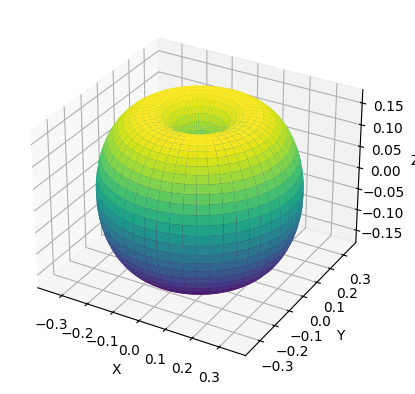

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

def plot_spherical_function(coeffs, resolution=100):
    theta, phi = np.linspace(0, np.pi, resolution), np.linspace(0, 2 * np.pi, resolution)
    theta, phi = np.meshgrid(theta, phi)
    Y_total = np.zeros_like(theta, dtype=np.complex128)

    # Sum up the contributions of individual spherical harmonics
    for l in range(int(np.sqrt(len(coeffs)))):
        for m in range(-l, l + 1):
            Y_lm = sph_harm(m, l, phi, theta)
            Y_total += coeffs[l * (l + 1) + m] * Y_lm

    # Convert spherical coordinates to Cartesian coordinates
    x = np.abs(Y_total) * np.sin(theta) * np.cos(phi)
    y = np.abs(Y_total) * np.sin(theta) * np.sin(phi)
    z = np.abs(Y_total) * np.cos(theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

# Example usage
# Define spherical harmonic coefficients (e.g., for a simple spherical harmonic Y(1, 1))
coeffs = np.array([0, 0, 0, 1j, 0, 0, 0])

plot_spherical_function(coeffs)

In [55]:
max_interp_dist = max([interp_inter_slice_dist, interp_intra_slice_dist, interp_dist_caps])
min_interp_dist = min([interp_inter_slice_dist, interp_intra_slice_dist, interp_dist_caps])
ball_radii = np.linspace(min_interp_dist, max_interp_dist*2, 3)
structure_trimesh = trimesh_reconstruction_ball_pivot(threeDdata_array_fully_interpolated, ball_radii, radius_for_normals_estimation,max_nn_for_normals_estimation)
watertight = structure_trimesh.is_watertight()
print(watertight)
o3d.visualization.draw_geometries([structure_trimesh], mesh_show_back_face=True)
area = compute_surface_area(structure_trimesh)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [ ]:
structure_trimesh = trimesh_reconstruction_poisson(binary_mask_arr)
watertight = structure_trimesh.is_watertight()
print(watertight)
o3d.visualization.draw_geometries([structure_trimesh], mesh_show_back_face=True)


In [ ]:
alpha_param = 1
structure_trimesh = trimesh_reconstruction_alphashape(threeDdata_array_fully_interpolated_with_end_caps, 
                                      radius_for_normals_estimation, 
                                      max_nn_for_normals_estimation, 
                                      alpha_param)
watertight = structure_trimesh.is_watertight()
print(watertight)
o3d.visualization.draw_geometries([structure_trimesh], mesh_show_back_face=True)

In [ ]:
pcd = point_containment_tools.create_point_cloud(threeDdata_array_fully_interpolated_with_end_caps)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=radius_for_normals_estimation, max_nn=max_nn_for_normals_estimation))
pcd.orient_normals_consistent_tangent_plane(100)
plotting_funcs.plot_geometries(pcd)

In [57]:
alpha_param = 1

trimesh_reconstruction_alphashape_simple(threeDdata_array_fully_interpolated_with_end_caps,
                                            alpha_param)

array([0.5       , 0.13572088, 0.03684031, 0.01      ])

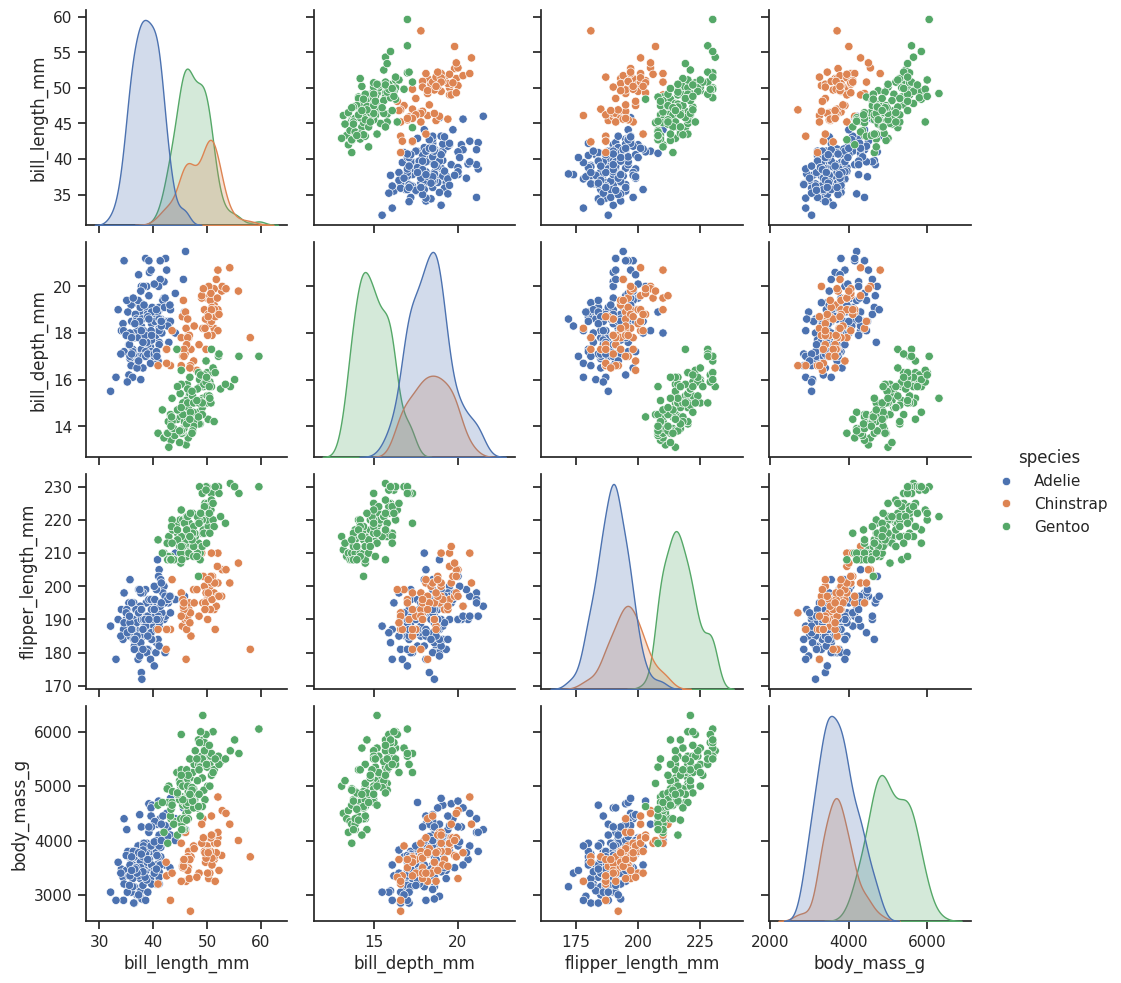

In [1]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")


In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(structure_cohort_3d_radiomic_features_dataframe, hue="Structure type")

In [2]:
import pandas as pd
import numpy as np

def include_vector_columns_in_dataframe(df, vectors):
    """
    Adds 3 new columns to a DataFrame based on an Nx3 array of vectors.
    The mapping is based on the 'Original pt index' column in the DataFrame.
    
    Parameters:
    - df: pandas.DataFrame with a column 'Original pt index'.
    - vectors: Nx3 numpy.array where N is the number of vectors and each vector has 3 elements.
    
    Returns:
    - Modified DataFrame with 3 new columns ('Vector_X', 'Vector_Y', 'Vector_Z') added.
    """
    
    # Check if 'Original pt index' is in the DataFrame
    if 'Original pt index' not in df.columns:
        raise ValueError("DataFrame must contain a column named 'Original pt index'")
    
    # Check if vectors is an Nx3 array
    if vectors.shape[1] != 3:
        raise ValueError("vectors must be an Nx3 array")
    
    # Mapping vectors to new columns based on 'Original pt index'
    df['Vector_X'] = df['Original pt index'].apply(lambda x: vectors[x][0])
    df['Vector_Y'] = df['Original pt index'].apply(lambda x: vectors[x][1])
    df['Vector_Z'] = df['Original pt index'].apply(lambda x: vectors[x][2])
    
    return df

# Example usage
# Create a sample DataFrame
df = pd.DataFrame({'Original pt index': [0, 1, 2], 'Some Other Column': ['A', 'B', 'C']})

# Create a sample Nx3 array of vectors
vectors = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Add 3 new columns to df based on vectors
df_modified = include_vector_columns_in_dataframe(df, vectors)

print(df_modified)

   Original pt index Some Other Column  Vector_X  Vector_Y  Vector_Z
0                  0                 A         1         2         3
1                  1                 B         4         5         6
2                  2                 C         7         8         9


In [4]:
import numpy as np 

vectors = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(vectors[0,1])
print(vectors[0])

2
[1 2 3]


In [7]:
import pandas as pd
import numpy as np

# Predefined function
def binomial_se_estimator(probability_estimator, num_trials, num_successes):
    """
    Calculate the standard error of a binomial estimator.
    
    Parameters:
    - probability_estimator: Estimated probability of success (float).
    - num_trials: Total number of trials (int).
    - num_successes: Number of successes (int).
    
    Returns:
    - Standard error of the binomial estimator (float).
    """
    std_error = np.sqrt(probability_estimator * (1 - probability_estimator) / num_trials)
    return std_error

# Example DataFrame
df = pd.DataFrame({
    'Binomial estimator': [0.5, 0.6, 0.7],
    'Total successes': [50, 60, 70]
})

# Predefined variable for num_trials
num_trials = 100

# Applying the function to each row and creating a new column for the output
df['Binom est STD err'] = df.apply(
    lambda row: binomial_se_estimator(row['Binomial estimator'], num_trials, row['Total successes']), 
    axis=1)

print(df)

   Binomial estimator  Total successes  Binom est STD err
0                 0.5               50           0.050000
1                 0.6               60           0.048990
2                 0.7               70           0.045826


In [27]:
import scipy.stats as stats
print(stats.norm.ppf(1 - (1 - 0.95) / 2))
print(stats.norm.ppf((1 + 0.95) / 2))

1.959963984540054
1.959963984540054


In [16]:
import math_funcs as mf
def binomial_CI_estimator_general(probability_estimator, num_trials, confidence_level = 0.95):
    """
    Calculate the confidence interval for a binomial estimator.
    
    Parameters:
    - probability_estimator: Estimated probability of success (float).
    - num_trials: Total number of trials (int).
    - num_successes: Number of successes (int).
    
    Returns:
    - Tuple containing the lower and upper bounds of the confidence interval (float, float).
    """
    standard_error = np.sqrt(probability_estimator * (1 - probability_estimator) / num_trials)
    z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
    margin_of_error = z_score * standard_error
    
    lower_bound = probability_estimator - margin_of_error
    upper_bound = probability_estimator + margin_of_error
    
    return np.array([lower_bound, upper_bound])


out = binomial_CI_estimator_general(np.array([0,0.3,0.2]), 10, confidence_level = 0.95)
out[0]

#mf.confidence_intervals_95_from_calculated_SE(np.array([0,0.3,0.2]), np.array([0,0.3,0.2]))

array([ 0.        ,  0.01597423, -0.04791801])

In [24]:

import pandas as pd
import numpy as np

# Example DataFrame
df = pd.DataFrame({
    'Relative structure ROI': ['ROI1', 'ROI1', 'ROI2', 'ROI2','ROI3','ROI3'],
    'Relative structure type': ['Type1', 'Type1', 'Type2', 'Type2','Type1', 'Type2'],
    'Relative structure index': [1, 1, 2,2,1, 1],
    'binomial estimator': [0.5, 0.6, 0.7, 0.8,0.3,0.2]
})

# Group by the three columns and calculate mean, standard deviation, and standard error of the mean
grouped_df = df.groupby(['Relative structure ROI', 'Relative structure type', 'Relative structure index'])
agg_df = grouped_df['binomial estimator'].agg(
    Mean='mean',
    Std='std',
    SEM=lambda x: np.std(x, ddof=1) / np.sqrt(len(x))  # Standard Error of the Mean
).reset_index()

# Renaming for clarity
agg_df.rename(columns={'Mean': 'Binomial Estimator Mean',
                       'Std': 'Binomial Estimator Std',
                       'SEM': 'Binomial Estimator SEM'}, inplace=True)

print(agg_df)

  Relative structure ROI Relative structure type  Relative structure index  \
0                   ROI1                   Type1                         1   
1                   ROI2                   Type2                         2   
2                   ROI3                   Type1                         1   
3                   ROI3                   Type2                         1   

   Binomial Estimator Mean  Binomial Estimator Std  Binomial Estimator SEM  
0                     0.55                0.070711                    0.05  
1                     0.75                0.070711                    0.05  
2                     0.30                     NaN                     NaN  
3                     0.20                     NaN                     NaN  


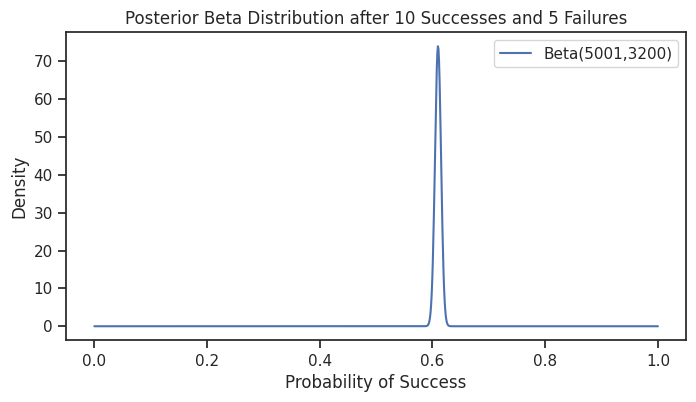

In [42]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

def update_posterior(n_successes, n_failures):
    """
    Update the posterior beta distribution based on the number of successes and failures.
    
    Parameters:
    - n_successes: The number of successes in the trials.
    - n_failures: The number of failures in the trials.
    
    Returns:
    - The updated beta distribution as the posterior.
    """
    # Initial parameters for Beta(2,1) prior
    alpha_prior = 1
    beta_prior = 1200
    
    # Update parameters based on evidence
    alpha_post = alpha_prior + n_successes
    beta_post = beta_prior + n_failures
    
    # Return the updated beta distribution
    return beta(alpha_post, beta_post)

def plot_beta_distribution(dist, title):
    """
    Plot a beta distribution.
    
    Parameters:
    - dist: A scipy.stats beta distribution object.
    - title: Title for the plot.
    """
    x = np.linspace(0, 1, 1000)
    y = dist.pdf(x)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, label=f'Beta({dist.args[0]},{dist.args[1]})')
    plt.title(title)
    plt.xlabel('Probability of Success')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Example: Update posterior after 10 successes and 5 failures
n_successes = 5000
n_failures = 2000

# Get the updated posterior distribution
posterior = update_posterior(n_successes, n_failures)

# Plot the posterior distribution
plot_beta_distribution(posterior, 'Posterior Beta Distribution after 10 Successes and 5 Failures')

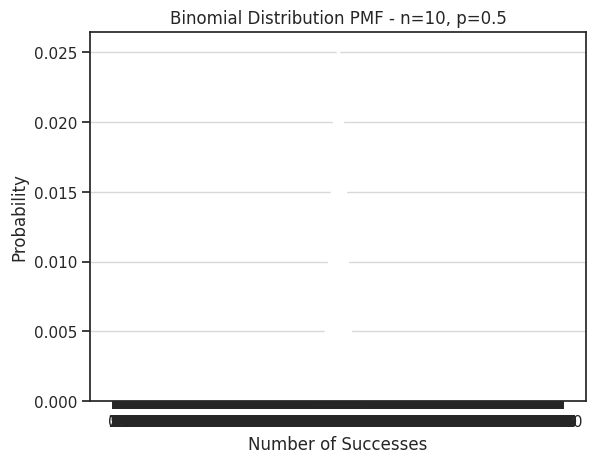

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Define parameters for the binomial distribution
n = 1000  # number of trials
p = 0.5  # probability of success on each trial

# Generate a range of possible number of successes
x = np.arange(0, n+1)

# Calculate the PMF for each number of successes
pmf = binom.pmf(x, n, p)

# Plot the PMF
plt.plot(x, pmf, label=f'Beta({dist.args[0]},{dist.args[1]})')

plt.title('Binomial Distribution PMF - n=10, p=0.5')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
df = cohort_global_tissue_scores_with_target_dil_radiomic_features_df
   

# Assuming `df` is your DataFrame
# df = pd.read_csv("your_dataset.csv") # Load your data

# One-hot encode the 'Simulated Type' column but keep the original for results
df_encoded = pd.get_dummies(df, columns=['Simulated type'], drop_first=False)
original_simulated_type = df['Simulated type'].copy()  # Keep original 'Simulated Type' for appending to results

# Initialize the regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Prepare DataFrame to store results and metrics
results = pd.DataFrame(columns=['Patient ID', 'Bx ID', 'Relative structure ROI', 'Simulated type', 'Actual', 'Predicted'])
metrics_df = pd.DataFrame(columns=['Patient ID', 'MAE', 'MSE', 'RMSE', 'R²'])

# Leave-One-Patient-Out CV
logo = LeavePGroupsOut(n_groups=1)

# Define feature columns
feature_columns = [
    "Volume", "Surface area", "Surface area to volume ratio", "Sphericity", 
    "Compactness 1", "Compactness 2", "Spherical disproportion", "Maximum 3D diameter",
    "PCA major", "PCA minor", "PCA least", "Major axis (equivalent ellipse)", 
    "Minor axis (equivalent ellipse)", "Least axis (equivalent ellipse)", "Elongation", 
    "Flatness", "L/R dimension at centroid", "A/P dimension at centroid", 
    "S/I dimension at centroid"
] + [col for col in df_encoded.columns if col.startswith('Simulated type_')]

# Extract features, target variable, Bx ID, and Relative structure ROI
X = df_encoded[feature_columns]
y = df_encoded['Global mean binom est']
bx_ids = df_encoded['Bx ID']
relative_rois = df_encoded['Relative structure ROI']
groups = df_encoded['Patient ID']

for train_index, test_index in logo.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    bx_id_test = bx_ids.iloc[test_index]
    relative_roi_test = relative_rois.iloc[test_index]
    simulated_type_test = original_simulated_type.iloc[test_index]  # Get the original 'Simulated Type' for test set
    
    # Train the model
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_regressor.predict(X_test)
    
    # Append actual vs predicted values to the results DataFrame
    for bx_id, relative_roi, simulated_type, actual, predicted in zip(bx_id_test, relative_roi_test, simulated_type_test, y_test, y_pred):
        results = results.append({
            'Patient ID': groups.iloc[test_index].iloc[0],
            'Bx ID': bx_id,
            'Relative structure ROI': relative_roi,
            'Simulated type': simulated_type,
            'Actual': actual,
            'Predicted': predicted
        }, ignore_index=True)
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append metrics to the metrics DataFrame
    metrics_df = metrics_df.append({
        'Patient ID': groups.iloc[test_index].iloc[0],
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }, ignore_index=True)

# Display the first few rows of the results and metrics DataFrames
print(results.head())
print(metrics_df.head())

In [ ]:
 # Assuming 'df' is your DataFrame
features = [
    "Volume",
    "Surface area",
    "Surface area to volume ratio",
    "Sphericity",
    "Compactness 1",
    "Compactness 2",
    "Spherical disproportion",
    "Maximum 3D diameter",
    "PCA major",
    "PCA minor",
    "PCA least",
    "Major axis (equivalent ellipse)",
    "Minor axis (equivalent ellipse)",
    "Least axis (equivalent ellipse)",
    "Elongation",
    "Flatness",
    "L/R dimension at centroid",
    "A/P dimension at centroid",
    "S/I dimension at centroid"
]

for feature in features:
    sns.lmplot(x=feature, y="Global mean binom est", hue="Simulated type", data=cohort_global_tissue_scores_with_target_dil_radiomic_features_df, 
            aspect=1.5, ci=None, palette="Set1")
    plt.title(f'Global mean binom est vs. {feature} by Simulated type')
    plt.xlabel(feature)
    plt.ylabel("Global mean binom est")
    plt.show()

In [2]:
import pandas as pd

# Example DataFrames
data1 = {
    'Patient ID': [1, 2, 3],
    'Bx ID': ['A', 'B', 'C'],
    'Bx index': [10, 20, 30],
    'Value1': [100, 200, 300]  # Overlapping column
}
df1 = pd.DataFrame(data1)

data2 = {
    'Patient ID': 2,
    'Bx ID': ['B', 'C', 'D'],
    'Bx index': [20, 30, 40],
    'Value1': [150, 250, 350]  # Overlapping column
}
df2 = pd.DataFrame(data2)

# Merge df1 and df2 on 'Patient ID', 'Bx ID', 'Bx index' with suffixes for overlapping columns
merged_df = pd.merge(df1, df2, on=['Patient ID', 'Bx ID', 'Bx index'], suffixes=('_df1', '_df2'))

# Now merged_df contains the merged data with suffixes on overlapping column names
print(merged_df)

   Patient ID Bx ID  Bx index  Value1_df1  Value1_df2
0           2     B        20         200         150


In [ ]:
df = cohort_global_tissue_scores_with_target_dil_radiomic_features_df
   

# Assuming `df` is your DataFrame
# df = pd.read_csv("your_dataset.csv") # Load your data

# One-hot encode the 'Simulated Type' column
df_encoded = pandas.get_dummies(df, columns=[
'Simulated type', 
'DIL prostate sextant (LR)', 
'DIL prostate sextant (AP)', 
'DIL prostate sextant (SI)'], drop_first=False)

# Initialize the regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Prepare DataFrame to store results and metrics
results = pd.DataFrame(columns=['Patient ID', 'Bx ID', 'Relative structure ROI', 'Actual', 'Predicted'])
metrics_df = pd.DataFrame(columns=['Patient ID', 'MAE', 'MSE', 'RMSE', 'R²'])

# Leave-One-Patient-Out CV
logo = LeavePGroupsOut(n_groups=1)

# Define feature columns (now including the one-hot encoded 'Simulated Type' columns)
feature_columns = [
"Volume", "Surface area", "Surface area to volume ratio", "Sphericity", 
"Compactness 1", "Compactness 2", "Spherical disproportion", "Maximum 3D diameter",
"PCA major", "PCA minor", "PCA least", "Major axis (equivalent ellipse)", 
"Minor axis (equivalent ellipse)", "Least axis (equivalent ellipse)", "Elongation", 
"Flatness", "L/R dimension at centroid", "A/P dimension at centroid", 
"S/I dimension at centroid",
"DIL centroid (X, prostate frame)", "DIL centroid (Y, prostate frame)",
"DIL centroid (Z, prostate frame)", "DIL centroid distance (prostate frame)"
] + [
    col for col in df_encoded.columns 
    if col.startswith('Simulated type_') 
    or col.startswith('DIL prostate sextant (LR)_')
    or col.startswith('DIL prostate sextant (AP)_')
    or col.startswith('DIL prostate sextant (SI)_')
]

# Extract features, target variable, Bx ID, and Relative structure ROI
X = df_encoded[feature_columns]
y = df_encoded['Global mean binom est']
bx_ids = df_encoded['Bx ID']
relative_rois = df_encoded['Relative structure ROI']
groups = df_encoded['Patient ID']

for train_index, test_index in logo.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    bx_id_test = bx_ids.iloc[test_index]
    relative_roi_test = relative_rois.iloc[test_index]
    
    # Train the model
    rf_regressor.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_regressor.predict(X_test)
    
    # Append actual vs predicted values to the results DataFrame
    for bx_id, relative_roi, actual, predicted in zip(bx_id_test, relative_roi_test, y_test, y_pred):
        results = results.append({
            'Patient ID': groups.iloc[test_index].iloc[0],
            'Bx ID': bx_id,
            'Relative structure ROI': relative_roi,
            'Actual': actual,
            'Predicted': predicted
        }, ignore_index=True)
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Append metrics to the metrics DataFrame
    metrics_df = metrics_df.append({
        'Patient ID': groups.iloc[test_index].iloc[0],
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }, ignore_index=True)

In [3]:
import pandas as pd
import numpy as np

def array_to_dataframe(arr):
    # Preparing lists to hold data
    original_pt_index = []
    dose_gy = []
    mc_trial_num = []
    
    # Iterate over the array to fill the lists
    for i in range(arr.shape[0]):  # For each row
        for j in range(arr.shape[1]):  # For each column
            original_pt_index.append(i)
            dose_gy.append(arr[i, j])
            mc_trial_num.append(j)
    
    # Create DataFrame
    df = pd.DataFrame({
        "Original pt index": original_pt_index,
        "Dose (Gy)": dose_gy,
        "MC trial num": mc_trial_num
    })
    
    return df

# Example usage
N, D = 4, 3  # Example array dimensions
arr = np.random.rand(N, D)  # Generating a random NxD array

df = array_to_dataframe(arr)
print(arr)
print(df)

[[0.480406   0.70092897 0.2208147 ]
 [0.14602628 0.39439337 0.15966043]
 [0.12626905 0.84769026 0.17510899]
 [0.62603302 0.6691834  0.22869684]]
    Original pt index  Dose (Gy)  MC trial num
0                   0   0.480406             0
1                   0   0.700929             1
2                   0   0.220815             2
3                   1   0.146026             0
4                   1   0.394393             1
5                   1   0.159660             2
6                   2   0.126269             0
7                   2   0.847690             1
8                   2   0.175109             2
9                   3   0.626033             0
10                  3   0.669183             1
11                  3   0.228697             2


In [4]:
import pandas as pd

# Sample DataFrame
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Age': [28, 34, 29, 32]}
df = pd.DataFrame(data)

# New column data
new_column_values = 0

# Insert the new column at the beginning
df.insert(loc=0, column='City', value=new_column_values)

print(df)

   City   Name  Age
0     0   John   28
1     0   Anna   34
2     0  Peter   29
3     0  Linda   32


In [5]:
import pandas as pd

def add_voxel_columns(df, biopsy_z_voxel_length):
    # Assuming 'Z (Bx frame)' column exists in the DataFrame and biopsy_z_voxel_length is a positive float
    df['voxel index'] = (df['Z (Bx frame)'] // biopsy_z_voxel_length) + 1
    df['voxel begin (Z)'] = (df['voxel index'] - 1) * biopsy_z_voxel_length
    df['Voxel end (Z)'] = df['voxel begin (Z)'] + biopsy_z_voxel_length

    # Adjust the last voxel's end if it exceeds the maximum 'Z (Bx frame)' value
    max_z = df['Z (Bx frame)'].max()
    df.loc[df['Voxel end (Z)'] > max_z, 'Voxel end (Z)'] = max_z

    return df

# Example usage:
data = {
    'Patient ID': [1, 2],
    'Bx ID': ['A', 'B'],
    'Bx index': [10, 20],
    'Original pt index': [100, 200],
    'R (Bx frame)': [0.1, 0.2],
    'Z (Bx frame)': [5, 15],
    'Dose (Gy)': [1.5, 2.0],
    'MC trial num': [1, 2]
}

df = pd.DataFrame(data)
biopsy_z_voxel_length = 10.0  # Example voxel length

# Add the new columns
new_df = add_voxel_columns(df, biopsy_z_voxel_length)
print(new_df)

   Patient ID Bx ID  Bx index  Original pt index  R (Bx frame)  Z (Bx frame)  \
0           1     A        10                100           0.1             5   
1           2     B        20                200           0.2            15   

   Dose (Gy)  MC trial num  voxel index  voxel begin (Z)  Voxel end (Z)  
0        1.5             1          1.0              0.0           10.0  
1        2.0             2          2.0             10.0           15.0  


In [ ]:
# Setting up the aesthetics for seaborn
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Group by Patient ID and Bx index
grouped = df.groupby(['Patient ID', 'Bx index'])

for (patient_id, bx_index), group in grouped:
    # Further group by Voxel index to plot each as a separate ridge
    g = group.groupby('Voxel index')
    
    # Palette to distinguish different Voxel indices
    palette = sns.color_palette("hsv", len(g))
    
    # Initialize the FacetGrid object
    g = sns.FacetGrid(group, row='Voxel index', hue='Voxel index', aspect=15, height=0.75, palette=palette)
    
    # Draw the densities in a few steps
    g.map(sns.kdeplot, 'Dose (Gy)', clip_on=False, shade=True, alpha=1, lw=1.5, bw=0.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)
    
    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        voxel_row = group[group['Voxel index'] == label].iloc[0]
        begin_z = voxel_row['Voxel begin (Z)']
        end_z = voxel_row['Voxel end (Z)']
        dose_values = voxel_row['Dose (Gy)']
        kde = gaussian_kde(group[group['Voxel index'] == label]['Dose (Gy)'])
        max_dose = group[group['Voxel index'] == label]['Dose (Gy)'][np.argmax(kde(group[group['Voxel index'] == label]['Dose (Gy)']))]
        
        ax = plt.gca()
        ax.text(0, .2, f"Voxel {int(label)}: Begin(Z)={begin_z}, End(Z)={end_z}, Max Dose={max_dose:.2f}",
                fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)
        
    g.map(label, 'Dose (Gy)')
    
    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.25)
    
    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    
    g.fig.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_index}, Simulated Type: {group["Simulated type"].iloc[0]}', fontsize=16, fontweight='bold')
    g.fig.tight_layout(rect=[0, 0, 1, 0.97])
    
    plt.show()

In [ ]:
# Group the DataFrame by 'Patient ID' and 'Bx index'
patient_bx_groups = df.groupby(['Patient ID', 'Bx index'])

for (patient_id, bx_index), group in patient_bx_groups:
    # Sort the group by 'Voxel index' to ensure correct plotting order
    group = group.sort_values(by='Voxel index')

    # Initialize the FacetGrid object
    voxel_indices = group['Voxel index'].unique()
    pal = sns.cubehelix_palette(len(voxel_indices), rot=-.25, light=.7)
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=.5, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        voxel_data = group[group['Voxel index'] == label].iloc[0]
        begin_z, end_z = voxel_data['Voxel begin (Z)'], voxel_data['Voxel end (Z)']
        kde = gaussian_kde(group[group['Voxel index'] == label]['Dose (Gy)'])
        max_dose_index = np.argmax(kde(group[group['Voxel index'] == label]['Dose (Gy)'].values))
        max_dose_value = group[group['Voxel index'] == label]['Dose (Gy)'].values[max_dose_index]
        ax.text(0, .2, f"Voxel {int(label)}: Begin(Z)={begin_z}, End(Z)={end_z}, Max Dose={max_dose_value:.2f}", 
                fontweight="bold", color=color, ha="left", va="center", transform=ax.transAxes)

    g.map(label, "Dose (Gy)")

    # Set the subplots to overlap and adjust other aspects for better visual presentation
    g.figure.subplots_adjust(hspace=-.25)
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    # Add a main title
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_index}, Simulated Type: {group["Simulated type"].iloc[0]}', fontsize=16, fontweight='bold')
    plt.subplots_adjust(top=0.95)
    
    plt.show()

In [ ]:
# Group the DataFrame by 'Patient ID' and 'Bx index'
patient_bx_groups = df.groupby(['Patient ID', 'Bx index'])

for (patient_id, bx_index), group in patient_bx_groups:
    # Sort the group by 'Voxel index' to ensure correct plotting order
    group = group.sort_values(by='Voxel index')

    # Initialize the FacetGrid object
    voxel_indices = group['Voxel index'].unique()
    pal = sns.cubehelix_palette(len(voxel_indices), rot=-.25, light=.7)
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=0.5, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Adjusting labels and annotations
    def label(x, color, label):
        ax = plt.gca()
        voxel_data = group[group['Voxel index'] == label].iloc[0]
        begin_z, end_z = voxel_data['Voxel begin (Z)'], voxel_data['Voxel end (Z)']
        kde = gaussian_kde(group[group['Voxel index'] == label]['Dose (Gy)'])
        max_dose_index = np.argmax(kde(group[group['Voxel index'] == label]['Dose (Gy)'].values))
        max_dose_value = group[group['Voxel index'] == label]['Dose (Gy)'].values[max_dose_index]
        ax.text(1, .2, f"Voxel {int(label)}: Begin(Z)={begin_z}, End(Z)={end_z}, Max Dose={max_dose_value:.2f}", 
                fontweight="bold", color=color, ha="right", va="center", transform=ax.transAxes)

    g.map(label, "Dose (Gy)")

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-0.5)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.set(xticks=[])
    g.despine(bottom=True, left=True)

    # Add a main title
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_index}, Simulated Type: {group["Simulated type"].iloc[0]}', fontsize=16, fontweight='bold', va='bottom')
    plt.subplots_adjust(top=0.92)
    
    plt.show()

In [ ]:
patient_bx_groups = df.groupby(['Patient ID', 'Bx index'])

for (patient_id, bx_index), group in patient_bx_groups:
    group = group.sort_values(by='Voxel index')
    voxel_indices = group['Voxel index'].unique()
    pal = sns.cubehelix_palette(len(voxel_indices), rot=-.25, light=.7)
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=0.5, palette=pal)

    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        voxel_data = group[group['Voxel index'] == label]
        begin_z, end_z = voxel_data['Voxel begin (Z)'].iloc[0], voxel_data['Voxel end (Z)'].iloc[0]
        doses = voxel_data['Dose (Gy)']
        if not doses.empty:
            kde = gaussian_kde(doses)
            x_grid = np.linspace(doses.min(), doses.max(), 100)
            max_dose_value = x_grid[np.argmax(kde(x_grid))]
            ax.text(1, .2, f"Voxel {int(label)}: Begin(Z)={begin_z}, End(Z)={end_z}, Max Dose={max_dose_value:.2f}", 
                    fontweight="bold", color=color, ha="right", va="center", transform=ax.transAxes)

    g.map(label, "Dose (Gy)")

    g.figure.subplots_adjust(hspace=-0.5)
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.set(xticks=[])
    g.despine(bottom=True, left=True)

    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_index}, Simulated Type: {group["Simulated type"].iloc[0]}', fontsize=16, fontweight='bold', va='bottom')
    plt.subplots_adjust(top=0.92)
    
    plt.show()

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    
# Iterate through each combination of Patient ID and Bx index
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    print(f"Generating plot for Patient ID: {patient_id}, Bx ID: {bx_index}")
    
    # Prepare the data for the current group
    voxel_indices = group['Voxel index'].unique()
    pal = sns.color_palette("cubehelix", len(voxel_indices))  # Color palette for the ridges
    
    # Initialize the FacetGrid object
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=0.5, palette=pal)
    
    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
    
    # Function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(1, 0, f'Voxel {label}', color=color, ha="right", va="bottom", transform=ax.transAxes)
    
    g.map(label, "Dose (Gy)")
    
    # Set the subplots to overlap and adjust other aspects for better visual presentation
    g.figure.subplots_adjust(hspace=-0.25)
    
    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    
    # Add a main title
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_index}', fontsize=16, fontweight='bold')
    
    plt.show()

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
iteration = 0    
# Iterate through each combination of Patient ID and Bx index
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if iteration ==3:
        break
    print(f"Generating plot for Patient ID: {patient_id}, Bx ID: {bx_index}")
    
    # Adjust the height of each ridge plot here if necessary
    ridge_height = 1  # Adjust this value based on your dataset size and desired visualization
    
    # Determine the number of unique voxel indices to calculate the figure height dynamically
    num_voxels = len(group['Voxel index'].unique())
    figure_height = num_voxels * ridge_height
    
    # Prepare the color palette
    pal = sns.color_palette("cubehelix", num_voxels)
    
    # Initialize the FacetGrid object
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)
    
    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
    
    # Adjust labeling
    def label(x, color, label):
        ax = plt.gca()
        ax.text(1, 0, f'Voxel {label}', color=color, ha="right", va="bottom", transform=ax.transAxes)
    
    g.map(label, "Dose (Gy)")
    
    # Adjust subplot parameters
    g.figure.subplots_adjust(hspace=-0.25)
    
    # Remove axes decorations
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    
    # Adjust the figure size based on the number of voxel indices
    g.fig.set_size_inches(10, figure_height)
    
    # Add a main title
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_index}', fontsize=16, fontweight='bold', y=1.05)
    
    plt.show()
    iteration = iteration + 1

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
iteration = 0
# Iterate through each combination of Patient ID and Bx index
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if iteration ==2:
        break
    # Prepare the data for the current group
    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)  # Using "husl" palette for better color distinction
    
    # Adjust the height of each ridge plot here if necessary
    ridge_height = 1  # Adjust this value based on your dataset size and desired visualization
    figure_height = num_voxels * ridge_height + 2  # Added space for the title
    
    # Initialize the FacetGrid object
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)
    
    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
    
    # Adjust labeling for voxel index
    def label(x, color, label):
        ax = plt.gca()
        ax.text(1, 0, f'Voxel {label}', color=color, ha="right", va="bottom", transform=ax.transAxes)
    
    g.map(label, "Dose (Gy)")
    
    # Adjust subplot parameters and remove axes decorations
    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[], xticks=[])
    g.despine(bottom=True, left=True)
    
    # Adjust the figure size based on the number of voxel indices
    #g.fig.set_size_inches(10, figure_height)
    
    # Add a main title with Patient ID and Bx ID
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_index}', fontsize=16, fontweight='bold', y=0.95)
    
    plt.show()
    iteration = iteration + 1

In [6]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
iteration = 2
# Iterate through each combination of Patient ID and Bx index
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if iteration == 2:
        break
    # Retrieve the corresponding Bx ID for the current Bx index
    bx_id = group['Bx ID'].iloc[0]  # Assuming the Bx ID is consistent within each group

    # Prepare the color palette
    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)  # More vibrant and distinguishable colors

    # Adjust the height of each ridge plot
    ridge_height = 1  # Adjust this value based on your dataset size and desired visualization
    figure_height = num_voxels * ridge_height + 1  # Adjust space for the title

    # Initialize the FacetGrid object
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Adjust labeling for voxel index
    def label(x, color, label):
        ax = plt.gca()
        ax.text(1, 0, f'Voxel {label}', color=color, ha="right", va="bottom", transform=ax.transAxes)

    g.map(label, "Dose (Gy)")

    # Adjust subplot parameters and remove axes decorations
    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[], xticks=[])
    g.despine(bottom=True, left=True)

    # Adjust the figure size based on the number of voxel indices
    g.fig.set_size_inches(10, figure_height)

    # Add a main title with Patient ID and Bx ID
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.95)

    plt.show()
    iiteration = iteration + 1

IndentationError: expected an indented block (576567906.py, line 7)

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
iteration = 0
# Iterate through each combination of Patient ID and Bx index
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if iteration == 3:
        break
    # Retrieve the corresponding Bx ID for the current Bx index
    bx_id = group['Bx ID'].iloc[0]  # Assuming the Bx ID is consistent within each group

    # Prepare the color palette
    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)  # More vibrant and distinguishable colors

    # Adjust the height of each ridge plot
    ridge_height = 1  # Adjust this value based on your dataset size and desired visualization
    figure_height = num_voxels * ridge_height + 1  # Adjust space for the title

    # Initialize the FacetGrid object
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Adjust labeling for voxel index
    def label(x, color, label):
        ax = plt.gca()
        ax.text(1, 0, f'Voxel {label}', color=color, ha="right", va="bottom", transform=ax.transAxes)

    g.map(label, "Dose (Gy)")

    # Adjust subplot parameters and remove axes decorations
    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[], xticks=[])
    g.despine(bottom=True, left=True)

    # Adjust the figure size based on the number of voxel indices
    g.fig.set_size_inches(10, figure_height)

    # Add a main title with Patient ID and Bx ID
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.95)

    plt.show()
    iteration = iteration + 1

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
iteration = 0
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if iteration == 2:
        break
    bx_id = group['Bx ID'].iloc[0]  # Assume first Bx ID matches the group
    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)  # Vibrant, distinguishable colors

    ridge_height = 1  # Adjust based on dataset size and visualization preferences
    figure_height = num_voxels * ridge_height + 2  # Height adjustment for title space

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def annotate_max_density(x, color, label, **kwargs):
        current_group = group[group['Voxel index'] == label]
        if not current_group.empty:
            voxel_begin = current_group['Voxel begin (Z)'].values[0]
            voxel_end = current_group['Voxel end (Z)'].values[0]
            kde = gaussian_kde(x)
            x_values = np.linspace(x.min(), x.max(), 1000)
            max_density_dose = x_values[np.argmax(kde(x_values))]

            plt.gca().text(1, 0.2, f'({voxel_begin}, {voxel_end}) Max Dose: {max_density_dose:.2f}',
                            ha="right", va="center", transform=plt.gca().transAxes, color=color)

    g.map_dataframe(annotate_max_density, "Dose (Gy)")

    g.figure.subplots_adjust(hspace=-0.5)
    g.set_titles("")
    g.set(yticks=[], xticks=[])
    g.despine(bottom=True, left=True)

    g.fig.set_size_inches(10, figure_height)
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.95)

    plt.show()
    iteration = iteration +1

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
iteration = 0
# Iterate through each combination of Patient ID and Bx index
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if iteration == 2:
        break
    # Retrieve the corresponding Bx ID for the current Bx index
    bx_id = group['Bx ID'].iloc[0]

    # Prepare the color palette
    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    # Adjust the height of each ridge plot
    ridge_height = 1
    figure_height = num_voxels * ridge_height + 2  # Added extra space for title

    # Initialize the FacetGrid object
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Function to annotate mean and standard deviation
    def annotate_stats(x, color, label):
        mean = np.mean(x)
        std = np.std(x)
        ax = plt.gca()
        ax.text(0.97, 0.6, f'Mean: {mean:.2f}\nSD: {std:.2f}', horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Dose (Gy)")

    # Adjust subplot parameters and remove axes decorations
    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[], xticks=[])
    g.despine(bottom=True, left=True)

    # Adjust the figure size based on the number of voxel indices
    g.fig.set_size_inches(10, figure_height)

    # Add a main title with Patient ID and Bx ID
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.95)

    plt.show()

    iteration = iteration + 1

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
it = 0
# Iterate through each combination of Patient ID and Bx index
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if it == 2:
        break
    bx_id = group['Bx ID'].iloc[0]  # Assuming the Bx ID is consistent within each group

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)  # Vibrant, distinguishable colors

    ridge_height = 1  # Adjust based on your dataset size and desired visualization
    figure_height = num_voxels * ridge_height + 1  # Adjust space for the title

    # Initialize the FacetGrid object
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)

    # Draw the densities
    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    # Function to annotate mean, standard deviation, and voxel Z range
    def annotate_stats(x, color, label):
        mean = np.mean(x)
        std = np.std(x)
        # Fetch the corresponding voxel Z range for the current 'Voxel index'
        print(group)
        print(type(label))
        print(label)
        voxel_begin = group[group['Voxel index'] == float(label)]['Voxel begin (Z)'][0]
        voxel_end = group[group['Voxel index'] == float(label)]['Voxel end (Z)'][0]
        ax = plt.gca()
        # Adjust the text to include the voxel Z range, mean, and SD
        annotation_text = f'({voxel_begin}, {voxel_end})\nMean: {mean:.2f}, SD: {std:.2f}'
        ax.text(0.97, 0.6, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Dose (Gy)")

    # Adjust subplot parameters and remove axes decorations
    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

    # Adjust the figure size based on the number of voxel indices
    g.fig.set_size_inches(10, figure_height)

    # Add a main title with Patient ID and Bx ID
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.95)

    plt.show()
    it = it + 1

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
it = 0 
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if it == 2:
        break
    bx_id = group['Bx ID'].iloc[0]

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    ridge_height = 1
    figure_height = num_voxels * ridge_height + 1

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)

    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def annotate_stats(x, color, label, **kwargs):
        # Convert label to float to match the DataFrame's type
        label_float = float(label)
        voxel_row = group[group['Voxel index'] == label_float].iloc[0]
        voxel_begin = voxel_row['Voxel begin (Z)']
        voxel_end = voxel_row['Voxel end (Z)']
        mean = np.mean(x)
        std = np.std(x)
        ax = plt.gca()
        annotation_text = f'({voxel_begin}, {voxel_end})\nMean: {mean:.2f}, SD: {std:.2f}'
        ax.text(0.97, 0.2, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Dose (Gy)")

    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[],)
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Dose (Gy)", "")

    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    g.fig.set_size_inches(10, figure_height)

    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.95)

    plt.show()
    it = it + 1

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
it = 0 
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if it == 2:
        break
    bx_id = group['Bx ID'].iloc[0]

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    ridge_height = 1
    figure_height = num_voxels * ridge_height + 1

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)

    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def annotate_stats(x, color, label, **kwargs):
        mean = np.mean(x)
        std = np.std(x)
        kde = gaussian_kde(x)
        x_grid = np.linspace(x.min(), x.max(), 1000)
        max_density_dose = x_grid[np.argmax(kde(x_grid))]
        voxel_row = group[group['Voxel index'] == float(label)].iloc[0]
        voxel_begin = voxel_row['Voxel begin (Z)']
        voxel_end = voxel_row['Voxel end (Z)']
        ax = plt.gca()
        annotation_text = f'({voxel_begin}, {voxel_end})\nMean: {mean:.2f}, SD: {std:.2f}\nMax Density Dose: {max_density_dose:.2f}'
        ax.text(0.97, 0.2, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Dose (Gy)")

    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[],)
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Dose (Gy)", "")

    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    g.fig.set_size_inches(10, figure_height)

    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.95)

    plt.show()
    it = it + 1

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
it = 0 
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    if it == 2:
        break
    bx_id = group['Bx ID'].iloc[0]

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    ridge_height = 1
    figure_height = num_voxels * ridge_height + 1

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=pal)

    g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def annotate_stats(x, color, label, **kwargs):
        label_float = float(label)
        voxel_row = group[(group['Voxel index'] == label_float) & (group['MC trial num'] == 0)].iloc[0]
        nominal_dose = voxel_row['Dose (Gy)'] if not voxel_row.empty else 'N/A'

        mean = np.mean(x)
        std = np.std(x)
        kde = gaussian_kde(x)
        x_grid = np.linspace(x.min(), x.max(), 1000)
        max_density_dose = x_grid[np.argmax(kde(x_grid))]
        voxel_begin = voxel_row['Voxel begin (Z)']
        voxel_end = voxel_row['Voxel end (Z)']
        ax = plt.gca()
        annotation_text = f'Voxel position ({voxel_begin}, {voxel_end})\nMean: {mean:.2f}, SD: {std:.2f}, argmax(Density): {max_density_dose:.2f}, Nominal: {nominal_dose:.2f}'
        ax.text(0.95, 0.5, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Dose (Gy)")

    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[],)
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Dose (Gy)", "")

    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    g.fig.set_size_inches(10, figure_height)

    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.98)

    plt.show()
    it = it + 1

In [9]:
import pandas as pd

# Example DataFrames
df_left = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value_left': [1, 2, 3, 4]
})

df_right = pd.DataFrame({
    'key': ['B', 'C', 'D', 'E'],
    'value_right': [5, 6, 7, 8],
    'value_left': [5,5, 5, 5]
})

# Merging with a left join, keeping only the left DataFrame's columns for matching columns
merged_df = pd.merge(df_left, df_right, on='key', how='left')

print(merged_df)

  key  value_left_x  value_right  value_left_y
0   A             1          NaN           NaN
1   B             2          5.0           5.0
2   C             3          6.0           5.0
3   D             4          7.0           5.0


/tmp/ipykernel_102981/3824520375.py:24: UserWarning: 

The `vertical` parameter is deprecated; assigning data to `y`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y=y, ax=ax_y, vertical=True)


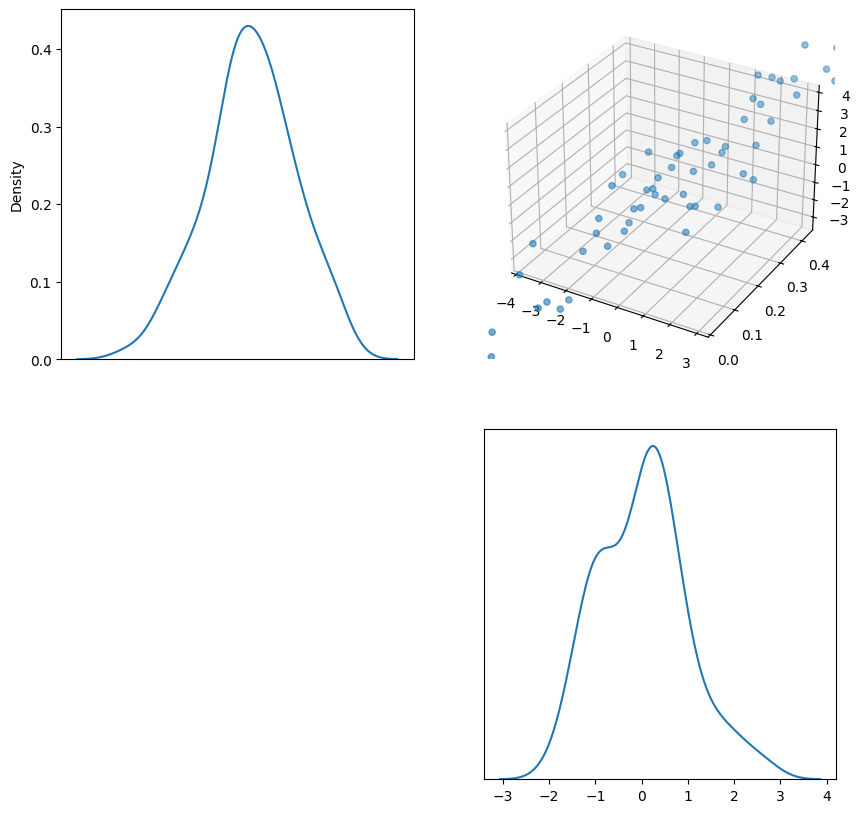

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# Example data
np.random.seed(42)
x = np.random.normal(size=100)
y = np.random.normal(size=100)
z = np.random.normal(size=100)

# Create a figure with subplots
fig = plt.figure(figsize=(10, 10))

# Main 3D scatter plot
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(x, y, z)

# Marginal distributions
ax_x = fig.add_subplot(2, 2, 1, sharex=ax)
ax_y = fig.add_subplot(2, 2, 4, sharey=ax)

sns.kdeplot(x=x, ax=ax_x)
sns.kdeplot(y=y, ax=ax_y, vertical=True)

ax_x.get_xaxis().set_visible(False)
ax_y.get_yaxis().set_visible(False)

plt.show()

In [11]:
import plotly.graph_objects as go
import numpy as np

# Example data
np.random.seed(42)
x = np.random.normal(size=100)
y = np.random.normal(size=100)
z = np.random.normal(size=100)

# Create the 3D scatter plot
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers'))

# You can add marginal plots by creating additional axes and plots manually
# This is a simplified example focusing on the 3D aspect

fig.show()

In [ ]:
cols_to_plot = [
        'Bx (X, DIL centroid frame)',
        'Bx (Y, DIL centroid frame)',
        'Bx (Z, DIL centroid frame)',
        'BX to DIL centroid distance'
    ]
df_subset = df[cols_to_plot]

# Pairplot with Seaborn
g = sns.pairplot(df_subset, diag_kind='kde', 
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

# Annotate each point with 'BX to DIL centroid distance'
for i, j in zip(*np.tril_indices_from(g.axes, -1)):
    ax = g.axes[i, j]
    for k in range(len(df_subset)):
        ax.text(df_subset.iloc[k, j], df_subset.iloc[k, i],
                f"{df_subset.iloc[k, 3]:.2f}", # Annotating with 'BX to DIL centroid distance'
                ha='center', va='center', fontdict={'size': 6})

plt.show()

In [ ]:
# Filter out rows where 'Simulated bool' is not False
df_filtered = df[df['Simulated bool'] == False]

# Subset the DataFrame to keep only the relevant columns
cols_to_plot = [
    'Bx (X, DIL centroid frame)',
    'Bx (Y, DIL centroid frame)',
    'Bx (Z, DIL centroid frame)',
    'BX to DIL centroid distance'
]
df_subset = df_filtered[cols_to_plot]

# Pairplot with Seaborn
g = sns.pairplot(df_subset, diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

# Annotate each point with 'BX to DIL centroid distance', slightly off-center
offset = 0.02  # Adjust offset value as needed to move annotation off-center
for i, j in zip(*np.tril_indices_from(g.axes, -1)):
    ax = g.axes[i, j]
    for k in range(len(df_subset)):
        # Adjust x, y position by adding an offset to make the annotation off-center
        x_position = df_subset.iloc[k, j] + (ax.get_xlim()[1] - ax.get_xlim()[0]) * offset
        y_position = df_subset.iloc[k, i] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * offset
        ax.text(x_position, y_position,
                f"{df_subset.iloc[k, 3]:.2f}",  # Annotating with 'BX to DIL centroid distance'
                ha='center', va='center', fontdict={'size': 6})

plt.show()

In [ ]:
df_filtered = df[df['Simulated bool'] == False]
    
# Calculate mean and standard deviation of 'BX to DIL centroid distance'
mean_distance = df_filtered['BX to DIL centroid distance'].mean()
std_distance = df_filtered['BX to DIL centroid distance'].std()

# Subset the DataFrame to keep only the relevant columns for plotting
cols_to_plot = [
    'Bx (X, DIL centroid frame)',
    'Bx (Y, DIL centroid frame)',
    'Bx (Z, DIL centroid frame)',
]
df_subset = df_filtered[cols_to_plot]

# Pairplot with Seaborn without 'BX to DIL centroid distance'
g = sns.pairplot(df_subset, diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

# Add text for mean and standard deviation in the top right of the plot
plt.gcf().text(0.9, 0.9, f'Mean: {mean_distance:.2f}\nStd Dev: {std_distance:.2f}', fontsize=12, verticalalignment='top', horizontalalignment='right')

plt.show()

In [ ]:
# Filter out rows where 'Simulated bool' is not False
df_filtered = df[df['Simulated bool'] == False]

# Subset the DataFrame to keep only the relevant columns for plotting
cols_to_plot = [
    'Bx (X, DIL centroid frame)',
    'Bx (Y, DIL centroid frame)',
    'Bx (Z, DIL centroid frame)',
]
df_subset = df_filtered[cols_to_plot]

# Pairplot with Seaborn without 'BX to DIL centroid distance'
g = sns.pairplot(df_subset, diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

# Adjusting scatter plots to center at (0, 0)
for i in range(len(cols_to_plot)):
    for j in range(len(cols_to_plot)):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
        else:  # For the diagonal (distribution plots)
            mean_val = df_subset[cols_to_plot[i]].mean()
            std_val = df_subset[cols_to_plot[i]].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

In [ ]:
# Filter out rows where 'Simulated bool' is not False
df_filtered = df[df['Simulated bool'] == False]

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i in range(len(cols_to_plot)):
    for j in range(len(cols_to_plot)):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[cols_to_plot[i]].mean()
            std_val = df_renamed[cols_to_plot[i]].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Update plot labels with the new variable names
for i in range(len(cols_to_plot)):
    for j in range(len(cols_to_plot)):
        # Set x-axis label
        g.axes[len(cols_to_plot)-1][j].set_xlabel(cols_to_plot[j], fontsize=12)
        # Set y-axis label
        g.axes[i][0].set_ylabel(cols_to_plot[i], fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
df = df_test
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Ensure the output directory exists
##output_directory = Path(output_directory_path)
##output_directory.mkdir(parents=True, exist_ok=True)

dpi = 100
figure_width_in = 1920 / dpi
figure_height_in = 1080 / dpi

for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    bx_structure_roi = group['Bx structure ROI'].iloc[0]

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=figure_height_in / num_voxels, palette=pal)

    # Use 'Mean probability (binom est)' for the plot
    g.map(sns.kdeplot, "Mean probability (binom est)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Mean probability (binom est)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def annotate_stats(x, color, label, **kwargs):
        label_float = float(label)
        voxel_row = group[group['Voxel index'] == label_float].iloc[0]
        voxel_begin = voxel_row['Voxel begin (Z)']
        voxel_end = voxel_row['Voxel end (Z)']
        print(x)
        type(x)
        mean = np.mean(x)
        std = np.std(x)
        kde = gaussian_kde(x)
        x_grid = np.linspace(x.min(), x.max(), 1000)
        max_density_value = x_grid[np.argmax(kde(x_grid))]
        ax = plt.gca()
        annotation_text = f'({voxel_begin}, {voxel_end})\nMean: {mean:.2f}, SD: {std:.2f}\nMax Prob Density Value: {max_density_value:.2f}'
        ax.text(0.97, 0.6, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Mean probability (binom est)")

    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Dose (Gy)", "")


    g.fig.set_size_inches(figure_width_in, figure_height_in)
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    # Including Patient ID and Bx structure ROI in the title
    plt.suptitle(f'Patient ID: {patient_id}, Bx structure ROI: {bx_structure_roi}', fontsize=16, fontweight='bold', y=0.95)
    plt.show()
    
    # Save the plot as an SVG file
    #filename = output_directory / f'PatientID_{patient_id}_BxStructureROI_{bx_structure_roi}.svg'
    #g.fig.savefig(filename, format='svg', dpi=dpi, bbox_inches='tight')

    #plt.close(g.fig)

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#output_directory = Path(output_directory_path)
#output_directory.mkdir(parents=True, exist_ok=True)

dpi = 100
figure_width_in = 1920 / dpi
figure_height_in = 1080 / dpi

for (patient_id, bx_index, structure_roi), group in df.groupby(['Patient ID', 'Bx index', 'Structure ROI']):
    bx_structure_roi = group['Bx structure ROI'].iloc[0]

    # Ensure the column is in the correct numerical format
    group["Mean probability (binom est)"] = pandas.to_numeric(group["Mean probability (binom est)"], errors='coerce')
    group.dropna(subset=["Mean probability (binom est)"], inplace=True)

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=figure_height_in / num_voxels, palette=pal)

    g.map(sns.kdeplot, "Mean probability (binom est)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Mean probability (binom est)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    for ax in g.axes.flat:
        ax.set_xlim(0, 1)

    def annotate_stats(x, color, label):
        mean = np.mean(x)
        std = np.std(x)
        kde = gaussian_kde(x)
        x_grid = np.linspace(0, 1, 1000)
        max_density_value = x_grid[np.argmax(kde(x_grid))]
        voxel_row = group[group['Voxel index'] == float(label)].iloc[0]
        voxel_begin = voxel_row['Voxel begin (Z)']
        voxel_end = voxel_row['Voxel end (Z)']
        ax = plt.gca()
        annotation_text = f'({voxel_begin}, {voxel_end})\nMean: {mean:.2f}, SD: {std:.2f}\nMax Density Value: {max_density_value:.2f}'
        ax.text(0.95, 0.5, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Mean probability (binom est)")

    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Mean probability", "")


    g.fig.set_size_inches(figure_width_in, figure_height_in)
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    # Title now includes Structure ROI
    plt.suptitle(f'Patient ID: {patient_id}, Bx structure ROI: {bx_structure_roi}, Structure ROI: {structure_roi}', fontsize=16, fontweight='bold', y=0.95)
    plt.show()
    #filename = output_directory / f'PatientID_{patient_id}_BxStructureROI_{bx_structure_roi}_StructureROI_{structure_roi}.svg'
    #g.fig.savefig(filename, format='svg', dpi=dpi, bbox_inches='tight')

    #plt.close(g.fig)

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#output_directory = Path(output_directory_path)
#output_directory.mkdir(parents=True, exist_ok=True)

dpi = 100
figure_width_in = 1920 / dpi
figure_height_in = 1080 / dpi

for (patient_id, bx_index, structure_roi), group in df.groupby(['Patient ID', 'Bx index', 'Structure ROI']):
    bx_structure_roi = group['Bx structure ROI'].iloc[0]

    # Ensure the column is in the correct numerical format
    group["Mean probability (binom est)"] = pandas.to_numeric(group["Mean probability (binom est)"], errors='coerce')
    group.dropna(subset=["Mean probability (binom est)"], inplace=True)

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=figure_height_in / num_voxels, palette=pal)

    g.map(sns.kdeplot, "Mean probability (binom est)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Mean probability (binom est)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    for ax in g.axes.flat:
        ax.set_xlim(0, 1)

    def annotate_stats(x, color, label):
        label_float = float(label)
        specific_group = group[group['Voxel index'] == label_float]

        if not specific_group.empty:
            mean_prob = np.mean(x)
            std_prob = np.std(x)
            kde = gaussian_kde(x)
            x_grid = np.linspace(0, 1, 1000)
            max_density_value = x_grid[np.argmax(kde(x_grid))]

            nominal_mean = specific_group['Nominal containment'].mean()
            nominal_std = specific_group['Nominal containment'].std()

            voxel_begin = specific_group['Voxel begin (Z)'].iloc[0]
            voxel_end = specific_group['Voxel end (Z)'].iloc[0]

            ax = plt.gca()
            annotation_text = f'({voxel_begin}, {voxel_end})\nMean: {mean_prob:.2f}, SD: {std_prob:.2f}, Max Density Value: {max_density_value:.2f}\nNominal Mean: {nominal_mean:.2f}, Nominal STD: {nominal_std:.2f}'
            ax.text(1, 0.3, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Mean probability (binom est)")

    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Mean probability", "")


    g.fig.set_size_inches(figure_width_in, figure_height_in)
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    # Title now includes Structure ROI
    plt.suptitle(f'Patient ID: {patient_id}, Bx structure ROI: {bx_structure_roi}, Structure ROI: {structure_roi}', fontsize=16, fontweight='bold', y=0.95)
    plt.show()
    #filename = output_directory / f'PatientID_{patient_id}_BxStructureROI_{bx_structure_roi}_StructureROI_{structure_roi}.svg'
    #g.fig.savefig(filename, format='svg', dpi=dpi, bbox_inches='tight')

    #plt.close(g.fig)

In [ ]:
# Filter the DataFrame to include only rows where 'Simulated bool' == False
df_filtered = df[df['Simulated bool'] == False]

# Define the columns to plot and their new labels
x_column = 'Bx (X, DIL centroid frame)'
y_column = 'Bx (Y, DIL centroid frame)'
new_labels = {
    x_column: '(L/R)',
    y_column: '(A/P)'
}

# Create a copy of the filtered DataFrame with renamed columns for the plot
df_renamed = df_filtered.rename(columns=new_labels)

# Generate the joint kernel density plot
g = sns.jointplot(data=df_renamed, x=new_labels[x_column], y=new_labels[y_column], kind="kde", fill=True)

# Set the titles and labels with the new variable names
g.set_axis_labels(new_labels[x_column], new_labels[y_column], fontsize=12)
g.fig.suptitle('Joint Kernel Density Plot (Simulated bool = False)', fontsize=15)

# Adjust the figure title position
g.fig.subplots_adjust(top=0.92)

# Show the plot
plt.show()

In [ ]:
# Filter DataFrame for 'Simulated bool' == False
df_filtered = df[df['Simulated bool'] == False]

# Selecting the relevant columns
x = df_filtered['Bx (X, DIL centroid frame)']
y = df_filtered['Bx (Y, DIL centroid frame)']

# Fit a 2D normal distribution: calculate mean and covariance matrix
data = np.stack((x, y), axis=0)
mean = np.mean(data, axis=1)
cov = np.cov(data)

# Generate grid points for visualization
x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
pos = np.dstack((x_grid, y_grid))

# Calculate the Gaussian distribution on the grid
rv = multivariate_normal(mean, cov)
z = rv.pdf(pos)

# Calculate MSE for demonstration (here, using the variance as a simple example)
mse = mean_squared_error(y, np.full(y.shape, mean[1]))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data Points')
plt.contour(x_grid, y_grid, z, colors='red', levels=5)  # Contour lines for the fitted Gaussian
plt.title('2D Gaussian Fit with MSE: {:.2f}'.format(mse))
plt.xlabel('(L/R)')
plt.ylabel('(A/P)')
plt.legend()
plt.show()

In [ ]:
# Filter DataFrame for 'Simulated bool' == False
df_filtered = df[df['Simulated bool'] == False]

# Selecting the relevant columns
x = df_filtered['Bx (X, DIL centroid frame)']
y = df_filtered['Bx (Y, DIL centroid frame)']

# Fit a 2D normal distribution: calculate mean and covariance matrix
data = np.stack((x, y), axis=0)
mean = np.mean(data, axis=1)
cov = np.cov(data)

# Generate grid points for visualization
x_grid, y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100))
pos = np.dstack((x_grid, y_grid))

# Calculate the Gaussian distribution on the grid
rv = multivariate_normal(mean, cov)
z = rv.pdf(pos)

# Calculate RMSE for demonstration
predicted_y = np.full(y.shape, mean[1])  # Simplified prediction
rmse = np.sqrt(mean_squared_error(y, predicted_y))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)  # Removed label argument to not generate a legend
contours = plt.contour(x_grid, y_grid, z, colors='red', levels=5)
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.2e')
plt.text(0.95, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, 
            horizontalalignment='right', verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('(L/R)')
plt.ylabel('(A/P)')
plt.title('2D Gaussian Fit')
# plt.legend().remove()  # Use if legend still appears
plt.show()


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import mean_squared_error

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 3):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle))
        
# Filter DataFrame for 'Simulated bool' == False
df_filtered = df[df['Simulated bool'] == False]

# Selecting the relevant columns
x = df_filtered['Bx (X, DIL centroid frame)']
y = df_filtered['Bx (Y, DIL centroid frame)']

# Fit a 2D normal distribution: calculate mean and covariance matrix
data = np.stack((x, y), axis=0)
mean = np.mean(data, axis=1)
cov = np.cov(data)

# Calculate RMSE for demonstration
predicted_y = np.full(y.shape, mean[1])  # Simplified prediction
rmse = np.sqrt(mean_squared_error(y, predicted_y))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
draw_ellipse(mean, cov, alpha=0.2, color='red')
plt.text(0.95, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, 
            horizontalalignment='right', verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('(L/R)')
plt.ylabel('(A/P)')
plt.title('2D Gaussian Fit with 1-sigma and 2-sigma Ellipses')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import mean_squared_error

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)  # The 2* ensures it's a 1-sigma ellipse
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    # Ensure nsig is passed as an argument, defaulting to 2 if not provided
    nsig = kwargs.pop('nsig', 2)
    
    # Draw the Ellipse for 1-sigma and 2-sigma
    for nsig in [1, 2]:  # Draws both 1-sigma and 2-sigma ellipses
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle))
        

# Filter DataFrame for 'Simulated bool' == False
df_filtered = df[df['Simulated bool'] == False]

# Selecting the relevant columns
x = df_filtered['Bx (X, DIL centroid frame)']
y = df_filtered['Bx (Y, DIL centroid frame)']

# Fit a 2D normal distribution: calculate mean and covariance matrix
data = np.stack((x, y), axis=0)
mean = np.mean(data, axis=1)
cov = np.cov(data)

# Calculate RMSE for demonstration
predicted_y = np.full(y.shape, mean[1])  # Simplified prediction
rmse = np.sqrt(mean_squared_error(y, predicted_y))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
draw_ellipse(mean, cov, alpha=0.2, color='red', edgecolor='none')
plt.text(0.95, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, 
            horizontalalignment='right', verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.5))
plt.xlabel('(L/R)')
plt.ylabel('(A/P)')
plt.title('2D Gaussian Fit with 1-sigma and 2-sigma Ellipses')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import mean_squared_error

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)  # The factor of 2 ensures that width and height span 1 standard deviation
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse for 1-sigma and 2-sigma levels
    for nsig in range(1, 3):  # Draws 1-sigma and 2-sigma ellipses
        ax.add_patch(Ellipse(xy = position, width = nsig * width, height = nsig * height, angle = angle))


def plot_2d_gaussian_fit_sigma_ellipses(df):
    # Filter DataFrame for 'Simulated bool' == False
    df_filtered = df[df['Simulated bool'] == False]

    # Selecting the relevant columns
    x = df_filtered['Bx (X, DIL centroid frame)']
    y = df_filtered['Bx (Y, DIL centroid frame)']
    
    # Fit a 2D normal distribution: calculate mean and covariance matrix
    data = np.stack((x, y), axis=0)
    mean = np.mean(data, axis=1)
    cov = np.cov(data)
    
    # Calculate RMSE for demonstration
    predicted_y = np.full(y.shape, mean[1])  # Simplified prediction
    rmse = np.sqrt(mean_squared_error(y, predicted_y))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    draw_ellipse(mean, cov, alpha=0.5, color='red', edgecolor='black')
    plt.text(0.95, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, 
             horizontalalignment='right', verticalalignment='top', 
             bbox=dict(facecolor='white', alpha=0.5))
    plt.xlabel('(L/R)')
    plt.ylabel('(A/P)')
    plt.title('2D Gaussian Fit with Sigma Ellipses')
    plt.show()

plot_2d_gaussian_fit_sigma_ellipses(df)  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import mean_squared_error

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)  # The factor of 2 ensures that width and height span 1 standard deviation
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse for 1-sigma and 2-sigma levels
    for nsig in range(1, 3):  # Draws 1-sigma and 2-sigma ellipses
        ax.add_patch(Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, fill=False, **kwargs))

def plot_2d_gaussian_fit_sigma_ellipses(df):
    # Filter DataFrame for 'Simulated bool' == False
    df_filtered = df[df['Simulated bool'] == False]

    # Selecting the relevant columns
    x = df_filtered['Bx (X, DIL centroid frame)']
    y = df_filtered['Bx (Y, DIL centroid frame)']
    
    # Fit a 2D normal distribution: calculate mean and covariance matrix
    data = np.stack((x, y), axis=0)
    mean = np.mean(data, axis=1)
    cov = np.cov(data)
    
    # Calculate RMSE for demonstration
    predicted_y = np.full(y.shape, mean[1])  # Simplified prediction
    rmse = np.sqrt(mean_squared_error(y, predicted_y))
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    draw_ellipse(mean, cov, alpha=1, color='red', edgecolor='black', linewidth=2)
    plt.text(0.95, 0.95, f'RMSE: {rmse:.2f}', transform=plt.gca().transAxes, 
             horizontalalignment='right', verticalalignment='top', 
             bbox=dict(facecolor='white', alpha=0.5))
    plt.xlabel('(L/R)')
    plt.ylabel('(A/P)')

plot_2d_gaussian_fit_sigma_ellipses(df)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import mean_squared_error

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)  # The factor of 2 ensures that width and height span 1 standard deviation
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse for 1-sigma and 2-sigma levels
    for nsig in range(1, 3):  # Draws 1-sigma and 2-sigma ellipses
        ax.add_patch(Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, fill=False, **kwargs))

def plot_2d_gaussian_fit_sigma_ellipses(df):
    # Filter DataFrame for 'Simulated bool' == False
    df_filtered = df[df['Simulated bool'] == False]

    # Selecting the relevant columns
    x = df_filtered['Bx (X, DIL centroid frame)']
    y = df_filtered['Bx (Y, DIL centroid frame)']
    
    # Fit a 2D normal distribution: calculate mean and covariance matrix
    data = np.stack((x, y), axis=0)
    mean = np.mean(data, axis=1)
    cov = np.cov(data)
    
    # Calculate RMSE for demonstration
    predicted_y = np.full(y.shape, mean[1])  # Simplified prediction
    rmse = np.sqrt(mean_squared_error(y, predicted_y))
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x, y, alpha=0.5)
    draw_ellipse(mean, cov, ax=ax, alpha=1, color='red', edgecolor='black', linewidth=2)
    
    # Mark the mean as a black cross
    ax.plot(mean[0], mean[1], 'kx', markersize=10, markeredgewidth=2)
    
    # Include the mean and covariance in the upper right-hand corner
    textstr = '\n'.join((
        f'Mean: ({mean[0]:.2f}, {mean[1]:.2f})',
        f'Covariance: [[{cov[0, 0]:.2f}, {cov[0, 1]:.2f}]',
        f'             [{cov[1, 0]:.2f}, {cov[1, 1]:.2f}]]'))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', horizontalalignment='right', bbox=props)
    
    plt.xlabel('(L/R)')
    plt.ylabel('(A/P)')
    plt.title('2D Gaussian Fit with Sigma Ellipses and RMSE')
    plt.show()

plot_2d_gaussian_fit_sigma_ellipses(df)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import seaborn as sns

def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 3):
        ax.add_patch(Ellipse(xy = position, width = nsig * width, height = nsig * height, angle = angle, **kwargs))

def plot_with_marginals_and_gaussian_fit(df):
    df_filtered = df[df['Simulated bool'] == False]
    x = df_filtered['Bx (X, DIL centroid frame)'].values
    y = df_filtered['Bx (Y, DIL centroid frame)'].values

    # Calculate means and standard deviations
    mean_x, std_x = np.mean(x), np.std(x)
    mean_y, std_y = np.mean(y), np.std(y)
    mean = [mean_x, mean_y]
    cov = np.cov(x, y)
    rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

    # Setup main plot and marginal plots
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(4, 4)
    ax_main = fig.add_subplot(gs[1:4, 0:3])
    ax_xDist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
    ax_yDist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

    # Main scatter plot
    ax_main.scatter(x, y, alpha=0.5)
    draw_ellipse(mean, cov, ax=ax_main, alpha=0.2, color='red', edgecolor='black')
    ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
    ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

    # Marginal distributions
    sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color="m")
    sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color="m")

    # Dotted lines at 0 for marginal distributions
    ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
    ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

    # Formatting and cleanup for marginals
    ax_xDist.tick_params(axis="x", labelbottom=False)
    ax_yDist.tick_params(axis="y", labelleft=False)

    # Plot mean as a black cross
    ax_main.plot(mean_x, mean_y, 'kx', markersize=10, markeredgewidth=2)

    # Annotations for mean, std, and RMSE
    ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax_xDist.text(0.95, 0.7, f'Mean: {mean_x:.2f}\nStd: {std_x:.2f}', transform=ax_xDist.transAxes, horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
    ax_yDist.text(0.7, 0.95, f'Mean: {mean_y:.2f}\nStd: {std_y:.2f}', transform=ax_yDist.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5), rotation=-90)


    ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

    plt.show()

# Assuming `df` is your DataFrame
plot_with_marginals_and_gaussian_fit(df)


In [ ]:
cohort_all_dose_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise binom est distribution"]
df = cohort_all_dose_data_by_trial_and_pt 

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#output_directory = Path(output_directory_path)
#output_directory.mkdir(parents=True, exist_ok=True)

dpi = 100
figure_width_in = 1920 / dpi
figure_height_in = 1080 / dpi

for (patient_id, bx_index, structure_roi), group in df.groupby(['Patient ID', 'Bx index', 'Structure ROI']):
    bx_structure_roi = group['Bx structure ROI'].iloc[0]

    # Ensure the column is in the correct numerical format
    group["Mean probability (binom est)"] = pandas.to_numeric(group["Mean probability (binom est)"], errors='coerce')
    group.dropna(subset=["Mean probability (binom est)"], inplace=True)

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=figure_height_in / num_voxels, palette=pal)

    g.map(sns.kdeplot, "Mean probability (binom est)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Mean probability (binom est)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    for ax in g.axes.flat:
        ax.set_xlim(0, 1)

    def annotate_stats(x, color, label):
        label_float = float(label)
        specific_group = group[group['Voxel index'] == label_float]

        if not specific_group.empty:
            mean_prob = np.mean(x)
            std_prob = np.std(x)
            if np.std(x) < 1e-6 or len(np.unique(x)) <= 1:
                # Data lacks variability, skip KDE and use placeholders for max density value
                max_density_value = "N/A"  # Placeholder
            else:
                try:
                    kde = gaussian_kde(x)
                    x_grid = np.linspace(0, 1, 1000)
                    max_density_value = x_grid[np.argmax(kde(x_grid))]
                    max_density_value = f"{max_density_value:.2f}"
                except np.linalg.LinAlgError:
                    max_density_value = "Error"  # In case of an unexpected error
            
            

            nominal_mean = specific_group['Nominal containment'].mean()
            nominal_std = specific_group['Nominal containment'].std()

            voxel_begin = specific_group['Voxel begin (Z)'].iloc[0]
            voxel_end = specific_group['Voxel end (Z)'].iloc[0]

            ax = plt.gca()
            annotation_text = f'({voxel_begin}, {voxel_end})\nMean: {mean_prob:.2f}, SD: {std_prob:.2f}, Max Density Value: {max_density_value}\nNominal Mean: {nominal_mean:.2f}, Nominal STD: {nominal_std:.2f}'
            ax.text(1, 0.3, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Mean probability (binom est)")

    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Mean probability", "")


    g.fig.set_size_inches(figure_width_in, figure_height_in)
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)


    dpi = 100  # DPI setting for saving the image

    # Calculate the figure size in inches for the desired dimensions in pixels
    figure_width_in = svg_image_width / dpi
    figure_height_in = svg_image_height / dpi

    # Title now includes Structure ROI
    plt.suptitle(f'Patient ID: {patient_id}, Bx structure ROI: {bx_structure_roi}, Structure ROI: {structure_roi}', fontsize=16, fontweight='bold', y=0.95)

    patient_sp_output_figures_dir = patient_sp_output_figures_dir_dict[patient_id]
    svg_dose_fig_name = ridge_line_tissue_class_general_plot_name_string+str(bx_structure_roi)+ str(structure_roi)+'.svg'
    svg_dose_fig_file_path = patient_sp_output_figures_dir.joinpath(svg_dose_fig_name)
    g.fig.savefig(svg_dose_fig_file_path, format='svg', dpi=dpi, bbox_inches='tight')

    plt.close(g.fig)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf_regressor is your trained RandomForestRegressor model
# and feature_columns contains the names of your features

feature_importances = tumor_morphology_rf_regressor.feature_importances_
features_df = pandas.DataFrame({'Feature': tumor_morphology_feature_columns, 'Importance': feature_importances})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()  # Adjust layout to make room for the longer feature names
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `metrics_df` is your DataFrame containing the metrics for each left-out patient

# Set the style
sns.set(style="whitegrid")

# Plot MAE
plt.figure(figsize=(10, 6))
sns.barplot(x="Patient ID", y="MAE", data=tumor_morphology_rf_metrics_df)
plt.title('Mean Absolute Error (MAE) by Patient')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the longer feature names
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
sns.barplot(x="Patient ID", y="MSE", data=tumor_morphology_rf_metrics_df)
plt.title('Mean Squared Error (MSE) by Patient')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the longer feature names
plt.show()

# Plot RMSE
plt.figure(figsize=(10, 6))
sns.barplot(x="Patient ID", y="RMSE", data=tumor_morphology_rf_metrics_df)
plt.title('Root Mean Squared Error (RMSE) by Patient')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the longer feature names
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 6))
sns.barplot(x="Patient ID", y="R²", data=tumor_morphology_rf_metrics_df)
plt.title('R-squared (R²) by Patient')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the longer feature names
plt.show()

In [ ]:
df = cohort_nearest_dils_dataframe
df_filtered = df[df['Simulated bool'] == False]
x = df_filtered['Bx (Z, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(4, 4)
ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_xDist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_yDist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)

# Main scatter plot
ax_main.scatter(x, y, alpha=0.5)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.2, color='red', edgecolor='black')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color="m")
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color="m")

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'kx', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0.95, 0.7, f'Mean: {mean_x:.2f}\nStd: {std_x:.2f}', transform=ax_xDist.transAxes, horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0.7, 0.95, f'Mean: {mean_y:.2f}\nStd: {std_y:.2f}', transform=ax_yDist.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5), rotation=-90)

ax_main.set_xlabel('(S/I) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Sagittal plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

svg_dose_fig_name = general_plot_name_string+'.svg'
svg_dose_fig_file_path = cohort_output_figures_dir.joinpath(svg_dose_fig_name)
plt.savefig(svg_dose_fig_file_path, format='svg')

In [1]:
import open3d as o3d
import numpy as np

def slice_mesh(mesh, point, normal):
    """
    Slices the mesh with a plane defined by a point and a normal vector.
    
    Parameters:
    - mesh: The Open3D mesh to slice.
    - point: A point on the plane (list or numpy array).
    - normal: The normal vector of the plane (list or numpy array).
    
    Returns:
    A mesh representing the part of the original mesh that is above the plane.
    """
    # Convert point and normal to the correct format
    point = np.array(point)
    normal = np.array(normal)
    
    # Slice the mesh
    mesh_slice = mesh.slice_mesh_plane(plane_point=point, plane_normal=normal)
    
    return mesh_slice

def slice_mesh_orthogonal(mesh, point):
    """
    Slices the mesh at a given point in the three orthogonal directions (X, Y, Z).
    
    Parameters:
    - mesh: The Open3D mesh to slice.
    - point: The point at which to slice the mesh (list or numpy array).
    
    Returns:
    A dictionary containing three meshes sliced in the X, Y, and Z directions.
    """
    directions = {
        'X': [1, 0, 0],
        'Y': [0, 1, 0],
        'Z': [0, 0, 1]
    }
    
    slices = {}
    for direction, normal in directions.items():
        slices[direction] = slice_mesh(mesh, point, normal)
    
    return slices

# Example usage
# Load a mesh (replace this with your mesh)
mesh = o3d.geometry.TriangleMesh.create_sphere()

# Define a point for slicing
point = [0, 0, 0]

# Slice the mesh at the given point in the orthogonal directions
slices = slice_mesh_orthogonal(mesh, point)

# Visualize (optional, comment out if not needed)
for direction, sliced_mesh in slices.items():
    o3d.visualization.draw_geometries([sliced_mesh], window_name=f"Slice in {direction} direction")


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


AttributeError: 'open3d.cuda.pybind.geometry.TriangleMesh' object has no attribute 'slice_mesh_plane'

In [ ]:
for patientUID,pydicom_item in master_structure_reference_dict.items():
    production_plots.production_plot_differential_dvh_violin_NEW(patient_sp_output_figures_dir_dict,
                                                    pydicom_item,
                                                    patientUID,
                                                    bx_structs,
                                                    general_plot_name_string)

In [ ]:
nominal_scatter_marker = 'circle'
for patientUID,pydicom_item in master_structure_reference_dict.items():

    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]

        differential_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Differential DVH by MC trial"]
        differential_dvh_pandas_dataframe_nominal = differential_dvh_pandas_dataframe[differential_dvh_pandas_dataframe["MC trial"] == 0]
        
        sns.boxplot(x="Dose bin (Gy)", 
                        y="Percent volume",
                        data=differential_dvh_pandas_dataframe, 
                        palette="Set3",
                        showfliers=False)


        sns.stripplot(x="Dose bin (Gy)", 
                      y="Percent volume", 
                      data=differential_dvh_pandas_dataframe_nominal, 
                      color='red', 
                      size=8, 
                      edgecolor='black', 
                      alpha=0.7, 
                      jitter=True, 
                      dodge=True, 
                      label='Nominal')
        


        # Enhance plot with a detailed grid
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()  # Enable minor ticks
        # Adjust minor grid lines using a locator for minor ticks
        plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))  # Set the number of minor intervals per major interval


        # Rotate x-axis labels to make them readable
        plt.xticks(rotation=45, ha='right')  # Rotate labels and align right for better spacing

        # Improve plot with a detailed grid and minor ticks for better precision
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()
        plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))  # This will not have a visual effect on categorical axes


        # Adding titles and labels for clarity
        plt.title('Violin Plot differential DVH - ' + bx_struct_roi)
        plt.xlabel('Dose bin (Gy)')
        plt.ylabel('Percent volume')
        handles, labels = plt.gca().get_legend_handles_labels()
        plt.legend(handles[:1], labels[:1], title="Legend")
        plt.show()
        break
    break

In [ ]:
nominal_scatter_marker = 'circle'
for patientUID,pydicom_item in master_structure_reference_dict.items():

    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]

        differential_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Differential DVH by MC trial"]
        differential_dvh_pandas_dataframe_nominal = differential_dvh_pandas_dataframe[differential_dvh_pandas_dataframe["MC trial"] == 0]

        # Determine the 5th and 95th quantiles for the entire dataset
        q5, q95 = differential_dvh_pandas_dataframe["Percent volume"].quantile([0.05, 0.95])

        # Filter data based on the quantile range
        filtered_df = differential_dvh_pandas_dataframe[(differential_dvh_pandas_dataframe["Percent volume"] >= q5) & (differential_dvh_pandas_dataframe["Percent volume"] <= q95)]

        # Create a strip plot
        sns.stripplot(x="Dose bin (Gy)", y="Percent volume", data=differential_dvh_pandas_dataframe, jitter=0.1, alpha = 0.5)

        # Assign a numerical value to each category
        category_map = {category: i for i, category in enumerate(categories)}
        filtered_df['Category_Num'] = filtered_df['Category'].map(category_map)

        # Perform LOWESS regression using these numerical category values
        lowess = sm.nonparametric.lowess(filtered_df['Values'], filtered_df['Category_Num'], frac=0.2)

        # Overlay the LOWESS regression line
        # Map numerical LOWESS x-values back to categorical axis positions
        plt.plot(categories, lowess[:, 1], color='red', label='LOWESS')

        plt.title('Strip Plot with Lowess Regression')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust layout
        plt.show()
        break
    break

In [1]:
import numpy as np

def mean_of_adjacent_np(arr):
    # Calculate the mean of adjacent values using vectorized operations
    means = (arr[:-1] + arr[1:]) / 2
    return means

# Example usage with a NumPy array
input_array_np = np.array([1, 3, 5, 7, 9])
output_array_np = mean_of_adjacent_np(input_array_np)
print(output_array_np)

[2. 4. 6. 8.]


In [ ]:
for patientUID,pydicom_item in master_structure_reference_dict.items():

    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]

        differential_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Differential DVH by MC trial"]

        df = differential_dvh_pandas_dataframe

        # Creating the strip plot for all data points
        sns.stripplot(x='Dose bin center (Gy)', y='Percent volume', data=df, jitter=0.1, alpha=0.5, color='grey')

        # Function to perform and plot kernel regression
        def plot_kernel_regression(x, y, label, color):
            kr = KernelReg(endog=y, exog=x, var_type='c')
            x_range = np.linspace(x.min(), x.max(), 500)
            y_kr, _ = kr.fit(x_range)
            plt.plot(x_range, y_kr, label=label, color=color)
        
        # 1. Kernel regression for the 95th percentile
        df_95 = df.groupby('Dose bin center (Gy)')['Percent volume'].quantile(0.95).reset_index()
        plot_kernel_regression(df_95['Dose bin center (Gy)'], df_95['Percent volume'], '95th Percentile', 'red')

        # 2. Kernel regression for the 5th percentile
        df_5 = df.groupby('Dose bin center (Gy)')['Percent volume'].quantile(0.05).reset_index()
        plot_kernel_regression(df_5['Dose bin center (Gy)'], df_5['Percent volume'], '5th Percentile', 'blue')

        # 3. Kernel regression for 'MC trial' == 0
        df_trial_0 = df[df['MC trial'] == 0]
        plot_kernel_regression(df_trial_0['Dose bin center (Gy)'], df_trial_0['Percent volume'], 'MC trial 0', 'green')
        
        # Manually set x-axis ticks and labels
        plt.xticks(np.linspace(0, round(df['Dose bin center (Gy)'].max()),10))  # 5 evenly spaced intervals

        # Plotting kernel regressions as before (ensure this part includes your actual plotting logic)

        plt.title('Strip Plot with Kernel Regressions')
        plt.xlabel('Dose bin center (Gy)')
        plt.ylabel('Percent volume')

        # Enhance readability with gridlines
        plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)
        plt.show()

        break
    break

In [ ]:
for patientUID, pydicom_item in master_structure_reference_dict.items():
    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]
        differential_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Differential DVH by MC trial"]

        df = differential_dvh_pandas_dataframe

        # Make sure the plot is cleared from previous iterations
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

        # Use scatter plot instead of strip plot for numerical x-axis handling
        plt.scatter(x='Dose bin center (Gy)', y='Percent volume', data=df, color='grey', alpha=0.5)
        
        def plot_kernel_regression(x, y, label, color):
            kr = KernelReg(endog=y, exog=x, var_type='c')
            x_range = np.linspace(x.min(), x.max(), 500)  # Ensure this range aligns with your x-axis
            y_kr, _ = kr.fit(x_range)
            plt.plot(x_range, y_kr, label=label, color=color)

        # 1. Kernel regression for the 95th percentile
        df_95 = df.groupby('Dose bin center (Gy)')['Percent volume'].quantile(0.95).reset_index()
        plot_kernel_regression(df_95['Dose bin center (Gy)'], df_95['Percent volume'], '95th Percentile', 'red')

        # 2. Kernel regression for the 5th percentile
        df_5 = df.groupby('Dose bin center (Gy)')['Percent volume'].quantile(0.05).reset_index()
        plot_kernel_regression(df_5['Dose bin center (Gy)'], df_5['Percent volume'], '5th Percentile', 'blue')

        # 3. Kernel regression for 'MC trial' == 0
        df_trial_0 = df[df['MC trial'] == 0]
        plot_kernel_regression(df_trial_0['Dose bin center (Gy)'], df_trial_0['Percent volume'], 'MC trial 0', 'green')

        # Adjust x-axis ticks and limits
        x_max_rounded = round(df['Dose bin center (Gy)'].max())
        plt.xticks(np.linspace(0, x_max_rounded, num=10))  # Adjust 'num' for the number of ticks
        plt.xlim(0, x_max_rounded)  # Explicitly set x-axis limits

        plt.title('Strip Plot with Kernel Regressions')
        plt.xlabel('Dose bin center (Gy)')
        plt.ylabel('Percent volume')
        plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)
        plt.legend()
        plt.tight_layout()
        plt.show()

        break
    break

In [ ]:
def plot_kernel_regression(x, y, label, color):
            kr = KernelReg(endog=y, exog=x, var_type='c')
            x_range = np.linspace(x.min(), x.max(), 500)  # Ensure this range aligns with your x-axis
            y_kr, _ = kr.fit(x_range)
            plt.plot(x_range, y_kr, label=label, color=color)
            
def plot_filled_quantiles(df, x_col, y_col):
    plt.figure(figsize=(10, 6))  # Adjust size as needed

    # Calculate and plot kernel regressions for the desired quantiles
    quantiles = [0.05, 0.25, 0.75, 0.95]
    quantile_dfs = {}
    x_ranges = {}
    y_krs = {}
    
    for q in quantiles:
        q_df = df.groupby(x_col)[y_col].quantile(q).reset_index()
        quantile_dfs[q] = q_df
        kr = KernelReg(endog=q_df[y_col], exog=q_df[x_col], var_type='c')
        x_range = np.linspace(df[x_col].min(), df[x_col].max(), 500)
        x_ranges[q] = x_range
        y_kr, _ = kr.fit(x_range)
        y_krs[q] = y_kr

    # Filling the areas between quantile regressions
    plt.fill_between(x_ranges[0.05], y_krs[0.05], y_krs[0.25], color='green', alpha=0.3)
    plt.fill_between(x_ranges[0.25], y_krs[0.25], y_krs[0.75], color='blue', alpha=0.3)
    plt.fill_between(x_ranges[0.75], y_krs[0.75], y_krs[0.95], color='green', alpha=0.3)

    # 3. Kernel regression for 'MC trial' == 0
    df_trial_0 = df[df['MC trial'] == 0]
    plot_kernel_regression(df_trial_0['Dose bin center (Gy)'], df_trial_0['Percent volume'], 'MC trial 0', 'red')

    # Scatter plot for the data points
    plt.scatter(df[x_col], df[y_col], color='grey', alpha=0.1, s=10)  # 's' controls size, 'alpha' controls transparency

    plt.title('Quantile Regressions with Filled Areas')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:1], labels[:1], title="Legend")
    plt.show()

for patientUID, pydicom_item in master_structure_reference_dict.items():
    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]
        differential_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Differential DVH by MC trial"]

        df = differential_dvh_pandas_dataframe

        plot_filled_quantiles(df, 'Dose bin center (Gy)', 'Percent volume')

        break
    break

In [ ]:
num_MC_dose_simulations = master_structure_info_dict["Global"]["MC info"]["Num MC dose simulations"]
num_MC_dose_simulations_plus_nominal = num_MC_dose_simulations + 1

for patientUID,pydicom_item in master_structure_reference_dict.items():
    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]
        # create cumulative DVH plots
        cumulative_dvh_dict = specific_bx_structure["MC data: Cumulative DVH dict"]
        cumulative_dvh_histogram_percent_by_MC_trial_arr = cumulative_dvh_dict["Percent arr"]
        cumulative_dvh_dose_vals_by_MC_trial_1darr = cumulative_dvh_dict["Dose vals arr (Gy)"]
        cumulative_dvh_histogram_percent_by_MC_trial_list_of_lists = cumulative_dvh_histogram_percent_by_MC_trial_arr.tolist()
        cumulative_dvh_dose_vals_by_MC_trial_list = cumulative_dvh_dose_vals_by_MC_trial_1darr.tolist()
        percent_vals_list = []
        dose_vals_list = cumulative_dvh_dose_vals_by_MC_trial_list*num_MC_dose_simulations_plus_nominal 
        mc_trial_index_list = []
        for mc_trial_index in range(num_MC_dose_simulations_plus_nominal):
            percent_vals_list = percent_vals_list + cumulative_dvh_histogram_percent_by_MC_trial_list_of_lists[mc_trial_index]
            mc_trial_index_list = mc_trial_index_list + [mc_trial_index]*len(cumulative_dvh_histogram_percent_by_MC_trial_list_of_lists[mc_trial_index])
        cumulative_dvh_dict_for_pandas_dataframe = {"Percent volume": percent_vals_list, 
                                                    "Dose (Gy)": dose_vals_list,
                                                    "MC trial": mc_trial_index_list}
        cumulative_dvh_pandas_dataframe = pandas.DataFrame.from_dict(cumulative_dvh_dict_for_pandas_dataframe)

        specific_bx_structure["Output data frames"]["Cumulative DVH by MC trial"] = cumulative_dvh_pandas_dataframe
        specific_bx_structure["Output dicts for data frames"]["Cumulative DVH by MC trial"] = cumulative_dvh_dict_for_pandas_dataframe

In [ ]:
for patientUID,pydicom_item in master_structure_reference_dict.items():

    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]

        cumulative_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Cumulative DVH by MC trial"] 
        df = cumulative_dvh_pandas_dataframe
        # Plot setup
        plt.figure(figsize=(12, 8))
        sns.set_style("whitegrid")

        # Separate the MC trial == 0 for special treatment
        special_df = df[df['MC trial'] == 0]
        other_df = df[df['MC trial'] < 50]

        # Plotting all lines in grey with low alpha, except for MC trial == 0 in red
        #sns.lineplot(x="Dose (Gy)", y="Percent volume", data=other_df, color='grey', alpha=0.1, legend=None)
        sns.lineplot(x="Dose (Gy)", y="Percent volume", data=special_df, color='red', alpha=1)

        # Performing kernel regression over specified quantiles
        quantiles = [5, 25, 75, 95]
        colors = ['green', 'blue', 'green']  # Colors for filling between quantiles
        x_vals = np.linspace(df["Dose (Gy)"].min(), df["Dose (Gy)"].max(), 500)

        # Prepare for quantile regression
        quantile_values = {}
        for q in quantiles:
            # Kernel regression for each quantile
            kr = KernelReg(endog=df["Percent volume"], exog=df["Dose (Gy)"], var_type='c')
            _, y_vals = kr.fit(x_vals)
            quantile_values[q] = np.percentile(y_vals, q)

        # Filling between the quantiles
        for i in range(len(quantiles)-1):
            plt.fill_between(x_vals, quantile_values[quantiles[i]], quantile_values[quantiles[i+1]], color=colors[i], alpha=0.3)

        plt.xlabel("Dose (Gy)")
        plt.ylabel("Percent volume")
        plt.title("Dose vs. Percent Volume by MC Trial with Quantile Regressions")
        plt.show()
        break
    break

In [ ]:
def plot_quantile_regression(df):
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Plot for MC trial == 0
    special_df = df[df['MC trial'] == 0]
    other_df = df[df['MC trial'] < 50]

    # Plotting all lines in grey with low alpha, except for MC trial == 0 in red
    sns.lineplot(x="Dose (Gy)", y="Percent volume", data=other_df, color='grey', alpha=0.1, legend=None)
    sns.lineplot(x="Dose (Gy)", y="Percent volume", data=special_df, color='red', alpha=1)

    # Dose range for plotting
    x_vals = np.linspace(df["Dose (Gy)"].min(), df["Dose (Gy)"].max(), 500)
    quantiles = [5, 25, 75, 95]
    quantile_colors = ['green', 'blue', 'green']
    quantile_labels = ['5-25 Quantile', '25-75 Quantile', '75-95 Quantile']

    # Calculate quantile regressions
    quantile_regressions = {q: [] for q in quantiles}
    for dose in x_vals:
        # For each dose, compute the quantiles of 'Percent volume'
        dose_quantiles = df[df['Dose (Gy)'] <= dose]['Percent volume'].quantile([q/100 for q in quantiles])
        for q, value in zip(quantiles, dose_quantiles):
            quantile_regressions[q].append(value)

    # Plotting the quantile regressions and filling between them
    for i in range(len(quantiles)-1):
        plt.fill_between(x_vals, quantile_regressions[quantiles[i]], quantile_regressions[quantiles[i+1]],
                         color=quantile_colors[i], alpha=0.3, label=quantile_labels[i])

    plt.xlabel("Dose (Gy)")
    plt.ylabel("Percent volume")
    plt.title(f"Dose vs. Percent Volume by MC Trial with Quantile Regressions for ROI {bx_struct_roi}")
    plt.legend()
    plt.show()

for patientUID,pydicom_item in master_structure_reference_dict.items():

    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]

        cumulative_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Cumulative DVH by MC trial"] 
        df = cumulative_dvh_pandas_dataframe
        plot_quantile_regression(df)
            
        break

    break


In [ ]:
def plot_quantile_regression(df):
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")


    # Plotting all lines in grey with low alpha, except for MC trial == 0 in red
    # Plot each MC trial as a separate line, except for MC trial == 0
    unique_trials = df['MC trial'].unique()
    for trial in unique_trials:
        if trial == 0:
            sns.lineplot(x="Dose (Gy)", y="Percent volume", data=df[df['MC trial'] == trial], color='red', alpha=1)
        else:
            sns.lineplot(x="Dose (Gy)", y="Percent volume", data=df[df['MC trial'] == trial], color='grey', alpha=0.01, legend=None)


    # Corrected quantile regression and filling
    quantiles = [5, 25, 75, 95]
    quantile_values = {q: [] for q in quantiles}
    x_vals = np.linspace(df["Dose (Gy)"].min(), df["Dose (Gy)"].max(), 100)

    # Computing quantiles for each x value
    for x in x_vals:
        # Find rows where Dose (Gy) is close to x to mitigate exact match issue
        dose_df = df[np.abs(df['Dose (Gy)'] - x) < (df['Dose (Gy)'].max() - df['Dose (Gy)'].min()) / 100]
        for q in quantiles:
            quantile_values[q].append(dose_df['Percent volume'].quantile(q/100))

    # Plotting filled areas between quantiles with correct colors
    plt.fill_between(x_vals, quantile_values[5], quantile_values[25], color='green', alpha=0.7, label='5th-25th Quantile')
    plt.fill_between(x_vals, quantile_values[25], quantile_values[75], color='blue', alpha=0.7, label='25th-75th Quantile')
    plt.fill_between(x_vals, quantile_values[75], quantile_values[95], color='green', alpha=0.7, label='75th-95th Quantile')

    plt.xlabel("Dose (Gy)")
    plt.ylabel("Percent volume")
    plt.title(f"Dose vs. Percent Volume by MC Trial with Quantile Regressions for ROI {bx_struct_roi}")
    plt.legend()
    plt.show()

for patientUID,pydicom_item in master_structure_reference_dict.items():

    for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
        bx_struct_roi = specific_bx_structure["ROI"]

        cumulative_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Cumulative DVH by MC trial"] 
        df = cumulative_dvh_pandas_dataframe
        plot_quantile_regression(df)
            
        break

    break


In [ ]:



# Define the colormap
cmap = plt.cm.plasma
norm = Normalize(vmin=13.5, vmax=50)

# Create a scalar mappable for colorbar creation later
sm = ScalarMappable(norm=norm, cmap=cmap)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    bx_id = group['Bx ID'].iloc[0]

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    unique_voxels = group['Voxel index'].unique()
    palette_black = {voxel: "black" for voxel in unique_voxels}

    ridge_height = 1
    figure_height = num_voxels * ridge_height + 1

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=ridge_height, palette=palette_black)

    #g.map(sns.kdeplot, "Dose (Gy)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Dose (Gy)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    

    g.map(annotate_and_color, "Dose (Gy)")

    # Adjusting and adding the colorbar to represent the dose color scale
    #g.fig.colorbar(sm, orientation="vertical", aspect=10, pad=0.02)
    #g.fig.subplots_adjust(right=0.85)  # Make room for the colorbar
    # Adjust figure to make room for the colorbar
    plt.subplots_adjust(right=0.8)

    # Create an axes on the right side of g.fig for the colorbar
    cbar_ax = g.fig.add_axes([0.85, 0.15, 0.05, 0.7])  # [left, bottom, width, height]

    # Create the colorbar
    g.fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    g.map(annotate_stats, "Dose (Gy)")

    #g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[],)
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Dose (Gy)", "")

    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)



    dpi = 100  # DPI setting for saving the image

    # Calculate the figure size in inches for the desired dimensions in pixels
    figure_width_in = svg_image_width / dpi
    figure_height_in = svg_image_height / dpi

    g.fig.set_size_inches(figure_width_in, figure_height_in)

    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.98)
    plt.figure(constrained_layout=True)

    plt.show()
    #plt.close(g.fig)
    break

In [ ]:
plt.ioff()
cohort_all_binom_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise binom est distribution"]
df = cohort_all_binom_data_by_trial_and_pt 

# Define the colormap with a more scientific approach
cmap = plt.cm.turbo
norm = Normalize(vmin=13.5, vmax=30)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Set the theme for seaborn plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

unique_voxels = group['Voxel index'].unique()
palette_black = {voxel: "black" for voxel in unique_voxels}

# Define functions outside the loop
def annotate_and_color(x, color, label, **kwargs):
    label_float = float(label)
    voxel_row = group[(group['Voxel index'] == label_float) & (group['MC trial num'] == 0)].iloc[0]
    nominal_dose = voxel_row['Dose (Gy)'] if not voxel_row.empty else 'N/A'

    mean = np.mean(x)
    std = np.std(x)
    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), 1000)
    max_density_dose = x_grid[np.argmax(kde(x_grid))]
    voxel_begin = voxel_row['Voxel begin (Z)']
    voxel_end = voxel_row['Voxel end (Z)']
    ax = plt.gca()
    annotation_text = f'Tissue segment (mm): ({voxel_begin}, {voxel_end})\nMean (Gy): {mean:.2f} | SD (Gy): {std:.2f} | argmax(Density) (Gy): {max_density_dose:.2f} | Nominal (Gy): {nominal_dose:.2f}'
    ax.text(0.98, 0.7, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    rounded_max_dose = np.clip(round(max_density_dose), 0, 50)
    density_color = cmap(norm(rounded_max_dose))

    y_density = kde(x_grid)
    
    # Find the maximum y-density value and calculate the scaling factor
    max_density = np.max(y_density)
    scaling_factor = 1.0 / max_density if max_density > 0 else 1
    
    # Scale the density values
    scaled_density = y_density * scaling_factor
    
    # Plot the scaled density as filled area and overlay with a black ridgeline
    ax.fill_between(x_grid, scaled_density, alpha=0.5, color=density_color)

    #sns.kdeplot(x, bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, color=density_color, ax=ax)  # For fill color based on logic
    #sns.kdeplot(x, bw_adjust=0.5, clip_on=False, color="black", lw=2, ax=ax)  # For black ridgeline

# Main loop for plotting
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    # Setup for each subplot (FacetGrid)
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=1, palette=palette_black)
    g.map(annotate_and_color, "Dose (Gy)")

    # Adjust layout to make room for the colorbar
    g.fig.subplots_adjust(right=0.85, left= 0.07)
    cbar_ax = g.fig.add_axes([0.9, 0.1, 0.05, 0.7])
    g.fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    # Final adjustments
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=False, left=True)
    g.set_axis_labels("Dose (Gy)", "")
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    # Title and figure size
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.98)
    dpi = 100  # DPI setting for saving the image

    # Calculate the figure size in inches for the desired dimensions in pixels
    figure_width_in = svg_image_width / dpi
    figure_height_in = svg_image_height / dpi

    g.fig.set_size_inches(figure_width_in, figure_height_in)

    plt.show()
    #plt.close(g.fig)
    break  # If you're testing with a single iteration; remove for full processing

In [ ]:
plt.ioff()
cohort_all_dose_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise binom est distribution"]
df = cohort_all_dose_data_by_trial_and_pt 

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

#output_directory = Path(output_directory_path)
#output_directory.mkdir(parents=True, exist_ok=True)

dpi = 100
figure_width_in = 1920 / dpi
figure_height_in = 1080 / dpi

for (patient_id, bx_index, structure_roi), group in df.groupby(['Patient ID', 'Bx index', 'Structure ROI']):
    bx_structure_roi = group['Bx structure ROI'].iloc[0]

    # Ensure the column is in the correct numerical format
    group["Mean probability (binom est)"] = pandas.to_numeric(group["Mean probability (binom est)"], errors='coerce')
    group.dropna(subset=["Mean probability (binom est)"], inplace=True)

    num_voxels = len(group['Voxel index'].unique())
    pal = sns.color_palette("husl", num_voxels)

    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=figure_height_in / num_voxels, palette=pal)

    g.map(sns.kdeplot, "Mean probability (binom est)", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, "Mean probability (binom est)", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    for ax in g.axes.flat:
        ax.set_xlim(0, 1)

    def annotate_stats(x, color, label):
        label_float = float(label)
        specific_group = group[group['Voxel index'] == label_float]

        if not specific_group.empty:
            mean_prob = np.mean(x)
            std_prob = np.std(x)
            if np.std(x) < 1e-6 or len(np.unique(x)) <= 1:
                # Data lacks variability, skip KDE and use placeholders for max density value
                max_density_value = "N/A"  # Placeholder
            else:
                try:
                    kde = gaussian_kde(x)
                    x_grid = np.linspace(0, 1, 1000)
                    max_density_value = x_grid[np.argmax(kde(x_grid))]
                    max_density_value = f"{max_density_value:.2f}"
                except np.linalg.LinAlgError:
                    max_density_value = "Error"  # In case of an unexpected error
            
            

            nominal_mean = specific_group['Nominal containment'].mean()
            nominal_std = specific_group['Nominal containment'].std()

            voxel_begin = specific_group['Voxel begin (Z)'].iloc[0]
            voxel_end = specific_group['Voxel end (Z)'].iloc[0]

            ax = plt.gca()
            annotation_text = f'({voxel_begin}, {voxel_end})\nMean: {mean_prob:.2f}, SD: {std_prob:.2f}, Max Density Value: {max_density_value}\nNominal Mean: {nominal_mean:.2f}, Nominal STD: {nominal_std:.2f}'
            ax.text(1, 0.3, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    g.map(annotate_stats, "Mean probability (binom est)")

    g.figure.subplots_adjust(hspace=-0.25)
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

    g.set_axis_labels("Mean probability", "")


    g.fig.set_size_inches(figure_width_in, figure_height_in)
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)


    dpi = 100  # DPI setting for saving the image

    # Calculate the figure size in inches for the desired dimensions in pixels
    figure_width_in = svg_image_width / dpi
    figure_height_in = svg_image_height / dpi

    # Title now includes Structure ROI
    plt.suptitle(f'Patient ID: {patient_id}, Bx structure ROI: {bx_structure_roi}, Structure ROI: {structure_roi}', fontsize=16, fontweight='bold', y=0.95)

    plt.show()
    break

In [ ]:
plt.ioff()
cohort_all_binom_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise binom est distribution"]
df = cohort_all_binom_data_by_trial_and_pt[cohort_all_binom_data_by_trial_and_pt["Structure ROI"] == "DIL"]

# Define the colormap with a more scientific approach
cmap = plt.cm.RdYlGn
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)
dirac_delta_color = plt.cm.RdYlGn(0.01)

# Set the theme for seaborn plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# good one
def annotate_and_color(x, color, label, **kwargs):
    label_float = float(label)
    specific_group = group[group['Voxel index'] == label_float]

    if not specific_group.empty:
        mean_prob = np.mean(x)
        std_prob = np.std(x)
        nominal_mean = specific_group['Nominal containment'].mean()
        nominal_std = specific_group['Nominal containment'].std()

        ax = plt.gca()

        if np.std(x) < 1e-6 or len(np.unique(x)) <= 1:
            # Data lacks variability, skip KDE and use placeholders for max density value
            if np.all(x == 0):
                # If all values are zero, plot a spike at 0
                ax.axvline(x=0, color=dirac_delta_color, linestyle='-', lw=2)
                max_density_value = 0
            else:
                max_density_value = mean_prob  # If there is no variability then the argmax should just be the mean
        else:
            try:
                kde = gaussian_kde(x)
                x_grid = np.linspace(0, 1, 1000)
                max_density_value = x_grid[np.argmax(kde(x_grid))]
                max_density_value = f"{max_density_value:.2f}"

                density_color = cmap(norm(nominal_mean))

                y_density = kde(x_grid)
                
                # Find the maximum y-density value and calculate the scaling factor
                max_density = np.max(y_density)
                scaling_factor = 1.0 / max_density if max_density > 0 else 1
                
                # Scale the density values
                scaled_density = y_density * scaling_factor
                
                # Plot the scaled density as filled area and overlay with a black ridgeline
                ax.fill_between(x_grid, scaled_density, alpha=0.5, color=density_color)
            except np.linalg.LinAlgError:
                max_density_value = "Error"  # In case of an unexpected error
        
    

        voxel_begin = specific_group['Voxel begin (Z)'].iloc[0]
        voxel_end = specific_group['Voxel end (Z)'].iloc[0]

        
        annotation_text = f'Tissue segment (mm): ({voxel_begin}, {voxel_end})\nMean: {mean_prob:.2f} | SD: {std_prob:.2f} | argmax(Density): {max_density_value}\nNominal Mean: {nominal_mean:.2f} | Nominal SD: {nominal_std:.2f}'
        ax.text(0.98, 0.6, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

        

    

# Main loop for plotting
loop = 0 
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    unique_voxels = group['Voxel index'].unique()
    palette_black = {voxel: "black" for voxel in unique_voxels}

    bx_id = group['Bx structure ROI'].iloc[0]

    # Setup for each subplot (FacetGrid)
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=1, palette=palette_black)
    g.map(annotate_and_color, "Mean probability (binom est)")


    # Adjust layout to make room for the colorbar
    g.fig.subplots_adjust(right=0.85, left= 0.07)
    cbar_ax = g.fig.add_axes([0.9, 0.1, 0.05, 0.7])
    g.fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    # Final adjustments
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=False, left=True)
    g.set_axis_labels("Probability", "")
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    # Title and figure size
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.98)
    dpi = 100  # DPI setting for saving the image

    # Calculate the figure size in inches for the desired dimensions in pixels
    figure_width_in = svg_image_width / dpi
    figure_height_in = svg_image_height / dpi

    g.fig.set_size_inches(figure_width_in, figure_height_in)

    plt.show()
    loop = loop + 1
    if loop == 5:
        break

In [ ]:
plt.ioff()
cohort_all_binom_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise binom est distribution"]
df = cohort_all_binom_data_by_trial_and_pt 

# Define the colormap with a more scientific approach
cmap = plt.cm.turbo
norm = Normalize(vmin=13.5, vmax=30)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Set the theme for seaborn plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# good one
def annotate_and_color(x, color, label, **kwargs):
    label_float = float(label)
    specific_group = group[group['Voxel index'] == label_float]

    if not specific_group.empty:
        mean_prob = np.mean(x)
        std_prob = np.std(x)
        if np.std(x) < 1e-6 or len(np.unique(x)) <= 1:
            # Data lacks variability, skip KDE and use placeholders for max density value
            max_density_value = "N/A"  # Placeholder
        else:
            try:
                kde = gaussian_kde(x)
                x_grid = np.linspace(0, 1, 1000)
                max_density_value = x_grid[np.argmax(kde(x_grid))]
                max_density_value = f"{max_density_value:.2f}"
            except np.linalg.LinAlgError:
                max_density_value = "Error"  # In case of an unexpected error
        
        

        nominal_mean = specific_group['Nominal containment'].mean()
        nominal_std = specific_group['Nominal containment'].std()

        voxel_begin = specific_group['Voxel begin (Z)'].iloc[0]
        voxel_end = specific_group['Voxel end (Z)'].iloc[0]

        ax = plt.gca()
        annotation_text = f'Tissue segment (mm): ({voxel_begin}, {voxel_end})\nMean: {mean_prob:.2f} | SD: {std_prob:.2f} | argmax(Density): {max_density_value}\nNominal Mean: {nominal_mean:.2f} | Nominal SD: {nominal_std:.2f}'
        ax.text(0.98, 0.4, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

        rounded_max_dose = np.clip(round(nominal_mean), 0, 50)
        density_color = cmap(norm(rounded_max_dose))

        y_density = kde(x_grid)
        
        # Find the maximum y-density value and calculate the scaling factor
        max_density = np.max(y_density)
        scaling_factor = 1.0 / max_density if max_density > 0 else 1
        
        # Scale the density values
        scaled_density = y_density * scaling_factor
        
        # Plot the scaled density as filled area and overlay with a black ridgeline
        ax.fill_between(x_grid, scaled_density, alpha=0.5, color=density_color)



# from dose
# Define functions outside the loop
def annotate_and_color(x, color, label, **kwargs):
    label_float = float(label)
    specific_group = group[group['Voxel index'] == label_float]

    voxel_row = group[group['Voxel index'] == label_float].iloc[0]
    #nominal_dose = voxel_row['Dose (Gy)'] if not voxel_row.empty else 'N/A'

    mean = np.mean(x)
    std = np.std(x)
    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), 1000)
    max_density_dose = x_grid[np.argmax(kde(x_grid))]
    voxel_begin = voxel_row['Voxel begin (Z)']
    voxel_end = voxel_row['Voxel end (Z)']
    ax = plt.gca()
    annotation_text = f'Tissue segment (mm): ({voxel_begin}, {voxel_end})\nMean (Gy): {mean:.2f} | SD (Gy): {std:.2f} | argmax(Density) (Gy): {max_density_dose:.2f} | Nominal (Gy): {nominal_dose:.2f}'
    ax.text(0.98, 0.7, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    density_color = cmap(norm(rounded_max_dose))

    y_density = kde(x_grid)
    
    # Find the maximum y-density value and calculate the scaling factor
    max_density = np.max(y_density)
    scaling_factor = 1.0 / max_density if max_density > 0 else 1
    
    # Scale the density values
    scaled_density = y_density * scaling_factor
    
    # Plot the scaled density as filled area and overlay with a black ridgeline
    ax.fill_between(x_grid, scaled_density, alpha=0.5, color=density_color)

    #sns.kdeplot(x, bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, color=density_color, ax=ax)  # For fill color based on logic
    #sns.kdeplot(x, bw_adjust=0.5, clip_on=False, color="black", lw=2, ax=ax)  # For black ridgeline

for ax in g.axes.flat:
            ax.set_xlim(0, 1)

        

# Main loop for plotting
for (patient_id, bx_index), group in df.groupby(['Patient ID', 'Bx index']):
    unique_voxels = group['Voxel index'].unique()
    palette_black = {voxel: "black" for voxel in unique_voxels}

    bx_id = group['Bx structure ROI'].iloc[0]

    # Setup for each subplot (FacetGrid)
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=1, palette=palette_black)
    g.map(annotate_and_color, "Mean probability (binom est)")

In [ ]:
plt.ioff()
cohort_all_dose_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise dose distribution"]
df_dose = cohort_all_dose_data_by_trial_and_pt 

cohort_all_binom_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise binom est distribution"]
df_tissue = cohort_all_binom_data_by_trial_and_pt[cohort_all_binom_data_by_trial_and_pt["Structure ROI"] == cancer_tissue_label]

# Define the colormap with a more scientific approach
cmap = plt.cm.RdYlGn
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Set the theme for seaborn plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})





# Define functions outside the loop
def annotate_and_color(x, color, label, **kwargs):
    label_float = float(label)
    voxel_row = group[(group['Voxel index'] == label_float) & (group['MC trial num'] == 0)].iloc[0]
    nominal_dose = voxel_row['Dose (Gy)'] if not voxel_row.empty else 'N/A'

    

    mean = np.mean(x)
    std = np.std(x)
    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), 1000)
    max_density_dose = x_grid[np.argmax(kde(x_grid))]
    voxel_begin = voxel_row['Voxel begin (Z)']
    voxel_end = voxel_row['Voxel end (Z)']
    ax = plt.gca()
    annotation_text = f'Tissue segment (mm): ({voxel_begin}, {voxel_end})\nMean (Gy): {mean:.2f} | SD (Gy): {std:.2f} | argmax(Density) (Gy): {max_density_dose:.2f} | Nominal (Gy): {nominal_dose:.2f}'
    ax.text(0.98, 0.7, annotation_text, horizontalalignment='right', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    # find the kde density color based on the tissue class dataframe
    tissue_voxel = df_tissue[(df_tissue['Voxel index'] == label_float) & 
                                (df_tissue['Patient ID'] == patient_id) & 
                                (df_tissue['Bx index'] == bx_index)]
    binom_mean = tissue_voxel["Mean probability (binom est)"].mean()

    density_color = cmap(norm(binom_mean))


    y_density = kde(x_grid)
    
    # Find the maximum y-density value and calculate the scaling factor
    max_density = np.max(y_density)
    scaling_factor = 1.0 / max_density if max_density > 0 else 1
    
    # Scale the density values
    scaled_density = y_density * scaling_factor
    
    # Plot the scaled density as filled area and overlay with a black ridgeline
    ax.fill_between(x_grid, scaled_density, alpha=0.5, color=density_color)

    #sns.kdeplot(x, bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5, color=density_color, ax=ax)  # For fill color based on logic
    #sns.kdeplot(x, bw_adjust=0.5, clip_on=False, color="black", lw=2, ax=ax)  # For black ridgeline

# Main loop for plotting
loop = 0
for (patient_id, bx_index), group in df_dose.groupby(['Patient ID', 'Bx index']):
    bx_id = group['Bx ID'].iloc[0]

    unique_voxels = group['Voxel index'].unique()
    palette_black = {voxel: "black" for voxel in unique_voxels}

    # Setup for each subplot (FacetGrid)
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=1, palette=palette_black)
    g.map(annotate_and_color, "Dose (Gy)", df_tissue = df_tissue, patient_id = patient_id, bx_index = bx_index)

    # Adjust layout to make room for the colorbar
    g.fig.subplots_adjust(right=0.85, left= 0.07)
    cbar_ax = g.fig.add_axes([0.9, 0.1, 0.05, 0.7])
    g.fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    # Final adjustments
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=False, left=True)
    g.set_axis_labels("Dose (Gy)", "")
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)

    # Title and figure size
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.98)
    dpi = 100  # DPI setting for saving the image

    # Calculate the figure size in inches for the desired dimensions in pixels
    figure_width_in = svg_image_width / dpi
    figure_height_in = svg_image_height / dpi

    g.fig.set_size_inches(figure_width_in, figure_height_in)



    plt.show()
    loop = loop + 1
    if loop == 5:
        break

In [ ]:
def plot_quantile_regression_and_density(df):
    bx_indices = df['Bx index'].unique()
    
    for bx_index in bx_indices:
        bx_df = df[df['Bx index'] == bx_index]
        
        plt.figure(figsize=(10, 6))
        
        # Kernel regression for quantiles
        quantiles = [0.05, 0.25, 0.75, 0.95]
        colors = ['green', 'blue', 'green']
        q_values = {}
        
        for i, q in enumerate(quantiles):
            q_df = bx_df.groupby('Z (Bx frame)')['Dose (Gy)'].quantile(q).reset_index()
            kr = KernelReg(endog=q_df['Dose (Gy)'], exog=q_df['Z (Bx frame)'], var_type='c')
            x_range = np.linspace(bx_df['Z (Bx frame)'].min(), bx_df['Z (Bx frame)'].max(), 500)
            y_kr, _ = kr.fit(x_range)
            q_values[q] = y_kr
            
            if i > 0:
                plt.fill_between(x_range, q_values[quantiles[i-1]], y_kr, color=colors[i-1], alpha=0.3)
        
        # MC trial num = 0 line
        trial_zero_df = bx_df[bx_df['MC trial num'] == 0]
        plt.scatter(trial_zero_df['Z (Bx frame)'], trial_zero_df['Dose (Gy)'], color='black', label='MC trial 0', s=10, alpha=0.5)

        # KDE for each 'Original pt index' and plotting in magenta
        pt_indices = bx_df['Original pt index'].unique()
        for pt_index in pt_indices:
            pt_df = bx_df[bx_df['Original pt index'] == pt_index]['Dose (Gy)']
            kde = gaussian_kde(pt_df)
            dose_range = np.linspace(pt_df.min(), pt_df.max(), 500)
            kde_values = kde(dose_range)
            plt.plot(dose_range[np.argmax(kde_values)], np.max(kde_values), 'mo') # Magenta point for max density

        # Mean Dose (Gy) for each 'Original pt index' and plotting in yellow
        mean_doses = bx_df.groupby('Original pt index')['Dose (Gy)'].mean().values
        plt.axhline(np.mean(mean_doses), color='yellow', label='Mean Dose')

        plt.title(f'Quantile Regression and Density for Bx index {bx_index}')
        plt.xlabel('Z (Bx frame)')
        plt.ylabel('Dose (Gy)')
        plt.legend()
        plt.grid(True)
        plt.show()

In [1]:
def plot_quantile_regression_and_density(df):
    # Step 1: Calculate quantiles for 'Dose (Gy)' by 'Original pt index'
    quantiles = df.groupby('Original pt index')['Dose (Gy)'].quantile([0.05, 0.25, 0.75, 0.95]).unstack()
    # Keep corresponding 'Z (Bx frame)' values (take the mean as representative for simplicity)
    z_values = df.groupby('Original pt index')['Z (Bx frame)'].mean()

    plt.figure(figsize=(12, 8))
    
    # For plotting quantiles, we assume quantiles and z_values are aligned and sorted.
    for q in [0.05, 0.25, 0.75, 0.95]:
        plt.plot(z_values, quantiles[q], label=f'{int(q*100)}th percentile')
    
    # Step 3: Filter for 'MC trial num' == 0 and plot
    mc_trial_0 = df[df['MC trial num'] == 0]
    plt.scatter(mc_trial_0['Z (Bx frame)'], mc_trial_0['Dose (Gy)'], color='black', label='MC trial 0', alpha=0.5, s=10)

    # Step 4: Fill between quantiles
    plt.fill_between(z_values, quantiles[0.05], quantiles[0.25], color='green', alpha=0.3)
    plt.fill_between(z_values, quantiles[0.25], quantiles[0.75], color='blue', alpha=0.3)
    plt.fill_between(z_values, quantiles[0.75], quantiles[0.95], color='green', alpha=0.3)

    # Step 5: KDE for highest density dose value
    kde_max_dose = []
    for pt_index in df['Original pt index'].unique():
        dose_values = df[df['Original pt index'] == pt_index]['Dose (Gy)']
        if not dose_values.empty:
            kde = gaussian_kde(dose_values)
            kde_doses = np.linspace(dose_values.min(), dose_values.max(), 500)
            kde_max_dose.append((kde_doses[kde(kde_doses).argmax()], z_values[pt_index]))

    # Unzip for plotting
    kde_doses, z_kde = zip(*kde_max_dose)
    plt.plot(z_kde, kde_doses, color='magenta', label='Max KDE Dose')

    # Step 6: Mean Dose line
    mean_doses = df.groupby('Original pt index')['Dose (Gy)'].mean()
    plt.plot(z_values, mean_doses, color='yellow', label='Mean Dose')

    plt.xlabel('Z (Bx frame)')
    plt.ylabel('Dose (Gy)')
    plt.legend()
    plt.title('Dose Quantile Regression and Density')
    plt.grid(True)
    plt.show()

plot_quantile_regression_and_density(cohort_all_dose_data_by_trial_and_pt[(cohort_all_dose_data_by_trial_and_pt['Patient ID'] == '181_F2 ()') &
                                                                          (cohort_all_dose_data_by_trial_and_pt['Bx index'] == 0) ])

SyntaxError: invalid syntax (2316964743.py, line 46)

In [ ]:
def plot_quantile_regression_and_more(df):
    plt.figure(figsize=(12, 8))

    # Perform quantile regression and plot
    quantiles = [0.05, 0.25, 0.75, 0.95]
    quantile_values = {}
    num_z_vals = len(df['Z (Bx frame)'].unique())
    for q in quantiles:
        q_df = df.groupby('Z (Bx frame)')['Dose (Gy)'].quantile(q).reset_index()
        quantile_values[q] = q_df
        kr = KernelReg(endog=q_df['Dose (Gy)'], exog=q_df['Z (Bx frame)'], var_type='c')
        x_range = np.linspace(df['Z (Bx frame)'].min(), df['Z (Bx frame)'].max(), num_z_vals)
        y_kr, _ = kr.fit(x_range)
        plt.plot(x_range, y_kr, label=f'{q*100}th Percentile', color='black')
        plt.plot('Z (Bx frame)', 'Dose (Gy)', data =q_df, color='black')
    
    # Color the spaces between quantiles
    plt.fill_between(x_range, quantile_values[0.05]['Dose (Gy)'], quantile_values[0.25]['Dose (Gy)'], color='green', alpha=0.3)
    plt.fill_between(x_range, quantile_values[0.25]['Dose (Gy)'], quantile_values[0.75]['Dose (Gy)'], color='blue', alpha=0.3)
    plt.fill_between(x_range, quantile_values[0.75]['Dose (Gy)'], quantile_values[0.95]['Dose (Gy)'], color='green', alpha=0.3)
    """
    # Plot line for MC trial num = 0
    mc_trial_0 = df[df['MC trial num'] == 0]
    plt.scatter(mc_trial_0['Z (Bx frame)'], mc_trial_0['Dose (Gy)'], color='red', label='MC Trial Num = 0', s=10, alpha=0.5)

    # KDE and mean dose per Original pt index
    kde_max_doses = []
    mean_doses = []
    z_values = np.linspace(df['Z (Bx frame)'].min(), df['Z (Bx frame)'].max(), num_z_vals)
    for pt_index in df['Original pt index'].unique():
        pt_data = df[df['Original pt index'] == pt_index]
        kde = gaussian_kde(pt_data['Dose (Gy)'])
        kde_doses = np.linspace(pt_data['Dose (Gy)'].min(), pt_data['Dose (Gy)'].max(), num_z_vals)
        max_density_dose = kde_doses[np.argmax(kde(kde_doses))]
        kde_max_doses.append(max_density_dose)
        mean_doses.append(pt_data['Dose (Gy)'].mean())

    plt.plot(z_values, kde_max_doses, label='KDE Max Density Dose', color='magenta')
    plt.plot(z_values, mean_doses, label='Mean Dose', color='yellow')
    """
    plt.title('Dose (Gy) Analysis by Z (Bx Frame)')
    plt.xlabel('Z (Bx Frame)')
    plt.ylabel('Dose (Gy)')
    plt.legend()
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.show()

plot_quantile_regression_and_more(cohort_all_dose_data_by_trial_and_pt[(cohort_all_dose_data_by_trial_and_pt['Patient ID'] == '181_F2 ()') &
                                                                          (cohort_all_dose_data_by_trial_and_pt['Bx index'] == 0) ])

In [ ]:
def plot_quantile_regression_and_more_corrected(df):
    plt.ioff()
    fig = plt.figure(figsize=(12, 8))

    # Generate a common x_range for plotting
    x_range = np.linspace(df['Z (Bx frame)'].min(), df['Z (Bx frame)'].max(), 500)

    # Placeholder dictionaries for regression results
    y_regressions = {}

    # Function to perform and plot kernel regression
    def perform_and_plot_kernel_regression(x, y, x_range, label, color):
        kr = KernelReg(endog=y, exog=x, var_type='c', bw = [1])
        y_kr, _ = kr.fit(x_range)
        plt.plot(x_range, y_kr, label=label, color=color, linewidth=2)

    # Perform kernel regression for each quantile and store the y-values
    for quantile in [0.05, 0.25, 0.75, 0.95]:
        q_df = df.groupby('Z (Bx frame)')['Dose (Gy)'].quantile(quantile).reset_index()
        kr = KernelReg(endog=q_df['Dose (Gy)'], exog=q_df['Z (Bx frame)'], var_type='c', bw = [1])
        y_kr, _ = kr.fit(x_range)
        y_regressions[quantile] = y_kr

    # Filling the space between the quantile lines
    plt.fill_between(x_range, y_regressions[0.05], y_regressions[0.25], color='green', alpha=0.3)
    plt.fill_between(x_range, y_regressions[0.25], y_regressions[0.75], color='blue', alpha=0.3)
    plt.fill_between(x_range, y_regressions[0.75], y_regressions[0.95], color='green', alpha=0.3)
    
    # Additional plot enhancements
    # Plot line for MC trial num = 0
    # Kernel regression for MC trial num = 0 subset
    
    mc_trial_0 = df[df['MC trial num'] == 0]
    perform_and_plot_kernel_regression(mc_trial_0['Z (Bx frame)'], mc_trial_0['Dose (Gy)'], x_range, 'Nominal', 'red')
    

    # KDE and mean dose per Original pt index
    kde_max_doses = []
    mean_doses = []
    z_vals = []
    for z_val in df['Z (Bx frame)'].unique():
        pt_data = df[df['Z (Bx frame)'] == z_val]
        kde = gaussian_kde(pt_data['Dose (Gy)'])
        kde_doses = np.linspace(pt_data['Dose (Gy)'].min(), pt_data['Dose (Gy)'].max(), 500)
        max_density_dose = kde_doses[np.argmax(kde(kde_doses))]
        kde_max_doses.append(max_density_dose)
        mean_doses.append(pt_data['Dose (Gy)'].mean())
        z_vals.append(z_val)
    
    perform_and_plot_kernel_regression(z_vals, kde_max_doses, x_range, 'KDE Max Density Dose', 'magenta')
    perform_and_plot_kernel_regression(z_vals, mean_doses, x_range, 'Mean Dose', 'yellow')
    

    

    plt.title('Quantile Regression with Filled Areas Between Lines')
    plt.xlabel('Z (Bx frame)')
    plt.ylabel('Dose (Gy)')
    plt.legend(['5th-25th Percentile', '25th-75th Percentile', '75th-95th Percentile', 'Nominal', 'Max density dose', 'Mean dose'], loc='best', facecolor = 'white')
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    return fig
fig = plot_quantile_regression_and_more_corrected(cohort_all_dose_data_by_trial_and_pt[(cohort_all_dose_data_by_trial_and_pt['Patient ID'] == '181_F2 ()') &
                                                                          (cohort_all_dose_data_by_trial_and_pt['Bx index'] == 0) ])
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


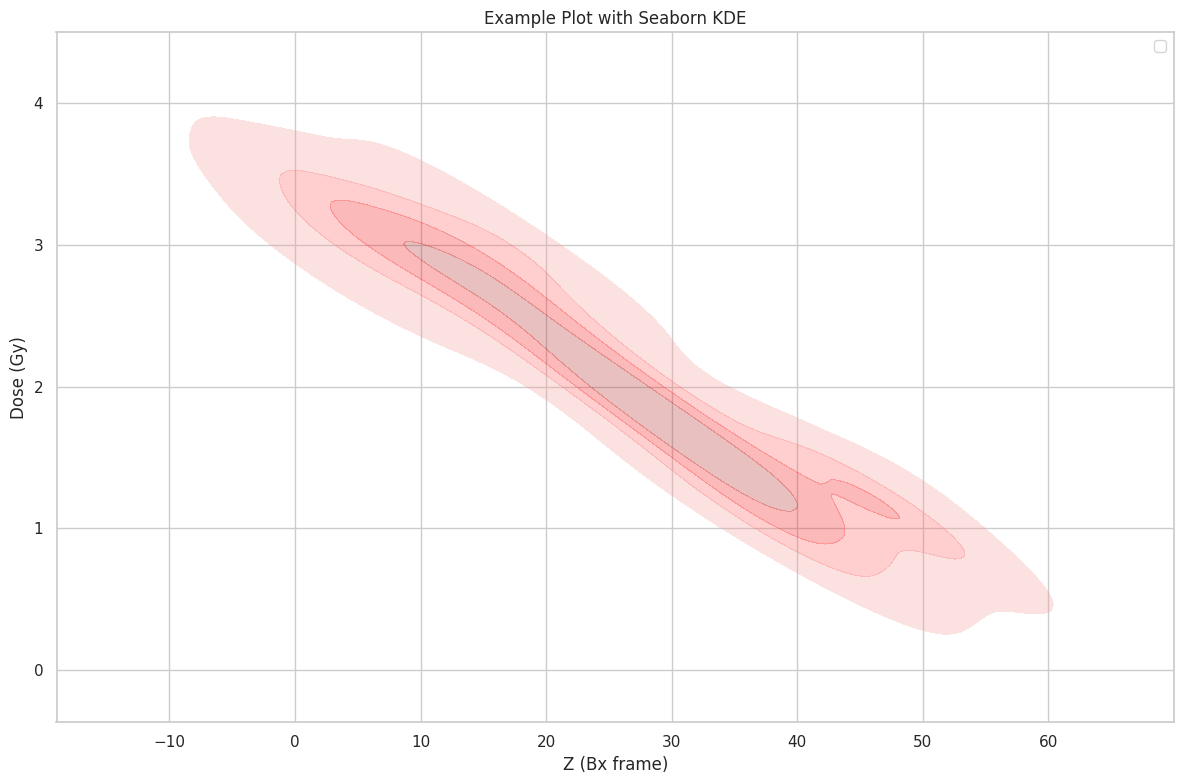

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Creating a simplified example DataFrame
np.random.seed(0)  # For reproducibility
data = {
    'Z (Bx frame)': np.linspace(1, 50, 100),
    'Dose (Gy)': np.sin(np.linspace(1, 5, 100)) + np.random.normal(0, 0.2, 100) + 2,
    'MC trial num': np.random.choice([0, 1], size=100)
}
df = pd.DataFrame(data)

# Using Seaborn to enhance the visual aesthetics
sns.set(style="whitegrid")

def seaborn_plot_example(df):
    plt.figure(figsize=(12, 8))

    # Plotting a Kernel Density Estimate with Seaborn
    sns.kdeplot(data=df, x='Z (Bx frame)', y='Dose (Gy)', color="red", fill=True, alpha=0.3, levels=5, label='KDE')

    # You could integrate other statistical plots here using Seaborn as needed

    plt.title('Example Plot with Seaborn KDE')
    plt.xlabel('Z (Bx frame)')
    plt.ylabel('Dose (Gy)')
    plt.legend()
    plt.tight_layout()
    
    plt.show()

seaborn_plot_example(df)

In [ ]:
from pympler import asizeof

def deep_memory_usage(data_dict):
    memory_usage = []
    for key, value in data_dict.items():
        size = asizeof.asizeof(value)
        memory_usage.append((key, size))

    # Sorting the list of tuples by memory size in descending order
    memory_usage.sort(key=lambda x: x[1], reverse=True)

    # Printing the sorted list
    for key, size in memory_usage:
        print(f"Key: {key}, Size: {size} bytes")



deep_memory_usage(master_structure_reference_dict)


In [1]:
from pympler import asizeof

def recursive_memory_usage(data, path='', results=None):
    if results is None:
        results = []

    if isinstance(data, dict):
        for key, value in data.items():
            new_path = f"{path}.{key}" if path else str(key)
            recursive_memory_usage(value, path=new_path, results=results)
    else:
        # If the current data is not a dictionary, measure its size
        size = asizeof.asizeof(data)
        results.append((path, size))

def analyze_and_print(data_dict):
    results = []
    recursive_memory_usage(data_dict, results=results)
    
    # Sorting results by size in descending order
    results.sort(key=lambda x: x[1], reverse=True)
    
    # Printing results
    for path, size in results:
        print(f"Path: {path}, Size: {size} bytes")

# Example usage with a complex nested dictionary
my_dict = {
    'a': [1, 2, 3],
    'b': {'x': 10, 'y': [20, 30, {'z': 50}], 'w': {'u': 100, 'v': [200, 300]}},
    'c': 'hello world',
    'd': [[1, 2], [3, 4], [5, 6]],
    'e': {'f': {'g': {'h': 'deep nested value'}}}
}

analyze_and_print(my_dict)


Path: d, Size: 488 bytes
Path: b.y, Size: 464 bytes
Path: a, Size: 216 bytes
Path: b.w.v, Size: 136 bytes
Path: e.f.g.h, Size: 72 bytes
Path: c, Size: 64 bytes
Path: b.x, Size: 32 bytes
Path: b.w.u, Size: 32 bytes


In [ ]:
from pympler import asizeof

def recursive_memory_usage(data, path='', results=None):
    if results is None:
        results = []

    if isinstance(data, dict):
        for key, value in data.items():
            new_path = f"{path}.{key}" if path else str(key)
            recursive_memory_usage(value, path=new_path, results=results)
    elif isinstance(data, list):
        # Handle each item in a list
        for index, item in enumerate(data):
            new_path = f"{path}[{index}]" if path else f"[{index}]"
            recursive_memory_usage(item, path=new_path, results=results)
    else:
        # Measure size of the current data object
        size = asizeof.asizeof(data)
        results.append((path, size))

def analyze_and_print(data_dict):
    results = []
    recursive_memory_usage(data_dict, results=results)
    
    # Sorting results by size in descending order
    results.sort(key=lambda x: x[1], reverse=True)
    
    # Printing results
    for path, size in results:
        print(f"Path: {path}, Size: {size} bytes")

# Example complex nested dictionary (simplified for illustration)
my_dict = {
    'a': [1, 2, 3],
    'b': {'x': 10, 'y': [20, 30, {'z': 50}], 'w': {'u': 100, 'v': [200, 300]}},
    'c': 'hello world',
    'd': [[1, 2], [3, 4], [5, 6]],
    'e': {'f': {'g': {'h': 'deep nested value'}}}
}

analyze_and_print(my_dict)


In [2]:
import pandas as pd

def convert_categorical_columns(df, columns, types):
    """
    Convert specified categorical columns in a DataFrame to given types.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the columns.
        columns (list of str): List of column names to check for categorical type.
        types (list of type): List of types to convert the corresponding columns to.

    Returns:
        pd.DataFrame: The DataFrame with the specified columns converted if they were categorical.
    """
    if len(columns) != len(types):
        raise ValueError("The length of 'columns' and 'types' must be equal.")

    for column, dtype in zip(columns, types):
        if pd.api.types.is_categorical_dtype(df[column]):
            df[column] = df[column].astype(dtype)
        else:
            print(f"Warning: Column '{column}' is not categorical and was not converted.")
    return df

# Example usage:
data = {
    'A': pd.Categorical([1, 2, 3, 1, 2]),
    'B': pd.Categorical(['red', 'blue', 'green', 'red', 'blue']),
    'C': [10, 20, 30, 40, 50]  # Not categorical
}

df = pd.DataFrame(data)

# Convert 'A' to int and 'B' to string, 'C' is tried but will not convert
converted_df = convert_categorical_columns(df, ['A', 'B', 'C'], [int, str, float])
print(converted_df)
print(df.dtypes)


   A      B   C
0  1    red  10
1  2   blue  20
2  3  green  30
3  1    red  40
4  2   blue  50
A     int64
B    object
C     int64
dtype: object


/tmp/ipykernel_31378/4204359327.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]):
/tmp/ipykernel_31378/4204359327.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]):
/tmp/ipykernel_31378/4204359327.py:19: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]):


In [3]:
import pandas as pd

def convert_categorical_columns(df, columns, types):
    """
    Convert specified categorical columns in a DataFrame to given types if they are categorical.
    Non-categorical columns are silently skipped without conversion.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the columns.
        columns (list of str): List of column names to check for categorical type.
        types (list of type): List of types to convert the corresponding columns to if they are categorical.

    Returns:
        pd.DataFrame: The DataFrame with the specified columns converted if they were categorical.
    """
    if len(columns) != len(types):
        raise ValueError("The length of 'columns' and 'types' must be equal.")

    for column, dtype in zip(columns, types):
        if pd.api.types.is_categorical_dtype(df[column]):
            df[column] = df[column].astype(dtype)

    return df

# Example usage:
data = {
    'A': pd.Categorical([1, 2, 3, 1, 2]),
    'B': pd.Categorical(['red', 'blue', 'green', 'red', 'blue']),
    'C': [10, 20, 30, 40, 50]  # Not categorical
}

df = pd.DataFrame(data)

# Attempt to convert 'A' to int, 'B' to string, 'C' to float (C will not be converted)
converted_df = convert_categorical_columns(df, ['A', 'B', 'C'], [int, str, float])
print(converted_df)


   A      B   C
0  1    red  10
1  2   blue  20
2  3  green  30
3  1    red  40
4  2   blue  50


/tmp/ipykernel_31378/2845799002.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]):
/tmp/ipykernel_31378/2845799002.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]):
/tmp/ipykernel_31378/2845799002.py:20: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df[column]):


In [4]:
import pandas as pd

def convert_categorical_columns(df, columns, types):
    """
    Convert specified categorical columns in a DataFrame to given types if they are categorical.
    Non-categorical columns are silently skipped without conversion.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the columns.
        columns (list of str): List of column names to check for categorical type.
        types (list of type): List of types to convert the corresponding columns to if they are categorical.

    Returns:
        pd.DataFrame: The DataFrame with the specified columns converted if they were categorical.
    """
    if len(columns) != len(types):
        raise ValueError("The length of 'columns' and 'types' must be equal.")

    for column, dtype in zip(columns, types):
        # Check if the column dtype is an instance of pd.CategoricalDtype
        if isinstance(df[column].dtype, pd.CategoricalDtype):
            df[column] = df[column].astype(dtype)

    return df

# Example usage:
data = {
    'A': pd.Categorical([1, 2, 3, 1, 2]),
    'B': pd.Categorical(['red', 'blue', 'green', 'red', 'blue']),
    'C': [10, 20, 30, 40, 50]  # Not categorical
}

df = pd.DataFrame(data)

# Attempt to convert 'A' to int, 'B' to string, 'C' to float (C will not be converted)
converted_df = convert_categorical_columns(df, ['A', 'B', 'C'], [int, str, float])
print(converted_df)


   A      B   C
0  1    red  10
1  2   blue  20
2  3  green  30
3  1    red  40
4  2   blue  50


In [6]:
import numpy as np 
# Creating a MultiIndex DataFrame
index = pd.MultiIndex.from_tuples([(i, j) for i in range(3) for j in range(3)], names=['Row', 'Column'])
df = pd.DataFrame({'Value': np.arange(1, 10)}, index=index)
print(df.unstack())


       Value      
Column     0  1  2
Row               
0          1  2  3
1          4  5  6
2          7  8  9


In [8]:
np.array([[1,1,1],[2,2,2]]).tolist()


[[1, 1, 1], [2, 2, 2]]

In [12]:
import pandas as pd

# Creating a DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}

df = pd.DataFrame(data)
print(df)

df.at[0,'Age']
df['Voxel index'] = (df['Age'] // 0.5) + 1
df['Voxel index'] = df['Voxel index'].astype(int)
df

      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago


,Name,Age,City,Voxel index
0,Alice,25,New York,51
1,Bob,30,Los Angeles,61
2,Charlie,35,Chicago,71


In [15]:
import pandas as pd
import numpy as np

def optimize_dataframe(df, threshold = 0.25):
    """
    Optimizes the data types in a pandas DataFrame to reduce memory usage 
    without compromising data integrity.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to optimize.
        
    Returns:
        pd.DataFrame: An optimized copy of the DataFrame.
    """
    for column in df.columns:
        # Skip columns with non-numeric data that cannot be downcast
        if pd.api.types.is_numeric_dtype(df[column]):
            # Downcast integer and float columns
            if pd.api.types.is_integer_dtype(df[column]):
                df[column] = pd.to_numeric(df[column], downcast='integer')
            elif pd.api.types.is_float_dtype(df[column]):
                df[column] = pd.to_numeric(df[column], downcast='float')
        elif pd.api.types.is_datetime64_any_dtype(df[column]):
            # Optimize datetime columns
            continue  # Placeholder if datetime needs specific optimization
        elif pd.api.types.is_object_dtype(df[column]):
            # Convert objects to category if fewer than 50% unique values and more than 1 unique value
            num_unique_values = df[column].nunique()
            if num_unique_values < len(df[column]) * threshold and num_unique_values > 1:
                df[column] = df[column].astype('category')

    return df

# Example usage with a DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [1.0, 2.0, 3.0, 4.0, 5.0],
    'C': ['foo', 'bar', 'baz', 'foo', 'bar']
}
df = pd.DataFrame(data)
optimized_df = optimize_dataframe(df.copy())  # Use a copy to preserve the original for comparison

print(df.dtypes)
print(optimized_df.dtypes)


A      int64
B    float64
C     object
dtype: object
A       int8
B    float32
C     object
dtype: object


In [3]:
# Dictionary containing nested dictionaries
data = {
  'sample1': {'Test tissue class': True, 'Other info': 123},
  'sample2': {'Test tissue class': None, 'Other info': 456},
  'sample3': {'Test tissue class': None, 'Other info': 789}
}

# Extract keys where the 'Test tissue class' is True
filtered_keys = [key for key, value in data.items() if value.get('Test tissue class', False)]

print(filtered_keys)


['sample1']


In [ ]:
from scipy.spatial import cKDTree
import pandas

def normal_vector(p1, p2, p3):
    # Vector from p1 to p2
    v1 = p2 - p1
    # Vector from p1 to p3
    v2 = p3 - p1
    # Cross product to find the normal
    return np.cross(v1, v2)

def generate_grid_dataframe(relative_dil_index, point1, point2, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate):
    
    
    # Points to define the plane
    p1 = sp_dil_optimal_coordinate
    p2 = np.array(point1)
    p3 = np.array(point2)
    
    # Compute the normal of the plane
    normal = normal_vector(p1, p2, p3)
    
    # Plane equation coefficients
    d = -np.dot(normal, p1)
    
    # Bounding box from entire_lattice_df
    min_x, max_x = entire_lattice_df['Test location (Prostate centroid origin) (X)'].min(), entire_lattice_df['Test location (Prostate centroid origin) (X)'].max()
    min_y, max_y = entire_lattice_df['Test location (Prostate centroid origin) (Y)'].min(), entire_lattice_df['Test location (Prostate centroid origin) (Y)'].max()
    
    # Generate grid points on the plane
    x_range = np.arange(min_x, max_x, grid_spacing)
    y_range = np.arange(min_y, max_y, grid_spacing)
    xx, yy = np.meshgrid(x_range, y_range)
    
    # Calculate z for each (x, y) on the plane using the plane equation
    zz = (-normal[0] * xx - normal[1] * yy - d) / normal[2]

    # Flatten the arrays for k-d tree searching
    grid_points = np.column_stack((xx.ravel(), yy.ravel(), zz.ravel()))
    
    # Nearest Neighbor search and value assignment
    tree = cKDTree(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                      'Test location (Prostate centroid origin) (Y)',
                                      'Test location (Prostate centroid origin) (Z)']].values)
    distances, indices = tree.query(grid_points)
    
    # Efficiently fetch 'Proportion of normal dist points contained' using NumPy array indexing
    proportions_np = entire_lattice_df['Proportion of normal dist points contained'].to_numpy()
    values = proportions_np[indices]
    
    # Create DataFrame for the grid points and associated values
    grid_df = pandas.DataFrame(grid_points, columns=['Transducer plane point (X)', 
                                                 'Transducer plane point (Y)', 
                                                 'Transducer plane point (Z)'])
    grid_df['Proportion of normal dist points contained'] = values
    
    return grid_df, normal


def calculate_rotation_matrix(normal, target=np.array([1, 0, 0])):
    """Calculate the rotation matrix needed to align `normal` with `target`."""
    v = np.cross(normal, target)
    c = np.dot(normal, target)
    s = np.linalg.norm(v)
    if s == 0:
        return np.eye(3)  # No rotation needed
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / (s ** 2))
    return rotation_matrix

def plot_transformed_contour(df, normal):
    """Generate a contour plot of the transformed plane."""
    # Compute the rotation matrix to align normal with the x-axis
    rotation_matrix = calculate_rotation_matrix(normal)
    
    # Apply the rotation to each point in the DataFrame
    points = df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']]
    transformed_points = points.dot(rotation_matrix.T)
    
    # Update DataFrame with transformed coordinates
    df['Transformed Y'] = transformed_points[1]  # Access columns by position
    df['Transformed Z'] = transformed_points[2]
    
    # Plot using Plotly
    fig = go.Figure()
    fig.add_trace(go.Contour(
                    z=df['Proportion of normal dist points contained'],
                    x=df['Transformed Z'],
                    y=df['Transformed Y'],
                    colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
                    zmax = 1,
                    zmin = 0,
                    autocontour = False,
                    contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                    connectgaps = False, 
                    colorbar = go.contour.ColorBar(len = 0.5)
                ))
    """
    fig = go.Figure(data=go.Contour(
        z=df['Proportion of normal dist points contained'],
        x=df['Transformed Y'],  # Transformed Y coordinates as x-axis in the plot
        y=df['Transformed Z'],  # Transformed Z coordinates as y-axis in the plot
        colorscale='Viridis',
        line_smoothing=0.85
    ))
    """
    fig.update_layout(title='Contour Plot of Proportion of Normal Dist Points Contained',
                      xaxis_title='Transformed Z',
                      yaxis_title='Transformed Y')
    
    return fig, rotation_matrix 


def add_optimal_point_to_plot(fig, rotation_matrix, base_point, dil_name):
    """Add transformed base point to the plot with an appropriate label."""
    # Transform the base point using the rotation matrix
    transformed_base_point = np.dot(base_point, rotation_matrix.T)
    
    # Add the transformed point to the plot
    fig.add_trace(go.Scatter(
        x=[transformed_base_point[1]],  # Transformed Y
        y=[transformed_base_point[2]],  # Transformed Z
        text=["Optimal (" + dil_name + ")"],
        mode='markers+text',
        marker=dict(color='orange', size=10),
        textposition='top center'
    ))
    
    return fig



def add_mesh_slice_to_plot(fig, mesh, plane_origin, plane_normal, rotation_matrix):
    """
    Takes a slice of an Open3D triangle mesh in a specified plane, rotates it, and adds it to a Plotly figure.
    
    :param fig: Plotly figure object to which the line will be added
    :param mesh: Open3D triangle mesh object
    :param plane_origin: A point on the plane (numpy array)
    :param plane_normal: Normal vector of the plane (numpy array)
    :param rotation_matrix: Rotation matrix to align plane normal with the x-axis
    :return: Updated Plotly figure
    """
    # Slice the mesh with a plane
    mesh_slice = mesh.slice(plane_origin=plane_origin, plane_normal=plane_normal)

    # Extract points from the sliced mesh
    if len(mesh_slice.triangles) == 0:
        print("No intersection found between the plane and the mesh.")
        return fig

    points = np.asarray(mesh_slice.vertices)
    
    # Rotate the points using the rotation matrix
    rotated_points = points.dot(rotation_matrix.T)
    
    # Extracting the transformed Y and Z for plotting (since X is depth after rotation which we ignore)
    transformed_y = rotated_points[:, 1]
    transformed_z = rotated_points[:, 2]

    # Add the slice as a line to the plot
    fig.add_trace(go.Scatter(
        x=transformed_y,
        y=transformed_z,
        mode='lines',
        line=dict(color='red', width=2),
        name='Mesh Slice'
    ))
    
    return fig

relative_dil_index = 0
point1 = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure centroid pts'][0]
point2 = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure centroid pts'][74]
grid_spacing = 3
entire_lattice_df = master_structure_reference_dict['181_F2 ()']['All ref']['Multi-structure information dict (not for csv output)']['Biopsy optimization: Optimal biopsy location (entire cubic lattice) dataframe']
optimal_positions_df = master_structure_reference_dict['181_F2 ()']['DIL ref'][0]['Biopsy optimization: Optimal biopsy location dataframe']

# Extract the base point from optimal_positions_df using the first matched index
sp_dil_optimal_positions_df = optimal_positions_df[optimal_positions_df['Relative DIL index'] == relative_dil_index]
sp_dil_optimal_coordinate = np.array([
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (X)'],
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Y)'],
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Z)']
])
sp_dil_id = sp_dil_optimal_positions_df.at[0, 'Relative DIL ID']



transducer_plane_df, transducer_plane_normal = generate_grid_dataframe(relative_dil_index, point1, point2, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate)
transducer_plane_pcd = point_containment_tools.create_point_cloud(transducer_plane_df[['Transducer plane point (X)', 'Transducer plane point (X)', 'Transducer plane point (X)']].to_numpy())
plotting_funcs.plot_geometries(transducer_plane_pcd)
transducer_plane_contour_fig, transducer_plane_to_sagittal_rotation_matrix  = plot_transformed_contour(transducer_plane_df, transducer_plane_normal)
transducer_plane_contour_fig = add_optimal_point_to_plot(transducer_plane_contour_fig, transducer_plane_to_sagittal_rotation_matrix, sp_dil_optimal_coordinate, sp_dil_id)

In [9]:
my_dict = {'a': 1, 'b': 2}
removed_value = my_dict.pop('c', None)  # Returns None if 'c' is not a key, no KeyError raised
print("Removed value:", removed_value)
removed_value = my_dict.pop('b', None)  # Returns None if 'c' is not a key, no KeyError raised
print("Removed value:", removed_value)
my_dict.pop('b', None)


Removed value: None
Removed value: 2


In [ ]:
from scipy.spatial import cKDTree
import pandas


def normal_vector(p1, p2, p3):
    v1 = p2 - p1
    v2 = p3 - p1
    return np.cross(v1, v2)

def generate_grid_dataframe(relative_dil_index, point1, point2, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate):
    p1 = sp_dil_optimal_coordinate
    p2 = np.array(point1)
    p3 = np.array(point2)
    
    # Normal of the plane and plane basis vectors
    normal = normal_vector(p1, p2, p3)
    u = (p2 - p1) / np.linalg.norm(p2 - p1)
    v = np.cross(normal, u)
    v /= np.linalg.norm(v)  # Ensure v is a unit vector
    
    # Plane equation coefficients
    d = -np.dot(normal, p1)
    
    # Determine the range of the grid in terms of parameters s (along u) and t (along v)
    num_steps = int(np.ceil((np.linalg.norm(p2-p1) / grid_spacing)))
    s_range = np.linspace(0, np.linalg.norm(p2 - p1), num_steps)
    t_range = np.linspace(0, np.linalg.norm(p3 - p1), num_steps)
    ss, tt = np.meshgrid(s_range, t_range)
    
    # Calculate grid points on the plane
    grid_points = p1 + np.outer(ss.ravel(), u) + np.outer(tt.ravel(), v)
    
    # Nearest Neighbor search and value assignment
    tree = cKDTree(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                      'Test location (Prostate centroid origin) (Y)',
                                      'Test location (Prostate centroid origin) (Z)']].values)
    distances, indices = tree.query(grid_points)
    values = entire_lattice_df['Proportion of normal dist points contained'].iloc[indices].to_numpy()
    
    # Create DataFrame for the grid points and associated values
    grid_df = pandas.DataFrame(grid_points, columns=['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)'])
    grid_df['Proportion of normal dist points contained'] = values
    
    return grid_df, normal


def generate_grid_dataframe_2(point1, point2, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate):
    # Points for defining the plane
    p1 = np.array(sp_dil_optimal_coordinate)
    p2 = np.array(point1)
    p3 = np.array(point2)
    
    # Compute the plane normal and basis vectors
    normal = np.cross(p2 - p1, p3 - p1)
    normal /= np.linalg.norm(normal)  # Normalize the normal vector
    
    # Generate a grid aligned with (1,0,0) at the origin, with the size twice the max dimension
    max_dim = entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                 'Test location (Prostate centroid origin) (Y)',
                                 'Test location (Prostate centroid origin) (Z)']].values.max()
    size = 10 * max_dim
    num_points = int(size / grid_spacing)
    x_coords = np.zeros(num_points ** 2)
    y_coords, z_coords = np.meshgrid(np.linspace(-size / 2, size / 2, num_points),
                                     np.linspace(-size / 2, size / 2, num_points))
    grid_points = np.column_stack((x_coords.ravel(), y_coords.ravel(), z_coords.ravel()))
    
    # Calculate rotation matrix from (1,0,0) to the plane normal
    rotation_matrix = calculate_rotation_matrix(np.array([1, 0, 0]), normal)
    
    # Rotate grid points to align with the plane
    grid_points = grid_points.dot(rotation_matrix.T)
    
    # Shift grid to be centered at p1
    grid_points += p1
    
    # Filter points to lie within the bounding box of entire_lattice_df
    min_coords = entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                    'Test location (Prostate centroid origin) (Y)',
                                    'Test location (Prostate centroid origin) (Z)']].min().values
    max_coords = entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                    'Test location (Prostate centroid origin) (Y)',
                                    'Test location (Prostate centroid origin) (Z)']].max().values
    
    mask = (grid_points[:, 0] >= min_coords[0]) & (grid_points[:, 0] <= max_coords[0]) & \
           (grid_points[:, 1] >= min_coords[1]) & (grid_points[:, 1] <= max_coords[1]) & \
           (grid_points[:, 2] >= min_coords[2]) & (grid_points[:, 2] <= max_coords[2])
    grid_points = grid_points[mask]
    
    # KD-tree for nearest neighbor search for these points within entire_lattice_df
    tree = cKDTree(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                      'Test location (Prostate centroid origin) (Y)',
                                      'Test location (Prostate centroid origin) (Z)']].values)
    distances, indices = tree.query(grid_points)
    values = entire_lattice_df['Proportion of normal dist points contained'].iloc[indices].to_numpy()
    
    # Create DataFrame for the grid points and associated values
    grid_df = pandas.DataFrame(grid_points, columns=['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)'])
    grid_df['Proportion of normal dist points contained'] = values
    
    return grid_df, normal

def calculate_rotation_matrix(from_vec, to_vec):
    """Generate a rotation matrix that rotates from_vec to to_vec."""
    a, b = from_vec / np.linalg.norm(from_vec), to_vec / np.linalg.norm(to_vec)
    v = np.cross(a, b)
    c = np.dot(a, b)
    s = np.linalg.norm(v)
    if s == 0:
        return np.eye(3)  # The vectors are parallel
    k = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    return np.eye(3) + k + k @ k * ((1 - c) / s**2)

def plot_transformed_contour(df, normal):
    """Generate a contour plot of the transformed plane."""
    # Compute the rotation matrix to align normal with the x-axis
    rotation_matrix = calculate_rotation_matrix(normal, np.array([1,0,0]))
    
    # Apply the rotation to each point in the DataFrame
    points = df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']]
    transformed_points = points.dot(rotation_matrix.T)
    
    # Update DataFrame with transformed coordinates
    df['Transformed Y'] = transformed_points[1]  # Access columns by position
    df['Transformed Z'] = transformed_points[2]
    
    # Plot using Plotly
    fig = go.Figure()
    fig.add_trace(go.Contour(
                    z=df['Proportion of normal dist points contained'],
                    x=df['Transformed Z'],
                    y=df['Transformed Y'],
                    colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
                    zmax = 1,
                    zmin = 0,
                    autocontour = False,
                    contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                    connectgaps = False, 
                    colorbar = go.contour.ColorBar(len = 0.5)
                ))
    """
    fig = go.Figure(data=go.Contour(
        z=df['Proportion of normal dist points contained'],
        x=df['Transformed Y'],  # Transformed Y coordinates as x-axis in the plot
        y=df['Transformed Z'],  # Transformed Z coordinates as y-axis in the plot
        colorscale='Viridis',
        line_smoothing=0.85
    ))
    """
    fig.update_layout(title='Contour Plot of Proportion of Normal Dist Points Contained',
                      xaxis_title='Transformed Z',
                      yaxis_title='Transformed Y')
    
    return fig, rotation_matrix 


def transform_points(points, rotation_matrix, origin):
    """Apply rotation and then translate points to align with a given origin."""
    return np.dot(points, rotation_matrix.T) + origin

def plot_transformed_contour_2(df, normal, p1):
    """Generate a contour plot of the transformed plane."""
    rotation_matrix = calculate_rotation_matrix(np.array([1, 0, 0]), normal)

    # Transform grid points for plotting
    grid_points = df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].values
    transformed_points = transform_points(grid_points, rotation_matrix, -p1)

    # Update DataFrame with transformed coordinates
    df['Transformed Y'] = transformed_points[:,1]  # Access columns by position
    df['Transformed Z'] = transformed_points[:,2]

    # Plot using Plotly
    fig = go.Figure()
    fig.add_trace(go.Contour(
                    z=df['Proportion of normal dist points contained'],
                    x=df['Transformed Z'],
                    y=df['Transformed Y'],
                    colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
                    zmax = 1,
                    zmin = 0,
                    autocontour = False,
                    contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                    connectgaps = False, 
                    colorbar = go.contour.ColorBar(len = 0.5)
                ))
    fig.update_layout(title='Contour Plot of Proportion of Normal Dist Points Contained',
                      xaxis_title='Transformed X',
                      yaxis_title='Transformed Y')

    # Transform and plot the optimal point
    optimal_point = np.array([sp_dil_optimal_coordinate])
    transformed_optimal_point = transform_points(optimal_point, rotation_matrix, -p1)
    fig.add_trace(go.Scatter(
        x=[transformed_optimal_point[0, 0]],
        y=[transformed_optimal_point[0, 1]],
        mode='markers',
        marker=dict(color='orange', size=10),
        name='Optimal Point'
    ))

    return fig



def add_optimal_point_to_plot(fig, rotation_matrix, base_point, dil_name, p1):
    """Add transformed base point to the plot with an appropriate label."""
    # Transform the base point using the rotation matrix and translate it
    transformed_base_point = np.dot(base_point - p1, rotation_matrix.T) + p1

    # Add the transformed point to the plot
    fig.add_trace(go.Scatter(
        x=[transformed_base_point[1]],  # Transformed Y
        y=[transformed_base_point[2]],  # Transformed Z
        text=["Optimal (" + dil_name + ")"],
        mode='markers+text',
        marker=dict(color='orange', size=10),
        textposition='top center'
    ))

    return fig



def add_mesh_slice_to_plot(fig, mesh, plane_origin, plane_normal, rotation_matrix):
    """
    Takes a slice of an Open3D triangle mesh in a specified plane, rotates it, and adds it to a Plotly figure.
    
    :param fig: Plotly figure object to which the line will be added
    :param mesh: Open3D triangle mesh object
    :param plane_origin: A point on the plane (numpy array)
    :param plane_normal: Normal vector of the plane (numpy array)
    :param rotation_matrix: Rotation matrix to align plane normal with the x-axis
    :return: Updated Plotly figure
    """
    # Slice the mesh with a plane
    mesh_slice = mesh.slice(plane_origin=plane_origin, plane_normal=plane_normal)

    # Extract points from the sliced mesh
    if len(mesh_slice.triangles) == 0:
        print("No intersection found between the plane and the mesh.")
        return fig

    points = np.asarray(mesh_slice.vertices)
    
    # Rotate the points using the rotation matrix
    rotated_points = points.dot(rotation_matrix.T)
    
    # Extracting the transformed Y and Z for plotting (since X is depth after rotation which we ignore)
    transformed_y = rotated_points[:, 1]
    transformed_z = rotated_points[:, 2]

    # Add the slice as a line to the plot
    fig.add_trace(go.Scatter(
        x=transformed_y,
        y=transformed_z,
        mode='lines',
        line=dict(color='red', width=2),
        name='Mesh Slice'
    ))
    
    return fig

relative_dil_index = 0

grid_spacing = 2
entire_lattice_df = master_structure_reference_dict['181_F2 ()']['All ref']['Multi-structure information dict (not for csv output)']['Biopsy optimization: Optimal biopsy location (entire cubic lattice) dataframe']
optimal_positions_df = master_structure_reference_dict['181_F2 ()']['DIL ref'][0]['Biopsy optimization: Optimal biopsy location dataframe']

# Extract the base point from optimal_positions_df using the first matched index
sp_dil_optimal_positions_df = optimal_positions_df[optimal_positions_df['Relative DIL index'] == relative_dil_index]
sp_dil_optimal_coordinate = np.array([
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (X)'],
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Y)'],
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Z)']
])
sp_dil_id = sp_dil_optimal_positions_df.at[0, 'Relative DIL ID']


prostate_inter_slice_interp_np_arr = master_structure_reference_dict['181_F2 ()']['OAR ref'][0]['Inter-slice interpolation information'].interpolated_pts_np_arr
prostate_centroid = master_structure_reference_dict['181_F2 ()']['OAR ref'][0]['Structure global centroid'][0]
prostate_inter_slice_interp_np_arr_prostate_coords = prostate_inter_slice_interp_np_arr - prostate_centroid
prostate_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(prostate_inter_slice_interp_np_arr_prostate_coords)
prostate_inter_slice_interp_pcd = point_containment_tools.create_point_cloud(prostate_inter_slice_interp_np_arr)

rectum_inter_slice_interp_np_arr = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Inter-slice interpolation information'].interpolated_pts_np_arr
rectum_inter_slice_interp_np_arr_prostate_coords = rectum_inter_slice_interp_np_arr - prostate_centroid
rectum_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(rectum_inter_slice_interp_np_arr_prostate_coords)
rectum_inter_slice_interp_pcd = point_containment_tools.create_point_cloud(rectum_inter_slice_interp_np_arr)


point1 = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure centroid pts'][0]
point2 = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure centroid pts'][74]
rectum_point_1_prostate_frame = point1 - prostate_centroid
rectum_point_2_prostate_frame = point2 - prostate_centroid

rectum_point_1_prostate_frame_pcd = point_containment_tools.create_point_cloud(rectum_point_1_prostate_frame.reshape(1, -1), color = np.array([1,0,0]))
rectum_point_2_prostate_frame_pcd = point_containment_tools.create_point_cloud(rectum_point_2_prostate_frame.reshape(1, -1), color = np.array([1,0,0]))

optimal_pos_pcd = point_containment_tools.create_point_cloud(sp_dil_optimal_coordinate.reshape(1, -1), color = np.array([1,0,0]))

origin_pcd = point_containment_tools.create_point_cloud(np.array([[0,0,0]]), color = np.array([0,1,0]))

entire_lattice_pcd = point_containment_tools.create_point_cloud(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                      'Test location (Prostate centroid origin) (Y)',
                                      'Test location (Prostate centroid origin) (Z)']].to_numpy())


transducer_plane_df, transducer_plane_normal = generate_grid_dataframe_2(rectum_point_1_prostate_frame, rectum_point_2_prostate_frame, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate)
transducer_plane_pcd = point_containment_tools.create_point_cloud(transducer_plane_df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].to_numpy(), color = np.array([0,0,1]))
plotting_funcs.plot_geometries(transducer_plane_pcd, prostate_inter_slice_interp_prostate_coords_pcd, rectum_inter_slice_interp_prostate_coords_pcd, rectum_point_1_prostate_frame_pcd, rectum_point_2_prostate_frame_pcd, optimal_pos_pcd, origin_pcd)
transducer_plane_contour_fig, rot_mat = plot_transformed_contour(transducer_plane_df, transducer_plane_normal)
transducer_plane_contour_fig.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.spatial import cKDTree
import plotly.graph_objects as go

def normal_vector(p1, p2, p3):
    v1 = p2 - p1
    v2 = p3 - p1
    return np.cross(v1, v2) / np.linalg.norm(np.cross(v1, v2))

def generate_grid_dataframe(point1, point2, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate):
    p1 = np.array(sp_dil_optimal_coordinate)
    p2 = np.array(point1)
    p3 = np.array(point2)
    
    normal = normal_vector(p1, p2, p3)
    size = max(np.linalg.norm(p2-p1), np.linalg.norm(p3-p1)) * 2
    num_points = int(size / grid_spacing)
    
    x_coords = np.zeros(num_points ** 2)
    y_coords, z_coords = np.meshgrid(np.linspace(-size / 2, size / 2, num_points),
                                     np.linspace(-size / 2, size / 2, num_points))
    grid_points = np.column_stack((x_coords.ravel(), y_coords.ravel(), z_coords.ravel()))
    
    # Rotate grid points to align with the normal vector
    rotation_matrix = calculate_rotation_matrix(np.array([1, 0, 0]), normal)
    grid_points = np.dot(grid_points, rotation_matrix.T) + p1

    # Query nearest neighbors for grid points within the lattice bounds
    tree = cKDTree(entire_lattice_df[['Test location (Prostate centroid origin) (X)', 'Test location (Prostate centroid origin) (Y)', 'Test location (Prostate centroid origin) (Z)']])
    distances, indices = tree.query(grid_points)
    values = entire_lattice_df['Proportion of normal dist points contained'].iloc[indices].to_numpy()

    # Create DataFrame for grid points and associated values
    grid_df = pd.DataFrame(grid_points, columns=['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)'])
    grid_df['Proportion of normal dist points contained'] = values
    
    return grid_df, rotation_matrix

def calculate_rotation_matrix(from_vec, to_vec):
    v = np.cross(from_vec, to_vec)
    s = np.linalg.norm(v)
    c = np.dot(from_vec, to_vec)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    return np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / s**2)

def plot_transformed_contour(df, rotation_matrix, p1):
    # Apply rotation to the plane points for visualization
    points = df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].values
    transformed_points = np.dot(points - p1, rotation_matrix.T)
    df['Transformed Y'] = transformed_points[:, 1]
    df['Transformed Z'] = transformed_points[:, 2]

    # Create contour plot
    fig = go.Figure()
    fig.add_trace(go.Contour(
                    z=df['Proportion of normal dist points contained'],
                    x=df['Transformed Z'],
                    y=df['Transformed Y'],
                    colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
                    zmax = 1,
                    zmin = 0,
                    autocontour = False,
                    contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                    connectgaps = False, 
                    colorbar = go.contour.ColorBar(len = 0.5)
                ))
    fig.update_layout(title='Contour Plot of Proportion of Normal Dist Points Contained',
                      xaxis_title='Transformed X', yaxis_title='Transformed Y')
    return fig


relative_dil_index = 0

grid_spacing = 2
entire_lattice_df = master_structure_reference_dict['181_F2 ()']['All ref']['Multi-structure information dict (not for csv output)']['Biopsy optimization: Optimal biopsy location (entire cubic lattice) dataframe']
optimal_positions_df = master_structure_reference_dict['181_F2 ()']['DIL ref'][0]['Biopsy optimization: Optimal biopsy location dataframe']

# Extract the base point from optimal_positions_df using the first matched index
sp_dil_optimal_positions_df = optimal_positions_df[optimal_positions_df['Relative DIL index'] == relative_dil_index]
sp_dil_optimal_coordinate = np.array([
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (X)'],
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Y)'],
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Z)']
])
sp_dil_id = sp_dil_optimal_positions_df.at[0, 'Relative DIL ID']


prostate_inter_slice_interp_np_arr = master_structure_reference_dict['181_F2 ()']['OAR ref'][0]['Inter-slice interpolation information'].interpolated_pts_np_arr
prostate_centroid = master_structure_reference_dict['181_F2 ()']['OAR ref'][0]['Structure global centroid'][0]
prostate_inter_slice_interp_np_arr_prostate_coords = prostate_inter_slice_interp_np_arr - prostate_centroid
prostate_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(prostate_inter_slice_interp_np_arr_prostate_coords)
prostate_inter_slice_interp_pcd = point_containment_tools.create_point_cloud(prostate_inter_slice_interp_np_arr)

rectum_inter_slice_interp_np_arr = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Inter-slice interpolation information'].interpolated_pts_np_arr
rectum_inter_slice_interp_np_arr_prostate_coords = rectum_inter_slice_interp_np_arr - prostate_centroid
rectum_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(rectum_inter_slice_interp_np_arr_prostate_coords)
rectum_inter_slice_interp_pcd = point_containment_tools.create_point_cloud(rectum_inter_slice_interp_np_arr)


point1 = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure centroid pts'][0]
point2 = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure centroid pts'][74]
rectum_point_1_prostate_frame = point1 - prostate_centroid
rectum_point_2_prostate_frame = point2 - prostate_centroid

rectum_point_1_prostate_frame_pcd = point_containment_tools.create_point_cloud(rectum_point_1_prostate_frame.reshape(1, -1), color = np.array([1,0,0]))
rectum_point_2_prostate_frame_pcd = point_containment_tools.create_point_cloud(rectum_point_2_prostate_frame.reshape(1, -1), color = np.array([1,0,0]))

optimal_pos_pcd = point_containment_tools.create_point_cloud(sp_dil_optimal_coordinate.reshape(1, -1), color = np.array([1,0,0]))

origin_pcd = point_containment_tools.create_point_cloud(np.array([[0,0,0]]), color = np.array([0,1,0]))

entire_lattice_pcd = point_containment_tools.create_point_cloud(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                      'Test location (Prostate centroid origin) (Y)',
                                      'Test location (Prostate centroid origin) (Z)']].to_numpy())


transducer_plane_df, rot_mat = generate_grid_dataframe(rectum_point_1_prostate_frame, rectum_point_2_prostate_frame, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate)
transducer_plane_pcd = point_containment_tools.create_point_cloud(transducer_plane_df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].to_numpy(), color = np.array([0,0,1]))
plotting_funcs.plot_geometries(transducer_plane_pcd, prostate_inter_slice_interp_prostate_coords_pcd, rectum_inter_slice_interp_prostate_coords_pcd, rectum_point_1_prostate_frame_pcd, rectum_point_2_prostate_frame_pcd, optimal_pos_pcd, origin_pcd)
transducer_plane_contour_fig = plot_transformed_contour(transducer_plane_df, rot_mat, sp_dil_optimal_coordinate)
transducer_plane_contour_fig.show()

In [15]:
from scipy.spatial import cKDTree
import pandas
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance_matrix
import networkx as nx
from scipy.spatial.distance import pdist, squareform
import numpy as np
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import cupy as cp


def normal_vector(p1, p2, p3):
    v1 = p2 - p1
    v2 = p3 - p1
    return np.cross(v1, v2)

def calculate_rotation_matrix(from_vec, to_vec):
    v = np.cross(from_vec, to_vec)
    s = np.linalg.norm(v)
    c = np.dot(from_vec, to_vec)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    if s == 0:
        return np.eye(3)  # The vectors are parallel
    return np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / s**2)



def calculate_rotation_matrix_and_euler(from_vec, to_vec):
    v = np.cross(from_vec, to_vec)
    s = np.linalg.norm(v)
    c = np.dot(from_vec, to_vec)
    kmat = np.array([[0, -v[2], v[1]], [v[2], 0, -v[0]], [-v[1], v[0], 0]])
    if s == 0:
        rotation_matrix = np.eye(3)  # The vectors are parallel
    else:
        rotation_matrix = np.eye(3) + kmat + kmat.dot(kmat) * ((1 - c) / s**2)
    
    # Calculate Euler angles from rotation matrix
    sy = np.sqrt(rotation_matrix[0,0] * rotation_matrix[0,0] + rotation_matrix[1,0] * rotation_matrix[1,0])
    singular = sy < 1e-6
    if not singular:
        x = np.arctan2(rotation_matrix[2,1], rotation_matrix[2,2])
        y = np.arctan2(-rotation_matrix[2,0], sy)
        z = np.arctan2(rotation_matrix[1,0], rotation_matrix[0,0])
    else:
        x = np.arctan2(-rotation_matrix[1,2], rotation_matrix[1,1])
        y = np.arctan2(-rotation_matrix[2,0], sy)
        z = 0

    euler_angles = np.array([x, y, z]) * (180/np.pi)  # Convert from radians to degrees
    return rotation_matrix, euler_angles

def generate_grid_dataframe(point1, point2, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate):
    p1 = np.array(sp_dil_optimal_coordinate)
    p2 = np.array(point1)
    p3 = np.array(point2)

    normal = -normal_vector(p1, p2, p3)
    normal /= np.linalg.norm(normal)  # Normalize the normal vector
    
    # Define the rotation from the X-axis to the normal
    #rotation_matrix = calculate_rotation_matrix(np.array([1, 0, 0]), normal)
    rotation_matrix, euler_angles = calculate_rotation_matrix_and_euler(np.array([1, 0, 0]), normal)

    # Define grid size and spacing based on the desired coverage area
    size = 2 * max(np.linalg.norm(p2-p1), np.linalg.norm(p3-p1))
    num_points = int(size / grid_spacing)
    x_coords = np.zeros((num_points, num_points))
    y_coords, z_coords = np.meshgrid(np.linspace(-size / 2, size / 2, num_points),
                                     np.linspace(-size / 2, size / 2, num_points))

    grid_points = np.column_stack((x_coords.ravel(), y_coords.ravel(), z_coords.ravel()))

    # Rotate grid points to align with the normal
    grid_points = np.dot(grid_points, rotation_matrix.T) + p1

    # KD-tree for nearest neighbor search for these points within entire_lattice_df
    #tree = cKDTree(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
    #                                  'Test location (Prostate centroid origin) (Y)',
    #                                  'Test location (Prostate centroid origin) (Z)']].values, leafsize = 400)
    #distances, indices = tree.query(grid_points, k=1)  # Ensure single closest point
    #values = entire_lattice_df['Proportion of normal dist points contained'].take(indices).to_numpy()

    neighbors = NearestNeighbors(n_neighbors=1, algorithm='brute', leaf_size = 1,n_jobs = -1).fit(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                     'Test location (Prostate centroid origin) (Y)',
                                     'Test location (Prostate centroid origin) (Z)']].values)
    distances, indices = neighbors.kneighbors(grid_points)
    values = entire_lattice_df['Proportion of normal dist points contained'].take(indices.flatten()).to_numpy()

    # indices, min_distances = brute_force_scipy(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
    #                                   'Test location (Prostate centroid origin) (Y)',
    #                                   'Test location (Prostate centroid origin) (Z)']].values, grid_points)

    # values = entire_lattice_df['Proportion of normal dist points contained'].take(indices).to_numpy()


    #indices, min_distances = brute_force_gpu(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                    #'Test location (Prostate centroid origin) (Y)',
                                    #'Test location (Prostate centroid origin) (Z)']].values, grid_points)
    # indices, min_distances = brute_force_gpu_chunked(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
    #                                 'Test location (Prostate centroid origin) (Y)',
    #                                 'Test location (Prostate centroid origin) (Z)']].values, 
    #                                 grid_points, 
    #                                 max_chunk_size=10000)
    # values = entire_lattice_df['Proportion of normal dist points contained'].take(indices).to_numpy()

    # Create DataFrame for the grid points and associated values
    grid_df = pandas.DataFrame(grid_points, columns=['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)'])
    grid_df['Proportion of normal dist points contained'] = values

    return grid_df, normal, euler_angles


def brute_force_scipy(data_points, query_points):
    dist_matrix = distance_matrix(query_points, data_points)
    indices = np.argmin(dist_matrix, axis=1)
    min_distances = np.min(dist_matrix, axis=1)
    return indices, min_distances



def brute_force_gpu(data_points, query_points):
    """
    Perform brute force nearest neighbor search using GPU acceleration with CuPy.

    Parameters:
        data_points (numpy.ndarray): Array of data points, shape (N, 3).
        query_points (numpy.ndarray): Array of query points to find nearest neighbors for, shape (M, 3).

    Returns:
        indices (numpy.ndarray): Indices of the nearest neighbors in data_points for each query point.
        min_distances (numpy.ndarray): Minimum distances to the nearest neighbors.
    """
    # Convert numpy arrays to CuPy arrays for GPU computation
    data_points_gpu = cp.asarray(data_points)
    query_points_gpu = cp.asarray(query_points)

    # Calculate distance matrix: ||qi - dj||^2 = ||qi||^2 + ||dj||^2 - 2 * qi * dj
    # Broadcasting sum of squares of data points and query points
    data_squares = cp.sum(data_points_gpu**2, axis=1)
    query_squares = cp.sum(query_points_gpu**2, axis=1)
    distance_matrix = cp.sqrt(query_squares[:, None] + data_squares - 2 * cp.dot(query_points_gpu, data_points_gpu.T))

    # Find the index of the minimum distance for each query point
    indices = cp.argmin(distance_matrix, axis=1)
    min_distances = cp.min(distance_matrix, axis=1)

    # Convert results back to numpy arrays if necessary for further CPU processing
    return cp.asnumpy(indices), cp.asnumpy(min_distances)


def brute_force_gpu_chunked(data_points, query_points, max_chunk_size=10000):
    """
    Perform nearest neighbor search using a brute-force method with GPU acceleration in chunks.

    Parameters:
        data_points (np.array): An array of shape (N, D) representing N points in D dimensions.
        query_points (np.array): An array of shape (M, D) representing M query points in D dimensions.
        max_chunk_size (int): Maximum size of the distance matrix chunk to fit in GPU memory.

    Returns:
        tuple: Two arrays, indices of the closest data points to each query point, and the corresponding minimum distances.
    """
    max_chunk_size = int(max_chunk_size)
    # Transfer data to GPU
    data_gpu = cp.asarray(data_points)
    query_gpu = cp.asarray(query_points)

    num_queries = query_points.shape[0]
    num_data = data_points.shape[0]

    # Initialize arrays to store the minimum distances and their corresponding indices
    min_distances = cp.full(num_queries, cp.inf, dtype=cp.float32)
    min_indices = cp.full(num_queries, -1, dtype=cp.int32)

    # Process chunks of the data points
    for start_idx in range(0, num_data, max_chunk_size):
        end_idx = min(start_idx + max_chunk_size, num_data)
        data_chunk = data_gpu[start_idx:end_idx]

        # Compute the distance matrix for the current chunk
        dist_matrix = cp.linalg.norm(query_gpu[:, None, :] - data_chunk[None, :, :], axis=2)

        # Find the minimum distances and indices for the current chunk
        chunk_min_distances = cp.min(dist_matrix, axis=1)
        chunk_min_indices = cp.argmin(dist_matrix, axis=1) + start_idx  # Adjust indices based on the global array

        # Update the global minimum distances and indices
        update_mask = chunk_min_distances < min_distances
        min_distances[update_mask] = chunk_min_distances[update_mask]
        min_indices[update_mask] = chunk_min_indices[update_mask]

    # Transfer results back to host memory
    min_distances = cp.asnumpy(min_distances)
    min_indices = cp.asnumpy(min_indices)

    return min_indices, min_distances


def transform_grid_and_point(grid_df, normal, sp_dil_optimal_coordinate):
    # Calculate rotation matrix to align normal with (1, 0, 0)
    rotation_matrix = calculate_rotation_matrix(normal, np.array([1, 0, 0]))

    # Determine the centroid of the grid
    centroid = grid_df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].mean().values

    # Translate grid to the origin, apply rotation, then translate back
    grid_points = grid_df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].values
    grid_points_centered = grid_points - centroid
    rotated_points = np.dot(grid_points_centered, rotation_matrix.T) + centroid

    # Update DataFrame
    grid_df['Transformed X'] = rotated_points[:, 0]
    grid_df['Transformed Y'] = rotated_points[:, 1]
    grid_df['Transformed Z'] = rotated_points[:, 2]

    # Apply the same transformation to sp_dil_optimal_coordinate
    optimal_point_centered = sp_dil_optimal_coordinate - centroid
    transformed_optimal_point = np.dot(optimal_point_centered, rotation_matrix.T) + centroid

    return grid_df, transformed_optimal_point, rotation_matrix


def plot_transformed_contour(df):
    # Create contour plot
    fig = go.Figure()
    fig.add_trace(go.Contour(
                    z=df['Proportion of normal dist points contained'],
                    x=df['Transformed Z'],
                    y=df['Transformed Y'],
                    colorscale=[[0, 'rgb(0,0,255)'], [0.9, 'rgb(255,0,0)'],[1, 'rgb(0,255,0)']],
                    zmax = 1,
                    zmin = 0,
                    autocontour = False,
                    contours = go.contour.Contours(type = 'levels', showlines = True, coloring = 'heatmap', showlabels = True, size = 0.1),
                    connectgaps = False, 
                    colorbar = go.contour.ColorBar(len = 0.5)
                ))
    fig.update_layout(title='TRUS plane',
                      xaxis_title='Craniocaudal axis (Sup/Inf)', yaxis_title='Frontal/Anteroposterior axis (Post/Ant)')
    return fig

def add_points_to_plot(fig, points_arr, text= "", color = "orange", size = 10):
    """Add transformed base point to the plot with an appropriate label."""

    points_arr = np.atleast_2d(points_arr)

    # Add the transformed point to the plot
    fig.add_trace(go.Scatter(
        x=points_arr[:,0],  
        y=points_arr[:,1],  
        text=[text],
        mode='markers+text',
        marker=dict(color=color, size=size),
        textposition='top center'
    ))

    return fig

def add_points_to_plot_v2(fig, 
                          points_arr, 
                          text="", 
                          color="orange", # this will be overridden if color_index != None!
                          size=10, 
                          symbol = 'circle', 
                          custom_height = 0, 
                          text_color = "#ffffff", 
                          text_box_bg_color = "rgba(50, 50, 50, 0.8)", 
                          text_box_border_color = "rgba(255, 255, 255, 0.2)",
                          font_size = 12,
                          legend_name = "Data",
                          color_index = None):
    """Add transformed base point to the plot with an appropriate label, including a 'hockey stick line'."""
    colors = ['#ffff00', '#ff0000', '#ffffff']  # Bright Yellow, Bright Red, White

    if color_index == None:
        pass
    else:
        color = colors[color_index % len(colors)]
    
    points_arr = np.atleast_2d(points_arr)

    # Check if the y-axis has a defined range; if not, assume a default range
    y_axis_range = fig.layout.yaxis.range if fig.layout.yaxis.range else [0, 1]
    x_axis_range = fig.layout.xaxis.range if fig.layout.xaxis.range else [0, 1]
    top_y = y_axis_range[1]  # Use the maximum y-value for placing text
    bottom_y = y_axis_range[0]
    left_x = y_axis_range[0]  # Use the maximum y-value for placing text
    right_x = y_axis_range[1]
    annotation_tick_height = (top_y - bottom_y)*0.05
    vert_line_end = top_y - (top_y - bottom_y)*0.2
    stick_end_y = top_y-annotation_tick_height+custom_height
    slope = abs((top_y - bottom_y)/(left_x-right_x))

    # Add points to the plot
    fig.add_trace(go.Scatter(
        x=points_arr[:, 0],
        y=points_arr[:, 1],
        mode='markers',
        marker=dict(color=color, size=size, symbol = symbol),
        name=legend_name  # This sets the name in the legend

    ))

    # Loop through each point to add labels and lines
    for point in points_arr:
        x, y = point[0], point[1]
        #label_y = top_y + 0.02 * (top_y - y_axis_range[0])  # Offset text slightly above the top
        # Add annotation at the top
        fig.add_annotation(
            x=(stick_end_y-(vert_line_end-slope*x))/slope, y=stick_end_y,
            text=text,
            showarrow=False,
            xanchor='left',  # Anchoring text to the left of the point
            yanchor='bottom',
            align='left',
            font=dict(
            family="Courier New, monospace",
            size=font_size,
            color=text_color),
            bgcolor=text_box_bg_color,
            bordercolor=text_box_border_color,
            borderpad=4
        )


        # Add a 'hockey stick line' from the point to the text
        fig.add_shape(type="line",
                      x0=x, y0=y, x1=x, y1=vert_line_end,  # Vertical line segment
                      line=dict(color=color, width=2))
        fig.add_shape(type="line",
                      x0=x, y1=stick_end_y, x1=(stick_end_y-(vert_line_end-slope*x))/slope, y0=vert_line_end,  # Horizontal line segment
                      line=dict(color=color, width=2))

    return fig

def slice_mesh_fast(mesh, plane_normal, plane_point):
    vertices = np.asarray(mesh.vertices)
    triangles = np.asarray(mesh.triangles)
    plane_normal = np.asarray(plane_normal)
    plane_point = np.asarray(plane_point)

    # Compute the signed distances of all vertices from the plane
    distances = np.dot(vertices - plane_point, plane_normal)

    # List to hold intersection points
    intersection_points = []

    # Process each triangle
    for triangle in triangles:
        pts = vertices[triangle]
        dists = distances[triangle]
        
        # We need to find intersections on the triangle edges
        for i in range(3):
            j = (i + 1) % 3
            if dists[i] * dists[j] < 0:  # If signs are different, there is an intersection
                interp = dists[i] / (dists[i] - dists[j])
                intersection = pts[i] + interp * (pts[j] - pts[i])
                intersection_points.append(intersection)

    # Convert list of intersection points to a NumPy array
    if intersection_points:
        return np.array(intersection_points)
    return np.array([])  # Return an empty array if no intersections


def transform_points(points, rotation_matrix, grid_df):
    """ Apply rotation and translation to points """
    centroid = grid_df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].mean().values
    points_centered = points - centroid
    transformed_points = np.dot(points_centered, rotation_matrix.T) + centroid
    return transformed_points


def plot_transformed_mesh_slice(fig, slice_points, mesh_name, color_input = 'red'):
    # If slice points are provided, plot them
    fig.add_trace(go.Scatter(
            x=slice_points[:, 0],  
            y=slice_points[:, 1],  
            mode='markers',
            marker=dict(color=color_input, size=3),
            name=mesh_name
        ))

    return fig

def dataframe_to_point_cloud(df, x_col_name, y_col_name, z_col_name, colormap = 'RdYlGn'):
    # Extract coordinates
    points = df[[x_col_name, y_col_name, z_col_name]].values
    
    # Normalize 'Proportion of normal dist points contained' for coloring
    proportions = df['Proportion of normal dist points contained'].values
    min_val = np.min(proportions)
    max_val = np.max(proportions)
    colors = (proportions - min_val) / (max_val - min_val)  # Normalize between 0 and 1
    
    # Map normalized values to a colormap (e.g., viridis)
    cm = plt.get_cmap(colormap)
    colors = cm(colors)[:, :3]  # Ignore alpha channel from matplotlib colors

    # Create Open3D point cloud
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    pcd.colors = o3d.utility.Vector3dVector(colors)

    return pcd

def translate_mesh(mesh, translation_vector):
    """
    Translate an Open3D TriangleMesh object by a given vector.

    Parameters:
    - mesh: open3d.geometry.TriangleMesh, the mesh to be translated
    - translation_vector: array-like, the translation vector (dx, dy, dz)

    Returns:
    - Translated open3d.geometry.TriangleMesh object
    """
    # Convert translation_vector to a numpy array to ensure compatibility
    new_mesh = copy.deepcopy(mesh)
    translation_vector = np.array(translation_vector)
    
    # Translate the vertices
    vertices = np.asarray(new_mesh.vertices)
    translated_vertices = vertices + translation_vector
    
    # Update the mesh vertices with the translated coordinates
    new_mesh.vertices = o3d.utility.Vector3dVector(translated_vertices)
    return new_mesh

def solve_tsp(points):
    """
    Organize points by solving the Traveling Salesman Problem (TSP).

    Parameters:
        points (np.array): Nx2 or Nx3 array of points.

    Returns:
        np.array: Ordered points according to the TSP solution.
    """
    # Calculate the distance matrix
    distance_matrix = squareform(pdist(points, metric='euclidean'))

    # Create a complete graph from the distance matrix
    G = nx.complete_graph(len(points), create_using=nx.Graph())
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            G[i][j]['weight'] = distance_matrix[i][j]

    # Compute a TSP approximate solution using a greedy algorithm
    tsp_path = nx.approximation.greedy_tsp(G, source=0)

    # Order points based on the TSP path
    ordered_points = points[tsp_path]

    return ordered_points



def solve_tsp_google(points):
    """
    Organize points by solving the Traveling Salesman Problem (TSP) using Google OR-Tools.

    Parameters:
        points (np.array): Nx2 or Nx3 array of points.

    Returns:
        np.array: Ordered points according to the TSP solution.
    """
    # Create the data model.
    def create_data_model():
        data = {}
        # Calculate the Euclidean distance between two points
        data['distance_matrix'] = [
            [int(np.linalg.norm(points[i] - points[j]))
             for j in range(len(points))] for i in range(len(points))
        ]
        data['num_vehicles'] = 1
        data['depot'] = 0
        return data

    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic: Path Cheapest Arc.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)
    if not solution:
        return np.array([])  # No solution found

    # Extract the ordered path from the solution.
    index = routing.Start(0)
    tsp_path = []
    while not routing.IsEnd(index):
        node_index = manager.IndexToNode(index)
        tsp_path.append(node_index)
        index = solution.Value(routing.NextVar(index))

    # Order points based on the TSP path
    ordered_points = points[tsp_path]

    return ordered_points



def adjust_plot_area(fig, points, margin=5):
    """
    Adjusts the plot area to be within a specified margin around the points.

    Parameters:
        fig (go.Figure): The figure object containing the contour plot.
        points (np.array): Array of points (x, y) representing the prostate contour.
        margin (float): Margin to add around the contour.
    """
    # Determine the bounds of the points
    min_x, max_x = np.min(points[:, 0]), np.max(points[:, 0])
    min_y, max_y = np.min(points[:, 1]), np.max(points[:, 1])

    # Set the range for x and y axes
    fig.update_layout(
        xaxis=dict(range=[min_x - margin, max_x + margin]),
        yaxis=dict(range=[min_y - margin, max_y + margin])
    )

    return fig


def adjust_plot_area_and_reverse_axes(fig, points, margin=5, reverse_x = False, reverse_y = False):
    min_x, max_x = np.min(points[:, 0]), np.max(points[:, 0])
    min_y, max_y = np.min(points[:, 1]), np.max(points[:, 1])

    # Consider the margin based on reversed axes
    if reverse_x:
        x_range = [max_x + margin, min_x - margin]
    else:
        x_range = [min_x - margin, max_x + margin]
    if reverse_y:
        y_range = [max_y + margin, min_y - margin]
    else:
        y_range = [min_y - margin, max_y + margin]

    # Update the layout with the new ranges
    fig.update_layout(
        xaxis=dict(range=x_range),
        yaxis=dict(range=y_range)
    )
    return fig


def add_x_bounds_with_annotations(fig, 
                                  points, 
                                  y_position = -0.05, 
                                  max_x_label="Max", 
                                  min_x_label="Min", 
                                  line_color_max='black', 
                                  line_color_min='black', 
                                  line_style_max='dash',
                                  line_style_min='solid', 
                                  line_width=3, 
                                  font_color='black'):
    """
    Adds vertical lines and annotations for the minimum and maximum x-values of given points, with annotations placed below the x-axis.

    Parameters:
        fig (go.Figure): The figure object to modify.
        points (np.array): Array of points [n_points, 2] or [n_points, 3] where x is the first column.
        y_position (float): The y-axis position to place annotations (should be below the y-axis range).
        y_range (tuple): Tuple (y_min, y_max) defining the extent of the y-axis if not auto-scaled by plotly.
    """
    # Determine y-limits for line drawing
    if fig.layout.yaxis.range:
        y_range = fig.layout.yaxis.range
    else:
        y_range = [0, 1]
  
    y_min, y_max = y_range

    # Calculate minimum and maximum x-values
    min_x = np.min(points[:, 0])
    max_x = np.max(points[:, 0])

    # Add vertical lines for min and max x-values
    fig.add_trace(go.Scatter(
        x=[min_x, min_x],
        y=[y_min, y_max],
        mode='lines',
        line=dict(color=line_color_min, width=line_width, dash=line_style_min),
        name=min_x_label
    ))
    fig.add_trace(go.Scatter(
        x=[max_x, max_x],
        y=[y_min, y_max],
        mode='lines',
        line=dict(color=line_color_max, width=line_width, dash=line_style_max),
        name=max_x_label
    ))

    # Add annotations for min and max x-values
    fig.add_annotation(
        x=min_x, y=y_position,
        text=f"{min_x_label}: {min_x:.2f} mm",
        showarrow=False,
        yshift=0,  # Shift text downwards
        xref="x",
        yref="paper",  # Use 'paper' reference to place relative to the plot area
        textangle=0,
        font=dict(color=font_color, size = 16)
    )
    fig.add_annotation(
        x=max_x, y=y_position,
        text=f"{max_x_label}: {max_x:.2f} mm",
        showarrow=False,
        yshift=0,  # Shift text downwards
        xref="x",
        yref="paper",  # Use 'paper' reference to place relative to the plot area
        textangle=0,
        font=dict(color=font_color, size = 16)
    )

    return fig



def reflect_plot_about_x_axis(fig):
    """
    Reflects all elements of a Plotly figure about x = 0.

    Parameters:
        fig (go.Figure): The figure object containing the plot elements.
    """
    # Reflect traces
    for trace in fig.data:
        if 'x' in trace:
            trace['x'] = [-x for x in trace['x']]  # Reflect x-coordinates

    # Reflect annotations
    new_annotations = []
    for ann in fig.layout.annotations:
        if 'x' in ann:
            ann['x'] = -ann['x']  # Reflect the x-coordinate of the annotation
        new_annotations.append(ann)
    fig.layout.annotations = new_annotations

    # Reflect shapes and lines if any
    if fig.layout.shapes:
        new_shapes = []
        for shape in fig.layout.shapes:
            if 'x0' in shape and 'x1' in shape:
                shape['x0'], shape['x1'] = -shape['x0'], -shape['x1']
            new_shapes.append(shape)
        fig.layout.shapes = new_shapes

    return fig


def reverse_plot_axes(fig, reverse_x=False, reverse_y=False):
    """
    Optionally reverses the x-axis and/or y-axis of a Plotly figure.

    Parameters:
    - fig (go.Figure): The figure object to modify.
    - reverse_x (bool): If True, reverse the x-axis.
    - reverse_y (bool): If True, reverse the y-axis.

    Returns:
    - go.Figure: The modified figure with the specified axes reversed.
    """
    if reverse_x:
        fig.update_layout(xaxis=dict(autorange=False))
    if reverse_y:
        fig.update_layout(yaxis=dict(autorange=False))
    return fig



def add_euler_angles_to_plot(fig, euler_angles, position='top right'):
    """
    Add Euler angles to a Plotly figure as an annotation.

    Parameters:
        fig (go.Figure): The Plotly figure to which the annotation will be added.
        euler_angles (array): The array of Euler angles in degrees.
        position (str): Position for the annotation, default 'top right'.
    """
    # Define positions for the annotation based on the input position argument
    positions = {
        'top right': {'x': 0.95, 'y': 0.95, 'xanchor': 'right', 'yanchor': 'top'},
        'top left': {'x': 0.05, 'y': 0.95, 'xanchor': 'left', 'yanchor': 'top'},
        'bottom left': {'x': 0.05, 'y': 0.05, 'xanchor': 'left', 'yanchor': 'bottom'},
        'bottom right': {'x': 0.95, 'y': 0.05, 'xanchor': 'right', 'yanchor': 'bottom'}
    }

    # Formatting the Euler angles text
    euler_text = f"Euler Angles:<br>X: {euler_angles[0]:.2f}°<br>Y: {euler_angles[1]:.2f}°<br>Z: {euler_angles[2]:.2f}°"

    # Add the text annotation to the plot
    fig.add_annotation(dict(
        text=euler_text,
        x=positions[position]['x'],
        y=positions[position]['y'],
        xanchor=positions[position]['xanchor'],
        yanchor=positions[position]['yanchor'],
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
        ),
        align="left",
        bgcolor="rgba(50, 50, 50, 0.8)",
        bordercolor="rgba(255, 255, 255, 0.2)",
        borderpad=4
    ))

    return fig


def add_euler_angles_to_plot_v2(fig, euler_angles, position='top right'):
    """
    Add Euler angles to a Plotly figure as an annotation, dynamically placed based on current axis ranges.
    """
    # Retrieve axis ranges
    x_range = fig.layout.xaxis.range if fig.layout.xaxis.range else [0, 1]
    y_range = fig.layout.yaxis.range if fig.layout.yaxis.range else [0, 1]

    # Determine normalized positions based on the ranges
    x_pos = x_range[1]  # Use the maximum of the x-range for right side placement
    y_pos = y_range[1]  # Use the maximum of the y-range for top placement

    # Formatting the Euler angles text
    euler_text = f"Euler Angles:<br>X: {euler_angles[0]:.2f}°<br>Y: {euler_angles[1]:.2f}°<br>Z: {euler_angles[2]:.2f}°"

    # Add the text annotation to the plot
    fig.add_annotation(dict(
        text=euler_text,
        x=x_pos, y=y_pos,
        xref="x", yref="y",
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
        ),
        align="right",
        bgcolor="rgba(50, 50, 50, 0.8)",
        bordercolor="rgba(255, 255, 255, 0.2)",
        borderpad=4,
        xanchor='right', yanchor='top'  # Anchoring the text right and top
    ))

    return fig


def add_euler_angles_to_plot_v3(fig, euler_angles, position='bottom right'):
    """
    Add Euler angles to a Plotly figure as an annotation, dynamically placed based on current axis ranges and specified position.
    """
    # Dictionary to map positions to x, y, xanchor, and yanchor settings
    position_settings = {
        'top right': {'x': 1, 'y': 1, 'xanchor': 'right', 'yanchor': 'top'},
        'top left': {'x': 0, 'y': 1, 'xanchor': 'left', 'yanchor': 'top'},
        'bottom right': {'x': 1, 'y': 0, 'xanchor': 'right', 'yanchor': 'bottom'},
        'bottom left': {'x': 0, 'y': 0, 'xanchor': 'left', 'yanchor': 'bottom'}
    }
    
    # Get the settings based on the position argument
    pos_settings = position_settings.get(position, position_settings['top right'])

    # Formatting the Euler angles text
    euler_text = f"Euler Angles:<br>X: {euler_angles[0]:.2f}°<br>Y: {euler_angles[1]:.2f}°<br>Z: {euler_angles[2]:.2f}°"

    # Add the text annotation to the plot
    fig.add_annotation(dict(
        text=euler_text,
        x=pos_settings['x'], y=pos_settings['y'],
        xref="paper", yref="paper",
        showarrow=False,
        font=dict(
            family="Courier New, monospace",
            size=12,
            color="#ffffff"
        ),
        align="left",
        bgcolor="rgba(50, 50, 50, 0.8)",
        bordercolor="rgba(255, 255, 255, 0.2)",
        borderpad=4,
        xanchor=pos_settings['xanchor'], yanchor=pos_settings['yanchor']
    ))

    return fig


def add_distance_annotation(fig, 
                            points, 
                            y_position=-0.1, 
                            arrow_color='black', 
                            text_color = "#ffffff", 
                            font_size=12,
                            padding=0.05, 
                            text_box_bg_color = "rgba(50, 50, 50, 0.8)", 
                            text_box_border_color = "rgba(255, 255, 255, 0.2)"):
    """
    Adds a horizontal arrow annotated with the distance between the minimum and maximum x-values of given points.
    
    Parameters:
        fig (go.Figure): The figure object to modify.
        points (np.array): Array of points [n_points, 2] or [n_points, 3] where x is the first column.
        y_position (float): The y-axis position to place the arrow and text.
        arrow_color (str): Color of the arrow.
        text_color (str): Color of the text.
        font_size (int): Font size of the text annotation.
    """
    # Calculate minimum and maximum x-values
    min_x = np.min(points[:, 0])
    max_x = np.max(points[:, 0])
    distance = max_x - min_x
    
    # Determine the y position at the bottom with padding
    y_range = fig.layout.yaxis.range if fig.layout.yaxis.range else [0, 1]
    y_position = y_range[0] + (y_range[1] - y_range[0]) * padding

    # Draw horizontal line with arrows at both ends
    arrow_size = 0.01 * (max_x - min_x)  # Relative size of arrow heads
    fig.add_shape(type="line",
                  x0=min_x, y0=y_position, x1=max_x, y1=y_position,
                  line=dict(color=arrow_color, width=2),
                  xref="x", yref="y")
    # Left arrowhead
    fig.add_shape(type="line",
                  x0=min_x, y0=y_position, x1=min_x + arrow_size, y1=y_position + arrow_size,
                  line=dict(color=arrow_color, width=2),
                  xref="x", yref="y")
    fig.add_shape(type="line",
                  x0=min_x, y0=y_position, x1=min_x + arrow_size, y1=y_position - arrow_size,
                  line=dict(color=arrow_color, width=2),
                  xref="x", yref="y")
    # Right arrowhead
    fig.add_shape(type="line",
                  x0=max_x, y0=y_position, x1=max_x - arrow_size, y1=y_position + arrow_size,
                  line=dict(color=arrow_color, width=2),
                  xref="x", yref="y")
    fig.add_shape(type="line",
                  x0=max_x, y0=y_position, x1=max_x - arrow_size, y1=y_position - arrow_size,
                  line=dict(color=arrow_color, width=2),
                  xref="x", yref="y")

    # Add a text annotation for the distance in the middle of the arrow
    mid_x = (min_x + max_x) / 2
    fig.add_annotation(x=mid_x, y=y_position,
                        text=f"Extent: {distance:.2f} mm",
                        showarrow=False,
                        xanchor="center", yanchor="bottom",
                        font=dict(
                                family="Courier New, monospace",
                                size=font_size,
                                color=text_color),
                        bgcolor=text_box_bg_color,
                        bordercolor=text_box_border_color,
                        borderpad=4
                        )

    return fig

import string

def generate_prostate_template_lattice_dataframe(spacing, range_x, range_y, label1='D', label2='1.5', label2_step=0.5, origin=np.zeros(3), normal_vector=np.array([0,0,1]), edge_vector1=np.array([1,0,0]), edge_vector2=np.array([0,-1,0])):
    # Calculate indices for label1 and label2
    label1_index = string.ascii_uppercase.index(label1.upper()) * 2 + (1 if label1.islower() else 0)
    label2_values = [str(1 + i * label2_step) for i in range(range_y)]
    label2_index = label2_values.index(label2)  # Convert label2 to string if not already

    # Calculate the translation needed to set the special_label point at (0,0,0)
    offset_x = label1_index * spacing * edge_vector1
    offset_y = label2_index * spacing * edge_vector2
    shift_origin = origin - (offset_x + offset_y)

    # Create mesh grid arrays
    x_coords = np.arange(0, range_x) * spacing
    y_coords = np.arange(0, range_y) * spacing

    # Create grid points in 2D
    X, Y = np.meshgrid(x_coords, y_coords, indexing='ij')
    x_flat = X.flatten()
    y_flat = Y.flatten()
    points_2d = np.vstack((x_flat, y_flat)).T

    # Convert 2D points into 3D space
    points_3d = points_2d[:, 0][:, np.newaxis] * edge_vector1 + points_2d[:, 1][:, np.newaxis] * edge_vector2 + shift_origin

    # Calculate the rotation matrix to align with the given normal vector
    default_normal = np.array([0, 0, 1])  # Default normal vector
    rotation_matrix, _ = calculate_rotation_matrix_and_euler(default_normal, normal_vector)
    points_3d = np.dot(points_3d, rotation_matrix.T)

    # Label generation
    labels_1 = [string.ascii_uppercase[i // 2] if i % 2 == 0 else string.ascii_uppercase[i // 2].lower() for i in range(range_x)]
    labels_2 = label2_values * range_x

    # Create DataFrame
    df = pandas.DataFrame(points_3d, columns=['X', 'Y', 'Z'])
    df['Label 1'] = np.repeat(labels_1, range_y)
    df['Label 2'] = labels_2

    return df


def translate_lattice_based_on_labels(df, desired_position_vector, letter_label='D', numerical_label='1.5'):
    """
    Translates the lattice dataframe so that a specified label aligns with the prostate centroid and
    a numerical label aligns 3 units below the highest point of the prostate in the Y direction.
    
    Parameters:
    df (pd.DataFrame): Dataframe containing lattice points with 'X', 'Y', 'Z', 'Label 1', 'Label 2'.
    prostate_centroid (np.array): Coordinates of the prostate centroid (x, y, z).
    max_y_prostate (float): Maximum Y value of the prostate point cloud.
    y_offset (float): Offset in the Y direction for the alignment.
    letter_label (str): The label corresponding to a specific row for the X alignment.
    numerical_label (float): The label corresponding to a specific row for the Y alignment.

    Returns:
    pd.DataFrame: The translated lattice dataframe.
    """
    # Identify the original positions of the labeled point in the lattice
    filtered_df = df[(df['Label 1'] == letter_label) & (df['Label 2'] == numerical_label)]
    if not filtered_df.empty:
        origin_x = filtered_df['X'].values[0]  # Assuming there is at least one match
        origin_y = filtered_df['Y'].values[0]  # Assuming there is at least one match
        origin_z = filtered_df['Z'].values[0]  # Assuming there is at least one match

        # Calculate translation vectors
        translate_x = desired_position_vector[0] - origin_x
        translate_y = desired_position_vector[1] - origin_y
        translate_z = desired_position_vector[2] - origin_z

        # Apply translation
        df['X'] += translate_x
        df['Y'] += translate_y
        df['Z'] += translate_z

    return df



def translate_lattice_in_z(df, min_z_prostate):
    """
    Translates the lattice dataframe in the Z direction so that the entire grid is aligned with the
    most negative Z position of the prostate points array.

    Parameters:
    df (pd.DataFrame): Dataframe containing lattice points with 'X', 'Y', 'Z'.
    min_z_prostate (float): The most negative Z value from the prostate points array.

    Returns:
    pd.DataFrame: The translated lattice dataframe.
    """
    # Find the lowest Z in the lattice
    min_z_lattice = df['Z'].min()

    # Calculate the translation needed in Z
    translate_z = min_z_prostate - min_z_lattice

    # Apply translation
    df['Z'] += translate_z

    return df



def find_nearest_neighbors_sklearn(data_points, query_point, k=3):
    """
    Find the k-nearest neighbors to a query point using sklearn's NearestNeighbors with brute force method.

    Parameters:
    data_points (np.ndarray): Array of data points, shape (N, 3).
    query_point (np.ndarray): Query point, shape (1, 3).
    k (int): Number of nearest neighbors to find.

    Returns:
    np.ndarray: Indices of the k-nearest neighbors.
    """
    # Initialize NearestNeighbors with 'brute' method
    nn = NearestNeighbors(n_neighbors=k, algorithm='brute')
    nn.fit(data_points)
    # Reshape query_point to fit the expected shape (1, num_features)
    distances, indices = nn.kneighbors(query_point.reshape(1, -1))
    return indices.flatten()


# Function to project points onto a plane and rotate them
def project_and_transform_lines(points, normal, point_on_plane, rotation_matrix, reference_df, line_length=100):
    """
    Project points onto a plane, extend them in the z-direction, and rotate them to match contour plot coordinates.

    Parameters:
    points (np.ndarray): Points to project, shape (N, 3).
    normal (np.ndarray): Normal vector of the plane.
    point_on_plane (np.ndarray): A point on the plane to help define the plane.
    rotation_matrix (np.ndarray): Rotation matrix to align with contour plot.
    reference_df (pd.DataFrame): Dataframe containing additional information for labeling.
    line_length (float): Length of the line to extend in the z-direction.

    Returns:
    list of dicts: Each dict contains 'start', 'end' points of the line and 'label'.
    """
    projected_lines = []
    transformed_lines = []
    nearest_lines_untransformed = []
    for point, label1, label2 in zip(points, reference_df['Label 1'], reference_df['Label 2']):
        # Project point onto plane
        point_to_plane = point - point_on_plane
        projection = point - np.dot(point_to_plane, normal) * normal
        orthogonal_projection_distance = np.linalg.norm(projection-point)
        # Extend in the z-direction
        line_start = projection
        line_end = projection + np.array([0, 0, line_length])
        # Transform points
        transformed_start = np.dot(line_start - point_on_plane, rotation_matrix.T) + point_on_plane
        transformed_end = np.dot(line_end - point_on_plane, rotation_matrix.T) + point_on_plane
        nearest_lines_untransformed.append({
            'start': point,
            'end': point + np.array([0, 0, line_length]),
            'label': f"{label1}-{label2}",
            'orthogonal distance from TRUS plane': orthogonal_projection_distance
        })
        projected_lines.append({
            'start': line_start,
            'end': line_end,
            'label': f"{label1}-{label2}"
        })
        transformed_lines.append({
            'start': transformed_start,
            'end': transformed_end,
            'label': f"{label1}-{label2}",
            'original template line orthogonal distance from TRUS plane': orthogonal_projection_distance
        })

    return transformed_lines, projected_lines, nearest_lines_untransformed



def add_lines_to_contour_plot(fig, lines, line_color='white', text_position='top center'):
    """
    Add lines and annotations to an existing contour plot.

    Parameters:
    fig (go.Figure): The contour plot figure to modify.
    lines (list of dicts): Each dict contains 'start', 'end' points of the line and 'label'.
    line_color (str): Color of the line to draw.
    text_position (str): Position of the text relative to the point.

    Returns:
    go.Figure: The modified figure with lines and annotations added.
    """
    for line in lines:
        # Extract start and end points for the line
        start, end, label = line['start'], line['end'], line['label']
        
        # Add line trace
        fig.add_trace(go.Scatter(
            x=[start[2], end[2]],  # Assuming Z is the horizontal axis in the contour plot
            y=[start[1], end[1]],  # Assuming Y is the vertical axis in the contour plot
            mode='lines',
            line=dict(color=line_color, width=4),
            name=label
        ))

        # Add annotation for the line
        fig.add_annotation(
            x=start[2],
            y=start[1],
            text=label,
            showarrow=False,
            xanchor="left",
            yanchor="middle",
            font=dict(
                family="Courier New, monospace",
                size=12,
                color="#ffffff"
            ),
            align="left",
            bgcolor="rgba(50, 50, 50, 0.8)",
            bordercolor="rgba(255, 255, 255, 0.2)",
            borderpad=4
        )

    return fig


def create_lines_for_open3d(line_points, colors):
    """
    Create a line set for Open3D visualization from a list of line points and corresponding colors.

    Parameters:
    line_points (list of np.ndarray): List of 2x3 numpy arrays, each representing two points in 3D space.
    colors (list of list): List of colors, each a list of three floats [R, G, B], corresponding to each line.

    Returns:
    o3d.geometry.LineSet: Line set object ready for visualization in Open3D.
    """
    # Initialize the LineSet object
    line_set = o3d.geometry.LineSet()

    # Prepare to aggregate points and lines
    points = []  # List to hold all points
    lines = []   # List to hold line indices
    line_colors = []

    # Process each line segment
    for idx, line_pair in enumerate(line_points):
        # Each line_pair is a 2x3 array; we flatten it into a 6-element array and split it into two points
        start_point = line_pair[0]
        end_point = line_pair[1]

        # Append points
        start_index = len(points)  # Get the current count of points to use as the start index
        end_index = start_index + 1  # The next index is the end index

        points.append(start_point)
        points.append(end_point)

        # Append the line defined by the indices of the start and end points
        lines.append([start_index, end_index])

        # Add the color for this line if provided, else use a default color
        if idx < len(colors):
            line_colors.append(colors[idx])
        else:
            line_colors.append([0, 0, 0])  # Default to black if no color provided

    # Convert lists to numpy arrays for Open3D compatibility
    line_set.points = o3d.utility.Vector3dVector(np.array(points))
    line_set.lines = o3d.utility.Vector2iVector(np.array(lines))
    line_set.colors = o3d.utility.Vector3dVector(np.array(line_colors))

    return line_set


def create_thick_lines_as_cylinders(line_points, colors, radius=0.5):
    """
    Create a collection of cylindrical meshes approximating thick lines for Open3D visualization.

    Parameters:
    line_points (list of np.ndarray): List of 2x3 numpy arrays, each representing two points in 3D space.
    colors (list of list): List of colors, each a list of three floats [R, G, B], corresponding to each line.
    radii (list of float): Radius of each cylindrical segment corresponding to the lines.

    Returns:
    list of o3d.geometry.TriangleMesh: List of TriangleMesh objects representing cylindrical lines.
    """
    cylinder_meshes = []
    for idx, line_pair in enumerate(line_points):
        # Get start and end points from the line pair
        start_point = line_pair[0]
        end_point = line_pair[1]
        # Calculate the length of the line segment
        length = np.linalg.norm(end_point - start_point)
        # Create a cylinder between the points
        mesh = o3d.geometry.TriangleMesh.create_cylinder(radius=radius, height=length, resolution=20, split=4)
        # Move cylinder to start point and rotate to align with the line segment
        mesh.translate(-np.array([0, 0, length / 2.0]))  # Center the cylinder at the origin
        direction = (end_point - start_point) / length  # Unit vector in direction of the line
        rotation = mesh.get_rotation_matrix_from_xyz((0, 0, np.arccos(direction[2])))  # Align with z-axis
        mesh.rotate(rotation, center=np.array([0, 0, 0]))
        mesh.translate((start_point + end_point) / 2)  # Move to the midpoint of the segment
        # Color the mesh
        mesh.paint_uniform_color(colors[idx])
        # Append to list of cylinder meshes
        cylinder_meshes.append(mesh)

    return cylinder_meshes

def flatten_geometry_list(geom_list):
    """
    Flattens a list of geometry objects, ensuring it's a flat list of geometries.
    """
    flat_list = []
    for item in geom_list:
        if isinstance(item, list):
            flat_list.extend(item)  # Extend the flat list with the contents of the sublist
        else:
            flat_list.append(item)  # Append the item itself if it's not a list
    return flat_list



biopsy_needle_tip_length = 6

relative_dil_index = 2
patient_uid = '181_F2 ()'

grid_spacing = 2
entire_lattice_df = master_structure_reference_dict['181_F2 ()']['All ref']['Multi-structure information dict (not for csv output)']['Biopsy optimization: Optimal biopsy location (entire cubic lattice) dataframe']
optimal_positions_df = master_structure_reference_dict['181_F2 ()']['DIL ref'][relative_dil_index]['Biopsy optimization: Optimal biopsy location dataframe']

# Extract the base point from optimal_positions_df using the first matched index
sp_dil_optimal_positions_df = optimal_positions_df[optimal_positions_df['Relative DIL index'] == relative_dil_index]
sp_dil_optimal_coordinate = np.array([
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (X)'],
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Y)'],
    sp_dil_optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Z)']
])
sp_dil_id = sp_dil_optimal_positions_df.at[0, 'Relative DIL ID']


prostate_inter_slice_interp_np_arr = master_structure_reference_dict['181_F2 ()']['OAR ref'][0]['Inter-slice interpolation information'].interpolated_pts_np_arr
prostate_centroid = master_structure_reference_dict['181_F2 ()']['OAR ref'][0]['Structure global centroid'][0]
prostate_inter_slice_interp_np_arr_prostate_coords = prostate_inter_slice_interp_np_arr - prostate_centroid
prostate_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(prostate_inter_slice_interp_np_arr_prostate_coords, color = np.array([1,1,0]))
prostate_inter_slice_interp_pcd = point_containment_tools.create_point_cloud(prostate_inter_slice_interp_np_arr)

rectum_inter_slice_interp_np_arr = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Inter-slice interpolation information'].interpolated_pts_np_arr
rectum_inter_slice_interp_np_arr_prostate_coords = rectum_inter_slice_interp_np_arr - prostate_centroid
rectum_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(rectum_inter_slice_interp_np_arr_prostate_coords, color = np.array([0,1,1]))
rectum_inter_slice_interp_pcd = point_containment_tools.create_point_cloud(rectum_inter_slice_interp_np_arr)


dil_inter_slice_interp_np_arr = master_structure_reference_dict['181_F2 ()']['DIL ref'][relative_dil_index]['Inter-slice interpolation information'].interpolated_pts_np_arr
dil_inter_slice_interp_np_arr_prostate_coords = dil_inter_slice_interp_np_arr - prostate_centroid
dil_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(dil_inter_slice_interp_np_arr_prostate_coords, color = np.array([0,0,1]))


point1 = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure centroid pts'][0]
point2 = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure centroid pts'][74]
rectum_point_1_prostate_frame = point1 - prostate_centroid
rectum_point_2_prostate_frame = point2 - prostate_centroid

rectum_point_1_prostate_frame_pcd = point_containment_tools.create_point_cloud(rectum_point_1_prostate_frame.reshape(1, -1), color = np.array([1,0,0]))
rectum_point_2_prostate_frame_pcd = point_containment_tools.create_point_cloud(rectum_point_2_prostate_frame.reshape(1, -1), color = np.array([1,0,0]))

optimal_pos_pcd = point_containment_tools.create_point_cloud(sp_dil_optimal_coordinate.reshape(1, -1), color = np.array([0,1,0]))

origin_pcd = point_containment_tools.create_point_cloud(np.array([[0,0,0]]), color = np.array([1,0,1]))

entire_lattice_pcd = point_containment_tools.create_point_cloud(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
                                      'Test location (Prostate centroid origin) (Y)',
                                      'Test location (Prostate centroid origin) (Z)']].to_numpy())


transducer_plane_df, transducer_plane_normal, euler_angles = generate_grid_dataframe(rectum_point_1_prostate_frame, rectum_point_2_prostate_frame, grid_spacing, entire_lattice_df, sp_dil_optimal_coordinate)
transducer_plane_pcd = point_containment_tools.create_point_cloud(transducer_plane_df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].to_numpy(), color = np.array([0,0,1]))

transformed_grid_df, transformed_optimal_point, rotation_matrix = transform_grid_and_point(transducer_plane_df, transducer_plane_normal, sp_dil_optimal_coordinate)
transducer_plane_rotated_pcd = point_containment_tools.create_point_cloud(transformed_grid_df[['Transformed X', 'Transformed Y', 'Transformed Z']].to_numpy(), color = np.array([0,0,1]))
transformed_optimal_point_pcd = point_containment_tools.create_point_cloud(transformed_optimal_point.reshape(1, -1), color = np.array([1,0,0]))

transducer_plane_pcd_colored = dataframe_to_point_cloud(transducer_plane_df, 'Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)')

entire_lattice_pcd_colored = dataframe_to_point_cloud(entire_lattice_df, 'Test location (Prostate centroid origin) (X)',
                                      'Test location (Prostate centroid origin) (Y)',
                                      'Test location (Prostate centroid origin) (Z)')

# add the axes directions to the pointclouds
directions = [np.array([1, 0, 0]), np.array([0, 1, 0]), np.array([0,0,1])]
centroids = [np.array([0, 0, 0]), np.array([0, 0, 0]), np.array([0, 0, 0])]
lengths = [100,100,100]
colors = [[1, 0, 0], [0, 1, 0], [0, 0, 1]] 

axes_line_set = plotting_funcs.create_colored_lines_point_cloud(directions, centroids, lengths, colors)



prostate_template_spacing = 5
range_x = 13  # Total points along the first vector
range_y = 13  # Total points along the second vector
label1 = 'D'  # Corresponding to the first dimension
label2 = '1.5'    # Corresponding to the second dimension
y_shift_for_1_5_coord_from_prostate_max_post = - 3 


prostate_grid_template_lattice_dataframe = generate_prostate_template_lattice_dataframe(prostate_template_spacing, 
                                                                                        range_x, 
                                                                                        range_y, 
                                                                                        label1, 
                                                                                        label2)

print('default position')
print(prostate_grid_template_lattice_dataframe)

prostate_grid_template_lattice_arr = prostate_grid_template_lattice_dataframe[['X','Y','Z']].to_numpy()
prostate_grid_template_lattice_pcd = point_containment_tools.create_point_cloud(prostate_grid_template_lattice_arr, color = np.array([0,1,0]))

plotting_funcs.plot_geometries(prostate_grid_template_lattice_pcd,
                               axes_line_set
                               )



# Assuming prostate_grid_template_lattice_dataframe, prostate_centroid, and prostate_points are already defined:
max_y_prostate = np.max(prostate_inter_slice_interp_np_arr_prostate_coords[:, 1])
min_z_prostate = np.min(prostate_inter_slice_interp_np_arr_prostate_coords[:, 2])
coord_1_5_pos_in_prostate_coords = max_y_prostate + y_shift_for_1_5_coord_from_prostate_max_post
grid_position_D_1_5_in_prostate_coords = np.array([0,coord_1_5_pos_in_prostate_coords,min_z_prostate])
# Translate the lattice dataframe based on specified labels
prostate_grid_template_lattice_XY_aligned_dataframe = translate_lattice_based_on_labels(prostate_grid_template_lattice_dataframe, 
                                                                                        grid_position_D_1_5_in_prostate_coords, 
                                                                                        letter_label='D', 
                                                                                        numerical_label='1.5')
print('min z prostate: '+str(min_z_prostate))
print('max y prostate: '+str(max_y_prostate))
print('translated position')
print(prostate_grid_template_lattice_XY_aligned_dataframe)

# Further translate the lattice in Z
prostate_grid_template_lattice_XYZ_aligned_dataframe = translate_lattice_in_z(prostate_grid_template_lattice_XY_aligned_dataframe, min_z_prostate)

prostate_grid_template_lattice_prostate_coord_frame_arr = prostate_grid_template_lattice_XYZ_aligned_dataframe[['X','Y','Z']].to_numpy()
#prostate_grid_template_translation_distance = prostate_inter_slice_interp_np_arr_prostate_coords[:,2].min()
#prostate_grid_template_lattice_prostate_coord_frame_arr = prostate_grid_template_lattice_arr + np.array([0,0,prostate_grid_template_translation_distance])
prostate_grid_template_lattice_prostate_coord_frame_pcd = point_containment_tools.create_point_cloud(prostate_grid_template_lattice_prostate_coord_frame_arr, color = np.array([0,1,0]))



# Using the function to find the nearest neighbors
data_points = prostate_grid_template_lattice_XYZ_aligned_dataframe[['X', 'Y', 'Z']].values
nearest_indices = find_nearest_neighbors_sklearn(data_points, sp_dil_optimal_coordinate, k=3)
nearest_points = data_points[nearest_indices]

# Project, transform, and annotate lines
nearest_prostate_template_lines_contour_plot_coords_list_of_dicts, nearest_prostate_template_lines_transducer_plane_projected_list_of_dicts, nearest_prostate_template_lines_list_of_dicts= project_and_transform_lines(nearest_points, 
                                    transducer_plane_normal, 
                                    sp_dil_optimal_coordinate, 
                                    rotation_matrix, 
                                    prostate_grid_template_lattice_XYZ_aligned_dataframe.iloc[nearest_indices])

print(nearest_prostate_template_lines_contour_plot_coords_list_of_dicts)
print('--')
print(nearest_prostate_template_lines_transducer_plane_projected_list_of_dicts)
print('---')
print(nearest_prostate_template_lines_list_of_dicts)


line_pts_list = [np.array([item['start'],item['end']]) for item in nearest_prostate_template_lines_list_of_dicts]
nearest_template_lines_colors_list = [np.array([1,0,1]) for i in range(len(line_pts_list))]
#nearest_template_lines_lineset = create_lines_for_open3d(line_pts_list, nearest_template_lines_colors_list)
nearest_template_lines_cylinder_mesh_list = create_thick_lines_as_cylinders(line_pts_list, nearest_template_lines_colors_list, radius=0.25)
nearest_template_lines_cylinder_mesh_flat_list = flatten_geometry_list(nearest_template_lines_cylinder_mesh_list)

plotting_funcs.plot_geometries(prostate_inter_slice_interp_prostate_coords_pcd, 
                               rectum_inter_slice_interp_prostate_coords_pcd, 
                               rectum_point_1_prostate_frame_pcd, 
                               rectum_point_2_prostate_frame_pcd, 
                               optimal_pos_pcd, 
                               origin_pcd, 
                               transformed_optimal_point_pcd, 
                               transducer_plane_pcd_colored,
                               dil_inter_slice_interp_prostate_coords_pcd,
                               prostate_grid_template_lattice_prostate_coord_frame_pcd,
                               axes_line_set,
                               *nearest_template_lines_cylinder_mesh_list
                               )


plotting_funcs.plot_geometries(rectum_inter_slice_interp_prostate_coords_pcd, 
                               rectum_point_1_prostate_frame_pcd, 
                               rectum_point_2_prostate_frame_pcd, 
                               optimal_pos_pcd, 
                               origin_pcd, 
                               transformed_optimal_point_pcd, 
                               transducer_plane_pcd_colored
                               )


prostate_trimesh = master_structure_reference_dict['181_F2 ()']['OAR ref'][0]['Structure OPEN3D triangle mesh object']
prostate_trimesh_prostate_frame = translate_mesh(prostate_trimesh, -prostate_centroid)

dil_trimesh = master_structure_reference_dict['181_F2 ()']['DIL ref'][relative_dil_index]['Structure OPEN3D triangle mesh object']
dil_trimesh_prostate_frame = translate_mesh(dil_trimesh, -prostate_centroid)

rectum_trimesh = master_structure_reference_dict['181_F2 ()']['Rectum ref'][0]['Structure OPEN3D triangle mesh object']
rectum_trimesh_prostate_frame = translate_mesh(rectum_trimesh, -prostate_centroid)


contour_plot = plot_transformed_contour(transformed_grid_df)

contour_plot.update_layout(
        title=dict(
            text=f"TRUS plane guidance map - {patient_uid} - {sp_dil_id}"
        )
    )


prostate_mesh_slice_pts = slice_mesh_fast(prostate_trimesh_prostate_frame, transducer_plane_normal, sp_dil_optimal_coordinate)
prostate_mesh_slice_pts_transformed = transform_points(prostate_mesh_slice_pts, rotation_matrix, transducer_plane_df)
prostate_mesh_slice_pts_transformed_contour_plot_coords = prostate_mesh_slice_pts_transformed[:,[2,1]]
#mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
contour_plot = plot_transformed_mesh_slice(contour_plot, prostate_mesh_slice_pts_transformed_contour_plot_coords, 'Prostate', color_input = 'red')

dil_mesh_slice_pts = slice_mesh_fast(dil_trimesh_prostate_frame, transducer_plane_normal, sp_dil_optimal_coordinate)
dil_mesh_slice_pts_transformed = transform_points(dil_mesh_slice_pts, rotation_matrix, transducer_plane_df)
dil_mesh_slice_pts_transformed_contour_plot_coords = dil_mesh_slice_pts_transformed[:,[2,1]]
#mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
contour_plot = plot_transformed_mesh_slice(contour_plot, dil_mesh_slice_pts_transformed_contour_plot_coords, sp_dil_id, color_input = 'green')

rectum_mesh_slice_pts = slice_mesh_fast(rectum_trimesh_prostate_frame, transducer_plane_normal, sp_dil_optimal_coordinate)
rectum_mesh_slice_pts_transformed = transform_points(rectum_mesh_slice_pts, rotation_matrix, transducer_plane_df)
rectum_mesh_slice_pts_transformed_contour_plot_coords = rectum_mesh_slice_pts_transformed[:,[2,1]]
#mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
contour_plot = plot_transformed_mesh_slice(contour_plot, rectum_mesh_slice_pts_transformed_contour_plot_coords, 'Rectum', color_input = 'yellow')


#contour_plot = reflect_plot_about_x_axis(contour_plot) 

#prostate_mesh_slice_pts_transformed_contour_plot_coords_reflected = copy.deepcopy(prostate_mesh_slice_pts_transformed_contour_plot_coords)
#prostate_mesh_slice_pts_transformed_contour_plot_coords_reflected[:,0] = -prostate_mesh_slice_pts_transformed_contour_plot_coords_reflected[:,0]

rectum_plus_prostate_pts_contour_plot_coords = np.vstack([prostate_mesh_slice_pts_transformed_contour_plot_coords,rectum_mesh_slice_pts_transformed_contour_plot_coords])
#rectum_plus_prostate_pts_contour_plot_coords_reflected = copy.deepcopy(rectum_plus_prostate_pts_contour_plot_coords)
#rectum_plus_prostate_pts_contour_plot_coords_reflected[:,0] = -rectum_plus_prostate_pts_contour_plot_coords_reflected[:,0]


#contour_plot = reverse_plot_axes(contour_plot, reverse_x=True, reverse_y=True)

contour_plot = adjust_plot_area_and_reverse_axes(contour_plot, rectum_plus_prostate_pts_contour_plot_coords, margin=5, reverse_x=True, reverse_y=True)

transformed_optimal_point_contour_coord_sys = transformed_optimal_point[[2,1]]
contour_plot = add_points_to_plot_v2(contour_plot, 
                                     transformed_optimal_point_contour_coord_sys, 
                                     "Optimal "+"("+sp_dil_id+f") | [{transformed_optimal_point_contour_coord_sys[0]:.2f}, {transformed_optimal_point_contour_coord_sys[1]:.2f}] mm", 
                                     legend_name = "Optimal "+"("+sp_dil_id+")")

custom_height = 0
custom_height_step = 2 
for index,penetration_depth in enumerate(biopsy_fire_travel_distances):
    custom_height = custom_height + custom_height_step*(index+1)
    needle_tip_position_before_firing = copy.deepcopy(transformed_optimal_point_contour_coord_sys)
    needle_tip_position_before_firing[0] = needle_tip_position_before_firing[0] - penetration_depth + (biopsy_needle_tip_length + biopsy_needle_compartment_length/2)
    contour_plot = add_points_to_plot_v2(contour_plot, 
                                         needle_tip_position_before_firing, 
                                         f"Nx tip fire position (Pene. dep.: {penetration_depth:.1f} mm) | [{needle_tip_position_before_firing[0]:.2f}, {needle_tip_position_before_firing[1]:.2f}] mm", 
                                         color = 'red', 
                                         symbol = 'arrow-bar-left', 
                                         custom_height = custom_height, 
                                         legend_name = "Fire pos. ("+str(penetration_depth)+" mm)",
                                         color_index = index)


contour_plot = add_lines_to_contour_plot(contour_plot, nearest_prostate_template_lines_contour_plot_coords_list_of_dicts)


contour_plot = add_x_bounds_with_annotations(contour_plot, 
                                  prostate_mesh_slice_pts_transformed_contour_plot_coords, 
                                  y_position = -0.075, 
                                  max_x_label="Prostate base", 
                                  min_x_label="Prostate apex", 
                                  line_color_max='black', 
                                  line_color_min='black', 
                                  line_style_max='solid',
                                  line_style_min='dash', 
                                  line_width=3 
                                  )


contour_plot = add_distance_annotation(contour_plot, prostate_mesh_slice_pts_transformed_contour_plot_coords, y_position=-0.075, arrow_color='black')

contour_plot = add_euler_angles_to_plot_v3(contour_plot, euler_angles, position='bottom right')

contour_plot.show()

SyntaxError: invalid syntax (3470063955.py, line 487)

In [17]:
def create_colored_lines_point_cloud(directions, centroids, lengths, colors):
    """
    Creates a line set in Open3D where each line can have its own color.
    
    Parameters:
    - directions (list of np.array): Direction vectors of the lines.
    - centroids (list of np.array): Centroid positions of each line.
    - lengths (list of float): Lengths of each line.
    - colors (list of list): Colors for each line in RGB format.
    
    Returns:
    - o3d.geometry.LineSet: An Open3D line set object with colored lines.
    """
    points = []
    lines = []
    line_colors = []

    point_index = 0
    for direction, centroid, length, color in zip(directions, centroids, lengths, colors):
        # Normalize the direction vector
        direction = np.array(direction)
        norm_direction = direction / np.linalg.norm(direction)
        
        # Calculate endpoints
        half_length = length / 2
        point1 = centroid + norm_direction * half_length
        point2 = centroid - norm_direction * half_length
        
        # Add endpoints to the points list
        points.append(point1)
        points.append(point2)
        
        # Add line indices (these are indices in the points list)
        lines.append([point_index, point_index + 1])
        point_index += 2
        
        # Add the color for this line
        line_colors.append(color)

    # Create an Open3D line set
    line_set = o3d.geometry.LineSet()
    line_set.points = o3d.utility.Vector3dVector(np.array(points))
    line_set.lines = o3d.utility.Vector2iVector(np.array(lines))
    line_set.colors = o3d.utility.Vector3dVector(np.array(line_colors))
    
    return line_set

SyntaxError: invalid syntax (23349157.py, line 2)

In [20]:
import pandas as pd

df = pd.DataFrame({'A': [1,2], 'B': [2,3]})
dict_records = df.to_dict('records')[0]  # [0] to get the first row as a dictionary
print(dict_records)
# Output: {'A': 1, 'B': 2}


{'A': 1, 'B': 2}


In [1]:
def check_username(username):
    if len(username) < 6:
        raise MyCustomError("Username must be at least 6 characters long")
    return f"Username {username} is valid."

# Example usage:
print(check_username("user"))  # This will raise MyCustomError


NameError: name 'MyCustomError' is not defined

In [3]:
a= 'a'
test = ['ab','b']
a in test

False

In [5]:
some_float = 123.456
formatted_string = f"The number as an integer is {int(some_float)}"
print(formatted_string)

The number as an integer is 123


In [ ]:
sp_patient_selected_structure_info_dataframe = pydicom_item[all_ref_key]["Multi-structure pre-processing output dataframes dict"]["Selected structures"]
    
# First check that all requisite structures are present
requisite_structure_types_list = [oar_ref, rectum_ref]
for row_index, selected_structure_row in sp_patient_selected_structure_info_dataframe.iterrows():
    selected_structure_info = selected_structure_row.to_dict()
    selected_structure_ID = selected_structure_info["Structure ID"]
    selected_structure_ref_type = selected_structure_info["Struct ref type"]
    selected_structure_ref_num = selected_structure_info["Dicom ref num"]
    selected_structure_structure_index = selected_structure_info["Index number"]
    structure_found_bool = selected_structure_info["Struct found bool"]
    if (structure_found_bool == False) and (selected_structure_ref_type in requisite_structure_types_list):
        # return empty figure if the requisite structures are not present
        important_info.add_text_line("Creating production plots.", live_display)
        empty_fig = go.Figure()
        print('poop')


non_dil_list_of_pcds = []

biopsy_needle_tip_length = 6

#relative_dil_index = 2
#patient_uid = '181_F2 ()'

#grid_spacing = 2

entire_lattice_df = pydicom_item[all_ref_key]['Multi-structure information dict (not for csv output)']['Biopsy optimization: Optimal biopsy location (entire cubic lattice) dataframe']

### pcd 
# entire_lattice_pcd = point_containment_tools.create_point_cloud(entire_lattice_df[['Test location (Prostate centroid origin) (X)',
#                                   'Test location (Prostate centroid origin) (Y)',
#                                   'Test location (Prostate centroid origin) (Z)']].to_numpy())
entire_lattice_pcd_colored = dataframe_to_point_cloud(entire_lattice_df, 'Test location (Prostate centroid origin) (X)',
                                    'Test location (Prostate centroid origin) (Y)',
                                    'Test location (Prostate centroid origin) (Z)')
non_dil_list_of_pcds.append(entire_lattice_pcd_colored)
###


specific_prostate_info_df = sp_patient_selected_structure_info_dataframe[sp_patient_selected_structure_info_dataframe["Struct ref type"] == oar_ref]
selected_prostate_info = specific_prostate_info_df.to_dict('records')[0]

selected_prostate_ID = selected_prostate_info["Structure ID"]
selected_prostate_ref_type = selected_prostate_info["Struct ref type"]
selected_prostate_ref_num = selected_prostate_info["Dicom ref num"]
selected_prostate_structure_index = selected_prostate_info["Index number"]
prostate_found_bool = selected_prostate_info["Struct found bool"]

### pcd 
origin_pcd = point_containment_tools.create_point_cloud(np.array([[0,0,0]]), color = np.array([1,0,1]))
non_dil_list_of_pcds.append(origin_pcd)
axes_line_set = plotting_funcs.create_colored_origin_axes_o3d_lineset()
non_dil_list_of_pcds.append(axes_line_set)

    

prostate_grid_template_lattice_dataframe = generate_prostate_template_lattice_dataframe(prostate_template_spacing, 
                                                                                        range_x, 
                                                                                        range_y, 
                                                                                        label1, 
                                                                                        label2)

#prostate_grid_template_lattice_arr = prostate_grid_template_lattice_dataframe[['X','Y','Z']].to_numpy()

#pcd
# prostate_grid_template_lattice_pcd = point_containment_tools.create_point_cloud(prostate_grid_template_lattice_arr, color = np.array([0,1,0]))
# non_dil_list_of_pcds.append(prostate_grid_template_lattice_pcd)

# plotting_funcs.plot_geometries(prostate_grid_template_lattice_pcd,
#                         axes_line_set
#                         )


prostate_centroid = pydicom_item[oar_ref][selected_prostate_structure_index]["Structure global centroid"].reshape(3)
prostate_inter_slice_interp_np_arr = pydicom_item[oar_ref][selected_prostate_structure_index]['Inter-slice interpolation information'].interpolated_pts_np_arr
prostate_inter_slice_interp_np_arr_prostate_coords = prostate_inter_slice_interp_np_arr - prostate_centroid
max_y_prostate = np.max(prostate_inter_slice_interp_np_arr_prostate_coords[:, 1])
min_z_prostate = np.min(prostate_inter_slice_interp_np_arr_prostate_coords[:, 2])


# pcd 
pcd_color_arr = structs_referenced_dict[selected_prostate_ref_type]['PCD color']
prostate_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(prostate_inter_slice_interp_np_arr_prostate_coords, color = pcd_color_arr)
non_dil_list_of_pcds.append(prostate_inter_slice_interp_prostate_coords_pcd)


# prostate trimesh 
#prostate_trimesh = pydicom_item[oar_ref][selected_prostate_structure_index]['Structure OPEN3D triangle mesh object']
prostate_interpolation_information = pydicom_item[oar_ref][selected_prostate_structure_index]["Intra-slice interpolation information"]
prostate_threeDdata_array_fully_interpolated_with_end_caps = prostate_interpolation_information.interpolated_pts_with_end_caps_np_arr
prostate_trimesh, _ = misc_tools.compute_structure_triangle_mesh(interp_inter_slice_dist, 
                        interp_intra_slice_dist,
                        prostate_threeDdata_array_fully_interpolated_with_end_caps,
                        radius_for_normals_estimation,
                        max_nn_for_normals_estimation
                        )
prostate_trimesh_prostate_frame = translate_mesh(prostate_trimesh, -prostate_centroid)


structure_trimesh_objs_list_of_dicts = [{'Structure ID': selected_prostate_ID, 'Structure trimesh': prostate_trimesh_prostate_frame, 'Color': pcd_color_arr, 'Tag': 'Prostate'}]
for row_index, selected_structure_row in sp_patient_selected_structure_info_dataframe.iterrows():

    selected_structure_info = selected_structure_row.to_dict()

    selected_structure_ID = selected_structure_info["Structure ID"]
    selected_structure_ref_type = selected_structure_info["Struct ref type"]
    selected_structure_ref_num = selected_structure_info["Dicom ref num"]
    selected_structure_structure_index = selected_structure_info["Index number"]
    structure_found_bool = selected_structure_info["Struct found bool"]
    
    # pcd 
    pcd_color_arr = structs_referenced_dict[selected_structure_ref_type]['PCD color']

    if structure_found_bool == True:
        structure_inter_slice_interp_np_arr = pydicom_item[selected_structure_ref_type][selected_structure_structure_index]['Inter-slice interpolation information'].interpolated_pts_np_arr
        structure_inter_slice_interp_np_arr_prostate_coords = structure_inter_slice_interp_np_arr - prostate_centroid
        
        # pcd 
        structure_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(structure_inter_slice_interp_np_arr_prostate_coords, color = np.array([0,1,1]))
        non_dil_list_of_pcds.append(structure_inter_slice_interp_prostate_coords_pcd)

        # trimesh
        #structure_trimesh = pydicom_item[selected_structure_ref_type][selected_structure_structure_index]['Structure OPEN3D triangle mesh object']
        structure_interpolation_information = pydicom_item[selected_structure_ref_type][selected_structure_structure_index]["Intra-slice interpolation information"]
        structure_threeDdata_array_fully_interpolated_with_end_caps = structure_interpolation_information.interpolated_pts_with_end_caps_np_arr
        structure_trimesh, _ = misc_tools.compute_structure_triangle_mesh(interp_inter_slice_dist, 
                                interp_intra_slice_dist,
                                structure_threeDdata_array_fully_interpolated_with_end_caps,
                                radius_for_normals_estimation,
                                max_nn_for_normals_estimation
                                )
        structure_trimesh_prostate_frame = translate_mesh(structure_trimesh, -prostate_centroid)
    else: 
        pass
    
    if selected_structure_ref_type == rectum_ref:

        point1 = pydicom_item[selected_structure_ref_type][selected_structure_structure_index]['Structure centroid pts'][0]
        point2 = pydicom_item[selected_structure_ref_type][selected_structure_structure_index]['Structure centroid pts'][-1]
        rectum_point_1_prostate_frame = point1 - prostate_centroid
        rectum_point_2_prostate_frame = point2 - prostate_centroid

        rectum_point_1_prostate_frame_pcd = point_containment_tools.create_point_cloud(rectum_point_1_prostate_frame.reshape(1, -1), color = np.array([1,0,0]))
        rectum_point_2_prostate_frame_pcd = point_containment_tools.create_point_cloud(rectum_point_2_prostate_frame.reshape(1, -1), color = np.array([1,0,0]))
        non_dil_list_of_pcds.append(rectum_point_1_prostate_frame_pcd)
        non_dil_list_of_pcds.append(rectum_point_2_prostate_frame_pcd)

        min_z_rectum = np.min(structure_inter_slice_interp_np_arr_prostate_coords[:, 2])
        structure_trimesh_objs_list_of_dicts.append({'Structure ID': selected_structure_ID, 'Structure trimesh': structure_trimesh_prostate_frame, 'Color': pcd_color_arr, 'Tag': 'Rectum'})

    else:
        structure_trimesh_objs_list_of_dicts.append({'Structure ID': selected_structure_ID, 'Structure trimesh': structure_trimesh_prostate_frame, 'Color': pcd_color_arr, 'Tag': None})

        


# Assuming prostate_grid_template_lattice_dataframe, prostate_centroid, and prostate_points are already defined:
coord_1_5_pos_in_prostate_coords = max_y_prostate + y_shift_for_1_5_coord_from_prostate_max_post
grid_position_D_1_5_in_prostate_coords = np.array([0,coord_1_5_pos_in_prostate_coords,min_z_rectum])

# Translate the lattice dataframe based on specified labels
prostate_grid_template_lattice_XYZ_aligned_dataframe = translate_lattice_based_on_labels(prostate_grid_template_lattice_dataframe, 
                                                                                        grid_position_D_1_5_in_prostate_coords, 
                                                                                        letter_label=label1, 
                                                                                        numerical_label=label2)
# Further translate the lattice in Z
#prostate_grid_template_lattice_XYZ_aligned_dataframe = translate_lattice_in_z(prostate_grid_template_lattice_XY_aligned_dataframe, min_z_prostate)

prostate_grid_template_lattice_XYZ_aligned_prostate_coord_frame_arr = prostate_grid_template_lattice_XYZ_aligned_dataframe[['X','Y','Z']].to_numpy()
#prostate_grid_template_translation_distance = prostate_inter_slice_interp_np_arr_prostate_coords[:,2].min()
#prostate_grid_template_lattice_prostate_coord_frame_arr = prostate_grid_template_lattice_arr + np.array([0,0,prostate_grid_template_translation_distance])

#pcd
prostate_grid_template_lattice_prostate_coord_frame_pcd = point_containment_tools.create_point_cloud(prostate_grid_template_lattice_XYZ_aligned_prostate_coord_frame_arr, color = np.array([0,1,0]))
non_dil_list_of_pcds.append(prostate_grid_template_lattice_prostate_coord_frame_pcd)

trus_plane_sagittal_contour_plot_list_of_dicts = []
transverse_contour_plot_list_of_dicts = []
dil_specific_pointclouds_list = []
for specific_dil_index, specific_dil_structure in enumerate(pydicom_item[dil_ref]):
    sp_dil_guidance_map_max_planes_dataframe = specific_dil_structure["Biopsy optimization: guidance map max-planes dataframe"]
    optimal_positions_df = specific_dil_structure['Biopsy optimization: Optimal biopsy location dataframe']
    dil_id_from_pydicom = specific_dil_structure['ROI']
    # Extract the base point from optimal_positions_df using the first matched index
    #sp_dil_optimal_positions_df = optimal_positions_df[optimal_positions_df['Relative DIL index'] == specific_dil_index]
    sp_dil_optimal_coordinate = np.array([
        optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (X)'],
        optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Y)'],
        optimal_positions_df.at[0, 'Test location (Prostate centroid origin) (Z)']
    ])
    sp_dil_id = optimal_positions_df.at[0, 'Relative DIL ID']

    dil_inter_slice_interp_np_arr = specific_dil_structure['Inter-slice interpolation information'].interpolated_pts_np_arr
    dil_inter_slice_interp_np_arr_prostate_coords = dil_inter_slice_interp_np_arr - prostate_centroid
    
    #pcd 
    dil_inter_slice_interp_prostate_coords_pcd = point_containment_tools.create_point_cloud(dil_inter_slice_interp_np_arr_prostate_coords, color = np.array([0,0,1]))
    optimal_pos_pcd = point_containment_tools.create_point_cloud(sp_dil_optimal_coordinate.reshape(1, -1), color = np.array([0,1,0]))
    dil_specific_pointclouds_list.append(dil_inter_slice_interp_prostate_coords_pcd)
    dil_specific_pointclouds_list.append(optimal_pos_pcd)


    transducer_plane_df, transducer_plane_normal, euler_angles = generate_grid_dataframe(rectum_point_1_prostate_frame, 
                                                                                            rectum_point_2_prostate_frame, 
                                                                                            transducer_plane_grid_spacing, 
                                                                                            entire_lattice_df, 
                                                                                            sp_dil_optimal_coordinate)
    transformed_grid_df, transformed_optimal_point, rotation_matrix = transform_grid_and_point_for_plotting(transducer_plane_df, transducer_plane_normal, sp_dil_optimal_coordinate)

    # pcd 
    transducer_plane_pcd = point_containment_tools.create_point_cloud(transducer_plane_df[['Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)']].to_numpy(), color = np.array([0,0,1]))
    #transducer_plane_rotated_pcd = point_containment_tools.create_point_cloud(transformed_grid_df[['Transformed X', 'Transformed Y', 'Transformed Z']].to_numpy(), color = np.array([0,0,1]))
    #transformed_optimal_point_pcd = point_containment_tools.create_point_cloud(transformed_optimal_point.reshape(1, -1), color = np.array([1,0,0]))
    #transducer_plane_pcd_colored = dataframe_to_point_cloud(transducer_plane_df, 'Transducer plane point (X)', 'Transducer plane point (Y)', 'Transducer plane point (Z)')
    dil_specific_pointclouds_list.append(transducer_plane_pcd)

    # Using the function to find the nearest neighbors
    prostate_template_points = prostate_grid_template_lattice_XYZ_aligned_dataframe[['X', 'Y', 'Z']].values
    nearest_indices = find_nearest_neighbors_sklearn(prostate_template_points, sp_dil_optimal_coordinate, k=1)
    nearest_template_points = prostate_template_points[nearest_indices]


    # Project, transform, and annotate lines
    nearest_prostate_template_lines_contour_plot_coords_list_of_dicts, nearest_prostate_template_lines_transducer_plane_projected_list_of_dicts, nearest_prostate_template_lines_list_of_dicts = project_and_transform_lines(nearest_template_points, 
                                        transducer_plane_normal, 
                                        sp_dil_optimal_coordinate, 
                                        rotation_matrix, 
                                        prostate_grid_template_lattice_XYZ_aligned_dataframe.iloc[nearest_indices])


    line_pts_list = [np.array([item['start'],item['end']]) for item in nearest_prostate_template_lines_list_of_dicts]
    nearest_template_lines_colors_list = [np.array([1,0,1]) for i in range(len(line_pts_list))]
    #nearest_template_lines_lineset = create_lines_for_open3d(line_pts_list, nearest_template_lines_colors_list)
    nearest_template_lines_cylinder_mesh_list = create_thick_lines_as_cylinders(line_pts_list, nearest_template_lines_colors_list, radius=0.25)
    #nearest_template_lines_cylinder_mesh_flat_list = flatten_geometry_list(nearest_template_lines_cylinder_mesh_list)
    dil_specific_pointclouds_list.extend(nearest_template_lines_cylinder_mesh_list)

    # dil trimesh
    #dil_trimesh = specific_dil_structure['Structure OPEN3D triangle mesh object']
    dil_interpolation_information = specific_dil_structure["Intra-slice interpolation information"]
    dil_threeDdata_array_fully_interpolated_with_end_caps = dil_interpolation_information.interpolated_pts_with_end_caps_np_arr
    dil_trimesh, _ = misc_tools.compute_structure_triangle_mesh(interp_inter_slice_dist, 
                            interp_intra_slice_dist,
                            dil_threeDdata_array_fully_interpolated_with_end_caps,
                            radius_for_normals_estimation,
                            max_nn_for_normals_estimation
                            )
    dil_trimesh_prostate_frame = translate_mesh(dil_trimesh, -prostate_centroid)

    if plot_open3d_structure_set_complete_demonstration_bool == True:
        prostate_frame_representation_pcd_list = non_dil_list_of_pcds + dil_specific_pointclouds_list
        plotting_funcs.plot_geometries(*prostate_frame_representation_pcd_list)

    

    # create plot
    contour_plot = plot_transformed_contour(transformed_grid_df)

    contour_plot.update_layout(
            title=dict(
                text=f"TRUS plane guidance map - {patientUID} - {sp_dil_id}"
            )
        )


    # prostate_mesh_slice_pts = slice_mesh_fast(prostate_trimesh_prostate_frame, transducer_plane_normal, sp_dil_optimal_coordinate)
    # prostate_mesh_slice_pts_transformed = transform_points(prostate_mesh_slice_pts, rotation_matrix, transducer_plane_df)
    # prostate_mesh_slice_pts_transformed_contour_plot_coords = prostate_mesh_slice_pts_transformed[:,[2,1]]
    # #mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
    # contour_plot = plot_transformed_mesh_slice(contour_plot, prostate_mesh_slice_pts_transformed_contour_plot_coords, 'Prostate', color_input = 'red')
    
    rectum_plus_prostate_pts_contour_plot_coords_list = []
    for trimesh_dict in structure_trimesh_objs_list_of_dicts:
        contour_color = trimesh_dict['Color']
        structure_trimesh = trimesh_dict['Structure trimesh']
        structure_ID = trimesh_dict['Structure ID']
        tag = trimesh_dict['Tag']

        structure_mesh_slice_pts = slice_mesh_fast(structure_trimesh, transducer_plane_normal, sp_dil_optimal_coordinate)
        if len(structure_mesh_slice_pts) != 0:
            structure_mesh_slice_pts_transformed = transform_points(structure_mesh_slice_pts, rotation_matrix, transducer_plane_df)
            structure_mesh_slice_pts_transformed_contour_plot_coords = structure_mesh_slice_pts_transformed[:,[2,1]]
            #mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
            contour_plot = plot_transformed_mesh_slice(contour_plot, 
                                                    structure_mesh_slice_pts_transformed_contour_plot_coords, 
                                                    structure_ID, 
                                                    color_input = contour_color)
        
            if (tag == 'Prostate' or tag == 'Rectum'):
                rectum_plus_prostate_pts_contour_plot_coords_list.append(structure_mesh_slice_pts_transformed_contour_plot_coords)
            if tag == 'Prostate':
                prostate_mesh_slice_pts_transformed_contour_plot_coords = structure_mesh_slice_pts_transformed_contour_plot_coords
        else: # no points contained in slice!
            pass

    dil_mesh_slice_pts = slice_mesh_fast(dil_trimesh_prostate_frame, transducer_plane_normal, sp_dil_optimal_coordinate)
    if len(structure_mesh_slice_pts) != 0:

        dil_mesh_slice_pts_transformed = transform_points(dil_mesh_slice_pts, rotation_matrix, transducer_plane_df)
        dil_mesh_slice_pts_transformed_contour_plot_coords = dil_mesh_slice_pts_transformed[:,[2,1]]
        #mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
        contour_plot = plot_transformed_mesh_slice(contour_plot, dil_mesh_slice_pts_transformed_contour_plot_coords, sp_dil_id, color_input = 'green')


    #contour_plot = reflect_plot_about_x_axis(contour_plot) 

    #prostate_mesh_slice_pts_transformed_contour_plot_coords_reflected = copy.deepcopy(prostate_mesh_slice_pts_transformed_contour_plot_coords)
    #prostate_mesh_slice_pts_transformed_contour_plot_coords_reflected[:,0] = -prostate_mesh_slice_pts_transformed_contour_plot_coords_reflected[:,0]

    rectum_plus_prostate_pts_contour_plot_coords = np.vstack(rectum_plus_prostate_pts_contour_plot_coords_list)
    #rectum_plus_prostate_pts_contour_plot_coords_reflected = copy.deepcopy(rectum_plus_prostate_pts_contour_plot_coords)
    #rectum_plus_prostate_pts_contour_plot_coords_reflected[:,0] = -rectum_plus_prostate_pts_contour_plot_coords_reflected[:,0]


    #contour_plot = reverse_plot_axes(contour_plot, reverse_x=True, reverse_y=True)

    contour_plot = adjust_plot_area_and_reverse_axes(contour_plot, rectum_plus_prostate_pts_contour_plot_coords, margin=5, reverse_x=True, reverse_y=True)

    transformed_optimal_point_contour_coord_sys = transformed_optimal_point[[2,1]]
    contour_plot = add_points_to_plot_v2(contour_plot, 
                                    transformed_optimal_point_contour_coord_sys, 
                                    f"Optimal ({sp_dil_id}) | [{transformed_optimal_point_contour_coord_sys[0]:.2f}, {transformed_optimal_point_contour_coord_sys[1]:.2f}] mm", 
                                    legend_name = f"Optimal ({sp_dil_id})")

    custom_height = 0
    custom_height_step = 2 
    for index,penetration_depth in enumerate(biopsy_fire_travel_distances):
        custom_height = custom_height + custom_height_step*(index+1)
        needle_tip_position_before_firing = copy.deepcopy(transformed_optimal_point_contour_coord_sys)
        needle_tip_position_before_firing[0] = needle_tip_position_before_firing[0] - penetration_depth + (biopsy_needle_tip_length + biopsy_needle_compartment_length/2)
        contour_plot = add_points_to_plot_v2(contour_plot, 
                                            needle_tip_position_before_firing, 
                                            f"Nx tip fire position (Pene. dep.: {penetration_depth:.1f} mm) | [{needle_tip_position_before_firing[0]:.2f}, {needle_tip_position_before_firing[1]:.2f}] mm", 
                                            color = 'red', 
                                            symbol = 'arrow-bar-left', 
                                            custom_height = custom_height, 
                                            legend_name = "Fire pos. ("+str(penetration_depth)+" mm)",
                                            color_index = index)


    contour_plot = add_lines_to_contour_plot(contour_plot, nearest_prostate_template_lines_contour_plot_coords_list_of_dicts)


    contour_plot = add_x_bounds_with_annotations(contour_plot, 
                                    prostate_mesh_slice_pts_transformed_contour_plot_coords, 
                                    y_position = -0.075, 
                                    max_x_label="Prostate base", 
                                    min_x_label="Prostate apex", 
                                    line_color_max='black', 
                                    line_color_min='black', 
                                    line_style_max='solid',
                                    line_style_min='dash', 
                                    line_width=3 
                                    )


    contour_plot = add_distance_annotation(contour_plot, 
                                            prostate_mesh_slice_pts_transformed_contour_plot_coords, 
                                            y_position=-0.075, 
                                            arrow_color='black')

    contour_plot = add_euler_angles_to_plot_v3(contour_plot, 
                                                euler_angles, 
                                                position='bottom right')

    sp_dil_contour_plot_dict = {"DIL ID": dil_id_from_pydicom,
                                "Contour plot": contour_plot}
    trus_plane_sagittal_contour_plot_list_of_dicts.append(sp_dil_contour_plot_dict)





    ### transverse
    plane_specific_guidance_map_max_planes_dataframe = sp_dil_guidance_map_max_planes_dataframe[sp_dil_guidance_map_max_planes_dataframe['Patient plane'].str.contains('Transverse')]

    #plane_specific_guidance_map_max_planes_dataframe = sp_dil_guidance_map_max_planes_dataframe[sp_dil_guidance_map_max_planes_dataframe['Patient plane'] == plane]
    #hor_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Coord 1 name']
    #vert_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Coord 2 name']
    #const_axis_column_name = plane_specific_guidance_map_max_planes_dataframe.sample().reset_index(drop=True).at[0,'Const coord name']
    
    contour_plot_transverse = go.Figure()

    sp_dil_optimal_coordinate_transverse_contour_plot_coords = sp_dil_optimal_coordinate[[0,1]]
    contour_plot_transverse = add_points_to_plot_v2(contour_plot_transverse, 
                                    sp_dil_optimal_coordinate_transverse_contour_plot_coords, 
                                    f"Optimal ({sp_dil_id}) | [{sp_dil_optimal_coordinate_transverse_contour_plot_coords[0]:.2f}, {sp_dil_optimal_coordinate_transverse_contour_plot_coords[1]:.2f}] mm", 
                                    legend_name = f"Optimal ({sp_dil_id})")

    origin = np.array([0,0]) 
    contour_plot_transverse = add_points_to_plot_v2(contour_plot_transverse, 
                                    origin, 
                                    "", 
                                    legend_name = f"Prostate centroid projection")

    transverse_plane_normal = np.array([0,0,1])
    alternate_prostate_slice_shift_from_prostate_apex = 10 # ie. 1 cm from apex
    for trimesh_dict in structure_trimesh_objs_list_of_dicts:
        contour_color = trimesh_dict['Color']
        structure_trimesh = trimesh_dict['Structure trimesh']
        structure_ID = trimesh_dict['Structure ID']
        tag = trimesh_dict['Tag']

        structure_mesh_slice_pts = slice_mesh_fast(structure_trimesh, transverse_plane_normal, sp_dil_optimal_coordinate)
        if len(structure_mesh_slice_pts) != 0:

            #structure_mesh_slice_pts_transformed = transform_points(structure_mesh_slice_pts, rotation_matrix, transducer_plane_df)
            structure_mesh_slice_pts_transverse_contour_plot_coords = structure_mesh_slice_pts[:,[0,1]]
            #mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
            contour_plot_transverse = plot_transformed_mesh_slice(contour_plot_transverse, 
                                                    structure_mesh_slice_pts_transverse_contour_plot_coords, 
                                                    structure_ID, 
                                                    color_input = contour_color)
        if tag == 'Prostate':
            contour_color_alternate = np.array([0,0,0])
            alternate_z_slice_prostate_location = min_z_prostate + alternate_prostate_slice_shift_from_prostate_apex
            structure_mesh_slice_pts = slice_mesh_fast(structure_trimesh, transverse_plane_normal, alternate_z_slice_prostate_location)
            if len(structure_mesh_slice_pts) != 0:
                #structure_mesh_slice_pts_transformed = transform_points(structure_mesh_slice_pts, rotation_matrix, transducer_plane_df)
                structure_mesh_slice_pts_transverse_contour_plot_coords = structure_mesh_slice_pts[:,[0,1]]
                #mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
                contour_plot_transverse = plot_transformed_mesh_slice(contour_plot_transverse, 
                                                        structure_mesh_slice_pts_transverse_contour_plot_coords, 
                                                        f'{structure_ID} {alternate_prostate_slice_shift_from_prostate_apex:.1f} mm shift from apex', 
                                                        color_input = contour_color_alternate)


    
    # Add contour plot of the values of the cumulative projection of the optimization
            
    contour_plot_transverse = plot_transverse_contour(contour_plot_transverse,
                                                        plane_specific_guidance_map_max_planes_dataframe
                                                        )


    # Example data preparation
    prostate_grid_template_lattice_XYZ_aligned_prostate_coord_frame_arr_XY = prostate_grid_template_lattice_XYZ_aligned_prostate_coord_frame_arr[:, [0,1]]  # Extract only the XY coordinates
    nearest_points = nearest_template_points[:, [0,1]]  # Assume nearest_template_points is already filtered to the relevant coordinates
    labels = prostate_grid_template_lattice_XYZ_aligned_dataframe.loc[nearest_indices].apply(lambda x: f"{x['Label 1']}-{x['Label 2']}", axis=1).tolist()

    # Assuming 'contour_plot_transverse' is already initialized and is a Plotly figure object
    contour_plot_transverse = add_transverse_contour_plot_elements(contour_plot_transverse, 
                                                                    prostate_grid_template_lattice_XYZ_aligned_prostate_coord_frame_arr_XY, 
                                                                    nearest_points, 
                                                                    labels)


    contour_plot_transverse = add_euler_angles_to_plot_v3(contour_plot_transverse, 
                                                euler_angles, 
                                                position='bottom right')
    

    z_angle = euler_angles[2]  # Assuming euler_angles is accessible and index 2 is Z
    contour_plot_transverse = add_z_angle_line_to_plot(contour_plot_transverse, origin, z_angle)



In [6]:
import plotly.graph_objects as go

def set_equal_grid_spacing(fig):
    """
    Adjusts the spacing of the grid lines in a Plotly figure to be equal on both axes.
    This function assumes that the figure's layout has already been defined.

    Parameters:
    - fig (plotly.graph_objs.Figure): The figure object to be modified.
    """
    # Extract the current axis ranges from the plot layout
    x_range = fig.layout.xaxis.range if fig.layout.xaxis.range else [fig.layout.xaxis.range[0], fig.layout.xaxis.range[1]]
    y_range = fig.layout.yaxis.range if fig.layout.yaxis.range else [fig.layout.yaxis.range[0], fig.layout.yaxis.range[1]]

    # Compute the lengths of each axis range
    x_length = x_range[1] - x_range[0]
    y_length = y_range[1] - y_range[0]

    # Determine the number of grid lines based on the smaller dimension
    num_grid_lines = 10  # Default number of grid lines

    # Calculate grid spacing based on the smaller range to maintain square grids
    grid_spacing = min(x_length, y_length) / num_grid_lines

    # Set the tickmode to 'linear' and adjust dtick for both axes
    fig.update_layout(
        xaxis=dict(
            tickmode='linear',
            dtick=grid_spacing
        ),
        yaxis=dict(
            tickmode='linear',
            dtick=grid_spacing
        )
    )

    return fig

# Example usage:
fig = go.Figure(data=go.Contour(z=[[10, 10.625, 12.5, 15.625, 20],
                                   [5.625, 6.25, 8.125, 11.25, 15.625],
                                   [2.5, 3.125, 5, 8.125, 12.5],
                                   [0.625, 1.25, 3.125, 6.25, 10.625],
                                   [0, 0.625, 2.5, 5.625, 10]]))
fig.update_layout(xaxis_range=[0, 5], yaxis_range=[0, 5])
fig = set_equal_grid_spacing(fig)
fig.show()


In [7]:
import plotly.graph_objects as go

def set_square_aspect_ratio(fig):
    """
    Adjusts the aspect ratio of a Plotly figure to be square for contour plots.

    Parameters:
    - fig (plotly.graph_objs.Figure): The figure object to be modified.
    """
    # Set x-axis to anchor to the y-axis
    fig.update_layout(
        xaxis=dict(
            scaleanchor='y',
            scaleratio=1
        ),
        yaxis=dict(
            scaleanchor='x',
            scaleratio=1
        )
    )

    return fig

# Example usage:
fig = go.Figure(data=go.Contour(z=[[10, 10.625, 12.5, 15.625, 20],
                                   [5.625, 6.25, 8.125, 11.25, 15.625],
                                   [2.5, 3.125, 5, 8.125, 12.5],
                                   [0.625, 1.25, 3.125, 6.25, 10.625],
                                   [0, 0.625, 2.5, 5.625, 10]]))
fig.update_layout(xaxis_range=[0, 5], yaxis_range=[0, 5])
fig = set_square_aspect_ratio(fig)
fig.show()


In [ ]:
interslice_interpolation_information = pydicom_item[oar_ref][selected_prostate_structure_index]["Inter-slice interpolation information"]                        
intraslice_interpolation_information = pydicom_item[oar_ref][selected_prostate_structure_index]["Intra-slice interpolation information"]
interpolated_pts_np_arr = interslice_interpolation_information.interpolated_pts_np_arr
interpolated_zvals_list = interslice_interpolation_information.zslice_vals_after_interpolation_list
intraslice_interpolated_zslices_list = intraslice_interpolation_information.interpolated_pts_list
sp_dil_optimal_coordinate_org_frame = sp_dil_optimal_coordinate + prostate_centroid
closest_z_index, closest_z_val = point_containment_tools.take_closest_numpy(interpolated_zvals_list, [sp_dil_optimal_coordinate_org_frame[2]])
transverse_slice_of_dil_at_optimal_depth = np.array(intraslice_interpolated_zslices_list[closest_z_index[0]])
transverse_slice_of_dil_at_optimal_depth_in_prostate_frame = transverse_slice_of_dil_at_optimal_depth - prostate_centroid
transverse_slice_of_dil_at_optimal_depth_in_prostate_frame_with_first_point_appended_for_connection = np.append(transverse_slice_of_dil_at_optimal_depth_in_prostate_frame, transverse_slice_of_dil_at_optimal_depth_in_prostate_frame[[0],:], axis = 0)


contour_plot_transverse = plot_transformed_mesh_slice(contour_plot_transverse, 
                                                            transverse_slice_of_dil_at_optimal_depth_in_prostate_frame, 
                                                            sp_dil_id, 
                                                            color_input = np.array([0,255,0]))

In [ ]:
dil_mesh_slice_pts = slice_mesh_fast(dil_trimesh_prostate_frame, transverse_plane_normal, sp_dil_optimal_coordinate)
if len(dil_mesh_slice_pts) != 0:
    #dil_mesh_slice_pts_transformed = transform_points(dil_mesh_slice_pts, rotation_matrix, transducer_plane_df)
    dil_mesh_slice_pts_transverse_contour_plot_coords = dil_mesh_slice_pts[:,[0,1]]
    #dil_mesh_slice_pts_transformed_contour_plot_coords = dil_mesh_slice_pts_transformed[:,[2,1]]
    #mesh_slice_pts_transformed_ordered = solve_tsp_google(mesh_slice_pts_transformed)
    contour_plot_transverse = plot_transformed_mesh_slice(contour_plot_transverse, 
                                                            dil_mesh_slice_pts_transverse_contour_plot_coords, 
                                                            sp_dil_id, 
                                                            color_input = misc_tools.unnormalize_color_values(dil_pcd_color_arr))

In [11]:
import pandas as pd

def assign_plane_indices(df, grid_spacing):
    """
    Assigns plane indices to each point in the DataFrame along each orthogonal axis.
    
    Parameters:
    - df: DataFrame containing the lattice points.
    - grid_spacing: The spacing of the grid along each dimension.

    Returns:
    - df: Modified DataFrame with new columns for plane indices.
    """
    # Assign indices by dividing by the grid spacing and converting to integer
    for coord in ['X', 'Y', 'Z']:
        test_location_col = f'Test location (Prostate centroid origin) ({coord})'
        index_col = f'{coord}_plane_index'
        
        # Calculate the index as integer division of the coordinate by the grid spacing
        df[index_col] = (df[test_location_col] / grid_spacing).astype(int)

    return df

# Usage example
grid_spacing = 5  # Define your grid spacing; adjust as needed
df = pd.DataFrame({
    'Test location (Prostate centroid origin) (X)': [-10.1, 20, -10, 25],
    'Test location (Prostate centroid origin) (Y)': [5, 10, 15, 10],
    'Test location (Prostate centroid origin) (Z)': [0, 5, 10, 15]
})

df = assign_plane_indices(df, grid_spacing)
print(df)


   Test location (Prostate centroid origin) (X)  \
0                                         -10.1   
1                                          20.0   
2                                         -10.0   
3                                          25.0   

   Test location (Prostate centroid origin) (Y)  \
0                                             5   
1                                            10   
2                                            15   
3                                            10   

   Test location (Prostate centroid origin) (Z)  X_plane_index  Y_plane_index  \
0                                             0             -2              1   
1                                             5              4              2   
2                                            10             -2              3   
3                                            15              5              2   

   Z_plane_index  
0              0  
1              1  
2              2  
3     

In [20]:
import pandas as pd

def assign_plane_indices(df, grid_spacing, x_col_name, y_col_name, z_col_name):
    """
    Assigns plane indices to each point in the DataFrame along each orthogonal axis.
    
    Parameters:
    - df: DataFrame containing the lattice points.
    - grid_spacing: The spacing of the grid along each dimension.
    - x_col_name: Column name for the X-coordinate.
    - y_col_name: Column name for the Y-coordinate.
    - z_col_name: Column name for the Z-coordinate.

    Returns:
    - df: Modified DataFrame with new columns for plane indices.
    """
    # Assign indices by dividing by the grid spacing and converting to integer
    coords = {
        'X': x_col_name,
        'Y': y_col_name,
        'Z': z_col_name
    }
    for coord, col_name in coords.items():
        index_col = f'{coord}_plane_index'
        # Calculate the index as integer division of the coordinate by the grid spacing
        df[index_col] = (df[col_name] / grid_spacing).astype(int)

    return df

# Usage example
grid_spacing = 0.25  # Define your grid spacing; set to 1 for unit intervals
df = pd.DataFrame({
    'Test location (Prostate centroid origin) (X)': [10.25, 10.5, 15.2, 25.7],
    'Test location (Prostate centroid origin) (Y)': [5.8, 10.2, 15.9, 10.6],
    'Test location (Prostate centroid origin) (Z)': [0.3, 5.5, 10.7, 15.9]
})

# Define column names
x_col_name = 'Test location (Prostate centroid origin) (X)'
y_col_name = 'Test location (Prostate centroid origin) (Y)'
z_col_name = 'Test location (Prostate centroid origin) (Z)'

df = assign_plane_indices(df, grid_spacing, x_col_name, y_col_name, z_col_name)
print(df)



   Test location (Prostate centroid origin) (X)  \
0                                         10.25   
1                                         10.50   
2                                         15.20   
3                                         25.70   

   Test location (Prostate centroid origin) (Y)  \
0                                           5.8   
1                                          10.2   
2                                          15.9   
3                                          10.6   

   Test location (Prostate centroid origin) (Z)  X_plane_index  Y_plane_index  \
0                                           0.3             41             23   
1                                           5.5             42             40   
2                                          10.7             60             63   
3                                          15.9            102             42   

   Z_plane_index  
0              1  
1             22  
2             42  
3     

In [ ]:
df_simple = sp_dil_potential_optimal_locations_dataframe_centroid_dropped[['Test location (Prostate centroid origin) (X)',
                                                                               'Test location (Prostate centroid origin) (Y)',
                                                                               'Test location (Prostate centroid origin) (Z)',
                                                                               'Proportion of normal dist points contained',
                                                                               'X_plane_index',
                                                                               'Y_plane_index',
                                                                               'Z_plane_index']]
    

    
zero_locations_simple_dataframe = zero_locations_dataframe[['Test location (Prostate centroid origin) (X)',
                                                                            'Test location (Prostate centroid origin) (Y)',
                                                                            'Test location (Prostate centroid origin) (Z)',
                                                                            'Proportion of normal dist points contained',
                                                                            'X_plane_index',
                                                                            'Y_plane_index',
                                                                            'Z_plane_index']]

index_to_column_dict = {0: 'Test location (Prostate centroid origin) (X)', 
                        1: 'Test location (Prostate centroid origin) (Y)', 
                        2: 'Test location (Prostate centroid origin) (Z)'
                    }

index_to_coord_dict = {0: 'X', 
                        1: 'Y', 
                        2: 'Z'
                    }

dfmax_all_planes = pandas.DataFrame()
coord_index_arr = np.array([0,1,2])
plane_combinations = [(0,1),(0,2),(2,1)] # This defines Transverse (X,Y), Coronal (X,Z) and Saggital (Z,Y)
for combination in plane_combinations:
    
    
    # this assumes there are only 3 coordindates.. we live in 3 dimensions after all! ;)
    const_plane_coordinate = np.setdiff1d(coord_index_arr, combination)[0] # setdiff1d returns the values that are in arr1 that are not in arr2
    
    const_plane_coordinate_str = index_to_coord_dict[const_plane_coordinate]

    
    #sp_dil_optimal_location_sp_coord_val = sp_dil_optimal_location_vec[const_plane_coordinate]
    
    const_plane_index = sp_dil_optimal_locations_dataframe.at[0,f'{const_plane_coordinate_str}_plane_index']

    # select the points from the original all potential optimization points dataframe within the dil that are within a certain tolerance of the max plane coordinate
    # sp_dil_max_plane_df = df_simple[(df_simple[index_to_column_dict[const_plane_coordinate]] <= sp_dil_optimal_location_sp_coord_val + 0.25*voxel_size_for_dil_optimizer_grid) &
    #                                  (df_simple[index_to_column_dict[const_plane_coordinate]] >= sp_dil_optimal_location_sp_coord_val - 0.25*voxel_size_for_dil_optimizer_grid)]#[[index_to_column_dict[combination[0]], index_to_column_dict[combination[1]], 'Proportion of normal dist points contained']]
    
    # modified to allow for collecting constant plane by adding a plane index column earlier in the code!
    sp_dil_max_plane_df = df_simple[df_simple[f'{const_plane_coordinate_str}_plane_index'] == const_plane_index]
    
    # Check if there are duplicate points in the plane
    if sp_dil_max_plane_df.duplicated(subset=[index_to_column_dict[combination[0]],index_to_column_dict[combination[1]]]).any() == True:
        message_string = "Duplicates found in your max-plane optimization dataframe! Your lattice may be on an angle relative to the planes of interest!"
        important_info.add_text_line(message_string,live_display)
        # Keep only the first lattice point of the duplicates, this is a quick and dirty fix! 
        sp_dil_max_plane_df = sp_dil_max_plane_df[sp_dil_max_plane_df.duplicated(subset=[index_to_column_dict[combination[0]],index_to_column_dict[combination[1]]], keep = 'first') == False]
    
    # Removed max_val normalization
    #max_val = (sp_dil_max_plane_df['Proportion of normal dist points contained']).max()
    #sp_dil_max_plane_df['Proportion of normal dist points contained'] = dfcumulative['Proportion of normal dist points contained']/max_val

    
    # Extract points in the max plane of interest that are not in the dil
    # points_not_in_sp_dil_max_plane_simple_df = zero_locations_simple_dataframe[(zero_locations_simple_dataframe[index_to_column_dict[const_plane_coordinate]] <= sp_dil_optimal_location_sp_coord_val + 0.25*voxel_size_for_dil_optimizer_grid) &
    #                                  (zero_locations_simple_dataframe[index_to_column_dict[const_plane_coordinate]] >= sp_dil_optimal_location_sp_coord_val - 0.25*voxel_size_for_dil_optimizer_grid)]#[[index_to_column_dict[combination[0]], index_to_column_dict[combination[1]], 'Proportion of normal dist points contained']]
    
    
    # modified to allow for collecting constant plane by adding a plane index column earlier in the code!
    points_not_in_sp_dil_max_plane_simple_df = zero_locations_simple_dataframe[zero_locations_simple_dataframe[f'{const_plane_coordinate_str}_plane_index'] == const_plane_index]

    entire_lattice_sp_dil_with_other_dils_set_to_0_simple_df = pandas.concat([sp_dil_max_plane_df,points_not_in_sp_dil_max_plane_simple_df])

    hor_axis_name = index_to_column_dict[combination[0]][-2]
    vert_axis_name = index_to_column_dict[combination[1]][-2]

    patient_plane_dict = {'XY': ' Transverse (XY)', "YZ": ' Sagittal (YZ)', "XZ": ' Coronal (XZ)',
                            'YX': ' Transverse (YX)', "ZY": ' Sagittal (ZY)', "ZX": ' Coronal (ZX)'}
    patient_plane_determiner_str = hor_axis_name+vert_axis_name

    entire_lattice_sp_dil_with_other_dils_set_to_0_simple_df['Patient plane'] = patient_plane_dict[patient_plane_determiner_str]
    entire_lattice_sp_dil_with_other_dils_set_to_0_simple_df['Coord 1 name'] = index_to_column_dict[combination[0]]
    entire_lattice_sp_dil_with_other_dils_set_to_0_simple_df['Coord 2 name'] = index_to_column_dict[combination[1]]
    entire_lattice_sp_dil_with_other_dils_set_to_0_simple_df['Const coord name'] = index_to_column_dict[const_plane_coordinate]

    #entire_lattice_sp_dil_with_other_dils_set_to_0_simple_df.rename(index={0: "Coordinate 1", 1: "Coordinate 2"}, inplace = True)

    dfmax_all_planes = pandas.concat([dfmax_all_planes, entire_lattice_sp_dil_with_other_dils_set_to_0_simple_df])

In [23]:
from textual.app import App
from textual.widgets import Header, Footer, Placeholder

class ScrollingApp(App):
    """An app that demonstrates a scrollable text area using the textual library."""
    
    async def on_load(self) -> None:
        """Perform setup before running the app."""
        await self.bind("q", "quit", "Quit")

    async def on_mount(self) -> None:
        """Set up the initial UI layout and widgets."""
        self.body = Placeholder(name="scrollable_area")

        # Set up the header and footer
        self.header = Header(title="Scrollable Text Display", style="bold magenta")
        self.footer = Footer()

        # Setup the grid
        await self.view.dock(self.header, edge="top")
        await self.view.dock(self.footer, edge="bottom")
        await self.view.dock(self.body, edge="all")

        # Simulate adding content to the body
        for i in range(100):
            message = f"Line {i + 1}\n"
            await self.body.update(message)

app = ScrollingApp()
app.run()


RuntimeError: This event loop is already running

In [ ]:
def plot_kernel_regression(x, y, label, color):
    kr = KernelReg(endog=y, exog=x, var_type='c')
    x_range = np.linspace(x.min(), x.max(), 500)  # Ensure this range aligns with your x-axis
    y_kr, _ = kr.fit(x_range)
    plt.plot(x_range, y_kr, label=label, color=color)
            
def plot_filled_quantiles(df, x_col, y_col, patientUID, bx_struct_roi):
    fig = plt.figure(figsize=(10, 6))  # Adjust size as needed

    # Calculate and plot kernel regressions for the desired quantiles
    quantiles = [0.05, 0.25, 0.75, 0.95]
    quantile_dfs = {}
    x_ranges = {}
    y_krs = {}
    
    for q in quantiles:
        q_df = df.groupby(x_col)[y_col].quantile(q).reset_index()
        quantile_dfs[q] = q_df
        x_range = np.linspace(df[x_col].min(), df[x_col].max(), 500)
        x_ranges[q] = x_range

        try:
            kr = KernelReg(endog=q_df[y_col], exog=q_df[x_col], var_type='c')
            y_kr, _ = kr.fit(x_range)
            y_krs[q] = y_kr
        except np.linalg.LinAlgError:
            important_info.add_text_line("SVD did not converge for quantile {q} - Patient: {patientUID}, Bx ID: {bx_struct_roi}", live_display)
            y_krs[q] = np.zeros_like(x_range)  # Fill the array with zeros
        

    # Filling the areas between quantile regressions
    plt.fill_between(x_ranges[0.05], y_krs[0.05], y_krs[0.25], color='green', alpha=0.3)
    plt.fill_between(x_ranges[0.25], y_krs[0.25], y_krs[0.75], color='blue', alpha=0.3)
    plt.fill_between(x_ranges[0.75], y_krs[0.75], y_krs[0.95], color='green', alpha=0.3)

    # 3. Kernel regression for 'MC trial' == 0
    df_trial_0 = df[df['MC trial'] == 0]
    plot_kernel_regression(df_trial_0[x_col], df_trial_0[y_col], 'MC trial 0', 'red')

    # Scatter plot for the data points
    plt.scatter(df[x_col], df[y_col], color='grey', alpha=0.1, s=10)  # 's' controls size, 'alpha' controls transparency

    plt.title('Cumulative DVH Quantile Regression - '+ patientUID+ ' - '+bx_struct_roi)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:1], labels[:1], title="Legend")
    plt.tight_layout()

    return fig



bx_struct_roi = master_structure_reference_dict['184_F2 ()']['Bx ref'][0]['ROI']

df = master_structure_reference_dict['184_F2 ()']['Bx ref'][0]['Output data frames']['Cumulative DVH by MC trial']

fig = plot_filled_quantiles(df, 'Dose (Gy)', 'Percent volume', patientUID, bx_struct_roi)
fig.show()

In [ ]:
plt.ioff()
#cohort_all_dose_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise dose distribution"]
df_dose = sp_patient_dose_df

#cohort_all_binom_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise binom est distribution"]
#df_tissue = cohort_all_binom_data_by_trial_and_pt[cohort_all_binom_data_by_trial_and_pt["Structure ROI"] == cancer_tissue_label]
df_tissue = sp_patient_binom_df[sp_patient_binom_df["Structure ROI"] == cancer_tissue_label]

# Define the colormap with a more scientific approach
cmap = plt.cm.RdYlGn
# Invert the colormap
cmap = cmap.reversed()
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Set the theme for seaborn plots
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Define functions outside the loop
def annotate_and_color(x, color, label, **kwargs):
    label_float = float(label)
    voxel_row = group[(group['Voxel index'] == label_float) & (group['MC trial num'] == 0)].iloc[0]
    nominal_dose = voxel_row['Dose (Gy)'] if not voxel_row.empty else 'N/A'

    mean = np.mean(x)
    std = np.std(x)
    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), 1000)
    max_density_dose = x_grid[np.argmax(kde(x_grid))]
    voxel_begin = voxel_row['Voxel begin (Z)']
    voxel_end = voxel_row['Voxel end (Z)']

    # find the kde density color based on the tissue class dataframe
    tissue_voxel = df_tissue[(df_tissue['Voxel index'] == label_float) & 
                                (df_tissue['Patient ID'] == patient_id) & 
                                (df_tissue['Bx index'] == bx_index)]
    binom_mean = tissue_voxel["Mean probability (binom est)"].mean()


    ax = plt.gca()
    annotation_text = f'Tissue segment (mm): ({voxel_begin:.1f}, {voxel_end:.1f}) | Tumor tissue score: {binom_mean:.2f}\nMean (Gy): {mean:.2f} | SD (Gy): {std:.2f} | argmax(Density) (Gy): {max_density_dose:.2f} | Nominal (Gy): {nominal_dose:.2f}'
    ax.text(1.03, 0.7, annotation_text, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

    

    density_color = cmap(norm(binom_mean))

    # Rescale and plot the densities
    y_density = kde(x_grid)
    
    # Find the maximum y-density value and calculate the scaling factor
    max_density = np.max(y_density)
    scaling_factor = 1.0 / max_density if max_density > 0 else 1
    
    # Scale the density values
    scaled_density = y_density * scaling_factor
    
    # Plot the scaled density as filled area and overlay with a black ridgeline
    ax.fill_between(x_grid, scaled_density, alpha=0.5, color=density_color)


# Calculate maximum x-axis limit from 95th quantile
max_95th_quantile = df_dose.groupby('Voxel index')['Dose (Gy)'].quantile(0.95).max()

# Calculate maximum x-axis limit from 95th quantile
min_5th_quantile = df_dose.groupby('Voxel index')['Dose (Gy)'].quantile(0.05).min()

# Main loop for plotting
for (patient_id, bx_index), group in df_dose.groupby(['Patient ID', 'Bx index']):
    #bx_id = group['Bx ID'].iloc[0]
    bx_id = group.at[0,'Bx ID']

    unique_voxels = group['Voxel index'].unique()
    palette_black = {voxel: "black" for voxel in unique_voxels}

    # Setup for each subplot (FacetGrid)
    g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=1, palette=palette_black)
    g.map(annotate_and_color, "Dose (Gy)", df_tissue = df_tissue, patient_id = patient_id, bx_index = bx_index)

    # Set the x-axis limits uniformly
    g.set(xlim=(min_5th_quantile, max_95th_quantile))


    # Adjust layout to make room for the colorbar and text annotations
    g.fig.subplots_adjust(right=0.6, left= 0.07, top = 0.95, bottom = 0.05)
    cbar_ax = g.fig.add_axes([0.9, 0.1, 0.03, 0.8])
    g.fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

    # Final adjustments
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=False, left=True)
    g.set_axis_labels("Dose (Gy)", "")
    g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)
    g.fig.text(0.87, 0.5, 'Tumor tissue score', va='center', rotation='vertical', fontsize=12)

    # Adjust subplot widths to 75% of figure
    for ax in g.axes.flat:
        #pos = ax.get_position()
        #ax.set_position([pos.x0, pos.y0, pos.width * 0.5, pos.height])
        
        # Setting major and minor ticks
        #ax.xaxis.set_major_locator(ticker.AutoLocator())  # Auto-set major ticks
        #ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Set two minor ticks between major ticks

        # Optional: Customize tick appearance
        #ax.tick_params(axis='x', which='major', length=7, width=2, color='black', direction='inout')
        #ax.tick_params(axis='x', which='minor', length=4, color='gray')

        # Enable vertical grid for major and minor ticks
        ax.grid(True, which='both', axis='x', linestyle='-', color='gray', linewidth=0.5)
        ax.set_axisbelow(True)  # Ensures grid is behind plot elements

        #ax.xaxis.set_tick_params(which='both', labelbottom=True)
    #plt.grid(True)

    # Title and figure size
    plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.98)
    dpi = 100  # DPI setting for saving the image

    # Calculate the figure size in inches for the desired dimensions in pixels
    figure_width_in = svg_image_width / dpi
    figure_height_in = svg_image_height / dpi

    g.fig.set_size_inches(figure_width_in, figure_height_in)

    plt.show()
    break

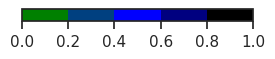

In [33]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define colors in the order you want: green, blue, red
colors = ["green", "blue", "black"]  # Hex codes or RGB tuples can also be used

# Create the colormap
cmap = LinearSegmentedColormap.from_list("GreenBlueRed", colors, N=5)  # N is the number of color bins

# Test the colormap
plt.figure(figsize=(8, 1))
plt.pcolormesh([[0, 1]], cmap=cmap)
plt.gca().set_visible(False)
plt.colorbar(orientation='horizontal')
plt.show()


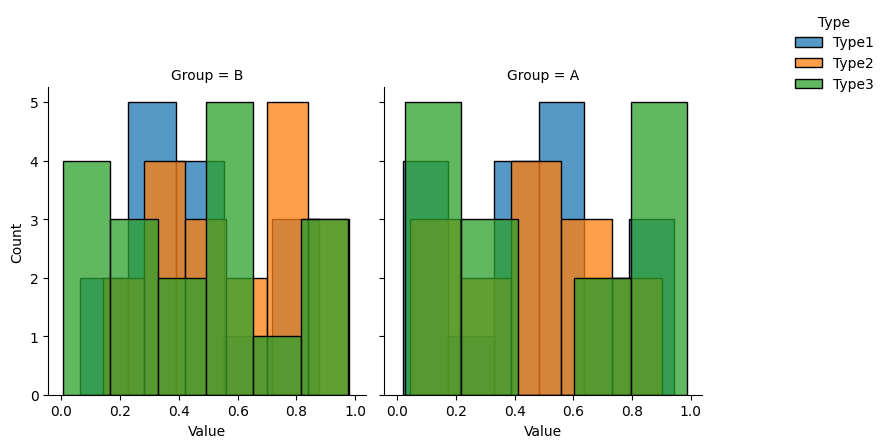

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(10)
data = pd.DataFrame({
    'Value': np.random.rand(100),
    'Type': np.random.choice(['Type1', 'Type2', 'Type3'], 100),
    'Group': np.random.choice(['A', 'B'], 100)
})

# Create the FacetGrid
g = sns.FacetGrid(data, col="Group", hue="Type", height=4, aspect=1)
g.map(sns.histplot, 'Value')

# Adding a legend outside the right side of the last plot
g.add_legend(title="Type", bbox_to_anchor=(1, 1), borderaxespad=0.)

# Adjust subplot params
g.fig.subplots_adjust(right=0.8)  # adjust the right parameter to fit the legend

plt.show()


   Patient ID  Bx index Bx ID  Voxel index   Dose (Gy)  MC trial num  \
0          P1         0  0_ID           10    0.000000             1   
1          P1         0  0_ID            5    0.000000             1   
2          P1         0  0_ID            1   55.555556             1   
3          P1         0  0_ID            2  100.000000             1   
4          P1         0  0_ID           10    0.000000             0   
..        ...       ...   ...          ...         ...           ...   
95         P1         0  0_ID            1   88.888889             1   
96         P1         0  0_ID           10    0.000000             1   
97         P1         0  0_ID            3   77.777778             0   
98         P1         0  0_ID            2   11.111111             1   
99         P1         0  0_ID            2   77.777778             1   

    Voxel begin (Z)  Voxel end (Z)  
0          1.237478       7.687025  
1          2.325667       6.838582  
2          4.414587     

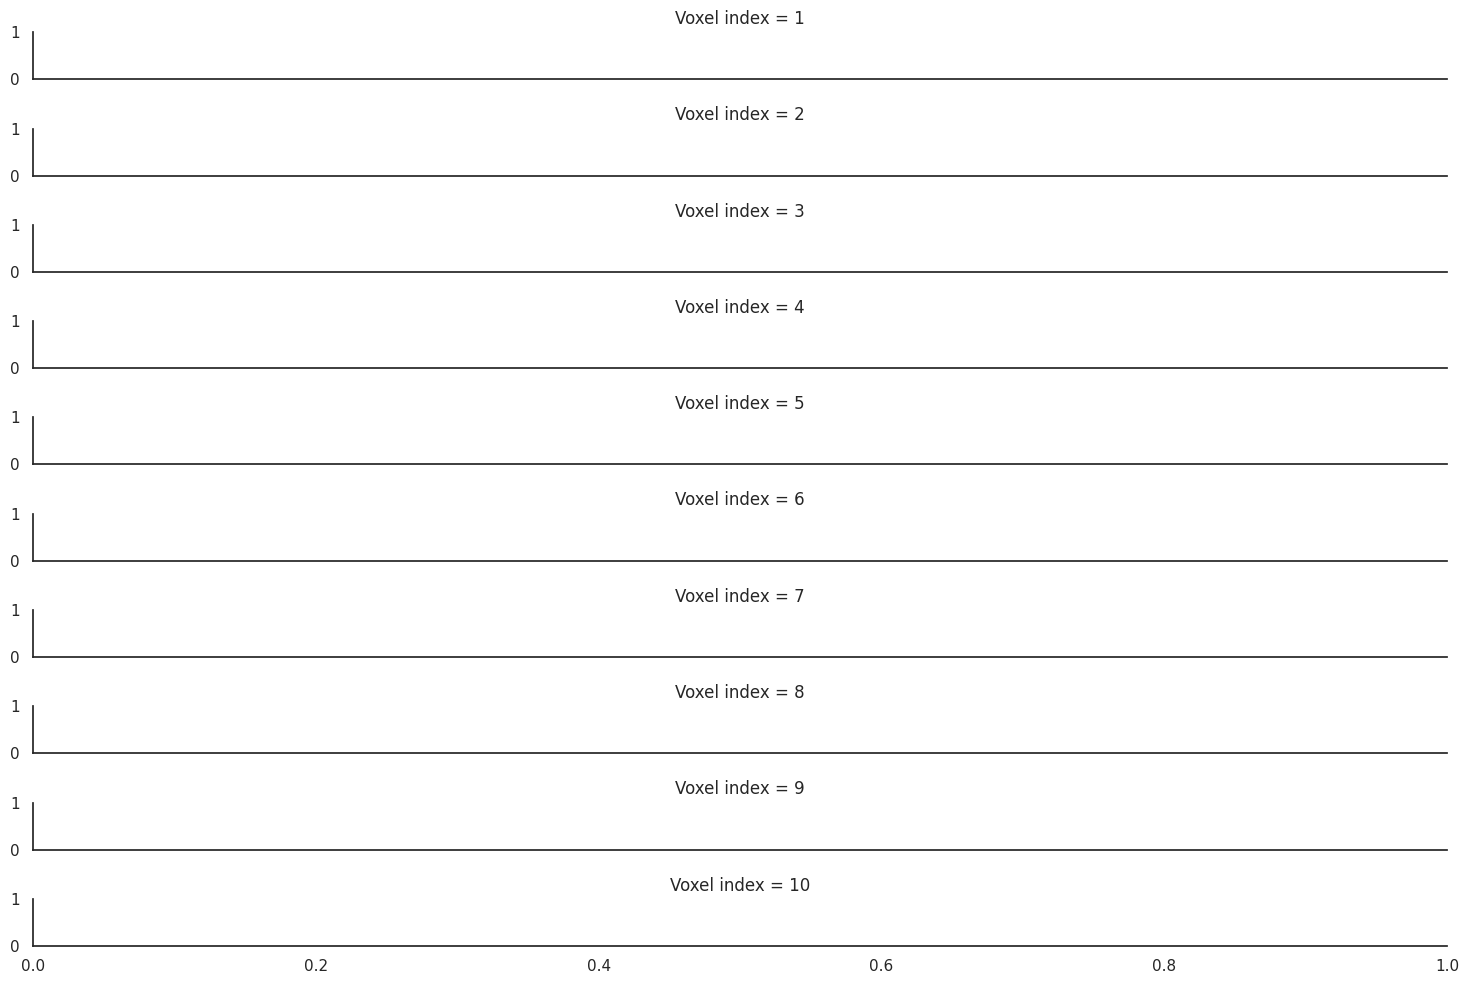

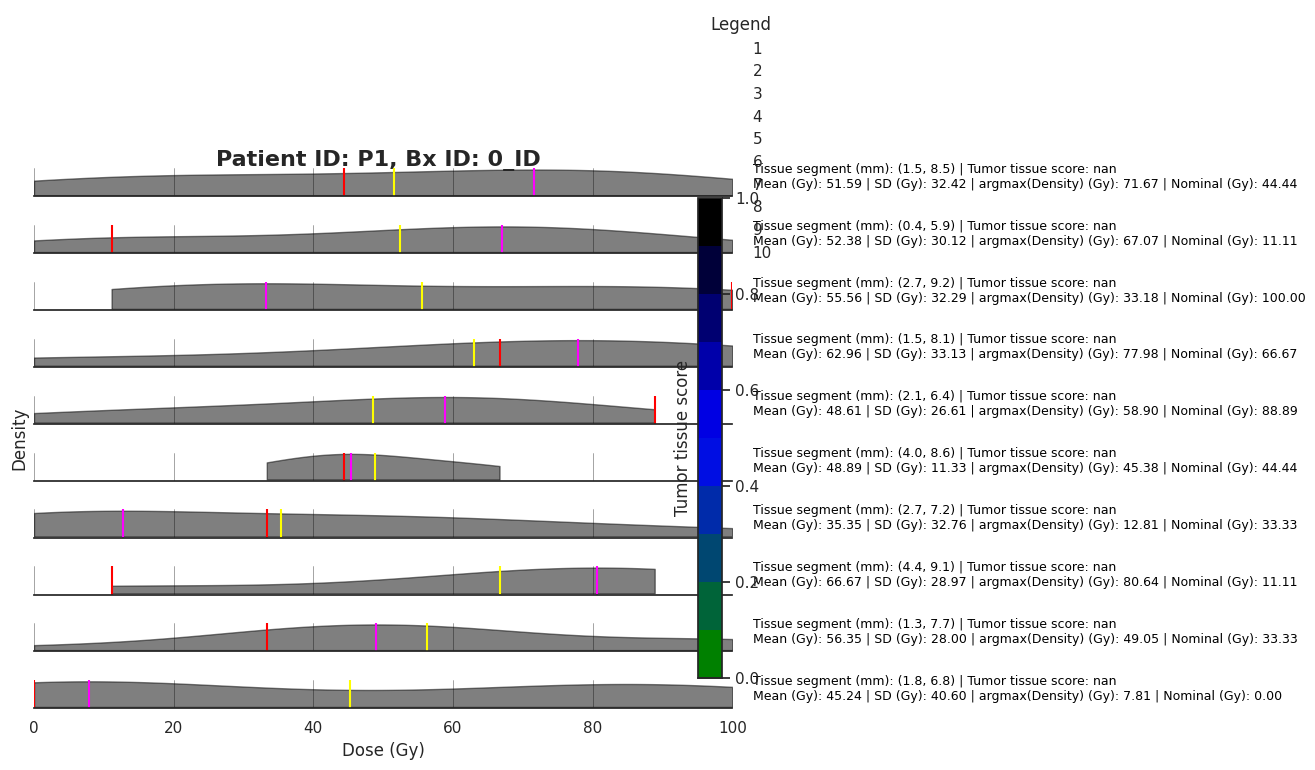

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import seaborn as sns
from scipy.stats import gaussian_kde





def production_plot_dose_ridge_plot_by_voxel_with_tissue_class_coloring_no_dose_cohort(sp_patient_dose_df,
                                                                                        sp_patient_binom_df,
                                                                                        svg_image_width,
                                                                                        svg_image_height,
                                                                                        dpi,
                                                                                        cancer_tissue_label
                                                                                        ):
    plt.ioff()
    #cohort_all_dose_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise dose distribution"]
    df_dose = sp_patient_dose_df

    #cohort_all_binom_data_by_trial_and_pt = master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Entire point-wise binom est distribution"]
    #df_tissue = cohort_all_binom_data_by_trial_and_pt[cohort_all_binom_data_by_trial_and_pt["Structure ROI"] == cancer_tissue_label]
    df_tissue = sp_patient_binom_df[sp_patient_binom_df["Structure ROI"] == cancer_tissue_label]

    # Define the colormap with a more scientific approach
    #cmap = plt.cm.RdYlGn
    # Invert the colormap
    #cmap = cmap.reversed()

    # Define colors in the order you want: green, blue, red
    colors = ["green", "blue", "black"]  # Hex codes or RGB tuples can also be used

    # Create the colormap
    cmap = LinearSegmentedColormap.from_list("GreenBlueRed", colors, N=10)  # N is the number of color bins

    norm = Normalize(vmin=0, vmax=1)
    sm = ScalarMappable(norm=norm, cmap=cmap)

    # Set the theme for seaborn plots
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


    # Define functions outside the loop
    def annotate_and_color(x, color, label, **kwargs):
        label_float = float(label)
        voxel_row = group[(group['Voxel index'] == label_float) & (group['MC trial num'] == 0)].iloc[0]
        nominal_dose = voxel_row['Dose (Gy)'] if not voxel_row.empty else 'N/A'

        mean = np.mean(x)
        std = np.std(x)
        kde = gaussian_kde(x)
        x_grid = np.linspace(x.min(), x.max(), 1000)
        max_density_dose = x_grid[np.argmax(kde(x_grid))]
        voxel_begin = voxel_row['Voxel begin (Z)']
        voxel_end = voxel_row['Voxel end (Z)']

        # find the kde density color based on the tissue class dataframe
        tissue_voxel = df_tissue[(df_tissue['Voxel index'] == label_float) & 
                                    (df_tissue['Patient ID'] == patient_id) & 
                                    (df_tissue['Bx index'] == bx_index)]
        binom_mean = tissue_voxel["Mean probability (binom est)"].mean()


        ax = plt.gca()
        annotation_text = f'Tissue segment (mm): ({voxel_begin:.1f}, {voxel_end:.1f}) | Tumor tissue score: {binom_mean:.2f}\nMean (Gy): {mean:.2f} | SD (Gy): {std:.2f} | argmax(Density) (Gy): {max_density_dose:.2f} | Nominal (Gy): {nominal_dose:.2f}'
        ax.text(1.03, 0.7, annotation_text, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, color=color, fontsize=9)

        # Plot vertical lines
        ax.axvline(x=max_density_dose, color='magenta', linestyle='-', label='Max Density (Gy)')
        ax.axvline(x=mean, color='yellow', linestyle='-', label='Mean (Gy)')
        ax.axvline(x=nominal_dose, color='red', linestyle='-', label='Nominal (Gy)')

        density_color = cmap(norm(binom_mean))

        # Rescale and plot the densities
        y_density = kde(x_grid)
        
        # Find the maximum y-density value and calculate the scaling factor
        max_density = np.max(y_density)
        scaling_factor = 1.0 / max_density if max_density > 0 else 1
        
        # Scale the density values
        scaled_density = y_density * scaling_factor
        
        # Plot the scaled density as filled area and overlay with a black ridgeline
        ax.fill_between(x_grid, scaled_density, alpha=0.5, color=density_color)


    # Calculate maximum x-axis limit from 95th quantile
    max_95th_quantile = df_dose.groupby('Voxel index')['Dose (Gy)'].quantile(0.95).max()

    # Calculate maximum x-axis limit from 95th quantile
    min_5th_quantile = df_dose.groupby('Voxel index')['Dose (Gy)'].quantile(0.05).min()

    # Main loop for plotting
    for (patient_id, bx_index), group in df_dose.groupby(['Patient ID', 'Bx index']):
        #bx_id = group['Bx ID'].iloc[0]
        group = group.reset_index(drop=True)
        print(group)
        bx_id = group.at[0,'Bx ID']

        unique_voxels = group['Voxel index'].unique()
        palette_black = {voxel: "black" for voxel in unique_voxels}

        # Setup for each subplot (FacetGrid)
        g = sns.FacetGrid(group, row="Voxel index", hue="Voxel index", aspect=15, height=1, palette=palette_black)
        g.map(annotate_and_color, "Dose (Gy)", df_tissue = df_tissue, patient_id = patient_id, bx_index = bx_index)

        # Set the x-axis limits uniformly
        g.set(xlim=(min_5th_quantile, max_95th_quantile))


        # Adjust layout to make room for the colorbar and text annotations
        g.fig.subplots_adjust(right=0.55, left= 0.07, top = 0.95, bottom = 0.05)
        cbar_ax = g.fig.add_axes([0.9, 0.1, 0.03, 0.8])
        g.fig.colorbar(sm, cax=cbar_ax, orientation='vertical')

        # Final adjustments
        g.set_titles("")
        g.set(yticks=[])
        g.despine(bottom=False, left=True)
        g.set_axis_labels("Dose (Gy)", "")
        g.fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=12)
        g.fig.text(0.87, 0.5, 'Tumor tissue score', va='center', rotation='vertical', fontsize=12)

        # Adjust subplot widths to 75% of figure
        for ax in g.axes.flat:
            #pos = ax.get_position()
            #ax.set_position([pos.x0, pos.y0, pos.width * 0.5, pos.height])
            
            # Setting major and minor ticks
            #ax.xaxis.set_major_locator(ticker.AutoLocator())  # Auto-set major ticks
            #ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))  # Set two minor ticks between major ticks

            # Optional: Customize tick appearance
            #ax.tick_params(axis='x', which='major', length=7, width=2, color='black', direction='inout')
            #ax.tick_params(axis='x', which='minor', length=4, color='gray')

            # Enable vertical grid for major and minor ticks
            ax.grid(True, which='both', axis='x', linestyle='-', color='gray', linewidth=0.5)
            ax.set_axisbelow(True)  # Ensures grid is behind plot elements

            #ax.xaxis.set_tick_params(which='both', labelbottom=True)
        #plt.grid(True)

        g.add_legend(title='Legend', bbox_to_anchor=(1, 1), borderaxespad=0.)


        # Title and figure size
        plt.suptitle(f'Patient ID: {patient_id}, Bx ID: {bx_id}', fontsize=16, fontweight='bold', y=0.98)
        dpi = 100  # DPI setting for saving the image

        # Calculate the figure size in inches for the desired dimensions in pixels
        figure_width_in = svg_image_width / dpi
        figure_height_in = svg_image_height / dpi

        g.fig.set_size_inches(figure_width_in, figure_height_in)

        plt.show()

        plt.close(g.fig)










# Simulated data
np.random.seed(10)
patients = ['P1']
bxs = [0]
voxels = np.arange(1, 11)
doses = np.linspace(0, 100, num=10)
mc_trial_num = [0, 1]  # Multiple MC trial numbers for complexity
structures = ['Prostate', 'Bladder']
bx_ids = [f"{bx}_ID" for bx in bxs]


sp_patient_dose_df = pd.DataFrame({
    'Patient ID': np.random.choice(patients, 100),
    'Bx index': np.random.choice(bxs, 100),
    'Bx ID': np.random.choice(bx_ids, 100),  # Assuming Bx ID is related to Bx index
    'Voxel index': np.random.choice(voxels, 100),
    'Dose (Gy)': np.random.choice(doses, 100),
    'MC trial num': np.random.choice(mc_trial_num, 100),
    'Voxel begin (Z)': np.random.uniform(0, 5, 100),
    'Voxel end (Z)': np.random.uniform(5, 10, 100)
})

sp_patient_binom_df = pd.DataFrame({
    'Patient ID': np.random.choice(patients, 20),
    'Bx index': np.random.choice(bxs, 20),
    'Voxel index': np.random.choice(voxels, 20),
    'Structure ROI': np.random.choice(structures, 20),
    'Mean probability (binom est)': np.random.rand(20)
})

# Example usage of your function
# Defining some variables to fit the function parameters
svg_image_width = 800
svg_image_height = 600
dpi = 100

# Call to the plotting function
# You would replace this with your actual function call
# For this example, assume function is named and implemented properly above
production_plot_dose_ridge_plot_by_voxel_with_tissue_class_coloring_no_dose_cohort(
    sp_patient_dose_df,
    sp_patient_binom_df,
    svg_image_width,
    svg_image_height,
    dpi,
    'DIL'
)




In [35]:
plt.ioff()

def plot_kernel_regression(x, y, label, color):
    try:
        kr = KernelReg(endog=y, exog=x, var_type='c')
        x_range = np.linspace(x.min(), x.max(), 500)  # Ensure this range aligns with your x-axis
        y_kr, _ = kr.fit(x_range)
        plt.plot(x_range, y_kr, label=label, color=color)
    except np.linalg.LinAlgError:
        important_info.add_text_line("SVD did not converge for nominal - Patient: {patientUID}, Bx ID: {bx_struct_roi}", live_display)
        plt.plot(x, y, label=label, color=color, linestyle='-', marker=None)

        
def plot_filled_quantiles(df, x_col, y_col, patientUID, bx_struct_roi):
    fig = plt.figure(figsize=(10, 6))  # Adjust size as needed

    # Calculate and plot kernel regressions for the desired quantiles
    quantiles = [0.05, 0.25, 0.75, 0.95]
    quantile_dfs = {}
    x_ranges = {}
    y_krs = {}
    
    for q in quantiles:
        q_df = df.groupby(x_col)[y_col].quantile(q).reset_index()
        quantile_dfs[q] = q_df
        x_range = np.linspace(df[x_col].min(), df[x_col].max(), 500)
        x_ranges[q] = x_range

        try:
            kr = KernelReg(endog=q_df[y_col], exog=q_df[x_col], var_type='c')
            y_kr, _ = kr.fit(x_range)
            y_krs[q] = y_kr
        except np.linalg.LinAlgError:
            important_info.add_text_line(f"SVD did not converge for quantile {q} - Patient: {patientUID}, Bx ID: {bx_struct_roi}", live_display)
            # Perform linear interpolation
            if not q_df.empty:
                y_kr = np.interp(x_range, q_df[x_col], q_df[y_col])
            else:
                y_kr = np.zeros_like(x_range)
            y_krs[q] = y_kr  # Use interpolated values as a fallback or all zeros if have an empty dataframe, which we should never have
        

    # Filling the areas between quantile regressions
    plt.fill_between(x_ranges[0.05], y_krs[0.05], y_krs[0.25], color='green', alpha=0.3)
    plt.fill_between(x_ranges[0.25], y_krs[0.25], y_krs[0.75], color='blue', alpha=0.3)
    plt.fill_between(x_ranges[0.75], y_krs[0.75], y_krs[0.95], color='green', alpha=0.3)

    # 3. Kernel regression for 'MC trial' == 0
    df_trial_0 = df[df['MC trial'] == 0]
    plot_kernel_regression(df_trial_0[x_col], df_trial_0[y_col], 'Nominal', 'red')

    # Scatter plot for the data points
    plt.scatter(df[x_col], df[y_col], color='grey', alpha=0.1, s=10)  # 's' controls size, 'alpha' controls transparency

    plt.title('Differential DVH Quantile Regression - '+ patientUID+ ' - '+bx_struct_roi)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    #handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(['5th-25th Percentile', '25th-75th Percentile', '75th-95th Percentile', 'Nominal'], loc='best', facecolor = 'white')
    #plt.legend(handles[:1], labels[:1], title="Legend", frameon=True, facecolor='white')
    plt.tight_layout()

    return fig


for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
    bx_struct_roi = specific_bx_structure["ROI"]
    differential_dvh_pandas_dataframe = specific_bx_structure["Output data frames"]["Differential DVH by MC trial"]

    df = differential_dvh_pandas_dataframe

    fig = plot_filled_quantiles(df, 'Dose bin center (Gy)', 'Percent volume', patientUID, bx_struct_roi)
    
    plt.show()

NameError: name 'pydicom_item' is not defined

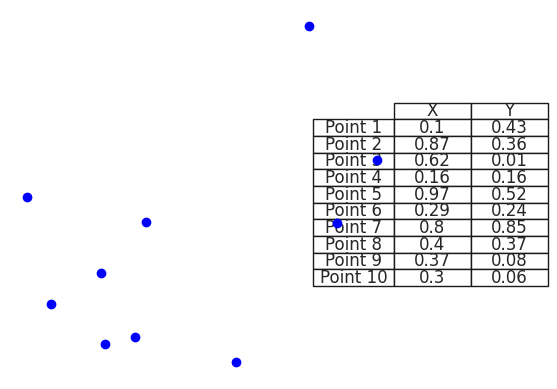

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.random.rand(10)
y = np.random.rand(10)
data = np.column_stack((x, y))

# Create a figure and a grid of subplots
fig, ax = plt.subplots()

# Create a scatter plot
scatter = ax.scatter(x, y, color='blue')

# Add a table at the right of the axes
column_labels = ["X", "Y"]
row_labels = ['Point {}'.format(i) for i in range(1, len(data) + 1)]
table_data = np.round(data, 2)  # Round data for display
table = plt.table(cellText=table_data, colWidths=[0.2]*2,
                  rowLabels=row_labels, colLabels=column_labels,
                  cellLoc = 'center', rowLoc = 'center',
                  loc='right')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, right=0.8)

# Optionally, turn off the axes to remove the Cartesian coordinates:
ax.axis('off')

# Show the plot with the table
plt.show()


In [42]:
import numpy as np
import pandas

# Sample data for testing
patientUID = '12345'
specific_bx_structure = {
    "ROI": "ROI_1",
    "Ref #": 42,
    "Simulated bool": True,
    "Simulated type": "Type_A",
    "Random uniformly sampled volume pts bx coord sys arr": np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
    "MC data: tumor tissue probability": {
        "Tumor tissue binomial est arr": np.array([0.1, 0.2, 0.3]),
        "Tumor tissue standard error arr": np.array([0.01, 0.02, 0.03]),
        "Tumor tissue confidence interval 95 arr": np.array([[0.05, 0.15, 0.25], [0.15, 0.25, 0.35]]),
        "Tumor tissue nominal arr": np.array([0, 1, 1])
    },
    "MC data: compiled sim results": {
        ("ROI_2", "extra"): {
            "Binomial estimator list": [0.4, 0.5, 0.6],
            "Standard error (containment) list": [0.04, 0.05, 0.06],
            "Confidence interval 95 (containment) list": [(0.35, 0.45), (0.45, 0.55), (0.55, 0.65)],
            "Nominal containment list": [1, 0, 1]
        }
    },
    "MC data: miss structure tissue probability": {
        "OAR tissue miss binomial est arr": np.array([0.7, 0.8, 0.9]),
        "OAR tissue standard error arr": np.array([0.07, 0.08, 0.09]),
        "OAR tissue miss confidence interval 95 2d arr": np.array([[0.65, 0.75, 0.85], [0.75, 0.85, 0.95]]),
        "OAR tissue miss nominal arr": np.array([0, 0, 1])
    }
}
specific_bx_structure_index = 0
structure_miss_probability_roi = "ROI_2"
cancer_tissue_label = "Cancer"
miss_structure_complement_label = "Miss Complement"
biopsy_z_voxel_length = 5

# Assuming add_voxel_columns_helper_func is defined and works the same in both functions
def add_voxel_columns_helper_func(df, biopsy_z_voxel_length, reference_dimension_col_name):
    # Assuming 'reference_dimension_col_name' column exists in the DataFrame and biopsy_z_voxel_length is a positive float
    df['Voxel index'] = (df[reference_dimension_col_name] // biopsy_z_voxel_length) + 1
    df['Voxel index'] = df['Voxel index'].astype(int)
    df['Voxel begin (Z)'] = (df['Voxel index'] - 1) * biopsy_z_voxel_length
    df['Voxel end (Z)'] = df['Voxel begin (Z)'] + biopsy_z_voxel_length

    # Adjust the last voxel's end if it exceeds the maximum 'Z (Bx frame)' value
    max_z = df[reference_dimension_col_name].max()
    df.loc[df['Voxel end (Z)'] > max_z, 'Voxel end (Z)'] = max_z

    return df

def tissue_probability_dataframe_builder_by_bx_pt(patientUID,
                                                  specific_bx_structure,
                                                  specific_bx_structure_index,
                                         structure_miss_probability_roi,
                                         cancer_tissue_label,
                                         miss_structure_complement_label,
                                         biopsy_z_voxel_length
                                         ):
    
    bx_struct_roi = specific_bx_structure["ROI"]
    bx_struct_refnum = specific_bx_structure['Ref #']
    bx_simulated_bool = specific_bx_structure['Simulated bool']
    bx_type = specific_bx_structure["Simulated type"]
    bx_points_bx_coords_sys_arr = specific_bx_structure["Random uniformly sampled volume pts bx coord sys arr"]
    bx_points_bx_coords_sys_arr_list = list(bx_points_bx_coords_sys_arr)
    bx_points_XY_bx_coords_sys_arr_list = list(bx_points_bx_coords_sys_arr[:,0:2])
    pt_radius_bx_coord_sys = np.linalg.norm(bx_points_XY_bx_coords_sys_arr_list, axis = 1)

    tumor_tissue_bionomial_est_arr = specific_bx_structure["MC data: tumor tissue probability"]["Tumor tissue binomial est arr"]
    tumor_tissue_bionomial_se_arr = specific_bx_structure["MC data: tumor tissue probability"]["Tumor tissue standard error arr"]
    tumor_tissue_conf_int_2d_arr = specific_bx_structure["MC data: tumor tissue probability"]["Tumor tissue confidence interval 95 arr"]
    tumor_tissue_nominal_containment_arr = specific_bx_structure["MC data: tumor tissue probability"]["Tumor tissue nominal arr"]
    tumor_tissue_conf_int_lower_arr = tumor_tissue_conf_int_2d_arr[0,:]
    tumor_tissue_conf_int_upper_arr = tumor_tissue_conf_int_2d_arr[1,:]

    pt_radius_point_wise_for_pd_data_frame_list = pt_radius_bx_coord_sys.tolist()
    X_point_wise_for_pd_data_frame_list = bx_points_bx_coords_sys_arr[:,0].tolist()
    Y_point_wise_for_pd_data_frame_list = bx_points_bx_coords_sys_arr[:,1].tolist()
    axial_Z_point_wise_for_pd_data_frame_list = bx_points_bx_coords_sys_arr[:,2].tolist()
    binom_est_point_wise_for_pd_data_frame_list = tumor_tissue_bionomial_est_arr.tolist()
    std_err_point_wise_for_pd_data_frame_list = tumor_tissue_bionomial_se_arr.tolist()
    ROI_name_point_wise_for_pd_data_frame_list = [cancer_tissue_label]*len(bx_points_bx_coords_sys_arr_list)
    nominal_point_wise_for_pd_data_frame_list = tumor_tissue_nominal_containment_arr.tolist()
    binom_est_lower_CI_point_wise_for_pd_data_frame_list = tumor_tissue_conf_int_lower_arr.tolist()
    binom_est_upper_CI_point_wise_for_pd_data_frame_list = tumor_tissue_conf_int_upper_arr.tolist()
            
    for containment_structure_key_tuple, containment_structure_dict in specific_bx_structure['MC data: compiled sim results'].items():
        containment_structure_ROI = containment_structure_key_tuple[0]
        if structure_miss_probability_roi not in containment_structure_ROI:
            continue
        
        ROI_name_point_wise_for_pd_data_frame_list = ROI_name_point_wise_for_pd_data_frame_list + [containment_structure_ROI]*len(bx_points_bx_coords_sys_arr_list)
        containment_structure_binom_est_list = containment_structure_dict["Binomial estimator list"]
        containment_structure_stand_err_list = containment_structure_dict["Standard error (containment) list"]
        containment_structure_CI_list_of_tuples = containment_structure_dict["Confidence interval 95 (containment) list"]
        conf_int_lower_list = [upper_lower_tup[0] for upper_lower_tup in containment_structure_CI_list_of_tuples]
        conf_int_upper_list = [upper_lower_tup[1] for upper_lower_tup in containment_structure_CI_list_of_tuples]
        containment_structure_nominal_list = containment_structure_dict["Nominal containment list"]
        binom_est_point_wise_for_pd_data_frame_list = binom_est_point_wise_for_pd_data_frame_list + containment_structure_binom_est_list
        std_err_point_wise_for_pd_data_frame_list = std_err_point_wise_for_pd_data_frame_list + containment_structure_stand_err_list
        binom_est_lower_CI_point_wise_for_pd_data_frame_list = binom_est_lower_CI_point_wise_for_pd_data_frame_list + conf_int_lower_list
        binom_est_upper_CI_point_wise_for_pd_data_frame_list = binom_est_upper_CI_point_wise_for_pd_data_frame_list + conf_int_upper_list
        nominal_point_wise_for_pd_data_frame_list = nominal_point_wise_for_pd_data_frame_list + containment_structure_nominal_list
        
        pt_radius_point_wise_for_pd_data_frame_list = pt_radius_point_wise_for_pd_data_frame_list + pt_radius_bx_coord_sys.tolist()
        axial_Z_point_wise_for_pd_data_frame_list = axial_Z_point_wise_for_pd_data_frame_list + bx_points_bx_coords_sys_arr[:,2].tolist() 
        X_point_wise_for_pd_data_frame_list = X_point_wise_for_pd_data_frame_list + bx_points_bx_coords_sys_arr[:,0].tolist() 
        Y_point_wise_for_pd_data_frame_list = Y_point_wise_for_pd_data_frame_list + bx_points_bx_coords_sys_arr[:,1].tolist() 


    # include complemenet of miss structure        
    specific_bx_structure_relative_OAR_dict = specific_bx_structure["MC data: miss structure tissue probability"]
    miss_structure_binom_est_list = specific_bx_structure_relative_OAR_dict["OAR tissue miss binomial est arr"].tolist()
    miss_structure_standard_err_list = specific_bx_structure_relative_OAR_dict["OAR tissue standard error arr"].tolist()
    miss_structure_CI_2d_arr = specific_bx_structure_relative_OAR_dict["OAR tissue miss confidence interval 95 2d arr"]
    miss_structure_CI_lower_list = miss_structure_CI_2d_arr[0,:].tolist()
    miss_structure_CI_upper_list = miss_structure_CI_2d_arr[1,:].tolist()
    miss_structure_nominal_list = specific_bx_structure_relative_OAR_dict["OAR tissue miss nominal arr"].tolist()

    ROI_name_point_wise_for_pd_data_frame_list = ROI_name_point_wise_for_pd_data_frame_list + [miss_structure_complement_label]*len(bx_points_bx_coords_sys_arr_list)
    pt_radius_point_wise_for_pd_data_frame_list = pt_radius_point_wise_for_pd_data_frame_list + pt_radius_bx_coord_sys.tolist()
    axial_Z_point_wise_for_pd_data_frame_list = axial_Z_point_wise_for_pd_data_frame_list + bx_points_bx_coords_sys_arr[:,2].tolist() 
    X_point_wise_for_pd_data_frame_list = X_point_wise_for_pd_data_frame_list + bx_points_bx_coords_sys_arr[:,0].tolist() 
    Y_point_wise_for_pd_data_frame_list = Y_point_wise_for_pd_data_frame_list + bx_points_bx_coords_sys_arr[:,1].tolist()
    binom_est_point_wise_for_pd_data_frame_list = binom_est_point_wise_for_pd_data_frame_list + miss_structure_binom_est_list
    std_err_point_wise_for_pd_data_frame_list = std_err_point_wise_for_pd_data_frame_list + miss_structure_standard_err_list
    binom_est_lower_CI_point_wise_for_pd_data_frame_list = binom_est_lower_CI_point_wise_for_pd_data_frame_list + miss_structure_CI_lower_list
    binom_est_upper_CI_point_wise_for_pd_data_frame_list = binom_est_upper_CI_point_wise_for_pd_data_frame_list + miss_structure_CI_upper_list
    nominal_point_wise_for_pd_data_frame_list = nominal_point_wise_for_pd_data_frame_list + miss_structure_nominal_list
        
    containment_output_dict_by_MC_trial_for_pandas_data_frame = {"Patient ID": patientUID,
                                                                "Bx structure ROI": bx_struct_roi,
                                                                "Bx refnum": bx_struct_refnum,
                                                                "Bx index": specific_bx_structure_index,
                                                                "Bx sim bool": bx_simulated_bool,
                                                                "Bx type": bx_type,
                                                                "Structure ROI": ROI_name_point_wise_for_pd_data_frame_list, 
                                                                "R (Bx frame)": pt_radius_point_wise_for_pd_data_frame_list,
                                                                "X (Bx frame)": X_point_wise_for_pd_data_frame_list, 
                                                                "Y (Bx frame)": Y_point_wise_for_pd_data_frame_list,  
                                                                "Z (Bx frame)": axial_Z_point_wise_for_pd_data_frame_list, 
                                                                "Mean probability (binom est)": binom_est_point_wise_for_pd_data_frame_list, 
                                                                "STD err": std_err_point_wise_for_pd_data_frame_list,
                                                                "Nominal containment": nominal_point_wise_for_pd_data_frame_list,
                                                                "CI lower vals": binom_est_lower_CI_point_wise_for_pd_data_frame_list,
                                                                "CI upper vals": binom_est_upper_CI_point_wise_for_pd_data_frame_list
                                                                }

    containment_output_by_MC_trial_pandas_data_frame = pandas.DataFrame.from_dict(data=containment_output_dict_by_MC_trial_for_pandas_data_frame)

    reference_dimension_col_name = "Z (Bx frame)"
    containment_output_by_MC_trial_pandas_data_frame = add_voxel_columns_helper_func(containment_output_by_MC_trial_pandas_data_frame, biopsy_z_voxel_length, reference_dimension_col_name)

    return containment_output_dict_by_MC_trial_for_pandas_data_frame, containment_output_by_MC_trial_pandas_data_frame

# Original function call
original_data, original_df = tissue_probability_dataframe_builder_by_bx_pt(patientUID,
                                                                          specific_bx_structure,
                                                                          specific_bx_structure_index,
                                                                          structure_miss_probability_roi,
                                                                          cancer_tissue_label,
                                                                          miss_structure_complement_label,
                                                                          biopsy_z_voxel_length)

# Improved function call
def improved_tissue_probability_dataframe_builder_by_bx_pt(patientUID,
                                                           specific_bx_structure,
                                                           specific_bx_structure_index,
                                                           structure_miss_probability_roi,
                                                           cancer_tissue_label,
                                                           miss_structure_complement_label,
                                                           biopsy_z_voxel_length):
    # Extract necessary fields from specific_bx_structure
    bx_points_arr = specific_bx_structure["Random uniformly sampled volume pts bx coord sys arr"]
    pt_radius_bx_coord_sys = np.linalg.norm(bx_points_arr[:, 0:2], axis=1)
    
    tumor_data = specific_bx_structure["MC data: tumor tissue probability"]
    tumor_conf_int_2d_arr = tumor_data["Tumor tissue confidence interval 95 arr"]
    
    # Prepare lists for DataFrame
    def prepare_list(arr, repeated_label, length):
        if isinstance(arr, np.ndarray):
            arr = arr.tolist()
        return arr + [repeated_label] * length

    
    data = {
        "Patient ID": patientUID,
        "Bx structure ROI": specific_bx_structure["ROI"],
        "Bx refnum": specific_bx_structure['Ref #'],
        "Bx index": specific_bx_structure_index,
        "Bx sim bool": specific_bx_structure['Simulated bool'],
        "Bx type": specific_bx_structure["Simulated type"],
        "Structure ROI": prepare_list([cancer_tissue_label] * len(bx_points_arr), miss_structure_complement_label, len(bx_points_arr)),
        "R (Bx frame)": pt_radius_bx_coord_sys.tolist() * 2,
        "X (Bx frame)": np.tile(bx_points_arr[:, 0], 2).tolist(),
        "Y (Bx frame)": np.tile(bx_points_arr[:, 1], 2).tolist(),
        "Z (Bx frame)": np.tile(bx_points_arr[:, 2], 2).tolist(),
        "Mean probability (binom est)": tumor_data["Tumor tissue binomial est arr"].tolist() + specific_bx_structure["MC data: miss structure tissue probability"]["OAR tissue miss binomial est arr"].tolist(),
        "STD err": tumor_data["Tumor tissue standard error arr"].tolist() + specific_bx_structure["MC data: miss structure tissue probability"]["OAR tissue standard error arr"].tolist(),
        "Nominal containment": tumor_data["Tumor tissue nominal arr"].tolist() + specific_bx_structure["MC data: miss structure tissue probability"]["OAR tissue miss nominal arr"].tolist(),
        "CI lower vals": tumor_conf_int_2d_arr[0, :].tolist() + specific_bx_structure["MC data: miss structure tissue probability"]["OAR tissue miss confidence interval 95 2d arr"][0, :].tolist(),
        "CI upper vals": tumor_conf_int_2d_arr[1, :].tolist() + specific_bx_structure["MC data: miss structure tissue probability"]["OAR tissue miss confidence interval 95 2d arr"][1, :].tolist(),
    }
    
    for key_tuple, value_dict in specific_bx_structure['MC data: compiled sim results'].items():
        if structure_miss_probability_roi not in key_tuple[0]:
            continue
        
        length = len(bx_points_arr)
        data["Structure ROI"] += [key_tuple[0]] * length
        data["R (Bx frame)"] += pt_radius_bx_coord_sys.tolist()
        data["X (Bx frame)"] += bx_points_arr[:, 0].tolist()
        data["Y (Bx frame)"] += bx_points_arr[:, 1].tolist()
        data["Z (Bx frame)"] += bx_points_arr[:, 2].tolist()
        data["Mean probability (binom est)"] += value_dict["Binomial estimator list"]
        data["STD err"] += value_dict["Standard error (containment) list"]
        data["Nominal containment"] += value_dict["Nominal containment list"]
        data["CI lower vals"] += [ci[0] for ci in value_dict["Confidence interval 95 (containment) list"]]
        data["CI upper vals"] += [ci[1] for ci in value_dict["Confidence interval 95 (containment) list"]]
    
    dataframe = pandas.DataFrame.from_dict(data)
    reference_dimension_col_name = "Z (Bx frame)"
    dataframe = add_voxel_columns_helper_func(dataframe, biopsy_z_voxel_length, reference_dimension_col_name)
    
    return data, dataframe

improved_data, improved_df = improved_tissue_probability_dataframe_builder_by_bx_pt(patientUID,
                                                                                     specific_bx_structure,
                                                                                     specific_bx_structure_index,
                                                                                     structure_miss_probability_roi,
                                                                                     cancer_tissue_label,
                                                                                     miss_structure_complement_label,
                                                                                     biopsy_z_voxel_length)

# Sort both dataframes by all columns
sorted_original_df = original_df.sort_values(by=list(original_df.columns)).reset_index(drop=True)
sorted_improved_df = improved_df.sort_values(by=list(improved_df.columns)).reset_index(drop=True)

# Compare the sorted dataframes
dataframes_equal = sorted_original_df.equals(sorted_improved_df)
print(f"Dataframes are equal: {dataframes_equal}")

# If needed, also sort and compare the dictionaries
original_df_sorted_dict = {k: sorted(v) if isinstance(v, list) else v for k, v in original_data.items()}
improved_df_sorted_dict = {k: sorted(v) if isinstance(v, list) else v for k, v in improved_data.items()}

data_dicts_equal = original_df_sorted_dict == improved_df_sorted_dict
print(f"Data dictionaries are equal: {data_dicts_equal}")

print(sorted_original_df)
print(sorted_improved_df)



Dataframes are equal: True
Data dictionaries are equal: True
  Patient ID Bx structure ROI  Bx refnum  Bx index  Bx sim bool Bx type  \
0      12345            ROI_1         42         0         True  Type_A   
1      12345            ROI_1         42         0         True  Type_A   
2      12345            ROI_1         42         0         True  Type_A   
3      12345            ROI_1         42         0         True  Type_A   
4      12345            ROI_1         42         0         True  Type_A   
5      12345            ROI_1         42         0         True  Type_A   
6      12345            ROI_1         42         0         True  Type_A   
7      12345            ROI_1         42         0         True  Type_A   
8      12345            ROI_1         42         0         True  Type_A   

     Structure ROI  R (Bx frame)  X (Bx frame)  Y (Bx frame)  Z (Bx frame)  \
0           Cancer      2.236068             1             2             3   
1           Cancer      6.403124

In [47]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {
    'Structure ROI': ['Brain', 'Heart', 'Liver', 'Brain', 'Heart', 'Liver', 'Brain', 'Heart', 'Liver'],
    'Mean probability (binom est)': np.random.rand(9)  # Random probabilities
}

df = pd.DataFrame(data)

# Display the DataFrame
print("Original DataFrame:")
print(df)

# Group by 'Structure ROI' and calculate the mean of 'Mean probability (binom est)'
global_mean_binom_est_series = df.groupby('Structure ROI')['Mean probability (binom est)'].mean()

# Display the result
print("\nMean probability by Structure ROI:")
print(global_mean_binom_est_series)

sp_bx_global_containment_stats_dict = {"Patient ID": 'hello',
                              "Bx ID": global_mean_binom_est_series
                              }
            
sp_bx_global_containment_stats_dataframe = pandas.DataFrame(sp_bx_global_containment_stats_dict).reset_index()

print(sp_bx_global_containment_stats_dataframe)


Original DataFrame:
  Structure ROI  Mean probability (binom est)
0         Brain                      0.460937
1         Heart                      0.471747
2         Liver                      0.638476
3         Brain                      0.819904
4         Heart                      0.715221
5         Liver                      0.102133
6         Brain                      0.975404
7         Heart                      0.668828
8         Liver                      0.740196

Mean probability by Structure ROI:
Structure ROI
Brain    0.752082
Heart    0.618598
Liver    0.493602
Name: Mean probability (binom est), dtype: float64
  Structure ROI Patient ID     Bx ID
0         Brain      hello  0.752082
1         Heart      hello  0.618598
2         Liver      hello  0.493602


In [49]:
import pandas as pd
import numpy as np

# Mock data similar to your "containment_output_by_bx_pt_pandas_data_frame"
data = {
    'Structure ROI': ['Brain', 'Brain', 'Heart', 'Liver', 'Liver', 'Liver'],
    'Mean probability (binom est)': np.random.rand(6),
    'Nominal containment': np.random.rand(6)
}

df = pd.DataFrame(data)

# Compute statistics similar to your code
mean_prob = df.groupby('Structure ROI')['Mean probability (binom est)'].mean()
max_prob = df.groupby('Structure ROI')['Mean probability (binom est)'].max()
min_prob = df.groupby('Structure ROI')['Mean probability (binom est)'].min()

# Example additional data, analogous to patientUID, etc.
patientUID = "12345"
bx_struct_roi = "Sample ROI"
bx_struct_refnum = 67890

# Creating the dictionary
stats_dict = {
    "Patient ID": patientUID,
    "Bx ID": bx_struct_roi,
    "Bx refnum": bx_struct_refnum,
    'Global mean binom est': mean_prob, 
    'Global max binom est': max_prob, 
    'Global min binom est': min_prob
}

# Creating the DataFrame
stats_df = pd.DataFrame(stats_dict).reset_index(drop=False)
print(df)
print(stats_df)


  Structure ROI  Mean probability (binom est)  Nominal containment
0         Brain                      0.412001             0.638008
1         Brain                      0.811914             0.815628
2         Heart                      0.486666             0.635785
3         Liver                      0.174660             0.499203
4         Liver                      0.379487             0.390757
5         Liver                      0.278657             0.973767
  Structure ROI Patient ID       Bx ID  Bx refnum  Global mean binom est  \
0         Brain      12345  Sample ROI      67890               0.611957   
1         Heart      12345  Sample ROI      67890               0.486666   
2         Liver      12345  Sample ROI      67890               0.277601   

   Global max binom est  Global min binom est  
0              0.811914              0.412001  
1              0.486666              0.486666  
2              0.379487              0.174660  


In [51]:
import pandas as pd
import numpy as np

# Sample data simulating your original data structure
data = {
    'Relative structure ROI': ['Heart', 'Heart', 'Brain', 'Brain', 'Liver', 'Liver'],
    'Relative structure type': ['Type1', 'Type1', 'Type2', 'Type2', 'Type1', 'Type2'],
    'Relative structure index': [1, 1, 2, 2, 1, 2],
    'Binomial estimator': np.random.rand(6),
    'Nominal': np.random.rand(6)
}

df = pd.DataFrame(data)

# Conversion of 'Nominal' from categorical to float if needed (simulated here as already float)
# df['Nominal'] = df['Nominal'].astype(float)  # Assuming conversion needed

# Group by and calculate statistics
grouped = df.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])
mean_binom = grouped['Binomial estimator'].mean()
std_dev_binom = grouped['Binomial estimator'].std()
std_err_binom = grouped['Binomial estimator'].sem()
max_binom = grouped['Binomial estimator'].max()
min_binom = grouped['Binomial estimator'].min()
mean_nominal = grouped['Nominal'].mean()
std_dev_nominal = grouped['Nominal'].std()
std_err_nominal = grouped['Nominal'].sem()
print(std_err_nominal)

# Creating dictionary similar to yours
stats_dict = {
    'Patient ID': '12345',
    'Bx ID': 'Sample ROI',
    'Bx refnum': '67890',
    'Simulated bool': True,
    'Simulated type': 'TypeX',
    'Global mean binom est': mean_binom, 
    'Global max binom est': max_binom, 
    'Global min binom est': min_binom, 
    'Global standard deviation binom est': std_dev_binom,
    'Global standard error binom est': std_err_binom,
    "Global mean nominal": mean_nominal,
    "Global standard deviation nominal": std_dev_nominal,
    "Global standard error nominal": std_err_nominal
}

# Convert dictionary to DataFrame
result_df = pd.DataFrame(stats_dict).reset_index(drop=False)
print(df)
print(result_df)


Relative structure ROI  Relative structure type  Relative structure index
Brain                   Type2                    2                           0.184598
Heart                   Type1                    1                           0.275056
Liver                   Type1                    1                                NaN
                        Type2                    2                                NaN
Name: Nominal, dtype: float64
  Relative structure ROI Relative structure type  Relative structure index  \
0                  Heart                   Type1                         1   
1                  Heart                   Type1                         1   
2                  Brain                   Type2                         2   
3                  Brain                   Type2                         2   
4                  Liver                   Type1                         1   
5                  Liver                   Type2                         2   

   Bi

In [ ]:
import dataframe_builders
import misc_tools

def global_scores_by_specific_structure_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key):
    
    cohort_global_tissue_structure_dataframe = pandas.DataFrame()


    for patientUID,pydicom_item in master_structure_reference_dict.items():

        sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = pandas.DataFrame()

        for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
            
            bx_struct_roi = specific_bx_structure["ROI"]
            num_sampled_bx_pts = specific_bx_structure["Num sampled bx pts"]
            simulated_bool = specific_bx_structure["Simulated bool"]
            bx_type = specific_bx_structure["Simulated type"]
            bx_refnum = specific_bx_structure["Ref #"]

            containment_output_by_rel_structure_pandas_data_frame = specific_bx_structure["MC data: compiled sim results dataframe"] 
 
            containment_output_by_rel_structure_pandas_data_frame = misc_tools.convert_categorical_columns(containment_output_by_rel_structure_pandas_data_frame, ['Nominal'], [float])

            global_mean_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].mean()
            global_mean_binom_est_std_dev_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].std()
            global_mean_binom_est_std_err_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].sem()
            global_max_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].max()
            global_min_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].min()
            global_mean_nominal_containment_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].mean()
            global_mean_nominal_containment_std_dev_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].std()
            global_mean_nominal_containment_std_err_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].sem()
            
            sp_bx_global_containment_stats_dict = {"Patient ID": patientUID,
                              "Bx ID": bx_struct_roi,
                              "Bx index": specific_bx_structure_index,
                              "Bx refnum": bx_refnum,
                              "Simulated bool": simulated_bool,
                              "Simulated type": bx_type,
                              'Global mean binom est': global_mean_binom_est_series, 
                              'Global max binom est': global_max_binom_est_series, 
                              'Global min binom est': global_min_binom_est_series, 
                              'Global standard deviation binom est': global_mean_binom_est_std_dev_series,
                              'Global standard error binom est': global_mean_binom_est_std_err_series,
                              "Global mean nominal": global_mean_nominal_containment_series,
                              "Global standard deviation nominal": global_mean_nominal_containment_std_dev_series,
                              "Global standard error nominal": global_mean_nominal_containment_std_err_series
                              }
            
            # The reset_index(drop = False) line is crucial to retain the columns that are used in the groupby commands above
            sp_bx_global_containment_stats_dataframe = pandas.DataFrame(sp_bx_global_containment_stats_dict).reset_index(drop = False)

            sp_bx_global_containment_stats_dataframe[["Global CI 95 tuple binom est (lower)","Global CI 95 tuple binom est (upper)"]] = sp_bx_global_containment_stats_dataframe.apply(dataframe_builders.normal_CI_estimator_by_dataframe_row, args=('Global mean binom est', 'Global standard error binom est'), axis=1).tolist()
            sp_bx_global_containment_stats_dataframe[["Global CI 95 tuple nominal (lower)","Global CI 95 tuple nominal (upper)"]] = sp_bx_global_containment_stats_dataframe.apply(dataframe_builders.normal_CI_estimator_by_dataframe_row, args=("Global mean nominal", "Global standard error nominal"), axis=1).tolist()


            sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = pandas.concat([sp_patient_all_biopsies_global_containment_scores_by_tissue_structure,sp_bx_global_containment_stats_dataframe], ignore_index = True)
        


        # Move the Patient ID column to the beginning of the dataframe
        column_to_move = 'Patient ID'
        sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = sp_patient_all_biopsies_global_containment_scores_by_tissue_structure[[column_to_move] + [col for col in sp_patient_all_biopsies_global_containment_scores_by_tissue_structure.columns if col != column_to_move]]

        sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = dataframe_builders.convert_columns_to_categorical_and_downcast(sp_patient_all_biopsies_global_containment_scores_by_tissue_structure, threshold=0.25)


        pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Tissue class - Global tissue by structure statistics"] = sp_patient_all_biopsies_global_containment_scores_by_tissue_structure

        cohort_global_tissue_structure_dataframe = pandas.concat([cohort_global_tissue_structure_dataframe,sp_patient_all_biopsies_global_containment_scores_by_tissue_structure], ignore_index = True)
    
    cohort_global_tissue_structure_dataframe = dataframe_builders.convert_columns_to_categorical_and_downcast(cohort_global_tissue_structure_dataframe, threshold=0.25)


    return cohort_global_tissue_structure_dataframe

cohort_test = global_scores_by_specific_structure_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key)


In [ ]:
import dataframe_builders
import misc_tools

def global_scores_by_specific_structure_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key):
    
    cohort_global_tissue_structure_dataframe = pandas.DataFrame()


    for patientUID,pydicom_item in master_structure_reference_dict.items():

        sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = pandas.DataFrame()

        for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
            if specific_bx_structure_index == 0:
                continue
            bx_struct_roi = specific_bx_structure["ROI"]
            num_sampled_bx_pts = specific_bx_structure["Num sampled bx pts"]
            simulated_bool = specific_bx_structure["Simulated bool"]
            bx_type = specific_bx_structure["Simulated type"]
            bx_refnum = specific_bx_structure["Ref #"]

            containment_output_by_rel_structure_pandas_data_frame = specific_bx_structure["MC data: compiled sim results dataframe"] 

            containment_output_by_rel_structure_pandas_data_frame = misc_tools.convert_categorical_columns(containment_output_by_rel_structure_pandas_data_frame, ['Nominal'], [float])    
            #containment_output_by_rel_structure_pandas_data_frame = misc_tools.convert_categorical_columns(containment_output_by_rel_structure_pandas_data_frame, ['Nominal', "Relative structure index",'Relative structure ROI', 'Relative structure type'], [float, int, str, str])
            containment_output_by_rel_structure_pandas_data_frame['Relative structure ROI'] = containment_output_by_rel_structure_pandas_data_frame['Relative structure ROI'].cat.remove_unused_categories()
            containment_output_by_rel_structure_pandas_data_frame['Relative structure type'] = containment_output_by_rel_structure_pandas_data_frame['Relative structure type'].cat.remove_unused_categories()
            containment_output_by_rel_structure_pandas_data_frame['Relative structure index'] = containment_output_by_rel_structure_pandas_data_frame['Relative structure index'].cat.remove_unused_categories()
    
            global_mean_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].mean()
            global_mean_binom_est_std_dev_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].std()
            global_mean_binom_est_std_err_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].sem()
            global_max_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].max()
            global_min_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].min()
            global_mean_nominal_containment_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].mean()
            global_mean_nominal_containment_std_dev_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].std()
            global_mean_nominal_containment_std_err_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].sem()
            
            sp_bx_global_containment_stats_dict = {"Patient ID": patientUID,
                              "Bx ID": bx_struct_roi,
                              "Bx index": specific_bx_structure_index,
                              "Bx refnum": bx_refnum,
                              "Simulated bool": simulated_bool,
                              "Simulated type": bx_type,
                              'Global mean binom est': global_mean_binom_est_series, 
                              'Global max binom est': global_max_binom_est_series, 
                              'Global min binom est': global_min_binom_est_series, 
                              'Global standard deviation binom est': global_mean_binom_est_std_dev_series,
                              'Global standard error binom est': global_mean_binom_est_std_err_series,
                              "Global mean nominal": global_mean_nominal_containment_series,
                              "Global standard deviation nominal": global_mean_nominal_containment_std_dev_series,
                              "Global standard error nominal": global_mean_nominal_containment_std_err_series
                              }
            
            # The reset_index(drop = False) line is crucial to retain the columns that are used in the groupby commands above
            sp_bx_global_containment_stats_dataframe = pandas.DataFrame(sp_bx_global_containment_stats_dict).reset_index(drop = False)

            print(global_mean_nominal_containment_std_err_series)
            #print(containment_output_by_rel_structure_pandas_data_frame)
            #print(containment_output_by_rel_structure_pandas_data_frame[['Relative structure ROI', 'Relative structure type', 'Relative structure index']].isna().sum())
            #print(containment_output_by_rel_structure_pandas_data_frame[(containment_output_by_rel_structure_pandas_data_frame['Relative structure ROI'] == 'Prostate') & (containment_output_by_rel_structure_pandas_data_frame['Relative structure type'] == 'DIL ref')])
            #unique_combinations = containment_output_by_rel_structure_pandas_data_frame[['Relative structure ROI', 'Relative structure type', 'Relative structure index']].drop_duplicates()
            #print(unique_combinations)

            # print(containment_output_by_rel_structure_pandas_data_frame.dtypes)

            # print(containment_output_by_rel_structure_pandas_data_frame['Relative structure ROI'].cat.categories)
            # print(containment_output_by_rel_structure_pandas_data_frame['Relative structure type'].cat.categories)
            # print(containment_output_by_rel_structure_pandas_data_frame['Relative structure index'].cat.categories)


            break


global_scores_by_specific_structure_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key)


In [ ]:
import dataframe_builders
import misc_tools

def global_scores_by_specific_structure_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key):
    
    cohort_global_tissue_structure_dataframe = pandas.DataFrame()


    for patientUID,pydicom_item in master_structure_reference_dict.items():

        sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = pandas.DataFrame()

        for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
            
            bx_struct_roi = specific_bx_structure["ROI"]
            num_sampled_bx_pts = specific_bx_structure["Num sampled bx pts"]
            simulated_bool = specific_bx_structure["Simulated bool"]
            bx_type = specific_bx_structure["Simulated type"]
            bx_refnum = specific_bx_structure["Ref #"]

            containment_output_by_rel_structure_pandas_data_frame = specific_bx_structure["MC data: compiled sim results dataframe"] 

            # Note it is very important to convert grouping columns back to appropriate dtypes before grouping especially when grouping multiple columns simultaneously as this 
            # ensures that erronous grouping combinations are not produced!
            #containment_output_by_rel_structure_pandas_data_frame = misc_tools.convert_categorical_columns(containment_output_by_rel_structure_pandas_data_frame, ['Nominal'], [float])
            containment_output_by_rel_structure_pandas_data_frame = misc_tools.convert_categorical_columns(containment_output_by_rel_structure_pandas_data_frame, ['Nominal', "Relative structure index",'Relative structure ROI', 'Relative structure type'], [float, int, str, str])

            global_mean_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].mean()
            global_mean_binom_est_std_dev_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].std()
            global_mean_binom_est_std_err_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].sem()
            global_max_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].max()
            global_min_binom_est_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Binomial estimator'].min()
            global_mean_nominal_containment_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].mean()
            global_mean_nominal_containment_std_dev_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].std()
            global_mean_nominal_containment_std_err_series = containment_output_by_rel_structure_pandas_data_frame.groupby(['Relative structure ROI', 'Relative structure type', "Relative structure index"])['Nominal'].sem()
            
            sp_bx_global_containment_stats_dict = {"Patient ID": patientUID,
                              "Bx ID": bx_struct_roi,
                              "Bx index": specific_bx_structure_index,
                              "Bx refnum": bx_refnum,
                              "Simulated bool": simulated_bool,
                              "Simulated type": bx_type,
                              'Global mean binom est': global_mean_binom_est_series, 
                              'Global max binom est': global_max_binom_est_series, 
                              'Global min binom est': global_min_binom_est_series, 
                              'Global standard deviation binom est': global_mean_binom_est_std_dev_series,
                              'Global standard error binom est': global_mean_binom_est_std_err_series,
                              "Global mean nominal": global_mean_nominal_containment_series,
                              "Global standard deviation nominal": global_mean_nominal_containment_std_dev_series,
                              "Global standard error nominal": global_mean_nominal_containment_std_err_series
                              }
            
            # The reset_index(drop = False) line is crucial to retain the columns that are used in the groupby commands above
            sp_bx_global_containment_stats_dataframe = pandas.DataFrame(sp_bx_global_containment_stats_dict).reset_index(drop = False)

            sp_bx_global_containment_stats_dataframe[["Global CI 95 tuple binom est (lower)","Global CI 95 tuple binom est (upper)"]] = sp_bx_global_containment_stats_dataframe.apply(dataframe_builders.normal_CI_estimator_by_dataframe_row, args=('Global mean binom est', 'Global standard error binom est'), axis=1).tolist()
            sp_bx_global_containment_stats_dataframe[["Global CI 95 tuple nominal (lower)","Global CI 95 tuple nominal (upper)"]] = sp_bx_global_containment_stats_dataframe.apply(dataframe_builders.normal_CI_estimator_by_dataframe_row, args=("Global mean nominal", "Global standard error nominal"), axis=1).tolist()


            sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = pandas.concat([sp_patient_all_biopsies_global_containment_scores_by_tissue_structure,sp_bx_global_containment_stats_dataframe], ignore_index = True)
            
            containment_output_by_rel_structure_pandas_data_frame = dataframe_builders.convert_columns_to_categorical_and_downcast(containment_output_by_rel_structure_pandas_data_frame, threshold=0.25)

            specific_bx_structure["MC data: compiled sim results dataframe"] = containment_output_by_rel_structure_pandas_data_frame


        # Move the Patient ID column to the beginning of the dataframe
        column_to_move = 'Patient ID'
        sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = sp_patient_all_biopsies_global_containment_scores_by_tissue_structure[[column_to_move] + [col for col in sp_patient_all_biopsies_global_containment_scores_by_tissue_structure.columns if col != column_to_move]]

        sp_patient_all_biopsies_global_containment_scores_by_tissue_structure = dataframe_builders.convert_columns_to_categorical_and_downcast(sp_patient_all_biopsies_global_containment_scores_by_tissue_structure, threshold=0.25)


        pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Tissue class - Global tissue by structure statistics"] = sp_patient_all_biopsies_global_containment_scores_by_tissue_structure

        cohort_global_tissue_structure_dataframe = pandas.concat([cohort_global_tissue_structure_dataframe,sp_patient_all_biopsies_global_containment_scores_by_tissue_structure], ignore_index = True)
    
    cohort_global_tissue_structure_dataframe = dataframe_builders.convert_columns_to_categorical_and_downcast(cohort_global_tissue_structure_dataframe, threshold=0.25)


    return cohort_global_tissue_structure_dataframe


cohort_test = global_scores_by_specific_structure_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key)

In [56]:
import pandas as pd

# Example pandas Series
data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# Calculating a single quantile
# For example, the median, which is the 0.5 quantile
median = data.quantile(0.5)
print("Median:", median)

# Calculating multiple quantiles, such as the quartiles
quartiles = data.quantile([0.25, 0.5, 0.75])
print(type(quartiles))
print("Quartiles:")
print(quartiles[0.25])

# Calculating other quantiles, like the 90th percentile
ninety_percentile = data.quantile(0.9)
print("90th Percentile:", ninety_percentile)


Median: 5.5
<class 'pandas.core.series.Series'>
Quartiles:
3.25
90th Percentile: 9.1


In [ ]:
import dataframe_builders
import misc_tools
import math_funcs
from scipy.stats import gaussian_kde


def find_max_kde_dose(dose_series, num_eval_pts = 1000):
    if len(dose_series) > 1:  # KDE requires more than one data point
        kde = gaussian_kde(dose_series)
        xgrid = np.linspace(dose_series.min(), dose_series.max(), num_eval_pts)
        max_density_dose = xgrid[np.argmax(kde(xgrid))]

    else:
        max_density_dose = dose_series.at[dose_series.index[0]] if not dose_series.empty else np.nan  # Handle cases with one or zero points
    
    return max_density_dose

def global_dosimetry_values_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key):
    
    cohort_global_dosimetry_dataframe = pandas.DataFrame()

    for patientUID,pydicom_item in master_structure_reference_dict.items():

        sp_patient_all_biopsies_global_dosimetry = pandas.DataFrame()

        for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
            
            bx_struct_roi = specific_bx_structure["ROI"]
            num_sampled_bx_pts = specific_bx_structure["Num sampled bx pts"]
            simulated_bool = specific_bx_structure["Simulated bool"]
            bx_type = specific_bx_structure["Simulated type"]
            bx_refnum = specific_bx_structure["Ref #"]

            sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame = specific_bx_structure['Output data frames']['Point-wise dose output by MC trial number'] 

            # Note it is very important to convert grouping columns back to appropriate dtypes before grouping especially when grouping multiple columns simultaneously as this 
            # ensures that erronous grouping combinations are not produced!
            #containment_output_by_rel_structure_pandas_data_frame = misc_tools.convert_categorical_columns(containment_output_by_rel_structure_pandas_data_frame, ['Nominal'], [float])
            sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame = misc_tools.convert_categorical_columns(sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame, ['Dose (Gy)'], [float])
            sp_bx_point_wise_dose_output_nominal_pandas_data_frame = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame[sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['MC trial num'] == 0]

            global_mean_dose_series = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['Dose (Gy)'].mean()
            global_dose_std_dev_series = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['Dose (Gy)'].std()
            global_dose_std_err_in_mean_series = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['Dose (Gy)'].sem()
            global_max_dose_series = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['Dose (Gy)'].max()
            global_min_dose_series = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['Dose (Gy)'].min()
            global_min_dose_series = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['Dose (Gy)'].min()
            global_quantiles_dose_series = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['Dose (Gy)'].quantile([0.05,0.25,0.5,0.75,0.95])
            
            global_nominal_mean_dose_series = sp_bx_point_wise_dose_output_nominal_pandas_data_frame['Dose (Gy)'].mean()
            global_nominal_dose_std_dev_series = sp_bx_point_wise_dose_output_nominal_pandas_data_frame['Dose (Gy)'].std()
            global_nominal_dose_std_err_in_mean_series = sp_bx_point_wise_dose_output_nominal_pandas_data_frame['Dose (Gy)'].sem()
            global_nominal_max_dose_series = sp_bx_point_wise_dose_output_nominal_pandas_data_frame['Dose (Gy)'].max()
            global_nominal_min_dose_series = sp_bx_point_wise_dose_output_nominal_pandas_data_frame['Dose (Gy)'].min()

            global_max_density_dose = find_max_kde_dose(sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['Dose (Gy)'], num_eval_pts = 1000)

            global_nominal_max_density_dose = find_max_kde_dose(sp_bx_point_wise_dose_output_nominal_pandas_data_frame['Dose (Gy)'], num_eval_pts = 1000)
            
            sp_bx_global_dose_stats_dict = {"Patient ID": patientUID,
                                            "Bx ID": bx_struct_roi,
                                            "Bx index": specific_bx_structure_index,
                                            "Bx refnum": bx_refnum,
                                            "Simulated bool": simulated_bool,
                                            "Simulated type": bx_type,
                                            'Global max density dose': global_max_density_dose,
                                            'Global mean dose': global_mean_dose_series, 
                                            'Global max dose': global_max_dose_series, 
                                            'Global min dose': global_min_dose_series, 
                                            'Global standard deviation dose': global_dose_std_dev_series,
                                            'Global standard error dose': global_dose_std_err_in_mean_series,
                                            'Global q05 dose': global_quantiles_dose_series[0.05],
                                            'Global q25 dose': global_quantiles_dose_series[0.25],
                                            'Global q50 dose': global_quantiles_dose_series[0.5],
                                            'Global q75 dose': global_quantiles_dose_series[0.75],
                                            'Global q95 dose': global_quantiles_dose_series[0.95],
                                            'Global nominal max density dose': global_nominal_max_density_dose,
                                            'Global nominal mean dose': global_nominal_mean_dose_series, 
                                            'Global nominal max dose': global_nominal_max_dose_series, 
                                            'Global nominal min dose': global_nominal_min_dose_series, 
                                            'Global nominal standard deviation dose': global_nominal_dose_std_dev_series,
                                            'Global nominal standard error dose': global_nominal_dose_std_err_in_mean_series,
                                            }
            
            sp_bx_global_dose_stats_dataframe = pandas.DataFrame(sp_bx_global_dose_stats_dict, index=[0])

            sp_bx_global_dose_stats_dataframe[["Global CI 95 tuple dose (lower)","Global CI 95 tuple dose (upper)"]] = sp_bx_global_dose_stats_dataframe.apply(dataframe_builders.normal_CI_estimator_by_dataframe_row, args=('Global mean dose', 'Global standard error dose'), axis=1).tolist()
            sp_bx_global_dose_stats_dataframe[["Global CI 95 tuple nominal dose (lower)","Global CI 95 tuple nominal dose (upper)"]] = sp_bx_global_dose_stats_dataframe.apply(dataframe_builders.normal_CI_estimator_by_dataframe_row, args=('Global nominal mean dose', 'Global nominal standard error dose'), axis=1).tolist()


            sp_patient_all_biopsies_global_dosimetry = pandas.concat([sp_patient_all_biopsies_global_dosimetry,sp_bx_global_dose_stats_dataframe], ignore_index = True)
            
            sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame = dataframe_builders.convert_columns_to_categorical_and_downcast(sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame, threshold=0.25)

            specific_bx_structure['Output data frames']['Point-wise dose output by MC trial number']  = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame

        sp_patient_all_biopsies_global_dosimetry = dataframe_builders.convert_columns_to_categorical_and_downcast(sp_patient_all_biopsies_global_dosimetry, threshold=0.25)

        pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Dosimetry - Global dosimetry statistics"] = sp_patient_all_biopsies_global_dosimetry

        cohort_global_dosimetry_dataframe = pandas.concat([cohort_global_dosimetry_dataframe,sp_patient_all_biopsies_global_dosimetry], ignore_index = True)
    
    cohort_global_dosimetry_dataframe = dataframe_builders.convert_columns_to_categorical_and_downcast(cohort_global_dosimetry_dataframe, threshold=0.25)

    return cohort_global_dosimetry_dataframe

cohort_global_dosimetry_dataframe = global_dosimetry_values_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key)
                
master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Global dosimetry"] = cohort_global_dosimetry_dataframe

In [ ]:

import dataframe_builders
import misc_tools
import math_funcs
from scipy.stats import gaussian_kde

def global_dosimetry_by_voxel_values_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key):
    
    cohort_global_dosimetry_dataframe = pandas.DataFrame()

    for patientUID,pydicom_item in master_structure_reference_dict.items():

        sp_patient_all_biopsies_global_dosimetry = pandas.DataFrame()

        for specific_bx_structure_index, specific_bx_structure in enumerate(pydicom_item[bx_ref]):
            
            bx_struct_roi = specific_bx_structure["ROI"]
            num_sampled_bx_pts = specific_bx_structure["Num sampled bx pts"]
            simulated_bool = specific_bx_structure["Simulated bool"]
            bx_type = specific_bx_structure["Simulated type"]
            bx_refnum = specific_bx_structure["Ref #"]

            sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame = specific_bx_structure['Output data frames']['Point-wise dose output by MC trial number'] 

            # Note it is very important to convert grouping columns back to appropriate dtypes before grouping especially when grouping multiple columns simultaneously as this 
            # ensures that erronous grouping combinations are not produced!
            #containment_output_by_rel_structure_pandas_data_frame = misc_tools.convert_categorical_columns(containment_output_by_rel_structure_pandas_data_frame, ['Nominal'], [float])
            sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame = misc_tools.convert_categorical_columns(sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame, ['Dose (Gy)', 'Voxel index'], [float, int])
            sp_bx_point_wise_dose_output_nominal_pandas_data_frame = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame[sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame['MC trial num'] == 0]
            
            sp_bx_global_grouped_df = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame.groupby(['Voxel index'])
            sp_bx_nominal_global_grouped_df = sp_bx_point_wise_dose_output_nominal_pandas_data_frame.groupby(['Voxel index'])

            global_by_voxel_mean_dose_series = sp_bx_global_grouped_df['Dose (Gy)'].mean()
            global_by_voxel_dose_std_dev_series = sp_bx_global_grouped_df['Dose (Gy)'].std()
            global_by_voxel_dose_std_err_in_mean_series = sp_bx_global_grouped_df['Dose (Gy)'].sem()
            global_by_voxel_max_dose_series = sp_bx_global_grouped_df['Dose (Gy)'].max()
            global_by_voxel_min_dose_series = sp_bx_global_grouped_df['Dose (Gy)'].min()
            global_by_voxel_min_dose_series = sp_bx_global_grouped_df['Dose (Gy)'].min()
            global_by_voxel_quantiles_dose_series = sp_bx_global_grouped_df['Dose (Gy)'].quantile([0.05,0.25,0.5,0.75,0.95])
            global_by_voxel_quantiles_dose_series_unstacked = global_by_voxel_quantiles_dose_series.unstack()


            print(global_by_voxel_quantiles_dose_series_unstacked)
            
            global_by_voxel_nominal_mean_dose_series = sp_bx_nominal_global_grouped_df['Dose (Gy)'].mean()
            global_by_voxel_nominal_dose_std_dev_series = sp_bx_nominal_global_grouped_df['Dose (Gy)'].std()
            global_by_voxel_nominal_dose_std_err_in_mean_series = sp_bx_nominal_global_grouped_df['Dose (Gy)'].sem()
            global_by_voxel_nominal_max_dose_series = sp_bx_nominal_global_grouped_df['Dose (Gy)'].max()
            global_by_voxel_nominal_min_dose_series = sp_bx_nominal_global_grouped_df['Dose (Gy)'].min()
            
            global_by_voxel_max_density_dose_series = sp_bx_global_grouped_df['Dose (Gy)'].apply(find_max_kde_dose, num_eval_pts=1000)

            sp_bx_global_dose_stats_dict = {"Patient ID": patientUID,
                                            "Bx ID": bx_struct_roi,
                                            "Bx index": specific_bx_structure_index,
                                            "Bx refnum": bx_refnum,
                                            "Simulated bool": simulated_bool,
                                            "Simulated type": bx_type,
                                            'Global max density dose': global_by_voxel_max_density_dose_series,
                                            'Global mean dose': global_by_voxel_mean_dose_series, 
                                            'Global max dose': global_by_voxel_max_dose_series, 
                                            'Global min dose': global_by_voxel_min_dose_series, 
                                            'Global standard deviation dose': global_by_voxel_dose_std_dev_series,
                                            'Global standard error dose': global_by_voxel_dose_std_err_in_mean_series,
                                            'Global q05 dose': global_by_voxel_quantiles_dose_series_unstacked[0.05],
                                            'Global q25 dose': global_by_voxel_quantiles_dose_series_unstacked[0.25],
                                            'Global q50 dose': global_by_voxel_quantiles_dose_series_unstacked[0.5],
                                            'Global q75 dose': global_by_voxel_quantiles_dose_series_unstacked[0.75],
                                            'Global q95 dose': global_by_voxel_quantiles_dose_series_unstacked[0.95],
                                            'Global nominal mean dose': global_by_voxel_nominal_mean_dose_series, 
                                            'Global nominal max dose': global_by_voxel_nominal_max_dose_series, 
                                            'Global nominal min dose': global_by_voxel_nominal_min_dose_series, 
                                            'Global nominal standard deviation dose': global_by_voxel_nominal_dose_std_dev_series,
                                            'Global nominal standard error dose': global_by_voxel_nominal_dose_std_err_in_mean_series,
                                            }
            
            # the reset_index(drop=False) method is crucial to maintain the voxel index column which was used as a grouping column above
            sp_bx_global_dose_stats_dataframe = pandas.DataFrame(sp_bx_global_dose_stats_dict).reset_index(drop=False)

            sp_bx_global_dose_stats_dataframe[["Global CI 95 tuple dose (lower)","Global CI 95 dose est (upper)"]] = sp_bx_global_dose_stats_dataframe.apply(dataframe_builders.normal_CI_estimator_by_dataframe_row, args=('Global mean dose', 'Global standard error dose'), axis=1).tolist()
            sp_bx_global_dose_stats_dataframe[["Global CI 95 tuple nominal dose (lower)","Global CI 95 tuple nominal dose (upper)"]] = sp_bx_global_dose_stats_dataframe.apply(dataframe_builders.normal_CI_estimator_by_dataframe_row, args=('Global nominal mean dose', 'Global nominal standard error dose'), axis=1).tolist()


            sp_patient_all_biopsies_global_dosimetry = pandas.concat([sp_patient_all_biopsies_global_dosimetry,sp_bx_global_dose_stats_dataframe], ignore_index = True)
            
            sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame = dataframe_builders.convert_columns_to_categorical_and_downcast(sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame, threshold=0.25)

            specific_bx_structure['Output data frames']['Point-wise dose output by MC trial number']  = sp_bx_point_wise_dose_output_by_mc_trial_pandas_data_frame

        sp_patient_all_biopsies_global_dosimetry = dataframe_builders.convert_columns_to_categorical_and_downcast(sp_patient_all_biopsies_global_dosimetry, threshold=0.25)

        pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Dosimetry - Global dosimetry by voxel statistics"] = sp_patient_all_biopsies_global_dosimetry

        cohort_global_dosimetry_dataframe = pandas.concat([cohort_global_dosimetry_dataframe,sp_patient_all_biopsies_global_dosimetry], ignore_index = True)
    
    cohort_global_dosimetry_dataframe = dataframe_builders.convert_columns_to_categorical_and_downcast(cohort_global_dosimetry_dataframe, threshold=0.25)

    return cohort_global_dosimetry_dataframe


cohort_global_dosimetry_by_voxel_dataframe = global_dosimetry_by_voxel_values_dataframe_builder(master_structure_reference_dict,
                                                    bx_ref,
                                                    all_ref_key)
                
master_cohort_patient_data_and_dataframes["Dataframes"]["Cohort: Global dosimetry by voxel"] = cohort_global_dosimetry_by_voxel_dataframe

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from sklearn.metrics import mean_squared_error
from matplotlib.patches import Ellipse
import seaborn as sns

def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 3):
        ax.add_patch(Ellipse(xy = position, width = nsig * width, height = nsig * height, angle = angle, **kwargs))


def production_plot_transverse_accuracy_with_marginals_and_gaussian_fit_global_tissue_score_coloring(cohort_nearest_dils_dataframe,
                                                                                                     cohort_global_tissue_class_dataframe):

    plt.ioff()
    df = cohort_nearest_dils_dataframe
    df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

    # Rename columns to match df_tissue for a successful merge
    df_filtered.rename(columns={
        'Relative DIL ID': 'Relative structure ROI',
        'Relative struct type': 'Relative structure type',
        'Relative DIL index': 'Relative structure index'
    }, inplace=True)

    df_tissue = cohort_global_tissue_class_dataframe
    
    # Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
    df_filtered = df_filtered.merge(
        df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
        on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
        how='left'
    )

    # Define the color mapping based on 'Global mean binom est'
    colors = ["green", "blue", "black"]  # Adjust colors as needed
    cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

    # Normalize the 'Global mean binom est' values for color mapping
    norm = Normalize(vmin=0, vmax=1)
    sm = ScalarMappable(norm=norm, cmap=cmap)

    # Apply color mapping
    df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))



    # Extract values and colors
    x = df_filtered['Bx (X, DIL centroid frame)'].values
    y = df_filtered['Bx (Y, DIL centroid frame)'].values
    colors = df_filtered['Color'].values

    # Calculate means and standard deviations
    mean_x, std_x = np.mean(x), np.std(x)
    mean_y, std_y = np.mean(y), np.std(y)
    mean = [mean_x, mean_y]
    cov = np.cov(x, y)
    rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

    # Setup main plot and marginal plots
    fig = plt.figure(figsize=(10, 10))
    gs = fig.add_gridspec(5, 5)
    ax_main = fig.add_subplot(gs[1:4, 0:3])
    ax_xDist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
    ax_yDist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
    cbar_ax = fig.add_axes([0.8, 0.3, 0.05, 0.4])  # Adjust color bar position

    # Main scatter plot
    ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
    draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
    ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
    ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

    # Adding color bar
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
    cbar.set_label('DIL specific tumor tissue score')

    # Marginal distributions
    sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
    sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

    # Dotted lines at 0 for marginal distributions
    ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
    ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

    # Formatting and cleanup for marginals
    ax_xDist.tick_params(axis="x", labelbottom=False)
    ax_yDist.tick_params(axis="y", labelleft=False)

    # Plot mean as a black cross
    ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)
    #plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering

    # Annotations for mean, std, and RMSE
    ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
              transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
              bbox=dict(facecolor='white', alpha=0.5))
    ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
              transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
              bbox=dict(facecolor='white', alpha=0.5))
    #ax_yDist.text(0.7, 0.95, r'Mean: {mean_y:.2f}\nStd: {std_y:.2f}', transform=ax_yDist.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5), rotation=-90)

    ax_main.set_xlabel('(L/R) (mm)')
    ax_main.set_ylabel('(A/P) (mm)')

    ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')
    plt.ion()
    plt.show()

cohort_nearest_dils_dataframe = master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: Nearest DILs to each biopsy']
cohort_global_tissue_class_dataframe = master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (structure)']

production_plot_transverse_accuracy_with_marginals_and_gaussian_fit_global_tissue_score_coloring(cohort_nearest_dils_dataframe,
                                                                                                     cohort_global_tissue_class_dataframe
                                        )

In [57]:
def bx_nearest_dils_dataframe_builder(master_structure_reference_dict,
                                       structs_referenced_list,
                                       all_ref_key,
                                       bx_ref
                                       ):
    
    cohort_nearest_dils_dataframe = pandas.DataFrame()
    for patientUID,pydicom_item in master_structure_reference_dict.items():
        sp_patient_relative_dil_dataframe_list = []
        for structs in structs_referenced_list:
            for specific_structure_index, specific_structure in enumerate(pydicom_item[structs]):
                if structs == bx_ref:
                    structureID = specific_structure["ROI"]
                    structure_reference_number = specific_structure["Ref #"]
                    bx_simulated_type = specific_structure["Simulated type"]
                    bx_simulated_bool = specific_structure["Simulated bool"]
                    bx_structure_info = (patientUID,
                                                structureID,
                                                bx_ref,
                                                structure_reference_number,
                                                specific_structure_index
                                                )

                
                    dil_distance_dict = specific_structure["Nearest DILs info dict"]
                    target_dil_by_centroid_dict = specific_structure['Target DIL by centroid dict']
                    target_dil_by_surfaces_dict = specific_structure['Target DIL by surfaces dict']
                    bx_location_in_prostate_dict = specific_structure['Bx location in prostate dict']
                    bx_AP_LR_SI_location_in_prostate_dict = bx_location_in_prostate_dict['Bx position in prostate']
                    bx_relative_prostate_info_dict = bx_location_in_prostate_dict['Relative prostate info']
                    bx_relative_prostate_id = bx_relative_prostate_info_dict['Structure ID']
                    bx_relative_prostate_struct_type = bx_relative_prostate_info_dict['Struct ref type']
                    bx_LR_pos = bx_AP_LR_SI_location_in_prostate_dict['LR']
                    bx_AP_pos = bx_AP_LR_SI_location_in_prostate_dict['AP']
                    bx_SI_pos = bx_AP_LR_SI_location_in_prostate_dict['SI']




                    patientUID_list = []
                    structureID_list = []
                    sim_type_list = []
                    sim_bool_list = []
                    bx_ref_list = []
                    structure_reference_number_list = []
                    specific_structure_index_list = []
                    dil_structureID_list = []
                    dil_ref_list = []
                    dil_structure_reference_number_list = []
                    specific_dil_structure_index_list = []
                    bx_centroid_vec_list = []
                    dil_centroid_vec_list =[]
                    vector_cent_to_cent_list = []
                    x_cent_to_cent_list = []
                    y_cent_to_cent_list = []
                    z_cent_to_cent_list = []
                    x_dil_centroid_frame_list = []
                    y_dil_centroid_frame_list = []
                    z_dil_centroid_frame_list = []
                    dist_cent_to_cent_list = []
                    nn_dist_surf_to_surf_list = []
                    target_dil_by_centroids_list = []
                    target_dil_by_surfaces_list = []
                    bx_relative_reference_prostate_structure_type_list = []
                    bx_relative_reference_prostate_id_list = []
                    bx_position_in_prostate_LR_list = []
                    bx_position_in_prostate_AP_list = []
                    bx_position_in_prostate_SI_list = []
                    
                    patientUID = bx_structure_info[0]
                    structureID = bx_structure_info[1]
                    bx_ref = bx_structure_info[2]
                    structure_reference_number = bx_structure_info[3]
                    specific_structure_index = bx_structure_info[4]
                                                                

                    for dil_structure_info, dil_distance_info in dil_distance_dict.items():

                        dil_structureID = dil_structure_info[0]
                        dil_ref = dil_structure_info[1]
                        dil_structure_reference_number = dil_structure_info[2]
                        specific_dil_structure_index = dil_structure_info[3]

                        # using tuples instead of storing numpy arrays in dataframe cells because numpy arrays are unhashable!
                        bx_centroid_vec = tuple(dil_distance_info["Bx centroid vector"])
                        dil_centroid_vec = tuple(dil_distance_info["DIL centroid vector"])
                        vector_cent_to_cent = tuple(dil_distance_info["Vector DIL centroid - BX centroid"])
                        x_cent_to_cent = dil_distance_info["X to DIL centroid"]
                        y_cent_to_cent = dil_distance_info["Y to DIL centroid"]
                        z_cent_to_cent = dil_distance_info["Z to DIL centroid"]
                        x_dil_centroid_frame = -dil_distance_info["X to DIL centroid"]
                        y_dil_centroid_frame = -dil_distance_info["Y to DIL centroid"]
                        z_dil_centroid_frame = -dil_distance_info["Z to DIL centroid"]
                        dist_cent_to_cent = dil_distance_info["Distance DIL centroid - BX centroid"]
                        nn_dist_surf_to_surf = dil_distance_info["Shortest distance from BX surface to DIL surface"]

                        if dil_structure_info in target_dil_by_centroid_dict:
                            target_dil_by_centroid_bool = True
                        else:
                            target_dil_by_centroid_bool = False

                        if dil_structure_info in target_dil_by_surfaces_dict:
                            target_dil_by_surface_bool = True
                        else:
                            target_dil_by_surface_bool = False

                        patientUID_list.append(patientUID)
                        structureID_list.append(structureID)
                        sim_type_list.append(bx_simulated_type)
                        sim_bool_list.append(bx_simulated_bool)
                        bx_ref_list.append(bx_ref)
                        structure_reference_number_list.append(structure_reference_number)
                        specific_structure_index_list.append(specific_structure_index)
                        dil_structureID_list.append(dil_structureID)
                        dil_ref_list.append(dil_ref)
                        dil_structure_reference_number_list.append(dil_structure_reference_number)
                        specific_dil_structure_index_list.append(specific_dil_structure_index)
                        bx_centroid_vec_list.append(bx_centroid_vec)
                        dil_centroid_vec_list.append(dil_centroid_vec)
                        vector_cent_to_cent_list.append(vector_cent_to_cent)
                        x_cent_to_cent_list.append(x_cent_to_cent)
                        y_cent_to_cent_list.append(y_cent_to_cent)
                        z_cent_to_cent_list.append(z_cent_to_cent)
                        x_dil_centroid_frame_list.append(x_dil_centroid_frame)
                        y_dil_centroid_frame_list.append(y_dil_centroid_frame)
                        z_dil_centroid_frame_list.append(z_dil_centroid_frame)
                        dist_cent_to_cent_list.append(dist_cent_to_cent)
                        nn_dist_surf_to_surf_list.append(nn_dist_surf_to_surf)
                        target_dil_by_centroids_list.append(target_dil_by_centroid_bool)
                        target_dil_by_surfaces_list.append(target_dil_by_surface_bool)
                        bx_position_in_prostate_LR_list.append(bx_LR_pos)
                        bx_position_in_prostate_AP_list.append(bx_AP_pos)
                        bx_position_in_prostate_SI_list.append(bx_SI_pos)
                        bx_relative_reference_prostate_structure_type_list.append(bx_relative_prostate_struct_type)
                        bx_relative_reference_prostate_id_list.append(bx_relative_prostate_id)
                    else:
                        pass

                                                                
                    sp_bx_relative_dil_info_dict = {"Patient ID": patientUID_list,
                                                    "Bx ID": structureID_list,
                                                    "Simulated bool": sim_bool_list,
                                                    "Simulated type": sim_type_list,
                                                    "Struct type": bx_ref_list,
                                                    "Bx refnum": structure_reference_number_list,
                                                    "Bx index": specific_structure_index_list,
                                                    "Relative DIL ID": dil_structureID_list,
                                                    "Relative struct type": dil_ref_list,
                                                    "Relative DIL ref num": dil_structure_reference_number_list,
                                                    "Relative DIL index": specific_dil_structure_index_list,
                                                    "Target DIL (by centroids)": target_dil_by_centroids_list,
                                                    "Target DIL (by surfaces)": target_dil_by_surfaces_list,
                                                    "BX centroid vec": bx_centroid_vec_list,
                                                    "DIL centroid vec": dil_centroid_vec_list,
                                                    "BX to DIL centroid vector": vector_cent_to_cent_list,
                                                    "BX to DIL centroid (X)": x_cent_to_cent_list,
                                                    "BX to DIL centroid (Y)": y_cent_to_cent_list,
                                                    "BX to DIL centroid (Z)": z_cent_to_cent_list,
                                                    "Bx (X, DIL centroid frame)": x_dil_centroid_frame_list,
                                                    "Bx (Y, DIL centroid frame)": y_dil_centroid_frame_list,
                                                    "Bx (Z, DIL centroid frame)": z_dil_centroid_frame_list,
                                                    "BX to DIL centroid distance": dist_cent_to_cent_list,
                                                    "NN surface-surface distance": nn_dist_surf_to_surf_list,
                                                    "Relative prostate ID": bx_relative_reference_prostate_id_list,
                                                    "Relative prostate struct type": bx_relative_reference_prostate_structure_type_list,
                                                    "Bx position in prostate LR": bx_position_in_prostate_LR_list,
                                                    "Bx position in prostate AP": bx_position_in_prostate_AP_list,
                                                    "Bx position in prostate SI": bx_position_in_prostate_SI_list
                                                    }
                    
                    sp_bx_relative_dil_dataframe = pandas.DataFrame.from_dict(data = sp_bx_relative_dil_info_dict)

                    sp_patient_relative_dil_dataframe_list.append(sp_bx_relative_dil_dataframe)

                    

        sp_patient_relative_dil_dataframe = pandas.concat(sp_patient_relative_dil_dataframe_list)
        
        sp_patient_relative_dil_dataframe = dataframe_builders.convert_columns_to_categorical_and_downcast(sp_patient_relative_dil_dataframe, threshold=0.25)

        cohort_nearest_dils_dataframe = pandas.concat([cohort_nearest_dils_dataframe,sp_patient_relative_dil_dataframe]).reset_index(drop=True)

        pydicom_item[all_ref_key]["Multi-structure pre-processing output dataframes dict"]["Nearest DILs info dataframe"] = sp_patient_relative_dil_dataframe

    cohort_nearest_dils_dataframe = dataframe_builders.convert_columns_to_categorical_and_downcast(cohort_nearest_dils_dataframe, threshold=0.25)

    return cohort_nearest_dils_dataframe

cohort_nearest_dils_dataframe = bx_nearest_dils_dataframe_builder(master_structure_reference_dict,
                                       structs_referenced_list,
                                       all_ref_key,
                                       bx_ref
                                       )

master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: Nearest DILs to each biopsy'] = cohort_nearest_dils_dataframe


In [ ]:
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))



# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(5, 5)
ax_main = fig.add_subplot(gs[1:4, 0:3])
ax_xDist = fig.add_subplot(gs[0, 0:3], sharex=ax_main)
ax_yDist = fig.add_subplot(gs[1:4, 3], sharey=ax_main)
ax_legend = fig.add_subplot(gs[4, 0:3])  # Add a subplot for the legend
cbar_ax = fig.add_axes([0.8, 0.3, 0.05, 0.4])  # Adjust color bar position

# Main scatter plot
ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Adding color bar
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)
#plt.rcParams['text.usetex'] = True  # Enable LaTeX rendering

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
            transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
            transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))
#ax_yDist.text(0.7, 0.95, r'Mean: {mean_y:.2f}\nStd: {std_y:.2f}', transform=ax_yDist.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5), rotation=-90)

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        annotation_str,
        row['Bx ID'],
        row['Global mean binom est'],
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                        (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                        fontsize=9, color='red', 
                        textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a table for the legend
table_columns = ["Annotation", "Bx ID", "Global mean binom est", "Bx position LR", "Bx position AP", "Bx position SI"]
ax_legend.axis('tight')
ax_legend.axis('off')
table = ax_legend.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

plt.show()

In [1]:
plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(12, 8))  # Adjust figure size
gs = fig.add_gridspec(3, 4)  # Adjust grid to 3x4
ax_main = fig.add_subplot(gs[1:, 0:2])
ax_xDist = fig.add_subplot(gs[0, 0:2], sharex=ax_main)
ax_yDist = fig.add_subplot(gs[1:, 2], sharey=ax_main)
cbar_ax = fig.add_axes([0.85, 0.3, 0.02, 0.4])  # Adjust color bar position
ax_legend = fig.add_subplot(gs[:, 3])  # Add a subplot for the table in the last column

# Main scatter plot
ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Adding color bar
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
            transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
            transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        annotation_str,
        row['Bx ID'],
        round(row['Global mean binom est'], 2),  # Round the score to 2 decimal places
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                        (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                        fontsize=9, color='red', 
                        textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a table for the legend
table_columns = ["Annotation", "Bx ID", "DIL sp. tumor tissue score", "Bx position LR", "Bx position AP", "Bx position SI"]
ax_legend.axis('tight')
ax_legend.axis('off')
table = ax_legend.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

plt.show()

IndentationError: unexpected indent (1702715408.py, line 2)

In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(16, 8))  # Adjust figure size
gs = fig.add_gridspec(3, 4, height_ratios=[1, 4, 1], width_ratios=[4, 1, 0.5, 6])  # Adjust grid to 3x4

ax_main = fig.add_subplot(gs[1, 0:2])
ax_xDist = fig.add_subplot(gs[0, 0:2], sharex=ax_main)
ax_yDist = fig.add_subplot(gs[1, 2], sharey=ax_main)
cbar_ax = fig.add_axes([0.7, 0.3, 0.02, 0.4])  # Adjust color bar position
ax_legend = fig.add_subplot(gs[2, 0:2])  # Add a subplot for the legend below the main plot
ax_table = fig.add_subplot(gs[:, 3])  # Add a subplot for the table in the last column

# Main scatter plot
ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
#ax_main.set_aspect('equal', adjustable='datalim')

# Adding color bar
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
            transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
            transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        annotation_str,
        row['Bx ID'],
        round(row['Global mean binom est'], 2),  # Round the score to 2 decimal places
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                        (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                        fontsize=9, color='red', 
                        textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a table for the data
table_columns = ["Annotation", "Bx ID", "DIL sp. tumor tissue score", "Bx position LR", "Bx position AP", "Bx position SI"]
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()

In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(16, 8))  # Adjust figure size
gs = fig.add_gridspec(3, 5, height_ratios=[1, 4, 1], width_ratios=[4, 1, 0.5, 6])  # Adjust grid to 3x4

ax_xDist = fig.add_subplot(gs[0, 0:2], sharex=ax_main)
ax_main = fig.add_subplot(gs[1, 0:2])
ax_yDist = fig.add_subplot(gs[1, 2], sharey=ax_main)
ax_table = fig.add_subplot(gs[:, 3])  # Add a subplot for the table in the last column
ax_table = fig.add_subplot(gs[:, 3])  # Add a subplot for the table in the last column
ax_legend = fig.add_subplot(gs[2, 0:2])  # Add a subplot for the legend below the main plot

# Main scatter plot
ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='datalim')

# Adding color bar
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
            transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
            transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        annotation_str,
        row['Bx ID'],
        round(row['Global mean binom est'], 2),  # Round the score to 2 decimal places
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                        (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                        fontsize=9, color='red', 
                        textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a table for the data
table_columns = ["Annotation", "Bx ID", "DIL sp. tumor tissue score", "Bx position LR", "Bx position AP", "Bx position SI"]
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=table_data, colLabels=table_columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()

In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(18, 8))  # Adjust figure size
gs = fig.add_gridspec(2, 5, height_ratios=[1, 4], width_ratios=[4.25, 1, 0.5, 2, 4])  # Adjust grid to 3x5

ax_xDist = fig.add_subplot(gs[0, 0])
ax_main = fig.add_subplot(gs[1, 0])
ax_yDist = fig.add_subplot(gs[1, 1])
ax_cbar = fig.add_subplot(gs[1, 2])  # Add a subplot for the color bar in its own column
ax_legend = fig.add_subplot(gs[1, 3])  # Add a subplot for the legend below the main plot
ax_table = fig.add_subplot(gs[:, 4])  # Add a subplot for the table in the last column

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1,round(0.05*round(max(abs(x).max(), abs(y).max())))) # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([-max_limit, max_limit])

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))


# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
            transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
            transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                     (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                     fontsize=9, color='red', 
                     textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pandas.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table without the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)



# Calculate the position below the table
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()

In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Aspect ratios
main_plot_ratio = 2
marginal_plot_ratio = 1
total_ratio = main_plot_ratio + marginal_plot_ratio

# Setup main plot and marginal plots
fig_width = 16
fig_height = fig_width * (total_ratio / (main_plot_ratio * 2 + marginal_plot_ratio * 2))
fig = plt.figure(figsize=(fig_width, fig_height))

gs = fig.add_gridspec(3, 6, height_ratios=[marginal_plot_ratio, main_plot_ratio, main_plot_ratio], 
                      width_ratios=[main_plot_ratio, main_plot_ratio, marginal_plot_ratio, 0.5,1, 4])

ax_main = fig.add_subplot(gs[1:, :2])
ax_xDist = fig.add_subplot(gs[0, :2], sharex=ax_main)
ax_yDist = fig.add_subplot(gs[1:, 2], sharey=ax_main)
ax_cbar = fig.add_subplot(gs[:, 3])
ax_legend = fig.add_subplot(gs[0:, 4])
ax_table = fig.add_subplot(gs[:, 5])

"""
# Setup main plot and marginal plots
fig = plt.figure(figsize=(18, 8))  # Adjust figure size
gs = fig.add_gridspec(2, 5, height_ratios=[1, 4], width_ratios=[4.25, 1, 0.5, 2, 4])  # Adjust grid to 3x5

ax_xDist = fig.add_subplot(gs[0, 0])
ax_main = fig.add_subplot(gs[1, 0])
ax_yDist = fig.add_subplot(gs[1, 1])
ax_cbar = fig.add_subplot(gs[1, 2])  # Add a subplot for the color bar in its own column
ax_legend = fig.add_subplot(gs[1, 3])  # Add a subplot for the legend below the main plot
ax_table = fig.add_subplot(gs[:, 4])  # Add a subplot for the table in the last column
"""

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line



# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([-max_limit, max_limit])

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))


# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
              transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
              bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
              transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
              bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                     (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                     fontsize=9, color='red', 
                     textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pandas.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", "Bx PDSP (LR)", "Bx PDSP (AP)", "Bx PDSP (SI)"])

# Create the table 
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                       colLabels=df_table.columns, 
                       cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)


# Calculate the position below the table
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.tight_layout()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Aspect ratios
main_plot_ratio = 2
marginal_plot_ratio = 1
total_ratio = main_plot_ratio + marginal_plot_ratio

# Setup main plot and marginal plots
fig_width = 16
fig_height = fig_width * (total_ratio / (main_plot_ratio * 2 + marginal_plot_ratio * 2))
fig = plt.figure(figsize=(fig_width, fig_height))

gs = fig.add_gridspec(3, 6, height_ratios=[marginal_plot_ratio, main_plot_ratio, main_plot_ratio], 
                      width_ratios=[main_plot_ratio, main_plot_ratio, marginal_plot_ratio, 0.5, 1, 4])

ax_main = fig.add_subplot(gs[1:, :2])


# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([-max_limit, max_limit])

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))

ax_main_pos = ax_main.get_position()
ax_main_width = ax_main_pos.width
ax_main_height = ax_main_pos.height
print(f"Subplot main: width={width:.2f}, height={height:.2f}")

ax_xDist = fig.add_subplot(gs[0, :2], sharex=ax_main)
ax_xDist_pos = ax_xDist.get_position()
ax_xDist_pos.width = ax_main_width
ax_xDist_pos.height = ax_main_height/4
pos = ax_xDist.get_position()
width = pos.width
height = pos.height
print(f"Subplot ax_xDist: width={width:.2f}, height={height:.2f}")
ax_yDist = fig.add_subplot(gs[1:, 2], sharey=ax_main)
ax_yDist_pos = ax_yDist.get_position()
ax_yDist_pos.width = ax_main_width
ax_yDist_pos.height = ax_main_height
pos = ax_xDist.get_position()
width = pos.width
height = pos.height
print(f"Subplot ax_yDist: width={width:.2f}, height={height:.2f}")


ax_cbar = fig.add_subplot(gs[:, 3])
ax_legend = fig.add_subplot(gs[0:, 4])
ax_table = fig.add_subplot(gs[:, 5])

# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
              transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
              bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
              transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
              bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                     (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                     fontsize=9, color='red', 
                     textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pd.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table with the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                       colLabels=df_table.columns, 
                       cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Calculate the position below the table
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')


# Print subplot widths and heights
for ax in [ax_main, ax_xDist, ax_yDist, ax_cbar, ax_legend, ax_table]:
    pos = ax.get_position()
    width = pos.width
    height = pos.height
    print(f"Subplot {pos}: width={width:.2f}, height={height:.2f}")

plt.tight_layout()

plt.show()


In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(24, 12))
ax_main = fig.add_subplot(111)

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([-max_limit, max_limit])

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))

# Use make_axes_locatable to create new axes that are dynamically sized relative to the main plot
divider = make_axes_locatable(ax_main)
ax_xDist = divider.append_axes("top", size="15%", pad=0.5, sharex=ax_main)
ax_yDist = divider.append_axes("right", size="15%", pad=0.5, sharey=ax_main)
ax_cbar = divider.append_axes("left", size="5%", pad=2)
ax_legend = divider.append_axes("right", size="10%", pad=1)
ax_table = divider.append_axes("right", size="175%", pad=1)


# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
ax_xDist.text(0, 1.15, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_x, std_x),
              transform=ax_xDist.transAxes, horizontalalignment='left', verticalalignment='top',
              bbox=dict(facecolor='white', alpha=0.5))
ax_yDist.text(0, 1.05, r'$\mu$: {:.2f} $\sigma$: {:.2f} (mm)'.format(mean_y, std_y),
              transform=ax_yDist.transAxes, horizontalalignment='left', verticalalignment='top',
              bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        f"{row['BX to DIL centroid distance']:.2f}",
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                     (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                     fontsize=9, color='black', 
                     textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pd.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", 'Bx Cent. to DIL Cent.', "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table with the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                       colLabels=df_table.columns, 
                       cellLoc='center', loc='center')
table.auto_set_font_size(True)
#table.set_fontsize(8)
table.scale(1., 1.5)

# Adjust column widths to minimize white space
max_colwidths = [max([len(str(cell)) for cell in df_table[col]]) for col in df_table.columns]
table.auto_set_column_width(list(range(len(df_table.columns))))
for col_idx, col in enumerate(df_table.columns):
    for cell in table.get_celld().values():
        if cell.get_text().get_text() == col:
            cell.set_width(max_colwidths[col_idx] * 0.1)  # Adjust the multiplier as needed


# Adjust row heights to minimize squishing
for row_idx in range(len(df_table)):
    max_row_height = max([len(str(cell)) for cell in df_table.iloc[row_idx]])
    table.scale(1, max_row_height * 0.1)  # Adjust the multiplier as needed

# Calculate the position below the table using the updated bbox
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Draw the figure to update the table position
fig.canvas.draw()





# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import AnnotationBbox, TextArea

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(24, 12))
ax_main = fig.add_subplot(111)

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([-max_limit, max_limit])

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))

# Use make_axes_locatable to create new axes that are dynamically sized relative to the main plot
divider = make_axes_locatable(ax_main)
ax_xDist = divider.append_axes("top", size="15%", pad=0.5, sharex=ax_main)
ax_yDist = divider.append_axes("right", size="15%", pad=0.5, sharey=ax_main)
ax_cbar = divider.append_axes("left", size="5%", pad=2)
ax_legend = divider.append_axes("right", size="10%", pad=1)
ax_table = divider.append_axes("right", size="175%", pad=1)

# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
mean_std_text_x = f'$\mu_x$: {mean_x:.2f} $\sigma_x$: {std_x:.2f} (mm)'
mean_std_text_y = f'$\mu_y$: {mean_y:.2f} $\sigma_y$: {std_y:.2f} (mm)'

# Annotation boxes for mean and std
ab_x = AnnotationBbox(TextArea(mean_std_text_x), (0.98, 0.95), xycoords='axes fraction',
                      boxcoords="axes fraction", box_alignment=(1, 1), frameon=True, 
                      bboxprops=dict(facecolor='white', edgecolor='black'))
ab_y = AnnotationBbox(TextArea(mean_std_text_y), (0.98, 0.95), xycoords='axes fraction',
                      boxcoords="axes fraction", box_alignment=(1, 1), frameon=True, 
                      bboxprops=dict(facecolor='white', edgecolor='black'))

ax_xDist.add_artist(ab_x)
ax_yDist.add_artist(ab_y)

ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        f"{row['BX to DIL centroid distance']:.2f}",
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                     (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                     fontsize=9, color='black', 
                     textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pd.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", 'Bx Cent. to DIL Cent.', "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table with the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                       colLabels=df_table.columns, 
                       cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Adjust column widths to minimize white space
max_colwidths = [max([len(str(cell)) for cell in df_table[col]]) for col in df_table.columns]
table.auto_set_column_width(list(range(len(df_table.columns))))
for col_idx, col in enumerate(df_table.columns):
    for cell in table.get_celld().values():
        if cell.get_text().get_text() == col:
            cell.set_width(max_colwidths[col_idx] * 0.1)  # Adjust the multiplier as needed

# Adjust row heights to minimize squishing
for row_idx in range(len(df_table)):
    max_row_height = max([len(str(cell)) for cell in df_table.iloc[row_idx]])
    table.scale(1, max_row_height * 0.1)  # Adjust the multiplier as needed

# Draw the figure to update the table position
fig.canvas.draw()

# Calculate the position below the table using the updated bbox
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import AnnotationBbox, TextArea

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(24, 12))
ax_main = fig.add_subplot(111)

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([-max_limit, max_limit])

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))

# Use make_axes_locatable to create new axes that are dynamically sized relative to the main plot
divider = make_axes_locatable(ax_main)
ax_xDist = divider.append_axes("top", size="15%", pad=0.5, sharex=ax_main)
ax_yDist = divider.append_axes("right", size="15%", pad=0.5, sharey=ax_main)
ax_cbar = divider.append_axes("left", size="5%", pad=2)
ax_legend = divider.append_axes("right", size="10%", pad=1)
ax_table = divider.append_axes("right", size="175%", pad=1)

# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Create a box for mean and sigma annotations
mean_std_text = f'$\mu_x$: {mean_x:.2f} $\sigma_x$: {std_x:.2f} (mm)\n$\mu_y$: {mean_y:.2f} $\sigma_y$: {std_y:.2f} (mm)'

# Create TextArea with initial font size
text_area = TextArea(mean_std_text, textprops=dict(fontsize=10))
annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                bboxprops=dict(facecolor='white', edgecolor='black'))

ax_xDist.add_artist(annotation_box)

# Ensure the annotation box size is dynamically adjusted
fig.canvas.draw()
renderer = fig.canvas.get_renderer()
bbox_annotation = text_area.get_window_extent(renderer)

# Dynamically adjust text size
fontsize = min(10, 0.8 * min(ax_xDist.bbox.width / bbox_annotation.width,
                             ax_xDist.bbox.height / bbox_annotation.height))

# Create a new TextArea with the adjusted font size
text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                bboxprops=dict(facecolor='white', edgecolor='black'))

ax_xDist.add_artist(annotation_box)

# Ensure the annotation box size is dynamically adjusted
fig.canvas.draw()
renderer = fig.canvas.get_renderer()
bbox_annotation = text_area.get_window_extent(renderer)

# Dynamically adjust text size
text_area.set_fontsize(min(10, 0.8 * min(ax_xDist.bbox.width / bbox_annotation.width,
                                         ax_xDist.bbox.height / bbox_annotation.height)))

ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        f"{row['BX to DIL centroid distance']:.2f}",
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                     (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                     fontsize=9, color='black', 
                     textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pd.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", 'Bx Cent. to DIL Cent.', "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table with the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                       colLabels=df_table.columns, 
                       cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Adjust column widths to minimize white space
max_colwidths = [max([len(str(cell)) for cell in df_table[col]]) for col in df_table.columns]
table.auto_set_column_width(list(range(len(df_table.columns))))
for col_idx, col in enumerate(df_table.columns):
    for cell in table.get_celld().values():
        if cell.get_text().get_text() == col:
            cell.set_width(max_colwidths[col_idx] * 0.1)  # Adjust the multiplier as needed

# Adjust row heights to minimize squishing
for row_idx in range(len(df_table)):
    max_row_height = max([len(str(cell)) for cell in df_table.iloc[row_idx]])
    table.scale(1, max_row_height * 0.1)  # Adjust the multiplier as needed

# Draw the figure to update the table position
fig.canvas.draw()

# Calculate the position below the table using the updated bbox
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import AnnotationBbox, TextArea

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(24, 12))
ax_main = fig.add_subplot(111)

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([max_limit, -max_limit])  # Flip the y-axis

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))

# Use make_axes_locatable to create new axes that are dynamically sized relative to the main plot
divider = make_axes_locatable(ax_main)
ax_xDist = divider.append_axes("top", size="15%", pad=0.5, sharex=ax_main)
ax_yDist = divider.append_axes("right", size="15%", pad=0.5, sharey=ax_main)
ax_cbar = divider.append_axes("left", size="5%", pad=2)
ax_legend = divider.append_axes("right", size="10%", pad=1)
ax_table = divider.append_axes("right", size="175%", pad=1)

# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
mean_std_text = f'$\mu_x$: {mean_x:.2f} $\sigma_x$: {std_x:.2f} (mm)\n$\mu_y$: {mean_y:.2f} $\sigma_y$: {std_y:.2f} (mm)'
fontsize = 10
text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                bboxprops=dict(facecolor='white', edgecolor='black'))
ax_xDist.add_artist(annotation_box)

# Adjust text size dynamically
fig.canvas.draw()
renderer = fig.canvas.get_renderer()
bbox_annotation = text_area.get_window_extent(renderer)
while bbox_annotation.width > ax_xDist.bbox.width or bbox_annotation.height > ax_xDist.bbox.height:
    fontsize -= 1
    text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
    annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                    boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                    bboxprops=dict(facecolor='white', edgecolor='black'))
    ax_xDist.add_artist(annotation_box)
    fig.canvas.draw()
    bbox_annotation = text_area.get_window_extent(renderer)

ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Add direction annotations
ax_main.text(1, -1, 'L', transform=ax_main.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right')
ax_main.text(0, -1, 'R', transform=ax_main.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='left')
ax_main.text(0, 1, 'A', transform=ax_main.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')
ax_main.text(1, 1, 'P', transform=ax_main.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.5, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        f"{row['BX to DIL centroid distance']:.2f}",
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                     (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                     fontsize=9, color='black', 
                     textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pd.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", 'Bx Cent. to DIL Cent.', "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table with the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                       colLabels=df_table.columns, 
                       cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Adjust column widths to minimize white space
max_colwidths = [max([len(str(cell)) for cell in df_table[col]]) for col in df_table.columns]
table.auto_set_column_width(list(range(len(df_table.columns))))
for col_idx, col in enumerate(df_table.columns):
    for cell in table.get_celld().values():
        if cell.get_text().get_text() == col:
            cell.set_width(max_colwidths[col_idx] * 0.1)  # Adjust the multiplier as needed

# Adjust row heights to minimize squishing
for row_idx in range(len(df_table)):
    max_row_height = max([len(str(cell)) for cell in df_table.iloc[row_idx]])
    table.scale(1, max_row_height * 0.1)  # Adjust the multiplier as needed

# Draw the figure to update the table position
fig.canvas.draw()

# Calculate the position below the table using the updated bbox
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import AnnotationBbox, TextArea

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (X, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(24, 12))
ax_main = fig.add_subplot(111)

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([max_limit, -max_limit])  # Flip the y-axis

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))

# Use make_axes_locatable to create new axes that are dynamically sized relative to the main plot
divider = make_axes_locatable(ax_main)
ax_xDist = divider.append_axes("top", size="15%", pad=0.5, sharex=ax_main)
ax_yDist = divider.append_axes("right", size="15%", pad=0.5, sharey=ax_main)
ax_cbar = divider.append_axes("left", size="5%", pad=2)
ax_legend = divider.append_axes("right", size="10%", pad=1)
ax_table = divider.append_axes("right", size="175%", pad=1)

# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
mean_std_text = f'$\mu_x$: {mean_x:.2f} $\sigma_x$: {std_x:.2f} (mm)\n$\mu_y$: {mean_y:.2f} $\sigma_y$: {std_y:.2f} (mm)'
fontsize = 10
text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                bboxprops=dict(facecolor='white', edgecolor='black'))
ax_xDist.add_artist(annotation_box)

# Adjust text size dynamically
fig.canvas.draw()
renderer = fig.canvas.get_renderer()
bbox_annotation = text_area.get_window_extent(renderer)
while bbox_annotation.width > ax_xDist.bbox.width or bbox_annotation.height > ax_xDist.bbox.height:
    fontsize -= 1
    text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
    annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                    boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                    bboxprops=dict(facecolor='white', edgecolor='black'))
    ax_xDist.add_artist(annotation_box)
    fig.canvas.draw()
    bbox_annotation = text_area.get_window_extent(renderer)

ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Add direction annotations outside the plot area
ax_main.annotate('L', xy=(1, 0), xytext=(0, -30),
                 xycoords=('axes fraction', 'axes fraction'),
                 textcoords='offset points',
                 ha='right', va='center', fontsize=12)
ax_main.annotate('R', xy=(0, 0), xytext=(0, -30),
                 xycoords=('axes fraction', 'axes fraction'),
                 textcoords='offset points',
                 ha='left', va='center', fontsize=12)
ax_main.annotate('A', xy=(0, 1), xytext=(-40, 0),
                 xycoords=('axes fraction', 'axes fraction'),
                 textcoords='offset points',
                 ha='left', va='center', fontsize=12)
ax_main.annotate('P', xy=(0, 0), xytext=(-40, 0),
                 xycoords=('axes fraction', 'axes fraction'),
                 textcoords='offset points',
                 ha='left', va='center', fontsize=12)

ax_main.set_xlabel('(L/R) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Transverse plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        f"{row['BX to DIL centroid distance']:.2f}",
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                     (row['Bx (X, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                     fontsize=9, color='black', 
                     textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pd.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", 'Bx Cent. to DIL Cent. (mm)', "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table with the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                       colLabels=df_table.columns, 
                       cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Adjust column widths to minimize white space
max_colwidths = [max([len(str(cell)) for cell in df_table[col]]) for col in df_table.columns]
table.auto_set_column_width(list(range(len(df_table.columns))))
for col_idx, col in enumerate(df_table.columns):
    for cell in table.get_celld().values():
        if cell.get_text().get_text() == col:
            cell.set_width(max_colwidths[col_idx] * 0.1)  # Adjust the multiplier as needed

# Adjust row heights to minimize squishing
for row_idx in range(len(df_table)):
    max_row_height = max([len(str(cell)) for cell in df_table.iloc[row_idx]])
    table.scale(1, max_row_height * 0.1)  # Adjust the multiplier as needed

# Draw the figure to update the table position
fig.canvas.draw()

# Calculate the position below the table using the updated bbox
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()


In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_class_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (Z, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(24, 12))
ax_main = fig.add_subplot(111)

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([max_limit, -max_limit])  # Flip the y-axis

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))

# Use make_axes_locatable to create new axes that are dynamically sized relative to the main plot
divider = make_axes_locatable(ax_main)
ax_xDist = divider.append_axes("top", size="15%", pad=0.5, sharex=ax_main)
ax_yDist = divider.append_axes("right", size="15%", pad=0.5, sharey=ax_main)
ax_cbar = divider.append_axes("left", size="5%", pad=2)
ax_legend = divider.append_axes("right", size="10%", pad=1)
ax_table = divider.append_axes("right", size="175%", pad=1)

# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
mean_std_text = f'$\mu_z$: {mean_x:.2f} $\sigma_z$: {std_x:.2f} (mm)\n$\mu_y$: {mean_y:.2f} $\sigma_y$: {std_y:.2f} (mm)'
fontsize = 10
text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                bboxprops=dict(facecolor='white', edgecolor='black'))
ax_xDist.add_artist(annotation_box)

# Adjust text size dynamically
fig.canvas.draw()
renderer = fig.canvas.get_renderer()
bbox_annotation = text_area.get_window_extent(renderer)
while bbox_annotation.width > ax_xDist.bbox.width or bbox_annotation.height > ax_xDist.bbox.height:
    fontsize -= 1
    text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
    annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                    boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                    bboxprops=dict(facecolor='white', edgecolor='black'))
    ax_xDist.add_artist(annotation_box)
    fig.canvas.draw()
    bbox_annotation = text_area.get_window_extent(renderer)

ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Add direction annotations outside the plot area
ax_main.annotate('S', xy=(1, 0), xytext=(0, -30),
                xycoords=('axes fraction', 'axes fraction'),
                textcoords='offset points',
                ha='right', va='center', fontsize=12)
ax_main.annotate('I', xy=(0, 0), xytext=(0, -30),
                xycoords=('axes fraction', 'axes fraction'),
                textcoords='offset points',
                ha='left', va='center', fontsize=12)
ax_main.annotate('A', xy=(0, 1), xytext=(-40, 0),
                xycoords=('axes fraction', 'axes fraction'),
                textcoords='offset points',
                ha='left', va='center', fontsize=12)
ax_main.annotate('P', xy=(0, 0), xytext=(-40, 0),
                xycoords=('axes fraction', 'axes fraction'),
                textcoords='offset points',
                ha='left', va='center', fontsize=12)

ax_main.set_xlabel('(S/I) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Sagittal plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        f"{row['BX to DIL centroid distance']:.2f}",
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                    (row['Bx (Z, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                    fontsize=9, color='black', 
                    textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pandas.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", 'Bx Cent. to DIL Cent. (mm)', "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table with the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                    colLabels=df_table.columns, 
                    cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Adjust column widths to minimize white space
max_colwidths = [max([len(str(cell)) for cell in df_table[col]]) for col in df_table.columns]
table.auto_set_column_width(list(range(len(df_table.columns))))
for col_idx, col in enumerate(df_table.columns):
    for cell in table.get_celld().values():
        if cell.get_text().get_text() == col:
            cell.set_width(max_colwidths[col_idx] * 0.1)  # Adjust the multiplier as needed

# Adjust row heights to minimize squishing
for row_idx in range(len(df_table)):
    max_row_height = max([len(str(cell)) for cell in df_table.iloc[row_idx]])
    table.scale(1, max_row_height * 0.1)  # Adjust the multiplier as needed

# Draw the figure to update the table position
fig.canvas.draw()

# Calculate the position below the table using the updated bbox
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()

In [ ]:
import pandas
import plotly.express as px
import plotting_funcs
import numpy as np
import math_funcs as mf
import plotly.graph_objects as go
import misc_tools
import cupy as cp
import cudf
import plotly.figure_factory as ff
from scipy.stats import norm
from scipy import stats
from plotly.subplots import make_subplots
import itertools
from itertools import combinations
import random
import point_containment_tools
import centroid_finder
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.patches import Ellipse
from sklearn.metrics import mean_squared_error
from statsmodels.nonparametric.kernel_regression import KernelReg
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.spatial import cKDTree
import advanced_guidance_map_creator
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
import copy
import string
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import AnnotationBbox, TextArea


def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 3):
        ax.add_patch(Ellipse(xy = position, width = nsig * width, height = nsig * height, angle = angle, **kwargs))

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = cohort_global_tissue_score_by_structure_dataframe

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Extract values and colors
x = df_filtered['Bx (Z, DIL centroid frame)'].values
y = df_filtered['Bx (Y, DIL centroid frame)'].values
colors = df_filtered['Color'].values

# Calculate means and standard deviations
mean_x, std_x = np.mean(x), np.std(x)
mean_y, std_y = np.mean(y), np.std(y)
mean = [mean_x, mean_y]
cov = np.cov(x, y)
rmse = np.sqrt(mean_squared_error(y, np.full_like(y, mean_y)))  # Simplified RMSE calculation

# Setup main plot and marginal plots
fig = plt.figure(figsize=(24, 12))
ax_main = fig.add_subplot(111)

# Main scatter plot
scatter = ax_main.scatter(x, y, c=colors, edgecolor='none', s=100)
draw_ellipse(mean, cov, ax=ax_main, alpha=0.1, color='red')
ax_main.axhline(0, color='gray', linestyle='--', alpha=0.5)  # Horizontal line
ax_main.axvline(0, color='gray', linestyle='--', alpha=0.5)  # Vertical line

# Ensure the main plot is square with equal increments on both axes
ax_main.set_aspect('equal', adjustable='box')

# Determine the symmetric limits around zero
max_limit = round(max(abs(x).max(), abs(y).max())) + max(1, round(0.05 * round(max(abs(x).max(), abs(y).max()))))  # the addition adds 5% of padding of the max limit

# Set symmetric limits and ticks around zero
ax_main.set_xlim([-max_limit, max_limit])
ax_main.set_ylim([max_limit, -max_limit])  # Flip the y-axis

# Set tick increments
tick_increment = 1  # Change this value to your desired tick increment
ax_main.set_xticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))
ax_main.set_yticks(np.arange(-max_limit, max_limit + tick_increment, tick_increment))

# Use make_axes_locatable to create new axes that are dynamically sized relative to the main plot
divider = make_axes_locatable(ax_main)
ax_xDist = divider.append_axes("top", size="15%", pad=0.5, sharex=ax_main)
ax_yDist = divider.append_axes("right", size="15%", pad=0.5, sharey=ax_main)
ax_cbar = divider.append_axes("left", size="5%", pad=2)
ax_legend = divider.append_axes("right", size="10%", pad=1)
ax_table = divider.append_axes("right", size="175%", pad=1)

# Adding color bar
cbar = fig.colorbar(sm, cax=ax_cbar, orientation='vertical')
cbar.set_label('DIL specific tumor tissue score')

# Marginal distributions
sns.histplot(x=x, ax=ax_xDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})
sns.histplot(y=y, ax=ax_yDist, kde=True, stat="density", color='skyblue', line_kws={'color': 'k', 'lw': 2, 'linestyle': '-'})

# Dotted lines at 0 for marginal distributions
ax_xDist.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax_yDist.axhline(0, color='gray', linestyle='--', alpha=0.5)

# Formatting and cleanup for marginals
ax_xDist.tick_params(axis="x", labelbottom=False)
ax_yDist.tick_params(axis="y", labelleft=False)

# Plot mean as a black cross
ax_main.plot(mean_x, mean_y, 'k+', markersize=10, markeredgewidth=2)

# Annotations for mean, std, and RMSE
mean_std_text = f'$\mu_z$: {mean_x:.2f} $\sigma_z$: {std_x:.2f} (mm)\n$\mu_y$: {mean_y:.2f} $\sigma_y$: {std_y:.2f} (mm)'
fontsize = 10
text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                bboxprops=dict(facecolor='white', edgecolor='black'))
ax_xDist.add_artist(annotation_box)

# Adjust text size dynamically
fig.canvas.draw()
renderer = fig.canvas.get_renderer()
bbox_annotation = text_area.get_window_extent(renderer)
while bbox_annotation.width > ax_xDist.bbox.width or bbox_annotation.height > ax_xDist.bbox.height:
    fontsize -= 1
    text_area = TextArea(mean_std_text, textprops=dict(fontsize=fontsize))
    annotation_box = AnnotationBbox(text_area, (0.5, 1.1), xycoords='axes fraction',
                                    boxcoords="axes fraction", box_alignment=(0.5, 0), frameon=True,
                                    bboxprops=dict(facecolor='white', edgecolor='black'))
    ax_xDist.add_artist(annotation_box)
    fig.canvas.draw()
    bbox_annotation = text_area.get_window_extent(renderer)

ax_main.text(0.05, 0.95, f'RMSE: {rmse:.2f}', transform=ax_main.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Add direction annotations outside the plot area
ax_main.annotate('S', xy=(1, 0), xytext=(0, -30),
                xycoords=('axes fraction', 'axes fraction'),
                textcoords='offset points',
                ha='right', va='center', fontsize=12)
ax_main.annotate('I', xy=(0, 0), xytext=(0, -30),
                xycoords=('axes fraction', 'axes fraction'),
                textcoords='offset points',
                ha='left', va='center', fontsize=12)
ax_main.annotate('A', xy=(0, 1), xytext=(-40, 0),
                xycoords=('axes fraction', 'axes fraction'),
                textcoords='offset points',
                ha='left', va='center', fontsize=12)
ax_main.annotate('P', xy=(0, 0), xytext=(-40, 0),
                xycoords=('axes fraction', 'axes fraction'),
                textcoords='offset points',
                ha='left', va='center', fontsize=12)

ax_main.set_xlabel('(S/I) (mm)')
ax_main.set_ylabel('(A/P) (mm)')

ax_main.text(0.2, 0.02, "Sagittal plane", transform=ax_main.transAxes, horizontalalignment='center', verticalalignment='bottom', fontsize=12, style='italic')

# Adding point annotations and legend
unique_patient_ids = df_filtered['Patient ID'].unique()
patient_id_to_number = {pid: i + 1 for i, pid in enumerate(unique_patient_ids)}

unique_bx_ids = df_filtered.index
bx_id_to_letter = {index: letter for index, letter in zip(unique_bx_ids, string.ascii_lowercase)}

annotation_strings = []
table_data = []

for i, row in df_filtered.iterrows():
    annotation_str = f"{patient_id_to_number[row['Patient ID']]}-{bx_id_to_letter[i]}"
    annotation_strings.append(annotation_str)
    table_data.append([
        row['Patient ID'],  # Add Patient ID column
        annotation_str,
        row['Bx ID'],
        f"{row['Global mean binom est']:.2f}",  # Ensure two decimal places
        f"{row['BX to DIL centroid distance']:.2f}",
        row['Bx position in prostate LR'],
        row['Bx position in prostate AP'],
        row['Bx position in prostate SI']
    ])
    ax_main.annotate(annotation_str, 
                    (row['Bx (Z, DIL centroid frame)'], row['Bx (Y, DIL centroid frame)']),
                    fontsize=9, color='black', 
                    textcoords="offset points", xytext=(5,5))  # Offset by (5, 5)

# Create a DataFrame for the table data
df_table = pandas.DataFrame(table_data, columns=["Patient ID", "Annotation", "Bx ID", "DIL sp. TTS*", 'Bx Cent. to DIL Cent. (mm)', "Bx position LR", "Bx position AP", "Bx position SI"])

# Create the table with the "Patient ID" column
ax_table.axis('tight')
ax_table.axis('off')
table = ax_table.table(cellText=df_table.values, 
                    colLabels=df_table.columns, 
                    cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1.2, 1.2)

# Adjust column widths to minimize white space
max_colwidths = [max([len(str(cell)) for cell in df_table[col]]) for col in df_table.columns]
table.auto_set_column_width(list(range(len(df_table.columns))))
for col_idx, col in enumerate(df_table.columns):
    for cell in table.get_celld().values():
        if cell.get_text().get_text() == col:
            cell.set_width(max_colwidths[col_idx] * 0.1)  # Adjust the multiplier as needed

# Adjust row heights to minimize squishing
# for row_idx in range(len(df_table)):
#     max_row_height = max([len(str(cell)) for cell in df_table.iloc[row_idx]])
#     table.scale(1, max_row_height * 0.1)  # Adjust the multiplier as needed

# Draw the figure to update the table position
fig.canvas.draw()

# Calculate the position below the table using the updated bbox
bbox = table.get_window_extent(fig.canvas.get_renderer())
x0, y0, width, height = bbox.transformed(fig.transFigure.inverted()).bounds

# Add italicized annotation below the table
fig.text(x0 + width / 2, y0 - 0.02, "*TTS = Tumor tissue score", ha='center', va='top', fontsize=10, style='italic', transform=fig.transFigure)

# Create the legend text
legend_labels = [f"{num}: {pid}" for pid, num in patient_id_to_number.items()]
legend_text = "\n".join(legend_labels)
ax_legend.text(0.5, 0.5, legend_text, transform=ax_legend.transAxes, verticalalignment='center', horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
ax_legend.axis('off')

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import copy

df = copy.deepcopy(master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (tissue type)'])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Assuming your DataFrame is named df
# df = pd.read_csv('your_data.csv')

# Filter the DataFrame for 'DIL' and 'Prostate'
filtered_df = df[df['Structure ROI'].isin(['DIL', 'Prostate'])]

# Plotting function with significance testing
def plot_combined_boxplot_and_significance(df, columns, title):
    plt.figure(figsize=(14, 8))
    
    df_melted = df.melt(id_vars=['Simulated type', 'Structure ROI'], value_vars=columns,
                        var_name='Metric', value_name='Value')
    
    sns.set(style="whitegrid")
    ax = sns.boxplot(x='Metric', y='Value', hue='Simulated type', data=df_melted, palette="Set2")
    
    # Adding significance asterisks
    unique_types = df['Simulated type'].unique()
    for metric in columns:
        subset = df_melted[df_melted['Metric'] == metric]
        mc = pairwise_tukeyhsd(subset['Value'], subset['Simulated type'], alpha=0.05)
        
        for i in range(len(unique_types)):
            for j in range(i + 1, len(unique_types)):
                group1 = unique_types[i]
                group2 = unique_types[j]
                p_value = mc.pvalues[i * (len(unique_types) - 1) - (i * (i - 1)) // 2 + j - i - 1]
                
                if p_value < 0.05:  # If p-value is significant
                    x1, x2 = columns.index(metric) - 0.2 + i * 0.4 / len(unique_types), columns.index(metric) - 0.2 + j * 0.4 / len(unique_types)
                    y, h, col = subset['Value'].max() + (0.1 + 0.1 * j), 0.02, 'k'
                    ax.plot([x1, x2], [y, y], lw=1.5, c=col)
                    ax.text((x1 + x2) * .5, y + h, "*", ha='center', va='bottom', color=col)

    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Simulated type')
    plt.tight_layout()
    plt.show()

# Columns to plot
columns_to_plot = ['Global mean binom est', 'Global max binom est', 'Global min binom est']

# Plotting and significance testing
plot_combined_boxplot_and_significance(filtered_df, columns_to_plot, 'Box plot of Global Metrics by Simulated type and Structure ROI')




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Sample DataFrame
df = copy.deepcopy(master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (tissue type)'])


# Filter the DataFrame for 'DIL' and 'Prostate'
filtered_df_DIL = df[df['Structure ROI'] == 'DIL']
filtered_df_Prostate = df[df['Structure ROI'] == 'Prostate']

# Function to add significance brackets and p-values
def add_significance(ax, x1, x2, y, p_value):
    h = 0.02
    col = 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if p_value < 0.05:
        ax.text((x1 + x2) * .5, y + h, f"* (p={p_value:.2e})", ha='center', va='bottom', color=col)
    else:
        ax.text((x1 + x2) * .5, y + h, f"p={p_value:.2e}", ha='center', va='bottom', color=col)

# Plotting function with significance testing
def plot_boxplot_and_significance(df, columns, title):
    plt.figure(figsize=(14, 8))
    
    df_melted = df.melt(id_vars=['Simulated type'], value_vars=columns,
                        var_name='Metric', value_name='Value')
    
    sns.set(style="whitegrid")
    ax = sns.boxplot(x='Metric', y='Value', hue='Simulated type', data=df_melted, palette="Set2")
    
    unique_types = df['Simulated type'].unique()
    for metric in columns:
        subset = df_melted[df_melted['Metric'] == metric]
        mc = pairwise_tukeyhsd(subset['Value'], subset['Simulated type'], alpha=0.05)
        
        for i in range(len(unique_types)):
            for j in range(i + 1, len(unique_types)):
                group1 = unique_types[i]
                group2 = unique_types[j]
                p_value = mc.pvalues[i * (len(unique_types) - 1) - (i * (i - 1)) // 2 + j - i - 1]
                
                x1 = columns.index(metric) - 0.2 + i * 0.4 / len(unique_types)
                x2 = columns.index(metric) - 0.2 + j * 0.4 / len(unique_types)
                y = subset['Value'].max() + (0.1 + 0.1 * j)
                add_significance(ax, x1, x2, y, p_value)

    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Simulated type')
    plt.tight_layout()
    plt.show()

# Columns to plot
columns_to_plot = ['Global mean binom est', 'Global max binom est', 'Global min binom est']

# Plotting and significance testing for DIL
plot_boxplot_and_significance(filtered_df_DIL, columns_to_plot, 'Box plot of Global Metrics by Simulated type for DIL')

# Plotting and significance testing for Prostate
plot_boxplot_and_significance(filtered_df_Prostate, columns_to_plot, 'Box plot of Global Metrics by Simulated type for Prostate')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Sample DataFrame
df = copy.deepcopy(master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (tissue type)'])


# Filter the DataFrame for 'DIL' and 'Prostate'
filtered_df_DIL = df[df['Structure ROI'] == 'DIL']
filtered_df_Prostate = df[df['Structure ROI'] == 'Prostate']

# Function to add significance brackets and p-values
def add_significance(ax, x1, x2, y, p_value, h):
    col = 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    if p_value < 0.05:
        ax.text((x1 + x2) * .5, y + h, f"* (p={p_value:.2e})", ha='center', va='bottom', color=col)
    else:
        ax.text((x1 + x2) * .5, y + h, f"p={p_value:.2e}", ha='center', va='bottom', color=col)

# Plotting function with significance testing
def plot_boxplot_and_significance(df, columns, title):
    plt.figure(figsize=(14, 8))
    
    df_melted = df.melt(id_vars=['Simulated type'], value_vars=columns,
                        var_name='Metric', value_name='Value')
    
    sns.set(style="whitegrid")
    ax = sns.boxplot(x='Metric', y='Value', hue='Simulated type', data=df_melted, palette="coolwarm")
    
    unique_types = df['Simulated type'].unique()
    y_max = df_melted['Value'].max()
    for metric in columns:
        subset = df_melted[df_melted['Metric'] == metric]
        mc = pairwise_tukeyhsd(subset['Value'], subset['Simulated type'], alpha=0.05)
        
        for i in range(len(unique_types)):
            for j in range(i + 1, len(unique_types)):
                group1 = unique_types[i]
                group2 = unique_types[j]
                p_value = mc.pvalues[i * (len(unique_types) - 1) - (i * (i - 1)) // 2 + j - i - 1]
                
                x1 = columns.index(metric) - 0.2 + i * 0.4 / len(unique_types)
                x2 = columns.index(metric) - 0.2 + j * 0.4 / len(unique_types)
                y = y_max + (0.05 * (j + 1))
                add_significance(ax, x1, x2, y, p_value, 0.02)

    plt.title(title)
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.ylim(0, 1)  # Ensure the range of each plot is from 0 to 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Simulated type')
    plt.tight_layout()
    plt.show()

# Columns to plot
columns_to_plot = ['Global mean binom est', 'Global max binom est', 'Global min binom est']

# Plotting and significance testing for DIL
plot_boxplot_and_significance(filtered_df_DIL, columns_to_plot, 'Box plot of Global Metrics by Simulated type for DIL')

# Plotting and significance testing for Prostate
plot_boxplot_and_significance(filtered_df_Prostate, columns_to_plot, 'Box plot of Global Metrics by Simulated type for Prostate')


In [ ]:
def add_p_value_annotation(fig, 
                           array_columns, 
                           subplot=1,
                           show_p_val = True,
                           _format=dict(interline=0.07, text_height=1.07, color='black')
                           ):
    ''' Adds notations giving the p-value between two box plot data (t-test two-sided comparison)
    
    Parameters:
    ----------
    fig: figure
        plotly boxplot figure
    array_columns: np.array
        array of which columns to compare 
        e.g.: [[0,1], [1,2]] compares column 0 with 1 and 1 with 2
    subplot: None or int
        specifies if the figures has subplots and what subplot to add the notation to
    _format: dict
        format characteristics for the lines

    Returns:
    -------
    fig: figure
        figure with the added notation
    '''
    # Specify in what y_range to plot for each pair of columns
    y_range = np.zeros([len(array_columns), 2])
    for i in range(len(array_columns)):
        y_range[i] = [1.01+i*_format['interline'], 1.02+i*_format['interline']]

    # Get values from figure
    fig_dict = fig.to_dict()

    # Get indices if working with subplots
    if subplot:
        if subplot == 1:
            subplot_str = ''
        else:
            subplot_str =str(subplot)
        indices = [] #Change the box index to the indices of the data for that subplot
        for index, data in enumerate(fig_dict['data']):
            #print(index, data['xaxis'], 'x' + subplot_str)
            if data['xaxis'] == 'x' + subplot_str:
                indices = np.append(indices, index)
        indices = [int(i) for i in indices]
        #print((indices))
    else:
        subplot_str = ''

    # Print the p-values
    for index, column_pair in enumerate(array_columns):
        if subplot:
            data_pair = [indices[column_pair[0]], indices[column_pair[1]]]
        else:
            data_pair = column_pair

        # Mare sure it is selecting the data and subplot you want
        #print('0:', fig_dict['data'][data_pair[0]]['name'], fig_dict['data'][data_pair[0]]['xaxis'])
        #print('1:', fig_dict['data'][data_pair[1]]['name'], fig_dict['data'][data_pair[1]]['xaxis'])

        # Get the p-value
        pvalue = stats.ttest_ind(
            fig_dict['data'][data_pair[0]]['y'],
            fig_dict['data'][data_pair[1]]['y'],
            equal_var=False,
        )[1]
        if pvalue >= 0.05:
            symbol = 'ns'
        elif pvalue >= 0.01: 
            symbol = '*'
        elif pvalue >= 0.001:
            symbol = '**'
        else:
            symbol = '***'
        # Vertical line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[0], y0=y_range[index][0], 
            x1=column_pair[0], y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        # Horizontal line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[0], y0=y_range[index][1], 
            x1=column_pair[1], y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        # Vertical line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[1], y0=y_range[index][0], 
            x1=column_pair[1], y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        ## add text at the correct x, y coordinates
        ## for bars, there is a direct mapping from the bar number to 0, 1, 2...
        fig.add_annotation(dict(font=dict(color=_format['color'],size=14),
            x=(column_pair[0] + column_pair[1])/2,
            y=y_range[index][1]*_format['text_height'],
            showarrow=False,
            text=symbol,
            textangle=0,
            xref="x"+subplot_str,
            yref="y"+subplot_str+" domain"
        ))

        if show_p_val == True:
            fig.add_annotation(dict(font=dict(color=_format['color'],size=14),
            x=(column_pair[0] + column_pair[1])/2,
            y=y_range[index][1]*(_format['text_height']-0.02),
            showarrow=False,
            text='p = '+str(round(pvalue,5)),
            textangle=0,
            xref="x"+subplot_str,
            yref="y"+subplot_str+" domain"
        ))
    return fig


def production_plot_tissue_patient_cohort_NEW(master_structure_ref_dict,
                                              master_st_ds_info_dict,
                                              miss_structure_complement_label,
                                              all_ref_key,
                                              color_discrete_map_by_sim_type,
                                            svg_image_scale,
                                            svg_image_width,
                                            svg_image_height,
                                            general_plot_name_string,
                                            cohort_output_figures_dir,
                                            box_plot_points_option = 'outliers',
                                            notch_option = True,
                                            boxmean_option = 'sd'
                                            ):
    
    num_biopsies_by_bx_type_dict = master_st_ds_info_dict["Global"]["Num biopsies by bx type dict"]

    all_patients_global_containment_scores_by_tissue_class = pandas.DataFrame()
    for patientUID,pydicom_item in master_structure_ref_dict.items():

        all_biopsies_global_containment_scores_by_tissue_class = pydicom_item[all_ref_key]["Multi-structure MC simulation output dataframes dict"]["Tissue class - Global tissue class statistics"]
    
        all_patients_global_containment_scores_by_tissue_class = pandas.concat([all_patients_global_containment_scores_by_tissue_class,all_biopsies_global_containment_scores_by_tissue_class])


    tissue_types_list = all_patients_global_containment_scores_by_tissue_class['Structure ROI'].unique().tolist()
    tissue_types_list.remove(miss_structure_complement_label)

    simulated_types_list = all_patients_global_containment_scores_by_tissue_class["Simulated type"].unique()

    fig = make_subplots(rows=1, 
                        cols=len(tissue_types_list)
                        )
    
     
    for tissue_type_index, tissue_type in enumerate(tissue_types_list):
        for sim_type_index, sim_type in enumerate(simulated_types_list):
            fig.append_trace(go.Box(
                y = all_patients_global_containment_scores_by_tissue_class[(all_patients_global_containment_scores_by_tissue_class['Structure ROI'] == tissue_type) & (all_patients_global_containment_scores_by_tissue_class["Simulated type"] == sim_type)]['Global mean binom est'],
                name = tissue_type +' - '+  sim_type,
                marker_color = color_discrete_map_by_sim_type[sim_type],
                boxpoints = box_plot_points_option,
                notched = notch_option,
                boxmean = boxmean_option,
                #customdata = np.full(patient_cohort_dataframe[(patient_cohort_dataframe["Tissue type"] == tissue_types_list[index]) & (patient_cohort_dataframe["Simulated bool"] == True)]["Mean probability"].size, np.std(patient_cohort_dataframe[(patient_cohort_dataframe["Tissue type"] == tissue_types_list[index]) & (patient_cohort_dataframe["Simulated bool"] == True)]["Mean probability"])) 
            ), row =1 , col = tissue_type_index+1)

   
    
    fig = plotting_funcs.fix_plotly_grid_lines(fig, y_axis = True, x_axis = False)
    for index in range(len(tissue_types_list)):
        fig.update_xaxes(title_text="Tissue classification", row=1, col=index+1)
        fig.update_yaxes(title_text="Probability", range = [0,1.01], row=1, col=index+1)
    

    text_1 = 'Patient cohort tissue classification probability'
    num_biopsies_by_type_string_list = [bpsy_type +': '+ str(num_bxs_sp_type) for bpsy_type, num_bxs_sp_type in num_biopsies_by_bx_type_dict.items()]
    text_2 = ', '.join(num_biopsies_by_type_string_list)

    text_list_for_annotation = [text_1,text_2]
    fig_description_text_for_annotation = ' | '.join(text_list_for_annotation)
    fig.add_annotation(text=fig_description_text_for_annotation,
                            xref="paper", 
                            yref="paper",
                            x=0.99, 
                            y=1.1, 
                            showarrow=False,
                            font=dict(family="Courier New, monospace", 
                                        size=16, 
                                        color="#000000"),
                            bordercolor="#000000",
                            borderwidth=2,
                            borderpad=4,
                            bgcolor="#ffffff",
                            opacity=1
                            )


    num_bpsy_types = len(simulated_types_list)
    comb_seed_list = list(range(0,num_bpsy_types))
    combs_list_for_p_vals = []
    for subset in itertools.combinations(comb_seed_list, 2):
        combs_list_for_p_vals.append(list(subset))



    for tissue_type_index, tissue_type in enumerate(tissue_types_list):
        fig = add_p_value_annotation(fig, 
                            combs_list_for_p_vals, 
                            subplot=tissue_type_index +1, 
                            _format=dict(interline=0.07, text_height=1.05, color='black')
                            )
        
    fig.update_layout(
        margin=dict(t=60*len(combs_list_for_p_vals))
        )

    svg_dose_fig_name = general_plot_name_string+'.svg'
    svg_dose_fig_file_path = cohort_output_figures_dir.joinpath(svg_dose_fig_name)
    fig.write_image(svg_dose_fig_file_path, scale = svg_image_scale, width = svg_image_width, height = svg_image_height)

    html_dose_fig_name = general_plot_name_string+'.html'
    html_dose_fig_file_path = cohort_output_figures_dir.joinpath(html_dose_fig_name)
    fig.write_html(html_dose_fig_file_path) 
    #print('test')


In [ ]:
def add_p_value_annotation(fig, 
                           array_columns, 
                           subplot=1,
                           show_p_val = True,
                           _format=dict(interline=0.07, text_height=1.07, color='black')
                           ):
    ''' Adds notations giving the p-value between two box plot data (t-test two-sided comparison)
    
    Parameters:
    ----------
    fig: figure
        plotly boxplot figure
    array_columns: np.array
        array of which columns to compare 
        e.g.: [[0,1], [1,2]] compares column 0 with 1 and 1 with 2
    subplot: None or int
        specifies if the figures has subplots and what subplot to add the notation to
    _format: dict
        format characteristics for the lines

    Returns:
    -------
    fig: figure
        figure with the added notation
    '''
    # Specify in what y_range to plot for each pair of columns
    y_range = np.zeros([len(array_columns), 2])
    for i in range(len(array_columns)):
        y_range[i] = [1.01+i*_format['interline'], 1.02+i*_format['interline']]

    # Get values from figure
    fig_dict = fig.to_dict()

    # Get indices if working with subplots
    if subplot:
        if subplot == 1:
            subplot_str = ''
        else:
            subplot_str =str(subplot)
        indices = [] #Change the box index to the indices of the data for that subplot
        for index, data in enumerate(fig_dict['data']):
            #print(index, data['xaxis'], 'x' + subplot_str)
            if data['xaxis'] == 'x' + subplot_str:
                indices = np.append(indices, index)
        indices = [int(i) for i in indices]
        #print((indices))
    else:
        subplot_str = ''

    # Print the p-values
    for index, column_pair in enumerate(array_columns):
        if subplot:
            data_pair = [indices[column_pair[0]], indices[column_pair[1]]]
        else:
            data_pair = column_pair

        # Mare sure it is selecting the data and subplot you want
        #print('0:', fig_dict['data'][data_pair[0]]['name'], fig_dict['data'][data_pair[0]]['xaxis'])
        #print('1:', fig_dict['data'][data_pair[1]]['name'], fig_dict['data'][data_pair[1]]['xaxis'])

        # Get the p-value
        pvalue = stats.ttest_ind(
            fig_dict['data'][data_pair[0]]['y'],
            fig_dict['data'][data_pair[1]]['y'],
            equal_var=False,
        )[1]
        if pvalue >= 0.05:
            symbol = 'ns'
        elif pvalue >= 0.01: 
            symbol = '*'
        elif pvalue >= 0.001:
            symbol = '**'
        else:
            symbol = '***'
        # Vertical line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[0], y0=y_range[index][0], 
            x1=column_pair[0], y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        # Horizontal line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[0], y0=y_range[index][1], 
            x1=column_pair[1], y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        # Vertical line
        fig.add_shape(type="line",
            xref="x"+subplot_str, yref="y"+subplot_str+" domain",
            x0=column_pair[1], y0=y_range[index][0], 
            x1=column_pair[1], y1=y_range[index][1],
            line=dict(color=_format['color'], width=2,)
        )
        ## add text at the correct x, y coordinates
        ## for bars, there is a direct mapping from the bar number to 0, 1, 2...
        fig.add_annotation(dict(font=dict(color=_format['color'],size=14),
            x=(column_pair[0] + column_pair[1])/2,
            y=y_range[index][1]*_format['text_height'],
            showarrow=False,
            text=symbol,
            textangle=0,
            xref="x"+subplot_str,
            yref="y"+subplot_str+" domain"
        ))

        if show_p_val == True:
            fig.add_annotation(dict(font=dict(color=_format['color'],size=14),
            x=(column_pair[0] + column_pair[1])/2,
            y=y_range[index][1]*(_format['text_height']-0.03),
            showarrow=False,
            text='p = '+str(round(pvalue,5)),
            textangle=0,
            xref="x"+subplot_str,
            yref="y"+subplot_str+" domain"
        ))
    return fig


num_biopsies_by_bx_type_dict = master_structure_info_dict["Global"]["Num biopsies by bx type dict"]

all_patients_global_containment_scores_by_tissue_class = copy.deepcopy(master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (tissue type)'])


tissue_types_list = all_patients_global_containment_scores_by_tissue_class['Structure ROI'].unique().tolist()
tissue_types_list.remove(miss_structure_complement_label)

simulated_types_list = all_patients_global_containment_scores_by_tissue_class["Simulated type"].unique()


metric_types_list = ['Global mean binom est', 'Global min binom est', 'Global max binom est']

fig = make_subplots(rows=len(tissue_types_list), 
                    cols=len(metric_types_list)
                    )

for metric_type_index, metric_type in enumerate(metric_types_list):

    for tissue_type_index, tissue_type in enumerate(tissue_types_list):
        for sim_type_index, sim_type in enumerate(simulated_types_list):
            fig.append_trace(go.Box(
                y = all_patients_global_containment_scores_by_tissue_class[(all_patients_global_containment_scores_by_tissue_class['Structure ROI'] == tissue_type) & (all_patients_global_containment_scores_by_tissue_class["Simulated type"] == sim_type)][metric_type],
                name = tissue_type +' - '+  sim_type,
                marker_color = color_discrete_map_by_sim_type[sim_type],
                boxpoints = box_plot_points_option,
                notched = notch_option,
                boxmean = boxmean_option,
                #customdata = np.full(patient_cohort_dataframe[(patient_cohort_dataframe["Tissue type"] == tissue_types_list[index]) & (patient_cohort_dataframe["Simulated bool"] == True)]["Mean probability"].size, np.std(patient_cohort_dataframe[(patient_cohort_dataframe["Tissue type"] == tissue_types_list[index]) & (patient_cohort_dataframe["Simulated bool"] == True)]["Mean probability"])) 
            ), row =tissue_type_index + 1 , col = metric_type_index + 1)


    
fig = plotting_funcs.fix_plotly_grid_lines(fig, y_axis = True, x_axis = False)

for metric_type_index, metric_type in enumerate(metric_types_list):
    for tissue_type_index in range(len(tissue_types_list)):
        fig.update_xaxes(title_text="Tissue classification", row=1, col=index+1)
        fig.update_yaxes(title_text="Probability", range = [0,1.01], row=tissue_type_index+1, col=metric_type_index+1)
    

text_1 = 'Patient cohort tissue classification probability'
num_biopsies_by_type_string_list = [bpsy_type +': '+ str(num_bxs_sp_type) for bpsy_type, num_bxs_sp_type in num_biopsies_by_bx_type_dict.items()]
text_2 = ', '.join(num_biopsies_by_type_string_list)

text_list_for_annotation = [text_1,text_2]
fig_description_text_for_annotation = ' | '.join(text_list_for_annotation)
fig.add_annotation(text=fig_description_text_for_annotation,
                        xref="paper", 
                        yref="paper",
                        x=0.99, 
                        y=1.4, 
                        showarrow=False,
                        font=dict(family="Courier New, monospace", 
                                    size=16, 
                                    color="#000000"),
                        bordercolor="#000000",
                        borderwidth=2,
                        borderpad=4,
                        bgcolor="#ffffff",
                        opacity=1
                        )


num_bpsy_types = len(simulated_types_list)
comb_seed_list = list(range(0,num_bpsy_types))
combs_list_for_p_vals = []
for subset in itertools.combinations(comb_seed_list, 2):
    combs_list_for_p_vals.append(list(subset))

subplot_index = 1 
for metric_type_index, metric_type in enumerate(metric_types_list):
    for tissue_type_index, tissue_type in enumerate(tissue_types_list):
        fig = add_p_value_annotation(fig, 
                            combs_list_for_p_vals, 
                            subplot=subplot_index, 
                            _format=dict(interline=0.07, text_height=1.05, color='black')
                            )
        subplot_index += 1
    
        
fig.update_layout(
    margin=dict(t=60*len(combs_list_for_p_vals))
    )

fig.show()


In [2]:
# Outer loop
for i in range(2):  # Loop from 0 to 1
    # Inner loop
    for j in range(3):  # Loop from 0 to 2
        # Calculate the value using the formula
        value = i * 3 + j + 1
        # Print the calculated value
        print(value)


1
2
3
4
5
6


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import numpy as np
import itertools
import copy

# Assume master_structure_info_dict, master_cohort_patient_data_and_dataframes, miss_structure_complement_label, color_discrete_map_by_sim_type, and plotting_funcs are defined



num_biopsies_by_bx_type_dict = master_structure_info_dict["Global"]["Num biopsies by bx type dict"]

all_patients_global_containment_scores_by_tissue_class = copy.deepcopy(master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (tissue type)'])

tissue_types_list = all_patients_global_containment_scores_by_tissue_class['Structure ROI'].unique().tolist()
tissue_types_list.remove(miss_structure_complement_label)

simulated_types_list = all_patients_global_containment_scores_by_tissue_class["Simulated type"].unique()

metric_types_list = ['Global mean binom est', 'Global min binom est', 'Global max binom est']

# Create subplots with increased spacing
fig = make_subplots(
    rows=len(tissue_types_list), 
    cols=len(metric_types_list),
    vertical_spacing=0.2,  # Increase vertical spacing
    horizontal_spacing=0.05  # Increase horizontal spacing
)
for metric_type_index, metric_type in enumerate(metric_types_list):
    for tissue_type_index, tissue_type in enumerate(tissue_types_list):
        for sim_type_index, sim_type in enumerate(simulated_types_list):
            fig.append_trace(go.Box(
                y=all_patients_global_containment_scores_by_tissue_class[
                    (all_patients_global_containment_scores_by_tissue_class['Structure ROI'] == tissue_type) & 
                    (all_patients_global_containment_scores_by_tissue_class["Simulated type"] == sim_type)][metric_type],
                name= sim_type,
                marker_color=color_discrete_map_by_sim_type[sim_type],
                boxpoints=box_plot_points_option,
                notched=notch_option,
                boxmean=boxmean_option,
            ), row=tissue_type_index + 1, col=metric_type_index + 1)

# Fix plotly grid lines
fig = plotting_funcs.fix_plotly_grid_lines(fig, y_axis=True, x_axis=False)

# Update axis titles
for metric_type_index, metric_type in enumerate(metric_types_list):
    for tissue_type_index, tissue_type in enumerate(tissue_types_list):
        fig.update_xaxes(title_text="Biopsy group", row=tissue_type_index + 1, col=metric_type_index+1)
        fig.update_yaxes(title_text="Probability", range=[0, 1.01], row=tissue_type_index + 1, col=metric_type_index + 1)
        # Access the domain of the specific subplot
        x_domain = fig['layout'][f'xaxis{metric_type_index + 1 + tissue_type_index * len(metric_types_list)}']['domain']
        y_domain = fig['layout'][f'yaxis{metric_type_index + 1 + tissue_type_index * len(metric_types_list)}']['domain']
        
        fig.add_annotation(
            x=x_domain[0] + (x_domain[1] - x_domain[0]) / 2, 
            y=y_domain[1] + 0.11,
            xref="paper",
            yref="paper",
            text=f"{tissue_type} - {metric_type}",
            showarrow=False,
            font=dict(size=14),
            xanchor='center'
        )


text_1 = 'Patient cohort tissue classification probability'
num_biopsies_by_type_string_list = [bpsy_type + ': ' + str(num_bxs_sp_type) for bpsy_type, num_bxs_sp_type in num_biopsies_by_bx_type_dict.items()]
text_2 = ', '.join(num_biopsies_by_type_string_list)

text_list_for_annotation = [text_1, text_2]
fig_description_text_for_annotation = ' | '.join(text_list_for_annotation)
fig.add_annotation(text=fig_description_text_for_annotation,
                   xref="paper",
                   yref="paper",
                   x=0.99,
                   y=-0.1,
                   showarrow=False,
                   font=dict(family="Courier New, monospace",
                             size=16,
                             color="#000000"),
                   bordercolor="#000000",
                   borderwidth=2,
                   borderpad=4,
                   bgcolor="#ffffff",
                   opacity=1
                   )

num_bpsy_types = len(simulated_types_list)
comb_seed_list = list(range(0, num_bpsy_types))
combs_list_for_p_vals = []
for subset in itertools.combinations(comb_seed_list, 2):
    combs_list_for_p_vals.append(list(subset))

subplot_index = 1
for metric_type_index, metric_type in enumerate(metric_types_list):
    for tissue_type_index, tissue_type in enumerate(tissue_types_list):
        fig = add_p_value_annotation(fig,
                                     combs_list_for_p_vals,
                                     subplot=subplot_index,
                                     _format=dict(color='black')
                                     )
        subplot_index += 1

fig = add_significance_annotation(fig, x=0, y=-0.1, _format=dict(color='black'))

#fig.update_layout(margin=dict(t=60 * len(combs_list_for_p_vals)))

fig.show()


In [ ]:
import numpy as np
from scipy import stats

def add_p_value_annotation(fig, array_columns, subplot=1, show_p_val=True, _format=dict(color='black')):
    '''
    Adds notations giving the p-value between two box plot data (t-test two-sided comparison)
    
    Parameters:
    ----------
    fig: figure
        plotly boxplot figure
    array_columns: list
        list of which columns to compare 
        e.g.: [[0,1], [1,2]] compares column 0 with 1 and 1 with 2
    subplot: int
        specifies the subplot number to add the notation to
    _format: dict
        format characteristics for the lines

    Returns:
    -------
    fig: figure
        figure with the added notation
    '''
    
    # Specify in what y_range to plot for each pair of columns
    y_range = np.zeros([len(array_columns), 2])
    for i in range(len(array_columns)):
        y_range[i] = [1.01 + i * 0.07, 1.02 + i * 0.07]

    # Get indices if working with subplots
    if subplot:
        subplot_str = str(subplot) if subplot > 1 else ''
        indices = [i for i, data in enumerate(fig.data) if data['xaxis'] == 'x' + subplot_str]
    else:
        subplot_str = ''
        indices = list(range(len(fig.data)))

    # Print the p-values
    for index, column_pair in enumerate(array_columns):
        data_pair = [indices[column_pair[0]], indices[column_pair[1]]]
        
        # Get the p-value
        y1_data = fig.data[data_pair[0]].y
        y2_data = fig.data[data_pair[1]].y
        pvalue = stats.ttest_ind(y1_data, y2_data, equal_var=False)[1]
        
        if pvalue >= 0.05:
            symbol = 'ns'
        elif pvalue >= 0.01:
            symbol = '*'
        elif pvalue >= 0.001:
            symbol = '**'
        else:
            symbol = '***'

        p_value_text = f'p = {pvalue:.1e} ({symbol})'
        x1, x2 = column_pair
        y0, y1 = y_range[index]

        # Estimate the width of the p-value text
        text_width = len(p_value_text) * 0.04  # Approximate width per character

        # Draw the bracket with dynamically calculated gap for p-value
        # Left vertical line
        fig.add_shape(type="line", xref="x" + subplot_str, yref="y" + subplot_str + " domain",
                      x0=x1, y0=y0, x1=x1, y1=y1, line=dict(color=_format['color'], width=2))

        # Right vertical line
        fig.add_shape(type="line", xref="x" + subplot_str, yref="y" + subplot_str + " domain",
                      x0=x2, y0=y0, x1=x2, y1=y1, line=dict(color=_format['color'], width=2))

        # Left horizontal line
        fig.add_shape(type="line", xref="x" + subplot_str, yref="y" + subplot_str + " domain",
                      x0=x1, y0=y1, x1=(x1 + x2) / 2 - text_width / 2, y1=y1, line=dict(color=_format['color'], width=2))

        # Right horizontal line
        fig.add_shape(type="line", xref="x" + subplot_str, yref="y" + subplot_str + " domain",
                      x0=(x1 + x2) / 2 + text_width / 2, y0=y1, x1=x2, y1=y1, line=dict(color=_format['color'], width=2))

        # Add p-value text with significance symbol
        if show_p_val:
            fig.add_annotation(dict(font=dict(color=_format['color'], size=14),
                                    x=(x1 + x2) / 2,
                                    y=y1+0.04,
                                    showarrow=False,
                                    text=p_value_text,
                                    textangle=0,
                                    xref="x" + subplot_str,
                                    yref="y" + subplot_str + " domain",
                                    align="center",
                                    valign="middle"))
    return fig


In [ ]:
def add_significance_annotation(fig, x=0.5, y=-0.1, _format=dict(color='black')):
    '''
    Adds an annotation to the figure explaining the significance symbols
    
    Parameters:
    ----------
    fig: figure
        plotly figure to which the annotation will be added
    x: float
        x position of the annotation in paper coordinates (default is 0.5, centered)
    y: float
        y position of the annotation in paper coordinates (default is -0.1, below the figure)
    _format: dict
        format characteristics for the text

    Returns:
    -------
    fig: figure
        figure with the added annotation
    '''
    
    # Significance explanation text
    significance_text = (
        "Significance symbols:\n"
        "ns: p ≥ 0.05\n"
        "*: 0.01 ≤ p < 0.05\n"
        "**: 0.001 ≤ p < 0.01\n"
        "***: p < 0.001"
    )
    
    # Add the annotation
    fig.add_annotation(
        text=significance_text,
        xref="paper", yref="paper",
        x=x, y=y,
        showarrow=False,
        font=dict(color=_format['color'], size=12),
        align="left",
        bordercolor="black",
        borderwidth=1,
        borderpad=4,
        bgcolor="white",
        opacity=0.8
    )
    
    return fig


In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

annotation_dict_map = {'(L/R)+': 'L',
                       '(L/R)-': 'R',
                       '(S/I)+': 'S',
                       '(S/I)-': 'I',
                       '(A/P)-': 'A',
                       '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_renamed[cols_to_plot[i]].min(), df_renamed[cols_to_plot[j]].min())
            max_val = max(df_renamed[cols_to_plot[i]].max(), df_renamed[cols_to_plot[j]].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)
            
            

        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[cols_to_plot[i]].mean()
            std_val = df_renamed[cols_to_plot[i]].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
            
        # Add axis annotations
        ax.annotate(annotation_dict_map[i_name+'-'], xy=(0, -limit), xycoords='data',
                    xytext=(-limit*0.1, -limit), textcoords='data',
                    horizontalalignment='right', verticalalignment='center', fontsize=12)
        ax.annotate(annotation_dict_map[i_name+'+'], xy=(0, limit), xycoords='data',
                    xytext=(-limit*0.1, limit), textcoords='data',
                    horizontalalignment='right', verticalalignment='center', fontsize=12)
        ax.annotate(annotation_dict_map[j_name+'-'], xy=(-limit, 0), xycoords='data',
                    xytext=(-limit, -limit*0.1), textcoords='data',
                    horizontalalignment='center', verticalalignment='top', fontsize=12)
        ax.annotate(annotation_dict_map[j_name+'+'], xy=(limit, 0), xycoords='data',
                    xytext=(limit, -limit*0.1), textcoords='data',
                    horizontalalignment='center', verticalalignment='top', fontsize=12)

# Update plot labels with the new variable names
for i in range(len(cols_to_plot)):
    for j in range(len(cols_to_plot)):
        # Set x-axis label
        g.axes[len(cols_to_plot)-1][j].set_xlabel(cols_to_plot[j], fontsize=12)
        # Set y-axis label
        g.axes[i][0].set_ylabel(cols_to_plot[i], fontsize=12)

plt.tight_layout()

plt.show()

In [ ]:

plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_renamed[cols_to_plot[i]].min(), df_renamed[cols_to_plot[j]].min())
            max_val = max(df_renamed[cols_to_plot[i]].max(), df_renamed[cols_to_plot[j]].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)
        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[cols_to_plot[i]].mean()
            std_val = df_renamed[cols_to_plot[i]].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
        
        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name+'-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name+'+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot)-1:
            ax.annotate(annotation_dict_map[j_name+'-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name+'+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

# Update plot labels with the new variable names
for i in range(len(cols_to_plot)):
    for j in range(len(cols_to_plot)):
        # Set x-axis label
        g.axes[len(cols_to_plot)-1][j].set_xlabel(cols_to_plot[j], fontsize=12)
        # Set y-axis label
        g.axes[i][0].set_ylabel(cols_to_plot[i], fontsize=12)

plt.tight_layout()


plt.show()




In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_renamed[cols_to_plot[i]].min(), df_renamed[cols_to_plot[j]].min())
            max_val = max(df_renamed[cols_to_plot[i]].max(), df_renamed[cols_to_plot[j]].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)
            ax.set_xticks([-limit, 0, limit])
            ax.set_yticks([-limit, 0, limit])
        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[cols_to_plot[i]].mean()
            std_val = df_renamed[cols_to_plot[i]].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
            ax.set_ylabel("Density")  # Add y-axis label

        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name+'-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name+'+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot)-1:
            ax.annotate(annotation_dict_map[j_name+'-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name+'+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

# Update plot labels with the new variable names
for i in range(len(cols_to_plot)):
    for j in range(len(cols_to_plot)):
        # Set x-axis label
        g.axes[len(cols_to_plot)-1][j].set_xlabel(cols_to_plot[j], fontsize=12)
        # Set y-axis label
        g.axes[i][0].set_ylabel(cols_to_plot[i], fontsize=12)

plt.tight_layout()


plt.show()


In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                    diag_kws={'shade':True})

annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_renamed[i_name].min(), df_renamed[j_name].min())
            max_val = max(df_renamed[i_name].max(), df_renamed[j_name].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)
        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[i_name].mean()
            std_val = df_renamed[i_name].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
            ax.set_ylabel("Density")  # Add y-axis label

        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name+'-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name+'+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot)-1:
            ax.annotate(annotation_dict_map[j_name+'-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name+'+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

        # Ensure all plots show tick labels
        if j != 0:
            ax.yaxis.set_tick_params(labelleft=True)
        if i != len(cols_to_plot) - 1:
            ax.xaxis.set_tick_params(labelbottom=True)

# Update plot labels with the new variable names
for i in range(len(cols_to_plot)):
    for j in range(len(cols_to_plot)):
        # Set x-axis label
        g.axes[len(cols_to_plot)-1][j].set_xlabel(cols_to_plot[j], fontsize=12)
        # Set y-axis label
        g.axes[i][0].set_ylabel(cols_to_plot[i], fontsize=12)

plt.tight_layout()


plt.show()

In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'},
                    diag_kws={'shade':True})

annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_renamed[i_name].min(), df_renamed[j_name].min())
            max_val = max(df_renamed[i_name].max(), df_renamed[j_name].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)

            # Ensure all plots show tick labels
            ax.yaxis.set_tick_params(labelleft=True)
            ax.xaxis.set_tick_params(labelbottom=True)

            # Set x-axis label
            if i == len(cols_to_plot)-1:
                ax.set_xlabel(cols_to_plot[j], fontsize=12)
            # Set y-axis label
            if j==0:
                ax.set_ylabel(cols_to_plot[i], fontsize=12)

        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[i_name].mean()
            std_val = df_renamed[i_name].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
            # Set the y-axis limits for the KDE plots
            ax.set_ylim(0, 1)
            ax.set_ylabel("Density")  # Add y-axis label
            ax.yaxis.set_visible(True)

        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name+'-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name+'+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot)-1:
            ax.annotate(annotation_dict_map[j_name+'-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name+'+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)


        

plt.tight_layout()


plt.show()

In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha':0.6, 's':40, 'edgecolor':'k'},
                    diag_kws={'shade':True})

annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_renamed[i_name].min(), df_renamed[j_name].min())
            max_val = max(df_renamed[i_name].max(), df_renamed[j_name].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)

            # Ensure all plots show tick labels
            ax.yaxis.set_tick_params(labelleft=True)
            ax.xaxis.set_tick_params(labelbottom=True)

            # Set x-axis label
            if i == len(cols_to_plot) - 1:
                ax.set_xlabel(cols_to_plot[j], fontsize=12)
            # Set y-axis label
            if j == 0:
                ax.set_ylabel(cols_to_plot[i], fontsize=12)

        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[i_name].mean()
            std_val = df_renamed[i_name].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
            # Set the y-axis limits for the KDE plots
            kde_y_min, kde_y_max = ax.get_ylim()
            ax.set_ylim(kde_y_min, kde_y_max)
            ax.set_ylabel("Density")  # Add y-axis label
            ax.yaxis.set_visible(True)

        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[j_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()


plt.show()

In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
                    diag_kws={'shade': True})

annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_renamed[i_name].min(), df_renamed[j_name].min())
            max_val = max(df_renamed[i_name].max(), df_renamed[j_name].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)

            # Ensure all plots show tick labels
            ax.yaxis.set_tick_params(labelleft=True)
            ax.xaxis.set_tick_params(labelbottom=True)

            

        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[i_name].mean()
            std_val = df_renamed[i_name].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
            # Set the y-axis limits for the KDE plots
            ax.set_ylim(0,1)
            ax.set_ylabel("Density")  # Add y-axis label
            #ax.yaxis.set_visible(True)
            ax.yaxis.set_tick_params(labelleft=True)

        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[j_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            
        # Set x-axis label
        if i == len(cols_to_plot) - 1:
            ax.set_xlabel(cols_to_plot[j], fontsize=12)
        # Set y-axis label
        if j == 0:
            ax.set_ylabel(cols_to_plot[i], fontsize=12)

plt.tight_layout()


plt.show()

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import copy
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Ellipse
from sklearn.metrics import mean_squared_error

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = copy.deepcopy(master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (structure)'])

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Create a list of colors for the palette
unique_values = df_filtered['Global mean binom est'].dropna().unique()
palette = [sm.to_rgba(val) for val in unique_values]

# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

print(df_filtered)

# Pairplot with Seaborn with renamed columns and using 'Global mean binom est' as hue
g = sns.pairplot(df_filtered, diag_kind='kde', vars=cols_to_plot, hue='Global mean binom est', palette=palette,
                 plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
                 diag_kws={'shade': True})


annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_filtered[i_name].min(), df_filtered[j_name].min())
            max_val = max(df_filtered[i_name].max(), df_filtered[j_name].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)

            # Ensure all plots show tick labels
            ax.yaxis.set_tick_params(labelleft=True)
            ax.xaxis.set_tick_params(labelbottom=True)

            # Set x-axis label
            if i == len(cols_to_plot) - 1:
                ax.set_xlabel(cols_to_plot[j], fontsize=12)
            # Set y-axis label
            if j == 0:
                ax.set_ylabel(cols_to_plot[i], fontsize=12)

        else:  # For the diagonal (distribution plots)
            mean_val = df_filtered[i_name].mean()
            std_val = df_filtered[i_name].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
            # Set the y-axis limits for the KDE plots
            #ax.set_ylim(0,1)
            ax.set_ylabel("Density")  # Add y-axis label
            #ax.yaxis.set_visible(True)
            ax.yaxis.set_tick_params(labelleft=True)

        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[j_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()


plt.show()

In [ ]:
def draw_ellipse(position, covariance, ax, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance)
    
    for nsig in range(1, 3):
        ax.add_patch(Ellipse(xy = position, width = nsig * width, height = nsig * height, angle = angle, **kwargs))

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = copy.deepcopy(master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (structure)'])

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)  # More bins for smoother color transitions

# Normalize the 'Global mean binom est' values for color mapping
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
df_filtered['Color'] = df_filtered['Global mean binom est'].apply(lambda x: sm.to_rgba(x))

# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_filtered[cols_to_plot + ['Color']], diag_kind='kde',
                    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
                    diag_kws={'shade': True}, palette=df_filtered['Color'])

annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_filtered[i_name].min(), df_filtered[j_name].min())
            max_val = max(df_filtered[i_name].max(), df_filtered[j_name].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)

            # Ensure all plots show tick labels
            ax.yaxis.set_tick_params(labelleft=True)
            ax.xaxis.set_tick_params(labelbottom=True)

            # Set x-axis label
            if i == len(cols_to_plot) - 1:
                ax.set_xlabel(cols_to_plot[j], fontsize=12)
            # Set y-axis label
            if j == 0:
                ax.set_ylabel(cols_to_plot[i], fontsize=12)

        else:  # For the diagonal (2D Gaussian plots)
            data = df_filtered[i_name].values
            mean = np.mean(data)
            cov = np.cov(data, rowvar=False)
            draw_ellipse(mean, cov, ax=ax, alpha=0.2, color='red')
            ax.set_ylabel("Density")  # Add y-axis label
            ax.yaxis.set_visible(True)

        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[j_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()


plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

# Sample setup of dataframes (this would be your actual data)
# df = cohort_nearest_dils_dataframe
# master_cohort_patient_data_and_dataframes = ...

plt.ioff()

# Filter and rename as needed
df_filtered = cohort_nearest_dils_dataframe[(cohort_nearest_dils_dataframe['Simulated bool'] == False) & (cohort_nearest_dils_dataframe["Target DIL (by centroids)"] == True)]
df_tissue = master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (structure)']

# Merging
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Renaming columns for visualization
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Create color mapping
unique_hues = df_filtered['Global mean binom est'].dropna().unique()
colors = sns.color_palette("husl", len(unique_hues))
norm = Normalize(vmin=df_filtered['Global mean binom est'].min(), vmax=df_filtered['Global mean binom est'].max())
sm = ScalarMappable(norm=norm, cmap=LinearSegmentedColormap.from_list("CustomCmap", colors))

# Prepare PairGrid
g = sns.PairGrid(df_filtered, vars=list(rename_dict.values()), hue='Global mean binom est', palette=colors)
g.map_offdiag(sns.scatterplot, alpha=0.6, edgecolor='k')
g.map_diag(sns.kdeplot, shade=True)

# Annotation and adjustment for each plot
annotation_dict_map = {'(L/R)+': 'L', '(L/R)-': 'R', '(S/I)+': 'S', '(S/I)-': 'I', '(A/P)-': 'A', '(A/P)+': 'P'}

for i, row_var in enumerate(rename_dict.values()):
    for j, col_var in enumerate(rename_dict.values()):
        ax = g.axes[i][j]
        if i != j:
            ax.axhline(0, ls='--', color='gray', lw=1)
            ax.axvline(0, ls='--', color='gray', lw=1)
            limit = max(abs(df_filtered[col_var].min()), df_filtered[col_var].max(), 0.1)  # Avoid zero limit
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)
        else:
            if df_filtered[col_var].std() == 0:
                ax.text(0.5, 0.5, 'No Variance', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
            else:
                ax.set_ylim(0, 1)

# Add color bar and annotations
plt.subplots_adjust(right=0.8)
cbar_ax = g.fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Global mean binom est')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable

# Setup
plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns to match df_tissue for a successful merge
df_filtered.rename(columns={
    'Relative DIL ID': 'Relative structure ROI',
    'Relative struct type': 'Relative structure type',
    'Relative DIL index': 'Relative structure index'
}, inplace=True)

df_tissue = copy.deepcopy(master_cohort_patient_data_and_dataframes['Dataframes']['Cohort: tissue class global scores (structure)'])

# Merge df_filtered with df_tissue to get the 'Global mean binom est' for coloring
df_filtered = df_filtered.merge(
    df_tissue[['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type', 'Global mean binom est']],
    on=['Patient ID', 'Bx ID', 'Bx refnum', 'Bx index', 'Relative structure index', 'Relative structure type'],
    how='left'
)

# Define the color mapping based on 'Global mean binom est'
colors = ["green", "blue", "black"]  # Adjust colors as needed
cmap = LinearSegmentedColormap.from_list("CustomCmap", colors, N=10)
norm = Normalize(vmin=0, vmax=1)
sm = ScalarMappable(norm=norm, cmap=cmap)

# Apply color mapping
palette = sns.color_palette([sm.to_rgba(x) for x in np.linspace(0, 1, 10)])

# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Create a PairGrid
g = sns.PairGrid(df_filtered, vars=list(rename_dict.values()), hue='Global mean binom est', palette=palette)
g.map_offdiag(sns.scatterplot, alpha=0.6, edgecolor='k', s=10)
g.map_diag(sns.kdeplot, shade=True)

# Annotation and line setup
annotation_dict_map = {'(L/R)+': 'L', '(L/R)-': 'R', '(S/I)+': 'S', '(S/I)-': 'I', '(A/P)-': 'A', '(A/P)+': 'P'}

for i, row_var in enumerate(g.vars):
    for j, col_var in enumerate(g.vars):
        ax = g.axes[i][j]
        if i != j:
            ax.axhline(0, ls='--', color='gray', lw=1)
            ax.axvline(0, ls='--', color='gray', lw=1)
            # Ensure axis symmetry about zero
            limit = max(abs(df_filtered[col_var].min()), df_filtered[col_var].max())
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)
        else:
            # Adjust y-axis range for KDE plots
            ax.set_ylim(0, 1)
            mean_val = df_filtered[col_var].mean()
            std_val = df_filtered[col_var].std()
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

        # Annotate axes
        if j == 0:
            ax.set_ylabel(annotation_dict_map[col_var + '-'])
        if i == len(g.vars) - 1:
            ax.set_xlabel(annotation_dict_map[col_var + '+'])

# Add a color bar
plt.subplots_adjust(right=0.8)
cbar_ax = g.fig.add_axes([0.85, 0.15, 0.05, 0.7])  # Adjust the position of the colorbar
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Global mean binom est')

plt.show()


In [ ]:
plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Pairplot with Seaborn with renamed columns
g = sns.pairplot(df_renamed[cols_to_plot], diag_kind='kde',
                    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
                    diag_kws={'shade': True})

annotation_dict_map = {'(L/R)+': 'L',
                        '(L/R)-': 'R',
                        '(S/I)+': 'S',
                        '(S/I)-': 'I',
                        '(A/P)-': 'A',
                        '(A/P)+': 'P'}

# Adjusting scatter plots to center at (0, 0) and annotating the diagonal
for i, i_name in enumerate(cols_to_plot):
    for j, j_name in enumerate(cols_to_plot):
        ax = g.axes[i][j]
        if i != j:  # For scatter plots
            ax.axhline(0, ls='--', c='gray', lw=1)
            ax.axvline(0, ls='--', c='gray', lw=1)
            # Set the limits to be symmetric around zero
            min_val = min(df_renamed[i_name].min(), df_renamed[j_name].min())
            max_val = max(df_renamed[i_name].max(), df_renamed[j_name].max())
            limit = max(abs(min_val), abs(max_val))
            ax.set_xlim(-limit, limit)
            ax.set_ylim(-limit, limit)

            # Ensure all plots show tick labels
            ax.yaxis.set_tick_params(labelleft=True)
            ax.xaxis.set_tick_params(labelbottom=True)

            

        else:  # For the diagonal (distribution plots)
            mean_val = df_renamed[i_name].mean()
            std_val = df_renamed[i_name].std()
            # Place text for mean and std dev
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
            # Set the y-axis limits for the KDE plots
            ax.set_ylim(0,1)
            ax.set_ylabel("Density")  # Add y-axis label
            #ax.yaxis.set_visible(True)
            ax.yaxis.set_tick_params(labelleft=True)

        # Add axis annotations
        if j == 0:
            ax.annotate(annotation_dict_map[i_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 0), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[i_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-0.3, 1), textcoords='axes fraction',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[j_name + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[j_name + '+'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(1, -0.2), textcoords='axes fraction',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            
        # Set x-axis label
        if i == len(cols_to_plot) - 1:
            ax.set_xlabel(cols_to_plot[j], fontsize=12)
        # Set y-axis label
        if j == 0:
            ax.set_ylabel(cols_to_plot[i], fontsize=12)

plt.tight_layout()


plt.show()

In [ ]:

plt.ioff()
df = cohort_nearest_dils_dataframe
# Filter out rows where 'Simulated bool' is not False
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Create a copy of df_filtered to rename without altering the original DataFrame
df_renamed = df_filtered.copy()
# Renaming the columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_renamed.rename(columns=rename_dict, inplace=True)

# Subset the DataFrame with renamed columns for plotting
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Define the grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # Adjust size as needed


# Iterate over rows and columns to create each plot
for i, row_var in enumerate(cols_to_plot):
    for j, col_var in enumerate(cols_to_plot):
        ax = axes[i][j]
        if i == j:  # Diagonal, plot KDE
            sns.kdeplot(df_filtered[col_var], ax=ax, shade=True)
            ax.set_ylim(0, 1)  # Set y-axis range specifically for KDE plots
        else:  # Off-diagonal, plot scatter
            sns.scatterplot(x=df_filtered[col_var], y=df_filtered[cols_to_plot[i]], ax=ax, alpha=0.6, edgecolor='k')
            # Set axes crosshairs at origin
            ax.axhline(0, ls='--', color='gray', lw=1)
            ax.axvline(0, ls='--', color='gray', lw=1)
            # Ensure axis symmetry about zero
            limit_x = max(abs(df_filtered[col_var].min()), df_filtered[col_var].max())
            limit_y = max(abs(df_filtered[cols_to_plot[i]].min()), df_filtered[cols_to_plot[i]].max())
            ax.set_xlim(-limit_x, limit_x)
            ax.set_ylim(-limit_y, limit_y)

        # Set labels for all
        ax.set_xlabel(col_var if i == 2 else "")
        ax.set_ylabel(row_var if j == 0 else "")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Define columns to plot
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Define the annotations map
annotation_dict_map = {'(L/R)+': 'L', '(L/R)-': 'R', '(S/I)+': 'S', '(S/I)-': 'I', '(A/P)-': 'A', '(A/P)+': 'P'}

# Calculate universal limit for all scatter plots with padding
max_limit = max(df_filtered[cols_to_plot].max().max(), abs(df_filtered[cols_to_plot].min().min()))
max_limit *= 1.1  # Add 10% padding

# Loop through each subplot position in the grid
for i, row_var in enumerate(cols_to_plot):
    for j, col_var in enumerate(cols_to_plot):
        ax = axes[i][j]
        if i == j:  # Diagonal: KDE plot
            sns.kdeplot(df_filtered[col_var], ax=ax, shade=True)
            ax.set_ylim(0, 1)  # Set y-axis limits for KDE
            mean_val = df_filtered[col_var].mean()
            std_val = df_filtered[col_var].std()
            ax.text(0.95, 0.9, f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}',
                    verticalalignment='top', horizontalalignment='right',
                    transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
        else:  # Off-diagonal: Scatter plot
            sns.scatterplot(x=df_filtered[col_var], y=df_filtered[row_var], ax=ax, alpha=0.6, edgecolor='k', s=40)
            ax.axhline(0, ls='--', color='gray', lw=1)
            ax.axvline(0, ls='--', color='gray', lw=1)
            ax.set_xlim(-max_limit, max_limit)
            ax.set_ylim(-max_limit, max_limit)

        # Set labels and annotations specific to their positions
        if i == len(cols_to_plot) - 1:
            ax.set_xlabel(col_var)
        if j == 0:
            ax.set_ylabel(row_var)

        # Corrected annotation positioning
        if j == 0:
            ax.annotate(annotation_dict_map[row_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[row_var + '+'], xy=(0, 1), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12, rotation=270)

        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[col_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[col_var + '+'], xy=(1, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Define columns to plot
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Define the annotations map
annotation_dict_map = {'(L/R)+': 'L', '(L/R)-': 'R', '(S/I)+': 'S', '(S/I)-': 'I', '(A/P)-': 'A', '(A/P)+': 'P'}

# Calculate universal limits for all plots with padding
max_limit = max(df_filtered[cols_to_plot].max().max(), abs(df_filtered[cols_to_plot].min().min()))
max_limit *= 1.1  # Add 10% padding

# Loop through each subplot position in the grid
for i, row_var in enumerate(cols_to_plot):
    for j, col_var in enumerate(cols_to_plot):
        ax = axes[i][j]
        if i == j:  # Diagonal: KDE plot
            sns.kdeplot(df_filtered[col_var], ax=ax, shade=True, bw_adjust=0.5)
            ax.set_xlim(-max_limit, max_limit)  # Match x-axis limits
            # Normalize KDE plot to have max at 1
            max_density = max([line.get_height() for line in ax.get_lines()[0].get_paths()[0].vertices[:,1]])
            ax.set_ylim(0, max_density)  # Adjust y-axis limits to match the density
        else:  # Off-diagonal: Scatter plot
            sns.scatterplot(x=df_filtered[col_var], y=df_filtered[row_var], ax=ax, alpha=0.6, edgecolor='k', s=40)
            ax.set_xlim(-max_limit, max_limit)
            ax.set_ylim(-max_limit, max_limit)

        # Set labels and annotations specific to their positions
        if i == len(cols_to_plot) - 1:
            ax.set_xlabel(col_var)
        if j == 0:
            ax.set_ylabel(row_var)

        # Corrected annotation positioning
        if j == 0:
            ax.annotate(annotation_dict_map[row_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[row_var + '+'], xy=(0, 1), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12, rotation=270)

        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[col_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[col_var + '+'], xy=(1, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Define columns to plot
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Calculate universal limits for all plots with padding
max_limit = max(df_filtered[cols_to_plot].max().max(), abs(df_filtered[cols_to_plot].min().min()))
max_limit *= 1.1  # Add 10% padding

# Loop through each subplot position in the grid
for i, row_var in enumerate(cols_to_plot):
    for j, col_var in enumerate(cols_to_plot):
        ax = axes[i][j]
        if i == j:  # Diagonal: KDE plot
            data = df_filtered[col_var]
            kde = gaussian_kde(data)
            x = np.linspace(-max_limit, max_limit, 500)
            density = kde(x)
            ax.plot(x, density, color='blue', alpha=0.6)  # Plot the KDE line
            ax.fill_between(x, density, color='blue', alpha=0.3)  # Shade under the curve
            ax.set_xlim(-max_limit, max_limit)
            ax.set_ylim(0, max(density))  # Adjust y-axis limits to match the density
        else:  # Off-diagonal: Scatter plot
            sns.scatterplot(x=df_filtered[col_var], y=df_filtered[row_var], ax=ax, alpha=0.6, edgecolor='k', s=40)
            ax.set_xlim(-max_limit, max_limit)
            ax.set_ylim(-max_limit, max_limit)

        # Set labels and annotations specific to their positions
        if i == len(cols_to_plot) - 1:
            ax.set_xlabel(col_var)
        if j == 0:
            ax.set_ylabel(row_var)

        # Corrected annotation positioning
        if j == 0:
            ax.annotate(annotation_dict_map[row_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[row_var + '+'], xy=(0, 1), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12, rotation=270)

        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[col_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[col_var + '+'], xy=(1, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Define columns to plot
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Calculate universal limits for all plots with padding
max_limit = max(df_filtered[cols_to_plot].max().max(), abs(df_filtered[cols_to_plot].min().min()))
max_limit *= 1.1  # Add 10% padding

# Loop through each subplot position in the grid
for i, row_var in enumerate(cols_to_plot):
    for j, col_var in enumerate(cols_to_plot):
        ax = axes[i][j]
        if i == j:  # Diagonal: KDE plot
            data = df_filtered[col_var]
            kde = gaussian_kde(data)
            x = np.linspace(-max_limit, max_limit, 500)
            density = kde(x)
            ax.plot(x, density, color='blue', alpha=0.6)  # Plot the KDE line
            ax.fill_between(x, density, color='blue', alpha=0.3)  # Shade under the curve
            ax.set_xlim(-max_limit, max_limit)
            ax.set_ylim(0, max(density))  # Adjust y-axis limits to match the density
            ax.set_ylabel("Density")  # Set y-axis label for KDE plots
        else:  # Off-diagonal: Scatter plot
            sns.scatterplot(x=df_filtered[col_var], y=df_filtered[row_var], ax=ax, alpha=0.6, edgecolor='k', s=40)
            ax.set_xlim(-max_limit, max_limit)
            ax.set_ylim(-max_limit, max_limit)

        # Set labels and annotations specific to their positions
        if i == len(cols_to_plot) - 1:
            ax.set_xlabel(col_var)
        if j == 0 and i != j:  # Set y-label only for off-diagonal plots on the left column
            ax.set_ylabel(row_var)

        # Corrected annotation positioning
        if j == 0:
            ax.annotate(annotation_dict_map[row_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[row_var + '+'], xy=(0, 1), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12, rotation=270)

        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[col_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[col_var + '+'], xy=(1, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

plt.ioff()
df = cohort_nearest_dils_dataframe
df_filtered = copy.deepcopy(df[(df['Simulated bool'] == False) & (df["Target DIL (by centroids)"] == True)])

# Rename columns for plotting
rename_dict = {
    'Bx (X, DIL centroid frame)': '(L/R)',
    'Bx (Y, DIL centroid frame)': '(A/P)',
    'Bx (Z, DIL centroid frame)': '(S/I)',
}
df_filtered.rename(columns=rename_dict, inplace=True)

# Define columns to plot
cols_to_plot = list(rename_dict.values())  # ['(L/R)', '(A/P)', '(S/I)']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(cols_to_plot), ncols=len(cols_to_plot), figsize=(15, 15))

# Calculate universal limits for all plots with padding
max_limit = max(df_filtered[cols_to_plot].max().max(), abs(df_filtered[cols_to_plot].min().min()))
max_limit *= 1.1  # Add 10% padding

# Loop through each subplot position in the grid
for i, row_var in enumerate(cols_to_plot):
    for j, col_var in enumerate(cols_to_plot):
        ax = axes[i][j]
        if i == j:  # Diagonal: KDE plot
            data = df_filtered[col_var]
            kde = gaussian_kde(data)
            x = np.linspace(-max_limit, max_limit, 500)
            density = kde(x)
            ax.plot(x, density, color='blue', alpha=0.6)  # Plot the KDE line
            ax.fill_between(x, density, color='blue', alpha=0.3)  # Shade under the curve
            ax.set_xlim(-max_limit, max_limit)
            ax.set_ylim(0, max(density))  # Adjust y-axis limits to match the density
            ax.set_ylabel("Density")  # Set y-axis label for KDE plots
            ax.axvline(0, ls='--', color='gray', lw=1)  # Only vertical line at x=0
        else:  # Off-diagonal: Scatter plot
            sns.scatterplot(x=df_filtered[col_var], y=df_filtered[row_var], ax=ax, alpha=0.6, edgecolor='k', s=40)
            ax.set_xlim(-max_limit, max_limit)
            ax.set_ylim(-max_limit, max_limit)
            ax.axhline(0, ls='--', color='gray', lw=1)  # Horizontal line at y=0
            ax.axvline(0, ls='--', color='gray', lw=1)  # Vertical line at x=0

        # Set labels and annotations specific to their positions
        if i == len(cols_to_plot) - 1:
            ax.set_xlabel(col_var)
        if j == 0:  # Set y-label only for the left column
            ax.set_ylabel(row_var)

        # Corrected annotation positioning
        if j == 0:
            ax.annotate(annotation_dict_map[row_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)
            ax.annotate(annotation_dict_map[row_var + '+'], xy=(0, 1), xycoords='axes fraction',
                        xytext=(-40, 0), textcoords='offset points',
                        horizontalalignment='right', verticalalignment='center', fontsize=12)

        if i == len(cols_to_plot) - 1:
            ax.annotate(annotation_dict_map[col_var + '-'], xy=(0, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)
            ax.annotate(annotation_dict_map[col_var + '+'], xy=(1, 0), xycoords='axes fraction',
                        xytext=(0, -20), textcoords='offset points',
                        horizontalalignment='center', verticalalignment='top', fontsize=12)

plt.tight_layout()
plt.show()


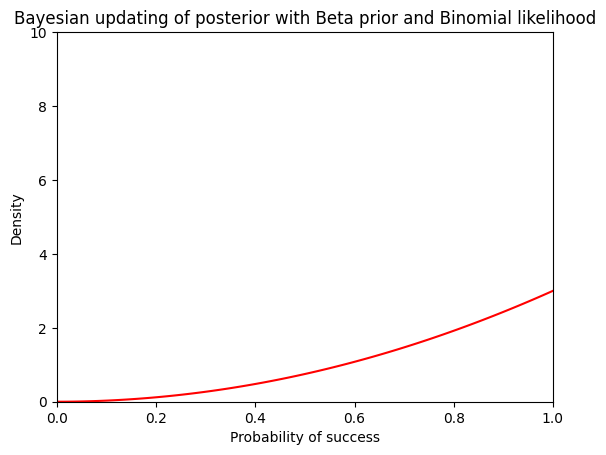

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
data = np.random.binomial(1, 0.7, size=100)  # Change 0.7 to your true probability

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior), 'r-')

def update(frame):
    global alpha_prior, beta_prior
    # Update the parameters of the beta distribution
    alpha_prior += data[frame]
    beta_prior += 1 - data[frame]

    # Update the plot
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y)
    return line,

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data), blit=True)

plt.title('Bayesian updating of posterior with Beta prior and Binomial likelihood')
plt.xlabel('Probability of success')
plt.ylabel('Density')
plt.show()


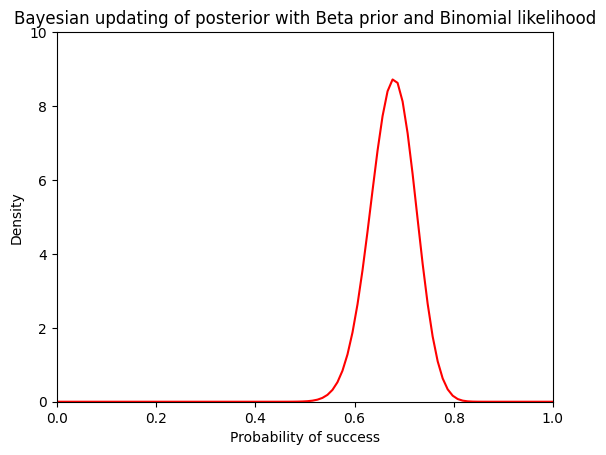

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
data = np.random.binomial(1, 0.7, size=100)  # Change 0.7 to your true probability

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior), 'r-')

def update(frame):
    global alpha_prior, beta_prior
    # Update the parameters of the beta distribution
    alpha_prior += data[frame]
    beta_prior += 1 - data[frame]

    # Update the plot
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y)
    return line,

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data), blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.title('Bayesian updating of posterior with Beta prior and Binomial likelihood')
plt.xlabel('Probability of success')
plt.ylabel('Density')
plt.show()


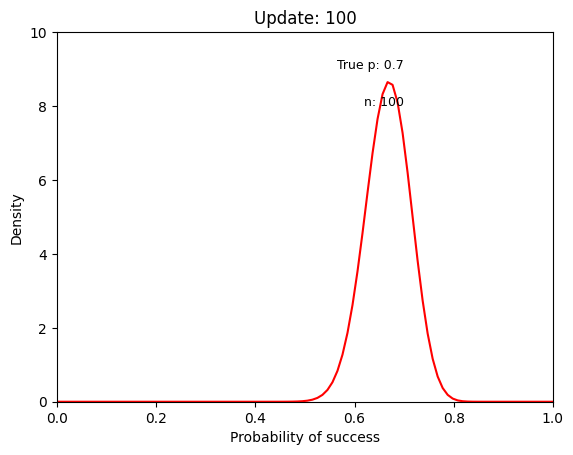

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=100)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior), 'r-')
title = ax.set_title('')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior and number of trials
true_prior_text = ax.text(0.7, 9, f'True p: {true_p}', fontsize=9, ha='right')
trial_number_text = ax.text(0.7, 8, '', fontsize=9, ha='right')

def update(frame):
    global alpha_prior, beta_prior
    # Update the parameters of the beta distribution
    alpha_prior += data[frame]
    beta_prior += 1 - data[frame]

    # Update the plot
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y)
    title.set_text(f'Update: {frame + 1}')
    trial_number_text.set_text(f'n: {frame + 1}')
    return line, title, trial_number_text, true_prior_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data), blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


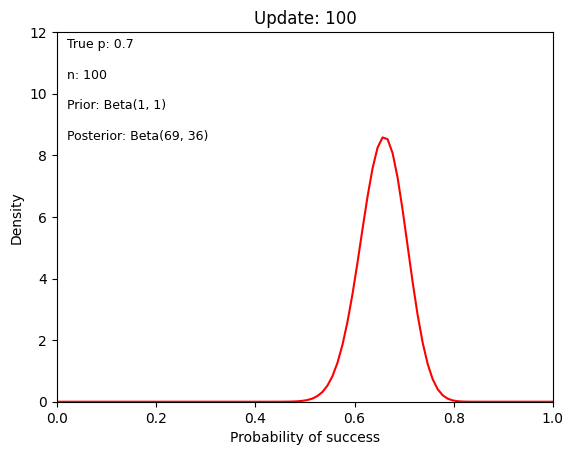

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=100)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 12)
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior), 'r-')
title = ax.set_title('')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior, number of trials, and equation updates
true_prior_text = ax.text(0.02, 11.5, f'True p: {true_p}', fontsize=9, ha='left')
trial_number_text = ax.text(0.02, 10.5, '', fontsize=9, ha='left')
prior_text = ax.text(0.02, 9.5, 'Prior: Beta(1, 1)', fontsize=9, ha='left')
posterior_text = ax.text(0.02, 8.5, 'Posterior: Beta(1, 1)', fontsize=9, ha='left')

def update(frame):
    global alpha_prior, beta_prior
    # Update the parameters of the beta distribution
    alpha_prior += data[frame]
    beta_prior += 1 - data[frame]

    # Update the plot
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y)
    title.set_text(f'Update: {frame + 1}')
    trial_number_text.set_text(f'n: {frame + 1}')
    posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
    return line, title, trial_number_text, true_prior_text, prior_text, posterior_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data), blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


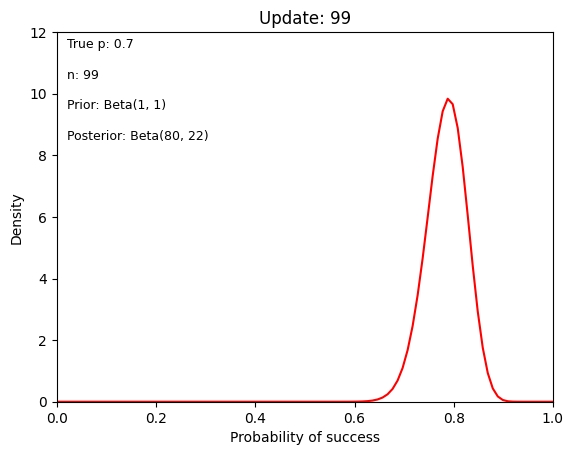

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=100)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 12)
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior), 'r-')
title = ax.set_title('')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior, number of trials, and equation updates
true_prior_text = ax.text(0.02, 11.5, f'True p: {true_p}', fontsize=9, ha='left')
trial_number_text = ax.text(0.02, 10.5, '', fontsize=9, ha='left')
prior_text = ax.text(0.02, 9.5, 'Prior: Beta(1, 1)', fontsize=9, ha='left')
posterior_text = ax.text(0.02, 8.5, 'Posterior: Beta(1, 1)', fontsize=9, ha='left')

def update(frame):
    global alpha_prior, beta_prior
    if frame >= 20:  # Delay data updates for the first 20 frames
        # Update the parameters of the beta distribution
        alpha_prior += data[frame - 20]
        beta_prior += 1 - data[frame - 20]
    
    # Update the plot
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y)
    title.set_text(f'Update: {frame if frame < 20 else frame - 20}')
    trial_number_text.set_text(f'n: {frame if frame < 20 else frame - 20}')
    posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
    return line, title, trial_number_text, true_prior_text, prior_text, posterior_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data) + 20, blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


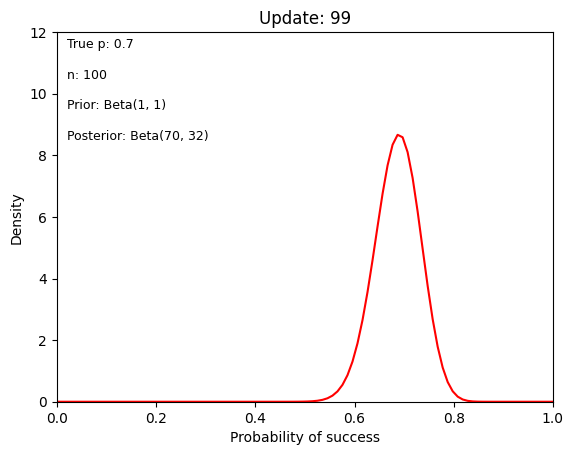

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=100)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 12)
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior), 'r-')
title = ax.set_title('')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior, number of trials, and equation updates
true_prior_text = ax.text(0.02, 11.5, f'True p: {true_p}', fontsize=9, ha='left')
trial_number_text = ax.text(0.02, 10.5, 'n: 0', fontsize=9, ha='left')
prior_text = ax.text(0.02, 9.5, 'Prior: Beta(1, 1)', fontsize=9, ha='left')
posterior_text = ax.text(0.02, 8.5, 'Posterior: Beta(1, 1)', fontsize=9, ha='left')

def update(frame):
    global alpha_prior, beta_prior
    if frame >= 20:  # Delay data updates for the first 20 frames
        # Update the parameters of the beta distribution
        alpha_prior += data[frame - 20]
        beta_prior += 1 - data[frame - 20]
        trial_number_text.set_text(f'n: {frame - 19}')  # Update n only after delay
    else:
        trial_number_text.set_text(f'n: 0')  # Keep n at 0 during the delay

    # Update the plot
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y)
    title.set_text(f'Update: {frame if frame < 20 else frame - 20}')
    posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
    return line, title, trial_number_text, true_prior_text, prior_text, posterior_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data) + 20, blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


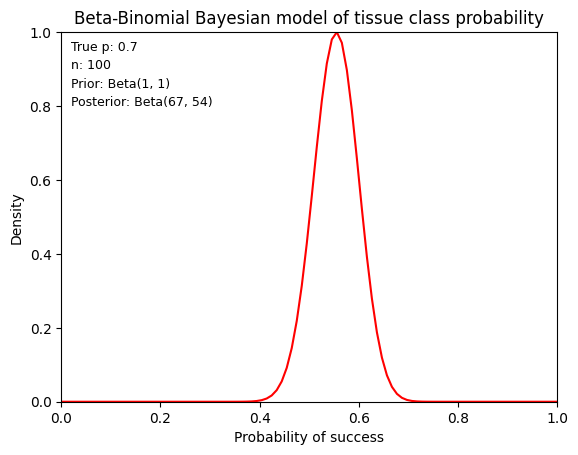

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 20  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=100)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)  # Adjusted for normalized plot
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior) / beta.pdf(x, alpha_prior, beta_prior).max(), 'r-')
title = ax.set_title('Beta-Binomial Bayesian model of tissue class probability')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior, number of trials, and equation updates
true_prior_text = ax.text(0.02, 0.95, f'True p: {true_p}', fontsize=9, ha='left')
trial_number_text = ax.text(0.02, 0.90, 'n: 0', fontsize=9, ha='left')
prior_text = ax.text(0.02, 0.85, 'Prior: Beta(1, 1)', fontsize=9, ha='left')
posterior_text = ax.text(0.02, 0.80, 'Posterior: Beta(1, 1)', fontsize=9, ha='left')

def update(frame):
    global alpha_prior, beta_prior
    if frame >= 20:  # Delay data updates for the first 20 frames
        # Update the parameters of the beta distribution
        alpha_prior += data[frame - 20]
        beta_prior += 1 - data[frame - 20]
        trial_number_text.set_text(f'n: {frame - 19}')  # Update n only after delay
    else:
        trial_number_text.set_text(f'n: 0')  # Keep n at 0 during the delay

    # Update the plot with normalized maximum value
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y / y.max())
    posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
    return line, title, trial_number_text, true_prior_text, prior_text, posterior_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data) + 20, blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


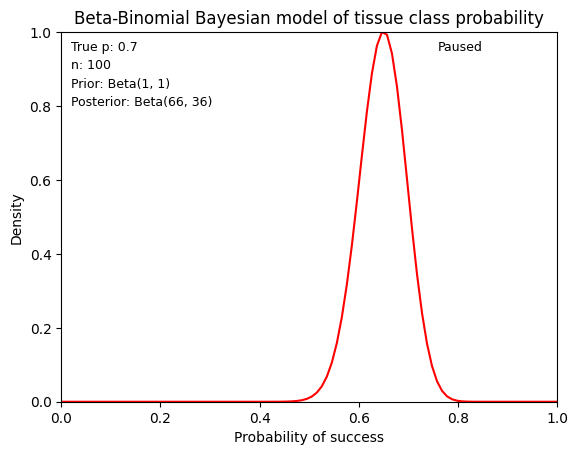

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=100)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)  # Adjusted for normalized plot
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior) / beta.pdf(x, alpha_prior, beta_prior).max(), 'r-')
title = ax.set_title('Beta-Binomial Bayesian model of tissue class probability')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior, number of trials, equation updates, and play status
true_prior_text = ax.text(0.02, 0.95, f'True p: {true_p}', fontsize=9, ha='left')
trial_number_text = ax.text(0.02, 0.90, 'n: 0', fontsize=9, ha='left')
prior_text = ax.text(0.02, 0.85, 'Prior: Beta(1, 1)', fontsize=9, ha='left')
posterior_text = ax.text(0.02, 0.80, 'Posterior: Beta(1, 1)', fontsize=9, ha='left')
status_text = ax.text(0.85, 0.95, 'Paused', fontsize=9, ha='right')

def update(frame):
    global alpha_prior, beta_prior
    status = 'Playing'
    if frame < 20 or frame >= len(data) + 20:
        status = 'Paused'  # Pause during the first and last 20 frames
    elif 20 <= frame < len(data) + 20:
        # Update the parameters of the beta distribution
        alpha_prior += data[frame - 20]
        beta_prior += 1 - data[frame - 20]
        trial_number_text.set_text(f'n: {frame - 19}')  # Update n only after delay

    # Update the plot with normalized maximum value
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y / y.max())
    posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
    status_text.set_text(status)
    return line, title, trial_number_text, true_prior_text, prior_text, posterior_text, status_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data) + 40, blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


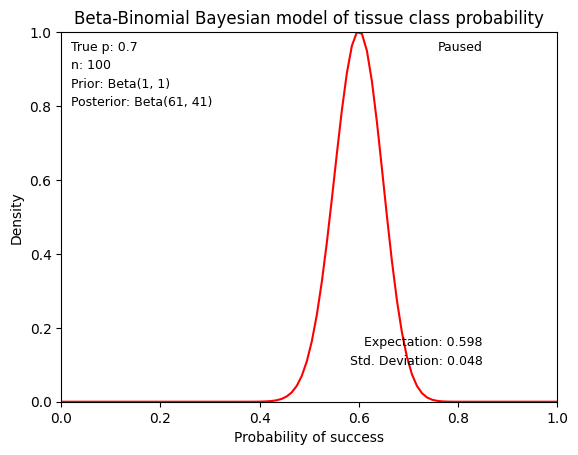

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=100)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)  # Adjusted for normalized plot
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior) / beta.pdf(x, alpha_prior, beta_prior).max(), 'r-')
title = ax.set_title('Beta-Binomial Bayesian model of tissue class probability')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior, number of trials, equation updates, and play status
true_prior_text = ax.text(0.02, 0.95, f'True p: {true_p}', fontsize=9, ha='left')
trial_number_text = ax.text(0.02, 0.90, 'n: 0', fontsize=9, ha='left')
prior_text = ax.text(0.02, 0.85, 'Prior: Beta(1, 1)', fontsize=9, ha='left')
posterior_text = ax.text(0.02, 0.80, 'Posterior: Beta(1, 1)', fontsize=9, ha='left')
expectation_text = ax.text(0.85, 0.15, '', fontsize=9, ha='right')
std_dev_text = ax.text(0.85, 0.10, '', fontsize=9, ha='right')
status_text = ax.text(0.85, 0.95, 'Paused', fontsize=9, ha='right')

def update(frame):
    global alpha_prior, beta_prior
    status = 'Playing'
    if frame < 20 or frame >= len(data) + 20:
        status = 'Paused'  # Pause during the first and last 20 frames
    elif 20 <= frame < len(data) + 20:
        # Update the parameters of the beta distribution
        alpha_prior += data[frame - 20]
        beta_prior += 1 - data[frame - 20]
        trial_number_text.set_text(f'n: {frame - 19}')  # Update n only after delay

    # Update the plot with normalized maximum value
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y / y.max())
    posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
    status_text.set_text(status)
    # Calculate expectation and standard deviation
    expectation = alpha_prior / (alpha_prior + beta_prior)
    std_dev = np.sqrt(alpha_prior * beta_prior / ((alpha_prior + beta_prior) ** 2 * (alpha_prior + beta_prior + 1)))
    expectation_text.set_text(f'Expectation: {expectation:.3f}')
    std_dev_text.set_text(f'Std. Deviation: {std_dev:.3f}')

    return line, title, trial_number_text, true_prior_text, prior_text, posterior_text, status_text, expectation_text, std_dev_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data) + 40, blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


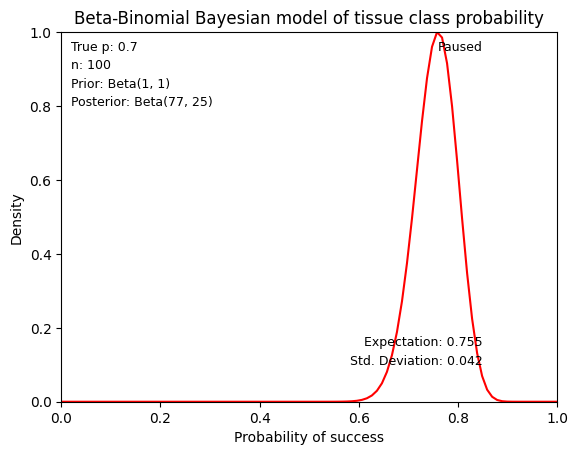

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
alpha_prior, beta_prior = 1, 1  # Uniform prior

# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=100)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)  # Adjusted for normalized plot
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior) / beta.pdf(x, alpha_prior, beta_prior).max(), 'r-')
title = ax.set_title('Beta-Binomial Bayesian model of tissue class probability')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior, number of trials, equation updates, and play status
true_prior_text = ax.text(0.02, 0.95, f'True p: {true_p}', fontsize=9, ha='left')
trial_number_text = ax.text(0.02, 0.90, 'n: 0', fontsize=9, ha='left')
prior_text = ax.text(0.02, 0.85, 'Prior: Beta(1, 1)', fontsize=9, ha='left')
posterior_text = ax.text(0.02, 0.80, 'Posterior: Beta(1, 1)', fontsize=9, ha='left')
expectation_text = ax.text(0.85, 0.15, '', fontsize=9, ha='right')
std_dev_text = ax.text(0.85, 0.10, '', fontsize=9, ha='right')
status_text = ax.text(0.85, 0.95, 'Paused', fontsize=9, ha='right')

def update(frame):
    global alpha_prior, beta_prior
    status = 'Playing'
    if frame < 20 or frame >= len(data) + 20:
        status = 'Paused'  # Pause during the first and last 20 frames
    elif 20 <= frame < len(data) + 20:
        # Update the parameters of the beta distribution
        alpha_prior += data[frame - 20]
        beta_prior += 1 - data[frame - 20]
        trial_number_text.set_text(f'n: {frame - 19}')  # Update n only after delay

    # Update the plot with normalized maximum value
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y / y.max())
    posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
    status_text.set_text(status)
    # Calculate expectation and standard deviation
    expectation = alpha_prior / (alpha_prior + beta_prior)
    std_dev = np.sqrt(alpha_prior * beta_prior / ((alpha_prior + beta_prior) ** 2 * (alpha_prior + beta_prior + 1)))
    expectation_text.set_text(f'Expectation: {expectation:.3f}')
    std_dev_text.set_text(f'Std. Deviation: {std_dev:.3f}')

    return line, title, trial_number_text, true_prior_text, prior_text, posterior_text, status_text, expectation_text, std_dev_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data) + 40, blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


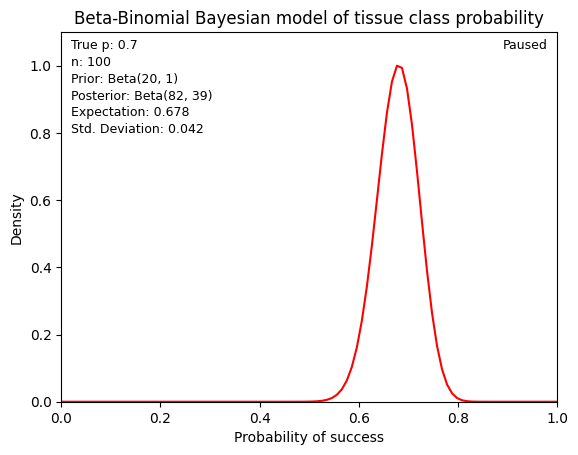

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Initial prior parameters for Beta distribution
size = 100
alpha_prior, beta_prior = 20, 1  # Uniform prior


# Fake data: 1 represents success, 0 represents failure
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=size)

fig, ax = plt.subplots()

# Setting up the plot limits and labels
y_top = 1.1
x = np.linspace(0, 1, 100)
ax.set_xlim(0, 1)
ax.set_ylim(0, y_top)  # Adjusted for normalized plot
line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior) / beta.pdf(x, alpha_prior, beta_prior).max(), 'r-')
title = ax.set_title('Beta-Binomial Bayesian model of tissue class probability')
ax.set_xlabel('Probability of success')
ax.set_ylabel('Density')

# Adding text annotation for true prior, number of trials, equation updates, and play status
true_prior_text = ax.text(0.02, y_top-0.05, f'True p: {true_p}', fontsize=9, ha='left')
trial_number_text = ax.text(0.02, y_top-0.1, 'n: 0', fontsize=9, ha='left')
prior_text = ax.text(0.02, y_top-0.15, f'Prior: Beta({alpha_prior}, {beta_prior})', fontsize=9, ha='left')
posterior_text = ax.text(0.02, y_top-0.2, f'Posterior: Beta({alpha_prior}, {beta_prior})', fontsize=9, ha='left')
expectation_text = ax.text(0.02, y_top-0.25, '', fontsize=9, ha='left')
std_dev_text = ax.text(0.02, y_top-0.3, '', fontsize=9, ha='left')
status_text = ax.text(0.98, y_top-0.05, 'Paused', fontsize=9, ha='right')

def update(frame):
    global alpha_prior, beta_prior
    status = 'Playing'
    if frame < 20 or frame >= len(data) + 20:
        status = 'Paused'  # Pause during the first and last 20 frames
    elif 20 <= frame < len(data) + 20:
        # Update the parameters of the beta distribution
        alpha_prior += data[frame - 20]
        beta_prior += 1 - data[frame - 20]
        trial_number_text.set_text(f'n: {frame - 19}')  # Update n only after delay

    # Update the plot with normalized maximum value
    y = beta.pdf(x, alpha_prior, beta_prior)
    line.set_ydata(y / y.max())
    posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
    status_text.set_text(status)
    # Calculate expectation and standard deviation
    expectation = alpha_prior / (alpha_prior + beta_prior)
    std_dev = np.sqrt(alpha_prior * beta_prior / ((alpha_prior + beta_prior) ** 2 * (alpha_prior + beta_prior + 1)))
    expectation_text.set_text(f'Expectation: {expectation:.3f}')
    std_dev_text.set_text(f'Std. Deviation: {std_dev:.3f}')

    return line, title, trial_number_text, true_prior_text, prior_text, posterior_text, status_text, expectation_text, std_dev_text

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data) + 40, blit=True)

# Save the animation as a gif
ani.save('bayesian_update.gif', writer='imagemagick', fps=10)

plt.show()


MovieWriter stderr:
convert-im6.q16: no images defined `bayesian_update_multi.gif' @ error/convert.c/ConvertImageCommand/3229.



CalledProcessError: Command '['convert', '-size', '1000x1500', '-depth', '8', '-delay', '10.0', '-loop', '0', 'rgba:-', '-layers', 'OptimizePlus', 'bayesian_update_multi.gif']' returned non-zero exit status 1.

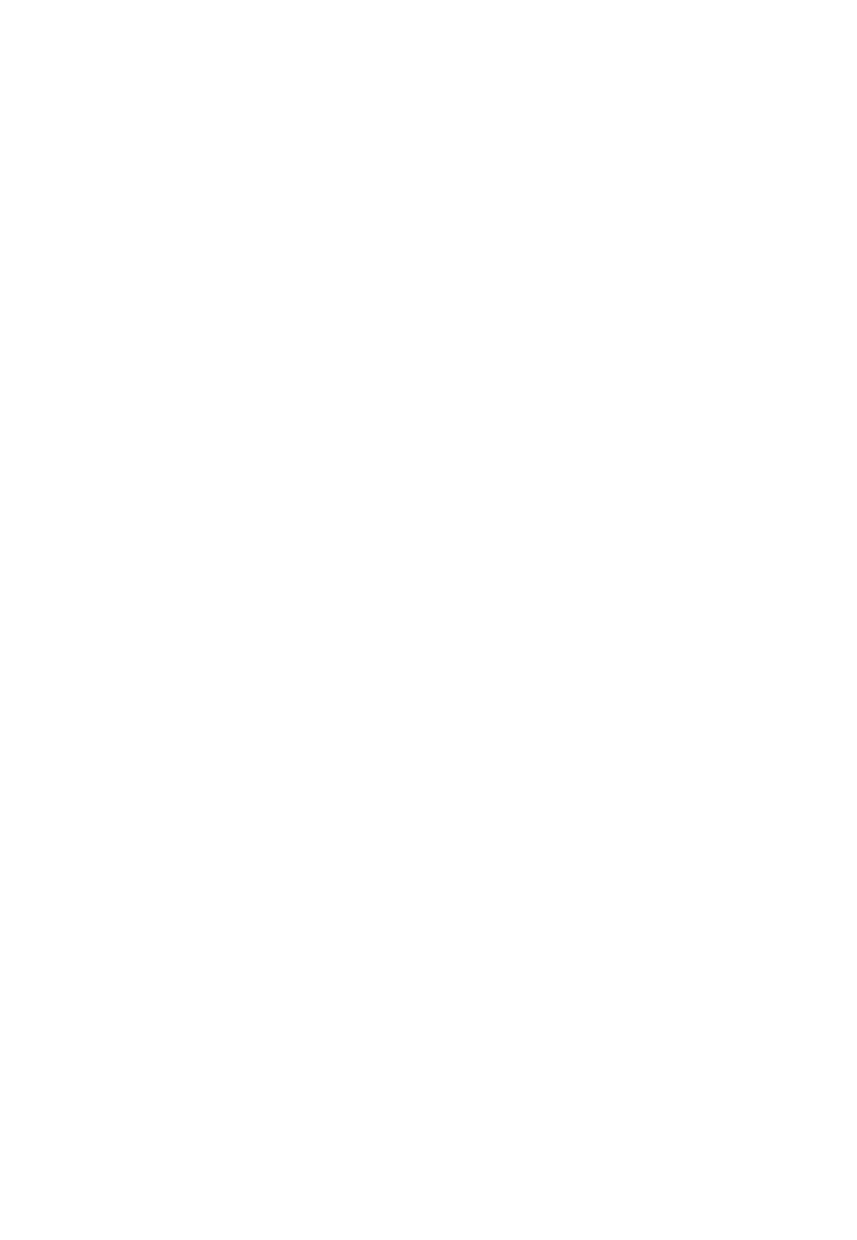

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

# Size of the dataset
size = 100
true_p = 0.7  # True probability of success
data = np.random.binomial(1, true_p, size=size)

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Priors for the three subplots
priors = [(1, 1), (size * 0.2, 1), (1, size * 0.2)]
lines = []
texts = []

for i, (a_prior, b_prior) in enumerate(priors):
    ax = axs[i]
    y_top = 1.1
    x = np.linspace(0, 1, 100)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, y_top)
    line, = ax.plot(x, beta.pdf(x, a_prior, b_prior) / beta.pdf(x, a_prior, b_prior).max(), 'r-')
    ax.set_title('Beta-Binomial Bayesian model of tissue class probability')
    ax.set_xlabel('Probability of success')
    ax.set_ylabel('Density')

    # Add annotations
    true_prior_text = ax.text(0.02, y_top-0.05, f'True p: {true_p}', fontsize=9, ha='left')
    trial_number_text = ax.text(0.02, y_top-0.1, 'n: 0', fontsize=9, ha='left')
    prior_text = ax.text(0.02, y_top-0.15, f'Prior: Beta({a_prior}, {b_prior})', fontsize=9, ha='left')
    posterior_text = ax.text(0.02, y_top-0.2, f'Posterior: Beta({a_prior}, {b_prior})', fontsize=9, ha='left')
    expectation_text = ax.text(0.02, y_top-0.25, '', fontsize=9, ha='left')
    std_dev_text = ax.text(0.02, y_top-0.3, '', fontsize=9, ha='left')
    status_text = ax.text(0.98, y_top-0.05, 'Paused', fontsize=9, ha='right')

    lines.append((line, ax))
    texts.append((trial_number_text, posterior_text, expectation_text, std_dev_text, status_text))

def update(frame):
    status = 'Playing' if 20 <= frame < len(data) + 20 else 'Paused'
    for j, ((line, ax), (trial_number_text, posterior_text, expectation_text, std_dev_text, status_text)) in enumerate(zip(lines, texts)):
        a_prior, b_prior = priors[j]
        if 20 <= frame < len(data) + 20:
            a_prior += data[frame - 20]
            b_prior += 1 - data[frame - 20]
            trial_number_text.set_text(f'n: {frame - 19}')

        y = beta.pdf(x, a_prior, b_prior)
        line.set_ydata(y / y.max())
        posterior_text.set_text(f'Posterior: Beta({a_prior}, {b_prior})')
        expectation = a_prior / (a_prior + b_prior)
        std_dev = np.sqrt(a_prior * b_prior / ((a_prior + b_prior) ** 2 * (a_prior + b_prior + 1)))
        expectation_text.set_text(f'Expectation: {expectation:.3f}')
        std_dev_text.set_text(f'Std. Deviation: {std_dev:.3f}')
        status_text.set_text(status)

    return [item for sublist in lines for item in sublist] + [item for sublist in texts for item in sublist]

# Creating the animation
ani = FuncAnimation(fig, update, frames=len(data) + 40, blit=True)

# Save the animation as a gif
ani.save('bayesian_update_multi.gif', writer='imagemagick', fps=10)

plt.show()


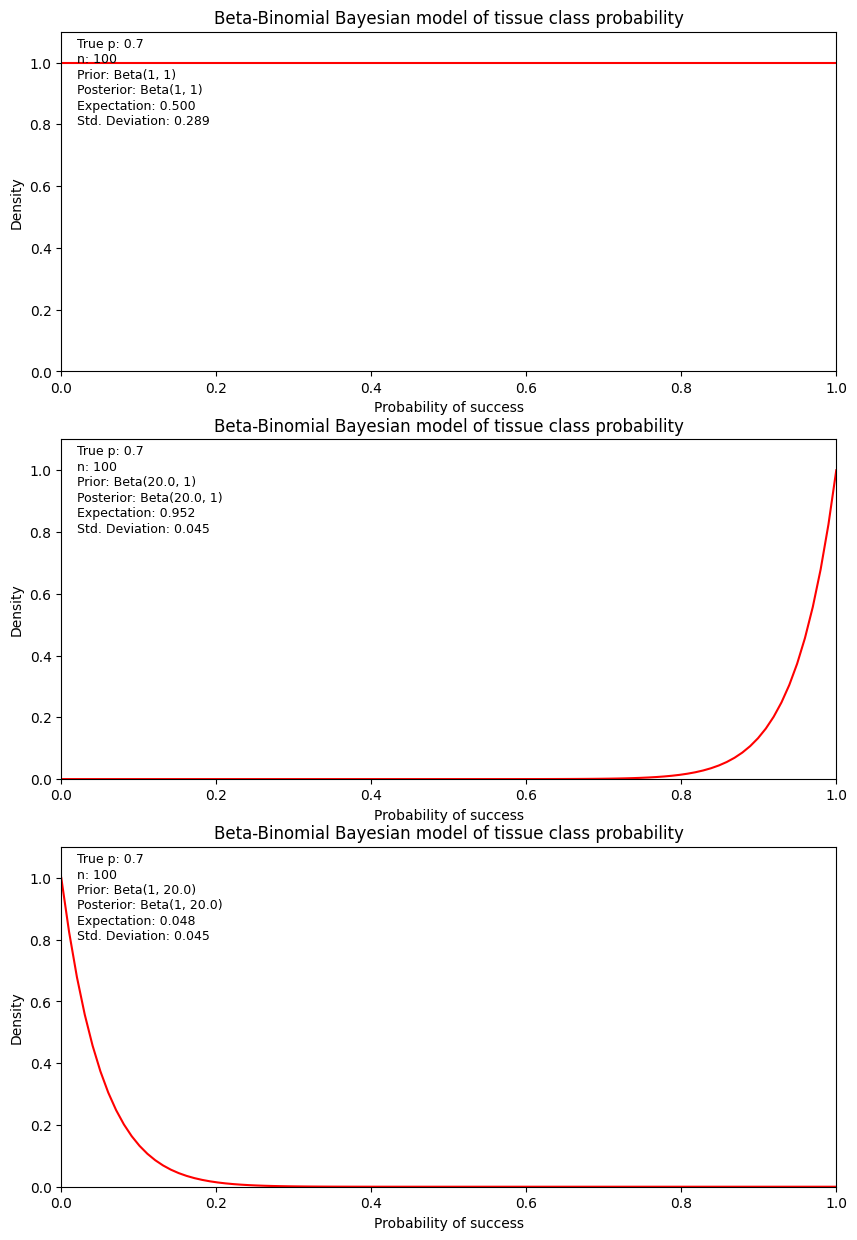

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

# Data setup
size = 100
true_p = 0.7
data = np.random.binomial(1, true_p, size=size)

# Figure setup
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
x = np.linspace(0, 1, 100)
lines = []
texts = []

# Define priors for each subplot
priors = [(1, 1), (size * 0.2, 1), (1, size * 0.2)]

# Initialize subplots
for ax, (a_prior, b_prior) in zip(axs, priors):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.1)
    line, = ax.plot(x, beta.pdf(x, a_prior, b_prior) / beta.pdf(x, a_prior, b_prior).max(), 'r-')
    ax.set_title('Beta-Binomial Bayesian model of tissue class probability')
    ax.set_xlabel('Probability of success')
    ax.set_ylabel('Density')
    # Text annotations
    texts.append([
        ax.text(0.02, 1.05, f'True p: {true_p}', fontsize=9, ha='left'),
        ax.text(0.02, 1.00, 'n: 0', fontsize=9, ha='left'),
        ax.text(0.02, 0.95, f'Prior: Beta({a_prior}, {b_prior})', fontsize=9, ha='left'),
        ax.text(0.02, 0.90, f'Posterior: Beta({a_prior}, {b_prior})', fontsize=9, ha='left'),
        ax.text(0.02, 0.85, '', fontsize=9, ha='left'),  # Expectation
        ax.text(0.02, 0.80, '', fontsize=9, ha='left')   # Std. Deviation
    ])
    lines.append(line)

def update(frame):
    # Status update
    status = 'Playing' if 20 <= frame < len(data) + 20 else 'Paused'
    for i, (line, (true_prior_text, trial_number_text, prior_text, posterior_text, expectation_text, std_dev_text)) in enumerate(zip(lines, texts)):
        a_prior, b_prior = priors[i]
        if 20 <= frame < len(data) + 20:
            a_prior += data[frame - 20]
            b_prior += 1 - data[frame - 20]
            trial_number_text.set_text(f'n: {frame - 19}')
        
        y = beta.pdf(x, a_prior, b_prior)
        line.set_ydata(y / y.max())
        posterior_text.set_text(f'Posterior: Beta({a_prior}, {b_prior})')
        expectation = a_prior / (a_prior + b_prior)
        std_dev = np.sqrt(a_prior * b_prior / ((a_prior + b_prior)**2 * (a_prior + b_prior + 1)))
        expectation_text.set_text(f'Expectation: {expectation:.3f}')
        std_dev_text.set_text(f'Std. Deviation: {std_dev:.3f}')

    # Return all artists that need to be updated
    return [line for line in lines] + [item for sublist in texts for item in sublist]

# Create the animation
ani = FuncAnimation(fig, update, frames=len(data) + 40, blit=True)

# Save the animation as a GIF
ani.save('bayesian_update_multi.gif', writer='pillow', fps=10)

plt.show()


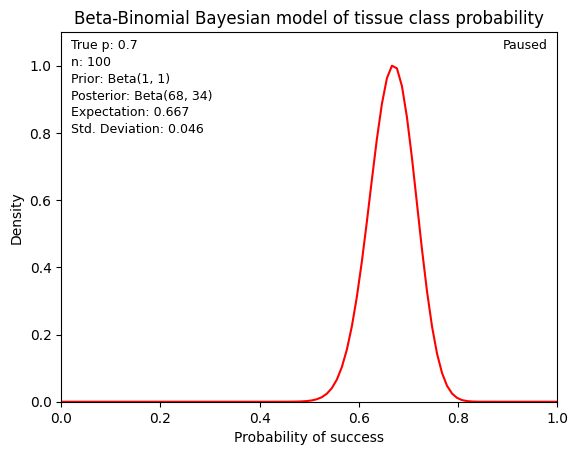

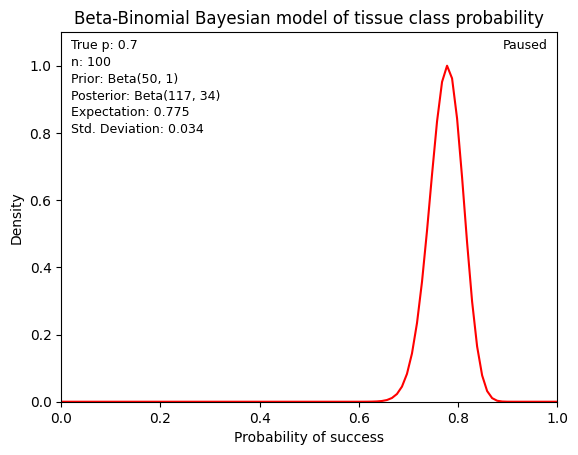

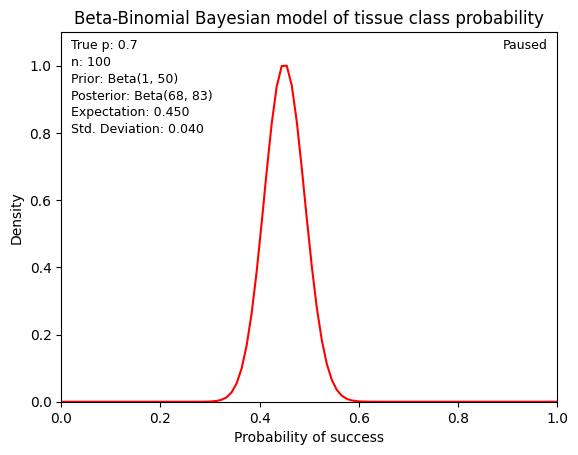

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib.animation import FuncAnimation

def one_plot_animation(gif_name, data, alpha_prior=1, beta_prior=1, fps=10):
    # Fake data: 1 represents success, 0 represents failure
    true_p = 0.7  # True probability of success
    
    n_trials = len(data)

    fig, ax = plt.subplots()

    # Setting up the plot limits and labels
    y_top = 1.1
    x = np.linspace(0, 1, 100)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, y_top)  # Adjusted for normalized plot
    line, = ax.plot(x, beta.pdf(x, alpha_prior, beta_prior) / beta.pdf(x, alpha_prior, beta_prior).max(), 'r-')
    ax.set_title('Beta-Binomial Bayesian model of tissue class probability')
    ax.set_xlabel('Probability of success')
    ax.set_ylabel('Density')

    # Adding text annotation for true prior, number of trials, equation updates, and play status
    true_prior_text = ax.text(0.02, y_top-0.05, f'True p: {true_p}', fontsize=9, ha='left')
    trial_number_text = ax.text(0.02, y_top-0.1, 'n: 0', fontsize=9, ha='left')
    prior_text = ax.text(0.02, y_top-0.15, f'Prior: Beta({alpha_prior}, {beta_prior})', fontsize=9, ha='left')
    posterior_text = ax.text(0.02, y_top-0.2, f'Posterior: Beta({alpha_prior}, {beta_prior})', fontsize=9, ha='left')
    expectation_text = ax.text(0.02, y_top-0.25, '', fontsize=9, ha='left')
    std_dev_text = ax.text(0.02, y_top-0.3, '', fontsize=9, ha='left')
    status_text = ax.text(0.98, y_top-0.05, 'Paused', fontsize=9, ha='right')

    def update(frame):
        nonlocal alpha_prior, beta_prior
        status = 'Playing'
        if frame < 20 or frame >= n_trials + 20:
            status = 'Paused'  # Pause during the first and last 20 frames
        elif 20 <= frame < n_trials + 20:
            # Update the parameters of the beta distribution
            alpha_prior += data[frame - 20]
            beta_prior += 1 - data[frame - 20]
            trial_number_text.set_text(f'n: {frame - 19}')  # Update n only after delay

        # Update the plot with normalized maximum value
        y = beta.pdf(x, alpha_prior, beta_prior)
        line.set_ydata(y / y.max())
        posterior_text.set_text(f'Posterior: Beta({alpha_prior}, {beta_prior})')
        status_text.set_text(status)
        # Calculate expectation and standard deviation
        expectation = alpha_prior / (alpha_prior + beta_prior)
        std_dev = np.sqrt(alpha_prior * beta_prior / ((alpha_prior + beta_prior) ** 2 * (alpha_prior + beta_prior + 1)))
        expectation_text.set_text(f'Expectation: {expectation:.3f}')
        std_dev_text.set_text(f'Std. Deviation: {std_dev:.3f}')

        return line, title, trial_number_text, true_prior_text, prior_text, posterior_text, status_text, expectation_text, std_dev_text

    # Creating the animation
    ani = FuncAnimation(fig, update, frames=n_trials + 40, blit=True)

    # Save the animation as a gif
    ani.save(f'{gif_name}.gif', writer='imagemagick', fps=fps)

    plt.show()

n_trials = 100
data = np.random.binomial(1, true_p, size=n_trials)

arg_tuple = (('gif_1', data, 1, 1), ('gif_2', data, 50, 1), ('gif_3', data, 1, 50))

for args in arg_tuple:
    one_plot_animation(*args)


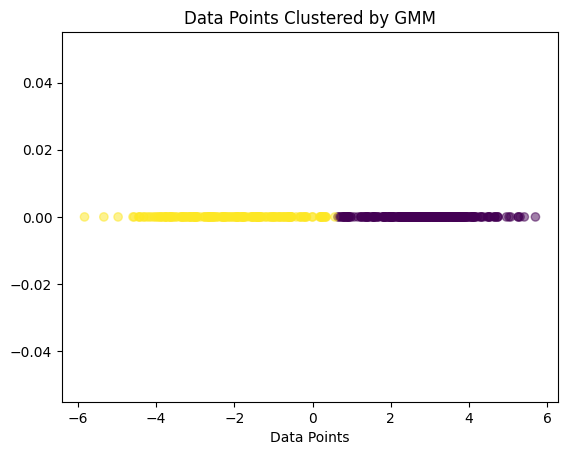

Means: [ 2.8542755  -2.00700928]
Variances: [1.04667151 2.1297116 ]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Generate synthetic data
np.random.seed(0)
data1 = np.random.normal(loc=-2, scale=1.5, size=200)  # First cluster
data2 = np.random.normal(loc=3, scale=1, size=300)    # Second cluster
data = np.concatenate([data1, data2]).reshape(-1, 1)  # Combine into one dataset

gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data)

# Predict the labels of the clusters
labels = gmm.predict(data)

# Plot the data colored by these labels
plt.scatter(data[:, 0], np.zeros_like(data), c=labels, cmap='viridis', alpha=0.5)
plt.title('Data Points Clustered by GMM')
plt.xlabel('Data Points')
plt.show()

# Print the parameters
print("Means:", gmm.means_.flatten())
print("Variances:", gmm.covariances_.flatten())



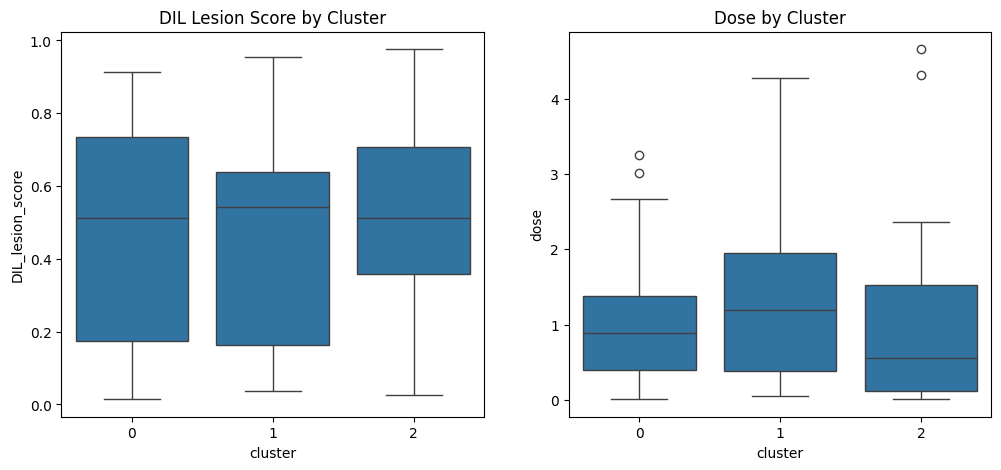

ANOVA result on DIL Lesion Score: 0.38909185857033085 0.678724885912726
ANOVA result on Dose: 0.9016369251352543 0.4092788996353356
Feature importances: [0.23279196 0.23433817 0.27903637 0.2538335 ]


In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_samples = 100
data = pd.DataFrame({
    'biochemical_score1': np.random.normal(0, 1, n_samples),
    'biochemical_score2': np.random.normal(0, 1, n_samples),
    'DIL_lesion_score': np.random.uniform(0, 1, n_samples),
    'dose': np.random.exponential(1, n_samples),
    'DWI_value': np.random.normal(5, 1.5, n_samples),
    'T2WI_value': np.random.normal(2, 0.5, n_samples)
})

# Standardize the biochemical scores
scaler = StandardScaler()
biochemical_data = scaler.fit_transform(data[['biochemical_score1', 'biochemical_score2']])

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(biochemical_data)
clusters = gmm.predict(biochemical_data)

# Add clusters to the DataFrame
data['cluster'] = clusters

# Visualize the distribution of DIL lesion scores and doses across clusters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='cluster', y='DIL_lesion_score', data=data, ax=ax[0])
ax[0].set_title('DIL Lesion Score by Cluster')
sns.boxplot(x='cluster', y='dose', data=data, ax=ax[1])
ax[1].set_title('Dose by Cluster')
plt.show()

# ANOVA to test for differences in DIL lesion scores and doses across clusters
f_val_dil, p_val_dil = f_oneway(*(data[data['cluster'] == i]['DIL_lesion_score'] for i in range(3)))
f_val_dose, p_val_dose = f_oneway(*(data[data['cluster'] == i]['dose'] for i in range(3)))
print('ANOVA result on DIL Lesion Score:', f_val_dil, p_val_dil)
print('ANOVA result on Dose:', f_val_dose, p_val_dose)

# Use a Random Forest Classifier to predict clusters based on other variables
rf = RandomForestClassifier(random_state=0)
rf.fit(data[['DIL_lesion_score', 'dose', 'DWI_value', 'T2WI_value']], data['cluster'])
feature_importances = rf.feature_importances_
print('Feature importances:', feature_importances)



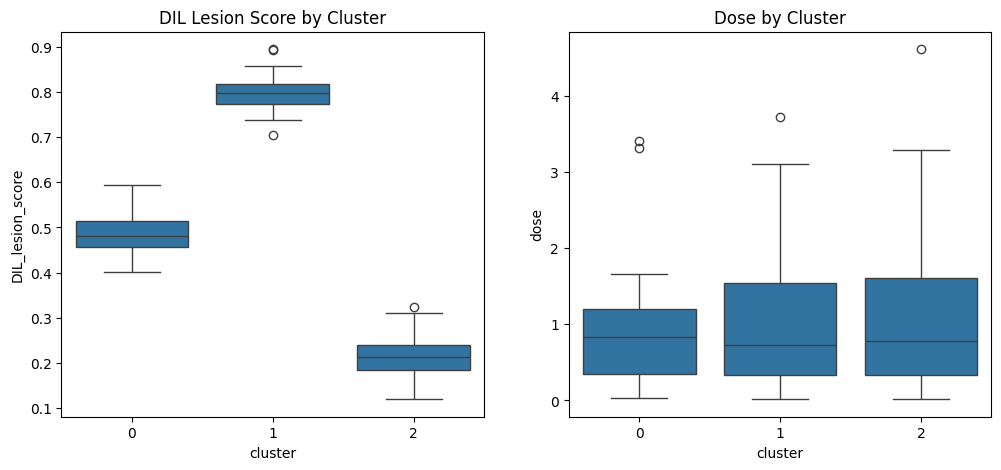

ANOVA result on Biochemical Score 1: 1.4033907659993323 0.2507070994269703
ANOVA result on Biochemical Score 2: 2.577386408402229 0.0811678402711755
Feature importances: [0.30831463 0.34827223 0.34341314]


In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestClassifier

# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_samples = 100
# Create three distinct groups for DIL lesion scores
dil_groups = np.random.choice([0.2, 0.5, 0.8], size=n_samples, p=[1/3, 1/3, 1/3])
dil_noise = np.random.normal(0, 0.05, n_samples)  # Small noise
dil_scores = dil_groups + dil_noise

# Generate dose values
doses = np.random.exponential(1, n_samples)

# Biochemical scores dependent on dose and affected by DIL lesion score group
biochemical_score1 = doses * (1 + dil_groups) + np.random.normal(0, 0.5, n_samples)
biochemical_score2 = doses * (2 - dil_groups) + np.random.normal(0, 0.5, n_samples)

# Combine all data into a DataFrame
data = pd.DataFrame({
    'biochemical_score1': biochemical_score1,
    'biochemical_score2': biochemical_score2,
    'DIL_lesion_score': dil_scores,
    'dose': doses,
    'DWI_value': np.random.normal(5, 1.5, n_samples),
    'T2WI_value': np.random.normal(2, 0.5, n_samples)
})

# Standardize the biochemical scores
scaler = StandardScaler()
biochemical_data = scaler.fit_transform(data[['biochemical_score1', 'biochemical_score2']])

# Fit a Gaussian Mixture Model on DIL lesion scores to find clusters
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(data[['DIL_lesion_score']])
clusters = gmm.predict(data[['DIL_lesion_score']])

# Add clusters to the DataFrame
data['cluster'] = clusters

# Visualize the distribution of DIL lesion scores and doses across clusters
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='cluster', y='DIL_lesion_score', data=data, ax=ax[0])
ax[0].set_title('DIL Lesion Score by Cluster')
sns.boxplot(x='cluster', y='dose', data=data, ax=ax[1])
ax[1].set_title('Dose by Cluster')
plt.show()

# ANOVA to test for differences in biochemical scores across clusters
f_val_bio1, p_val_bio1 = f_oneway(*(data[data['cluster'] == i]['biochemical_score1'] for i in range(3)))
f_val_bio2, p_val_bio2 = f_oneway(*(data[data['cluster'] == i]['biochemical_score2'] for i in range(3)))
print('ANOVA result on Biochemical Score 1:', f_val_bio1, p_val_bio1)
print('ANOVA result on Biochemical Score 2:', f_val_bio2, p_val_bio2)

# Use a Random Forest Classifier to predict clusters based on other variables
rf = RandomForestClassifier(random_state=0)
rf.fit(data[['dose', 'DWI_value', 'T2WI_value']], data['cluster'])
feature_importances = rf.feature_importances_
print('Feature importances:', feature_importances)


Explained variance by each component: [0.05885264 0.05720258 0.05314886 0.05132318 0.04720449]


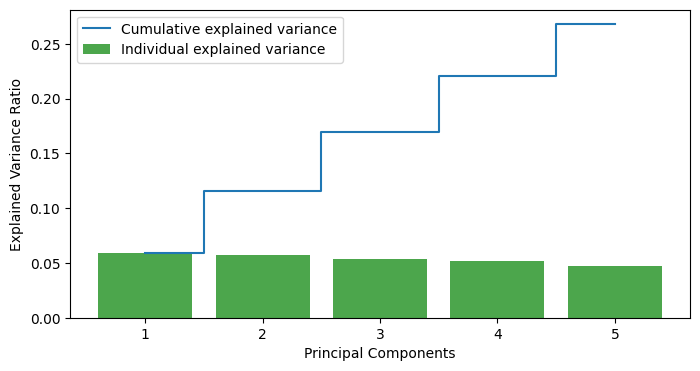

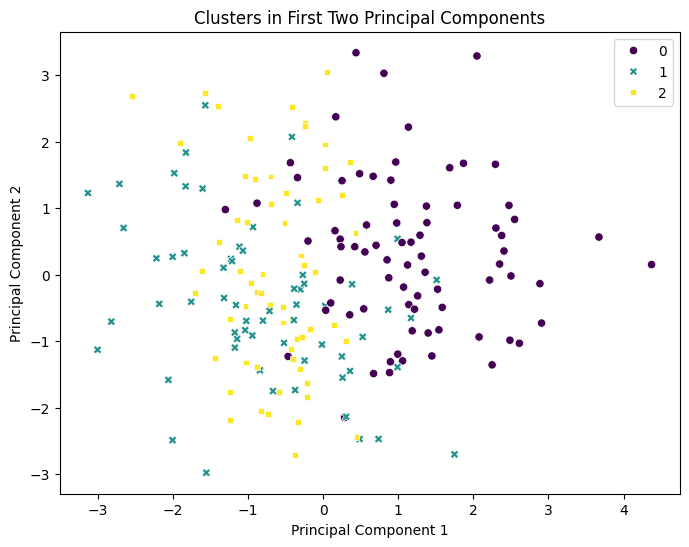

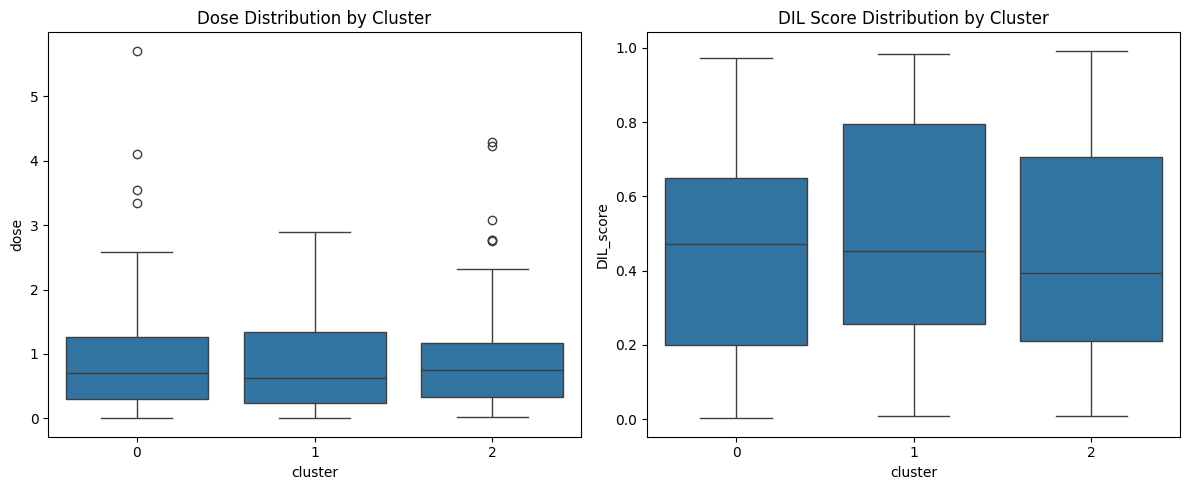

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 200
biochemical_scores = np.random.normal(0, 1, (n_samples, 30))  # 30 biochemicals
doses = np.random.exponential(scale=1.0, size=n_samples)  # Dose values
dil_scores = np.random.uniform(0, 1, n_samples)  # DIL tissue scores

# Create a DataFrame
data = pd.DataFrame(biochemical_scores, columns=[f'biochemical_{i+1}' for i in range(30)])
data['dose'] = doses
data['DIL_score'] = dil_scores

scaler = StandardScaler()
biochemical_scaled = scaler.fit_transform(data.iloc[:, :30])

pca = PCA(n_components=5)  # Reduce to 5 principal components
principal_components = pca.fit_transform(biochemical_scaled)
print("Explained variance by each component:", pca.explained_variance_ratio_)

# Visualize explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, 6), pca.explained_variance_ratio_, alpha=0.7, color='g', label='Individual explained variance')
plt.step(range(1, 6), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

gmm = GaussianMixture(n_components=3, random_state=0)  # Assume 3 clusters
clusters = gmm.fit_predict(principal_components)

# Add clusters to the DataFrame
data['cluster'] = clusters

# Visualize the clusters in the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=data['cluster'], palette='viridis', style=data['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in First Two Principal Components')
plt.legend()
plt.show()


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='cluster', y='dose', data=data, ax=axes[0])
axes[0].set_title('Dose Distribution by Cluster')
sns.boxplot(x='cluster', y='DIL_score', data=data, ax=axes[1])
axes[1].set_title('DIL Score Distribution by Cluster')
plt.tight_layout()
plt.show()



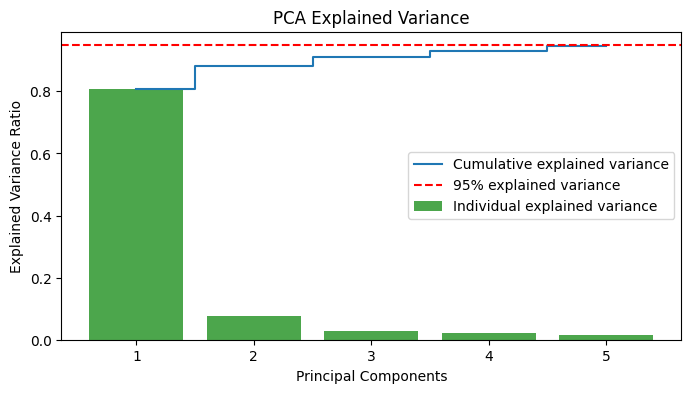

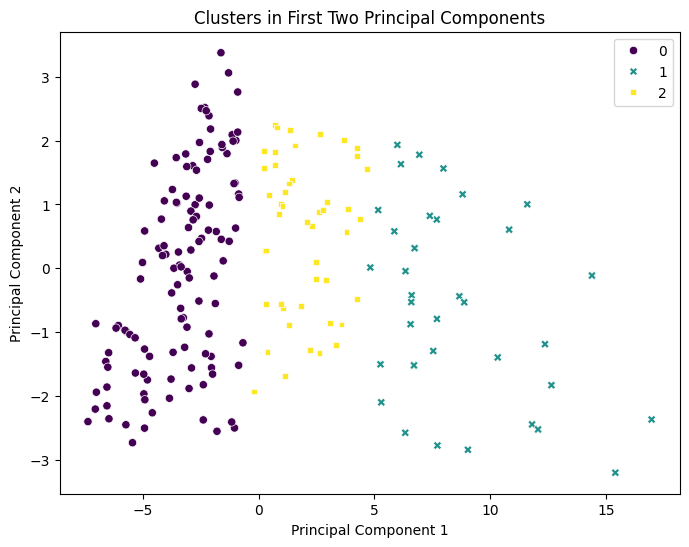

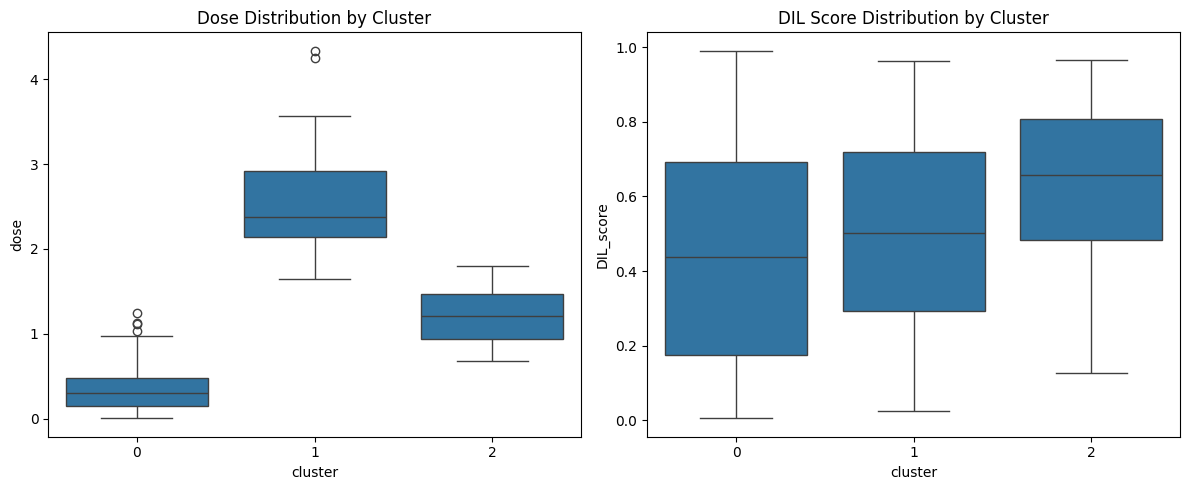

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Set random seed for reproducibility
np.random.seed(42)

# Generate controlled data
n_samples = 200
doses = np.random.exponential(scale=1.0, size=n_samples)  # Dose values
dil_scores = np.random.uniform(0, 1, n_samples)  # DIL tissue scores

# Generating biochemical scores dependent on dose and DIL tissue scores
biochemical_scores = np.array([doses, dil_scores]).T @ np.random.rand(2, 30) + np.random.normal(0, 0.1, (n_samples, 30))

# Create a DataFrame
data = pd.DataFrame(biochemical_scores, columns=[f'biochemical_{i+1}' for i in range(30)])
data['dose'] = doses
data['DIL_score'] = dil_scores

# Standardize the biochemical scores
scaler = StandardScaler()
biochemical_scaled = scaler.fit_transform(data.iloc[:, :30])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Initially take 5 components to check the variance explained
principal_components = pca.fit_transform(biochemical_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, 6), explained_variance, alpha=0.7, color='g', label='Individual explained variance')
plt.step(range(1, 6), cumulative_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% explained variance')
plt.legend(loc='best')
plt.title('PCA Explained Variance')
plt.show()


# Adjust the number of components to use based on the 95% variance threshold
n_components = np.argmax(cumulative_variance >= 0.95) + 1
gmm = GaussianMixture(n_components=3, random_state=0)  # Assume 3 clusters for illustration
clusters = gmm.fit_predict(principal_components[:, :n_components])

# Add clusters to the DataFrame
data['cluster'] = clusters

# Visualize the clusters in the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=data['cluster'], palette='viridis', style=data['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in First Two Principal Components')
plt.legend()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='cluster', y='dose', data=data, ax=axes[0])
axes[0].set_title('Dose Distribution by Cluster')
sns.boxplot(x='cluster', y='DIL_score', data=data, ax=axes[1])
axes[1].set_title('DIL Score Distribution by Cluster')
plt.tight_layout()
plt.show()




In [6]:
import pandas
import random
# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*9+[2]*9+[3]*9,
    'Original pt index': [1, 2, 3]*9,
    'Relative structure ROI': (['prostate']*3+['urethra']*3+['rectum']*3)*3,
    'Pt contained bool': [random.choice([True, False]) for _ in range(27)],
    'Relative structure type': (['OAR ref']*3+['Urethra ref']*3+['Rectum ref']*3)*3,
    'Relative structure index': [0]*27
}

df = pandas.DataFrame(data)




# Define the structure hierarchy
structure_hierarchy = ['Urethra ref', 'Rectum ref', 'OAR ref']

# Function to determine the highest-priority structure for each trial and pt index
def determine_highest_priority(group, hierarchy):
    for structure in hierarchy:
        contained_rows = group[group['Relative structure type'] == structure]
        if not contained_rows.empty and contained_rows['Pt contained bool'].any():
            return contained_rows.iloc[0]  # Return the first row for that structure
    return None  # Default if no structure contains the point

# Dictionary to store the results
results = []

# Group by Original pt index and Trial num
for (pt_index, trial_num), group in df.groupby(['Original pt index', 'Trial num']):
    # Determine the highest priority structure for this group
    highest_priority_row = determine_highest_priority(group, structure_hierarchy)
    if highest_priority_row is not None:
        results.append({
            'Relative structure ROI': highest_priority_row['Relative structure ROI'],
            'Relative structure type': highest_priority_row['Relative structure type'],
            'Relative structure index': highest_priority_row['Relative structure index'],
            'Original pt index': highest_priority_row['Original pt index'],
            'Trial num': trial_num
        })

# Convert the results to a DataFrame
result_df = pandas.DataFrame(results)

# Now, calculate the total successes for each structure respecting the hierarchy
total_successes_df = result_df.groupby(
    ['Relative structure ROI', 'Relative structure type', 'Relative structure index', 'Original pt index']
).size().reset_index(name='Total successes')

# Display the result
print(total_successes_df)


  Relative structure ROI Relative structure type  Relative structure index  \
0               prostate                 OAR ref                         0   
1                 rectum              Rectum ref                         0   
2                urethra             Urethra ref                         0   
3                urethra             Urethra ref                         0   
4                urethra             Urethra ref                         0   

   Original pt index  Total successes  
0                  3                1  
1                  1                1  
2                  1                2  
3                  2                3  
4                  3                1  


In [15]:
import pandas
import random

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*9 + [2]*9 + [3]*9,
    'Original pt index': [1, 2, 3]*9,
    'Relative structure ROI': (['prostate']*3 + ['urethra']*3 + ['rectum']*3)*3,
    'Pt contained bool': [random.choice([True, False]) for _ in range(27)],
    'Relative structure type': (['OAR ref']*3 + ['Urethra ref']*3 + ['Rectum ref']*3)*3,
    'Relative structure index': [0]*27
}

df = pandas.DataFrame(data)


# Define the structure hierarchy
structure_hierarchy = ['Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

print(df)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])
print(df_sorted)

# Filter rows where Pt contained bool is True
df_filtered = df_sorted[df_sorted['Pt contained bool']]

# Now, drop duplicates, keeping the first row, which will be the highest priority structure
result_df = df_filtered.drop_duplicates(subset=['Original pt index', 'Trial num'], keep='first')

# Calculate total successes for each structure
total_successes_df = result_df.groupby(
    ['Relative structure ROI', 'Relative structure type', 'Relative structure index', 'Original pt index']
).size().reset_index(name='Total successes')

# Display the result
print(total_successes_df)


    Patient ID  Trial num  Original pt index Relative structure ROI  Pt contained bool Relative structure type  Relative structure index structure_priority
0            1          1                  1               prostate               True                 OAR ref                         0            OAR ref
1            1          1                  2               prostate               True                 OAR ref                         0            OAR ref
2            1          1                  3               prostate              False                 OAR ref                         0            OAR ref
3            1          1                  1                urethra              False             Urethra ref                         0        Urethra ref
4            1          1                  2                urethra              False             Urethra ref                         0        Urethra ref
5            1          1                  3                uret

In [19]:
import pandas as pandas
import random

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*9 + [2]*9 + [3]*9,
    'Original pt index': [1, 2, 3]*9,
    'Relative structure ROI': (['prostate']*3 + ['urethra']*3 + ['rectum']*3)*3,
    'Pt contained bool': [
        # Known values representing expected fractions of successes
        # Trial 1
        True, False, True,   # prostate (OAR ref): 33% chance
        True, True, False,    # urethra (Urethra ref): 66% chance
        True, True, False,    # rectum (Rectum ref): 66% chance

        # Trial 2
        False, True, False,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, True, True,    # rectum (Rectum ref): 66% chance

        # Trial 3
        False, False, True,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, False, True    # rectum (Rectum ref): 33% chance
    ],
    'Relative structure type': (['OAR ref']*3 + ['Urethra ref']*3 + ['Rectum ref']*3)*3,
    'Relative structure index': [0]*27
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Group by Original pt index, Trial num, and Relative structure, ensuring each combination is present
result_df = df_sorted.groupby(
    ['Original pt index', 'Relative structure ROI', 'Relative structure type', 'Relative structure index']
).agg({'Pt contained bool': 'sum'}).reset_index()

# Rename the 'Pt contained bool' column to 'Total successes'
result_df.rename(columns={'Pt contained bool': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each combination
print(result_df)


   Original pt index Relative structure ROI Relative structure type  Relative structure index  Total successes
0                  1               prostate                 OAR ref                         0                1
1                  1                 rectum              Rectum ref                         0                1
2                  1                urethra             Urethra ref                         0                3
3                  2               prostate                 OAR ref                         0                1
4                  2                 rectum              Rectum ref                         0                2
5                  2                urethra             Urethra ref                         0                3
6                  3               prostate                 OAR ref                         0                2
7                  3                 rectum              Rectum ref                         0                2
8

In [20]:
import pandas as pd

pd.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*9 + [2]*9 + [3]*9,
    'Original pt index': [1, 2, 3]*9,
    'Relative structure ROI': (['prostate']*3 + ['urethra']*3 + ['rectum']*3)*3,
    'Pt contained bool': [
        # Known values representing expected fractions of successes
        # Trial 1
        True, False, False,   # prostate (OAR ref): 33% chance
        True, True, False,    # urethra (Urethra ref): 66% chance
        True, True, False,    # rectum (Rectum ref): 66% chance

        # Trial 2
        False, True, False,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, True, True,    # rectum (Rectum ref): 66% chance

        # Trial 3
        False, False, True,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, False, True    # rectum (Rectum ref): 33% chance
    ],
    'Relative structure type': (['OAR ref']*3 + ['Urethra ref']*3 + ['Rectum ref']*3)*3,
    'Relative structure index': [0]*27
}

df = pd.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pd.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Now, drop duplicates, keeping the first occurrence of Pt contained bool == True for each Original pt index and Trial num
df_filtered = df_sorted[df_sorted['Pt contained bool']].drop_duplicates(subset=['Original pt index', 'Trial num'], keep='first')

# Group by Original pt index and structure to count the number of successes for each structure, respecting hierarchy
total_successes_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure ROI', 'Relative structure type', 'Relative structure index']
).size().reset_index(name='Total successes')

# Display the final DataFrame with total successes for each combination
print(total_successes_df)


   Original pt index Relative structure ROI Relative structure type  Relative structure index  Total successes
0                  1                urethra             Urethra ref                         0                3
1                  2                urethra             Urethra ref                         0                3
2                  3                urethra             Urethra ref                         0                2


In [30]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*9 + [2]*9 + [3]*9,
    'Original pt index': [1, 2, 3]*9,
    'Relative structure ROI': (['prostate']*3 + ['urethra']*3 + ['rectum']*3)*3,
    'Pt contained bool': [
        # Known values representing expected fractions of successes
        # Trial 1
        True, False, True,   # prostate (OAR ref): 33% chance
        True, True, False,    # urethra (Urethra ref): 66% chance
        True, True, True,    # rectum (Rectum ref): 66% chance

        # Trial 2
        False, True, False,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, True, True,    # rectum (Rectum ref): 66% chance

        # Trial 3
        False, False, True,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, False, True    # rectum (Rectum ref): 33% chance
    ],
    'Relative structure type': (['OAR ref']*3 + ['Urethra ref']*3 + ['Rectum ref']*3)*3,
    'Relative structure index': [0]*27
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

print(df_sorted)

# Rank the structures within each group by the priority of the structure (higher-priority structures come first)
df_sorted['rank'] = df_sorted.groupby(['Original pt index', 'Trial num'])['structure_priority'].rank(method='first', ascending=True)

print(df_sorted)


# Apply cumulative sum to ensure that once a higher-priority structure has been counted, lower-priority structures aren't counted
df_sorted['cumulative_contained'] = df_sorted.groupby(['Original pt index', 'Trial num'])['contained_flag'].cumsum()

print(df_sorted)

# Only keep rows where the cumulative sum is 1 (i.e., it's the first structure that contains the point)
df_filtered = df_sorted[df_sorted['cumulative_contained'] <= 1]

# Group by Original pt index and structure, ensuring every combination is present
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure ROI', 'Relative structure type', 'Relative structure index']
).agg({'contained_flag': 'sum'}).reset_index()

# Rename the 'contained_flag' column to 'Total successes'
result_df.rename(columns={'contained_flag': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each combination
print(result_df)


    Patient ID  Trial num  Original pt index Relative structure ROI  Pt contained bool Relative structure type  Relative structure index structure_priority  contained_flag
3            1          1                  1                urethra               True             Urethra ref                         0        Urethra ref               1
6            1          1                  1                 rectum               True              Rectum ref                         0         Rectum ref               1
0            1          1                  1               prostate               True                 OAR ref                         0            OAR ref               1
12           1          2                  1                urethra               True             Urethra ref                         0        Urethra ref               1
15           1          2                  1                 rectum              False              Rectum ref                         0    

In [31]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*9 + [2]*9 + [3]*9,
    'Original pt index': [1, 2, 3]*9,
    'Relative structure ROI': (['prostate']*3 + ['urethra']*3 + ['rectum']*3)*3,
    'Pt contained bool': [
        # Known values representing expected fractions of successes
        # Trial 1
        True, False, True,   # prostate (OAR ref): 33% chance
        True, True, False,    # urethra (Urethra ref): 66% chance
        True, True, True,    # rectum (Rectum ref): 66% chance

        # Trial 2
        False, True, False,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, True, True,    # rectum (Rectum ref): 66% chance

        # Trial 3
        False, False, True,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, False, True    # rectum (Rectum ref): 33% chance
    ],
    'Relative structure type': (['OAR ref']*3 + ['Urethra ref']*3 + ['Rectum ref']*3)*3,
    'Relative structure index': [0]*27
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Rank the structures within each group by the priority of the structure (higher-priority structures come first)
df_sorted['rank'] = df_sorted.groupby(['Original pt index', 'Trial num'])['structure_priority'].rank(method='first', ascending=True)

# Apply cumulative sum to ensure that once a higher-priority structure has been counted, lower-priority structures aren't counted
df_sorted['cumulative_contained'] = df_sorted.groupby(['Original pt index', 'Trial num'])['contained_flag'].cumsum()

# Create a new flag to indicate rows where the cumulative sum is 1 (i.e., the highest-priority structure containing the point)
df_sorted['is_counted'] = (df_sorted['cumulative_contained'] == 1).astype(int)

# Group by Original pt index and structure, ensuring every combination is present
result_df = df_sorted.groupby(
    ['Original pt index', 'Relative structure ROI', 'Relative structure type', 'Relative structure index']
).agg({'is_counted': 'sum'}).reset_index()

# Rename the 'is_counted' column to 'Total successes'
result_df.rename(columns={'is_counted': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each combination
print(result_df)


   Original pt index Relative structure ROI Relative structure type  Relative structure index  Total successes
0                  1               prostate                 OAR ref                         0                2
1                  1                 rectum              Rectum ref                         0                2
2                  1                urethra             Urethra ref                         0                3
3                  2               prostate                 OAR ref                         0                1
4                  2                 rectum              Rectum ref                         0                1
5                  2                urethra             Urethra ref                         0                3
6                  3               prostate                 OAR ref                         0                0
7                  3                 rectum              Rectum ref                         0                1
8

In [42]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*15 + [2]*15 + [3]*15,
    'Original pt index': [1, 2, 3]*15,
    'Relative structure ROI': (['prostate']*3 + ['urethra']*3 + ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Known values representing expected fractions of successes
        # Trial 1
        True, False, True,   # prostate (OAR ref): 33% chance
        True, True, False,    # urethra (Urethra ref): 66% chance
        True, True, True,    # rectum (Rectum ref): 66% chance
        True, True, True,    # rectum (dil 1): 66% chance
        True, True, True,    # rectum (dil 2): 66% chance
        #u, u , r
        # Trial 2
        True, True, False,   # prostate (OAR ref): 33% chance
        True, False, False,     # urethra (Urethra ref): 100% chance
        True, False, True,    # rectum (Rectum ref): 66% chance
        True, True, True,    # rectum (dil 1): 66% chance
        True, True, True,    # rectum (dil 2): 66% chance
        # N, p, u 
        # Trial 3
        False, False, True,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, False, True,    # rectum (Rectum ref): 33% chance
        True, True, True,    # rectum (dil 1): 66% chance
        True, True, True    # rectum (dil 2): 66% chance
        # u,u ,u
    ],
    'Relative structure type': (['OAR ref']*3 + ['Urethra ref']*3 + ['Rectum ref']*3 + ['DIL ref']*3 + ['DIL ref']*3)*3,
    'Relative structure index': [0]*36 + [1]*9
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Create a flag where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply cumulative sum to ensure that once a higher-priority structure has been counted, lower-priority structures aren't counted
df_sorted['cumulative_contained'] = df_sorted.groupby(['Original pt index', 'Trial num'])['contained_flag'].cumsum()

# Ensure only the highest-priority structure is counted
df_sorted['is_counted'] = ((df_sorted['cumulative_contained'] == 1) & (df_sorted['Pt contained bool'])).astype(int)

# Group by Original pt index and structure, ensuring every combination is present
result_df = df_sorted.groupby(
    ['Original pt index', 'Relative structure ROI', 'Relative structure type', 'Relative structure index']
).agg({'is_counted': 'sum'}).reset_index()

# Rename the 'is_counted' column to 'Total successes'
result_df.rename(columns={'is_counted': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each combination
print(result_df)


    Original pt index Relative structure ROI Relative structure type  Relative structure index  Total successes
0                   1                  dil 1                 DIL ref                         0                2
1                   1                  dil 1                 DIL ref                         1                1
2                   1                  dil 2                 DIL ref                         0                0
3                   1                  dil 2                 DIL ref                         1                0
4                   1               prostate                 OAR ref                         0                0
5                   1                 rectum              Rectum ref                         0                0
6                   1                 rectum              Rectum ref                         1                0
7                   1                urethra             Urethra ref                         0          

In [43]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*15 + [2]*15 + [3]*15,
    'Original pt index': [1, 2, 3]*15,
    'Relative structure ROI': (['prostate']*3 + ['urethra']*3 + ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Known values representing expected fractions of successes
        # Trial 1
        True, False, True,   # prostate (OAR ref): 33% chance
        True, True, False,    # urethra (Urethra ref): 66% chance
        True, True, True,    # rectum (Rectum ref): 66% chance
        True, True, True,    # rectum (dil 1): 66% chance
        True, True, True,    # rectum (dil 2): 66% chance
        # Trial 2
        True, True, False,   # prostate (OAR ref): 33% chance
        True, False, False,  # urethra (Urethra ref): 100% chance
        True, False, True,   # rectum (Rectum ref): 66% chance
        True, True, True,    # rectum (dil 1): 66% chance
        True, True, True,    # rectum (dil 2): 66% chance
        # Trial 3
        False, False, True,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, False, True,   # rectum (Rectum ref): 33% chance
        True, True, True,     # rectum (dil 1): 66% chance
        True, True, True      # rectum (dil 2): 66% chance
    ],
    'Relative structure type': (['OAR ref']*3 + ['Urethra ref']*3 + ['Rectum ref']*3 + ['DIL ref']*3 + ['DIL ref']*3)*3,
    'Relative structure index': [0]*36 + [1]*9
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply cumulative sum to ensure that once a higher-priority structure has been counted, lower-priority structures aren't counted
df_sorted['cumulative_contained'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Filter only the first success per tissue type per trial
df_filtered = df_sorted[df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['cumulative_contained'].cumsum() <= 1]

# Group by Original pt index and tissue type (not structure) to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'cumulative_contained': 'sum'}).reset_index()

# Rename the 'cumulative_contained' column to 'Total successes'
result_df.rename(columns={'cumulative_contained': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each combination
print(result_df)


    Original pt index Relative structure type  Total successes
0                   1                 DIL ref                3
1                   1                 OAR ref                2
2                   1              Rectum ref                2
3                   1             Urethra ref                3
4                   2                 DIL ref                3
5                   2                 OAR ref                1
6                   2              Rectum ref                1
7                   2             Urethra ref                2
8                   3                 DIL ref                3
9                   3                 OAR ref                2
10                  3              Rectum ref                3
11                  3             Urethra ref                1


In [51]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*15 + [2]*15 + [3]*15,
    'Original pt index': [1, 2, 3]*15,
    'Relative structure ROI': (['prostate']*3 + ['urethra']*3 + ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        True, False, True,   # prostate (OAR ref): 33% chance
        True, True, True,    # urethra (Urethra ref): 66% chance
        True, True, True,    # rectum (Rectum ref): 66% chance
        True, True, False,    # rectum (dil 1): 66% chance
        True, True, False,    # rectum (dil 2): 66% chance

        True, True, False,   # prostate (OAR ref): 33% chance
        True, False, False,  # urethra (Urethra ref): 100% chance
        True, False, True,   # rectum (Rectum ref): 66% chance
        True, True, True,    # rectum (dil 1): 66% chance
        True, True, True,    # rectum (dil 2): 66% chance

        False, False, True,   # prostate (OAR ref): 33% chance
        True, True, True,     # urethra (Urethra ref): 100% chance
        False, False, True,   # rectum (Rectum ref): 33% chance
        True, True, True,     # rectum (dil 1): 66% chance
        True, True, True      # rectum (dil 2): 66% chance
    ],
    'Relative structure type': (['OAR ref']*3 + ['Urethra ref']*3 + ['Rectum ref']*3 + ['DIL ref']*3 + ['DIL ref']*3)*3,
    'Relative structure index': [0]*36 + [1]*9
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result.rename(columns={'max_contained_flag': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


    Original pt index Relative structure type  Total successes
0                   1                 DIL ref                3
1                   1             Urethra ref                0
2                   1              Rectum ref                0
3                   1                 OAR ref                0
4                   2                 DIL ref                3
5                   2             Urethra ref                0
6                   2              Rectum ref                0
7                   2                 OAR ref                0
8                   3                 DIL ref                2
9                   3             Urethra ref                1
10                  3              Rectum ref                0
11                  3                 OAR ref                0


In [60]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result.rename(columns={'max_contained_flag': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each tissue type
print(final_result)

    Original pt index Relative structure type  Total successes
0                   1                 DIL ref                3
1                   1             Urethra ref                0
2                   1              Rectum ref                0
3                   1                 OAR ref                0
4                   2                 DIL ref                3
5                   2             Urethra ref                0
6                   2              Rectum ref                0
7                   2                 OAR ref                0
8                   3                 DIL ref                2
9                   3             Urethra ref                0
10                  3              Rectum ref                0
11                  3                 OAR ref                0


In [61]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add "periprostatic" tissue type if no other tissues were counted for a trial
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    # Group by trial number and sum successes
    successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()
    if successes == 0:
        periprostatic_rows.append({
            'Original pt index': pt_index,
            'Relative structure type': 'periprostatic',
            'Total successes': 1
        })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

# Merge the periprostatic rows into the final result
if not periprostatic_df.empty:
    final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result.rename(columns={'max_contained_flag': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


    Original pt index Relative structure type  Total successes
0                   1                 DIL ref                3
1                   1             Urethra ref                0
2                   1              Rectum ref                0
3                   1                 OAR ref                0
4                   2                 DIL ref                3
5                   2             Urethra ref                0
6                   2              Rectum ref                0
7                   2                 OAR ref                0
8                   3                 DIL ref                2
9                   3             Urethra ref                0
10                  3              Rectum ref                0
11                  3                 OAR ref                0


In [62]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add "periprostatic" tissue type with the difference between the total trials and total successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    # Calculate the total number of trials for the pt_index
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    
    # Calculate the total successes for other tissue types
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()
    
    # If there is a difference, add periprostatic
    if total_successes < num_trials:
        periprostatic_rows.append({
            'Original pt index': pt_index,
            'Relative structure type': 'periprostatic',
            'Total successes': num_trials - total_successes
        })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

# Merge the periprostatic rows into the final result
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result.rename(columns={'max_contained_flag': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


    Original pt index Relative structure type  Total successes  Total successes
0                   1                 DIL ref              3.0              NaN
1                   1             Urethra ref              0.0              NaN
2                   1              Rectum ref              0.0              NaN
3                   1                 OAR ref              0.0              NaN
4                   2                 DIL ref              3.0              NaN
5                   2             Urethra ref              0.0              NaN
6                   2              Rectum ref              0.0              NaN
7                   2                 OAR ref              0.0              NaN
8                   3                 DIL ref              2.0              NaN
9                   3             Urethra ref              0.0              NaN
10                  3              Rectum ref              0.0              NaN
11                  3                 OA

In [64]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add "periprostatic" tissue type with the difference between the total trials and total successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    # Calculate the total number of trials for the pt_index
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    
    # Calculate the total successes for other tissue types
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()
    
    # Add periprostatic with the difference if total successes < number of trials
    periprostatic_rows.append({
        'Original pt index': pt_index,
        'Relative structure type': 'periprostatic',
        'Total successes': max(0, num_trials - total_successes)
    })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

# Merge the periprostatic rows into the final result
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result['Total successes'] = final_result.pop('max_contained_flag')

# Display the final DataFrame with total successes for each tissue type
print(final_result)


    Original pt index Relative structure type  Total successes
0                   1                 DIL ref              3.0
1                   1             Urethra ref              0.0
2                   1              Rectum ref              0.0
3                   1                 OAR ref              0.0
4                   2                 DIL ref              3.0
5                   2             Urethra ref              0.0
6                   2              Rectum ref              0.0
7                   2                 OAR ref              0.0
8                   3                 DIL ref              2.0
9                   3             Urethra ref              0.0
10                  3              Rectum ref              0.0
11                  3                 OAR ref              0.0
12                  1           periprostatic              NaN
13                  2           periprostatic              NaN
14                  3           periprostatic          

In [65]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add "periprostatic" tissue type with the difference between the total trials and total successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    # Calculate the total number of trials for the pt_index
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    
    # Calculate the total successes for other tissue types
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()
    
    # Add periprostatic with the difference if total successes < number of trials
    periprostatic_rows.append({
        'Original pt index': pt_index,
        'Relative structure type': 'periprostatic',
        'Total successes': max(0, num_trials - total_successes)  # Ensure no NaN for periprostatic
    })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

# Merge the periprostatic rows into the final result
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result['Total successes'] = final_result.pop('max_contained_flag')

# Fill NaN values in "Total successes" column for periprostatic with 0
final_result['Total successes'] = final_result['Total successes'].fillna(0).astype(int)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


    Original pt index Relative structure type  Total successes
0                   1                 DIL ref                3
1                   1             Urethra ref                0
2                   1              Rectum ref                0
3                   1                 OAR ref                0
4                   2                 DIL ref                3
5                   2             Urethra ref                0
6                   2              Rectum ref                0
7                   2                 OAR ref                0
8                   3                 DIL ref                2
9                   3             Urethra ref                0
10                  3              Rectum ref                0
11                  3                 OAR ref                0
12                  1           periprostatic                0
13                  2           periprostatic                0
14                  3           periprostatic          

In [66]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add "periprostatic" tissue type with the difference between the total trials and total successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    # Calculate the total number of trials for the pt_index
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    
    # Calculate the total successes for other tissue types
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()
    
    # Add periprostatic with the difference if total successes < number of trials
    periprostatic_rows.append({
        'Original pt index': pt_index,
        'Relative structure type': 'periprostatic',
        'Total successes': max(0, num_trials - total_successes)  # Ensure no NaN for periprostatic
    })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

# Merge the periprostatic rows into the final result
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result['Total successes'] = final_result.pop('max_contained_flag')

# Ensure the "Total successes" for periprostatic are integers
final_result['Total successes'] = final_result['Total successes'].fillna(0).astype(int)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


    Original pt index Relative structure type  Total successes
0                   1                 DIL ref                3
1                   1             Urethra ref                0
2                   1              Rectum ref                0
3                   1                 OAR ref                0
4                   2                 DIL ref                3
5                   2             Urethra ref                0
6                   2              Rectum ref                0
7                   2                 OAR ref                0
8                   3                 DIL ref                2
9                   3             Urethra ref                0
10                  3              Rectum ref                0
11                  3                 OAR ref                0
12                  1           periprostatic                0
13                  2           periprostatic                0
14                  3           periprostatic          

In [67]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add "periprostatic" tissue type with the difference between the total trials and total successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    # Calculate the total number of trials for the pt_index
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    
    # Calculate the total successes for other tissue types
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()
    
    # Add periprostatic with the difference if total successes < number of trials
    periprostatic_rows.append({
        'Original pt index': pt_index,
        'Relative structure type': 'periprostatic',
        'Total successes': max(0, num_trials - total_successes)  # Ensure no NaN for periprostatic
    })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

# Merge the periprostatic rows into the final result
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result['Total successes'] = final_result.pop('max_contained_flag')

# Ensure the "Total successes" for periprostatic are integers
final_result['Total successes'] = final_result['Total successes'].fillna(0).astype(int)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


    Original pt index Relative structure type  Total successes
0                   1                 DIL ref                3
1                   1             Urethra ref                0
2                   1              Rectum ref                0
3                   1                 OAR ref                0
4                   2                 DIL ref                3
5                   2             Urethra ref                0
6                   2              Rectum ref                0
7                   2                 OAR ref                0
8                   3                 DIL ref                2
9                   3             Urethra ref                0
10                  3              Rectum ref                0
11                  3                 OAR ref                0
12                  1           periprostatic                0
13                  2           periprostatic                0
14                  3           periprostatic          

In [70]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Calculate periprostatic successes by summing Total successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()

    # Calculate the difference and assign it to periprostatic
    periprostatic_success = num_trials - total_successes
    periprostatic_rows.append({
        'Original pt index': pt_index,
        'Relative structure type': 'periprostatic',
        'Total successes': periprostatic_success
    })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

print(periprostatic_df)

# Merge the periprostatic rows into the final result
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

print(final_result)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result['Total successes'] = final_result.pop('max_contained_flag')

# Display the final DataFrame with total successes for each tissue type
print(final_result)


   Original pt index Relative structure type  Total successes
0                  1           periprostatic                0
1                  2           periprostatic                0
2                  3           periprostatic                1
    Original pt index Relative structure type  max_contained_flag  Total successes
0                   1                 DIL ref                 3.0              NaN
1                   1             Urethra ref                 0.0              NaN
2                   1              Rectum ref                 0.0              NaN
3                   1                 OAR ref                 0.0              NaN
4                   2                 DIL ref                 3.0              NaN
5                   2             Urethra ref                 0.0              NaN
6                   2              Rectum ref                 0.0              NaN
7                   2                 OAR ref                 0.0              NaN
8    

In [75]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Calculate periprostatic successes by summing Total successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()

    # Calculate the difference and assign it to periprostatic
    periprostatic_success = num_trials - total_successes
    periprostatic_rows.append({
        'Original pt index': pt_index,
        'Relative structure type': 'periprostatic',
        'max_contained_flag': periprostatic_success
    })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)


# Merge the periprostatic rows into the final result
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)



# Rename the 'max_contained_flag' column to 'Total successes'
final_result['Total successes'] = final_result.pop('max_contained_flag')



# Ensure no NaN values in 'Total successes' column
final_result['Total successes'] = final_result['Total successes'].fillna(0).astype(int)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


   Original pt index Relative structure type  max_contained_flag
0                  1           periprostatic                   0
1                  2           periprostatic                   0
2                  3           periprostatic                   1
    Original pt index Relative structure type  max_contained_flag
0                   1                 DIL ref                   3
1                   1             Urethra ref                   0
2                   1              Rectum ref                   0
3                   1                 OAR ref                   0
4                   2                 DIL ref                   3
5                   2             Urethra ref                   0
6                   2              Rectum ref                   0
7                   2                 OAR ref                   0
8                   3                 DIL ref                   2
9                   3             Urethra ref                   0
10            

In [76]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, False,   # prostate 1
        True, True, False,   # prostate 2
        True, True, False,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, False,    # dil 1
        True, True, False,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add periprostatic results by calculating the difference between trials and successes
for pt_index in final_result['Original pt index'].unique():
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()

    # Calculate the difference and append directly to the final result
    final_result = final_result.append({
        'Original pt index': pt_index,
        'Relative structure type': 'periprostatic',
        'max_contained_flag': num_trials - total_successes
    }, ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result.rename(columns={'max_contained_flag': 'Total successes'}, inplace=True)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


AttributeError: 'DataFrame' object has no attribute 'append'

In [82]:
import pandas as pandas

pandas.set_option('display.width', 1000)

# Sample DataFrame with multiple test points and trials
data = {
    'Patient ID': 1,
    'Trial num': [1]*21 + [2]*21 + [3]*21,
    'Original pt index': [1, 2, 3]*21,
    'Relative structure ROI': (['prostate 1']*3 + ['prostate 2']*3 + 
                               ['urethra 1']*3 + ['urethra 2']*3 + 
                               ['rectum']*3 + ['dil 1']*3 + ['dil 2']*3)*3,
    'Pt contained bool': [
        # Trial 1
        True, False, True,   # prostate 1
        True, True, True,   # prostate 2
        True, True, True,   # urethra 1
        True, True, False,   # urethra 2
        True, True, False,    # rectum
        True, True, True,    # dil 1
        True, True, True,    # dil 2

        # Trial 2
        True, False, True,   # prostate 1
        True, False, False,  # prostate 2
        True, True, False,    # urethra 1
        False, True, False,   # urethra 2
        True, False, True,   # rectum
        True, True, True,    # dil 1
        False, True, True,   # dil 2

        # Trial 3
        False, True, True,   # prostate 1
        True, False, True,   # prostate 2
        True, True, True,    # urethra 1
        False, False, True,  # urethra 2
        True, True, True,    # rectum
        True, True, True,    # dil 1
        True, False, True    # dil 2
    ],
    'Relative structure type': (['OAR ref']*6 + ['Urethra ref']*6 + ['Rectum ref']*3 + ['DIL ref']*6)*3,
    'Relative structure index': ([0]*3 + [1]*3 + [0]*3 + [1]*3 + [0]*3 + [0]*3 + [1]*3)*3
}

df = pandas.DataFrame(data)

# Define the structure hierarchy
structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=structure_hierarchy, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), structure_hierarchy],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add periprostatic results by calculating the difference between trials and successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()

    # Calculate the difference and add to periprostatic_rows
    periprostatic_rows.append({
        'Original pt index': pt_index,
        'Relative structure type': 'periprostatic',
        'max_contained_flag': num_trials - total_successes
    })

# Convert the periprostatic rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

# Concatenate the periprostatic rows into the final result using pandas.concat
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result.rename(columns={'max_contained_flag': 'Total successes'}, inplace=True)

# Ensure no NaN values in 'Total successes' column
final_result['Total successes'] = final_result['Total successes'].fillna(0).astype(int)

# Display the final DataFrame with total successes for each tissue type
print(final_result)


    Original pt index Relative structure type  Total successes
0                   1                 DIL ref                3
1                   1             Urethra ref                0
2                   1              Rectum ref                0
3                   1                 OAR ref                0
4                   2                 DIL ref                3
5                   2             Urethra ref                0
6                   2              Rectum ref                0
7                   2                 OAR ref                0
8                   3                 DIL ref                3
9                   3             Urethra ref                0
10                  3              Rectum ref                0
11                  3                 OAR ref                0
12                  1           periprostatic                0
13                  2           periprostatic                0
14                  3           periprostatic          

In [ ]:
# Apply the hierarchy logic to the nominal data
nominal_df['structure_priority'] = pandas.Categorical(nominal_df['Relative structure type'], categories=tissue_heirarchy_list, ordered=True)
nominal_df = nominal_df.sort_values(by=['Original pt index', 'structure_priority'])
nominal_df['contained_flag'] = nominal_df['Pt contained bool'].astype(int)
nominal_df['max_contained_flag'] = nominal_df.groupby(['Original pt index', 'Relative structure type'])['contained_flag'].transform('max')
nominal_df['cumulative_sum'] = nominal_df.groupby(['Original pt index'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for nominal data
nominal_filtered = nominal_df[nominal_df['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes for nominal
nominal_result = nominal_filtered.groupby(['Original pt index', 'Relative structure type']).agg({'max_contained_flag': 'sum'}).reset_index()

# Rename 'max_contained_flag' column to 'Nominal'
nominal_result.rename(columns={'max_contained_flag': 'Nominal'}, inplace=True)

# Merge the nominal result with the main result_df
final_result = pandas.merge(final_result, nominal_result[['Original pt index', 'Relative structure type', 'Nominal']], 
                            on=['Original pt index', 'Relative structure type'], how='left')

In [ ]:
tissue_heirarchy_list = [key for key, value in sorted(structs_referenced_dict.items(), 
                                                       key=lambda x: (x[1]['Tissue heirarchy'] is None, x[1]['Tissue heirarchy'])) 
                           if value.get('Tissue heirarchy') is not None]

df = containment_info_grand_all_structures_pandas_dataframe[containment_info_grand_all_structures_pandas_dataframe['Trial num'] != 0]

# Define the structure hierarchy
#structure_hierarchy = ['DIL ref', 'Urethra ref', 'Rectum ref', 'OAR ref']

# Create a categorical column for the hierarchy
df['structure_priority'] = pandas.Categorical(df['Relative structure type'], categories=tissue_heirarchy_list, ordered=True)

# Sort the DataFrame by Original pt index, Trial num, and structure priority
df_sorted = df.sort_values(by=['Original pt index', 'Trial num', 'structure_priority'])

# Flag the rows where the point is contained
df_sorted['contained_flag'] = df_sorted['Pt contained bool'].astype(int)

# Apply a max flag to ensure only one success per tissue type is counted, regardless of how many structures within that tissue type are True
df_sorted['max_contained_flag'] = df_sorted.groupby(['Original pt index', 'Trial num', 'Relative structure type'])['contained_flag'].transform('max')

# Now apply cumulative sum logic to ensure the first tissue type that wins stops others from being counted
df_sorted['cumulative_sum'] = df_sorted.groupby(['Original pt index', 'Trial num'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for each trial, respecting the hierarchy
df_filtered = df_sorted[df_sorted['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes per trial
result_df = df_filtered.groupby(
    ['Original pt index', 'Relative structure type']
).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), tissue_heirarchy_list],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
final_result = pandas.merge(all_combinations, result_df, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
final_result['max_contained_flag'] = final_result['max_contained_flag'].fillna(0).astype(int)

# Add default_exterior_tissue results by calculating the difference between trials and successes
periprostatic_rows = []
for pt_index in final_result['Original pt index'].unique():
    num_trials = df[df['Original pt index'] == pt_index]['Trial num'].nunique()
    total_successes = final_result[final_result['Original pt index'] == pt_index]['max_contained_flag'].sum()

    # Calculate the difference and add to periprostatic_rows
    periprostatic_rows.append({
        'Original pt index': pt_index,
        'Relative structure type': default_exterior_tissue,
        'max_contained_flag': num_trials - total_successes
    })

# Convert the default_exterior_tissue rows into a DataFrame
periprostatic_df = pandas.DataFrame(periprostatic_rows)

# Concatenate the default_exterior_tissue rows into the final result using pandas.concat
final_result = pandas.concat([final_result, periprostatic_df], ignore_index=True)

# Rename the 'max_contained_flag' column to 'Total successes'
final_result.rename(columns={'max_contained_flag': 'Total successes'}, inplace=True)

# Ensure no NaN values in 'Total successes' column
final_result['Total successes'] = final_result['Total successes'].fillna(0).astype(int)

# Create a mapping from Relative structure type to Tissue class name
tissue_class_mapping = {key: value['Tissue class name'] for key, value in structs_referenced_dict.items()}

# Add the periprostatic to the mapping so that it doesnt get mapped to NaN
tissue_class_mapping[default_exterior_tissue] = default_exterior_tissue

# Apply the mapping to the 'Relative structure type' column in the final_result DataFrame
final_result['Relative structure type'] = final_result['Relative structure type'].map(tissue_class_mapping)

# Rename the 'Relative structure type' column to 'Tissue class'
final_result.rename(columns={'Relative structure type': 'Tissue class'}, inplace=True)


# Separate the nominal (0th trial) data
nominal_df = containment_info_grand_all_structures_pandas_dataframe[containment_info_grand_all_structures_pandas_dataframe['Trial num'] == 0]

# Apply the hierarchy logic to the nominal data
nominal_df['structure_priority'] = pandas.Categorical(nominal_df['Relative structure type'], categories=tissue_heirarchy_list, ordered=True)
nominal_df = nominal_df.sort_values(by=['Original pt index', 'structure_priority'])
nominal_df['contained_flag'] = nominal_df['Pt contained bool'].astype(int)
nominal_df['max_contained_flag'] = nominal_df.groupby(['Original pt index', 'Relative structure type'])['contained_flag'].transform('max')
nominal_df['cumulative_sum'] = nominal_df.groupby(['Original pt index'])['max_contained_flag'].cumsum()

# Filter to keep only the first tissue type that wins for nominal data
nominal_filtered = nominal_df[nominal_df['cumulative_sum'] <= 1]

# Group by Original pt index and tissue type to count unique successes for nominal
nominal_result = nominal_filtered.groupby(['Original pt index', 'Relative structure type']).agg({'max_contained_flag': 'sum'}).reset_index()

# Create all possible combinations of Original pt index and Relative structure type
all_combinations = pandas.MultiIndex.from_product(
    [df['Original pt index'].unique(), tissue_heirarchy_list],
    names=['Original pt index', 'Relative structure type']
).to_frame(index=False)

# Merge the result_df with all_combinations to ensure all tissue types are included
nominal_result = pandas.merge(all_combinations, nominal_result, on=['Original pt index', 'Relative structure type'], how='left')

# Fill NaN values (where there was no success) with 0
nominal_result['max_contained_flag'] = nominal_result['max_contained_flag'].fillna(0).astype(int)

# Add default_exterior_tissue results for nominal by calculating the difference between trials and successes
periprostatic_rows_nominal = []
for pt_index in nominal_df['Original pt index'].unique():
    num_trials_nominal = nominal_df[nominal_df['Original pt index'] == pt_index]['Trial num'].nunique()  # Should be 1 for nominal trial
    total_successes_nominal = nominal_result[nominal_result['Original pt index'] == pt_index]['max_contained_flag'].sum()

    # Calculate the difference and add to periprostatic_rows_nominal
    periprostatic_rows_nominal.append({
        'Original pt index': pt_index,
        'Relative structure type': default_exterior_tissue,
        'max_contained_flag': num_trials_nominal - total_successes_nominal
    })

# Convert the periprostatic rows into a DataFrame for nominal
periprostatic_nominal_df = pandas.DataFrame(periprostatic_rows_nominal)

# Concatenate the default_exterior_tissue rows into the nominal result
nominal_result = pandas.concat([nominal_result, periprostatic_nominal_df], ignore_index=True)

# Rename 'max_contained_flag' column to 'Nominal'
nominal_result.rename(columns={'max_contained_flag': 'Nominal'}, inplace=True)

# Apply the mapping to the 'Relative structure type' column in the final_result DataFrame
nominal_result['Relative structure type'] = nominal_result['Relative structure type'].map(tissue_class_mapping)

# Sort nominal_result by 'Original pt index' and 'Relative structure type'
nominal_result_sorted = nominal_result.sort_values(by=['Original pt index', 'Relative structure type'])

# Rename the 'Relative structure type' column to 'Tissue class'
nominal_result_sorted.rename(columns={'Relative structure type': 'Tissue class'}, inplace=True)

# Merge the nominal result with the main result_df
final_result_with_nominal = pandas.merge(final_result, nominal_result_sorted[['Original pt index', 'Tissue class', 'Nominal']], 
                            on=['Original pt index', 'Tissue class'], how='left')

# Ensure no NaN values in 'Nominal' column
#final_result['Nominal'] = final_result['Nominal'].fillna(0).astype(int)


# Define the desired order of columns
final_column_order = ['Tissue class', 'Original pt index', 'Total successes', 'Nominal']

# Reorder the DataFrame columns
final_result_with_nominal = final_result_with_nominal[final_column_order]

final_result_with_nominal_sorted = final_result_with_nominal.sort_values(by=['Original pt index', 'Tissue class']).reset_index(drop=True)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg

def stacked_line_plot_with_confidence_intervals(df):
    plt.ioff()
    fig, ax = plt.subplots(figsize=(12, 8))

    # Generate a common x_range for plotting
    x_range = np.linspace(df['Z (Bx frame)'].min(), df['Z (Bx frame)'].max(), 500)

    # Placeholder dictionaries for regression results
    regressions = {}

    # Group by 'Tissue class' and perform kernel regression for each
    tissue_classes = df['Tissue class'].unique()
    colors = plt.cm.viridis(np.linspace(0, 1, len(tissue_classes)))  # Generate unique colors for each class

    for i, tissue_class in enumerate(tissue_classes):
        tissue_df = df[df['Tissue class'] == tissue_class]

        # Kernel regression for the binomial estimator
        kr = KernelReg(endog=tissue_df['Binomial estimator'], exog=tissue_df['Z (Bx frame)'], var_type='c', bw=[1])
        y_kr, _ = kr.fit(x_range)
        regressions[tissue_class] = y_kr

        # Plot the regression line for the binomial estimator
        ax.plot(x_range, y_kr, label=tissue_class, color=colors[i], linewidth=2)

        # Plot confidence intervals for each tissue class
        ax.fill_between(x_range, tissue_df['CI lower vals'].min(), tissue_df['CI upper vals'].max(),
                        color=colors[i], alpha=0.2, label=f"{tissue_class} CI")

    # Additional plot enhancements
    ax.set_title('Kernel Regression with Confidence Intervals for Tissue Classes')
    ax.set_xlabel('Z (Bx frame)')
    ax.set_ylabel('Binomial Estimator')
    ax.legend(loc='best', facecolor='white')
    ax.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    return fig

# Example usage (assuming you have the dataframe ready)
# fig = stacked_line_plot_with_confidence_intervals(df)
# fig.savefig("output_plot.svg", format='svg')
# plt.close(fig)
